# Sales Forecasting

Sales team provided a data of 1115 stores. The objective is to predict future daily Sales based on some features like: Store size, Distance away from competition, School, Store promotions, State Holidays, Type of product etc.

# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
sales_train_df = pd.read_csv("train.csv")

/tmp/ipykernel_69563/3367998026.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv("train.csv")


In [3]:
sales_train_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

- Store: Represents the ID or number assigned to each store.
- DayOfWeek: Indicates the day of the week (1 for Monday, 2 for Tuesday, and so on).
- Date: Specifies the date of the recorded sales.
- Sales: Denotes the total sales made by the store on a particular date.
- Customers: Represents the total number of customers who made purchases at the store on the given date.
- Open: Indicates whether the store was open (1 for open, 0 for closed) on the specified date.
- Promo: Represents whether there was a promotion or special offer running on the specified date (1 for yes, 0 for no).
- StateHoliday: Specifies whether the day was a state holiday (1 for yes, 0 for no) and for yes, there are three sub-categories (a =  Public Holiday, b= Easter Holiday, c= Christmas).
- SchoolHoliday: Indicates whether the (Store, Date) was was affected by the closure of schools and school holiday (1 for yes, 0 for no).

In [4]:
sales_train_df.tail(10)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017199   1106          2  2013-01-01      0          0     0      0   
1017200   1107          2  2013-01-01      0          0     0      0   
1017201   1108          2  2013-01-01      0          0     0      0   
1017202   1109          2  2013-01-01      0          0     0      0   
1017203   1110          2  2013-01-01      0          0     0      0   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017199            a              1  
1017200            a              1  
1017201            a              1  
1017202            a              1  
1017203            a              1  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [5]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


- 9 columns in total.
- 8 features, each contains 1017209 data points.
- 1 target variable (sales).

In [6]:
sales_train_df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

Key highlights:

- On average, there were around 663 customers per store, with sales averaging around €5,774 per day.
- The number of customers and sales per day varied widely, as indicated by the high standard deviations.
- Stores were typically open 83% of the time and had promotions about 38% of the time.
- School holidays were less common, occurring only about 18% of the time.
- The minimum sales value is €0, indicating days when no sales were recorded.
- The maximum sales value is €41,551, indicating very high sales on certain days.
- The majority of days (75%) had sales below €7,856.

In [7]:
# Let's find out about the day when they had maximum sales.

sales_train_df.loc[sales_train_df["Sales"] == 41551]

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
44393    909          1  2015-06-22  41551       1721     1      0   

      StateHoliday  SchoolHoliday  
44393            0              0

- This particular day recorded the highest sales of €41,551 and customer traffic (1,721 customers) for Store 909, despite there being no ongoing promotion and no holiday (neither state nor school holiday).
- The store was open on this day, which likely contributed to the high sales and foot traffic.

In [8]:
# Let's find out about the day when they had maximum Customers.

sales_train_df.loc[sales_train_df["Customers"] == 7388]

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
993496    817          2  2013-01-22  27190       7388     1      1   

       StateHoliday  SchoolHoliday  
993496            0              0

Key highlights and comparision to Max. Sales:

- The sales for Store 817 on January 22, 2013, are €27,190, which is lower than the maximum sales value of €41,551.
- However, despite the lower sales figure, this day recorded the maximum number of customers, with 7,388 customers compared to the 1,721 customers in the maximum sales data point.
- The presence of a promotion on January 22, 2013, might have contributed to the high customer turnout and sales figures, despite being lower than the maximum sales value.

The disparity in customer numbers between the two days indicates that factors such as promotional strategies, product offerings, or local events may have influenced customer behavior and sales outcomes differently.

In [9]:
# Import Store information data

store_info_df = pd.read_csv("store.csv")

In [10]:
store_info_df.head(10)

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   
5      6         a          a                310.0                       12.0   
6      7         a          c              24000.0                        4.0   
7      8         a          a               7520.0                       10.0   
8      9         a          c               2030.0                        8.0   
9     10         a          a               3160.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   
5                    2013.0       0              NaN              NaN   
6                    2013.0       0              NaN              NaN   
7                    2014.0       0              NaN              NaN   
8                    2000.0       0              NaN              NaN   
9                    2009.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN

- Store: Represents the unique ID assigned to each store.
- StoreType: Indicates the type of store. This could represent different categories (a, b, c, d).
- Assortment: a= basic, b= extra, c= extended.
- CompetitonDistance (meters): Distance to closest competitor store.
- CompetitionOpenSince[Month/Year]: Date when competiton was open.
- Promo2: Indicates whether the store is participating in a promotional program (1 for yes, 0 for no).
- Promo2SinceWeek and Promo2SinceYear: Specify the week and year when the store started participating in Promo2, if applicable.
- PromoInterval: Provides the intervals at which Promo2 is offered. For example, "Jan,Apr,Jul,Oct" suggests promotions are offered in January, April, July, and October.

In [11]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


The dataset contains 1115 entries (rows) and 10 columns.

In [12]:
store_info_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

Key findings:

Competition Distance:
- On average, the distance to the nearest competitor store is about 5404, so the competition is not that big of a problem as it's fairly far from each other in mst cases .
- The shortest distance to a competitor store is 20 units, while the farthest is approximately 75,860 units.

Competition Open Since:
- Competitor stores have been open since around July (month 7) of 2008 on average.
- The earliest competitor store opened in January (month 1) of 1900, while the latest opened in December (month 12) of 2015.

Promotion 2 (Promo2):
- Approximately 51% of the stores are part of a promotional program.

In [13]:
store_info_df["CompetitionOpenSinceYear"].mode()

0    2013.0
Name: CompetitionOpenSinceYear, dtype: float64

2013 is the most common year among recorded competition opening years. This suggests a notable influx of new competitor stores entering the market during 2013 which is not that long ago.

In [14]:
store_info_df["Promo2SinceYear"].mode()

0    2011.0
Name: Promo2SinceYear, dtype: float64

The most common year for stores to start participating in the Promo2 program is 2011. This suggests that 2011 was a significant year for the introduction of promotional activities across multiple stores, likely as part of strategic efforts to drive sales and attract customers.

# Data Exploration

## Explore Sales Training Data

<Axes: >

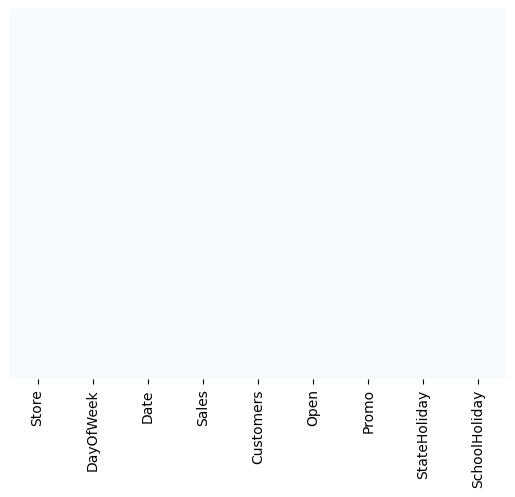

In [15]:
# Check missing values

sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

As we can see there are no missing values.

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

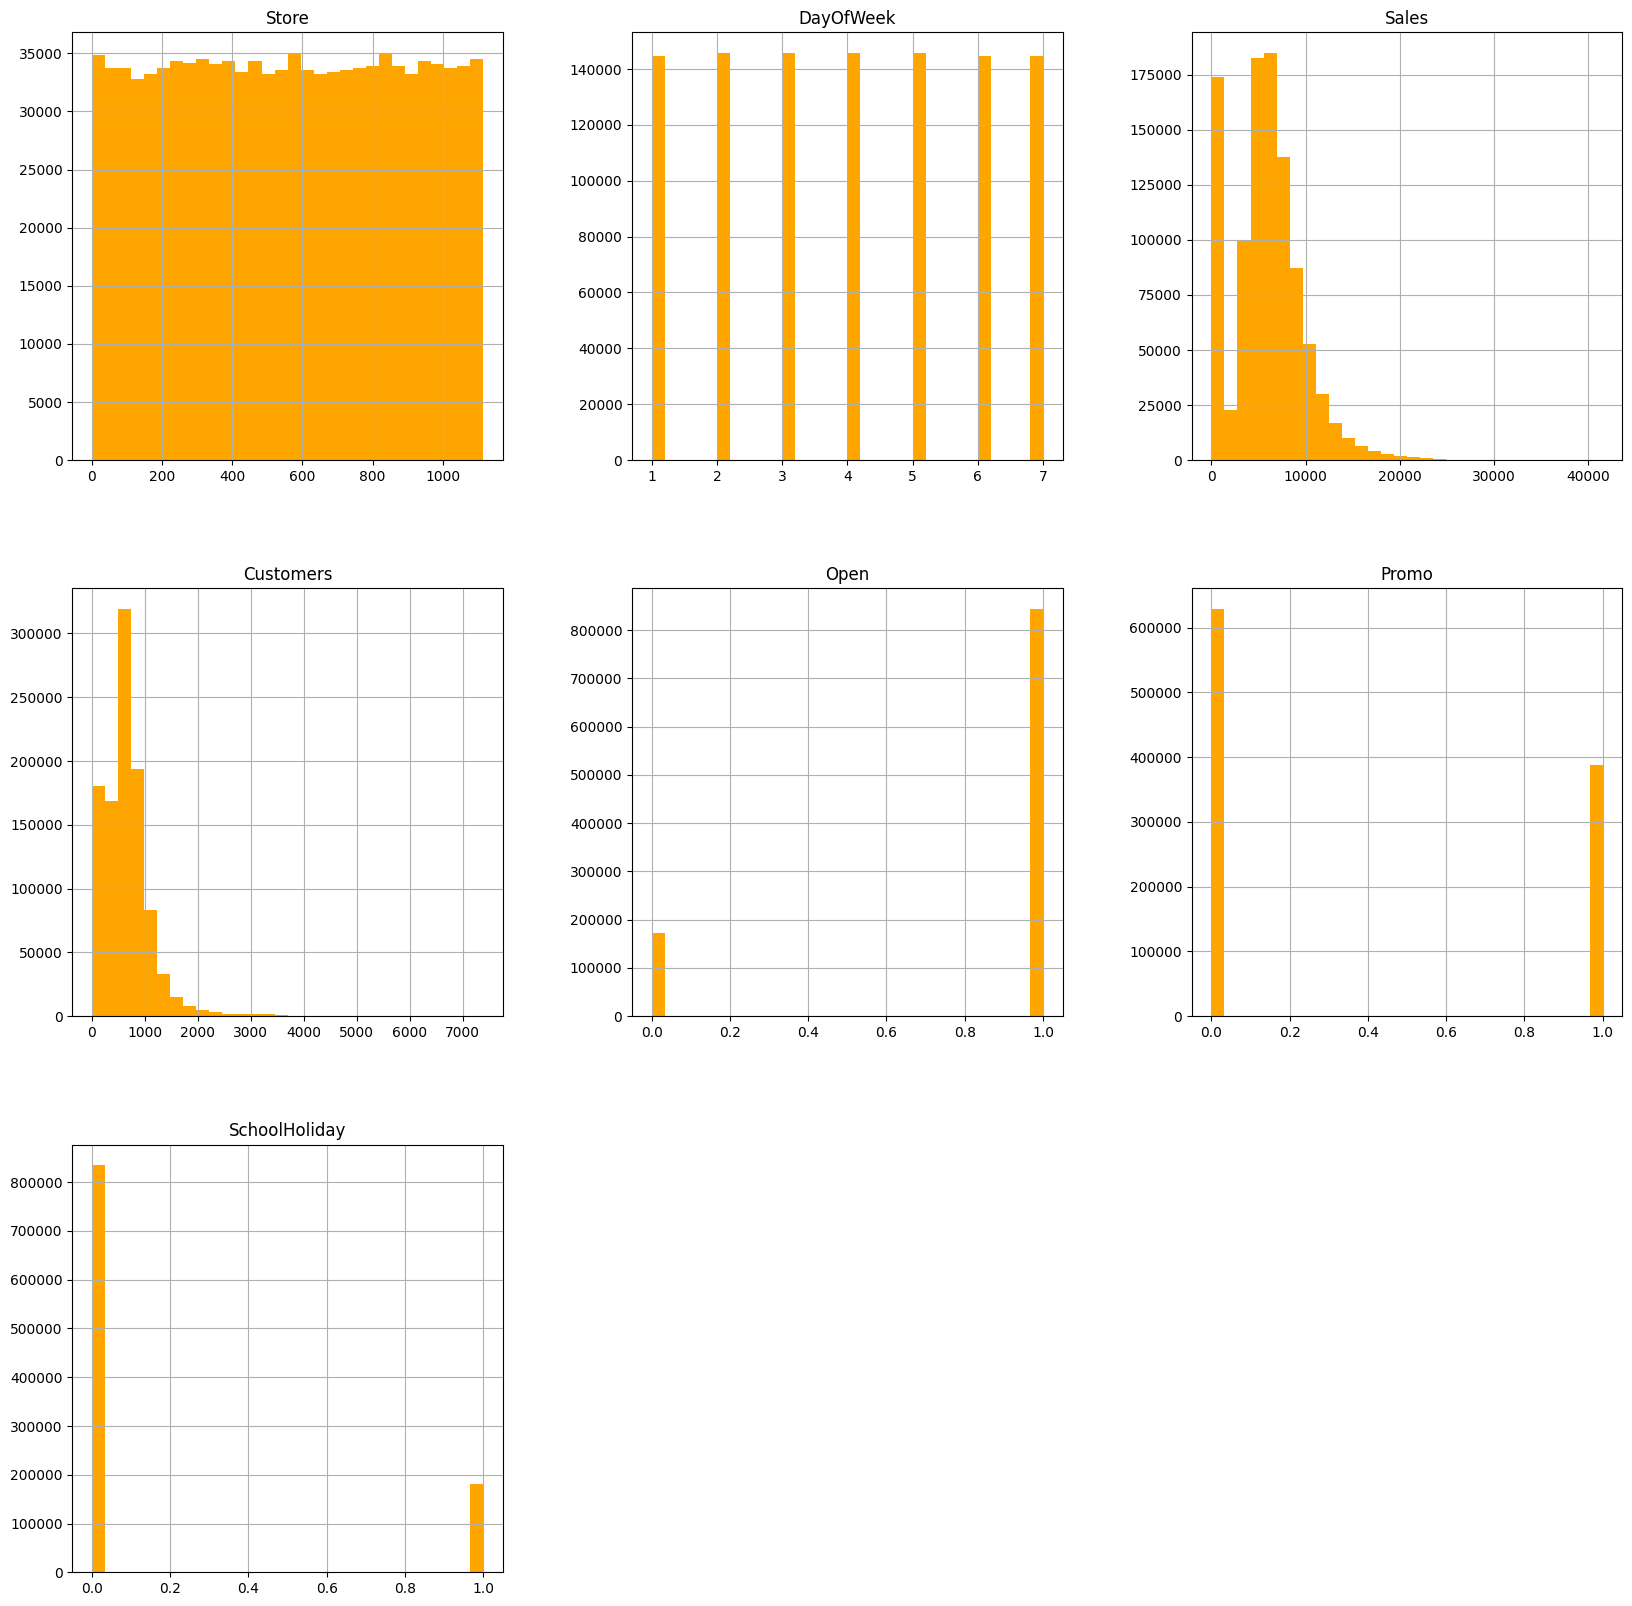

In [16]:
sales_train_df.hist(bins=30, figsize=(20, 20), color="Orange")

Observations: 

- Average 600 customers per day, maximum is 4500 but we can't see the outlier at 7388.
- Data is uniformly distributed across various day fo the week.
- Stores are open approximately more than 80% of the time.
- Data is equally distributed among all stores (no bias).
- Average sales is around 5000-6000 Euros.
- School Holidays are about 18%.

In [17]:
sales_train_df["Customers"].max()

7388

In [18]:
# How many stores are open and closed?

closed_train_df = sales_train_df[sales_train_df["Open"] == 0]
open_train_df = sales_train_df[sales_train_df["Open"] == 1]

In [19]:
# Count the number of stores that are open and closed.

print("Total=", len(sales_train_df))
print("Number of closed stores =", len(closed_train_df))
print("Number of open stores =", len(open_train_df))

Total= 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [20]:
# We will only keep the open stores and remove the closed stores.

sales_train_df = sales_train_df[sales_train_df["Open"] == 1]

In [21]:
# Let's drop the open columns

sales_train_df.drop(["Open"], axis=1, inplace=True)

In [22]:
sales_train_df

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0            1          5  2015-07-31   5263        555      1            0   
1            2          5  2015-07-31   6064        625      1            0   
2            3          5  2015-07-31   8314        821      1            0   
3            4          5  2015-07-31  13995       1498      1            0   
4            5          5  2015-07-31   4822        559      1            0   
...        ...        ...         ...    ...        ...    ...          ...   
1016776    682          2  2013-01-01   3375        566      0            a   
1016827    733          2  2013-01-01  10765       2377      0            a   
1016863    769          2  2013-01-01   5035       1248      0            a   
1017042    948          2  2013-01-01   4491       1039      0            a   
1017190   1097          2  2013-01-01   5961       1405      0            a   

         SchoolHoliday  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
1016776              1  
1016827              1  
1016863              1  
1017042              1  
1017190              1  

[844392 rows x 8 columns]

In [23]:
sales_train_df.describe()

Store      DayOfWeek          Sales      Customers  \
count  844392.000000  844392.000000  844392.000000  844392.000000   
mean      558.422920       3.520361    6955.514291     762.728395   
std       321.731914       1.723689    3104.214680     401.227674   
min         1.000000       1.000000       0.000000       0.000000   
25%       280.000000       2.000000    4859.000000     519.000000   
50%       558.000000       3.000000    6369.000000     676.000000   
75%       837.000000       5.000000    8360.000000     893.000000   
max      1115.000000       7.000000   41551.000000    7388.000000   

               Promo  SchoolHoliday  
count  844392.000000  844392.000000  
mean        0.446352       0.193580  
std         0.497114       0.395103  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000

After dropping the columns where the stores were closed, the Average Sales went upto 6995. So did the Average number of Customers to 762. 

## Explore Stores Information Data

<Axes: >

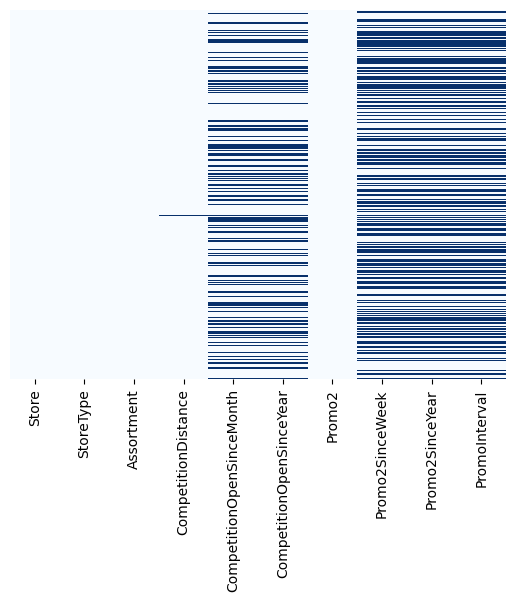

In [24]:
# Let's check for missing values

sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

- We have a lot of missing values in the Columns CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval.
- It seems like CompetitionOpenSinceMonth and CompetitionOpenSinceYear shares the same null entries.
- While Promo2SinceWeek, Promo2SinceYear and PromoInterval shares the null entries too.
- CompetitionDistance has a very small amount of missing values.

In [25]:
# See the missing values in CompetitionDistance

store_info_df[store_info_df["CompetitionDistance"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

Only 3 rows are missing in CompetitionDistance

In [26]:
# Now, let's see the missin values in CompetitionOpenSinceMonth

store_info_df[store_info_df["CompetitionOpenSinceMonth"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

A total of 354 rows are missing in CompetitionOpenSinceMonth which is a lot of missing values.

In [27]:
# Let's see how many Promo2 are 0.

store_info_df[store_info_df["Promo2"] == 0]

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
5         6         a          a                310.0   
6         7         a          c              24000.0   
...     ...       ...        ...                  ...   
1107   1108         a          a                540.0   
1109   1110         c          c                900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
5                          12.0                    2013.0       0   
6                           4.0                    2013.0       0   
...                         ...                       ...     ...   
1107                        4.0                    2004.0       0   
1109                        9.0                    2010.0       0   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   

      Promo2SinceWeek  Promo2SinceYear PromoInterval  
0                 NaN              NaN           NaN  
3                 NaN              NaN           NaN  
4                 NaN              NaN           NaN  
5                 NaN              NaN           NaN  
6                 NaN              NaN           NaN  
...               ...              ...           ...  
1107              NaN              NaN           NaN  
1109              NaN              NaN           NaN  
1111              NaN              NaN           NaN  
1112              NaN              NaN           NaN  
1113              NaN              NaN           NaN  

[544 rows x 10 columns]

When Promo2 is zero, the rest of the variables related to Promo2 like Promo2SinceWeek, Promo2SinceYear and PromoInterval is also 0.

In [28]:
str_cols = [
    "Promo2SinceWeek",
    "CompetitionOpenSinceYear",
    "CompetitionOpenSinceMonth",
    "Promo2SinceYear",
    "PromoInterval",
]

In [29]:
#  Filling the null values in "Promo2SinceWeek","CompetitionOpenSinceYear","CompetitionOpenSinceMonth","Promo2SinceYear","PromoInterval" with Zero.

for str in str_cols:
    store_info_df[str].fillna(0, inplace=True)

/tmp/ipykernel_69563/4161767859.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df[str].fillna(0, inplace=True)


In [30]:
# There are 3 rows that are msssing in CompetitionDistance, let's fill them up with average value of CompetitionDistance.

store_info_df["CompetitionDistance"].fillna(
    store_info_df["CompetitionDistance"].mean(), inplace=True
)

/tmp/ipykernel_69563/1940007931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df["CompetitionDistance"].fillna(


<Axes: >

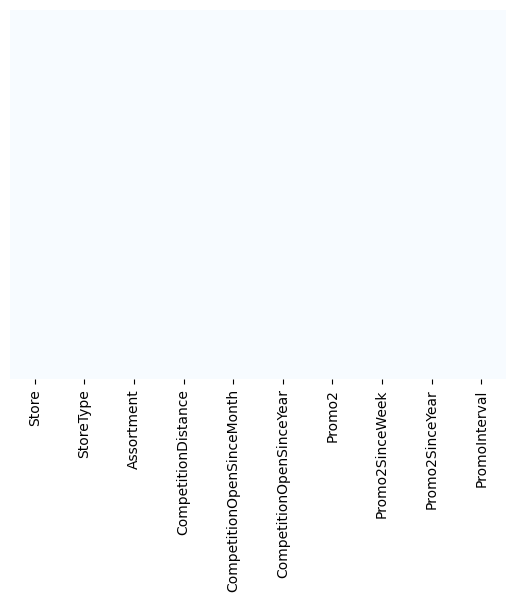

In [31]:
# Check the missing values again.

sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

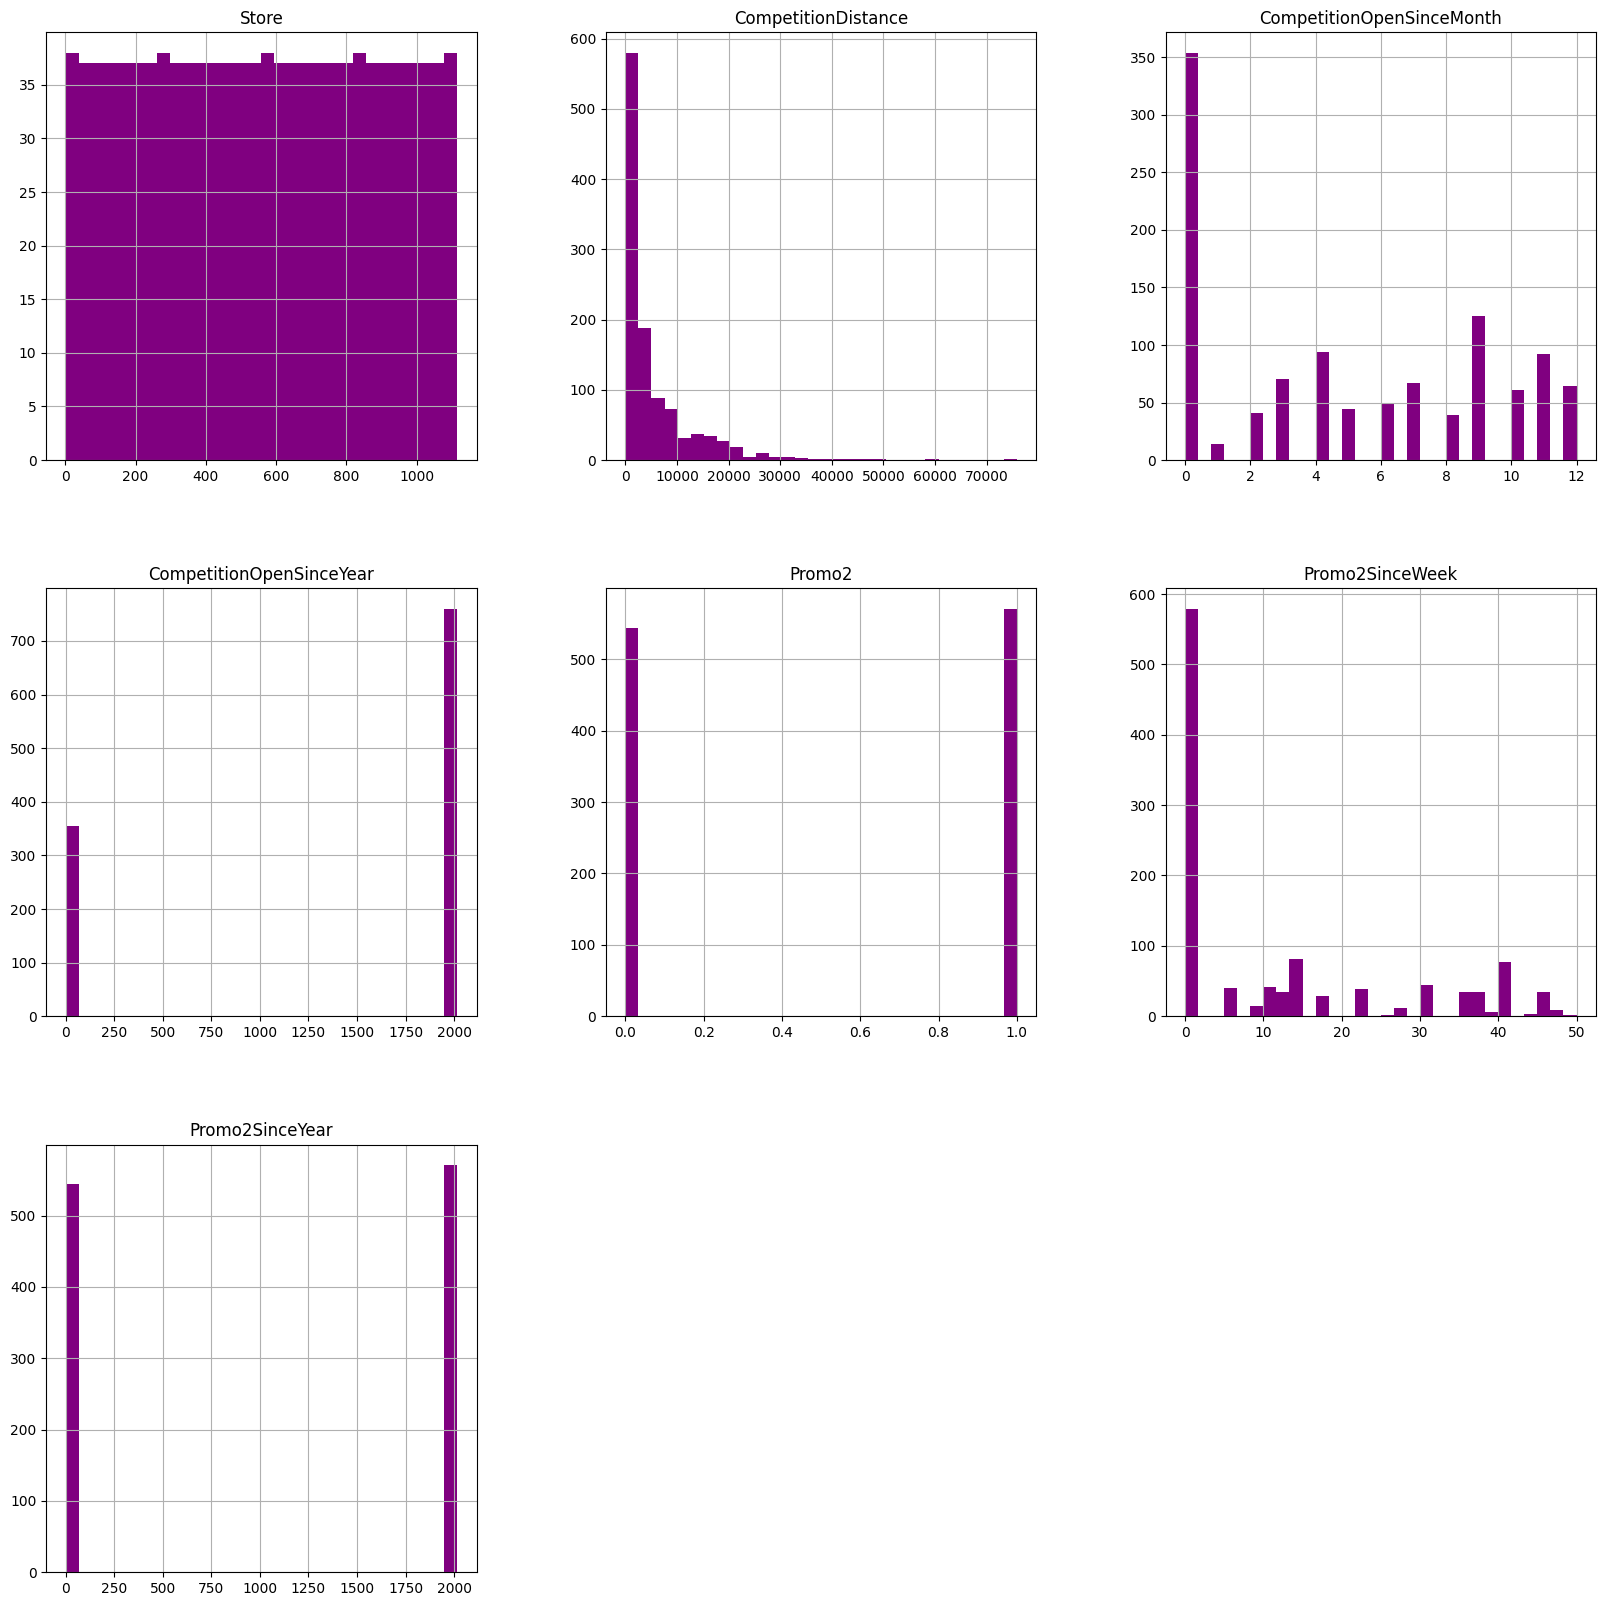

In [32]:
# Plotting Histogram of the features.

store_info_df.hist(bins=30, figsize=(20, 20), color="Purple")

- Half of the stores are involved in Promo2.
- Half of the stores have their competition at a distance of 0-3000m (3 kms away).
- The data is uniformly distributed in Store.

## Explore the Merged Data

In [33]:
# Let's merge both data frame together.

sales_train_all_df = pd.merge(sales_train_df, store_info_df, how="inner", on="Store")

In [34]:
sales_train_all_df

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0           1          5  2015-07-31   5263        555      1            0   
1           2          5  2015-07-31   6064        625      1            0   
2           3          5  2015-07-31   8314        821      1            0   
3           4          5  2015-07-31  13995       1498      1            0   
4           5          5  2015-07-31   4822        559      1            0   
...       ...        ...         ...    ...        ...    ...          ...   
844387    682          2  2013-01-01   3375        566      0            a   
844388    733          2  2013-01-01  10765       2377      0            a   
844389    769          2  2013-01-01   5035       1248      0            a   
844390    948          2  2013-01-01   4491       1039      0            a   
844391   1097          2  2013-01-01   5961       1405      0            a   

        SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                   1         c          a               1270.0   
1                   1         a          a                570.0   
2                   1         a          a              14130.0   
3                   1         c          c                620.0   
4                   1         a          a              29910.0   
...               ...       ...        ...                  ...   
844387              1         b          a                150.0   
844388              1         b          b                860.0   
844389              1         b          b                840.0   
844390              1         b          b               1430.0   
844391              1         b          b                720.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                             9.0                    2008.0       0   
1                            11.0                    2007.0       1   
2                            12.0                    2006.0       1   
3                             9.0                    2009.0       0   
4                             4.0                    2015.0       0   
...                           ...                       ...     ...   
844387                        9.0                    2006.0       0   
844388                       10.0                    1999.0       0   
844389                        0.0                       0.0       1   
844390                        0.0                       0.0       0   
844391                        3.0                    2002.0       0   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0                   0.0              0.0                0  
1                  13.0           2010.0  Jan,Apr,Jul,Oct  
2                  14.0           2011.0  Jan,Apr,Jul,Oct  
3                   0.0              0.0                0  
4                   0.0              0.0                0  
...                 ...              ...              ...  
844387              0.0              0.0                0  
844388              0.0              0.0                0  
844389             48.0           2012.0  Jan,Apr,Jul,Oct  
844390              0.0              0.0                0  
844391              0.0              0.0                0  

[844392 rows x 17 columns]

In [35]:
# Let's check the correlation of the merged data

sales_train_all_df_numeric = sales_train_all_df.select_dtypes(include="number")
correlations = sales_train_all_df_numeric.corr()["Sales"].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<Axes: >

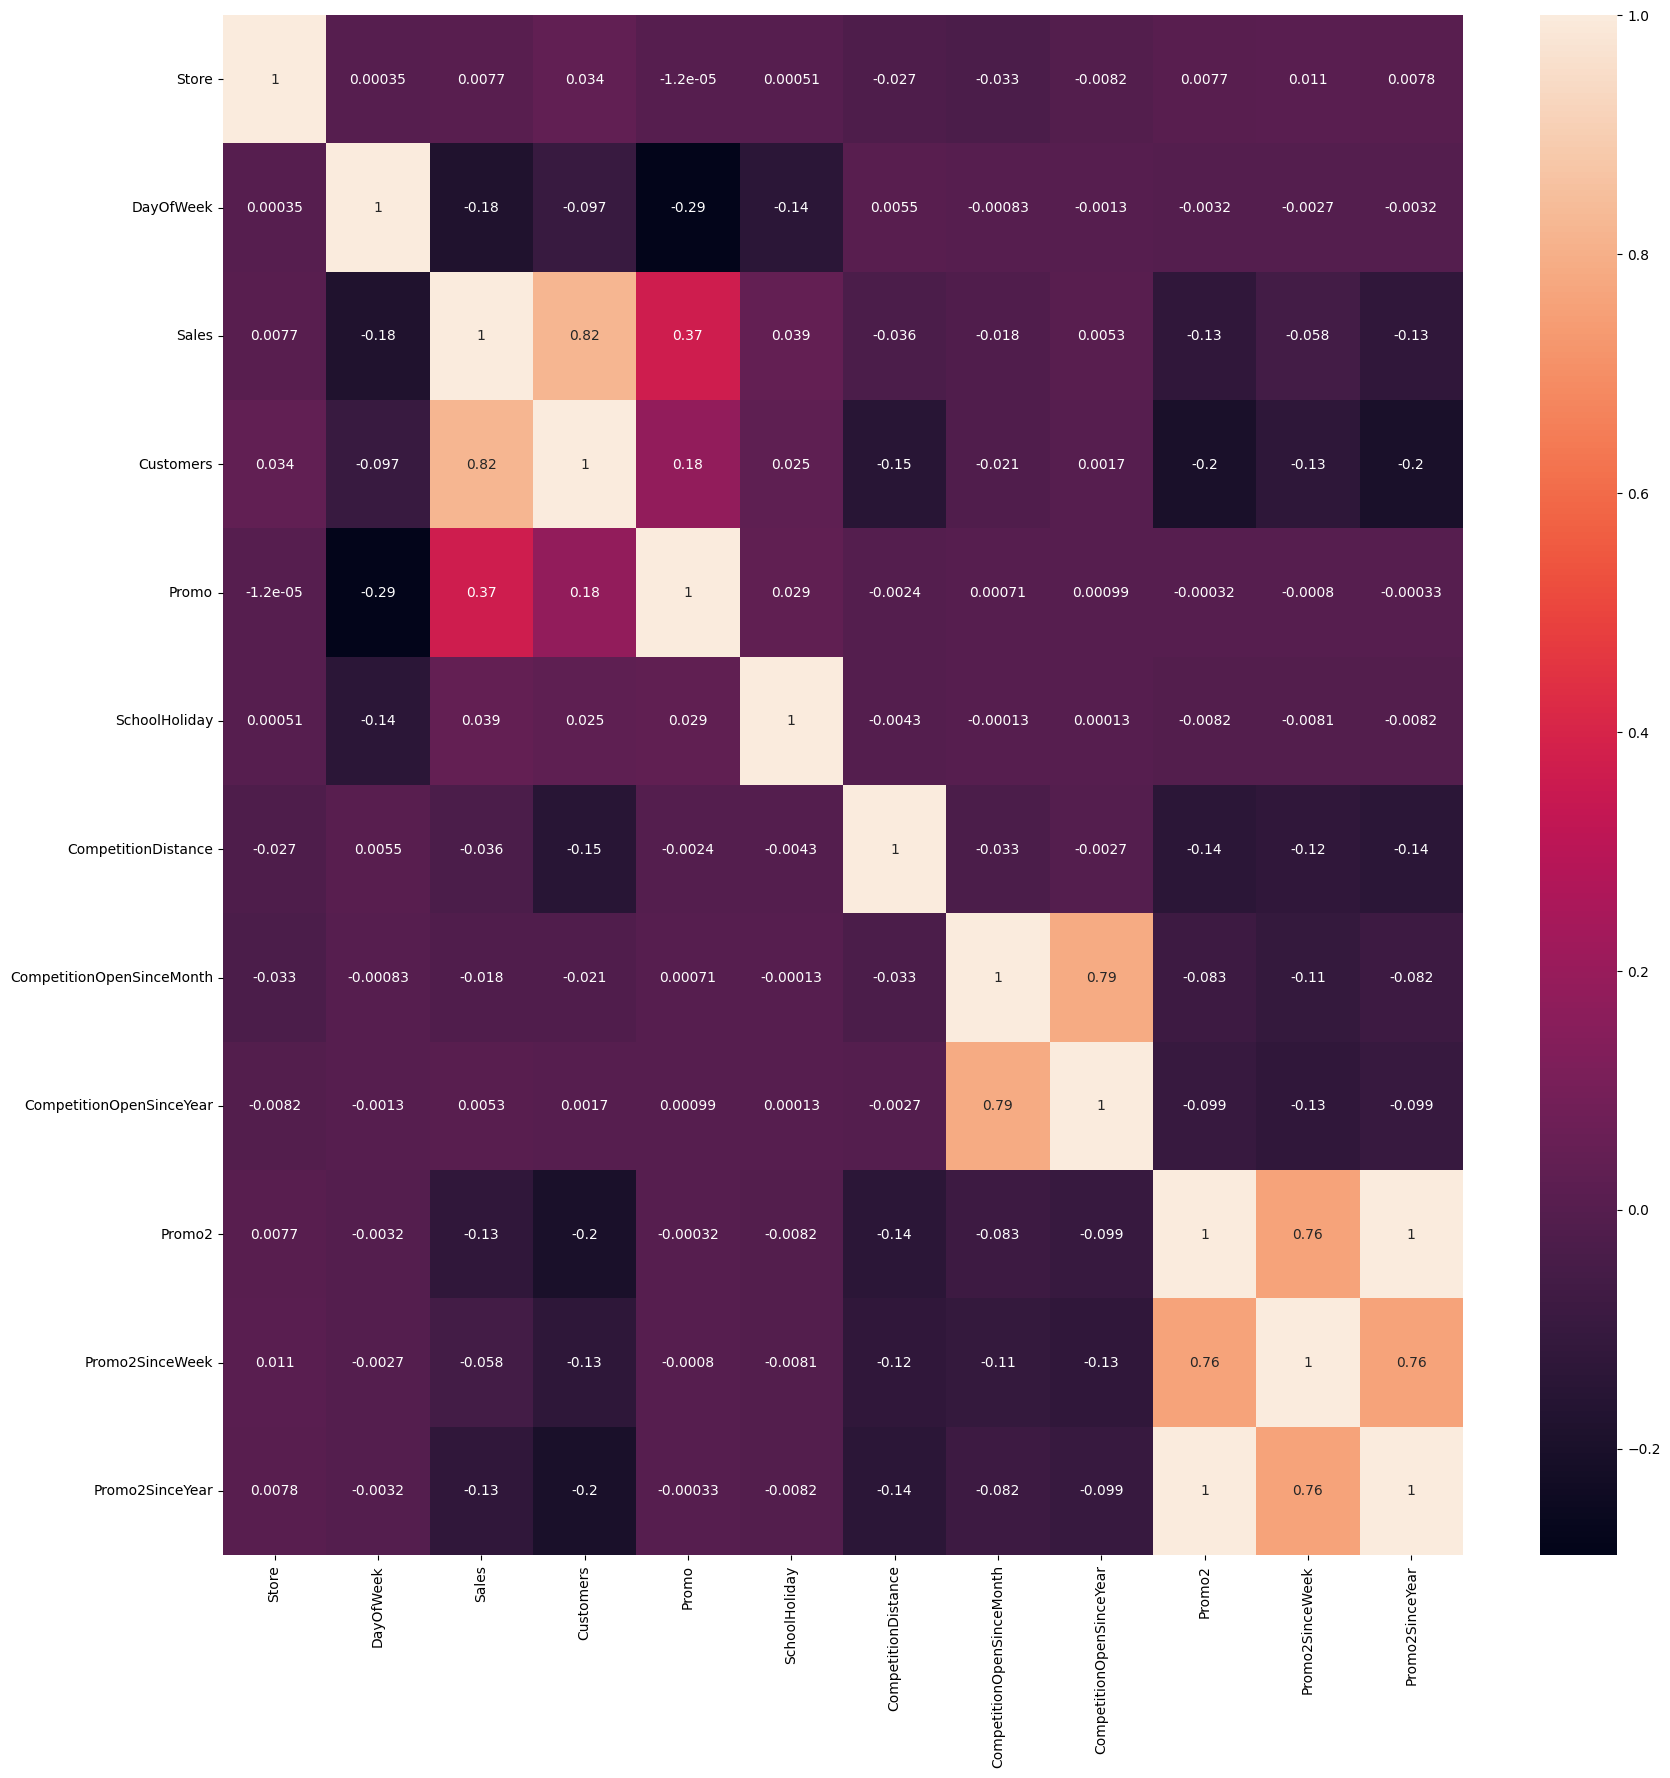

In [36]:
# Plotting a heatmap.

correlations = sales_train_all_df_numeric.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

Key highlights:

- Sales and Customers: There is a strong positive correlation (0.82) between sales and the number of customers, indicating that as sales increase, so does customer traffic.
- Promo2 and Sales/Customers: There is a negative correlation between Promo2 and both sales and customers (-0.13 for sales, -0.20 for customers), indicating that stores participating in Promo2 tend to have slightly lower sales and fewer customers. However, these correlations are relatively weak compared to other factors..
- Competition Distance and Sales/Customers: There is a weak negative correlation between competition distance and both sales and customers (-0.04 for sales, -0.15 for customers), implying that stores located closer to competitors may experience slightly lower sales and customer traffic.
- Competition Open Since Year and Month: There is a very weak negative correlation between the year/month when competitors opened and both sales and customers, suggesting that the timing of competitor store openings has minimal impact on sales and customer numbers.

In [37]:
# Let's separate the Year, Month and Day.

sales_train_all_df["Year"] = pd.DatetimeIndex(sales_train_all_df["Date"]).year
sales_train_all_df["Month"] = pd.DatetimeIndex(sales_train_all_df["Date"]).month
sales_train_all_df["Day"] = pd.DatetimeIndex(sales_train_all_df["Date"]).day

In [38]:
sales_train_all_df

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0           1          5  2015-07-31   5263        555      1            0   
1           2          5  2015-07-31   6064        625      1            0   
2           3          5  2015-07-31   8314        821      1            0   
3           4          5  2015-07-31  13995       1498      1            0   
4           5          5  2015-07-31   4822        559      1            0   
...       ...        ...         ...    ...        ...    ...          ...   
844387    682          2  2013-01-01   3375        566      0            a   
844388    733          2  2013-01-01  10765       2377      0            a   
844389    769          2  2013-01-01   5035       1248      0            a   
844390    948          2  2013-01-01   4491       1039      0            a   
844391   1097          2  2013-01-01   5961       1405      0            a   

        SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                   1         c          a               1270.0   
1                   1         a          a                570.0   
2                   1         a          a              14130.0   
3                   1         c          c                620.0   
4                   1         a          a              29910.0   
...               ...       ...        ...                  ...   
844387              1         b          a                150.0   
844388              1         b          b                860.0   
844389              1         b          b                840.0   
844390              1         b          b               1430.0   
844391              1         b          b                720.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                             9.0                    2008.0       0   
1                            11.0                    2007.0       1   
2                            12.0                    2006.0       1   
3                             9.0                    2009.0       0   
4                             4.0                    2015.0       0   
...                           ...                       ...     ...   
844387                        9.0                    2006.0       0   
844388                       10.0                    1999.0       0   
844389                        0.0                       0.0       1   
844390                        0.0                       0.0       0   
844391                        3.0                    2002.0       0   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  
0                   0.0              0.0                0  2015      7   31  
1                  13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31  
2                  14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31  
3                   0.0              0.0                0  2015      7   31  
4                   0.0              0.0                0  2015      7   31  
...                 ...              ...              ...   ...    ...  ...  
844387              0.0              0.0                0  2013      1    1  
844388              0.0              0.0                0  2013      1    1  
844389             48.0           2012.0  Jan,Apr,Jul,Oct  2013      1    1  
844390              0.0              0.0                0  2013      1    1  
844391              0.0              0.0                0  2013      1    1  

[844392 rows x 20 columns]

Text(0.5, 1.0, 'Average Customer per Month')

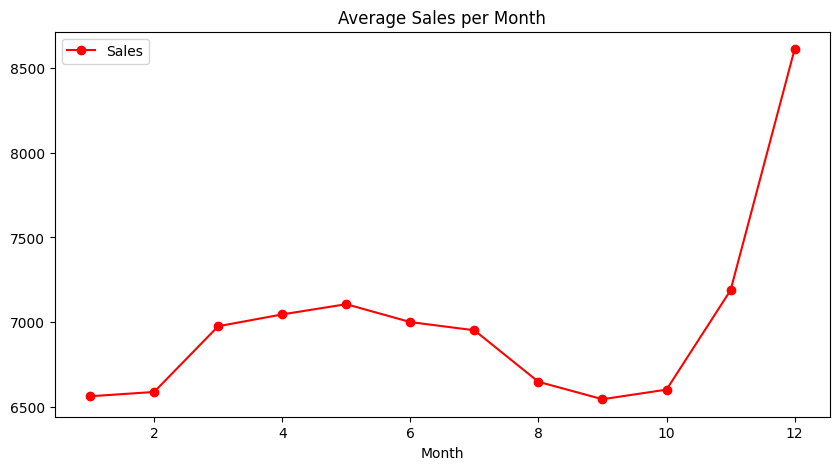

<Figure size 640x480 with 0 Axes>

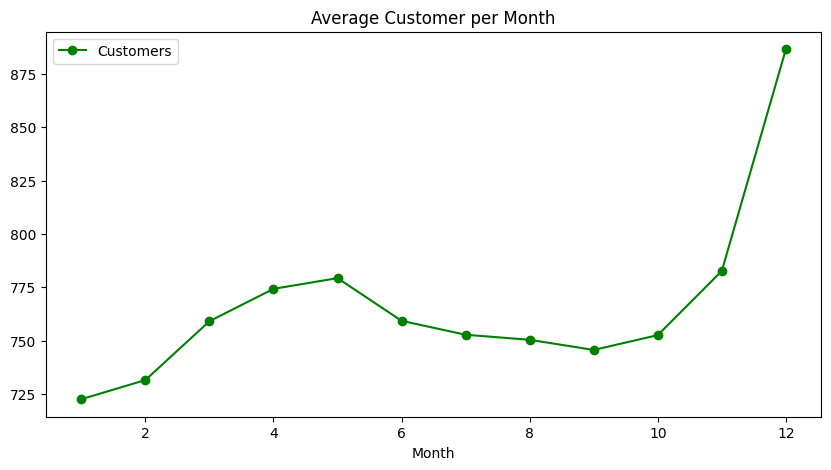

In [39]:
# Let's take a look at the average sales and the number of customers per month.

axis = (
    sales_train_all_df.groupby("Month")[["Sales"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="r")
)
axis.set_title("Average Sales per Month")

plt.figure()

axis = (
    sales_train_all_df.groupby("Month")[["Customers"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="g")
)
axis.set_title("Average Customer per Month")

The Sales and no. of Customers peak around the Christmas time.

Text(0.5, 1.0, 'Average Customer per Day of the Month')

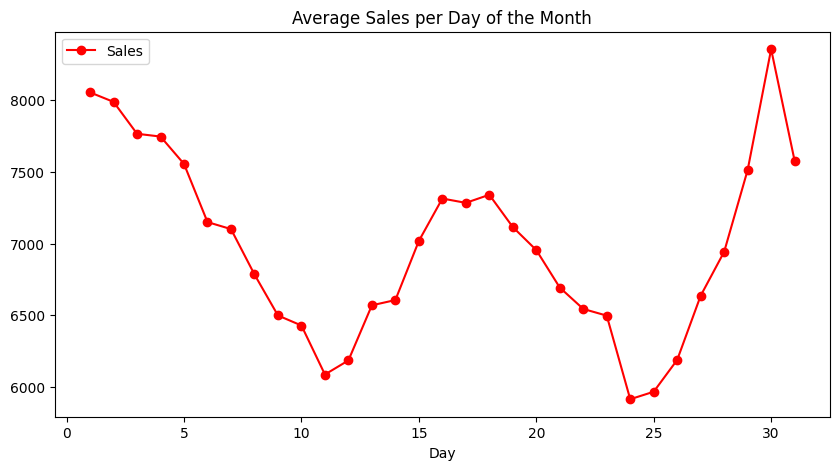

<Figure size 640x480 with 0 Axes>

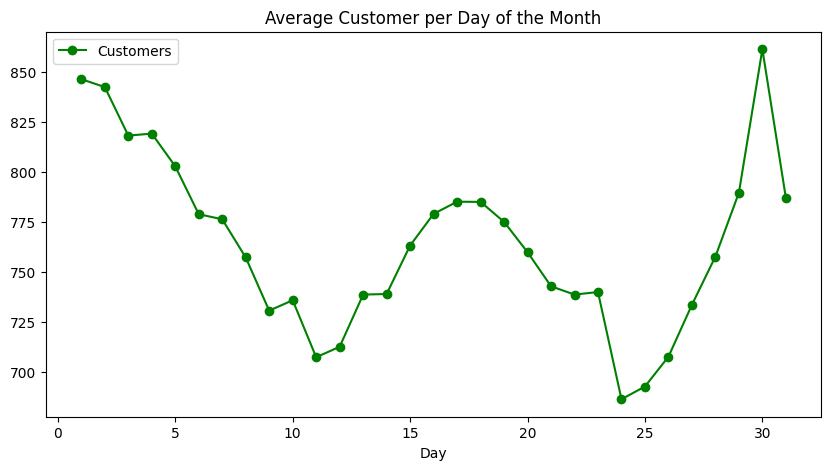

In [40]:
# Let's take a look at the average sales and the number of customers per Day of the Month now.

axis = (
    sales_train_all_df.groupby("Day")[["Sales"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="r")
)
axis.set_title("Average Sales per Day of the Month")

plt.figure()

axis = (
    sales_train_all_df.groupby("Day")[["Customers"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="g")
)
axis.set_title("Average Customer per Day of the Month")

- Minimum number of the customers are on 24th of the month.
- Maximum number of the customers are during the end of the month (30th).
- The trend is fluctuating throughout, it's high in the starting of the month, goes down on 11th, peaks again around 16th and hits the rock bottom on 24th and finally hits the saturation point at 30th.

Text(0.5, 1.0, 'Average Customer per Day of Week')

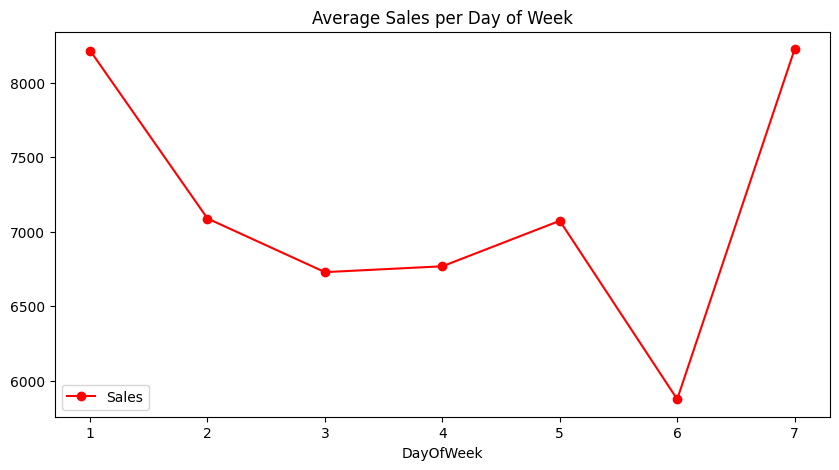

<Figure size 640x480 with 0 Axes>

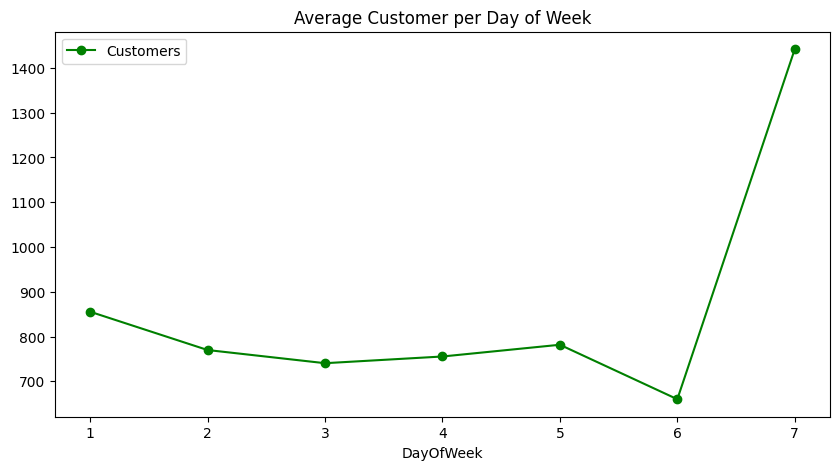

In [41]:
# Let's take a look at the average sales and the number of customers per Day of week now ( 7 is Sunday).

axis = (
    sales_train_all_df.groupby("DayOfWeek")[["Sales"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="r")
)
axis.set_title("Average Sales per Day of Week")

plt.figure()

axis = (
    sales_train_all_df.groupby("DayOfWeek")[["Customers"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="g")
)
axis.set_title("Average Customer per Day of Week")


- Maximum Sales:
  - Monday and Sunday observe the highest sales figures.
  - This indicates that these two days of the week witness increased consumer spending.
- Maximum Customers:
  - Sunday records the highest number of customers.
- Minimum Sales and Customers:
  - Saturday experiences the lowest sales and customer numbers.
  - This implies that Saturday might be a slower day for sales and customer activity compared to other days of the week.

<Axes: xlabel='Date'>

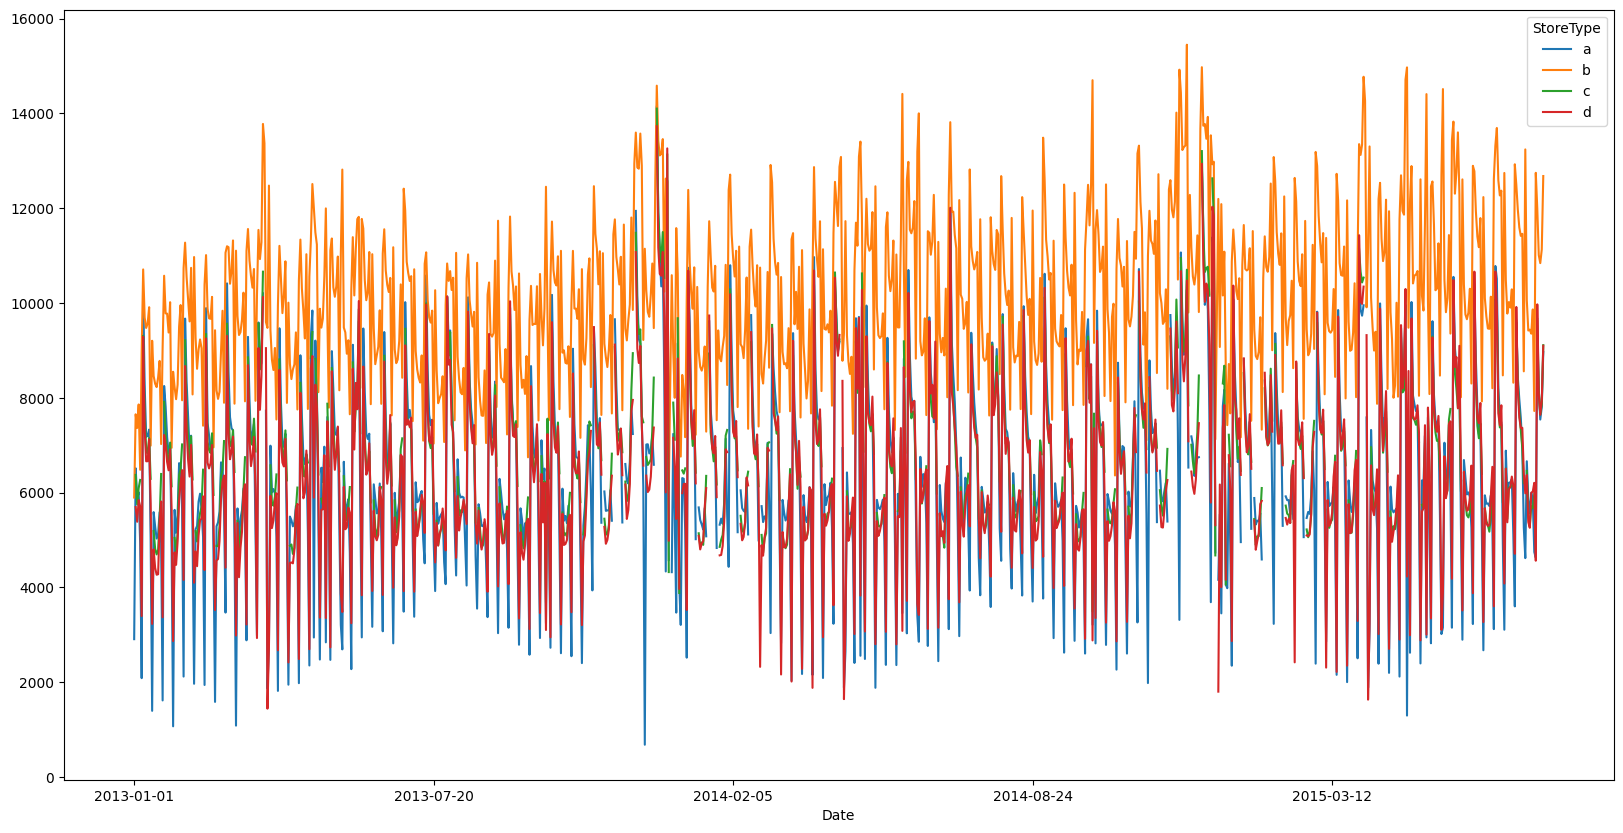

In [42]:
# Let's plot the heatmap now.

fig, ax = plt.subplots(figsize=(20, 10))
sales_train_all_df.groupby(["Date", "StoreType"])["Sales"].mean().unstack().plot(ax=ax)

<Axes: xlabel='Promo', ylabel='Customers'>

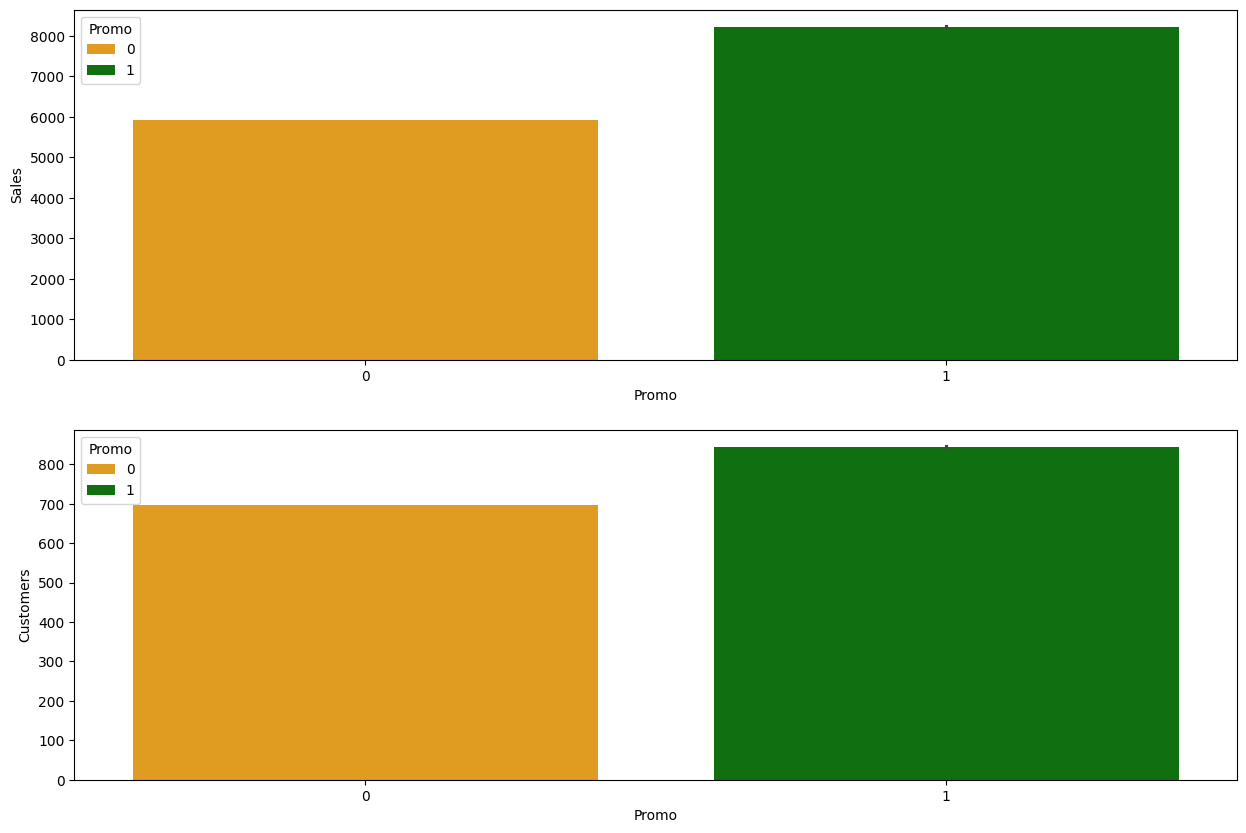

In [43]:
# Creating two subplots, each displaying a bar plot of "Sales" and "Customers" data from the sales_train_all_df.

plt.figure(figsize=(15, 10))

plt.subplot(211)
sns.barplot(
    x="Promo",
    y="Sales",
    data=sales_train_all_df,
    hue="Promo",
    palette={0: "orange", 1: "green"},
)

plt.subplot(212)
sns.barplot(
    x="Promo",
    y="Customers",
    data=sales_train_all_df,
    hue="Promo",
    palette={0: "orange", 1: "green"},
)

Promo is effective with higher level of Sales and Customers.

<Axes: xlabel='Promo', ylabel='Customers'>

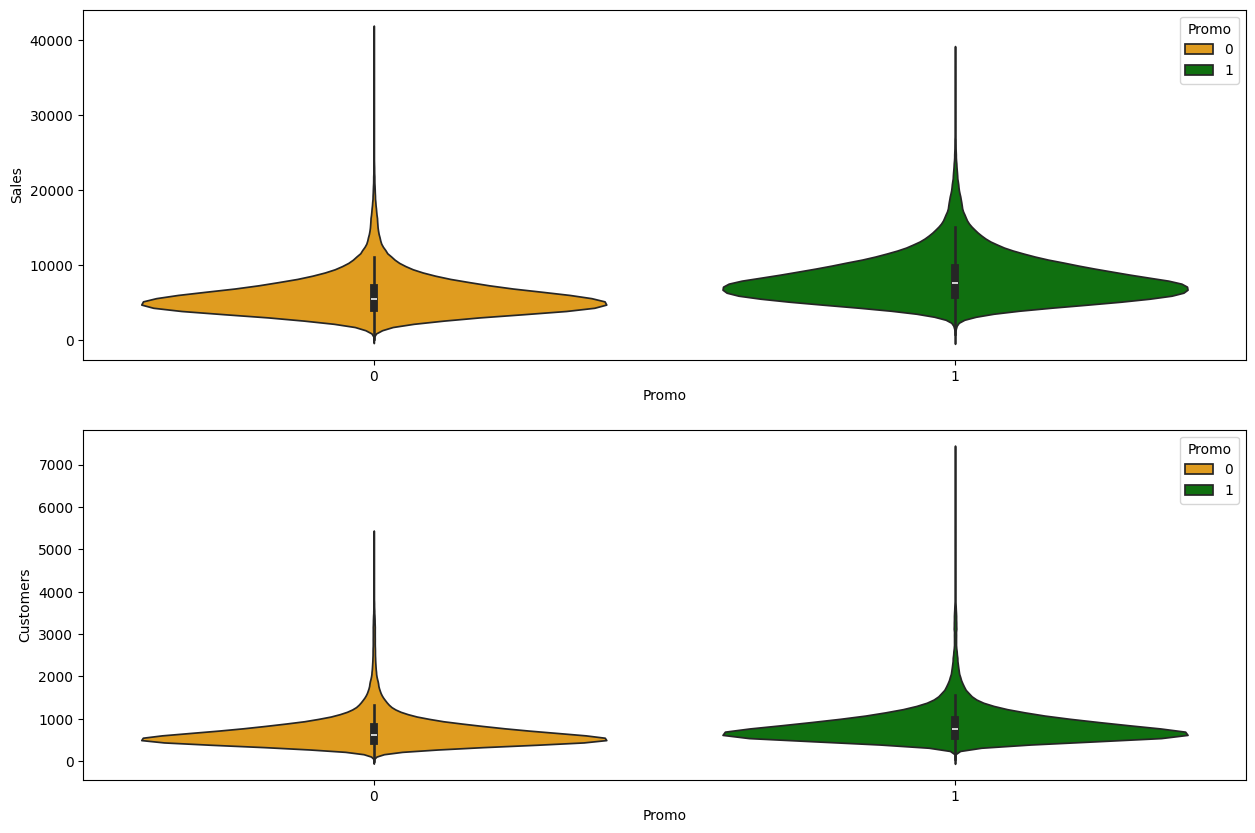

In [44]:
# Creating two Violin plots, each displaying a bar plot of "Sales" and "Customers" data from the sales_train_all_df.

plt.figure(figsize=(15, 10))

plt.subplot(211)
sns.violinplot(
    x="Promo",
    y="Sales",
    data=sales_train_all_df,
    hue="Promo",
    palette={0: "orange", 1: "green"},
)

plt.subplot(212)
sns.violinplot(
    x="Promo",
    y="Customers",
    data=sales_train_all_df,
    hue="Promo",
    palette={0: "orange", 1: "green"},
)

- Considering outliers there isn't much of a difference for Sales. Distribution is higher but not significantly with respect to outliers. The max is equivalent.
- We note a lot more customer outlyers with Promo however, ~2000 more customers than max of no promo.

# Facebook Prophet

Facebook is an open source software released by Facebook's Core Data Science Team. It's a procedure for forecasting time-series data based on an additive model where non-linear ttends are fit with yearly, weekly and daily seasonality, plus holiday effects. 

## Train the Model

In [56]:
# Import Prophet

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [58]:
sales_train_all_df

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0           1          5  2015-07-31   5263        555      1            0   
1           2          5  2015-07-31   6064        625      1            0   
2           3          5  2015-07-31   8314        821      1            0   
3           4          5  2015-07-31  13995       1498      1            0   
4           5          5  2015-07-31   4822        559      1            0   
...       ...        ...         ...    ...        ...    ...          ...   
844387    682          2  2013-01-01   3375        566      0            a   
844388    733          2  2013-01-01  10765       2377      0            a   
844389    769          2  2013-01-01   5035       1248      0            a   
844390    948          2  2013-01-01   4491       1039      0            a   
844391   1097          2  2013-01-01   5961       1405      0            a   

        SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                   1         c          a               1270.0   
1                   1         a          a                570.0   
2                   1         a          a              14130.0   
3                   1         c          c                620.0   
4                   1         a          a              29910.0   
...               ...       ...        ...                  ...   
844387              1         b          a                150.0   
844388              1         b          b                860.0   
844389              1         b          b                840.0   
844390              1         b          b               1430.0   
844391              1         b          b                720.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                             9.0                    2008.0       0   
1                            11.0                    2007.0       1   
2                            12.0                    2006.0       1   
3                             9.0                    2009.0       0   
4                             4.0                    2015.0       0   
...                           ...                       ...     ...   
844387                        9.0                    2006.0       0   
844388                       10.0                    1999.0       0   
844389                        0.0                       0.0       1   
844390                        0.0                       0.0       0   
844391                        3.0                    2002.0       0   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  
0                   0.0              0.0                0  2015      7   31  
1                  13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31  
2                  14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31  
3                   0.0              0.0                0  2015      7   31  
4                   0.0              0.0                0  2015      7   31  
...                 ...              ...              ...   ...    ...  ...  
844387              0.0              0.0                0  2013      1    1  
844388              0.0              0.0                0  2013      1    1  
844389             48.0           2012.0  Jan,Apr,Jul,Oct  2013      1    1  
844390              0.0              0.0                0  2013      1    1  
844391              0.0              0.0                0  2013      1    1  

[844392 rows x 20 columns]

12:29:47 - cmdstanpy - INFO - Chain [1] start processing
12:29:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:29:47 - cmdstanpy - INFO - Chain [1] start processing
12:29:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.47it/s]12:29:48 - cmdstanpy - INFO - Chain [1] start processing
12:29:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:02,  2.04it/s]12:29:48 - cmdstanpy - INFO - Chain [1] start processing
12:29:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:03,  1.61it/s]12:29:49 - cmdstanpy - INFO - Chain [1] start processing
12:29:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:02,  1.83it/s]12:29:50 - cmdstanpy - INFO - Chain [1] start processing
12:29:50 - cmdstanpy - INFO - Chain [1] done processing
 

Cross- Validation Performance Metrics:


horizon           mse         rmse          mae      mape     mdape  \
0    37 days  3.469525e+06  1862.666044  1443.379774  0.149329  0.121735   
1    38 days  3.453367e+06  1858.323710  1441.841725  0.150069  0.121735   
2    39 days  3.483120e+06  1866.311861  1455.504287  0.152184  0.128119   
3    40 days  3.523067e+06  1876.983419  1466.118442  0.154543  0.128908   
4    41 days  3.534599e+06  1880.052920  1469.598482  0.155506  0.129214   
..       ...           ...          ...          ...       ...       ...   
324 361 days  3.368278e+06  1835.286850  1389.065917  0.138901  0.123229   
325 362 days  3.491970e+06  1868.681303  1408.712097  0.139540  0.123374   
326 363 days  3.731704e+06  1931.761889  1441.510512  0.138583  0.123374   
327 364 days  3.889154e+06  1972.093704  1467.877057  0.138959  0.123879   
328 365 days  4.349065e+06  2085.441151  1531.040708  0.141625  0.124319   

        smape  coverage  
0    0.150391  0.750735  
1    0.150800  0.756026  
2    0.152657  0.757202  
3    0.154369  0.748971  
4    0.155125  0.739565  
..        ...       ...  
324  0.139164  0.831276  
325  0.140437  0.827160  
326  0.141959  0.814815  
327  0.143514  0.809328  
328  0.147856  0.786596  

[329 rows x 8 columns]

/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/tmp/ipykernel_69563/1966741591.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retai

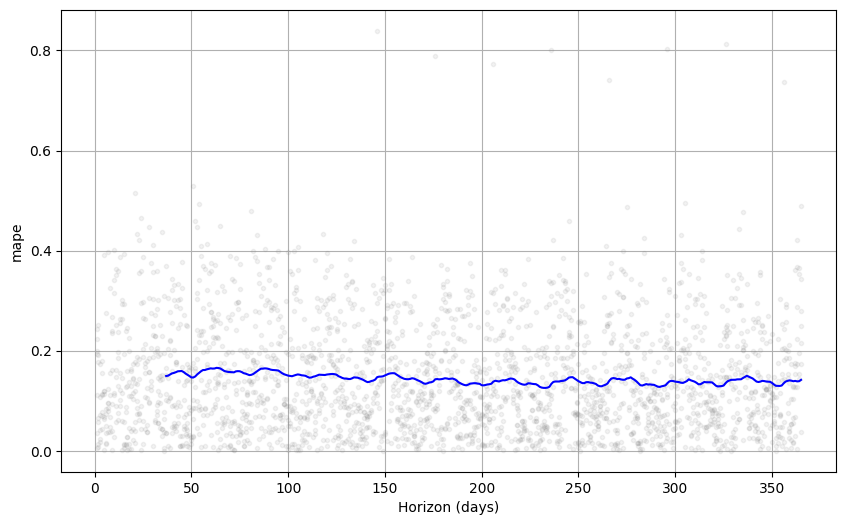

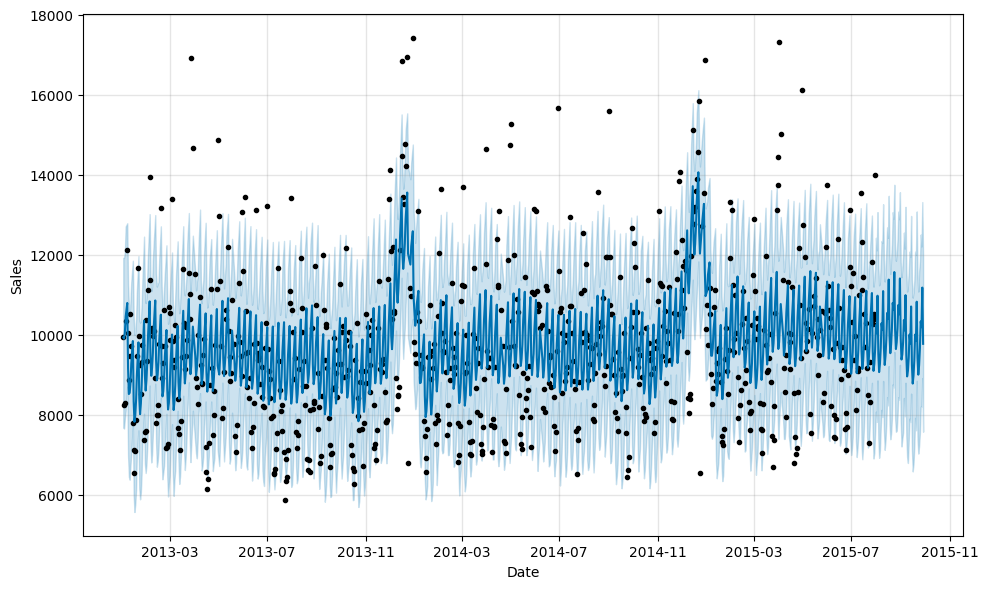

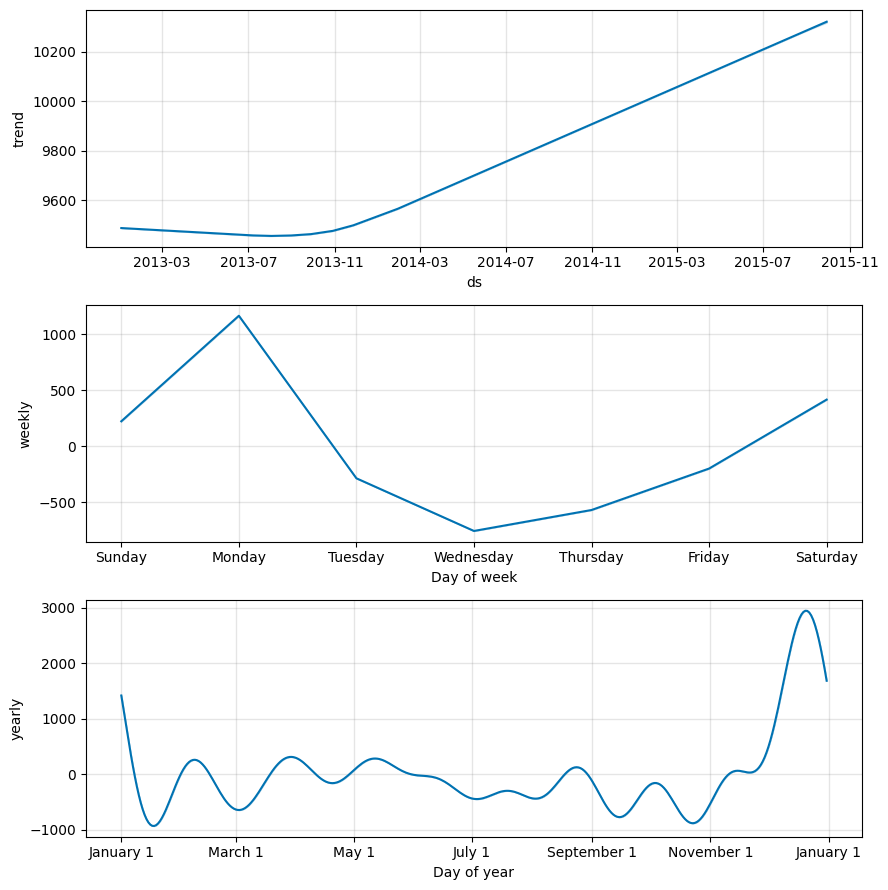

In [59]:
def sales_predictions(sales_df, store_id, periods):

    # Filter the data to the store_id.
    sales_df = sales_df[sales_df["Store"] == store_id]
    sales_df = sales_df[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})
    sales_df = sales_df.sort_values("ds")

    model = Prophet()
    model.fit(sales_df)

    # Perform Cross Validation.
    cv_results = cross_validation(
        model, initial="365 days", period="30 days", horizon="365 days"
    )

    # Calculate the performance metrics of Cross Validation.
    metrics = performance_metrics(cv_results)
    print(f"Cross- Validation Performance Metrics:")
    display(metrics)

    # Plot the Cross Validation Metrics.
    fig = plot_cross_validation_metric(cv_results, metric="mape")
    fig.show()

    # Make Predictions.
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    # Plot the Predictions.
    figure = model.plot(forecast, xlabel="Date", ylabel="Sales")
    figure2 = model.plot_components(forecast)


sales_predictions(sales_train_all_df, store_id=4, periods=60)

12:33:39 - cmdstanpy - INFO - Chain [1] start processing
12:33:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:33:39 - cmdstanpy - INFO - Chain [1] start processing
12:33:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.04it/s]12:33:39 - cmdstanpy - INFO - Chain [1] start processing
12:33:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.14it/s]12:33:40 - cmdstanpy - INFO - Chain [1] start processing
12:33:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.33it/s]12:33:40 - cmdstanpy - INFO - Chain [1] start processing
12:33:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]12:33:40 - cmdstanpy - INFO - Chain [1] start processing
12:33:40 - cmdstanpy - INFO - Chain [1] done processing
 

Cross-Validation Performance Metrics:


horizon           mse         rmse          mae      mape     mdape  \
0    37 days  3.264530e+06  1806.800938  1398.505906  0.145512  0.118511   
1    38 days  3.233013e+06  1798.058137  1389.583537  0.145421  0.118449   
2    39 days  3.249730e+06  1802.700627  1400.356381  0.147133  0.123597   
3    40 days  3.270363e+06  1808.414549  1409.742456  0.149270  0.123602   
4    41 days  3.307856e+06  1818.751184  1417.541546  0.150569  0.124754   
..       ...           ...          ...          ...       ...       ...   
324 361 days  3.163523e+06  1778.629470  1348.021929  0.135479  0.117431   
325 362 days  3.268797e+06  1807.981365  1364.006967  0.135925  0.117431   
326 363 days  3.462312e+06  1860.728793  1391.943218  0.134535  0.116792   
327 364 days  3.595710e+06  1896.235849  1410.332275  0.134279  0.116792   
328 365 days  3.966989e+06  1991.730230  1465.262013  0.136446  0.117431   

        smape  coverage  
0    0.147140  0.730747  
1    0.146634  0.733098  
2    0.148071  0.732510  
3    0.149589  0.730159  
4    0.150761  0.727219  
..        ...       ...  
324  0.134944  0.814815  
325  0.135885  0.814815  
326  0.137000  0.806584  
327  0.137778  0.801097  
328  0.141391  0.778366  

[329 rows x 8 columns]

/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/tmp/ipykernel_69563/3856662340.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retai

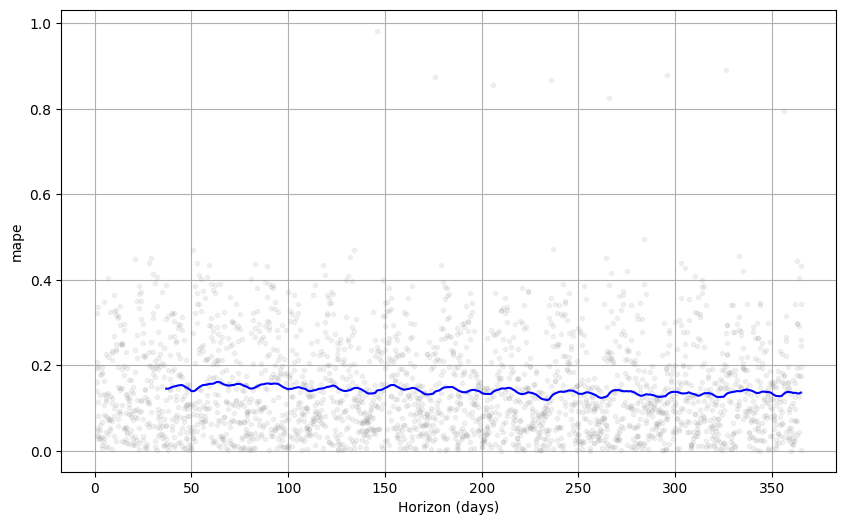

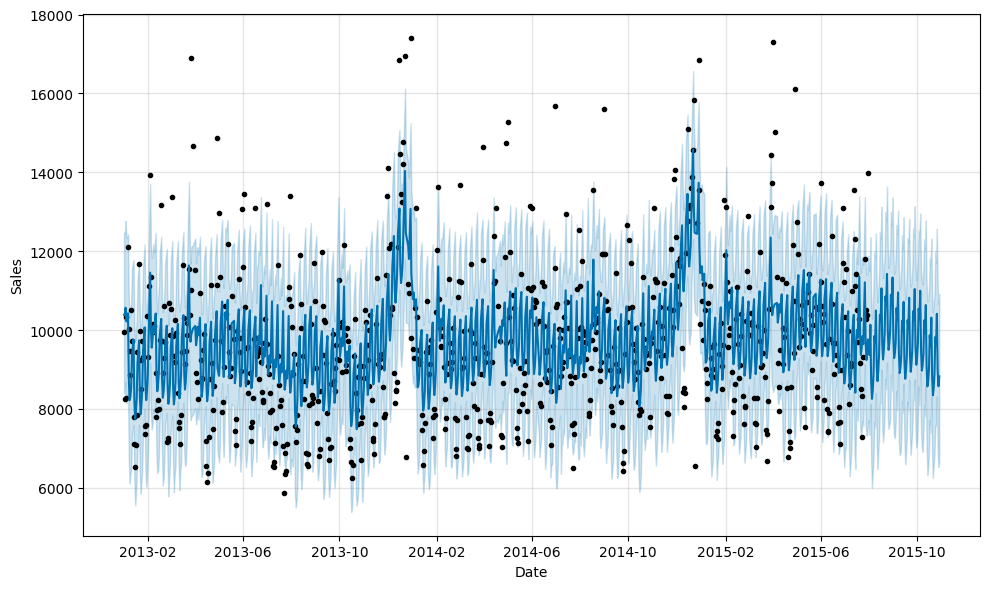

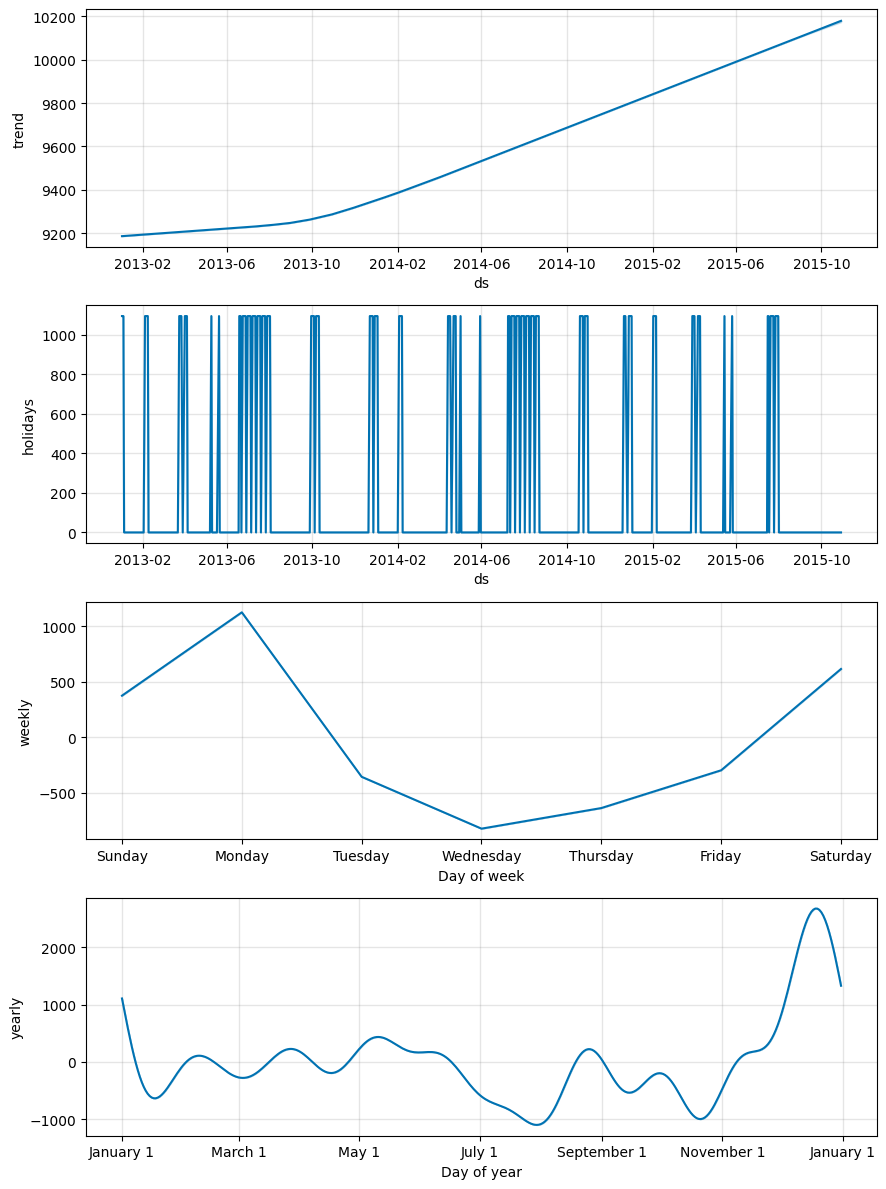

In [60]:
def sales_predictions(sales_df, store_id, periods):

    sales_df = sales_df[sales_df["Store"] == store_id]

    # Adding holidays
    school_holidays = sales_df[sales_df["SchoolHoliday"] == 1].loc[:, "Date"].values
    school_holidays = pd.DataFrame(
        {"ds": pd.to_datetime(school_holidays), "holiday": "school_holiday"}
    )

    state_holidays = (
        sales_df[
            (sales_df["StateHoliday"] == "a")
            | (sales_df["StateHoliday"] == "b")
            | (sales_df["StateHoliday"] == "c")
        ]
        .loc[:, "Date"]
        .values
    )
    state_holidays = pd.DataFrame(
        {"ds": pd.to_datetime(state_holidays), "holiday": "state_holiday"}
    )

    holidays = pd.concat([school_holidays, state_holidays])

    # Preparing main dataframe
    sales_df = sales_df[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})
    sales_df = sales_df.sort_values("ds")

    # Fitting into model and predicting
    model = Prophet(holidays=holidays)
    model.fit(sales_df)

    cv_results = cross_validation(
        model, initial="365 days", period="30 days", horizon="365 days"
    )

    # Calculate performance metrics from cross-validation
    metrics = performance_metrics(cv_results)
    print(f"Cross-Validation Performance Metrics:")
    display(metrics)
    fig = plot_cross_validation_metric(cv_results, metric="mape")
    fig.show()

    # Generate future dates and predict sales
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    # Plot the forecast and components (optional)
    model.plot(forecast, xlabel="Date", ylabel="Sales")
    model.plot_components(forecast)


sales_predictions(sales_train_all_df, store_id=4, periods=90)

- Including holidays in the model demonstrates improved forecasting accuracy.
- At the farthest point in cross-validation (day 365), Mean Absolute Percentage Error (MAPE) significantly drops from 14.1% to 13.6%.
- This improvement is further reflected by a reduction in Root Mean Squared Error (RMSE) from 2085 to 1911.

Given these substantial gains in accuracy, incorporating holiday data is a worthwhile addition to the model.

# Evaluating Across All Sites

- StateHoliday: Indicates a holiday, normally all stores with few exceptions which are closed onState holidays.
  - NOTE: All schools are closed in public Holidays and weekends. a = Public holiday, b= Easter holiday, c= Christmas, 0 = None.
- SchoolHoliday: Indicates if the (Store,Date) was affected ny the closure of Public schools.

In [63]:
def sales_predictions(sales_train_all_df):

    all_metrics = pd.DataFrame()

    for store_id in sales_train_all_df["Store"].unique():

        sales_df = sales_train_all_df[sales_train_all_df["Store"] == store_id]

        # Adding holidays
        school_holidays = sales_df[sales_df["SchoolHoliday"] == 1].loc[:, "Date"].values
        school_holidays = pd.DataFrame(
            {"ds": pd.to_datetime(school_holidays), "holiday": "school_holiday"}
        )

        state_holidays = (
            sales_df[
                (sales_df["StateHoliday"] == "a")
                | (sales_df["StateHoliday"] == "b")
                | (sales_df["StateHoliday"] == "c")
            ]
            .loc[:, "Date"]
            .values
        )
        state_holidays = pd.DataFrame(
            {"ds": pd.to_datetime(state_holidays), "holiday": "state_holiday"}
        )

        holidays = pd.concat([school_holidays, state_holidays])

        # Preparing main dataframe
        sales_df = sales_df[["Date", "Sales"]].rename(
            columns={"Date": "ds", "Sales": "y"}
        )
        sales_df = sales_df.sort_values("ds")

        # Fitting into model and predicting
        model = Prophet(holidays=holidays)
        model.fit(sales_df)

        cv_results = cross_validation(
            model, initial="365 days", period="30 days", horizon="365 days"
        )

        # Calculate performance metrics from cross-validation
        metrics = performance_metrics(cv_results)
        metrics["Store"] = store_id

        all_metrics = pd.concat([all_metrics, metrics], ignore_index=True)

        print(all_metrics)

    return all_metrics


all_metrics = sales_predictions(sales_train_all_df)

12:38:33 - cmdstanpy - INFO - Chain [1] start processing
12:38:34 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:38:34 - cmdstanpy - INFO - Chain [1] start processing
12:38:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.90it/s]12:38:34 - cmdstanpy - INFO - Chain [1] start processing
12:38:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.46it/s]12:38:35 - cmdstanpy - INFO - Chain [1] start processing
12:38:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:10<00:22,  4.45s/it]12:38:44 - cmdstanpy - INFO - Chain [1] start processing
12:38:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:10<00:11,  2.84s/it]12:38:44 - cmdstanpy - INFO - Chain [1] start processing
12:38:44 - cmdstanpy - INFO - Chain [1] done processing
 

     horizon           mse         rmse         mae      mape     mdape  \
0    37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1    38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2    39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3    40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4    41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
..       ...           ...          ...         ...       ...       ...   
324 361 days  1.043195e+06  1021.369321  790.758046  0.158098  0.145675   
325 362 days  1.068893e+06  1033.872953  805.893270  0.160159  0.147433   
326 363 days  1.121910e+06  1059.202445  826.828868  0.163782  0.148170   
327 364 days  1.179318e+06  1085.963887  845.147061  0.165696  0.148446   
328 365 days  1.248997e+06  1117.585344  874.470706  0.169804  0.152285   

        smape  coverage  Store  
0    0.161034  0.746753      1  
1    0.161800  0.742031      1  


12:38:47 - cmdstanpy - INFO - Chain [1] start processing
12:38:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:38:47 - cmdstanpy - INFO - Chain [1] start processing
12:38:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.94it/s]12:38:48 - cmdstanpy - INFO - Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.56it/s]12:38:48 - cmdstanpy - INFO - Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.16it/s]12:38:48 - cmdstanpy - INFO - Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.46it/s]12:38:48 - cmdstanpy - INFO - Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing
 

     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1    38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2    39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3    40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4    41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
..       ...           ...          ...          ...       ...       ...   
653 361 days  1.746251e+06  1321.457723  1028.019062  0.217293  0.172605   
654 362 days  1.735303e+06  1317.309041  1019.873051  0.214069  0.168169   
655 363 days  1.743687e+06  1320.487457  1022.739522  0.209335  0.168169   
656 364 days  1.789963e+06  1337.895159  1025.554399  0.207143  0.167127   
657 365 days  1.757169e+06  1325.582535  1013.530732  0.203666  0.162915   

        smape  coverage  Store  
0    0.161034  0.746753      1  
1    0.161800  0.7420

  0%|          | 0/8 [00:00<?, ?it/s]12:38:50 - cmdstanpy - INFO - Chain [1] start processing
12:38:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.95it/s]12:38:50 - cmdstanpy - INFO - Chain [1] start processing
12:38:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.27it/s]12:38:51 - cmdstanpy - INFO - Chain [1] start processing
12:38:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.05it/s]12:38:51 - cmdstanpy - INFO - Chain [1] start processing
12:38:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.07it/s]12:38:51 - cmdstanpy - INFO - Chain [1] start processing
12:38:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.08it/s]12:38:52 - cmdstanpy - INFO - Chain [1] start processing
12:38:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.61it/s]12:38:52 - cmds

     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1    38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2    39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3    40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4    41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
..       ...           ...          ...          ...       ...       ...   
983 361 days  3.026090e+06  1739.565946  1403.528398  0.208197  0.183695   
984 362 days  3.012108e+06  1735.542561  1404.119308  0.206094  0.181070   
985 363 days  3.021443e+06  1738.229930  1405.136259  0.203396  0.180784   
986 364 days  3.204289e+06  1790.052846  1433.548248  0.203952  0.181070   
987 365 days  3.265783e+06  1807.147625  1449.763117  0.203828  0.183695   

        smape  coverage  Store  
0    0.161034  0.746753      1  
1    0.161800  0.7420

12:38:53 - cmdstanpy - INFO - Chain [1] start processing
12:38:53 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:38:54 - cmdstanpy - INFO - Chain [1] start processing
12:38:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.62it/s]12:38:54 - cmdstanpy - INFO - Chain [1] start processing
12:38:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.77it/s]12:38:54 - cmdstanpy - INFO - Chain [1] start processing
12:38:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.01it/s]12:38:55 - cmdstanpy - INFO - Chain [1] start processing
12:38:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.26it/s]12:38:55 - cmdstanpy - INFO - Chain [1] start processing
12:38:55 - cmdstanpy - INFO - Chain [1] done processing
 

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
1312 361 days  3.163523e+06  1778.629470  1348.021929  0.135479  0.117431   
1313 362 days  3.268797e+06  1807.981365  1364.006967  0.135925  0.117431   
1314 363 days  3.462312e+06  1860.728793  1391.943218  0.134535  0.116792   
1315 364 days  3.595710e+06  1896.235849  1410.332275  0.134279  0.116792   
1316 365 days  3.966989e+06  1991.730230  1465.262013  0.136446  0.117431   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:38:56 - cmdstanpy - INFO - Chain [1] start processing
12:38:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.93it/s]12:38:57 - cmdstanpy - INFO - Chain [1] start processing
12:38:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.68it/s]12:38:57 - cmdstanpy - INFO - Chain [1] start processing
12:38:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.81it/s]12:38:57 - cmdstanpy - INFO - Chain [1] start processing
12:38:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.08it/s]12:38:57 - cmdstanpy - INFO - Chain [1] start processing
12:38:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.26it/s]12:38:58 - cmdstanpy - INFO - Chain [1] start processing
12:38:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.08it/s]12:38:58 - cmds

      horizon           mse         rmse         mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...       ...           ...          ...         ...       ...       ...   
1642 361 days  1.373100e+06  1171.793642  899.605447  0.202863  0.166221   
1643 362 days  1.332402e+06  1154.297400  889.879583  0.199145  0.166221   
1644 363 days  1.365038e+06  1168.348329  898.254098  0.202159  0.162874   
1645 364 days  1.374083e+06  1172.212975  900.918032  0.200604  0.166221   
1646 365 days  1.407427e+06  1186.350486  912.560369  0.200903  0.168474   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0.161800  0.7

12:38:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:38:59 - cmdstanpy - INFO - Chain [1] start processing
12:38:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.35it/s]12:38:59 - cmdstanpy - INFO - Chain [1] start processing
12:38:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.90it/s]12:39:00 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.11it/s]12:39:00 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.37it/s]12:39:00 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.49it/s]12:39:00 - cm

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
1972 361 days  1.611087e+06  1269.285858  1061.720004  0.224754  0.204171   
1973 362 days  1.607060e+06  1267.698601  1064.093404  0.224601  0.204171   
1974 363 days  1.667308e+06  1291.242769  1083.102335  0.225430  0.212126   
1975 364 days  1.761006e+06  1327.029059  1110.347863  0.228102  0.216931   
1976 365 days  1.858809e+06  1363.381541  1146.975599  0.233356  0.225779   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.45it/s]12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.96it/s]12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.24it/s]12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.34it/s]12:39:03 - cmdstanpy - INFO - Chain [1] start processing
12:39:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.39it/s]12:39:03 - cmdstanpy - INFO - Chain [1] start processing
12:39:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.19it/s]12:39:03 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
2301 361 days  3.936186e+06  1983.982479  1554.150460  0.177258  0.148450   
2302 362 days  3.875379e+06  1968.598108  1544.642476  0.174833  0.145834   
2303 363 days  3.782744e+06  1944.927769  1527.298061  0.169601  0.144472   
2304 364 days  3.857314e+06  1964.004472  1529.928390  0.167471  0.143671   
2305 365 days  4.015726e+06  2003.927665  1559.367718  0.166971  0.144472   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:04 - cmdstanpy - INFO - Chain [1] start processing
12:39:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.78it/s]12:39:04 - cmdstanpy - INFO - Chain [1] start processing
12:39:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.62it/s]12:39:05 - cmdstanpy - INFO - Chain [1] start processing
12:39:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.94it/s]12:39:05 - cmdstanpy - INFO - Chain [1] start processing
12:39:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.67it/s]12:39:05 - cmdstanpy - INFO - Chain [1] start processing
12:39:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.82it/s]12:39:05 - cmdstanpy - INFO - Chain [1] start processing
12:39:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.95it/s]12:39:06 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
2630 361 days  3.004117e+06  1733.238960  1364.710786  0.204730  0.209670   
2631 362 days  3.097186e+06  1759.882445  1393.810753  0.207626  0.212197   
2632 363 days  3.187814e+06  1785.445165  1423.751222  0.209976  0.216855   
2633 364 days  3.332219e+06  1825.436627  1462.929978  0.214215  0.221919   
2634 365 days  3.563470e+06  1887.715522  1521.807303  0.220489  0.228471   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:39:07 - cmdstanpy - INFO - Chain [1] start processing
12:39:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.22it/s]12:39:07 - cmdstanpy - INFO - Chain [1] start processing
12:39:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.92it/s]12:39:07 - cmdstanpy - INFO - Chain [1] start processing
12:39:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]12:39:07 - cmdstanpy - INFO - Chain [1] start processing
12:39:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.32it/s]12:39:08 - cmdstanpy - INFO - Chain [1] start processing
12:39:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.23it/s]12:39:08 - cmdstanpy - INFO - Chain [1] start processing
12:39:08 - c

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
2960 361 days  2.244182e+06  1498.059338  1235.836202  0.169569  0.162446   
2961 362 days  2.224269e+06  1491.398275  1222.931038  0.166874  0.156562   
2962 363 days  2.230184e+06  1493.379938  1216.277750  0.163463  0.155430   
2963 364 days  2.229675e+06  1493.209695  1211.080211  0.160623  0.154547   
2964 365 days  2.297949e+06  1515.898623  1224.389095  0.160429  0.151469   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:09 - cmdstanpy - INFO - Chain [1] start processing
12:39:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.10it/s]12:39:09 - cmdstanpy - INFO - Chain [1] start processing
12:39:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.29it/s]12:39:10 - cmdstanpy - INFO - Chain [1] start processing
12:39:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.69it/s]12:39:10 - cmdstanpy - INFO - Chain [1] start processing
12:39:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.01it/s]12:39:10 - cmdstanpy - INFO - Chain [1] start processing
12:39:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.20it/s]12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.31it/s]12:39:11 - cmds

      horizon            mse        rmse         mae      mape     mdape  \
0     37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1     38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2     39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3     40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4     41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...       ...            ...         ...         ...       ...       ...   
3289 361 days  807599.891115  898.665617  717.420775  0.126455  0.108261   
3290 362 days  789579.643550  888.582941  705.997785  0.124125  0.106174   
3291 363 days  771077.497709  878.110185  701.702415  0.122296  0.106174   
3292 364 days  781204.576711  883.857781  701.233922  0.120350  0.105652   
3293 365 days  794087.357339  891.115793  703.730648  0.119331  0.105139   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0.161800  0.7

  0%|          | 0/8 [00:00<?, ?it/s]12:39:12 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.31it/s]12:39:12 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.99it/s]12:39:13 - cmdstanpy - INFO - Chain [1] start processing
12:39:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]12:39:13 - cmdstanpy - INFO - Chain [1] start processing
12:39:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.32it/s]12:39:13 - cmdstanpy - INFO - Chain [1] start processing
12:39:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.90it/s]12:39:13 - cmdstanpy - INFO - Chain [1] start processing
12:39:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.06it/s]12:39:14 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
3618 361 days  3.516346e+06  1875.192237  1376.718311  0.165469  0.142341   
3619 362 days  3.504137e+06  1871.933969  1383.391134  0.166308  0.145958   
3620 363 days  3.485976e+06  1867.076798  1391.714548  0.166759  0.145958   
3621 364 days  3.625203e+06  1903.996562  1416.106339  0.167651  0.146665   
3622 365 days  3.777844e+06  1943.667624  1446.431335  0.168474  0.146951   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:15 - cmdstanpy - INFO - Chain [1] start processing
12:39:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.57it/s]12:39:15 - cmdstanpy - INFO - Chain [1] start processing
12:39:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]12:39:15 - cmdstanpy - INFO - Chain [1] start processing
12:39:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]12:39:16 - cmdstanpy - INFO - Chain [1] start processing
12:39:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.35it/s]12:39:16 - cmdstanpy - INFO - Chain [1] start processing
12:39:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]12:39:16 - cmdstanpy - INFO - Chain [1] start processing
12:39:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.99it/s]12:39:16 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
3947 361 days  3.716779e+06  1927.895071  1561.133101  0.208690  0.170899   
3948 362 days  3.715886e+06  1927.663243  1550.070066  0.205095  0.170533   
3949 363 days  3.903357e+06  1975.691443  1582.797890  0.204427  0.170745   
3950 364 days  4.107072e+06  2026.591187  1608.062078  0.204305  0.170745   
3951 365 days  4.307202e+06  2075.379863  1641.328081  0.205144  0.170533   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:17 - cmdstanpy - INFO - Chain [1] start processing
12:39:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.73it/s]12:39:17 - cmdstanpy - INFO - Chain [1] start processing
12:39:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]12:39:18 - cmdstanpy - INFO - Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]12:39:18 - cmdstanpy - INFO - Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.38it/s]12:39:18 - cmdstanpy - INFO - Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.74it/s]12:39:18 - cmdstanpy - INFO - Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]12:39:18 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
4283 361 days  2.184966e+06  1478.163019  1161.219030  0.287216  0.175861   
4284 362 days  2.185650e+06  1478.394420  1163.606132  0.279215  0.175861   
4285 363 days  2.211884e+06  1487.240404  1171.514329  0.270849  0.170478   
4286 364 days  2.283315e+06  1511.064146  1194.002225  0.264847  0.173935   
4287 365 days  2.346244e+06  1531.745299  1215.303172  0.257851  0.171720   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:19 - cmdstanpy - INFO - Chain [1] start processing
12:39:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.90it/s]12:39:19 - cmdstanpy - INFO - Chain [1] start processing
12:39:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]12:39:20 - cmdstanpy - INFO - Chain [1] start processing
12:39:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]12:39:20 - cmdstanpy - INFO - Chain [1] start processing
12:39:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.02it/s]12:39:20 - cmdstanpy - INFO - Chain [1] start processing
12:39:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.71it/s]12:39:20 - cmdstanpy - INFO - Chain [1] start processing
12:39:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.89it/s]12:39:21 - cmds

      horizon           mse         rmse         mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...       ...           ...          ...         ...       ...       ...   
4613 361 days  1.174886e+06  1083.921359  863.552939  0.158591  0.129309   
4614 362 days  1.142376e+06  1068.819974  852.572459  0.156209  0.126951   
4615 363 days  1.115250e+06  1056.053801  843.864766  0.152440  0.126477   
4616 364 days  1.176186e+06  1084.520882  852.725647  0.152256  0.126358   
4617 365 days  1.186958e+06  1089.475925  858.042234  0.151631  0.126951   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0.161800  0.7

  0%|          | 0/8 [00:00<?, ?it/s]12:39:22 - cmdstanpy - INFO - Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.06it/s]12:39:23 - cmdstanpy - INFO - Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.94it/s]12:39:23 - cmdstanpy - INFO - Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.84it/s]12:39:23 - cmdstanpy - INFO - Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.61it/s]12:39:23 - cmdstanpy - INFO - Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.54it/s]12:39:23 - cmdstanpy - INFO - Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.71it/s]12:39:24 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
4942 361 days  2.240431e+06  1496.806853  1187.798243  0.179055  0.142959   
4943 362 days  2.278524e+06  1509.477972  1198.972491  0.179199  0.142298   
4944 363 days  2.445681e+06  1563.867305  1226.933292  0.178988  0.142959   
4945 364 days  2.572447e+06  1603.884970  1250.776422  0.178933  0.142959   
4946 365 days  2.670268e+06  1634.095512  1277.630020  0.180076  0.146513   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:25 - cmdstanpy - INFO - Chain [1] start processing
12:39:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.89it/s]12:39:25 - cmdstanpy - INFO - Chain [1] start processing
12:39:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.42it/s]12:39:25 - cmdstanpy - INFO - Chain [1] start processing
12:39:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.12it/s]12:39:26 - cmdstanpy - INFO - Chain [1] start processing
12:39:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.22it/s]12:39:26 - cmdstanpy - INFO - Chain [1] start processing
12:39:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.58it/s]12:39:27 - cmdstanpy - INFO - Chain [1] start processing
12:39:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.92it/s]12:39:27 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
5272 361 days  2.607793e+06  1614.866312  1322.187526  0.168036  0.154332   
5273 362 days  2.534960e+06  1592.155814  1291.262896  0.163181  0.150613   
5274 363 days  2.498396e+06  1580.631457  1278.147068  0.160573  0.146641   
5275 364 days  2.506297e+06  1583.128770  1274.794474  0.158115  0.137161   
5276 365 days  2.534422e+06  1591.986729  1275.968201  0.156168  0.132148   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

12:39:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:39:28 - cmdstanpy - INFO - Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.51it/s]12:39:28 - cmdstanpy - INFO - Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]12:39:29 - cmdstanpy - INFO - Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.59it/s]12:39:29 - cmdstanpy - INFO - Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.84it/s]12:39:29 - cmdstanpy - INFO - Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.77it/s]12:39:29 - cm

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
5602 361 days  3.943880e+06  1985.920351  1540.623501  0.243439  0.209992   
5603 362 days  3.945738e+06  1986.388205  1547.403727  0.240899  0.208677   
5604 363 days  3.872966e+06  1967.985195  1544.202906  0.236383  0.208677   
5605 364 days  3.909267e+06  1977.186715  1551.949988  0.234410  0.208677   
5606 365 days  3.960827e+06  1990.182639  1571.049442  0.235448  0.212379   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.11it/s]12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.52it/s]12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.54it/s]12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.64it/s]12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.58it/s]12:39:32 - cmdstanpy - INFO - Chain [1] start processing
12:39:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]12:39:32 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
5932 361 days  2.218231e+06  1489.372615  1184.005481  0.164170  0.147205   
5933 362 days  2.192797e+06  1480.809640  1181.359579  0.162514  0.143305   
5934 363 days  2.292005e+06  1513.936981  1203.972326  0.162107  0.140655   
5935 364 days  2.357103e+06  1535.286085  1218.238949  0.162179  0.140655   
5936 365 days  2.415855e+06  1554.301970  1234.425342  0.163019  0.147205   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:33 - cmdstanpy - INFO - Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.67it/s]12:39:33 - cmdstanpy - INFO - Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.36it/s]12:39:34 - cmdstanpy - INFO - Chain [1] start processing
12:39:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.79it/s]12:39:34 - cmdstanpy - INFO - Chain [1] start processing
12:39:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.53it/s]12:39:34 - cmdstanpy - INFO - Chain [1] start processing
12:39:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.61it/s]12:39:34 - cmdstanpy - INFO - Chain [1] start processing
12:39:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.74it/s]12:39:35 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
6262 361 days  2.252192e+06  1500.730338  1218.801846  0.184749  0.156036   
6263 362 days  2.207858e+06  1485.886428  1207.268039  0.180756  0.152931   
6264 363 days  2.243563e+06  1497.852950  1205.605262  0.178030  0.150287   
6265 364 days  2.272742e+06  1507.561640  1210.826020  0.174640  0.150287   
6266 365 days  2.315652e+06  1521.726560  1218.838260  0.174052  0.150287   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.96it/s]12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.07it/s]12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.84it/s]12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]12:39:37 - cmdstanpy - INFO - Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.53it/s]12:39:37 - cmds

      horizon           mse         rmse         mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...       ...           ...          ...         ...       ...       ...   
6598 361 days  8.567939e+05   925.631637  774.036103  0.098807  0.090922   
6599 362 days  8.815539e+05   938.911010  787.723619  0.099538  0.092146   
6600 363 days  9.508491e+05   975.114893  818.025903  0.101092  0.094215   
6601 364 days  1.069637e+06  1034.232453  846.951653  0.102208  0.094012   
6602 365 days  1.118083e+06  1057.394618  870.545300  0.104215  0.094215   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0.161800  0.7

  0%|          | 0/8 [00:00<?, ?it/s]12:39:38 - cmdstanpy - INFO - Chain [1] start processing
12:39:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.55it/s]12:39:38 - cmdstanpy - INFO - Chain [1] start processing
12:39:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]12:39:38 - cmdstanpy - INFO - Chain [1] start processing
12:39:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.26it/s]12:39:39 - cmdstanpy - INFO - Chain [1] start processing
12:39:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.56it/s]12:39:39 - cmdstanpy - INFO - Chain [1] start processing
12:39:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.84it/s]12:39:40 - cmdstanpy - INFO - Chain [1] start processing
12:39:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.16it/s]12:39:40 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
6928 361 days  2.807059e+06  1675.428101  1360.893077  0.281997  0.202737   
6929 362 days  2.812019e+06  1676.907586  1361.907757  0.277247  0.202737   
6930 363 days  2.955352e+06  1719.113655  1379.515558  0.273787  0.204072   
6931 364 days  3.000584e+06  1732.219508  1383.224774  0.269405  0.188840   
6932 365 days  3.062918e+06  1750.119457  1396.691887  0.267904  0.188856   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:41 - cmdstanpy - INFO - Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.99it/s]12:39:41 - cmdstanpy - INFO - Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.01it/s]12:39:41 - cmdstanpy - INFO - Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.30it/s]12:39:41 - cmdstanpy - INFO - Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.45it/s]12:39:41 - cmdstanpy - INFO - Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.68it/s]12:39:42 - cmdstanpy - INFO - Chain [1] start processing
12:39:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.71it/s]12:39:42 - cmds

      horizon            mse        rmse         mae      mape     mdape  \
0     37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1     38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2     39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3     40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4     41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...       ...            ...         ...         ...       ...       ...   
7264 361 days  662543.746945  813.967903  641.141390  0.146556  0.120297   
7265 362 days  679025.519442  824.030048  646.377258  0.144333  0.119666   
7266 363 days  774982.685794  880.331009  676.859534  0.145583  0.129003   
7267 364 days  906598.100790  952.154452  715.739233  0.148293  0.129003   
7268 365 days  955943.571349  977.723668  740.535799  0.149562  0.129335   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0.161800  0.7

  0%|          | 0/8 [00:00<?, ?it/s]12:39:42 - cmdstanpy - INFO - Chain [1] start processing
12:39:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.05it/s]12:39:43 - cmdstanpy - INFO - Chain [1] start processing
12:39:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.15it/s]12:39:43 - cmdstanpy - INFO - Chain [1] start processing
12:39:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.66it/s]12:39:43 - cmdstanpy - INFO - Chain [1] start processing
12:39:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.84it/s]12:39:43 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.71it/s]12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.33it/s]12:39:45 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
7594 361 days  2.291204e+06  1513.672304  1240.778852  0.231349  0.205120   
7595 362 days  2.259636e+06  1503.208558  1226.655704  0.226700  0.202070   
7596 363 days  2.271090e+06  1507.013730  1231.381466  0.223327  0.202070   
7597 364 days  2.307161e+06  1518.934154  1237.406027  0.219720  0.198046   
7598 365 days  2.377439e+06  1541.894556  1255.591537  0.219147  0.196675   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:46 - cmdstanpy - INFO - Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.59it/s]12:39:46 - cmdstanpy - INFO - Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.28it/s]12:39:46 - cmdstanpy - INFO - Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.08it/s]12:39:46 - cmdstanpy - INFO - Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.65it/s]12:39:47 - cmdstanpy - INFO - Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.31it/s]12:39:47 - cmdstanpy - INFO - Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.28it/s]12:39:47 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
7924 361 days  5.654967e+06  2378.017391  1814.132586  0.180792  0.148952   
7925 362 days  5.711497e+06  2389.873936  1828.991573  0.180457  0.150822   
7926 363 days  6.226732e+06  2495.342150  1896.324145  0.182601  0.154846   
7927 364 days  6.604542e+06  2569.930332  1937.982514  0.182294  0.154846   
7928 365 days  7.032100e+06  2651.810693  2021.143992  0.187779  0.159614   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:39:48 - cmdstanpy - INFO - Chain [1] start processing
12:39:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.52it/s]12:39:49 - cmdstanpy - INFO - Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.82it/s]12:39:49 - cmdstanpy - INFO - Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.28it/s]12:39:49 - cmdstanpy - INFO - Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.72it/s]12:39:50 - cmdstanpy - INFO - Chain [1] start processing
12:39:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.78it/s]12:39:50 - cmdstanpy - INFO - Chain [1] start processing
12:39:50 - c

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
8249 361 days  5.748592e+06  2397.622118  1906.320622       NaN  0.154556   
8250 362 days  6.032150e+06  2456.043656  1960.790616       NaN  0.154582   
8251 363 days  6.566008e+06  2562.422382  2041.487059       NaN  0.157115   
8252 364 days  6.984390e+06  2642.799575  2105.650047       NaN  0.157869   
8253 365 days  7.412866e+06  2722.657844  2186.544326       NaN  0.161137   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:52 - cmdstanpy - INFO - Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]12:39:52 - cmdstanpy - INFO - Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.43it/s]12:39:52 - cmdstanpy - INFO - Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.59it/s]12:39:52 - cmdstanpy - INFO - Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.12it/s]12:39:53 - cmdstanpy - INFO - Chain [1] start processing
12:39:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.38it/s]12:39:53 - cmdstanpy - INFO - Chain [1] start processing
12:39:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.46it/s]12:39:53 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
8579 361 days  4.112373e+06  2027.898745  1589.421938  0.237015  0.196327   
8580 362 days  4.020030e+06  2005.001311  1570.642280  0.232209  0.190015   
8581 363 days  3.944392e+06  1986.049382  1562.263273  0.226587  0.190015   
8582 364 days  3.942229e+06  1985.504727  1561.485712  0.222309  0.190015   
8583 365 days  3.983580e+06  1995.890825  1579.644742  0.222354  0.189419   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:54 - cmdstanpy - INFO - Chain [1] start processing
12:39:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.44it/s]12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.10it/s]12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.29it/s]12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.17it/s]12:39:56 - cmdstanpy - INFO - Chain [1] start processing
12:39:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.34it/s]12:39:56 - cmdstanpy - INFO - Chain [1] start processing
12:39:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.55it/s]12:39:56 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
8909 361 days  6.740713e+06  2596.288245  2115.711924  0.235454  0.191946   
8910 362 days  6.779228e+06  2603.694984  2118.921913  0.231751  0.191255   
8911 363 days  6.976221e+06  2641.253629  2134.101255  0.226254  0.190322   
8912 364 days  7.315026e+06  2704.630444  2160.886849  0.224450  0.188862   
8913 365 days  7.499789e+06  2738.574332  2184.078477  0.223252  0.187345   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:39:57 - cmdstanpy - INFO - Chain [1] start processing
12:39:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.49it/s]12:39:57 - cmdstanpy - INFO - Chain [1] start processing
12:39:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.27it/s]12:39:57 - cmdstanpy - INFO - Chain [1] start processing
12:39:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.29it/s]12:39:58 - cmdstanpy - INFO - Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.48it/s]12:39:58 - cmdstanpy - INFO - Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.12it/s]12:39:58 - cmdstanpy - INFO - Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.24it/s]12:39:59 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
9238 361 days  2.373502e+06  1540.617292  1188.706506       NaN  0.221255   
9239 362 days  2.197071e+06  1482.252132  1135.518318       NaN  0.203915   
9240 363 days  2.102271e+06  1449.921164  1106.569791       NaN  0.184640   
9241 364 days  2.075518e+06  1440.665752  1096.990984       NaN  0.178402   
9242 365 days  2.057819e+06  1434.509868  1089.064353       NaN  0.175799   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:40:00 - cmdstanpy - INFO - Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.41it/s]12:40:00 - cmdstanpy - INFO - Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.11it/s]12:40:00 - cmdstanpy - INFO - Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.08it/s]12:40:00 - cmdstanpy - INFO - Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.32it/s]12:40:01 - cmdstanpy - INFO - Chain [1] start processing
12:40:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:40:01 - cmdstanpy - INFO - Chain [1] start processing
12:40:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]12:40:01 - cmds

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
9568 361 days  3.931381e+06  1982.771151  1608.907493  0.198397  0.175139   
9569 362 days  3.891033e+06  1972.570129  1602.400313  0.195763  0.169909   
9570 363 days  3.978624e+06  1994.648777  1614.336171  0.194620  0.169909   
9571 364 days  4.064183e+06  2015.981791  1627.362704  0.192861  0.169909   
9572 365 days  4.282003e+06  2069.300157  1666.258264  0.193988  0.174157   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

12:40:02 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:40:02 - cmdstanpy - INFO - Chain [1] start processing
12:40:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.65it/s]12:40:02 - cmdstanpy - INFO - Chain [1] start processing
12:40:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.47it/s]12:40:03 - cmdstanpy - INFO - Chain [1] start processing
12:40:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.11it/s]12:40:03 - cmdstanpy - INFO - Chain [1] start processing
12:40:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.60it/s]12:40:04 - cmdstanpy - INFO - Chain [1] start processing
12:40:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.08it/s]12:40:04 - cm

      horizon           mse         rmse          mae      mape     mdape  \
0     37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1     38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2     39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3     40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4     41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...       ...           ...          ...          ...       ...       ...   
9898 361 days  1.630226e+06  1276.802852  1003.441618  0.247419  0.179437   
9899 362 days  1.604600e+06  1266.728214   991.635722  0.242033  0.173931   
9900 363 days  1.551625e+06  1245.642604   973.797672  0.233615  0.170106   
9901 364 days  1.530387e+06  1237.088299   964.926435  0.227250  0.164116   
9902 365 days  1.530781e+06  1237.247259   968.021005  0.226242  0.162434   

         smape  coverage  Store  
0     0.161034  0.746753      1  
1     0

  0%|          | 0/8 [00:00<?, ?it/s]12:40:05 - cmdstanpy - INFO - Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.00it/s]12:40:05 - cmdstanpy - INFO - Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.72it/s]12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.21it/s]12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.16it/s]12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.24it/s]12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.22it/s]12:40:06 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
10227 361 days  1.851525e+06  1360.707690  1028.934506  0.169794  0.140828   
10228 362 days  1.821857e+06  1349.761828  1024.372916  0.168352  0.139418   
10229 363 days  1.858609e+06  1363.307943  1035.883801  0.168074  0.142876   
10230 364 days  1.923553e+06  1386.922151  1049.594605  0.167900  0.139418   
10231 365 days  1.988711e+06  1410.216714  1064.965525  0.168321  0.138955   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:07 - cmdstanpy - INFO - Chain [1] start processing
12:40:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.93it/s]12:40:08 - cmdstanpy - INFO - Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.91it/s]12:40:08 - cmdstanpy - INFO - Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.11it/s]12:40:08 - cmdstanpy - INFO - Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.56it/s]12:40:08 - cmdstanpy - INFO - Chain [1] start processing
12:40:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.34it/s]12:40:09 - cmdstanpy - INFO - Chain [1] start processing
12:40:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.78it/s]12:40:09 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
10563 361 days  844331.190362  918.874959  746.819139  0.209231  0.172450   
10564 362 days  828536.741623  910.239936  741.300204  0.204639  0.169243   
10565 363 days  825405.352617  908.518218  734.636743  0.197227  0.158629   
10566 364 days  820896.779168  906.033542  733.985200  0.192669  0.158629   
10567 365 days  811113.402256  900.618344  727.274116  0.184836  0.158629   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

12:40:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:40:10 - cmdstanpy - INFO - Chain [1] start processing
12:40:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.44it/s]12:40:10 - cmdstanpy - INFO - Chain [1] start processing
12:40:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.70it/s]12:40:11 - cmdstanpy - INFO - Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.97it/s]12:40:11 - cmdstanpy - INFO - Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.87it/s]12:40:11 - cmdstanpy - INFO - Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.72it/s]12:40:11 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
10893 361 days  2.997540e+06  1731.340454  1399.898957  0.155278  0.148024   
10894 362 days  3.017122e+06  1736.986471  1414.171107  0.156461  0.148024   
10895 363 days  3.253152e+06  1803.649500  1459.143061  0.158842  0.148024   
10896 364 days  3.478379e+06  1865.041349  1502.793463  0.161405  0.149018   
10897 365 days  3.741907e+06  1934.400866  1565.683185  0.166386  0.157972   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:13 - cmdstanpy - INFO - Chain [1] start processing
12:40:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.64it/s]12:40:13 - cmdstanpy - INFO - Chain [1] start processing
12:40:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.53it/s]12:40:13 - cmdstanpy - INFO - Chain [1] start processing
12:40:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.80it/s]12:40:14 - cmdstanpy - INFO - Chain [1] start processing
12:40:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.14it/s]12:40:14 - cmdstanpy - INFO - Chain [1] start processing
12:40:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.35it/s]12:40:14 - cmdstanpy - INFO - Chain [1] start processing
12:40:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.25it/s]12:40:14 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
11222 361 days  2.310621e+06  1520.072616  1176.658619  0.140678  0.114937   
11223 362 days  2.316249e+06  1521.922700  1181.713025  0.140770  0.114937   
11224 363 days  2.340256e+06  1529.789371  1191.824605  0.139446  0.114937   
11225 364 days  2.426728e+06  1557.795829  1207.012961  0.139148  0.114937   
11226 365 days  2.551044e+06  1597.198667  1239.452128  0.140966  0.116650   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:15 - cmdstanpy - INFO - Chain [1] start processing
12:40:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.88it/s]12:40:15 - cmdstanpy - INFO - Chain [1] start processing
12:40:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.12it/s]12:40:15 - cmdstanpy - INFO - Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.22it/s]12:40:16 - cmdstanpy - INFO - Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.41it/s]12:40:16 - cmdstanpy - INFO - Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]12:40:16 - cmdstanpy - INFO - Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.75it/s]12:40:17 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
11552 361 days  8.381578e+06  2895.095537  2288.582385  0.218419  0.197644   
11553 362 days  8.432397e+06  2903.859057  2282.061190  0.214274  0.185812   
11554 363 days  9.242632e+06  3040.169654  2347.539698  0.215166  0.185812   
11555 364 days  9.793243e+06  3129.415818  2391.421055  0.214753  0.184424   
11556 365 days  1.011039e+07  3179.683682  2434.971823  0.215295  0.185812   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:17 - cmdstanpy - INFO - Chain [1] start processing
12:40:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.49it/s]12:40:18 - cmdstanpy - INFO - Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]12:40:18 - cmdstanpy - INFO - Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.72it/s]12:40:18 - cmdstanpy - INFO - Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]12:40:18 - cmdstanpy - INFO - Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]12:40:18 - cmdstanpy - INFO - Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.77it/s]12:40:19 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
11888 361 days  1.204423e+06  1097.462229   858.031927  0.088947  0.073535   
11889 362 days  1.422593e+06  1192.724901   922.606156  0.094001  0.074233   
11890 363 days  1.830232e+06  1352.860846  1029.746141  0.102240  0.090458   
11891 364 days  2.161062e+06  1470.055174  1116.435955  0.108960  0.098721   
11892 365 days  2.584307e+06  1607.577869  1233.417104  0.118192  0.107957   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:19 - cmdstanpy - INFO - Chain [1] start processing
12:40:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.72it/s]12:40:20 - cmdstanpy - INFO - Chain [1] start processing
12:40:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.12it/s]12:40:20 - cmdstanpy - INFO - Chain [1] start processing
12:40:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.37it/s]12:40:20 - cmdstanpy - INFO - Chain [1] start processing
12:40:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.44it/s]12:40:20 - cmdstanpy - INFO - Chain [1] start processing
12:40:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:40:21 - cmdstanpy - INFO - Chain [1] start processing
12:40:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]12:40:21 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
12218 361 days  2.974006e+06  1724.530741  1384.372316  0.211359  0.175923   
12219 362 days  2.966832e+06  1722.449550  1386.341524  0.210109  0.172608   
12220 363 days  2.927640e+06  1711.034735  1389.757484  0.208022  0.172608   
12221 364 days  3.039896e+06  1743.529635  1406.730381  0.207011  0.171825   
12222 365 days  3.212713e+06  1792.404155  1440.417070  0.207750  0.172608   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:22 - cmdstanpy - INFO - Chain [1] start processing
12:40:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.01it/s]12:40:22 - cmdstanpy - INFO - Chain [1] start processing
12:40:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.11it/s]12:40:22 - cmdstanpy - INFO - Chain [1] start processing
12:40:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.20it/s]12:40:22 - cmdstanpy - INFO - Chain [1] start processing
12:40:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.32it/s]12:40:23 - cmdstanpy - INFO - Chain [1] start processing
12:40:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.27it/s]12:40:23 - cmdstanpy - INFO - Chain [1] start processing
12:40:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.98it/s]12:40:23 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
12548 361 days  2.661834e+06  1631.512815  1332.681137  0.237447  0.184412   
12549 362 days  2.693808e+06  1641.282332  1338.788989  0.233877  0.184173   
12550 363 days  2.790354e+06  1670.435194  1359.231472  0.232909  0.184412   
12551 364 days  2.884403e+06  1698.353076  1379.513043  0.230900  0.184412   
12552 365 days  3.001566e+06  1732.502836  1407.992500  0.231598  0.186086   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:24 - cmdstanpy - INFO - Chain [1] start processing
12:40:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.58it/s]12:40:24 - cmdstanpy - INFO - Chain [1] start processing
12:40:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.14it/s]12:40:24 - cmdstanpy - INFO - Chain [1] start processing
12:40:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.48it/s]12:40:25 - cmdstanpy - INFO - Chain [1] start processing
12:40:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.55it/s]12:40:25 - cmdstanpy - INFO - Chain [1] start processing
12:40:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]12:40:25 - cmdstanpy - INFO - Chain [1] start processing
12:40:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.04it/s]12:40:25 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
12878 361 days  2.965773e+06  1722.141846  1360.696323  0.298722  0.242093   
12879 362 days  2.958180e+06  1719.936056  1360.433216  0.294367  0.241536   
12880 363 days  3.131962e+06  1769.734885  1375.611567  0.289374  0.241744   
12881 364 days  3.094945e+06  1759.245555  1366.481780  0.281863  0.227578   
12882 365 days  3.128457e+06  1768.744530  1373.030597  0.276909  0.226715   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:26 - cmdstanpy - INFO - Chain [1] start processing
12:40:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.04it/s]12:40:26 - cmdstanpy - INFO - Chain [1] start processing
12:40:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.63it/s]12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.86it/s]12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.01it/s]12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.92it/s]12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.03it/s]12:40:28 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
13208 361 days  1.334826e+06  1155.346909  927.479926  0.253538  0.180966   
13209 362 days  1.316167e+06  1147.243059  918.145238  0.248609  0.179953   
13210 363 days  1.191162e+06  1091.403479  876.799782  0.233191  0.170413   
13211 364 days  1.145123e+06  1070.104083  849.728751  0.225373  0.164070   
13212 365 days  1.125181e+06  1060.745713  831.293075  0.220120  0.155656   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:40:29 - cmdstanpy - INFO - Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.58it/s]12:40:29 - cmdstanpy - INFO - Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.11it/s]12:40:29 - cmdstanpy - INFO - Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.10it/s]12:40:29 - cmdstanpy - INFO - Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.30it/s]12:40:29 - cmdstanpy - INFO - Chain [1] start processing
12:40:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.86it/s]12:40:30 - cmdstanpy - INFO - Chain [1] start processing
12:40:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:40:30 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
13544 361 days  2.520371e+06  1587.567709  1346.016903  0.267956  0.221221   
13545 362 days  2.437856e+06  1561.363506  1318.088490  0.260572  0.218113   
13546 363 days  2.293492e+06  1514.427975  1275.848708  0.247739  0.192022   
13547 364 days  2.129286e+06  1459.207175  1227.723372  0.234331  0.185057   
13548 365 days  2.002647e+06  1415.149159  1189.275442  0.222170  0.165039   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:31 - cmdstanpy - INFO - Chain [1] start processing
12:40:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.26it/s]12:40:31 - cmdstanpy - INFO - Chain [1] start processing
12:40:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]12:40:31 - cmdstanpy - INFO - Chain [1] start processing
12:40:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.95it/s]12:40:32 - cmdstanpy - INFO - Chain [1] start processing
12:40:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.72it/s]12:40:32 - cmdstanpy - INFO - Chain [1] start processing
12:40:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.89it/s]12:40:32 - cmdstanpy - INFO - Chain [1] start processing
12:40:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.04it/s]12:40:32 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
13874 361 days  5.452917e+06  2335.148095  1863.788125  0.184891  0.143801   
13875 362 days  5.538984e+06  2353.504619  1867.536725  0.183118  0.142908   
13876 363 days  5.813478e+06  2411.115597  1893.941120  0.181395  0.143111   
13877 364 days  5.995408e+06  2448.552134  1900.282741  0.178612  0.140216   
13878 365 days  6.149847e+06  2479.888587  1927.675842  0.178939  0.140216   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:33 - cmdstanpy - INFO - Chain [1] start processing
12:40:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.03it/s]12:40:34 - cmdstanpy - INFO - Chain [1] start processing
12:40:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.73it/s]12:40:34 - cmdstanpy - INFO - Chain [1] start processing
12:40:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.80it/s]12:40:34 - cmdstanpy - INFO - Chain [1] start processing
12:40:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.08it/s]12:40:34 - cmdstanpy - INFO - Chain [1] start processing
12:40:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.25it/s]12:40:35 - cmdstanpy - INFO - Chain [1] start processing
12:40:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.30it/s]12:40:35 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
14204 361 days  2.405517e+06  1550.972991  1215.284774  0.209434  0.146591   
14205 362 days  2.348408e+06  1532.451612  1194.076925  0.203983  0.140719   
14206 363 days  2.407624e+06  1551.652107  1203.621616  0.202428  0.140719   
14207 364 days  2.441977e+06  1562.682643  1202.517478  0.198843  0.136627   
14208 365 days  2.469457e+06  1571.450582  1210.954671  0.197947  0.137348   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:36 - cmdstanpy - INFO - Chain [1] start processing
12:40:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.24it/s]12:40:36 - cmdstanpy - INFO - Chain [1] start processing
12:40:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.04it/s]12:40:36 - cmdstanpy - INFO - Chain [1] start processing
12:40:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.20it/s]12:40:36 - cmdstanpy - INFO - Chain [1] start processing
12:40:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.96it/s]12:40:37 - cmdstanpy - INFO - Chain [1] start processing
12:40:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.09it/s]12:40:37 - cmdstanpy - INFO - Chain [1] start processing
12:40:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.08it/s]12:40:37 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
14533 361 days  1.696471e+06  1302.486611  1022.829170  0.211134  0.158281   
14534 362 days  1.655488e+06  1286.657878  1005.803088  0.206715  0.152908   
14535 363 days  1.617219e+06  1271.699215   991.932439  0.202127  0.152266   
14536 364 days  1.596712e+06  1263.610740   984.874846  0.198015  0.150966   
14537 365 days  1.606067e+06  1267.306929   984.474854  0.195070  0.143184   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:40:38 - cmdstanpy - INFO - Chain [1] start processing
12:40:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.97it/s]12:40:39 - cmdstanpy - INFO - Chain [1] start processing
12:40:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.62it/s]12:40:39 - cmdstanpy - INFO - Chain [1] start processing
12:40:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.27it/s]12:40:39 - cmdstanpy - INFO - Chain [1] start processing
12:40:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.66it/s]12:40:39 - cmdstanpy - INFO - Chain [1] start processing
12:40:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.63it/s]12:40:40 - cmdstanpy - INFO - Chain [1] start processing
12:40:40 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
14863 361 days  1.757884e+06  1325.852352  1068.845227  0.190863  0.177578   
14864 362 days  1.732945e+06  1316.413519  1066.147828  0.189531  0.177198   
14865 363 days  1.785611e+06  1336.267562  1082.424192  0.190316  0.177198   
14866 364 days  1.866172e+06  1366.079178  1103.066835  0.190405  0.177615   
14867 365 days  1.920740e+06  1385.907739  1122.628007  0.191689  0.183489   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:41 - cmdstanpy - INFO - Chain [1] start processing
12:40:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.88it/s]12:40:41 - cmdstanpy - INFO - Chain [1] start processing
12:40:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]12:40:41 - cmdstanpy - INFO - Chain [1] start processing
12:40:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.65it/s]12:40:42 - cmdstanpy - INFO - Chain [1] start processing
12:40:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.05it/s]12:40:42 - cmdstanpy - INFO - Chain [1] start processing
12:40:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.30it/s]12:40:42 - cmdstanpy - INFO - Chain [1] start processing
12:40:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]12:40:42 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
15199 361 days  1.963398e+06  1401.213040  1177.872325  0.262465  0.200415   
15200 362 days  1.915516e+06  1384.021829  1165.468861  0.254146  0.195799   
15201 363 days  1.988515e+06  1410.147138  1189.678740  0.248003  0.194092   
15202 364 days  2.012937e+06  1418.780096  1197.423515  0.241487  0.194092   
15203 365 days  2.038740e+06  1427.844650  1205.772170  0.237044  0.190703   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:43 - cmdstanpy - INFO - Chain [1] start processing
12:40:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.03it/s]12:40:43 - cmdstanpy - INFO - Chain [1] start processing
12:40:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.18it/s]12:40:44 - cmdstanpy - INFO - Chain [1] start processing
12:40:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.23it/s]12:40:44 - cmdstanpy - INFO - Chain [1] start processing
12:40:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.93it/s]12:40:44 - cmdstanpy - INFO - Chain [1] start processing
12:40:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.66it/s]12:40:44 - cmdstanpy - INFO - Chain [1] start processing
12:40:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.84it/s]12:40:45 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
15528 361 days  3.042130e+06  1744.170418  1382.843775  0.170575  0.174641   
15529 362 days  3.136671e+06  1771.064895  1411.778939  0.173068  0.178073   
15530 363 days  3.425883e+06  1850.914181  1469.966033  0.176944  0.181381   
15531 364 days  3.726496e+06  1930.413305  1520.543832  0.180952  0.184556   
15532 365 days  3.927723e+06  1981.848470  1565.562726  0.184504  0.184754   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:46 - cmdstanpy - INFO - Chain [1] start processing
12:40:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.82it/s]12:40:46 - cmdstanpy - INFO - Chain [1] start processing
12:40:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.74it/s]12:40:46 - cmdstanpy - INFO - Chain [1] start processing
12:40:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.25it/s]12:40:46 - cmdstanpy - INFO - Chain [1] start processing
12:40:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.46it/s]12:40:47 - cmdstanpy - INFO - Chain [1] start processing
12:40:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.78it/s]12:40:47 - cmdstanpy - INFO - Chain [1] start processing
12:40:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.02it/s]12:40:47 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
15857 361 days  605691.455734  778.261817  595.566555  0.158433  0.138684   
15858 362 days  595622.734161  771.765984  589.188691  0.156241  0.134618   
15859 363 days  578205.191416  760.398048  584.369177  0.152676  0.135233   
15860 364 days  579341.335981  761.144754  586.039070  0.151961  0.136473   
15861 365 days  589489.112370  767.781943  595.543052  0.153615  0.139453   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:40:48 - cmdstanpy - INFO - Chain [1] start processing
12:40:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.91it/s]12:40:48 - cmdstanpy - INFO - Chain [1] start processing
12:40:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.15it/s]12:40:48 - cmdstanpy - INFO - Chain [1] start processing
12:40:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.16it/s]12:40:49 - cmdstanpy - INFO - Chain [1] start processing
12:40:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.22it/s]12:40:49 - cmdstanpy - INFO - Chain [1] start processing
12:40:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.27it/s]12:40:49 - cmdstanpy - INFO - Chain [1] start processing
12:40:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.36it/s]12:40:49 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
16187 361 days  3.451195e+06  1857.739326  1374.363812  0.180794  0.140628   
16188 362 days  3.184305e+06  1784.462218  1336.553228  0.176009  0.137833   
16189 363 days  3.225386e+06  1795.936079  1347.963542  0.175895  0.139483   
16190 364 days  3.362836e+06  1833.803602  1366.045917  0.175178  0.136550   
16191 365 days  3.496580e+06  1869.914372  1383.140521  0.174555  0.134142   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.92it/s]12:40:51 - cmdstanpy - INFO - Chain [1] start processing
12:40:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]12:40:51 - cmdstanpy - INFO - Chain [1] start processing
12:40:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.28it/s]12:40:51 - cmdstanpy - INFO - Chain [1] start processing
12:40:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.39it/s]12:40:51 - cmdstanpy - INFO - Chain [1] start processing
12:40:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.48it/s]12:40:52 - cmdstanpy - INFO - Chain [1] start processing
12:40:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]12:40:52 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
16517 361 days  1.464087e+06  1209.994747   967.530076  0.224330  0.199708   
16518 362 days  1.464644e+06  1210.224571   968.069619  0.222512  0.196889   
16519 363 days  1.520196e+06  1232.962233   987.702725  0.222733  0.198076   
16520 364 days  1.594932e+06  1262.906205  1004.177140  0.220461  0.198076   
16521 365 days  1.674213e+06  1293.913810  1027.530508  0.221203  0.196889   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:53 - cmdstanpy - INFO - Chain [1] start processing
12:40:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.69it/s]12:40:53 - cmdstanpy - INFO - Chain [1] start processing
12:40:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.08it/s]12:40:53 - cmdstanpy - INFO - Chain [1] start processing
12:40:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.24it/s]12:40:53 - cmdstanpy - INFO - Chain [1] start processing
12:40:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.16it/s]12:40:54 - cmdstanpy - INFO - Chain [1] start processing
12:40:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.98it/s]12:40:54 - cmdstanpy - INFO - Chain [1] start processing
12:40:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.61it/s]12:40:54 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
16853 361 days  1.393451e+06  1180.445186   951.530875  0.157232  0.116424   
16854 362 days  1.393335e+06  1180.396323   952.769410  0.155270  0.113289   
16855 363 days  1.511747e+06  1229.531304   986.375586  0.154440  0.114339   
16856 364 days  1.484984e+06  1218.599132   977.357798  0.149873  0.114339   
16857 365 days  1.616993e+06  1271.610437  1009.015665  0.149487  0.116424   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:55 - cmdstanpy - INFO - Chain [1] start processing
12:40:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.50it/s]12:40:55 - cmdstanpy - INFO - Chain [1] start processing
12:40:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.82it/s]12:40:56 - cmdstanpy - INFO - Chain [1] start processing
12:40:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.23it/s]12:40:56 - cmdstanpy - INFO - Chain [1] start processing
12:40:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.46it/s]12:40:56 - cmdstanpy - INFO - Chain [1] start processing
12:40:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]12:40:56 - cmdstanpy - INFO - Chain [1] start processing
12:40:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.25it/s]12:40:57 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
17189 361 days  6.449913e+06  2539.667892  2096.291251  0.377965  0.295656   
17190 362 days  6.351780e+06  2520.273864  2072.367203  0.371901  0.288055   
17191 363 days  6.314090e+06  2512.785334  2086.783731  0.366507  0.288055   
17192 364 days  6.390314e+06  2527.907008  2089.530222  0.359953  0.283074   
17193 365 days  6.421027e+06  2533.974555  2103.569663  0.355884  0.283074   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.31it/s]12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.71it/s]12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.85it/s]12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.61it/s]12:40:59 - cmdstanpy - INFO - Chain [1] start processing
12:40:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.87it/s]12:40:59 - cmdstanpy - INFO - Chain [1] start processing
12:40:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.02it/s]12:40:59 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
17518 361 days  1.660005e+06  1288.411646   980.640726  0.168442  0.144637   
17519 362 days  1.684716e+06  1297.966189   993.828371  0.170301  0.145645   
17520 363 days  1.745310e+06  1321.101743  1012.815586  0.172234  0.146992   
17521 364 days  1.856070e+06  1362.376691  1043.088632  0.175141  0.147806   
17522 365 days  2.000852e+06  1414.514816  1083.381818  0.179352  0.149853   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:41:00 - cmdstanpy - INFO - Chain [1] start processing
12:41:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.96it/s]12:41:00 - cmdstanpy - INFO - Chain [1] start processing
12:41:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.89it/s]12:41:01 - cmdstanpy - INFO - Chain [1] start processing
12:41:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.79it/s]12:41:01 - cmdstanpy - INFO - Chain [1] start processing
12:41:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  4.00it/s]12:41:01 - cmdstanpy - INFO - Chain [1] start processing
12:41:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.03it/s]12:41:01 - cmdstanpy - INFO - Chain [1] start processing
12:41:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.13it/s]12:41:02 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
17847 361 days  3.528346e+06  1878.389125  1505.998887  0.202590  0.171845   
17848 362 days  3.549316e+06  1883.962897  1509.329954  0.201830  0.171845   
17849 363 days  3.570938e+06  1889.692457  1526.186229  0.200440  0.171845   
17850 364 days  3.682844e+06  1919.073624  1539.649939  0.198972  0.169381   
17851 365 days  3.834578e+06  1958.207768  1564.417747  0.198722  0.167823   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.71it/s]12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.57it/s]12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.87it/s]12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.02it/s]12:41:04 - cmdstanpy - INFO - Chain [1] start processing
12:41:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.14it/s]12:41:04 - cmdstanpy - INFO - Chain [1] start processing
12:41:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.13it/s]12:41:04 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
18177 361 days  2.887822e+06  1699.359429  1378.828487  0.288668  0.235341   
18178 362 days  2.818572e+06  1678.860319  1361.126629  0.283874  0.228602   
18179 363 days  2.776000e+06  1666.133359  1349.689745  0.279400  0.222454   
18180 364 days  2.797287e+06  1672.509240  1350.851931  0.277434  0.222454   
18181 365 days  2.842522e+06  1685.978061  1353.890029  0.274717  0.219380   

          smape  coverage  Store  
0      0.161034  0.746753   

12:41:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:41:05 - cmdstanpy - INFO - Chain [1] start processing
12:41:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.59it/s]12:41:06 - cmdstanpy - INFO - Chain [1] start processing
12:41:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.10it/s]12:41:06 - cmdstanpy - INFO - Chain [1] start processing
12:41:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.63it/s]12:41:06 - cmdstanpy - INFO - Chain [1] start processing
12:41:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.48it/s]12:41:07 - cmdstanpy - INFO - Chain [1] start processing
12:41:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.21it/s]12:41:07 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
18506 361 days  4.437357e+06  2106.503499  1733.519841  0.201841  0.195790   
18507 362 days  4.458131e+06  2111.428584  1755.479883  0.204231  0.198688   
18508 363 days  4.624487e+06  2150.462011  1799.122876  0.206853  0.200250   
18509 364 days  4.764294e+06  2182.726263  1821.075233  0.207470  0.200659   
18510 365 days  4.798363e+06  2190.516586  1825.974253  0.205604  0.200250   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:41:08 - cmdstanpy - INFO - Chain [1] start processing
12:41:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.63it/s]12:41:09 - cmdstanpy - INFO - Chain [1] start processing
12:41:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.93it/s]12:41:09 - cmdstanpy - INFO - Chain [1] start processing
12:41:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.34it/s]12:41:09 - cmdstanpy - INFO - Chain [1] start processing
12:41:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.54it/s]12:41:09 - cmdstanpy - INFO - Chain [1] start processing
12:41:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.69it/s]12:41:10 - cmdstanpy - INFO - Chain [1] start processing
12:41:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.66it/s]12:41:10 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
18835 361 days  1.405211e+07  3748.613992  3071.411088       NaN  0.288941   
18836 362 days  1.307705e+07  3616.220257  2941.347962       NaN  0.281397   
18837 363 days  1.238519e+07  3519.259288  2841.086965       NaN  0.256493   
18838 364 days  1.206466e+07  3473.422217  2784.586143       NaN  0.246605   
18839 365 days  1.175687e+07  3428.828956  2728.211851       NaN  0.239817   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:41:11 - cmdstanpy - INFO - Chain [1] start processing
12:41:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.20it/s]12:41:11 - cmdstanpy - INFO - Chain [1] start processing
12:41:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.07it/s]12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.51it/s]12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.63it/s]12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.40it/s]12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.90it/s]12:41:13 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
19171 361 days  2.083455e+06  1443.417651  1174.032463  0.188916  0.151710   
19172 362 days  2.212738e+06  1487.527516  1185.512355  0.184557  0.151403   
19173 363 days  2.533344e+06  1591.648313  1236.873708  0.182470  0.141240   
19174 364 days  2.829337e+06  1682.063351  1265.404250  0.178785  0.137224   
19175 365 days  2.805912e+06  1675.085740  1253.715186  0.172245  0.134198   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:41:13 - cmdstanpy - INFO - Chain [1] start processing
12:41:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.74it/s]12:41:14 - cmdstanpy - INFO - Chain [1] start processing
12:41:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.01it/s]12:41:14 - cmdstanpy - INFO - Chain [1] start processing
12:41:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  1.89it/s]12:41:15 - cmdstanpy - INFO - Chain [1] start processing
12:41:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:02,  1.46it/s]12:41:16 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:04<00:03,  1.19s/it]12:41:18 - cmdstanpy - INFO - Chain [1] start processing
12:41:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:05<00:02,  1.19s/it]12:41:19 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
19501 361 days  1.442441e+06  1201.016469  947.358532  0.176627  0.152120   
19502 362 days  1.429590e+06  1195.654521  945.955946  0.174894  0.151376   
19503 363 days  1.499262e+06  1224.443403  961.651513  0.174163  0.151376   
19504 364 days  1.546791e+06  1243.700327  967.592320  0.172120  0.152120   
19505 365 days  1.570829e+06  1253.327207  977.003024  0.171351  0.152120   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

12:41:22 - cmdstanpy - INFO - Chain [1] start processing
12:41:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:41:23 - cmdstanpy - INFO - Chain [1] start processing
12:41:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:05,  1.18it/s]12:41:23 - cmdstanpy - INFO - Chain [1] start processing
12:41:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:04,  1.44it/s]12:41:24 - cmdstanpy - INFO - Chain [1] start processing
12:41:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:02<00:03,  1.56it/s]12:41:25 - cmdstanpy - INFO - Chain [1] start processing
12:41:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:02,  1.72it/s]12:41:25 - cmdstanpy - INFO - Chain [1] start processing
12:41:25 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
19831 361 days  4.917436e+06  2217.529206  1734.775287  0.200857  0.166957   
19832 362 days  4.899023e+06  2213.373677  1729.754139  0.197434  0.166957   
19833 363 days  5.048184e+06  2246.816351  1749.664593  0.199864  0.166957   
19834 364 days  5.188055e+06  2277.730294  1766.928074  0.198781  0.165089   
19835 365 days  5.296643e+06  2301.443625  1783.013397  0.198436  0.164075   

          smape  coverage  Store  
0      0.161034  0.746753   

12:41:29 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:41:29 - cmdstanpy - INFO - Chain [1] start processing
12:41:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.08it/s]12:41:29 - cmdstanpy - INFO - Chain [1] start processing
12:41:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:03,  1.94it/s]12:41:30 - cmdstanpy - INFO - Chain [1] start processing
12:41:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  1.72it/s]12:41:31 - cmdstanpy - INFO - Chain [1] start processing
12:41:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:02,  1.66it/s]12:41:31 - cmdstanpy - INFO - Chain [1] start processing
12:41:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:03<00:02,  1.26it/s]12:41:33 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
20161 361 days  1.859058e+06  1363.472604  1119.936436  0.253076  0.200077   
20162 362 days  1.790527e+06  1338.105759  1096.771677  0.244845  0.191725   
20163 363 days  1.753329e+06  1324.133366  1090.017352  0.237146  0.188351   
20164 364 days  1.727762e+06  1314.443739  1074.583348  0.232496  0.175102   
20165 365 days  1.669492e+06  1292.088079  1045.255741  0.224796  0.163081   

          smape  coverage  Store  
0      0.161034  0.746753   

12:41:37 - cmdstanpy - INFO - Chain [1] start processing
12:41:37 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:41:38 - cmdstanpy - INFO - Chain [1] start processing
12:41:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:01<00:07,  1.11s/it]12:41:39 - cmdstanpy - INFO - Chain [1] start processing
12:41:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:02<00:06,  1.07s/it]12:41:40 - cmdstanpy - INFO - Chain [1] start processing
12:41:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:03<00:05,  1.01s/it]12:41:41 - cmdstanpy - INFO - Chain [1] start processing
12:41:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:03<00:03,  1.08it/s]12:41:42 - cmdstanpy - INFO - Chain [1] start processing
12:41:42 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
20491 361 days  1.512410e+06  1229.800817   986.409112  0.150412  0.135791   
20492 362 days  1.503215e+06  1226.056628   985.522883  0.150292  0.135791   
20493 363 days  1.516245e+06  1231.358862   986.816699  0.148778  0.134889   
20494 364 days  1.523681e+06  1234.374678   990.095815  0.148220  0.135791   
20495 365 days  1.569491e+06  1252.793230  1005.965800  0.148641  0.136689   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:41:44 - cmdstanpy - INFO - Chain [1] start processing
12:41:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:01<00:08,  1.18s/it]12:41:45 - cmdstanpy - INFO - Chain [1] start processing
12:41:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:04,  1.21it/s]12:41:46 - cmdstanpy - INFO - Chain [1] start processing
12:41:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:02<00:03,  1.58it/s]12:41:46 - cmdstanpy - INFO - Chain [1] start processing
12:41:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:02,  1.76it/s]12:41:47 - cmdstanpy - INFO - Chain [1] start processing
12:41:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:03<00:01,  1.69it/s]12:41:47 - cmdstanpy - INFO - Chain [1] start processing
12:41:48 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
20820 361 days  3.429061e+06  1851.772384  1480.206417  0.213018  0.174557   
20821 362 days  3.379785e+06  1838.419119  1464.335332  0.208960  0.171508   
20822 363 days  3.626880e+06  1904.436903  1505.898628  0.211062  0.174557   
20823 364 days  3.789009e+06  1946.537788  1536.003693  0.210842  0.175780   
20824 365 days  3.984829e+06  1996.203530  1566.909258  0.209790  0.175780   

          smape  coverage  Store  
0      0.161034  0.746753   

12:41:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:41:50 - cmdstanpy - INFO - Chain [1] start processing
12:41:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.32it/s]12:41:50 - cmdstanpy - INFO - Chain [1] start processing
12:41:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.26it/s]12:41:51 - cmdstanpy - INFO - Chain [1] start processing
12:41:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  1.89it/s]12:41:51 - cmdstanpy - INFO - Chain [1] start processing
12:41:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:02,  1.76it/s]12:41:52 - cmdstanpy - INFO - Chain [1] start processing
12:41:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.04it/s]12:41:52 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
21150 361 days  8.224785e+06  2867.888552  2323.902932  0.234763  0.183320   
21151 362 days  8.131858e+06  2851.641295  2302.284825  0.229910  0.174714   
21152 363 days  8.091805e+06  2844.609889  2288.420815  0.223919  0.174714   
21153 364 days  7.929532e+06  2815.942473  2259.279572  0.216767  0.170190   
21154 365 days  7.918602e+06  2814.001095  2248.122689  0.212371  0.166716   

          smape  coverage  Store  
0      0.161034  0.746753   

12:41:54 - cmdstanpy - INFO - Chain [1] start processing
12:41:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:41:55 - cmdstanpy - INFO - Chain [1] start processing
12:41:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.10it/s]12:41:55 - cmdstanpy - INFO - Chain [1] start processing
12:41:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.38it/s]12:41:56 - cmdstanpy - INFO - Chain [1] start processing
12:41:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.65it/s]12:41:56 - cmdstanpy - INFO - Chain [1] start processing
12:41:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.85it/s]12:41:56 - cmdstanpy - INFO - Chain [1] start processing
12:41:56 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
21480 361 days  1.855624e+06  1362.213023  1083.984566  0.209749  0.166384   
21481 362 days  1.825426e+06  1351.083149  1075.657762  0.206373  0.166384   
21482 363 days  1.892460e+06  1375.667118  1095.013423  0.208797  0.173992   
21483 364 days  1.935546e+06  1391.238952  1107.084177  0.207407  0.178650   
21484 365 days  2.010166e+06  1417.803240  1121.296496  0.206515  0.178650   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:41:58 - cmdstanpy - INFO - Chain [1] start processing
12:41:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]12:41:58 - cmdstanpy - INFO - Chain [1] start processing
12:41:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.52it/s]12:41:58 - cmdstanpy - INFO - Chain [1] start processing
12:41:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.96it/s]12:41:58 - cmdstanpy - INFO - Chain [1] start processing
12:41:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.98it/s]12:41:59 - cmdstanpy - INFO - Chain [1] start processing
12:41:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.61it/s]12:41:59 - cmdstanpy - INFO - Chain [1] start processing
12:41:59 - c

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
21810 361 days  1.189254e+06  1090.529197  862.466306  0.140724  0.121109   
21811 362 days  1.196183e+06  1093.701571  859.938861  0.139479  0.117596   
21812 363 days  1.282061e+06  1132.281472  879.226742  0.140439  0.119652   
21813 364 days  1.334728e+06  1155.304277  895.450425  0.141382  0.119652   
21814 365 days  1.375862e+06  1172.971529  912.944391  0.143019  0.121109   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:42:01 - cmdstanpy - INFO - Chain [1] start processing
12:42:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.68it/s]12:42:02 - cmdstanpy - INFO - Chain [1] start processing
12:42:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.39it/s]12:42:02 - cmdstanpy - INFO - Chain [1] start processing
12:42:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.60it/s]12:42:02 - cmdstanpy - INFO - Chain [1] start processing
12:42:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.31it/s]12:42:03 - cmdstanpy - INFO - Chain [1] start processing
12:42:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.62it/s]12:42:03 - cmdstanpy - INFO - Chain [1] start processing
12:42:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  2.86it/s]12:42:03 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
22140 361 days  3.309715e+06  1819.262326  1473.866171  0.187028  0.161368   
22141 362 days  3.315406e+06  1820.825748  1470.044870  0.183793  0.157605   
22142 363 days  3.350400e+06  1830.409772  1476.425496  0.180849  0.159872   
22143 364 days  3.447151e+06  1856.650602  1493.729113  0.180063  0.157605   
22144 365 days  3.598642e+06  1897.008808  1527.181106  0.180827  0.159872   

          smape  coverage  Store  
0      0.161034  0.746753   

12:42:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:42:04 - cmdstanpy - INFO - Chain [1] start processing
12:42:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.58it/s]12:42:05 - cmdstanpy - INFO - Chain [1] start processing
12:42:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:03,  1.87it/s]12:42:05 - cmdstanpy - INFO - Chain [1] start processing
12:42:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.09it/s]12:42:06 - cmdstanpy - INFO - Chain [1] start processing
12:42:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.64it/s]12:42:06 - cmdstanpy - INFO - Chain [1] start processing
12:42:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.08it/s]12:42:06 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
22469 361 days  3.599627e+06  1897.268222  1348.152408  0.168340  0.126580   
22470 362 days  3.674858e+06  1916.991891  1368.201570  0.168791  0.126580   
22471 363 days  3.765715e+06  1940.545016  1397.409883  0.167555  0.126666   
22472 364 days  3.891685e+06  1972.735445  1413.702204  0.167604  0.125393   
22473 365 days  4.156213e+06  2038.679225  1449.761119  0.168111  0.124694   

          smape  coverage  Store  
0      0.161034  0.746753   

12:42:08 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:42:08 - cmdstanpy - INFO - Chain [1] start processing
12:42:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.42it/s]12:42:09 - cmdstanpy - INFO - Chain [1] start processing
12:42:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.13it/s]12:42:09 - cmdstanpy - INFO - Chain [1] start processing
12:42:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.32it/s]12:42:09 - cmdstanpy - INFO - Chain [1] start processing
12:42:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.64it/s]12:42:09 - cmdstanpy - INFO - Chain [1] start processing
12:42:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.51it/s]12:42:10 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
22798 361 days  4.059121e+06  2014.725915  1490.224741  0.154420  0.134009   
22799 362 days  4.082307e+06  2020.471963  1500.879887  0.154641  0.134186   
22800 363 days  4.078964e+06  2019.644451  1511.490029  0.152956  0.134186   
22801 364 days  4.180335e+06  2044.586833  1529.306546  0.152904  0.134739   
22802 365 days  4.253102e+06  2062.305111  1554.666129  0.154009  0.136818   

          smape  coverage  Store  
0      0.161034  0.746753   

12:42:12 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:42:12 - cmdstanpy - INFO - Chain [1] start processing
12:42:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:05,  1.31it/s]12:42:13 - cmdstanpy - INFO - Chain [1] start processing
12:42:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:03,  1.84it/s]12:42:13 - cmdstanpy - INFO - Chain [1] start processing
12:42:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.12it/s]12:42:14 - cmdstanpy - INFO - Chain [1] start processing
12:42:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.60it/s]12:42:14 - cmdstanpy - INFO - Chain [1] start processing
12:42:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:00,  3.04it/s]12:42:14 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
23128 361 days  2.876893e+06  1696.140624  1324.788925  0.196979  0.162082   
23129 362 days  2.864299e+06  1692.424017  1325.886933  0.195760  0.161050   
23130 363 days  2.807657e+06  1675.606472  1321.286917  0.191960  0.162082   
23131 364 days  2.858212e+06  1690.624635  1330.697462  0.190062  0.161050   
23132 365 days  2.925637e+06  1710.449413  1349.766949  0.189581  0.162082   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:42:15 - cmdstanpy - INFO - Chain [1] start processing
12:42:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.52it/s]12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.76it/s]12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.23it/s]12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.26it/s]12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.36it/s]12:42:17 - cmdstanpy - INFO - Chain [1] start processing
12:42:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  2.89it/s]12:42:17 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
23458 361 days  5.899524e+06  2428.893583  1980.849969  0.225473  0.199645   
23459 362 days  5.888907e+06  2426.706976  1973.341564  0.221236  0.186717   
23460 363 days  5.809394e+06  2410.268409  1952.717057  0.216068  0.185414   
23461 364 days  5.925420e+06  2434.218563  1963.981275  0.214151  0.183893   
23462 365 days  5.991013e+06  2447.654597  1970.241847  0.212615  0.182626   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:42:19 - cmdstanpy - INFO - Chain [1] start processing
12:42:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.28it/s]12:42:19 - cmdstanpy - INFO - Chain [1] start processing
12:42:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.95it/s]12:42:20 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.32it/s]12:42:20 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.33it/s]12:42:20 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.18it/s]12:42:20 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.05it/s]12:42:21 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
23794 361 days  1.846865e+06  1358.994238  1053.409364  0.291208  0.227571   
23795 362 days  1.798779e+06  1341.185552  1037.085146  0.278678  0.226322   
23796 363 days  1.844260e+06  1358.035365  1041.679008  0.265958  0.198800   
23797 364 days  1.952849e+06  1397.443835  1044.105735  0.256417  0.189842   
23798 365 days  1.871332e+06  1367.966316  1007.053769  0.241987  0.172055   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:42:21 - cmdstanpy - INFO - Chain [1] start processing
12:42:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.38it/s]12:42:22 - cmdstanpy - INFO - Chain [1] start processing
12:42:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.25it/s]12:42:22 - cmdstanpy - INFO - Chain [1] start processing
12:42:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.77it/s]12:42:22 - cmdstanpy - INFO - Chain [1] start processing
12:42:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.94it/s]12:42:22 - cmdstanpy - INFO - Chain [1] start processing
12:42:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.90it/s]12:42:23 - cmdstanpy - INFO - Chain [1] start processing
12:42:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.08it/s]12:42:23 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
24123 361 days  1.082483e+06  1040.424440  784.418806  0.156288  0.138062   
24124 362 days  1.096136e+06  1046.965198  788.757485  0.156110  0.137872   
24125 363 days  1.085613e+06  1041.927733  786.617349  0.154637  0.139067   
24126 364 days  1.116920e+06  1056.844338  795.392463  0.154935  0.143097   
24127 365 days  1.163668e+06  1078.734378  809.738063  0.155321  0.139937   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

12:42:24 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:42:24 - cmdstanpy - INFO - Chain [1] start processing
12:42:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.80it/s]12:42:25 - cmdstanpy - INFO - Chain [1] start processing
12:42:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.64it/s]12:42:25 - cmdstanpy - INFO - Chain [1] start processing
12:42:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.60it/s]12:42:26 - cmdstanpy - INFO - Chain [1] start processing
12:42:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.98it/s]12:42:26 - cmdstanpy - INFO - Chain [1] start processing
12:42:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.01it/s]12:42:26 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
24453 361 days  2.289020e+06  1512.950874  1224.874005  0.194479  0.160799   
24454 362 days  2.258139e+06  1502.710413  1225.992336  0.193895  0.162313   
24455 363 days  2.272591e+06  1507.511679  1233.770288  0.192232  0.160799   
24456 364 days  2.316660e+06  1522.057947  1243.691360  0.190557  0.159878   
24457 365 days  2.400351e+06  1549.306583  1270.467794  0.191970  0.164011   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:42:28 - cmdstanpy - INFO - Chain [1] start processing
12:42:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.48it/s]12:42:29 - cmdstanpy - INFO - Chain [1] start processing
12:42:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.38it/s]12:42:29 - cmdstanpy - INFO - Chain [1] start processing
12:42:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.98it/s]12:42:29 - cmdstanpy - INFO - Chain [1] start processing
12:42:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.27it/s]12:42:29 - cmdstanpy - INFO - Chain [1] start processing
12:42:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.87it/s]12:42:30 - cmdstanpy - INFO - Chain [1] start processing
12:42:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.22it/s]12:42:31 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
24782 361 days  1.419864e+06  1191.580585  870.597729  0.132502  0.120739   
24783 362 days  1.416401e+06  1190.126618  880.040930  0.133786  0.123406   
24784 363 days  1.487568e+06  1219.659168  904.749166  0.136932  0.124900   
24785 364 days  1.565831e+06  1251.331880  921.771602  0.137827  0.122550   
24786 365 days  1.667490e+06  1291.313300  945.201562  0.139303  0.123406   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

12:42:33 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:42:33 - cmdstanpy - INFO - Chain [1] start processing
12:42:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.14it/s]12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.68it/s]12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.03it/s]12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.03it/s]12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.47it/s]12:42:35 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
25118 361 days  2.793213e+06  1671.290899  1317.353992  0.163941  0.120030   
25119 362 days  2.800129e+06  1673.358454  1308.880135  0.161336  0.115480   
25120 363 days  2.785017e+06  1668.837076  1311.782357  0.158915  0.115480   
25121 364 days  2.925325e+06  1710.358043  1341.180194  0.158214  0.125297   
25122 365 days  3.092654e+06  1758.594449  1386.685639  0.158735  0.129845   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:42:36 - cmdstanpy - INFO - Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.41it/s]12:42:36 - cmdstanpy - INFO - Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.74it/s]12:42:36 - cmdstanpy - INFO - Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.03it/s]12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.45it/s]12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.71it/s]12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.90it/s]12:42:37 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
25447 361 days  3.622364e+06  1903.250847  1592.700485  0.201061  0.189926   
25448 362 days  3.674067e+06  1916.785617  1600.665723  0.199830  0.189692   
25449 363 days  3.834934e+06  1958.298710  1622.689329  0.199213  0.189692   
25450 364 days  3.941481e+06  1985.316424  1636.133233  0.196956  0.188368   
25451 365 days  4.031229e+06  2007.792194  1653.361453  0.196634  0.188368   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.87it/s]12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.84it/s]12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.08it/s]12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.06it/s]12:42:40 - cmdstanpy - INFO - Chain [1] start processing
12:42:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.20it/s]12:42:40 - cmdstanpy - INFO - Chain [1] start processing
12:42:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.25it/s]12:42:40 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
25777 361 days  919198.319735  958.748309  790.898357  0.216330  0.190994   
25778 362 days  922088.665905  960.254480  790.695484  0.213787  0.186748   
25779 363 days  925132.540590  961.838105  791.768501  0.211177  0.183259   
25780 364 days  953268.345012  976.354621  797.757650  0.209404  0.181718   
25781 365 days  994762.579134  997.377852  814.073350  0.209657  0.183259   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:42:41 - cmdstanpy - INFO - Chain [1] start processing
12:42:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.21it/s]12:42:41 - cmdstanpy - INFO - Chain [1] start processing
12:42:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.62it/s]12:42:42 - cmdstanpy - INFO - Chain [1] start processing
12:42:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.33it/s]12:42:42 - cmdstanpy - INFO - Chain [1] start processing
12:42:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:02,  1.82it/s]12:42:43 - cmdstanpy - INFO - Chain [1] start processing
12:42:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  1.73it/s]12:42:44 - cmdstanpy - INFO - Chain [1] start processing
12:42:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:03<00:01,  1.37it/s]12:42:45 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
26107 361 days  1.808589e+06  1344.838032  1105.713789  0.201216  0.167499   
26108 362 days  1.816489e+06  1347.771735  1101.982430  0.198309  0.163563   
26109 363 days  1.834219e+06  1354.333532  1106.461472  0.197526  0.163563   
26110 364 days  1.893738e+06  1376.131410  1120.632309  0.197231  0.161461   
26111 365 days  1.902549e+06  1379.329148  1124.161754  0.195008  0.161461   

          smape  coverage  Store  
0      0.161034  0.746753   

12:42:47 - cmdstanpy - INFO - Chain [1] start processing
12:42:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:42:47 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.70it/s]12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.44it/s]12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.75it/s]12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.02it/s]12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:49 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
26437 361 days  3.109111e+06  1763.267035  1433.136519  0.188995  0.168251   
26438 362 days  3.061212e+06  1749.631936  1421.018996  0.185248  0.167512   
26439 363 days  3.057196e+06  1748.483865  1422.629050  0.182487  0.168251   
26440 364 days  3.066195e+06  1751.055402  1427.212866  0.180684  0.168251   
26441 365 days  3.142795e+06  1772.792951  1454.544306  0.181653  0.171034   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.10it/s]12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.82it/s]12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.85it/s]12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.14it/s]12:42:52 - cmdstanpy - INFO - Chain [1] start processing
12:42:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.39it/s]12:42:52 - cmdstanpy - INFO - Chain [1] start processing
12:42:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.31it/s]12:42:52 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
26773 361 days  7.305743e+05   854.736417  690.015932  0.098846  0.079762   
26774 362 days  7.616965e+05   872.752274  708.235446  0.099831  0.079762   
26775 363 days  8.100785e+05   900.043596  727.037868  0.100448  0.081452   
26776 364 days  8.928630e+05   944.914275  749.675376  0.101501  0.081452   
26777 365 days  1.013395e+06  1006.675197  788.517824  0.103823  0.083812   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:42:53 - cmdstanpy - INFO - Chain [1] start processing
12:42:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.84it/s]12:42:53 - cmdstanpy - INFO - Chain [1] start processing
12:42:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.22it/s]12:42:53 - cmdstanpy - INFO - Chain [1] start processing
12:42:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.93it/s]12:42:54 - cmdstanpy - INFO - Chain [1] start processing
12:42:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.07it/s]12:42:54 - cmdstanpy - INFO - Chain [1] start processing
12:42:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.15it/s]12:42:54 - cmdstanpy - INFO - Chain [1] start processing
12:42:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.17it/s]12:42:55 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
27103 361 days  5.742063e+06  2396.260269  1918.063808  0.208873  0.170957   
27104 362 days  5.760020e+06  2400.004194  1918.125265  0.207170  0.166658   
27105 363 days  5.797610e+06  2407.822694  1917.660526  0.203304  0.163804   
27106 364 days  5.853450e+06  2419.390437  1924.155142  0.201584  0.163804   
27107 365 days  5.992825e+06  2448.024808  1939.720898  0.199729  0.163406   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:42:56 - cmdstanpy - INFO - Chain [1] start processing
12:42:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.05it/s]12:42:56 - cmdstanpy - INFO - Chain [1] start processing
12:42:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.73it/s]12:42:56 - cmdstanpy - INFO - Chain [1] start processing
12:42:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.06it/s]12:42:56 - cmdstanpy - INFO - Chain [1] start processing
12:42:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.18it/s]12:42:57 - cmdstanpy - INFO - Chain [1] start processing
12:42:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.23it/s]12:42:57 - cmdstanpy - INFO - Chain [1] start processing
12:42:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.87it/s]12:42:57 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
27433 361 days  680586.479764  824.976654  666.387133  0.159884  0.143412   
27434 362 days  680626.098665  825.000666  668.256202  0.160246  0.146588   
27435 363 days  676227.269261  822.330389  667.290010  0.159223  0.147427   
27436 364 days  687906.087271  829.401041  675.983714  0.160576  0.153079   
27437 365 days  726858.057273  852.559709  695.734888  0.163760  0.154598   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:42:58 - cmdstanpy - INFO - Chain [1] start processing
12:42:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.51it/s]12:42:58 - cmdstanpy - INFO - Chain [1] start processing
12:42:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.78it/s]12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.81it/s]12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.43it/s]12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.49it/s]12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.55it/s]12:43:00 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
27763 361 days  6.817634e+06  2611.059955  2078.258214  0.152323  0.129704   
27764 362 days  6.634620e+06  2575.775638  2062.183164  0.150775  0.129704   
27765 363 days  6.766505e+06  2601.250668  2091.585365  0.152183  0.130918   
27766 364 days  7.052315e+06  2655.619508  2127.562642  0.152925  0.136162   
27767 365 days  7.588094e+06  2754.649529  2196.978249  0.155353  0.137072   

          smape  coverage  Store  
0      0.161034  0.746753   

12:43:01 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:43:01 - cmdstanpy - INFO - Chain [1] start processing
12:43:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.98it/s]12:43:01 - cmdstanpy - INFO - Chain [1] start processing
12:43:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:03,  1.65it/s]12:43:02 - cmdstanpy - INFO - Chain [1] start processing
12:43:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  1.69it/s]12:43:03 - cmdstanpy - INFO - Chain [1] start processing
12:43:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:02,  1.98it/s]12:43:03 - cmdstanpy - INFO - Chain [1] start processing
12:43:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.24it/s]12:43:03 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
28092 361 days  1.817066e+06  1347.985927  1039.272428  0.138249  0.119143   
28093 362 days  1.846028e+06  1358.686008  1045.870551  0.137716  0.119824   
28094 363 days  1.958872e+06  1399.597088  1071.552917  0.138521  0.120008   
28095 364 days  2.070420e+06  1438.895286  1103.509578  0.143079  0.122537   
28096 365 days  2.184188e+06  1477.899907  1138.197680  0.146372  0.129279   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:05 - cmdstanpy - INFO - Chain [1] start processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.50it/s]12:43:05 - cmdstanpy - INFO - Chain [1] start processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.62it/s]12:43:05 - cmdstanpy - INFO - Chain [1] start processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.57it/s]12:43:05 - cmdstanpy - INFO - Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.63it/s]12:43:06 - cmdstanpy - INFO - Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.93it/s]12:43:06 - cmdstanpy - INFO - Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]12:43:06 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
28422 361 days  1.666837e+06  1291.060419  1067.270444  0.264311  0.188307   
28423 362 days  1.630293e+06  1276.829157  1058.082092  0.259540  0.183393   
28424 363 days  1.557656e+06  1248.061011  1036.303672  0.250395  0.180483   
28425 364 days  1.531959e+06  1237.723280  1023.482270  0.243152  0.172909   
28426 365 days  1.512026e+06  1229.644671  1011.712984  0.237577  0.168118   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.49it/s]12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.77it/s]12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.02it/s]12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]12:43:08 - cmdstanpy - INFO - Chain [1] start processing
12:43:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]12:43:08 - cmdstanpy - INFO - Chain [1] start processing
12:43:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.60it/s]12:43:08 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
28751 361 days  1.366339e+06  1168.905228  928.144963  0.171837  0.145008   
28752 362 days  1.373191e+06  1171.832205  930.047294  0.171955  0.141037   
28753 363 days  1.316504e+06  1147.390247  908.013054  0.166573  0.133714   
28754 364 days  1.255764e+06  1120.608902  888.247452  0.162491  0.132249   
28755 365 days  1.256489e+06  1120.932254  887.220844  0.161639  0.130447   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:43:09 - cmdstanpy - INFO - Chain [1] start processing
12:43:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.00it/s]12:43:09 - cmdstanpy - INFO - Chain [1] start processing
12:43:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.39it/s]12:43:10 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.30it/s]12:43:10 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.60it/s]12:43:10 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.70it/s]12:43:10 - cmdstanpy - INFO - Chain [1] start processing
12:43:11 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
29081 361 days  3.216045e+06  1793.333579  1352.892709  0.225405  0.160253   
29082 362 days  3.166640e+06  1779.505568  1342.490363  0.222354  0.160233   
29083 363 days  3.026067e+06  1739.559426  1317.605419  0.216666  0.160233   
29084 364 days  2.988348e+06  1728.683947  1316.210836  0.214019  0.160253   
29085 365 days  3.027039e+06  1739.838819  1330.497337  0.213931  0.160253   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:12 - cmdstanpy - INFO - Chain [1] start processing
12:43:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.31it/s]12:43:12 - cmdstanpy - INFO - Chain [1] start processing
12:43:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.55it/s]12:43:12 - cmdstanpy - INFO - Chain [1] start processing
12:43:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.94it/s]12:43:13 - cmdstanpy - INFO - Chain [1] start processing
12:43:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.00it/s]12:43:13 - cmdstanpy - INFO - Chain [1] start processing
12:43:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.57it/s]12:43:14 - cmdstanpy - INFO - Chain [1] start processing
12:43:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.02it/s]12:43:14 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
29417 361 days  615739.420696  784.690653  637.357092  0.105978  0.092829   
29418 362 days  611492.678208  781.979973  634.783312  0.104141  0.093296   
29419 363 days  629501.345798  793.411209  637.679188  0.102740  0.093296   
29420 364 days  679557.068020  824.352514  663.867910  0.105781  0.095657   
29421 365 days  722156.339130  849.797823  692.767079  0.109200  0.098656   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:43:15 - cmdstanpy - INFO - Chain [1] start processing
12:43:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.84it/s]12:43:16 - cmdstanpy - INFO - Chain [1] start processing
12:43:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:03,  1.61it/s]12:43:16 - cmdstanpy - INFO - Chain [1] start processing
12:43:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  1.99it/s]12:43:17 - cmdstanpy - INFO - Chain [1] start processing
12:43:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.23it/s]12:43:17 - cmdstanpy - INFO - Chain [1] start processing
12:43:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.25it/s]12:43:18 - cmdstanpy - INFO - Chain [1] start processing
12:43:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.55it/s]12:43:18 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
29747 361 days  3.876396e+06  1968.856625  1585.672226  0.205137  0.154631   
29748 362 days  3.846568e+06  1961.266957  1583.749994  0.203114  0.158955   
29749 363 days  3.835985e+06  1958.566968  1578.220438  0.198772  0.158955   
29750 364 days  3.935336e+06  1983.768041  1590.014439  0.195879  0.154631   
29751 365 days  4.084015e+06  2020.894615  1620.182790  0.195565  0.160001   

          smape  coverage  Store  
0      0.161034  0.746753   

12:43:19 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:43:19 - cmdstanpy - INFO - Chain [1] start processing
12:43:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.52it/s]12:43:19 - cmdstanpy - INFO - Chain [1] start processing
12:43:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.15it/s]12:43:20 - cmdstanpy - INFO - Chain [1] start processing
12:43:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.39it/s]12:43:20 - cmdstanpy - INFO - Chain [1] start processing
12:43:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]12:43:20 - cmdstanpy - INFO - Chain [1] start processing
12:43:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.63it/s]12:43:20 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
30076 361 days  1.705979e+07  4130.349989  3967.310576  0.954560  0.928821   
30077 362 days  1.683073e+07  4102.526667  3933.541594  0.942685  0.918846   
30078 363 days  1.639059e+07  4048.528944  3870.851623  0.920682  0.860619   
30079 364 days  1.603737e+07  4004.667974  3816.951645  0.901166  0.829172   
30080 365 days  1.566690e+07  3958.143216  3763.144408  0.879092  0.813000   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:21 - cmdstanpy - INFO - Chain [1] start processing
12:43:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.28it/s]12:43:21 - cmdstanpy - INFO - Chain [1] start processing
12:43:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.36it/s]12:43:22 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.78it/s]12:43:22 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]12:43:22 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.05it/s]12:43:22 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.99it/s]12:43:23 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
30406 361 days  3.528266e+06  1878.367978  1567.919400  0.241880  0.229806   
30407 362 days  3.703785e+06  1924.522080  1605.719502  0.243770  0.230433   
30408 363 days  3.847848e+06  1961.593346  1630.458355  0.242666  0.231497   
30409 364 days  3.973283e+06  1993.309455  1650.097937  0.239591  0.230433   
30410 365 days  4.119439e+06  2029.640136  1684.145830  0.241329  0.227956   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:23 - cmdstanpy - INFO - Chain [1] start processing
12:43:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.42it/s]12:43:24 - cmdstanpy - INFO - Chain [1] start processing
12:43:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]12:43:24 - cmdstanpy - INFO - Chain [1] start processing
12:43:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.24it/s]12:43:24 - cmdstanpy - INFO - Chain [1] start processing
12:43:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.83it/s]12:43:25 - cmdstanpy - INFO - Chain [1] start processing
12:43:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.19it/s]12:43:25 - cmdstanpy - INFO - Chain [1] start processing
12:43:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.36it/s]12:43:25 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
30736 361 days  2.530881e+06  1590.874183  1219.471675  0.200680  0.179461   
30737 362 days  2.556996e+06  1599.060902  1222.493109  0.200238  0.177390   
30738 363 days  2.562453e+06  1600.766343  1216.859625  0.195725  0.168241   
30739 364 days  2.615292e+06  1617.186306  1223.794731  0.193770  0.168241   
30740 365 days  2.627776e+06  1621.041752  1224.867835  0.191942  0.170389   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:26 - cmdstanpy - INFO - Chain [1] start processing
12:43:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.00it/s]12:43:26 - cmdstanpy - INFO - Chain [1] start processing
12:43:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.86it/s]12:43:26 - cmdstanpy - INFO - Chain [1] start processing
12:43:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.84it/s]12:43:26 - cmdstanpy - INFO - Chain [1] start processing
12:43:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]12:43:27 - cmdstanpy - INFO - Chain [1] start processing
12:43:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]12:43:27 - cmdstanpy - INFO - Chain [1] start processing
12:43:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]12:43:27 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
31066 361 days  3.069643e+06  1752.039806  1453.707822  0.199246  0.182246   
31067 362 days  3.045300e+06  1745.078885  1454.427227  0.197636  0.182246   
31068 363 days  3.152483e+06  1775.523440  1475.500786  0.198039  0.184217   
31069 364 days  3.315717e+06  1820.911171  1505.913975  0.198571  0.184217   
31070 365 days  3.492605e+06  1868.851227  1540.046290  0.199506  0.184217   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:28 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.25it/s]12:43:28 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.38it/s]12:43:28 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.89it/s]12:43:28 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]12:43:29 - cmdstanpy - INFO - Chain [1] start processing
12:43:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]12:43:29 - cmdstanpy - INFO - Chain [1] start processing
12:43:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]12:43:29 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
31396 361 days  4.038543e+06  2009.612700  1612.572811  0.264827  0.178733   
31397 362 days  3.878625e+06  1969.422450  1573.064055  0.257644  0.169724   
31398 363 days  3.683352e+06  1919.206004  1529.201932  0.250509  0.163950   
31399 364 days  3.598443e+06  1896.956244  1503.796311  0.244203  0.156605   
31400 365 days  3.534620e+06  1880.058494  1477.168181  0.237030  0.155482   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:30 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.27it/s]12:43:30 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.20it/s]12:43:30 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.11it/s]12:43:30 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]12:43:31 - cmdstanpy - INFO - Chain [1] start processing
12:43:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]12:43:31 - cmdstanpy - INFO - Chain [1] start processing
12:43:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]12:43:31 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
31726 361 days  2.162167e+06  1470.430873  1183.498292  0.233951  0.208790   
31727 362 days  2.186269e+06  1478.603660  1183.953309  0.229975  0.208437   
31728 363 days  2.241299e+06  1497.096854  1196.584346  0.232933  0.208437   
31729 364 days  2.295967e+06  1515.244928  1206.565157  0.231559  0.206888   
31730 365 days  2.338375e+06  1529.174698  1217.665039  0.231518  0.208437   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:32 - cmdstanpy - INFO - Chain [1] start processing
12:43:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.00it/s]12:43:32 - cmdstanpy - INFO - Chain [1] start processing
12:43:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.23it/s]12:43:32 - cmdstanpy - INFO - Chain [1] start processing
12:43:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.27it/s]12:43:32 - cmdstanpy - INFO - Chain [1] start processing
12:43:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:43:32 - cmdstanpy - INFO - Chain [1] start processing
12:43:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]12:43:33 - cmdstanpy - INFO - Chain [1] start processing
12:43:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]12:43:33 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
32056 361 days  2.783379e+06  1668.346080  1340.520591  0.187955  0.161405   
32057 362 days  2.750314e+06  1658.407098  1334.759488  0.185656  0.161966   
32058 363 days  2.757433e+06  1660.552128  1340.690115  0.186413  0.161966   
32059 364 days  2.852429e+06  1688.913595  1357.463991  0.186144  0.161966   
32060 365 days  2.992321e+06  1729.832792  1392.787830  0.188440  0.166917   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.97it/s]12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.16it/s]12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.26it/s]12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.18it/s]12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.98it/s]12:43:35 - cmdstanpy - INFO - Chain [1] start processing
12:43:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]12:43:35 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
32386 361 days  1.502485e+06  1225.759040   989.276868  0.186021  0.149629   
32387 362 days  1.488076e+06  1219.867209   983.450273  0.183446  0.148447   
32388 363 days  1.548251e+06  1244.287293   993.499029  0.183450  0.147442   
32389 364 days  1.627936e+06  1275.906056  1008.151217  0.182366  0.144728   
32390 365 days  1.700555e+06  1304.053451  1027.355087  0.183687  0.144728   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.14it/s]12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.34it/s]12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.23it/s]12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.64it/s]12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.99it/s]12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  6.02it/s]12:43:37 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
32722 361 days  1.360295e+06  1166.317066  976.506694  0.202512  0.154538   
32723 362 days  1.385415e+06  1177.036575  982.592854  0.198431  0.149869   
32724 363 days  1.363778e+06  1167.809046  981.871178  0.193329  0.146661   
32725 364 days  1.387696e+06  1178.005130  980.610327  0.187874  0.138115   
32726 365 days  1.433091e+06  1197.117832  987.973547  0.183289  0.138115   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:43:37 - cmdstanpy - INFO - Chain [1] start processing
12:43:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.25it/s]12:43:37 - cmdstanpy - INFO - Chain [1] start processing
12:43:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.99it/s]12:43:38 - cmdstanpy - INFO - Chain [1] start processing
12:43:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.40it/s]12:43:38 - cmdstanpy - INFO - Chain [1] start processing
12:43:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.01it/s]12:43:38 - cmdstanpy - INFO - Chain [1] start processing
12:43:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.93it/s]12:43:38 - cmdstanpy - INFO - Chain [1] start processing
12:43:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.05it/s]12:43:38 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
33058 361 days  5.613151e+06  2369.209028  1602.146968  0.213492  0.122189   
33059 362 days  5.488691e+06  2342.795653  1590.599957  0.210613  0.127353   
33060 363 days  5.413649e+06  2326.724865  1593.155970  0.208465  0.128905   
33061 364 days  5.172703e+06  2274.357740  1559.701031  0.201917  0.127353   
33062 365 days  4.851386e+06  2202.586310  1522.002230  0.193385  0.128905   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:39 - cmdstanpy - INFO - Chain [1] start processing
12:43:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.70it/s]12:43:39 - cmdstanpy - INFO - Chain [1] start processing
12:43:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.13it/s]12:43:39 - cmdstanpy - INFO - Chain [1] start processing
12:43:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.26it/s]12:43:40 - cmdstanpy - INFO - Chain [1] start processing
12:43:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.35it/s]12:43:40 - cmdstanpy - INFO - Chain [1] start processing
12:43:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.10it/s]12:43:40 - cmdstanpy - INFO - Chain [1] start processing
12:43:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.95it/s]12:43:40 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
33387 361 days  2.694747e+06  1641.568418  1342.790073  0.176911  0.153224   
33388 362 days  2.624355e+06  1619.986183  1331.403704  0.174099  0.153224   
33389 363 days  2.728829e+06  1651.916866  1349.986271  0.173049  0.154059   
33390 364 days  2.873406e+06  1695.112398  1372.001087  0.172826  0.154059   
33391 365 days  3.005180e+06  1733.545396  1394.198441  0.172990  0.154059   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:41 - cmdstanpy - INFO - Chain [1] start processing
12:43:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.13it/s]12:43:41 - cmdstanpy - INFO - Chain [1] start processing
12:43:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.98it/s]12:43:41 - cmdstanpy - INFO - Chain [1] start processing
12:43:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.16it/s]12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.10it/s]12:43:42 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
33716 361 days  4.548565e+06  2132.736394  1769.637631       NaN  0.225241   
33717 362 days  4.450641e+06  2109.654236  1751.217359       NaN  0.223675   
33718 363 days  4.671316e+06  2161.322773  1772.674923       NaN  0.221329   
33719 364 days  5.006269e+06  2237.469256  1816.336119       NaN  0.220284   
33720 365 days  5.198741e+06  2280.074806  1853.583453       NaN  0.222214   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/1 [00:00<?, ?it/s]12:43:43 - cmdstanpy - INFO - Chain [1] start processing
12:43:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  4.88it/s]
12:43:43 - cmdstanpy - INFO - Chain [1] start processing
12:43:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
33991 361 days  2.418663e+06  1555.205216  1324.301358  0.283371  0.264187   
33992 362 days  2.817096e+06  1678.420555  1435.913017  0.304332  0.297944   
33993 363 days  3.074344e+06  1753.380810  1514.737176  0.321344  0.318079   
33994 364 days  3.330735e+06  1825.030239  1598.509958  0.339938  0.327557   
33995 365 days  3.695139e+06  1922.274376  1700.928681  0.358337  0.340164   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:43 - cmdstanpy - INFO - Chain [1] start processing
12:43:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.78it/s]12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.22it/s]12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.26it/s]12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.22it/s]12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.49it/s]12:43:45 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
34320 361 days  1.553351e+06  1246.335201  992.008872  0.099860  0.078636   
34321 362 days  1.522918e+06  1234.065688  976.699979  0.098157  0.077608   
34322 363 days  1.403241e+06  1184.584563  953.446657  0.094214  0.075914   
34323 364 days  1.427534e+06  1194.794566  954.427117  0.093479  0.075579   
34324 365 days  1.482706e+06  1217.663996  964.528044  0.093430  0.074989   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:43:45 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.96it/s]12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.26it/s]12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.54it/s]12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.50it/s]12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.52it/s]12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.38it/s]12:43:47 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
34650 361 days  9.453913e+06  3074.721584  2312.213181  0.480776  0.369928   
34651 362 days  9.520323e+06  3085.501989  2317.053990  0.479689  0.363634   
34652 363 days  9.613250e+06  3100.524159  2332.627692  0.480082  0.359515   
34653 364 days  9.454765e+06  3074.860191  2311.843540  0.472716  0.340951   
34654 365 days  9.490905e+06  3080.731171  2321.346651  0.470277  0.340951   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:47 - cmdstanpy - INFO - Chain [1] start processing
12:43:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.69it/s]12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.19it/s]12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.27it/s]12:43:49 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
34979 361 days  3.457255e+06  1859.369534  1484.519491  0.160305  0.142234   
34980 362 days  3.436418e+06  1853.757786  1499.586018  0.162545  0.145385   
34981 363 days  3.561339e+06  1887.151022  1532.549083  0.165315  0.152747   
34982 364 days  3.743031e+06  1934.691561  1572.328162  0.168646  0.154680   
34983 365 days  3.968723e+06  1992.165515  1613.355034  0.171793  0.156223   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:49 - cmdstanpy - INFO - Chain [1] start processing
12:43:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.34it/s]12:43:50 - cmdstanpy - INFO - Chain [1] start processing
12:43:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.40it/s]12:43:50 - cmdstanpy - INFO - Chain [1] start processing
12:43:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]12:43:50 - cmdstanpy - INFO - Chain [1] start processing
12:43:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.82it/s]12:43:50 - cmdstanpy - INFO - Chain [1] start processing
12:43:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]12:43:50 - cmdstanpy - INFO - Chain [1] start processing
12:43:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]12:43:51 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
35308 361 days  1.241966e+06  1114.435092  884.789449  0.116786  0.093893   
35309 362 days  1.198209e+06  1094.627367  869.197936  0.114729  0.088841   
35310 363 days  1.198470e+06  1094.746355  873.599627  0.113947  0.088841   
35311 364 days  1.229740e+06  1108.936323  886.821583  0.114628  0.093893   
35312 365 days  1.285991e+06  1134.015596  907.473143  0.115587  0.094628   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:43:51 - cmdstanpy - INFO - Chain [1] start processing
12:43:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.27it/s]12:43:51 - cmdstanpy - INFO - Chain [1] start processing
12:43:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.25it/s]12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.37it/s]12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.80it/s]12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.22it/s]12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.25it/s]12:43:52 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
35644 361 days  4.010295e+06  2002.572141  1637.496060  0.149353  0.125229   
35645 362 days  3.949228e+06  1987.266348  1624.398412  0.147170  0.113741   
35646 363 days  4.001051e+06  2000.262845  1641.475612  0.146011  0.116168   
35647 364 days  3.960773e+06  1990.169127  1638.023126  0.143469  0.113741   
35648 365 days  3.939621e+06  1984.847955  1641.014664  0.139504  0.117928   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:53 - cmdstanpy - INFO - Chain [1] start processing
12:43:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.33it/s]12:43:53 - cmdstanpy - INFO - Chain [1] start processing
12:43:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.33it/s]12:43:54 - cmdstanpy - INFO - Chain [1] start processing
12:43:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.66it/s]12:43:54 - cmdstanpy - INFO - Chain [1] start processing
12:43:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.61it/s]12:43:54 - cmdstanpy - INFO - Chain [1] start processing
12:43:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]12:43:54 - cmdstanpy - INFO - Chain [1] start processing
12:43:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.72it/s]12:43:54 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
35973 361 days  1.571075e+06  1253.425120   991.232307  0.143663  0.122038   
35974 362 days  1.538610e+06  1240.407013   987.838014  0.142946  0.122038   
35975 363 days  1.596639e+06  1263.581664  1003.133519  0.143630  0.125391   
35976 364 days  1.708404e+06  1307.059105  1022.939106  0.144114  0.122038   
35977 365 days  1.865367e+06  1365.784516  1059.643121  0.146503  0.122038   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:55 - cmdstanpy - INFO - Chain [1] start processing
12:43:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.48it/s]12:43:55 - cmdstanpy - INFO - Chain [1] start processing
12:43:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]12:43:56 - cmdstanpy - INFO - Chain [1] start processing
12:43:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.16it/s]12:43:56 - cmdstanpy - INFO - Chain [1] start processing
12:43:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.36it/s]12:43:56 - cmdstanpy - INFO - Chain [1] start processing
12:43:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.79it/s]12:43:56 - cmdstanpy - INFO - Chain [1] start processing
12:43:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]12:43:56 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
36302 361 days  827112.481642  909.457246  686.411590  0.157255  0.126700   
36303 362 days  836125.200696  914.398819  692.556185  0.157369  0.126700   
36304 363 days  848093.365473  920.919847  701.818576  0.158317  0.126897   
36305 364 days  867707.829197  931.508362  705.808785  0.156813  0.126639   
36306 365 days  929363.748650  964.035139  726.992410  0.158318  0.124939   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:43:57 - cmdstanpy - INFO - Chain [1] start processing
12:43:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.32it/s]12:43:57 - cmdstanpy - INFO - Chain [1] start processing
12:43:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.00it/s]12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.31it/s]12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]12:43:58 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
36631 361 days  2.594128e+06  1610.629826  1316.926161  0.210218  0.162399   
36632 362 days  2.550683e+06  1597.085925  1297.642112  0.205787  0.158801   
36633 363 days  2.629922e+06  1621.703352  1311.895854  0.203914  0.157220   
36634 364 days  2.642810e+06  1625.672307  1315.939705  0.200543  0.158801   
36635 365 days  2.690553e+06  1640.290664  1325.254178  0.199207  0.157220   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.08it/s]12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.65it/s]12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.81it/s]12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.78it/s]12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.68it/s]12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.81it/s]12:44:00 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
36960 361 days  803373.645185  896.311132  687.090312  0.109955  0.083230   
36961 362 days  772795.144019  879.087677  678.774976  0.109004  0.081739   
36962 363 days  762230.537812  873.058153  671.680456  0.107217  0.079568   
36963 364 days  762103.838209  872.985589  670.384688  0.106667  0.079082   
36964 365 days  776192.723481  881.018004  672.798272  0.105504  0.079082   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:44:01 - cmdstanpy - INFO - Chain [1] start processing
12:44:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.45it/s]12:44:01 - cmdstanpy - INFO - Chain [1] start processing
12:44:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.58it/s]12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.65it/s]12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.93it/s]12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.90it/s]12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.22it/s]12:44:02 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
37296 361 days  9.195847e+06  3032.465483  2819.485532  0.520133  0.463689   
37297 362 days  9.156087e+06  3025.902621  2817.649856  0.518134  0.462013   
37298 363 days  9.004262e+06  3000.710225  2790.991519  0.508502  0.453460   
37299 364 days  9.088220e+06  3014.667499  2797.458191  0.503654  0.462755   
37300 365 days  9.164984e+06  3027.372436  2805.286333  0.499460  0.463689   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.22it/s]12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.39it/s]12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.42it/s]12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.46it/s]12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.22it/s]12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.72it/s]12:44:04 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
37625 361 days  1.407352e+06  1186.318838  945.885721  0.186706  0.155861   
37626 362 days  1.398999e+06  1182.792766  936.925489  0.183178  0.147791   
37627 363 days  1.347699e+06  1160.904419  924.060965  0.178128  0.146655   
37628 364 days  1.350026e+06  1161.906269  919.490759  0.175596  0.144777   
37629 365 days  1.367619e+06  1169.452592  919.491446  0.173383  0.140041   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:44:05 - cmdstanpy - INFO - Chain [1] start processing
12:44:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.97it/s]12:44:05 - cmdstanpy - INFO - Chain [1] start processing
12:44:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.76it/s]12:44:05 - cmdstanpy - INFO - Chain [1] start processing
12:44:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.15it/s]12:44:05 - cmdstanpy - INFO - Chain [1] start processing
12:44:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.21it/s]12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.22it/s]12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.14it/s]12:44:06 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
37961 361 days  1.621161e+06  1273.248054  1043.066248  0.152206  0.106465   
37962 362 days  1.651538e+06  1285.121687  1041.174112  0.148483  0.102340   
37963 363 days  1.632785e+06  1277.804717  1030.649284  0.143607  0.096128   
37964 364 days  1.650681e+06  1284.788287  1035.310806  0.140724  0.096128   
37965 365 days  1.654592e+06  1286.309391  1023.467283  0.135879  0.091415   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:07 - cmdstanpy - INFO - Chain [1] start processing
12:44:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.26it/s]12:44:07 - cmdstanpy - INFO - Chain [1] start processing
12:44:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.45it/s]12:44:07 - cmdstanpy - INFO - Chain [1] start processing
12:44:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.23it/s]12:44:07 - cmdstanpy - INFO - Chain [1] start processing
12:44:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.06it/s]12:44:07 - cmdstanpy - INFO - Chain [1] start processing
12:44:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.05it/s]12:44:08 - cmdstanpy - INFO - Chain [1] start processing
12:44:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]12:44:08 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
38290 361 days  2.904449e+06  1704.244403  1392.670300  0.179108  0.175491   
38291 362 days  2.983909e+06  1727.399482  1419.660478  0.182129  0.179502   
38292 363 days  3.027829e+06  1740.065806  1434.675415  0.182656  0.180074   
38293 364 days  3.101313e+06  1761.054527  1454.749988  0.183890  0.181270   
38294 365 days  3.299132e+06  1816.351223  1507.284327  0.188945  0.184151   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.34it/s]12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.38it/s]12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.44it/s]12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.21it/s]12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.00it/s]12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.15it/s]12:44:10 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
38620 361 days  682226.974100  825.970323  651.254316  0.165405  0.146087   
38621 362 days  671761.007401  819.610278  649.070387  0.164479  0.146087   
38622 363 days  676980.236945  822.788088  649.930348  0.162680  0.143107   
38623 364 days  688800.283845  829.939928  654.045245  0.161956  0.143107   
38624 365 days  718031.780695  847.367559  662.504656  0.161413  0.142379   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.38it/s]12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.29it/s]12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.14it/s]12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.05it/s]12:44:12 - cmdstanpy - INFO - Chain [1] start processing
12:44:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.13it/s]12:44:12 - cmdstanpy - INFO - Chain [1] start processing
12:44:12 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
38950 361 days  4.737544e+06  2176.589938  1770.043621  0.226501  0.194376   
38951 362 days  4.670248e+06  2161.075594  1754.504202  0.222634  0.190313   
38952 363 days  4.656478e+06  2157.887386  1749.582832  0.216423  0.190313   
38953 364 days  4.702215e+06  2168.459131  1750.575392  0.213357  0.182009   
38954 365 days  4.822200e+06  2195.950933  1765.126885  0.210549  0.183156   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:13 - cmdstanpy - INFO - Chain [1] start processing
12:44:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.16it/s]12:44:13 - cmdstanpy - INFO - Chain [1] start processing
12:44:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.99it/s]12:44:13 - cmdstanpy - INFO - Chain [1] start processing
12:44:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.49it/s]12:44:13 - cmdstanpy - INFO - Chain [1] start processing
12:44:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]12:44:14 - cmdstanpy - INFO - Chain [1] start processing
12:44:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.93it/s]12:44:14 - cmdstanpy - INFO - Chain [1] start processing
12:44:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.96it/s]12:44:14 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
39279 361 days  1.387116e+06  1177.758738  946.267015  0.153354  0.133053   
39280 362 days  1.345268e+06  1159.856891  930.334852  0.150854  0.125331   
39281 363 days  1.343063e+06  1158.906128  930.096568  0.148666  0.125331   
39282 364 days  1.354553e+06  1163.852599  930.629975  0.147172  0.124139   
39283 365 days  1.424801e+06  1193.650480  949.197118  0.147190  0.126811   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.34it/s]12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.43it/s]12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.02it/s]12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.37it/s]12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.99it/s]12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.99it/s]12:44:16 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
39608 361 days  2.333890e+06  1527.707495  1247.099477  0.178931  0.161792   
39609 362 days  2.377941e+06  1542.057328  1259.982325  0.178940  0.160638   
39610 363 days  2.551162e+06  1597.235717  1284.884060  0.178122  0.160064   
39611 364 days  2.613653e+06  1616.679498  1292.905815  0.175762  0.159594   
39612 365 days  2.727746e+06  1651.588906  1319.010651  0.176326  0.160064   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.14it/s]12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.24it/s]12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.39it/s]12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]12:44:18 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
39938 361 days  889380.646937  943.069800  747.187736  0.172335  0.145382   
39939 362 days  867824.421857  931.570943  742.941683  0.170795  0.142970   
39940 363 days  878160.126982  937.101983  751.807848  0.171539  0.145397   
39941 364 days  900238.807059  948.809152  758.443115  0.171468  0.145997   
39942 365 days  927937.894290  963.295331  764.447751  0.171695  0.145397   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

12:44:19 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.34it/s]12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.12it/s]12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.31it/s]12:44:21 - cmdstanpy - INFO - Chain [1] start processing
12:44:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:03,  1.29it/s]12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:03<00:02,  1.10it/s]12:44:23 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
40267 361 days  1.932431e+06  1390.119236  1044.721831  0.175687  0.140304   
40268 362 days  1.921340e+06  1386.124002  1039.579495  0.172047  0.138965   
40269 363 days  1.926658e+06  1388.041067  1039.603130  0.169679  0.138965   
40270 364 days  1.946437e+06  1395.147808  1042.963195  0.168495  0.138965   
40271 365 days  2.081699e+06  1442.809435  1069.887288  0.167958  0.138140   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:44:27 - cmdstanpy - INFO - Chain [1] start processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:06,  1.10it/s]12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:05,  1.11it/s]12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:02<00:03,  1.49it/s]12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:02<00:02,  1.89it/s]12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.17it/s]12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
40597 361 days  4.393298e+06  2096.019674  1613.479103  0.200415  0.165509   
40598 362 days  4.256482e+06  2063.124257  1597.971484  0.194881  0.158520   
40599 363 days  4.257875e+06  2063.461947  1606.312716  0.197261  0.167725   
40600 364 days  4.344764e+06  2084.409651  1624.856481  0.197644  0.167725   
40601 365 days  4.412203e+06  2100.524389  1652.934601  0.200022  0.177543   

          smape  coverage  Store  
0      0.161034  0.746753   

12:44:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.73it/s]12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.77it/s]12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.49it/s]12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:02,  1.99it/s]12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.04it/s]12:44:33 - cm

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
40927 361 days  9.247961e+05   961.663185  679.075373  0.133990  0.112816   
40928 362 days  9.497406e+05   974.546341  693.701220  0.136294  0.113163   
40929 363 days  1.078433e+06  1038.476129  727.997820  0.139749  0.113163   
40930 364 days  1.158423e+06  1076.300420  747.119700  0.141115  0.113163   
40931 365 days  1.244723e+06  1115.671585  780.215062  0.144943  0.117358   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.96it/s]12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.96it/s]12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.29it/s]12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.71it/s]12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.07it/s]12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.44it/s]12:44:36 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
41256 361 days  5.890654e+06  2427.066939  1884.141290  0.155088  0.126076   
41257 362 days  6.111814e+06  2472.208378  1935.277683  0.158172  0.129662   
41258 363 days  6.330532e+06  2516.054912  1982.694783  0.157848  0.132295   
41259 364 days  6.715886e+06  2591.502681  2029.057078  0.158980  0.134936   
41260 365 days  7.301699e+06  2702.165595  2112.083946  0.162493  0.138856   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.05it/s]12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.13it/s]12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.20it/s]12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.23it/s]12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.26it/s]12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.35it/s]12:44:38 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
41586 361 days  2.703960e+06  1644.372236  1340.712000  0.269997  0.216825   
41587 362 days  2.732283e+06  1652.961874  1351.038350  0.268270  0.216825   
41588 363 days  2.833127e+06  1683.189404  1379.314289  0.269737  0.220294   
41589 364 days  2.910442e+06  1706.001862  1404.173499  0.270706  0.220294   
41590 365 days  3.031821e+06  1741.212479  1441.170565  0.272767  0.225387   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.11it/s]12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.39it/s]12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.52it/s]12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.93it/s]12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.96it/s]12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.09it/s]12:44:40 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
41922 361 days  1.469805e+06  1212.355318  1016.112032  0.229183  0.185913   
41923 362 days  1.546494e+06  1243.581224  1026.111744  0.223338  0.167498   
41924 363 days  1.777633e+06  1333.279082  1080.488865  0.222153  0.171632   
41925 364 days  2.037439e+06  1427.389041  1122.812816  0.220074  0.171632   
41926 365 days  2.129016e+06  1459.114708  1146.932927  0.216952  0.171632   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.24it/s]12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.99it/s]12:44:42 - cmdstanpy - INFO - Chain [1] start processing
12:44:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.38it/s]12:44:42 - cmdstanpy - INFO - Chain [1] start processing
12:44:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]12:44:42 - cmdstanpy - INFO - Chain [1] start processing
12:44:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.82it/s]12:44:42 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
42251 361 days  4.871986e+06  2207.257615  1817.088849  0.237568  0.184429   
42252 362 days  4.734528e+06  2175.897134  1783.222880  0.232595  0.179220   
42253 363 days  4.619497e+06  2149.301444  1753.738137  0.225776  0.164974   
42254 364 days  4.546146e+06  2132.169388  1736.193884  0.220591  0.164537   
42255 365 days  4.489696e+06  2118.890188  1716.261584  0.215551  0.162633   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.48it/s]12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.47it/s]12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.78it/s]12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.89it/s]12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.80it/s]12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.71it/s]12:44:44 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
42587 361 days  3.328922e+06  1824.533369  1531.141135  0.200593  0.168922   
42588 362 days  3.209163e+06  1791.413587  1490.583721  0.194296  0.159678   
42589 363 days  3.177422e+06  1782.532445  1476.251262  0.186789  0.155526   
42590 364 days  3.167089e+06  1779.631578  1445.282142  0.179442  0.138555   
42591 365 days  3.143966e+06  1773.123192  1425.664423  0.173696  0.132474   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.74it/s]12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.47it/s]12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.01it/s]12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.08it/s]12:44:46 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
42916 361 days  799211.604485  893.986356  710.040754  0.138200  0.116117   
42917 362 days  825773.690985  908.720909  722.285302  0.138963  0.117656   
42918 363 days  889860.121032  943.323975  737.702626  0.138965  0.116117   
42919 364 days  945457.226113  972.346248  751.047723  0.138647  0.116117   
42920 365 days  960539.380951  980.071110  757.660419  0.138926  0.115263   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.25it/s]12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.44it/s]12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]12:44:48 - cmdstanpy - INFO - Chain [1] start processing
12:44:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.03it/s]12:44:48 - cmdstanpy - INFO - Chain [1] start processing
12:44:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]12:44:48 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
43246 361 days  2.279116e+06  1509.674199  1218.066373  0.249265  0.221566   
43247 362 days  2.280257e+06  1510.052092  1221.625319  0.249053  0.215837   
43248 363 days  2.355967e+06  1534.915952  1246.715119  0.252680  0.223851   
43249 364 days  2.400056e+06  1549.211522  1258.892865  0.253350  0.223851   
43250 365 days  2.472380e+06  1572.380443  1277.833964  0.254440  0.223851   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.45it/s]12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.37it/s]12:44:50 - cmdstanpy - INFO - Chain [1] start processing
12:44:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.24it/s]12:44:50 - cmdstanpy - INFO - Chain [1] start processing
12:44:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.94it/s]12:44:50 - cmdstanpy - INFO - Chain [1] start processing
12:44:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]12:44:50 - cmdstanpy - INFO - Chain [1] start processing
12:44:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.93it/s]12:44:50 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
43582 361 days  2.360383e+06  1536.353848  1238.121157  0.200387  0.158838   
43583 362 days  2.320589e+06  1523.347966  1216.300068  0.194015  0.143666   
43584 363 days  2.373344e+06  1540.566234  1213.004925  0.186490  0.128852   
43585 364 days  2.318644e+06  1522.709508  1193.610353  0.178496  0.113546   
43586 365 days  2.222513e+06  1490.809477  1166.449322  0.170430  0.106703   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.40it/s]12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.29it/s]12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.79it/s]12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.95it/s]12:44:52 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
43912 361 days  5.472958e+06  2339.435440  1873.678301  0.300999  0.296174   
43913 362 days  5.564476e+06  2358.914251  1898.481799  0.303374  0.300596   
43914 363 days  5.691501e+06  2385.686702  1938.579916  0.307302  0.303511   
43915 364 days  5.852963e+06  2419.289744  1983.692462  0.312550  0.306357   
43916 365 days  6.018185e+06  2453.198905  2029.793270  0.317227  0.315459   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:53 - cmdstanpy - INFO - Chain [1] start processing
12:44:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.98it/s]12:44:53 - cmdstanpy - INFO - Chain [1] start processing
12:44:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.32it/s]12:44:53 - cmdstanpy - INFO - Chain [1] start processing
12:44:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.34it/s]12:44:53 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.30it/s]12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.80it/s]12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.77it/s]12:44:54 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
44241 361 days  422635.600963  650.104300  507.590590  0.110631  0.089959   
44242 362 days  418908.236406  647.231208  505.679878  0.110389  0.089959   
44243 363 days  417098.929295  645.831967  504.717641  0.109450  0.089928   
44244 364 days  415284.932373  644.426049  503.954407  0.108567  0.089432   
44245 365 days  433994.074164  658.782266  515.041433  0.109495  0.090425   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.39it/s]12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.17it/s]12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.39it/s]12:44:56 - cmdstanpy - INFO - Chain [1] start processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.50it/s]12:44:56 - cmdstanpy - INFO - Chain [1] start processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]12:44:56 - cmdstanpy - INFO - Chain [1] start processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]12:44:56 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
44570 361 days  1.636138e+06  1279.116127  1039.415993  0.170651  0.154520   
44571 362 days  1.663911e+06  1289.926874  1049.804462  0.171048  0.154291   
44572 363 days  1.781558e+06  1334.750081  1073.220281  0.171265  0.152884   
44573 364 days  1.794417e+06  1339.558370  1075.447275  0.168738  0.152884   
44574 365 days  1.823275e+06  1350.287096  1084.465239  0.167377  0.154291   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.94it/s]12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.02it/s]12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.16it/s]12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.04it/s]12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.84it/s]12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:44:58 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
44906 361 days  1.179568e+07  3434.484325  3211.827271  0.700773  0.663880   
44907 362 days  1.129926e+07  3361.437208  3107.437294  0.675969  0.620496   
44908 363 days  1.058544e+07  3253.527719  2978.487022  0.640263  0.531189   
44909 364 days  9.907785e+06  3147.663352  2842.857176  0.604724  0.506955   
44910 365 days  9.203378e+06  3033.706979  2704.769709  0.568825  0.477514   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:44:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.15it/s]12:44:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.83it/s]12:44:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.04it/s]12:44:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.67it/s]12:44:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.88it/s]12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.80it/s]12:45:00 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
45242 361 days  1.955454e+06  1398.375588  1068.339360  0.143168  0.107879   
45243 362 days  2.059577e+06  1435.122698  1094.292322  0.144860  0.109671   
45244 363 days  2.198102e+06  1482.599843  1139.563788  0.147796  0.113356   
45245 364 days  2.363317e+06  1537.308269  1186.729727  0.151444  0.115704   
45246 365 days  2.465991e+06  1570.347482  1224.309522  0.153296  0.120174   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:45:01 - cmdstanpy - INFO - Chain [1] start processing
12:45:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.76it/s]12:45:01 - cmdstanpy - INFO - Chain [1] start processing
12:45:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.20it/s]12:45:01 - cmdstanpy - INFO - Chain [1] start processing
12:45:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.16it/s]12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.24it/s]12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.18it/s]12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
45572 361 days  3.836374e+06  1958.666485  1498.025713  0.198838  0.162483   
45573 362 days  3.815340e+06  1953.289420  1491.612108  0.195474  0.162483   
45574 363 days  3.702137e+06  1924.093716  1477.061970  0.192876  0.161516   
45575 364 days  3.719202e+06  1928.523238  1479.318844  0.191262  0.161516   
45576 365 days  3.923103e+06  1980.682532  1517.712156  0.192699  0.162045   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.51it/s]12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.28it/s]12:45:05 - cmdstanpy - INFO - Chain [1] start processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.78it/s]12:45:05 - cmdstanpy - INFO - Chain [1] start processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.35it/s]12:45:05 - cmdstanpy - INFO - Chain [1] start processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.00it/s]12:45:05 - cmdstanpy - INFO - Chain [1] start processing
12:45:05 - c

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
45908 361 days  1.147067e+06  1071.011991  879.409935  0.144746  0.117164   
45909 362 days  1.247662e+06  1116.987784  897.322620  0.144002  0.117164   
45910 363 days  1.439355e+06  1199.731149  943.952006  0.146191  0.117978   
45911 364 days  1.570370e+06  1253.144160  968.160724  0.146089  0.117978   
45912 365 days  1.668856e+06  1291.842163  998.477113  0.147269  0.119941   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.02it/s]12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.33it/s]12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.17it/s]12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.42it/s]12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]12:45:07 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
46237 361 days  2.058855e+06  1434.870908  1158.166804  0.153932  0.127366   
46238 362 days  2.083781e+06  1443.530574  1166.873360  0.153809  0.127366   
46239 363 days  2.137993e+06  1462.187734  1178.819050  0.153147  0.127659   
46240 364 days  2.186708e+06  1478.752216  1190.407176  0.152155  0.128772   
46241 365 days  2.262818e+06  1504.266599  1212.192189  0.153017  0.130348   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.09it/s]12:45:09 - cmdstanpy - INFO - Chain [1] start processing
12:45:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.04it/s]12:45:09 - cmdstanpy - INFO - Chain [1] start processing
12:45:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.54it/s]12:45:09 - cmdstanpy - INFO - Chain [1] start processing
12:45:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]12:45:09 - cmdstanpy - INFO - Chain [1] start processing
12:45:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]12:45:09 - cmdstanpy - INFO - Chain [1] start processing
12:45:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]12:45:10 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
46567 361 days  1.720748e+06  1311.772747  1082.946802  0.191355  0.173852   
46568 362 days  1.733715e+06  1316.706100  1085.947385  0.189738  0.168243   
46569 363 days  1.814884e+06  1347.176209  1108.696130  0.191693  0.174019   
46570 364 days  1.853876e+06  1361.571168  1118.976554  0.190921  0.173852   
46571 365 days  1.937071e+06  1391.786894  1141.980063  0.192244  0.174284   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.09it/s]12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.06it/s]12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.19it/s]12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.06it/s]12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.97it/s]12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]12:45:12 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
46897 361 days  696853.753516  834.777667  664.979755  0.143722  0.128182   
46898 362 days  689633.022112  830.441462  662.777349  0.142952  0.128182   
46899 363 days  671513.412630  819.459220  655.017208  0.140525  0.125780   
46900 364 days  665316.006784  815.669055  652.213201  0.139256  0.128182   
46901 365 days  689850.459728  830.572369  663.336634  0.139869  0.130475   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.57it/s]12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.90it/s]12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.65it/s]12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]12:45:14 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
47227 361 days  3.135090e+06  1770.618564  1457.112953  0.252886  0.201778   
47228 362 days  3.022075e+06  1738.411717  1432.102339  0.247235  0.194175   
47229 363 days  2.936666e+06  1713.670412  1406.694090  0.239425  0.187044   
47230 364 days  2.927540e+06  1711.005637  1400.207248  0.233711  0.185434   
47231 365 days  2.882992e+06  1697.937653  1389.819645  0.226851  0.185434   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.56it/s]12:45:15 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.37it/s]12:45:15 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.78it/s]12:45:15 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.87it/s]12:45:15 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.07it/s]12:45:15 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  6.13it/s]12:45:15 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
47563 361 days  1.613190e+06  1270.114344  1023.903118  0.161192  0.120156   
47564 362 days  1.637820e+06  1279.773224  1029.750691  0.160976  0.119532   
47565 363 days  1.568026e+06  1252.208338  1017.664162  0.156701  0.120156   
47566 364 days  1.561297e+06  1249.518631  1010.620648  0.152363  0.119532   
47567 365 days  1.610034e+06  1268.871153  1019.956540  0.149181  0.113154   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.23it/s]12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.87it/s]12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.99it/s]12:45:17 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
47898 361 days  2.541825e+06  1594.310183  1322.404656  0.187997  0.159350   
47899 362 days  2.588850e+06  1608.990270  1347.717662  0.188301  0.159350   
47900 363 days  2.892694e+06  1700.792191  1412.473971  0.191212  0.163787   
47901 364 days  3.220492e+06  1794.572895  1491.156331  0.196112  0.178625   
47902 365 days  3.361158e+06  1833.345993  1522.216048  0.195505  0.175521   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:18 - cmdstanpy - INFO - Chain [1] start processing
12:45:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.15it/s]12:45:18 - cmdstanpy - INFO - Chain [1] start processing
12:45:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.42it/s]12:45:18 - cmdstanpy - INFO - Chain [1] start processing
12:45:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.43it/s]12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.34it/s]12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.05it/s]12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.96it/s]12:45:19 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
48228 361 days  3.574970e+06  1890.759018  1564.354789  0.191276  0.162554   
48229 362 days  3.558530e+06  1886.406767  1555.985247  0.187701  0.162233   
48230 363 days  3.749963e+06  1936.482070  1582.647958  0.186892  0.162554   
48231 364 days  3.828127e+06  1956.560065  1594.182730  0.185155  0.162543   
48232 365 days  3.945768e+06  1986.395646  1616.968949  0.185225  0.162543   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.23it/s]12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.94it/s]12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.14it/s]12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.15it/s]12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.16it/s]12:45:21 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
48558 361 days  3.074510e+06  1753.427964  1428.037277  0.179110  0.146669   
48559 362 days  2.944215e+06  1715.871456  1396.694395  0.174230  0.143192   
48560 363 days  2.998580e+06  1731.640698  1406.367990  0.172496  0.143192   
48561 364 days  3.046405e+06  1745.395358  1414.878207  0.171033  0.141227   
48562 365 days  3.232514e+06  1797.919373  1451.531301  0.171797  0.143192   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:22 - cmdstanpy - INFO - Chain [1] start processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.97it/s]12:45:22 - cmdstanpy - INFO - Chain [1] start processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]12:45:22 - cmdstanpy - INFO - Chain [1] start processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.81it/s]12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.06it/s]12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.12it/s]12:45:23 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
48887 361 days  1.979921e+06  1407.096595  1115.582302  0.120000  0.107364   
48888 362 days  1.967012e+06  1402.502184  1116.511151  0.120141  0.107837   
48889 363 days  2.000928e+06  1414.541499  1133.315947  0.120858  0.109999   
48890 364 days  2.083442e+06  1443.413288  1150.829581  0.121424  0.114942   
48891 365 days  2.191250e+06  1480.287106  1182.259909  0.123594  0.115426   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.98it/s]12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.99it/s]12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.64it/s]12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.12it/s]12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.36it/s]12:45:25 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
49223 361 days  1.708418e+06  1307.064706  1089.792160  0.231199  0.205930   
49224 362 days  1.715577e+06  1309.800203  1086.881541  0.226334  0.199710   
49225 363 days  1.701700e+06  1304.492189  1090.939886  0.222367  0.195632   
49226 364 days  1.698111e+06  1303.116050  1073.978481  0.214229  0.190018   
49227 365 days  1.594930e+06  1262.905395  1034.740621  0.202864  0.169801   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.16it/s]12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.39it/s]12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.38it/s]12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.30it/s]12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.75it/s]12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.69it/s]12:45:27 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
49552 361 days  4.510876e+06  2123.882283  1659.820730  0.191001  0.162349   
49553 362 days  4.508871e+06  2123.410237  1656.179346  0.189172  0.156480   
49554 363 days  4.429560e+06  2104.651921  1643.996875  0.183410  0.153714   
49555 364 days  4.522276e+06  2126.564362  1658.282725  0.181828  0.155864   
49556 365 days  4.647036e+06  2155.698492  1679.368282  0.181507  0.155864   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.06it/s]12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.35it/s]12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.39it/s]12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.35it/s]12:45:29 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.07it/s]12:45:29 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]12:45:29 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
49882 361 days  2.614067e+06  1616.807658  1280.668084  0.181574  0.155547   
49883 362 days  2.552697e+06  1597.716286  1268.172097  0.178713  0.151257   
49884 363 days  2.635344e+06  1623.374188  1287.775923  0.178790  0.152444   
49885 364 days  2.688553e+06  1639.680703  1298.806954  0.177042  0.152444   
49886 365 days  2.899091e+06  1702.671637  1335.283781  0.177529  0.155547   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.37it/s]12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.07it/s]12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.31it/s]12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.37it/s]12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.38it/s]12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.42it/s]12:45:31 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
50212 361 days  1.956157e+06  1398.626810  1170.272904  0.213838  0.193003   
50213 362 days  1.932594e+06  1390.177830  1162.902105  0.210883  0.189351   
50214 363 days  1.956901e+06  1398.892767  1164.375149  0.207519  0.188398   
50215 364 days  2.005456e+06  1416.141339  1174.191825  0.206431  0.187921   
50216 365 days  2.078697e+06  1441.768794  1191.644699  0.205920  0.188398   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.19it/s]12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.30it/s]12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.49it/s]12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.97it/s]12:45:33 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
50542 361 days  5.084351e+06  2254.850488  1766.504181  0.312121  0.250263   
50543 362 days  4.908492e+06  2215.511785  1732.338535  0.302089  0.242809   
50544 363 days  4.641405e+06  2154.391921  1679.440020  0.290364  0.236100   
50545 364 days  4.471327e+06  2114.551174  1643.982761  0.279667  0.225886   
50546 365 days  4.369510e+06  2090.337395  1620.338284  0.272942  0.213635   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.99it/s]12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.76it/s]12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.18it/s]12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
50871 361 days  4.990019e+06  2233.834997  1802.168686  0.203368  0.168307   
50872 362 days  4.913357e+06  2216.609354  1779.779581  0.199969  0.164573   
50873 363 days  4.825059e+06  2196.601684  1760.759300  0.195475  0.164195   
50874 364 days  4.823455e+06  2196.236554  1751.803147  0.190413  0.161582   
50875 365 days  4.933945e+06  2221.248567  1761.902128  0.187617  0.158985   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.70it/s]12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.78it/s]12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.31it/s]12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.54it/s]12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.48it/s]12:45:37 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
51207 361 days  2.385074e+06  1544.368562  1286.613989  0.214307  0.161967   
51208 362 days  2.307873e+06  1519.168438  1262.058711  0.204853  0.147028   
51209 363 days  2.449824e+06  1565.191228  1274.162176  0.198835  0.145281   
51210 364 days  2.485458e+06  1576.533446  1258.017195  0.191395  0.130191   
51211 365 days  2.349021e+06  1532.651503  1209.905594  0.180393  0.128141   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.68it/s]12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.06it/s]12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]12:45:39 - cmdstanpy - INFO - Chain [1] start processing
12:45:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.16it/s]12:45:39 - cmdstanpy - INFO - Chain [1] start processing
12:45:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.56it/s]12:45:39 - cmdstanpy - INFO - Chain [1] start processing
12:45:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.95it/s]12:45:39 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
51537 361 days  5.883046e+06  2425.499095  1847.962179  0.262917  0.220326   
51538 362 days  5.891694e+06  2427.281227  1851.740377  0.261491  0.217271   
51539 363 days  5.745694e+06  2397.017723  1835.689339  0.256822  0.217271   
51540 364 days  5.734658e+06  2394.714566  1841.554880  0.254358  0.215875   
51541 365 days  5.777158e+06  2403.571927  1860.873019  0.255602  0.217271   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.62it/s]12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.88it/s]12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.89it/s]12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.64it/s]12:45:42 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
51867 361 days  4.831828e+06  2198.141984  1749.625066  0.173493  0.151608   
51868 362 days  4.810584e+06  2193.304321  1747.882126  0.172726  0.151608   
51869 363 days  4.676664e+06  2162.559594  1725.206586  0.168941  0.151061   
51870 364 days  4.740824e+06  2177.343251  1735.922420  0.167890  0.147039   
51871 365 days  4.947655e+06  2224.332493  1775.724002  0.169655  0.152050   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:42 - cmdstanpy - INFO - Chain [1] start processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.40it/s]12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.85it/s]12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.47it/s]12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.45it/s]12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:45:44 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
52197 361 days  2.971244e+06  1723.729539  1384.452032  0.187545  0.131199   
52198 362 days  2.850625e+06  1688.379380  1346.584727  0.181950  0.124550   
52199 363 days  2.788886e+06  1669.995925  1324.477183  0.177599  0.122238   
52200 364 days  2.829715e+06  1682.175573  1322.606001  0.174834  0.120729   
52201 365 days  2.725424e+06  1650.885707  1296.028510  0.168324  0.119120   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:44 - cmdstanpy - INFO - Chain [1] start processing
12:45:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.21it/s]12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.66it/s]12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.91it/s]12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.87it/s]12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.50it/s]12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.69it/s]12:45:45 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
52533 361 days  2.736671e+06  1654.288686  1365.026980  0.200969  0.166500   
52534 362 days  2.895015e+06  1701.474385  1391.275385  0.199526  0.166500   
52535 363 days  2.978198e+06  1725.745538  1416.379609  0.195532  0.168872   
52536 364 days  3.122512e+06  1767.063224  1452.905371  0.193185  0.171152   
52537 365 days  3.389037e+06  1840.933688  1515.902458  0.194609  0.172455   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.79it/s]12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.80it/s]12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.52it/s]12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.05it/s]12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.05it/s]12:45:48 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
52862 361 days  1.551240e+06  1245.488048  1011.383289  0.180796  0.155387   
52863 362 days  1.502191e+06  1225.638826   998.519250  0.178690  0.155027   
52864 363 days  1.536970e+06  1239.746021  1005.285154  0.177216  0.155027   
52865 364 days  1.591889e+06  1261.700904  1015.931291  0.176128  0.154369   
52866 365 days  1.652897e+06  1285.650505  1033.573291  0.176288  0.154369   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.26it/s]12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.58it/s]12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.56it/s]12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.47it/s]12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.26it/s]12:45:50 - cmdstanpy - INFO - Chain [1] start processing
12:45:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:45:50 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
53192 361 days  1.592185e+06  1261.818232  1020.270712  0.135219  0.117023   
53193 362 days  1.574389e+06  1254.746604  1016.513435  0.134060  0.114562   
53194 363 days  1.597622e+06  1263.970655  1021.389688  0.133289  0.114562   
53195 364 days  1.655701e+06  1286.740640  1033.539112  0.133136  0.114562   
53196 365 days  1.787795e+06  1337.084414  1071.404674  0.135778  0.119842   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.86it/s]12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.69it/s]12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.30it/s]12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]12:45:52 - cmdstanpy - INFO - Chain [1] start processing
12:45:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]12:45:52 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
53521 361 days  4.368601e+06  2090.119846  1711.062915  0.240194  0.186745   
53522 362 days  4.299596e+06  2073.546745  1687.758505  0.234917  0.177104   
53523 363 days  4.427698e+06  2104.209576  1695.336188  0.230461  0.173667   
53524 364 days  4.472751e+06  2114.888020  1695.312161  0.225962  0.173036   
53525 365 days  4.497024e+06  2120.618886  1697.095527  0.222712  0.173667   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.48it/s]12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.18it/s]12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.28it/s]12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.21it/s]12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.27it/s]12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.32it/s]12:45:54 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
53850 361 days  1.478560e+07  3845.204354  3307.895988  0.496440  0.427679   
53851 362 days  1.476515e+07  3842.544818  3306.043293  0.495710  0.425729   
53852 363 days  1.478400e+07  3844.996115  3315.999544  0.494805  0.425729   
53853 364 days  1.499354e+07  3872.148963  3351.208432  0.498026  0.427679   
53854 365 days  1.506919e+07  3881.905465  3368.180525  0.497415  0.428942   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.14it/s]12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.63it/s]12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.31it/s]12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.58it/s]12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.74it/s]12:45:56 - cmdstanpy - INFO - Chain [1] start processing
12:45:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.78it/s]12:45:56 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
54186 361 days  1.729785e+06  1315.213010  1102.645458  0.173785  0.156508   
54187 362 days  1.901372e+06  1378.902577  1150.573354  0.176328  0.164066   
54188 363 days  2.366227e+06  1538.254549  1245.860456  0.182223  0.166968   
54189 364 days  2.731290e+06  1652.661577  1322.998438  0.187864  0.174755   
54190 365 days  2.914266e+06  1707.122248  1376.692140  0.191903  0.177806   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:45:56 - cmdstanpy - INFO - Chain [1] start processing
12:45:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.66it/s]12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.88it/s]12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.44it/s]12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.64it/s]12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.85it/s]12:45:58 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
54522 361 days  451094.273071  671.635521  543.821244  0.150297  0.120925   
54523 362 days  452302.350509  672.534275  543.313012  0.148470  0.120925   
54524 363 days  439311.199232  662.805552  537.500805  0.144500  0.113268   
54525 364 days  432692.212857  657.793442  529.926166  0.140092  0.105952   
54526 365 days  421126.737560  648.942785  517.560140  0.135008  0.101296   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.54it/s]12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.05it/s]12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.19it/s]12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.12it/s]12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.20it/s]12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]12:46:00 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
54852 361 days  2.515784e+06  1586.122437  1192.701482  0.243670  0.151398   
54853 362 days  2.427263e+06  1557.967716  1164.283883  0.235849  0.145390   
54854 363 days  2.349489e+06  1532.804338  1147.686049  0.228862  0.145390   
54855 364 days  2.342336e+06  1530.469237  1143.208271  0.224343  0.143959   
54856 365 days  2.340099e+06  1529.738147  1146.332186  0.221837  0.145148   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:01 - cmdstanpy - INFO - Chain [1] start processing
12:46:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.37it/s]12:46:01 - cmdstanpy - INFO - Chain [1] start processing
12:46:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.84it/s]12:46:01 - cmdstanpy - INFO - Chain [1] start processing
12:46:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]12:46:01 - cmdstanpy - INFO - Chain [1] start processing
12:46:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.14it/s]12:46:01 - cmdstanpy - INFO - Chain [1] start processing
12:46:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.09it/s]12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]12:46:02 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
55182 361 days  7.151633e+06  2674.253741  2106.850472  0.229223  0.183376   
55183 362 days  7.057218e+06  2656.542424  2094.461070  0.225249  0.181914   
55184 363 days  6.831657e+06  2613.743914  2074.201201  0.221483  0.181319   
55185 364 days  6.830539e+06  2613.529906  2075.097607  0.218507  0.181065   
55186 365 days  6.951415e+06  2636.553635  2098.273283  0.218037  0.181914   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.98it/s]12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.44it/s]12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.84it/s]12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.04it/s]12:46:04 - cmdstanpy - INFO - Chain [1] start processing
12:46:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.82it/s]12:46:04 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
55512 361 days  3.443391e+06  1855.637557  1482.139183  0.197773  0.170338   
55513 362 days  3.379490e+06  1838.338954  1458.251335  0.193099  0.160503   
55514 363 days  3.213800e+06  1792.707392  1418.012757  0.185980  0.159730   
55515 364 days  3.219372e+06  1794.260853  1413.607213  0.182546  0.158253   
55516 365 days  3.250643e+06  1802.954034  1419.029136  0.179999  0.156666   

          smape  coverage  Store  
0      0.161034  0.746753   

12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.74it/s]12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.31it/s]12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.74it/s]12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.10it/s]12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
55840 361 days  6.236644e+06  2497.327451  2078.887707  0.404681  0.325342   
55841 362 days  6.007606e+06  2451.041776  2027.261180  0.391312  0.319541   
55842 363 days  5.884341e+06  2425.766067  1998.635632  0.383979  0.297399   
55843 364 days  5.770127e+06  2402.108968  1966.462666  0.377004  0.277757   
55844 365 days  5.649459e+06  2376.859023  1935.102182  0.369787  0.261027   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:07 - cmdstanpy - INFO - Chain [1] start processing
12:46:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.71it/s]12:46:07 - cmdstanpy - INFO - Chain [1] start processing
12:46:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.84it/s]12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.15it/s]12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.02it/s]12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]12:46:08 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
56170 361 days  1.349502e+06  1161.680684  960.060550  0.223188  0.175077   
56171 362 days  1.350074e+06  1161.927017  958.965435  0.221105  0.171558   
56172 363 days  1.355070e+06  1164.074629  964.468172  0.217177  0.175077   
56173 364 days  1.357166e+06  1164.974653  966.015044  0.214911  0.172349   
56174 365 days  1.400367e+06  1183.370909  983.806939  0.215897  0.178957   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.37it/s]12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.84it/s]12:46:10 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.10it/s]12:46:10 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]12:46:10 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.80it/s]12:46:10 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]12:46:10 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
56500 361 days  5.337255e+06  2310.250000  1820.475905  0.207523  0.179046   
56501 362 days  5.353037e+06  2313.663069  1820.329649  0.205976  0.177043   
56502 363 days  5.230755e+06  2287.084479  1804.809784  0.202753  0.177209   
56503 364 days  5.276276e+06  2297.014476  1815.724356  0.201494  0.177209   
56504 365 days  5.389987e+06  2321.634545  1844.401554  0.202878  0.180288   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.31it/s]12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.49it/s]12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.02it/s]12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.10it/s]12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.32it/s]12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.44it/s]12:46:12 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
56836 361 days  7.827522e+06  2797.770983  2493.541934  0.364157  0.367487   
56837 362 days  8.076090e+06  2841.846197  2518.797237  0.363019  0.367487   
56838 363 days  8.431633e+06  2903.727516  2551.840600  0.362278  0.369008   
56839 364 days  8.612994e+06  2934.790294  2564.555040  0.360246  0.369008   
56840 365 days  8.947626e+06  2991.258309  2594.203769  0.359054  0.376738   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:13 - cmdstanpy - INFO - Chain [1] start processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.02it/s]12:46:13 - cmdstanpy - INFO - Chain [1] start processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.22it/s]12:46:13 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.09it/s]12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.07it/s]12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]12:46:14 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
57165 361 days  2.877059e+06  1696.189634  1393.313076  0.179066  0.150231   
57166 362 days  2.890977e+06  1700.287305  1402.596250  0.178934  0.150099   
57167 363 days  2.910135e+06  1705.911908  1408.819865  0.176023  0.146469   
57168 364 days  2.959674e+06  1720.370439  1417.585911  0.174117  0.146469   
57169 365 days  3.081060e+06  1755.294917  1446.561773  0.174528  0.150231   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.11it/s]12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.27it/s]12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.35it/s]12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.32it/s]12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.95it/s]12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.02it/s]12:46:16 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
57501 361 days  751175.391179  866.703751  699.091118  0.125253  0.108596   
57502 362 days  777362.954622  881.681890  705.056211  0.124581  0.102231   
57503 363 days  782460.301029  884.567861  701.371143  0.122317  0.101136   
57504 364 days  777126.780061  881.547945  695.371950  0.119640  0.092197   
57505 365 days  762744.489225  873.352443  691.394076  0.117262  0.096549   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.83it/s]12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.08it/s]12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.26it/s]12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.00it/s]12:46:18 - cmdstanpy - INFO - Chain [1] start processing
12:46:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.02it/s]12:46:18 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
57830 361 days  1.338489e+06  1156.931038  939.217470  0.162420  0.135747   
57831 362 days  1.301497e+06  1140.831808  923.717543  0.159194  0.129415   
57832 363 days  1.329870e+06  1153.199768  933.773086  0.158303  0.134185   
57833 364 days  1.391017e+06  1179.413806  946.174184  0.157727  0.134185   
57834 365 days  1.470484e+06  1212.635113  969.199529  0.158271  0.135545   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.35it/s]12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.15it/s]12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.31it/s]12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.06it/s]12:46:20 - cmdstanpy - INFO - Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.26it/s]12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.80it/s]12:46:21 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
58160 361 days  1.639825e+06  1280.556633  1022.597065  0.195507  0.156927   
58161 362 days  1.601050e+06  1265.326194  1016.332678  0.193590  0.155659   
58162 363 days  1.583351e+06  1258.312880  1011.478152  0.191345  0.155455   
58163 364 days  1.609254e+06  1268.563715  1016.342185  0.189374  0.154087   
58164 365 days  1.692220e+06  1300.853731  1037.035292  0.188975  0.154087   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.28it/s]12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.99it/s]12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.93it/s]12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]12:46:23 - cmdstanpy - INFO - Chain [1] start processing
12:46:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]12:46:23 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
58490 361 days  991100.524168  995.540318  804.431065  0.222679  0.187136   
58491 362 days  973469.953181  986.645809  795.035338  0.219561  0.180476   
58492 363 days  962029.611004  980.831082  788.731011  0.215245  0.177086   
58493 364 days  954424.669828  976.946605  783.983803  0.211873  0.164482   
58494 365 days  967803.460429  983.770024  786.133879  0.208843  0.158201   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.28it/s]12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.86it/s]12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]12:46:25 - cmdstanpy - INFO - Chain [1] start processing
12:46:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]12:46:25 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
58820 361 days  7.215811e+06  2686.226143  2194.381480  0.220198  0.188510   
58821 362 days  7.113848e+06  2667.179798  2177.063206  0.215985  0.185421   
58822 363 days  6.806296e+06  2608.887868  2122.634906  0.208245  0.180293   
58823 364 days  6.754238e+06  2598.891669  2117.515125  0.205170  0.180293   
58824 365 days  6.822103e+06  2611.915592  2117.472224  0.202776  0.173208   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.24it/s]12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.57it/s]12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.05it/s]12:46:27 - cmdstanpy - INFO - Chain [1] start processing
12:46:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.11it/s]12:46:27 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
59150 361 days  4.170406e+06  2042.157134  1695.991225  0.246763  0.215110   
59151 362 days  4.120940e+06  2030.009930  1690.359038  0.242806  0.214172   
59152 363 days  3.933968e+06  1983.423267  1652.787784  0.233660  0.208853   
59153 364 days  3.944115e+06  1985.979625  1653.596828  0.228566  0.207625   
59154 365 days  4.096543e+06  2023.991749  1677.978929  0.226758  0.203363   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:28 - cmdstanpy - INFO - Chain [1] start processing
12:46:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.28it/s]12:46:28 - cmdstanpy - INFO - Chain [1] start processing
12:46:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.34it/s]12:46:28 - cmdstanpy - INFO - Chain [1] start processing
12:46:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.71it/s]12:46:28 - cmdstanpy - INFO - Chain [1] start processing
12:46:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.01it/s]12:46:28 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.02it/s]12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.15it/s]12:46:29 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
59479 361 days  2.349634e+06  1532.851749  1245.908098  0.181298  0.136735   
59480 362 days  2.279705e+06  1509.869202  1229.105457  0.177463  0.135240   
59481 363 days  2.375880e+06  1541.389109  1249.620715  0.176907  0.136735   
59482 364 days  2.417070e+06  1554.692894  1254.831897  0.173990  0.136735   
59483 365 days  2.530468e+06  1590.744612  1275.821561  0.172746  0.136735   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.09it/s]12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.63it/s]12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.99it/s]12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.01it/s]12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.67it/s]12:46:31 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
59815 361 days  3.774552e+06  1942.820718  1578.222565  0.316356  0.279683   
59816 362 days  3.730588e+06  1931.472951  1551.626187  0.306364  0.271255   
59817 363 days  3.591676e+06  1895.171712  1507.903982  0.291459  0.228594   
59818 364 days  3.487655e+06  1867.526538  1459.406950  0.276578  0.199561   
59819 365 days  3.253785e+06  1803.825126  1392.859252  0.260750  0.157389   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.14it/s]12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.36it/s]12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.56it/s]12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.70it/s]12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.90it/s]12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
60144 361 days  1.943403e+06  1394.060030  1171.334667  0.226783  0.176969   
60145 362 days  1.892587e+06  1375.713253  1150.116414  0.220236  0.172793   
60146 363 days  1.867108e+06  1366.421612  1140.630879  0.216251  0.170907   
60147 364 days  1.846680e+06  1358.926158  1128.513544  0.210840  0.168143   
60148 365 days  1.865776e+06  1365.934240  1126.401635  0.207264  0.165699   

          smape  coverage  Store  
0      0.161034  0.746753   

12:46:36 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:46:36 - cmdstanpy - INFO - Chain [1] start processing
12:46:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.52it/s]12:46:36 - cmdstanpy - INFO - Chain [1] start processing
12:46:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.75it/s]12:46:36 - cmdstanpy - INFO - Chain [1] start processing
12:46:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]12:46:36 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.74it/s]12:46:37 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
60481 361 days  1.625685e+06  1275.023719   754.344331  0.148508  0.123701   
60482 362 days  1.573779e+06  1254.503636   726.999631  0.143561  0.118254   
60483 363 days  2.150795e+06  1466.558955   811.997908  0.149699  0.118254   
60484 364 days  2.534323e+06  1591.955779   896.983839  0.182284  0.123701   
60485 365 days  3.829972e+06  1957.031507  1003.405374  0.183662  0.123701   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.08it/s]12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.65it/s]12:46:38 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.11it/s]12:46:39 - cmdstanpy - INFO - Chain [1] start processing
12:46:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.19it/s]12:46:39 - cmdstanpy - INFO - Chain [1] start processing
12:46:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.31it/s]12:46:39 - cmdstanpy - INFO - Chain [1] start processing
12:46:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]12:46:39 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
60810 361 days  2.142239e+06  1463.638907  1182.436978  0.185958  0.146329   
60811 362 days  2.090593e+06  1445.888160  1178.124065  0.184245  0.146035   
60812 363 days  2.123583e+06  1457.251994  1186.436015  0.182351  0.146035   
60813 364 days  2.201747e+06  1483.828494  1200.337699  0.180958  0.142871   
60814 365 days  2.278285e+06  1509.398826  1224.504465  0.181665  0.146035   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.51it/s]12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.16it/s]12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.44it/s]12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.42it/s]12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.50it/s]12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.16it/s]12:46:41 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
61139 361 days  3.834906e+06  1958.291519  1596.091431  0.213439  0.198618   
61140 362 days  3.879232e+06  1969.576597  1608.183857  0.213928  0.198269   
61141 363 days  3.907996e+06  1976.865314  1613.175706  0.211867  0.198618   
61142 364 days  4.022167e+06  2005.534073  1630.175978  0.210849  0.200839   
61143 365 days  4.169664e+06  2041.975558  1652.692041  0.210802  0.200839   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:42 - cmdstanpy - INFO - Chain [1] start processing
12:46:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.72it/s]12:46:42 - cmdstanpy - INFO - Chain [1] start processing
12:46:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.70it/s]12:46:42 - cmdstanpy - INFO - Chain [1] start processing
12:46:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.15it/s]12:46:42 - cmdstanpy - INFO - Chain [1] start processing
12:46:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.06it/s]12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.04it/s]12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.08it/s]12:46:43 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
61475 361 days  6.263096e+05   791.397253  636.574853  0.160746  0.152488   
61476 362 days  7.430852e+05   862.023916  683.313922  0.167704  0.157579   
61477 363 days  8.848847e+05   940.683086  736.597107  0.174800  0.163911   
61478 364 days  1.012436e+06  1006.198699  786.604649  0.182320  0.172110   
61479 365 days  1.066846e+06  1032.882313  823.692939  0.188836  0.182904   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.84it/s]12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.26it/s]12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.29it/s]12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.95it/s]12:46:45 - cmdstanpy - INFO - Chain [1] start processing
12:46:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.92it/s]12:46:45 - cmdstanpy - INFO - Chain [1] start processing
12:46:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.30it/s]12:46:45 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
61804 361 days  1.812296e+06  1346.215399  1072.957489  0.164494  0.157120   
61805 362 days  1.795648e+06  1340.018022  1072.988936  0.163733  0.157874   
61806 363 days  1.835099e+06  1354.658199  1082.593979  0.163621  0.157874   
61807 364 days  1.881573e+06  1371.704254  1090.241503  0.162945  0.157120   
61808 365 days  1.989158e+06  1410.375002  1115.551366  0.163795  0.157120   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.43it/s]12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.25it/s]12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.33it/s]12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.62it/s]12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]12:46:47 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
62134 361 days  2.049922e+06  1431.754956  1198.158792  0.241945  0.217242   
62135 362 days  2.053114e+06  1432.869264  1195.895582  0.238108  0.214148   
62136 363 days  2.119592e+06  1455.881880  1213.908870  0.236251  0.215374   
62137 364 days  2.215611e+06  1488.492803  1237.699487  0.235857  0.217242   
62138 365 days  2.314001e+06  1521.184042  1256.963893  0.234174  0.214148   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.07it/s]12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.99it/s]12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.18it/s]12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.79it/s]12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]12:46:49 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
62464 361 days  3.853099e+06  1962.931302  1588.618832  0.204123  0.163512   
62465 362 days  3.782217e+06  1944.792231  1568.160160  0.200272  0.155385   
62466 363 days  3.630652e+06  1905.426918  1536.939863  0.194522  0.154672   
62467 364 days  3.698814e+06  1923.230132  1542.050220  0.192273  0.146255   
62468 365 days  3.696279e+06  1922.571020  1540.986549  0.189281  0.146255   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:50 - cmdstanpy - INFO - Chain [1] start processing
12:46:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.00it/s]12:46:50 - cmdstanpy - INFO - Chain [1] start processing
12:46:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.14it/s]12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.06it/s]12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.05it/s]12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.87it/s]12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.32it/s]12:46:51 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
62800 361 days  1.142729e+06  1068.985049   903.304945  0.119414  0.114057   
62801 362 days  1.328184e+06  1152.468675   962.220899  0.124379  0.118539   
62802 363 days  1.563794e+06  1250.517674  1028.407672  0.129366  0.125954   
62803 364 days  1.748634e+06  1322.359342  1086.798938  0.134244  0.129313   
62804 365 days  1.991224e+06  1411.107385  1170.019191  0.141916  0.135290   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:52 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.79it/s]12:46:52 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.64it/s]12:46:52 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.90it/s]12:46:52 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.21it/s]12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.19it/s]12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.07it/s]12:46:53 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
63136 361 days  1.852429e+06  1361.039832  1113.241480  0.161210  0.148232   
63137 362 days  1.995486e+06  1412.616739  1161.360465  0.166493  0.161426   
63138 363 days  2.313339e+06  1520.966603  1248.221257  0.175643  0.174612   
63139 364 days  2.597452e+06  1611.661267  1325.544152  0.184405  0.189499   
63140 365 days  2.984321e+06  1727.518736  1436.142400  0.196989  0.200472   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.50it/s]12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.79it/s]12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.91it/s]12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.60it/s]12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.49it/s]12:46:55 - cmdstanpy - INFO - Chain [1] start processing
12:46:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.57it/s]12:46:55 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
63472 361 days  6.046166e+06  2458.895348  1991.019937  0.151062  0.135461   
63473 362 days  6.959895e+06  2638.161371  2112.375430  0.157305  0.140109   
63474 363 days  8.136145e+06  2852.392938  2295.434166  0.167357  0.166956   
63475 364 days  9.503758e+06  3082.816629  2484.834009  0.177148  0.178968   
63476 365 days  1.042618e+07  3228.960105  2629.621801  0.184660  0.188308   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:55 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.72it/s]12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.09it/s]12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.13it/s]12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.10it/s]12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:46:57 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
63802 361 days  2.404575e+06  1550.669058  1251.901641  0.256288  0.198340   
63803 362 days  2.397710e+06  1548.454203  1244.540634  0.251000  0.197818   
63804 363 days  2.356046e+06  1534.941787  1229.083918  0.245063  0.196054   
63805 364 days  2.400573e+06  1549.378283  1232.957617  0.241519  0.192333   
63806 365 days  2.412932e+06  1553.361519  1238.449219  0.239203  0.190924   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.11it/s]12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.19it/s]12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.09it/s]12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.36it/s]12:46:59 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
64132 361 days  1.051952e+06  1025.646904  799.855765  0.166365  0.137583   
64133 362 days  1.011886e+06  1005.925351  782.099414  0.162312  0.133804   
64134 363 days  1.038346e+06  1018.992729  786.948290  0.162103  0.133804   
64135 364 days  1.072157e+06  1035.450171  790.315577  0.160247  0.126329   
64136 365 days  1.091866e+06  1044.923720  795.716762  0.158806  0.126329   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.70it/s]12:47:00 - cmdstanpy - INFO - Chain [1] start processing
12:47:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]12:47:00 - cmdstanpy - INFO - Chain [1] start processing
12:47:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.26it/s]12:47:00 - cmdstanpy - INFO - Chain [1] start processing
12:47:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.85it/s]12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.84it/s]12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.29it/s]12:47:01 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
64462 361 days  5.295168e+06  2301.123203  1921.442762  0.190102  0.155847   
64463 362 days  5.255731e+06  2292.538118  1910.280791  0.187091  0.151304   
64464 363 days  5.349065e+06  2312.804567  1921.289022  0.186940  0.150746   
64465 364 days  5.502159e+06  2345.668112  1940.878913  0.185841  0.150417   
64466 365 days  5.740419e+06  2395.917253  1979.345915  0.186500  0.150746   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:02 - cmdstanpy - INFO - Chain [1] start processing
12:47:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.32it/s]12:47:02 - cmdstanpy - INFO - Chain [1] start processing
12:47:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.31it/s]12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.36it/s]12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.68it/s]12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]12:47:03 - cmdstanpy - INFO - Chain [1] start processing
12:47:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]12:47:03 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
64792 361 days  1.288222e+06  1134.998521  884.771379  0.171411  0.139906   
64793 362 days  1.262618e+06  1123.662707  873.227887  0.167910  0.129773   
64794 363 days  1.323895e+06  1150.606428  890.754622  0.167616  0.133105   
64795 364 days  1.396574e+06  1181.767235  907.353790  0.167135  0.139906   
64796 365 days  1.423004e+06  1192.897507  919.971226  0.167263  0.139906   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.37it/s]12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.39it/s]12:47:05 - cmdstanpy - INFO - Chain [1] start processing
12:47:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.85it/s]12:47:05 - cmdstanpy - INFO - Chain [1] start processing
12:47:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.93it/s]12:47:05 - cmdstanpy - INFO - Chain [1] start processing
12:47:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.93it/s]12:47:05 - cmdstanpy - INFO - Chain [1] start processing
12:47:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.81it/s]12:47:05 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
65121 361 days  2.898762e+06  1702.575060  1389.675888  0.189723  0.180364   
65122 362 days  2.932702e+06  1712.513266  1402.260005  0.190287  0.184212   
65123 363 days  3.159795e+06  1777.581189  1454.023146  0.194244  0.187639   
65124 364 days  3.391068e+06  1841.485318  1497.751078  0.197451  0.189711   
65125 365 days  3.660209e+06  1913.167308  1552.853777  0.201383  0.194012   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.40it/s]12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.60it/s]12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.64it/s]12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.77it/s]12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]12:47:08 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
65451 361 days  1.611398e+06  1269.408413  1000.727684  0.384578  0.293534   
65452 362 days  1.608729e+06  1268.356727  1003.052587  0.377590  0.290955   
65453 363 days  1.596107e+06  1263.371457  1000.405091  0.369491  0.289661   
65454 364 days  1.559851e+06  1248.939974   994.716357  0.366167  0.288790   
65455 365 days  1.553389e+06  1246.350288   997.683811  0.364589  0.289831   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:08 - cmdstanpy - INFO - Chain [1] start processing
12:47:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.30it/s]12:47:08 - cmdstanpy - INFO - Chain [1] start processing
12:47:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.15it/s]12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.27it/s]12:47:09 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
65781 361 days  4.491889e+06  2119.407792  1750.887976  0.219292  0.183904   
65782 362 days  4.457360e+06  2111.246154  1745.102382  0.216152  0.183560   
65783 363 days  4.321717e+06  2078.874015  1722.372803  0.210798  0.181478   
65784 364 days  4.304285e+06  2074.677069  1717.630996  0.205486  0.178847   
65785 365 days  4.325804e+06  2079.856778  1719.048259  0.202978  0.177890   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:10 - cmdstanpy - INFO - Chain [1] start processing
12:47:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.91it/s]12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.18it/s]12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.56it/s]12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.01it/s]12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.37it/s]12:47:12 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
66111 361 days  1.731332e+06  1315.800980  1026.353162  0.134876  0.106328   
66112 362 days  1.722964e+06  1312.617353  1029.895655  0.134710  0.108179   
66113 363 days  1.852725e+06  1361.148387  1057.077709  0.136627  0.108643   
66114 364 days  1.940411e+06  1392.986324  1077.786722  0.137373  0.110393   
66115 365 days  2.081770e+06  1442.833879  1119.336591  0.140356  0.112878   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:13 - cmdstanpy - INFO - Chain [1] start processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]12:47:13 - cmdstanpy - INFO - Chain [1] start processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.22it/s]12:47:13 - cmdstanpy - INFO - Chain [1] start processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.90it/s]12:47:13 - cmdstanpy - INFO - Chain [1] start processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.04it/s]12:47:13 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.20it/s]12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.47it/s]12:47:14 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
66441 361 days  1.439648e+06  1199.853454  942.740246  0.186843  0.140425   
66442 362 days  1.354671e+06  1163.903455  926.186829  0.183162  0.136606   
66443 363 days  1.396637e+06  1181.793786  937.165295  0.183466  0.136606   
66444 364 days  1.443092e+06  1201.287663  949.894825  0.183057  0.136152   
66445 365 days  1.491943e+06  1221.451291  968.889987  0.183955  0.140425   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.95it/s]12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.79it/s]12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]12:47:16 - cmdstanpy - INFO - Chain [1] start processing
12:47:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.01it/s]12:47:16 - cmdstanpy - INFO - Chain [1] start processing
12:47:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]12:47:16 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
66770 361 days  1.771606e+06  1331.016943  1065.612244  0.174991  0.129091   
66771 362 days  1.708881e+06  1307.241923  1040.443061  0.171109  0.126019   
66772 363 days  1.634077e+06  1278.310374  1013.107497  0.166253  0.121946   
66773 364 days  1.589281e+06  1260.666874   995.763552  0.161705  0.118131   
66774 365 days  1.593926e+06  1262.507857   986.156105  0.158311  0.112619   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.52it/s]12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.29it/s]12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]12:47:18 - cmdstanpy - INFO - Chain [1] start processing
12:47:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.72it/s]12:47:18 - cmdstanpy - INFO - Chain [1] start processing
12:47:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]12:47:18 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
67099 361 days  2.698873e+06  1642.824810  1264.625688  0.187549  0.150492   
67100 362 days  2.650957e+06  1628.175840  1242.689063  0.183524  0.147097   
67101 363 days  2.535854e+06  1592.436553  1229.823622  0.179835  0.144769   
67102 364 days  2.560336e+06  1600.104924  1226.002141  0.176781  0.141773   
67103 365 days  2.629193e+06  1621.478569  1240.156878  0.175567  0.142862   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.20it/s]12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.97it/s]12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.21it/s]12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.99it/s]12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.76it/s]12:47:20 - cmdstanpy - INFO - Chain [1] start processing
12:47:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.89it/s]12:47:20 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
67435 361 days  485886.240335  697.055407  552.337632  0.098207  0.086189   
67436 362 days  516648.858557  718.782901  571.916901  0.100633  0.086883   
67437 363 days  575259.299075  758.458502  601.555933  0.103458  0.093597   
67438 364 days  627667.730435  792.254839  617.292055  0.104174  0.092205   
67439 365 days  648970.314734  805.586938  632.536804  0.105588  0.093597   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.16it/s]12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.34it/s]12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.76it/s]12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
67764 361 days  2.436416e+06  1560.902393  1284.903624  0.194521  0.182155   
67765 362 days  2.486454e+06  1576.849478  1300.470474  0.195072  0.182155   
67766 363 days  2.585397e+06  1607.916855  1322.453150  0.194680  0.182155   
67767 364 days  2.695127e+06  1641.684092  1345.408815  0.195099  0.182639   
67768 365 days  2.840178e+06  1685.282826  1383.691276  0.197062  0.186817   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:23 - cmdstanpy - INFO - Chain [1] start processing
12:47:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.29it/s]12:47:23 - cmdstanpy - INFO - Chain [1] start processing
12:47:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.37it/s]12:47:23 - cmdstanpy - INFO - Chain [1] start processing
12:47:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.34it/s]12:47:23 - cmdstanpy - INFO - Chain [1] start processing
12:47:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.10it/s]12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.49it/s]12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.38it/s]12:47:24 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
68094 361 days  3.761306e+06  1939.408767  1551.569565  0.216046  0.177045   
68095 362 days  3.764460e+06  1940.221541  1542.868917  0.212307  0.167830   
68096 363 days  3.855349e+06  1963.504355  1551.041405  0.209100  0.167792   
68097 364 days  3.877071e+06  1969.027991  1549.606119  0.205658  0.160958   
68098 365 days  3.944046e+06  1985.962356  1562.519163  0.204342  0.160958   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:25 - cmdstanpy - INFO - Chain [1] start processing
12:47:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.13it/s]12:47:25 - cmdstanpy - INFO - Chain [1] start processing
12:47:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.16it/s]12:47:25 - cmdstanpy - INFO - Chain [1] start processing
12:47:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.63it/s]12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.10it/s]12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]12:47:26 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
68423 361 days  7.268983e+06  2696.105081  2181.367067  0.196331  0.180134   
68424 362 days  7.182388e+06  2679.997716  2174.420265  0.194017  0.177932   
68425 363 days  6.881921e+06  2623.341568  2137.913894  0.188317  0.174615   
68426 364 days  6.910784e+06  2628.836998  2135.161130  0.185555  0.174601   
68427 365 days  7.083921e+06  2661.563672  2165.228459  0.185280  0.174601   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.82it/s]12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.15it/s]12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.27it/s]12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.26it/s]12:47:28 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
68752 361 days  462799.172583  680.293446  519.257258  0.174737  0.149619   
68753 362 days  470038.097872  685.593245  526.376471  0.174984  0.151648   
68754 363 days  495898.472094  704.200591  541.136499  0.176616  0.151780   
68755 364 days  533380.262363  730.328873  554.328445  0.177323  0.152323   
68756 365 days  580402.057634  761.841229  578.291552  0.181366  0.155537   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:29 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.82it/s]12:47:29 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.69it/s]12:47:29 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.78it/s]12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.77it/s]12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.83it/s]12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.65it/s]12:47:30 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
69082 361 days  1.247291e+06  1116.822025  843.260465  0.160348  0.131027   
69083 362 days  1.236166e+06  1111.830206  839.080173  0.158308  0.128786   
69084 363 days  1.286155e+06  1134.087859  852.612070  0.158380  0.128786   
69085 364 days  1.340714e+06  1157.892036  864.105527  0.157992  0.125737   
69086 365 days  1.382681e+06  1175.874601  878.944825  0.158089  0.121209   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:31 - cmdstanpy - INFO - Chain [1] start processing
12:47:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.51it/s]12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.14it/s]12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.13it/s]12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.22it/s]12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]12:47:33 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
69412 361 days  768209.762217  876.475762  730.862463  0.252261  0.225019   
69413 362 days  752045.897525  867.205799  724.239993  0.247423  0.218226   
69414 363 days  747287.954220  864.458185  716.594816  0.240311  0.209637   
69415 364 days  744251.310600  862.700012  715.350893  0.234688  0.205513   
69416 365 days  726080.650955  852.103662  702.636653  0.226742  0.192240   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:33 - cmdstanpy - INFO - Chain [1] start processing
12:47:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.10it/s]12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.72it/s]12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.20it/s]12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.54it/s]12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.72it/s]12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]12:47:35 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
69741 361 days  1.160051e+07  3405.952677  2608.520589  0.181375  0.157886   
69742 362 days  1.189626e+07  3449.095114  2670.071570  0.185566  0.173617   
69743 363 days  1.200279e+07  3464.504976  2694.024019  0.184018  0.174958   
69744 364 days  1.239951e+07  3521.294359  2746.024680  0.186011  0.175633   
69745 365 days  1.307980e+07  3616.600252  2854.897098  0.192123  0.185137   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:35 - cmdstanpy - INFO - Chain [1] start processing
12:47:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.17it/s]12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.22it/s]12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.22it/s]12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.17it/s]12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.08it/s]12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.20it/s]12:47:37 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
70070 361 days  1.188110e+06  1090.004544  856.620070  0.191375  0.146242   
70071 362 days  1.126445e+06  1061.340978  836.382499  0.186476  0.141896   
70072 363 days  1.136523e+06  1066.078516  843.404754  0.186498  0.146242   
70073 364 days  1.162753e+06  1078.310173  849.983210  0.184044  0.147270   
70074 365 days  1.221022e+06  1104.998809  861.966645  0.182672  0.144770   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:37 - cmdstanpy - INFO - Chain [1] start processing
12:47:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.69it/s]12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.60it/s]12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.75it/s]12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.82it/s]12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.03it/s]12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.05it/s]12:47:39 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
70400 361 days  7.630514e+06  2762.338456  2356.333420  0.317762  0.243263   
70401 362 days  7.443880e+06  2728.347569  2324.641640  0.310663  0.241929   
70402 363 days  7.159209e+06  2675.669890  2279.317777  0.301304  0.241928   
70403 364 days  6.930467e+06  2632.577998  2232.661806  0.291666  0.229605   
70404 365 days  6.749843e+06  2598.045943  2185.450766  0.283388  0.216332   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.56it/s]12:47:40 - cmdstanpy - INFO - Chain [1] start processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]12:47:40 - cmdstanpy - INFO - Chain [1] start processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.32it/s]12:47:40 - cmdstanpy - INFO - Chain [1] start processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.24it/s]12:47:40 - cmdstanpy - INFO - Chain [1] start processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]12:47:40 - cmdstanpy - INFO - Chain [1] start processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.81it/s]12:47:41 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
70730 361 days  4.296068e+06  2072.695805  1676.726877  0.188253  0.150048   
70731 362 days  4.262322e+06  2064.539194  1670.746123  0.186196  0.151900   
70732 363 days  4.385868e+06  2094.246373  1695.161140  0.186709  0.151900   
70733 364 days  4.487179e+06  2118.296323  1707.044408  0.185089  0.151900   
70734 365 days  4.623885e+06  2150.322039  1732.751183  0.184991  0.152488   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.78it/s]12:47:42 - cmdstanpy - INFO - Chain [1] start processing
12:47:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.21it/s]12:47:42 - cmdstanpy - INFO - Chain [1] start processing
12:47:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.27it/s]12:47:42 - cmdstanpy - INFO - Chain [1] start processing
12:47:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.18it/s]12:47:42 - cmdstanpy - INFO - Chain [1] start processing
12:47:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.92it/s]12:47:42 - cmdstanpy - INFO - Chain [1] start processing
12:47:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.79it/s]12:47:42 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
71066 361 days  2.668563e+06  1633.573567  1347.742800  0.261030  0.190812   
71067 362 days  2.815268e+06  1677.875931  1373.903162  0.257448  0.181950   
71068 363 days  2.992442e+06  1729.867537  1408.885633  0.251745  0.190812   
71069 364 days  3.043164e+06  1744.466667  1423.673189  0.245948  0.186594   
71070 365 days  2.948573e+06  1717.141070  1395.813890  0.233677  0.168503   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.99it/s]12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.81it/s]12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.80it/s]12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.60it/s]12:47:44 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
71396 361 days  3.120263e+06  1766.426567  1393.791864  0.228676  0.159141   
71397 362 days  3.042761e+06  1744.351296  1375.552341  0.223794  0.155314   
71398 363 days  3.024374e+06  1739.072625  1375.589149  0.217939  0.155314   
71399 364 days  3.042937e+06  1744.401653  1377.135005  0.214135  0.155314   
71400 365 days  3.085318e+06  1756.507294  1382.610120  0.211630  0.145174   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:45 - cmdstanpy - INFO - Chain [1] start processing
12:47:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.36it/s]12:47:45 - cmdstanpy - INFO - Chain [1] start processing
12:47:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.08it/s]12:47:45 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.91it/s]12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.13it/s]12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.25it/s]12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.26it/s]12:47:46 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
71725 361 days  9.014162e+05   949.429398  730.803350  0.146647  0.129707   
71726 362 days  8.721230e+05   933.875280  721.173802  0.144130  0.129707   
71727 363 days  9.529678e+05   976.200704  749.342741  0.146646  0.130103   
71728 364 days  1.025372e+06  1012.606438  770.431262  0.147942  0.130873   
71729 365 days  1.105298e+06  1051.331357  801.076515  0.150986  0.133110   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.65it/s]12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.41it/s]12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.49it/s]12:47:48 - cmdstanpy - INFO - Chain [1] start processing
12:47:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.54it/s]12:47:48 - cmdstanpy - INFO - Chain [1] start processing
12:47:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.67it/s]12:47:48 - cmdstanpy - INFO - Chain [1] start processing
12:47:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]12:47:48 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
72061 361 days  5.164781e+05   718.664129  560.388666  0.115220  0.106213   
72062 362 days  6.177589e+05   785.976376  607.743920  0.122179  0.109279   
72063 363 days  7.448027e+05   863.019509  669.314461  0.131050  0.113564   
72064 364 days  8.993064e+05   948.317664  733.373713  0.141467  0.126657   
72065 365 days  1.082355e+06  1040.362930  803.919256  0.153646  0.135686   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.97it/s]12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.20it/s]12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.15it/s]12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.03it/s]12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.96it/s]12:47:51 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
72391 361 days  470371.956000  685.836683  520.358415  0.162296  0.143648   
72392 362 days  480100.683727  692.892981  527.855042  0.164610  0.144066   
72393 363 days  468229.506892  684.272977  520.461999  0.161705  0.143648   
72394 364 days  474720.405795  688.999569  524.912789  0.161495  0.144048   
72395 365 days  488142.037921  698.671624  533.097915  0.161632  0.144066   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:51 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.84it/s]12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.09it/s]12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]12:47:53 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
72721 361 days  1.446915e+06  1202.877645  953.158193  0.199907  0.156765   
72722 362 days  1.439717e+06  1199.882223  951.305713  0.197779  0.156765   
72723 363 days  1.414859e+06  1189.478488  942.023521  0.193065  0.156186   
72724 364 days  1.386177e+06  1177.360077  932.448602  0.188930  0.155363   
72725 365 days  1.393656e+06  1180.532143  935.011024  0.187642  0.155363   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.93it/s]12:47:54 - cmdstanpy - INFO - Chain [1] start processing
12:47:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.27it/s]12:47:54 - cmdstanpy - INFO - Chain [1] start processing
12:47:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]12:47:54 - cmdstanpy - INFO - Chain [1] start processing
12:47:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]12:47:54 - cmdstanpy - INFO - Chain [1] start processing
12:47:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]12:47:54 - cmdstanpy - INFO - Chain [1] start processing
12:47:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]12:47:55 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
73050 361 days  2.161091e+06  1470.064900  1124.898359  0.174221  0.154260   
73051 362 days  2.128194e+06  1458.833053  1130.189942  0.175275  0.154283   
73052 363 days  2.206738e+06  1485.509431  1150.220181  0.175660  0.156238   
73053 364 days  2.267360e+06  1505.775694  1163.841287  0.175820  0.156238   
73054 365 days  2.361170e+06  1536.609829  1186.374442  0.176701  0.156238   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.96it/s]12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.04it/s]12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.57it/s]12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]12:47:57 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
73379 361 days  1.233622e+06  1110.685216  911.766131  0.175849  0.162367   
73380 362 days  1.239439e+06  1113.300759  916.023768  0.176342  0.161223   
73381 363 days  1.281993e+06  1132.251379  926.016139  0.175557  0.160716   
73382 364 days  1.332032e+06  1154.136954  936.324523  0.174736  0.160716   
73383 365 days  1.389697e+06  1178.854182  957.897825  0.175970  0.164518   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:47:57 - cmdstanpy - INFO - Chain [1] start processing
12:47:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.85it/s]12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.68it/s]12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.91it/s]12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.01it/s]12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.16it/s]12:47:58 - cmdstanpy - INFO - Chain [1] start processing
12:47:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.96it/s]12:47:59 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
73709 361 days  4.358570e+06  2087.718866  1602.551567  0.252079  0.165092   
73710 362 days  4.203172e+06  2050.163882  1563.614517  0.243886  0.157004   
73711 363 days  4.164764e+06  2040.775381  1557.958226  0.240954  0.157004   
73712 364 days  4.086887e+06  2021.605172  1536.398240  0.234297  0.148900   
73713 365 days  4.105873e+06  2026.295491  1540.199873  0.232388  0.148501   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:47:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.93it/s]12:48:00 - cmdstanpy - INFO - Chain [1] start processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.44it/s]12:48:00 - cmdstanpy - INFO - Chain [1] start processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.81it/s]12:48:00 - cmdstanpy - INFO - Chain [1] start processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]12:48:00 - cmdstanpy - INFO - Chain [1] start processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.73it/s]12:48:00 - cmdstanpy - INFO - Chain [1] start processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:48:01 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
74039 361 days  2.980187e+06  1726.321806  1343.370956  0.199277  0.138227   
74040 362 days  2.980045e+06  1726.280672  1322.692338  0.194094  0.134319   
74041 363 days  3.087525e+06  1757.135388  1332.289256  0.192234  0.134319   
74042 364 days  3.076998e+06  1754.137267  1326.068092  0.188409  0.132053   
74043 365 days  3.101510e+06  1761.110387  1332.932930  0.187478  0.132053   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.37it/s]12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.78it/s]12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]12:48:03 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
74369 361 days  1.670626e+06  1292.527013  1010.242215  0.197606  0.158311   
74370 362 days  1.658403e+06  1287.790019  1009.481191  0.195306  0.159767   
74371 363 days  1.585302e+06  1259.087939   991.755243  0.189024  0.155518   
74372 364 days  1.597909e+06  1264.084065   996.390755  0.186738  0.155518   
74373 365 days  1.604296e+06  1266.608177  1003.632449  0.185932  0.157222   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.93it/s]12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.57it/s]12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.13it/s]12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.62it/s]12:48:05 - cmdstanpy - INFO - Chain [1] start processing
12:48:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.08it/s]12:48:05 - cmdstanpy - INFO - Chain [1] start processing
12:48:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]12:48:05 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
74698 361 days  2.803988e+06  1674.511259  1397.695325  0.190593  0.194939   
74699 362 days  2.913105e+06  1706.782011  1431.050180  0.194325  0.198102   
74700 363 days  3.015530e+06  1736.528165  1460.198188  0.196252  0.199390   
74701 364 days  3.095810e+06  1759.491390  1485.422285  0.198820  0.201878   
74702 365 days  3.159221e+06  1777.419704  1511.582145  0.201421  0.208807   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.12it/s]12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.13it/s]12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.00it/s]12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]12:48:07 - cmdstanpy - INFO - Chain [1] start processing
12:48:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:48:07 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
75028 361 days  1.437077e+06  1198.781513   964.377039       NaN  0.135287   
75029 362 days  1.438363e+06  1199.317816   966.383666       NaN  0.136731   
75030 363 days  1.491762e+06  1221.377211   978.908725       NaN  0.135287   
75031 364 days  1.555262e+06  1247.101313   999.846346       NaN  0.136731   
75032 365 days  1.665560e+06  1290.565800  1033.022260       NaN  0.138532   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.05it/s]12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.29it/s]12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.24it/s]12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.23it/s]12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.01it/s]12:48:09 - cmdstanpy - INFO - Chain [1] start processing
12:48:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.99it/s]12:48:09 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
75358 361 days  2.578360e+06  1605.727366  1271.760169  0.149195  0.131156   
75359 362 days  2.564794e+06  1601.497465  1275.668502  0.148817  0.130869   
75360 363 days  2.593438e+06  1610.415376  1281.276194  0.147397  0.130592   
75361 364 days  2.676794e+06  1636.091202  1301.747160  0.148107  0.131156   
75362 365 days  2.751459e+06  1658.752111  1319.658312  0.148651  0.131284   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.13it/s]12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.14it/s]12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.16it/s]12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.39it/s]12:48:11 - cmdstanpy - INFO - Chain [1] start processing
12:48:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]12:48:11 - cmdstanpy - INFO - Chain [1] start processing
12:48:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:48:11 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
75688 361 days  4.640431e+06  2154.166066  1791.752698  0.207549  0.180646   
75689 362 days  4.526820e+06  2127.632382  1773.132998  0.203675  0.177534   
75690 363 days  4.780538e+06  2186.444142  1799.763828  0.202437  0.180423   
75691 364 days  4.872459e+06  2207.364643  1810.093772  0.200476  0.176873   
75692 365 days  4.999277e+06  2235.906398  1836.670505  0.199810  0.180423   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.34it/s]12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.01it/s]12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.15it/s]12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.34it/s]12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.24it/s]12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.29it/s]12:48:13 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
76017 361 days  2.461402e+06  1568.885693  1213.383380  0.153517  0.123217   
76018 362 days  2.388255e+06  1545.397974  1203.204286  0.152012  0.127643   
76019 363 days  2.608252e+06  1615.008474  1241.533915  0.152716  0.127743   
76020 364 days  2.759835e+06  1661.275168  1266.486917  0.152885  0.127743   
76021 365 days  2.943800e+06  1715.750628  1302.145593  0.153098  0.129902   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:14 - cmdstanpy - INFO - Chain [1] start processing
12:48:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.91it/s]12:48:14 - cmdstanpy - INFO - Chain [1] start processing
12:48:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.17it/s]12:48:14 - cmdstanpy - INFO - Chain [1] start processing
12:48:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.03it/s]12:48:14 - cmdstanpy - INFO - Chain [1] start processing
12:48:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.20it/s]12:48:14 - cmdstanpy - INFO - Chain [1] start processing
12:48:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.94it/s]12:48:14 - cmdstanpy - INFO - Chain [1] start processing
12:48:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.00it/s]12:48:15 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
76353 361 days  1.320227e+06  1149.011172   919.034242  0.225403  0.157502   
76354 362 days  1.386244e+06  1177.388691   924.393936  0.218484  0.151572   
76355 363 days  1.507491e+06  1227.799175   951.031580  0.215437  0.155573   
76356 364 days  1.574798e+06  1254.909423   978.037741  0.214289  0.160366   
76357 365 days  1.646515e+06  1283.166187  1004.190769  0.211670  0.164054   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.87it/s]12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.02it/s]12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.23it/s]12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.21it/s]12:48:17 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
76683 361 days  1.196704e+06  1093.939737  844.356248  0.262605  0.200316   
76684 362 days  1.155720e+06  1075.044404  826.105151  0.254344  0.197510   
76685 363 days  1.181834e+06  1087.122097  825.389672  0.253828  0.193668   
76686 364 days  1.188782e+06  1090.312742  824.412874  0.248866  0.185330   
76687 365 days  1.222610e+06  1105.717023  831.806483  0.246479  0.184795   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:48:17 - cmdstanpy - INFO - Chain [1] start processing
12:48:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.94it/s]12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.23it/s]12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.95it/s]12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:48:19 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
77012 361 days  2.653275e+06  1628.887681  1339.204386  0.135661  0.125017   
77013 362 days  2.710337e+06  1646.310215  1360.610858  0.136804  0.130387   
77014 363 days  2.762989e+06  1662.224157  1372.149770  0.136535  0.129691   
77015 364 days  2.834723e+06  1683.663558  1388.433241  0.136211  0.130387   
77016 365 days  2.993094e+06  1730.055963  1423.559549  0.137393  0.130979   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]12:48:20 - cmdstanpy - INFO - Chain [1] start processing
12:48:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.09it/s]12:48:20 - cmdstanpy - INFO - Chain [1] start processing
12:48:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.23it/s]12:48:20 - cmdstanpy - INFO - Chain [1] start processing
12:48:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.20it/s]12:48:20 - cmdstanpy - INFO - Chain [1] start processing
12:48:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.22it/s]12:48:20 - cmdstanpy - INFO - Chain [1] start processing
12:48:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.07it/s]12:48:21 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
77342 361 days  9.311473e+06  3051.470614  2534.807995  0.246637  0.197795   
77343 362 days  9.080297e+06  3013.353065  2501.914541  0.241492  0.195225   
77344 363 days  9.285041e+06  3047.136475  2523.204223  0.239132  0.195225   
77345 364 days  9.413852e+06  3068.200053  2527.620962  0.235032  0.194087   
77346 365 days  9.600981e+06  3098.544930  2544.783384  0.231757  0.192395   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.54it/s]12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.76it/s]12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.15it/s]12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.40it/s]12:48:23 - cmdstanpy - INFO - Chain [1] start processing
12:48:23 - c

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
77671 361 days  2.836470e+06  1684.182225  1363.566175  0.260180  0.200828   
77672 362 days  2.787007e+06  1669.433258  1344.345668  0.253983  0.196629   
77673 363 days  2.762774e+06  1662.159452  1330.554205  0.247432  0.193970   
77674 364 days  2.719962e+06  1649.230682  1314.712979  0.240630  0.190642   
77675 365 days  2.678013e+06  1636.463525  1295.852996  0.234371  0.188478   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:23 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.44it/s]12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.80it/s]12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.61it/s]12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]12:48:25 - cmdstanpy - INFO - Chain [1] start processing
12:48:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.71it/s]12:48:25 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
78000 361 days  2.676210e+06  1635.912655  1323.053800  0.167249  0.155643   
78001 362 days  2.737496e+06  1654.538129  1344.231900  0.169151  0.158292   
78002 363 days  2.858871e+06  1690.819664  1376.176139  0.170324  0.163847   
78003 364 days  2.986484e+06  1728.144721  1399.145809  0.170935  0.166639   
78004 365 days  3.156653e+06  1776.697258  1444.423642  0.174467  0.169963   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:25 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.79it/s]12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.80it/s]12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.00it/s]12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.00it/s]12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.08it/s]12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.11it/s]12:48:27 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
78329 361 days  9.588232e+05   979.195193  835.558351  0.167142  0.170714   
78330 362 days  9.582815e+05   978.918516  837.607059  0.167724  0.171678   
78331 363 days  1.002351e+06  1001.174687  853.429894  0.169055  0.174776   
78332 364 days  1.022266e+06  1011.071640  862.067400  0.170299  0.175946   
78333 365 days  1.081155e+06  1039.786261  887.515627  0.174189  0.177344   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.23it/s]12:48:28 - cmdstanpy - INFO - Chain [1] start processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.17it/s]12:48:28 - cmdstanpy - INFO - Chain [1] start processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]12:48:28 - cmdstanpy - INFO - Chain [1] start processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.21it/s]12:48:28 - cmdstanpy - INFO - Chain [1] start processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]12:48:28 - cmdstanpy - INFO - Chain [1] start processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.28it/s]12:48:29 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
78658 361 days  2.480152e+06  1574.849852  1248.415290       NaN  0.135769   
78659 362 days  2.338304e+06  1529.151405  1218.445521       NaN  0.130033   
78660 363 days  2.534438e+06  1591.991812  1254.419039       NaN  0.129141   
78661 364 days  2.686755e+06  1639.132257  1285.994486       NaN  0.130033   
78662 365 days  2.806239e+06  1675.183195  1318.956531       NaN  0.131867   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.52it/s]12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.56it/s]12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.99it/s]12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.35it/s]12:48:30 - cmdstanpy - INFO - Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.68it/s]12:48:31 - cmdstanpy - INFO - Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]12:48:31 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
78988 361 days  1.778966e+06  1333.778674  1118.824058  0.229907  0.184126   
78989 362 days  1.727713e+06  1314.424978  1097.893137  0.224281  0.179191   
78990 363 days  1.718572e+06  1310.943331  1091.671421  0.221224  0.178005   
78991 364 days  1.774365e+06  1332.052884  1100.403952  0.219001  0.173423   
78992 365 days  1.818060e+06  1348.354421  1112.251667  0.218241  0.170763   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.51it/s]12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.80it/s]12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.92it/s]12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.06it/s]12:48:33 - cmdstanpy - INFO - Chain [1] start processing
12:48:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]12:48:33 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
79317 361 days  829390.294878  910.708677  758.820290  0.143497  0.142646   
79318 362 days  827075.366546  909.436840  763.216024  0.144547  0.144039   
79319 363 days  846908.632426  920.276389  775.939289  0.145647  0.145658   
79320 364 days  884981.405351  940.734503  789.048784  0.146829  0.145735   
79321 365 days  974449.919664  987.142300  821.589357  0.150850  0.147010   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.80it/s]12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.91it/s]12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.54it/s]12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.39it/s]12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.06it/s]12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.03it/s]12:48:35 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
79647 361 days  1.988083e+06  1409.993845  1141.509994  0.167168  0.149002   
79648 362 days  1.973665e+06  1404.871715  1143.143537  0.166329  0.149002   
79649 363 days  1.966974e+06  1402.488621  1142.514384  0.164471  0.148159   
79650 364 days  2.019023e+06  1420.923212  1152.996122  0.163456  0.147874   
79651 365 days  2.100222e+06  1449.214219  1175.982872  0.164507  0.148159   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:36 - cmdstanpy - INFO - Chain [1] start processing
12:48:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.81it/s]12:48:36 - cmdstanpy - INFO - Chain [1] start processing
12:48:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.96it/s]12:48:36 - cmdstanpy - INFO - Chain [1] start processing
12:48:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.25it/s]12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.46it/s]12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]12:48:37 - cmdstanpy - INFO - Chain [1] start processing
12:48:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.69it/s]12:48:37 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
79976 361 days  1.595351e+06  1263.071877  1040.153191  0.260761  0.239182   
79977 362 days  1.567951e+06  1252.178382  1031.771219  0.255962  0.236690   
79978 363 days  1.615108e+06  1270.868856  1042.164278  0.254144  0.234640   
79979 364 days  1.666687e+06  1291.002261  1058.207504  0.253018  0.236690   
79980 365 days  1.683398e+06  1297.458326  1064.775793  0.250919  0.236690   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.12it/s]12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.31it/s]12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.27it/s]12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.18it/s]12:48:39 - cmdstanpy - INFO - Chain [1] start processing
12:48:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.94it/s]12:48:39 - cmdstanpy - INFO - Chain [1] start processing
12:48:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  5.91it/s]12:48:39 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
80312 361 days  3.272403e+06  1808.978512  1480.571064  0.257471  0.206832   
80313 362 days  3.294482e+06  1815.070754  1487.755189  0.252484  0.206832   
80314 363 days  3.330447e+06  1824.951291  1496.221483  0.245210  0.190784   
80315 364 days  3.365658e+06  1834.573033  1499.088352  0.239179  0.189155   
80316 365 days  3.527826e+06  1878.250893  1525.457754  0.234803  0.188353   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.49it/s]12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  5.00it/s]12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.23it/s]12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.18it/s]12:48:41 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
80642 361 days  2.998147e+06  1731.515793  1370.630137  0.240270  0.229752   
80643 362 days  3.202822e+06  1789.642880  1402.556904  0.241408  0.229752   
80644 363 days  3.461540e+06  1860.521302  1444.540353  0.242302  0.228663   
80645 364 days  3.604550e+06  1898.565214  1468.317779  0.241735  0.228663   
80646 365 days  3.733991e+06  1932.353667  1490.849305  0.241932  0.228626   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.90it/s]12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.59it/s]12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.54it/s]12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.67it/s]12:48:43 - cmdstanpy - INFO - Chain [1] start processing
12:48:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]12:48:43 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
80971 361 days  3.459197e+06  1859.891752  1582.900661  0.190396  0.153947   
80972 362 days  3.326846e+06  1823.964376  1546.915582  0.185149  0.151217   
80973 363 days  3.167254e+06  1779.677974  1510.262708  0.179288  0.145871   
80974 364 days  3.019211e+06  1737.587651  1470.803580  0.173640  0.141347   
80975 365 days  2.886891e+06  1699.085384  1432.205547  0.167889  0.136784   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.12it/s]12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:03,  1.81it/s]12:48:45 - cmdstanpy - INFO - Chain [1] start processing
12:48:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.39it/s]12:48:45 - cmdstanpy - INFO - Chain [1] start processing
12:48:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.74it/s]12:48:45 - cmdstanpy - INFO - Chain [1] start processing
12:48:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.89it/s]12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  3.32it/s]12:48:46 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
81300 361 days  1.972525e+06  1404.465970  1107.144320  0.146489  0.135595   
81301 362 days  2.002985e+06  1415.268497  1123.360810  0.147754  0.136975   
81302 363 days  2.179597e+06  1476.345723  1157.107464  0.149154  0.137566   
81303 364 days  2.384847e+06  1544.294831  1195.360159  0.151250  0.137566   
81304 365 days  2.579126e+06  1605.965811  1239.904035  0.154057  0.137579   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.25it/s]12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.26it/s]12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.36it/s]12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.59it/s]12:48:48 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
81629 361 days  5.766446e+06  2401.342490  1859.947848  0.225726  0.178348   
81630 362 days  5.761244e+06  2400.259112  1854.872847  0.222734  0.178348   
81631 363 days  5.645686e+06  2376.065138  1834.669512  0.215991  0.173676   
81632 364 days  5.722753e+06  2392.227532  1836.113961  0.211681  0.172643   
81633 365 days  5.778195e+06  2403.787677  1852.946849  0.209957  0.173676   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.85it/s]12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.96it/s]12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.42it/s]12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.55it/s]12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]12:48:50 - cmdstanpy - INFO - Chain [1] start processing
12:48:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.53it/s]12:48:50 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
81958 361 days  3.796423e+06  1948.441095  1406.879026  0.157536  0.136838   
81959 362 days  3.843267e+06  1960.425294  1421.031666  0.158595  0.138437   
81960 363 days  3.802667e+06  1950.042810  1425.844081  0.157346  0.139464   
81961 364 days  3.935032e+06  1983.691487  1446.392891  0.157636  0.139464   
81962 365 days  4.210481e+06  2051.945773  1502.723865  0.161107  0.144828   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.81it/s]12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.19it/s]12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.32it/s]12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.35it/s]12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.25it/s]12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.12it/s]12:48:52 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
82287 361 days  1.505153e+06  1226.846664  928.469866  0.162726  0.139794   
82288 362 days  1.427922e+06  1194.956716  917.731568  0.161103  0.139794   
82289 363 days  1.548210e+06  1244.270875  951.366625  0.165919  0.147933   
82290 364 days  1.624225e+06  1274.450841  970.553859  0.166979  0.147933   
82291 365 days  1.742665e+06  1320.100196  997.983929  0.168658  0.150722   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:48:53 - cmdstanpy - INFO - Chain [1] start processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]12:48:53 - cmdstanpy - INFO - Chain [1] start processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.61it/s]12:48:53 - cmdstanpy - INFO - Chain [1] start processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.91it/s]12:48:53 - cmdstanpy - INFO - Chain [1] start processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:48:53 - cmdstanpy - INFO - Chain [1] start processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.19it/s]12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.20it/s]12:48:54 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
82616 361 days  6.045879e+06  2458.836971  2032.619645  0.263368  0.183619   
82617 362 days  5.894094e+06  2427.775581  2000.689402  0.257141  0.177648   
82618 363 days  5.728551e+06  2393.439154  1970.824701  0.251064  0.170903   
82619 364 days  5.585729e+06  2363.414605  1950.018513  0.244852  0.168625   
82620 365 days  5.534722e+06  2352.599014  1931.164479  0.238891  0.168625   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.95it/s]12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.61it/s]12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.70it/s]12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.02it/s]12:48:56 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
82946 361 days  1.603895e+07  4004.865753  3016.256297  0.147534  0.122182   
82947 362 days  1.617160e+07  4021.393004  3065.719208  0.149439  0.128673   
82948 363 days  1.638024e+07  4047.251383  3124.803937  0.150028  0.132211   
82949 364 days  1.700777e+07  4124.048364  3200.711723  0.152644  0.138452   
82950 365 days  1.817226e+07  4262.893586  3344.522084  0.158439  0.146381   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.03it/s]12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.02it/s]12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]12:48:58 - cmdstanpy - INFO - Chain [1] start processing
12:48:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.77it/s]12:48:58 - cmdstanpy - INFO - Chain [1] start processing
12:48:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]12:48:58 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
83276 361 days  8.124836e+06  2850.409765  2229.540762  0.221774  0.182240   
83277 362 days  8.082334e+06  2842.944595  2219.301724  0.218045  0.179638   
83278 363 days  7.917414e+06  2813.790024  2198.371644  0.212027  0.177981   
83279 364 days  7.878539e+06  2806.873564  2193.166245  0.207836  0.176747   
83280 365 days  8.022937e+06  2832.478978  2220.534888  0.207580  0.177981   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.94it/s]12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.75it/s]12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.28it/s]12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.43it/s]12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]12:49:00 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
83606 361 days  3.556073e+06  1885.755271  1524.154202  0.315171  0.234544   
83607 362 days  3.428634e+06  1851.657019  1496.454577  0.306576  0.226317   
83608 363 days  3.302191e+06  1817.193197  1471.782545  0.294184  0.222764   
83609 364 days  3.240953e+06  1800.264582  1458.165875  0.285768  0.214975   
83610 365 days  3.281554e+06  1811.506058  1464.981834  0.280853  0.213047   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:01 - cmdstanpy - INFO - Chain [1] start processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.01it/s]12:49:01 - cmdstanpy - INFO - Chain [1] start processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.28it/s]12:49:01 - cmdstanpy - INFO - Chain [1] start processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  5.00it/s]12:49:01 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.00it/s]12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]12:49:02 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
83936 361 days  710234.645994  842.754203  693.085244  0.254431  0.171454   
83937 362 days  697827.140529  835.360485  684.921587  0.249775  0.169736   
83938 363 days  694832.335843  833.566036  684.257159  0.244376  0.168600   
83939 364 days  675863.264061  822.109034  673.381228  0.237773  0.166738   
83940 365 days  678262.011653  823.566641  672.654859  0.234009  0.166219   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.95it/s]12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.23it/s]12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.21it/s]12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.13it/s]12:49:04 - cmdstanpy - INFO - Chain [1] start processing
12:49:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]12:49:04 - cmdstanpy - INFO - Chain [1] start processing
12:49:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.07it/s]12:49:04 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
84266 361 days  2.119795e+06  1455.951724  1199.557181  0.202054  0.165210   
84267 362 days  2.113451e+06  1453.771243  1195.938412  0.199775  0.163154   
84268 363 days  2.152326e+06  1467.080832  1205.679724  0.199164  0.163154   
84269 364 days  2.159841e+06  1469.639688  1208.719842  0.196035  0.160025   
84270 365 days  2.260266e+06  1503.418018  1233.302054  0.196900  0.163154   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:05 - cmdstanpy - INFO - Chain [1] start processing
12:49:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.43it/s]12:49:05 - cmdstanpy - INFO - Chain [1] start processing
12:49:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.02it/s]12:49:05 - cmdstanpy - INFO - Chain [1] start processing
12:49:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.23it/s]12:49:05 - cmdstanpy - INFO - Chain [1] start processing
12:49:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.31it/s]12:49:06 - cmdstanpy - INFO - Chain [1] start processing
12:49:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.20it/s]12:49:06 - cmdstanpy - INFO - Chain [1] start processing
12:49:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]12:49:06 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
84596 361 days  7.517714e+06  2741.844952  2230.302117  0.306607  0.227794   
84597 362 days  7.275581e+06  2697.328520  2184.701308  0.297873  0.221728   
84598 363 days  6.847157e+06  2616.707189  2116.537880  0.285224  0.204124   
84599 364 days  6.666578e+06  2581.971636  2085.848197  0.276842  0.194225   
84600 365 days  6.563778e+06  2561.987168  2058.876296  0.270263  0.184832   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:07 - cmdstanpy - INFO - Chain [1] start processing
12:49:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.03it/s]12:49:07 - cmdstanpy - INFO - Chain [1] start processing
12:49:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.95it/s]12:49:07 - cmdstanpy - INFO - Chain [1] start processing
12:49:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]12:49:07 - cmdstanpy - INFO - Chain [1] start processing
12:49:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]12:49:08 - cmdstanpy - INFO - Chain [1] start processing
12:49:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]12:49:08 - cmdstanpy - INFO - Chain [1] start processing
12:49:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]12:49:08 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
84925 361 days  1.906417e+06  1380.730636  1087.395310  0.212132  0.184748   
84926 362 days  1.966508e+06  1402.322239  1107.271000  0.214863  0.184923   
84927 363 days  1.995130e+06  1412.490575  1121.817191  0.214754  0.191043   
84928 364 days  2.088878e+06  1445.295103  1151.709990  0.218405  0.192679   
84929 365 days  2.164745e+06  1471.307207  1186.342870  0.223493  0.198894   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.25it/s]12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.01it/s]12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.95it/s]12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.04it/s]12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.08it/s]12:49:10 - cmdstanpy - INFO - Chain [1] start processing
12:49:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.10it/s]12:49:10 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
85261 361 days  804484.203163  896.930434  719.397940  0.135931  0.109091   
85262 362 days  793927.678518  891.026194  708.195684  0.133359  0.107076   
85263 363 days  939129.775321  969.087083  754.246853  0.137068  0.113218   
85264 364 days  895022.880308  946.056489  734.104897  0.131843  0.107076   
85265 365 days  914506.179803  956.298165  745.877460  0.130225  0.107468   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.92it/s]12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.72it/s]12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.31it/s]12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.08it/s]12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.53it/s]12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.50it/s]12:49:13 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
85590 361 days  1.279120e+07  3576.478591  2855.208934  0.230134  0.179183   
85591 362 days  1.288192e+07  3589.139109  2867.837965  0.230542  0.179646   
85592 363 days  1.314265e+07  3625.279052  2874.203940  0.229838  0.178462   
85593 364 days  1.355809e+07  3682.130748  2910.939689  0.231673  0.177516   
85594 365 days  1.404470e+07  3747.626174  2945.036833  0.233691  0.176470   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.04it/s]12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]12:49:15 - cmdstanpy - INFO - Chain [1] start processing
12:49:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.84it/s]12:49:15 - cmdstanpy - INFO - Chain [1] start processing
12:49:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.14it/s]12:49:15 - cmdstanpy - INFO - Chain [1] start processing
12:49:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]12:49:15 - cmdstanpy - INFO - Chain [1] start processing
12:49:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]12:49:16 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
85919 361 days  720139.091511  848.610094  643.825705  0.105980  0.079110   
85920 362 days  730972.538444  854.969320  641.954307  0.105375  0.075237   
85921 363 days  675587.283596  821.941168  625.943061  0.100697  0.073858   
85922 364 days  670234.237197  818.678348  623.745406  0.100045  0.073858   
85923 365 days  696140.645122  834.350433  632.941469  0.100625  0.073858   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.16it/s]12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.06it/s]12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.13it/s]12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.10it/s]12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.07it/s]12:49:17 - cmdstanpy - INFO - Chain [1] start processing
12:49:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.16it/s]12:49:17 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
86249 361 days  1.853959e+07  4305.762858  3413.062600  0.292168  0.211130   
86250 362 days  1.850297e+07  4301.508402  3396.956089  0.287366  0.206720   
86251 363 days  1.768239e+07  4205.043112  3322.016675  0.278863  0.200064   
86252 364 days  1.720116e+07  4147.428232  3283.051734  0.271236  0.199403   
86253 365 days  1.681091e+07  4100.110395  3242.171317  0.266260  0.197302   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:18 - cmdstanpy - INFO - Chain [1] start processing
12:49:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.35it/s]12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.81it/s]12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.04it/s]12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.23it/s]12:49:20 - cmdstanpy - INFO - Chain [1] start processing
12:49:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.08it/s]12:49:20 - cmdstanpy - INFO - Chain [1] start processing
12:49:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  2.94it/s]12:49:20 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
86578 361 days  6.892256e+06  2625.310603  1976.675230  0.095874  0.075701   
86579 362 days  6.821924e+06  2611.881279  1957.692497  0.094280  0.074448   
86580 363 days  7.166208e+06  2676.977411  1990.341775  0.094660  0.075126   
86581 364 days  7.926164e+06  2815.344351  2071.357011  0.097324  0.076626   
86582 365 days  8.619255e+06  2935.856813  2144.918869  0.099949  0.077591   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.00it/s]12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.88it/s]12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.09it/s]12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.11it/s]12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.11it/s]12:49:23 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
86914 361 days  357227.341003  597.684985  472.428874  0.109553  0.087868   
86915 362 days  393722.974399  627.473485  499.668701  0.115233  0.089595   
86916 363 days  484365.802167  695.963937  540.451225  0.120961  0.103955   
86917 364 days  541117.528213  735.606911  566.932938  0.123907  0.105122   
86918 365 days  607147.057405  779.196418  603.546957  0.128117  0.109604   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:49:23 - cmdstanpy - INFO - Chain [1] start processing
12:49:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]12:49:23 - cmdstanpy - INFO - Chain [1] start processing
12:49:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.87it/s]12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.21it/s]12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.22it/s]12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.15it/s]12:49:24 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
87241 361 days  4.055815e+06  2013.905354  1561.003133  0.263900  0.172156   
87242 362 days  3.916650e+06  1979.052776  1534.128463  0.255745  0.170666   
87243 363 days  3.962358e+06  1990.567324  1545.561058  0.255023  0.170953   
87244 364 days  3.946013e+06  1986.457399  1546.267122  0.252490  0.170666   
87245 365 days  3.888877e+06  1972.023495  1541.474838  0.248707  0.170953   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:25 - cmdstanpy - INFO - Chain [1] start processing
12:49:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.85it/s]12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.01it/s]12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.55it/s]12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.06it/s]12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]12:49:27 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
87571 361 days  1.700674e+06  1304.098999  1031.082376  0.199709  0.176183   
87572 362 days  1.660047e+06  1288.428255  1020.365311  0.196266  0.169963   
87573 363 days  1.670892e+06  1292.630003  1017.782260  0.192856  0.167053   
87574 364 days  1.728538e+06  1314.738580  1029.744391  0.191771  0.167053   
87575 365 days  1.780994e+06  1334.538694  1048.506611  0.192111  0.169148   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:27 - cmdstanpy - INFO - Chain [1] start processing
12:49:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.54it/s]12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.36it/s]12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.68it/s]12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.92it/s]12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:49:29 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
87901 361 days  1.814963e+06  1347.205699  1174.031846  0.306940  0.258915   
87902 362 days  1.857105e+06  1362.756385  1190.688377  0.308156  0.268379   
87903 363 days  1.952415e+06  1397.288488  1226.124742  0.319057  0.271999   
87904 364 days  2.013004e+06  1418.803603  1249.549581  0.323593  0.274193   
87905 365 days  2.076734e+06  1441.087758  1271.773858  0.327605  0.280287   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:29 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.64it/s]12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.24it/s]12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.53it/s]12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.58it/s]12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.67it/s]12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.77it/s]12:49:31 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
88230 361 days  4.614237e+06  2148.077546  1605.993335  0.181443  0.138363   
88231 362 days  4.644732e+06  2155.164071  1600.169178  0.178902  0.137571   
88232 363 days  5.005738e+06  2237.350678  1668.592768  0.184126  0.139370   
88233 364 days  5.289431e+06  2299.876267  1717.572753  0.186409  0.139370   
88234 365 days  5.573669e+06  2360.862011  1771.809070  0.189604  0.143266   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:31 - cmdstanpy - INFO - Chain [1] start processing
12:49:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.30it/s]12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.41it/s]12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.00it/s]12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.12it/s]12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.15it/s]12:49:33 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
88559 361 days  1.449725e+06  1204.045110   977.681251  0.202022  0.169317   
88560 362 days  1.413493e+06  1188.904012   968.835512  0.200207  0.169187   
88561 363 days  1.449950e+06  1204.138719   975.349290  0.197491  0.168957   
88562 364 days  1.535772e+06  1239.262867   996.997632  0.198105  0.169317   
88563 365 days  1.598361e+06  1264.263020  1014.203452  0.196544  0.169317   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:33 - cmdstanpy - INFO - Chain [1] start processing
12:49:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.18it/s]12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.20it/s]12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.69it/s]12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.86it/s]12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.99it/s]12:49:35 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
88889 361 days  7.093145e+06  2663.295943  2147.939430  0.270562  0.201222   
88890 362 days  6.901205e+06  2627.014489  2120.109383  0.264912  0.195988   
88891 363 days  6.742099e+06  2596.555275  2101.535012  0.259377  0.195988   
88892 364 days  6.742286e+06  2596.591153  2095.330671  0.253578  0.192951   
88893 365 days  6.879666e+06  2622.911706  2108.183542  0.249689  0.192265   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.59it/s]12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.33it/s]12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]12:49:37 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
89218 361 days  2.185442e+06  1478.324044  1184.916655  0.117080  0.114901   
89219 362 days  2.221728e+06  1490.546258  1200.492902  0.118223  0.115967   
89220 363 days  2.443808e+06  1563.268524  1249.295004  0.121367  0.117105   
89221 364 days  2.651115e+06  1628.224383  1292.140388  0.124231  0.118155   
89222 365 days  2.924714e+06  1710.179535  1351.360259  0.128127  0.119266   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.24it/s]12:49:38 - cmdstanpy - INFO - Chain [1] start processing
12:49:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.64it/s]12:49:38 - cmdstanpy - INFO - Chain [1] start processing
12:49:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]12:49:38 - cmdstanpy - INFO - Chain [1] start processing
12:49:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:49:38 - cmdstanpy - INFO - Chain [1] start processing
12:49:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.01it/s]12:49:38 - cmdstanpy - INFO - Chain [1] start processing
12:49:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.88it/s]12:49:39 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
89548 361 days  6.044852e+06  2458.628105  1979.142255  0.268539  0.218367   
89549 362 days  6.186936e+06  2487.355262  1983.904158  0.264032  0.217270   
89550 363 days  6.375141e+06  2524.904204  1997.647467  0.266441  0.214694   
89551 364 days  6.435657e+06  2536.859653  2003.272738  0.264057  0.214694   
89552 365 days  6.435975e+06  2536.922305  1994.325473  0.260293  0.213969   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.05it/s]12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.33it/s]12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.43it/s]12:49:41 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
89877 361 days  2.872738e+06  1694.915476  1369.343873  0.238245  0.193074   
89878 362 days  2.891751e+06  1700.514908  1366.351402  0.234928  0.188433   
89879 363 days  3.000550e+06  1732.209601  1379.240363  0.233425  0.188433   
89880 364 days  3.031056e+06  1740.992719  1380.885966  0.228771  0.177797   
89881 365 days  3.082972e+06  1755.839341  1387.474517  0.225354  0.176217   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:41 - cmdstanpy - INFO - Chain [1] start processing
12:49:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.54it/s]12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.72it/s]12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.07it/s]12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.13it/s]12:49:43 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
90207 361 days  3.027417e+06  1739.947274  1428.046854  0.192328  0.161307   
90208 362 days  2.964001e+06  1721.627461  1410.572873  0.188361  0.159072   
90209 363 days  3.068312e+06  1751.659918  1429.822236  0.187663  0.160455   
90210 364 days  3.185928e+06  1784.916863  1452.936445  0.187668  0.160455   
90211 365 days  3.406216e+06  1845.593755  1495.482925  0.189674  0.161015   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:43 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.95it/s]12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.90it/s]12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.00it/s]12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.21it/s]12:49:45 - cmdstanpy - INFO - Chain [1] start processing
12:49:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.19it/s]12:49:45 - cmdstanpy - INFO - Chain [1] start processing
12:49:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.22it/s]12:49:45 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
90536 361 days  1.206815e+06  1098.551099  857.211955  0.189661  0.159828   
90537 362 days  1.229686e+06  1108.912010  868.168289  0.191161  0.159828   
90538 363 days  1.319248e+06  1148.585349  890.708880  0.193939  0.158314   
90539 364 days  1.451662e+06  1204.849186  924.100374  0.199894  0.161857   
90540 365 days  1.546845e+06  1243.722316  951.995066  0.204192  0.165426   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.14it/s]12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.28it/s]12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.38it/s]12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.38it/s]12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.73it/s]12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.13it/s]12:49:47 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
90872 361 days  2.551024e+06  1597.192566  1259.153729  0.220700  0.158075   
90873 362 days  2.520861e+06  1587.722056  1244.991362  0.214733  0.145787   
90874 363 days  2.491632e+06  1578.490523  1221.763863  0.203809  0.136620   
90875 364 days  2.550689e+06  1597.087599  1213.520812  0.196352  0.121359   
90876 365 days  2.480155e+06  1574.850812  1197.609680  0.189755  0.115181   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:48 - cmdstanpy - INFO - Chain [1] start processing
12:49:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.92it/s]12:49:48 - cmdstanpy - INFO - Chain [1] start processing
12:49:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.84it/s]12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.92it/s]12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.71it/s]12:49:49 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
91202 361 days  986030.950956  992.990912  805.761872  0.240040  0.190387   
91203 362 days  934687.261554  966.792254  777.604584  0.230791  0.177099   
91204 363 days  886136.060210  941.348002  754.440167  0.224058  0.163992   
91205 364 days  849005.655761  921.415029  737.000371  0.217657  0.153387   
91206 365 days  830303.784313  911.210066  723.690725  0.211673  0.151452   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.49it/s]12:49:50 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.37it/s]12:49:51 - cmdstanpy - INFO - Chain [1] start processing
12:49:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.73it/s]12:49:51 - cmdstanpy - INFO - Chain [1] start processing
12:49:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.83it/s]12:49:51 - cmdstanpy - INFO - Chain [1] start processing
12:49:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.97it/s]12:49:51 - cmdstanpy - INFO - Chain [1] start processing
12:49:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.72it/s]12:49:51 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
91538 361 days  1.516852e+06  1231.605319  1003.846914  0.184751  0.160286   
91539 362 days  1.543868e+06  1242.524731  1013.096735  0.183638  0.160259   
91540 363 days  1.637892e+06  1279.801589  1034.721558  0.180658  0.153756   
91541 364 days  1.772290e+06  1331.273929  1071.944469  0.180177  0.159560   
91542 365 days  1.900383e+06  1378.543639  1109.159734  0.179858  0.159560   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.83it/s]12:49:53 - cmdstanpy - INFO - Chain [1] start processing
12:49:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.21it/s]12:49:53 - cmdstanpy - INFO - Chain [1] start processing
12:49:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.15it/s]12:49:53 - cmdstanpy - INFO - Chain [1] start processing
12:49:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.32it/s]12:49:53 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.18it/s]12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.09it/s]12:49:54 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
91867 361 days  1.990550e+06  1410.868518  1130.518350  0.159851  0.132829   
91868 362 days  1.956354e+06  1398.697337  1118.511993  0.157686  0.131996   
91869 363 days  2.011375e+06  1418.229647  1133.431690  0.157302  0.132829   
91870 364 days  2.082233e+06  1442.994422  1149.822884  0.157363  0.133325   
91871 365 days  2.225915e+06  1491.950200  1172.219538  0.156568  0.132829   

          smape  coverage  Store  
0      0.161034  0.746753   

12:49:55 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.47it/s]12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.67it/s]12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.16it/s]12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.62it/s]12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:57 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
92203 361 days  8.090154e+06  2844.319593  2259.549275  0.284285  0.188362   
92204 362 days  8.175208e+06  2859.232015  2251.991174  0.272835  0.184995   
92205 363 days  8.361765e+06  2891.671680  2251.109283  0.261528  0.176337   
92206 364 days  8.384335e+06  2895.571583  2234.436532  0.250677  0.168071   
92207 365 days  7.985958e+06  2825.943663  2174.368688  0.236201  0.144122   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:49:58 - cmdstanpy - INFO - Chain [1] start processing
12:49:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.09it/s]12:49:58 - cmdstanpy - INFO - Chain [1] start processing
12:49:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.95it/s]12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.54it/s]12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.28it/s]12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.31it/s]12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.33it/s]12:50:00 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
92533 361 days  1.631643e+06  1277.357764   985.259455  0.158566  0.125003   
92534 362 days  1.572121e+06  1253.842686   974.181306  0.156811  0.124272   
92535 363 days  1.617227e+06  1271.702258   986.054527  0.157945  0.125003   
92536 364 days  1.684030e+06  1297.701922  1004.907408  0.159031  0.125535   
92537 365 days  1.795640e+06  1340.014872  1043.141581  0.163350  0.134068   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:01 - cmdstanpy - INFO - Chain [1] start processing
12:50:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.58it/s]12:50:01 - cmdstanpy - INFO - Chain [1] start processing
12:50:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.51it/s]12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.56it/s]12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.56it/s]12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.79it/s]12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.47it/s]12:50:03 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
92862 361 days  1.709202e+06  1307.364455   991.772414  0.158280  0.132240   
92863 362 days  1.652178e+06  1285.370669   982.855852  0.156012  0.128417   
92864 363 days  1.713947e+06  1309.177869  1004.509022  0.156786  0.134899   
92865 364 days  1.827547e+06  1351.868133  1027.964246  0.158300  0.132240   
92866 365 days  1.916661e+06  1384.435162  1048.628623  0.159738  0.136915   

          smape  coverage  Store  
0      0.161034  0.746753   

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.37it/s]12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.67it/s]12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.14it/s]12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.38it/s]12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.63it/s]12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - c

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
93191 361 days  593947.064590  770.679612  631.023234  0.142235  0.126294   
93192 362 days  590417.923605  768.386572  628.720285  0.141308  0.126294   
93193 363 days  603575.166391  776.901002  632.624716  0.140488  0.124712   
93194 364 days  632485.440391  795.289532  641.503809  0.140076  0.124639   
93195 365 days  650841.037345  806.747195  649.160894  0.139935  0.124639   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.84it/s]12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.17it/s]12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.14it/s]12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.26it/s]12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.36it/s]12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.65it/s]12:50:08 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
93527 361 days  1.353307e+06  1163.317134   910.635817  0.127616  0.106849   
93528 362 days  1.361040e+06  1166.636341   908.637395  0.125630  0.105305   
93529 363 days  1.376832e+06  1173.384833   918.127450  0.124554  0.105616   
93530 364 days  1.615544e+06  1271.040621   970.410272  0.127505  0.111178   
93531 365 days  1.686506e+06  1298.655507  1000.036803  0.128406  0.112170   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:09 - cmdstanpy - INFO - Chain [1] start processing
12:50:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.80it/s]12:50:09 - cmdstanpy - INFO - Chain [1] start processing
12:50:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.78it/s]12:50:09 - cmdstanpy - INFO - Chain [1] start processing
12:50:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.68it/s]12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.61it/s]12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.87it/s]12:50:10 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
93863 361 days  1.518892e+06  1232.433269  1042.699132  0.197838  0.196071   
93864 362 days  1.691640e+06  1300.630609  1074.634798  0.196797  0.195306   
93865 363 days  1.848114e+06  1359.453671  1116.817857  0.197200  0.195306   
93866 364 days  1.985840e+06  1409.198334  1162.479453  0.199475  0.199905   
93867 365 days  2.125662e+06  1457.965171  1203.194319  0.200418  0.199905   

          smape  coverage  Store  
0      0.161034  0.746753   

12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.07it/s]12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.29it/s]12:50:13 - cmdstanpy - INFO - Chain [1] start processing
12:50:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.53it/s]12:50:13 - cmdstanpy - INFO - Chain [1] start processing
12:50:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.82it/s]12:50:13 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
94192 361 days  1.055224e+06  1027.240901  830.435876  0.164349  0.128291   
94193 362 days  1.013701e+06  1006.827100  813.719661  0.160598  0.127447   
94194 363 days  9.696582e+05   984.712250  795.646413  0.154677  0.122974   
94195 364 days  9.491186e+05   974.227159  788.301988  0.151490  0.121914   
94196 365 days  9.642299e+05   981.952108  796.843626  0.150770  0.124217   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

12:50:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.38it/s]12:50:16 - cmdstanpy - INFO - Chain [1] start processing
12:50:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.59it/s]12:50:16 - cmdstanpy - INFO - Chain [1] start processing
12:50:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.89it/s]12:50:16 - cmdstanpy - INFO - Chain [1] start processing
12:50:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.25it/s]12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.54it/s]12:50:17 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
94522 361 days  2.961705e+06  1720.960611  1404.248075  0.344288  0.267093   
94523 362 days  2.891414e+06  1700.415895  1389.429620  0.339807  0.265888   
94524 363 days  2.834708e+06  1683.659177  1374.145808  0.335514  0.263332   
94525 364 days  2.858454e+06  1690.696427  1372.552111  0.330769  0.260322   
94526 365 days  2.848358e+06  1687.707821  1364.031183  0.326688  0.250082   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:19 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.90it/s]12:50:20 - cmdstanpy - INFO - Chain [1] start processing
12:50:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.33it/s]12:50:20 - cmdstanpy - INFO - Chain [1] start processing
12:50:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.26it/s]12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.76it/s]12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.25it/s]12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  3.23it/s]12:50:21 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
94858 361 days  1.070917e+06  1034.851273  848.515204  0.107924  0.093433   
94859 362 days  1.118290e+06  1057.492370  867.932557  0.108563  0.095912   
94860 363 days  1.245707e+06  1116.112482  909.813977  0.111056  0.099490   
94861 364 days  1.427957e+06  1194.971352  961.373072  0.114519  0.101709   
94862 365 days  1.542003e+06  1241.774170  993.779439  0.116703  0.101709   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

12:50:23 - cmdstanpy - INFO - Chain [1] start processing
12:50:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:50:23 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.11it/s]12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:03,  1.87it/s]12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  1.84it/s]12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.10it/s]12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
 

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
95194 361 days  2.104148e+06  1450.568112  1165.502342  0.254700  0.182177   
95195 362 days  2.029944e+06  1424.761183  1135.647590  0.245796  0.164722   
95196 363 days  1.936605e+06  1391.619706  1121.339944  0.232279  0.169891   
95197 364 days  1.903982e+06  1379.848534  1111.480679  0.221752  0.163743   
95198 365 days  1.858294e+06  1363.192494  1095.298010  0.212991  0.153893   

          smape  coverage  Store  
0      0.161034  0.746753   

12:50:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.57it/s]12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.75it/s]12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.81it/s]12:50:29 - cmdstanpy - INFO - Chain [1] start processing
12:50:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.02it/s]12:50:29 - cmdstanpy - INFO - Chain [1] start processing
12:50:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.58it/s]12:50:29 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
95523 361 days  2.450164e+06  1565.299870  1243.110679  0.232009  0.161195   
95524 362 days  2.354209e+06  1534.343329  1210.855138  0.226219  0.149245   
95525 363 days  2.252987e+06  1500.995264  1179.049092  0.219662  0.143312   
95526 364 days  2.197791e+06  1482.494766  1160.359768  0.213308  0.140693   
95527 365 days  2.131390e+06  1459.928124  1131.835448  0.206095  0.136475   

          smape  coverage  Store  
0      0.161034  0.746753   

12:50:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.54it/s]12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.29it/s]12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.02it/s]12:50:32 - cmdstanpy - INFO - Chain [1] start processing
12:50:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.89it/s]12:50:32 - cmdstanpy - INFO - Chain [1] start processing
12:50:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.16it/s]12:50:32 - cm

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
95853 361 days  2.669166e+06  1633.758324  1334.029560  0.189148  0.158033   
95854 362 days  2.603480e+06  1613.530207  1325.488120  0.187872  0.157955   
95855 363 days  2.734087e+06  1653.507561  1348.504657  0.188401  0.158033   
95856 364 days  2.810686e+06  1676.509924  1360.811681  0.187003  0.157955   
95857 365 days  2.975321e+06  1724.911783  1398.197372  0.187969  0.157955   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.94it/s]12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.74it/s]12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.78it/s]12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.97it/s]12:50:34 - cmdstanpy - INFO - Chain [1] start processing
12:50:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.32it/s]12:50:35 - cmdstanpy - INFO - Chain [1] start processing
12:50:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]12:50:35 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
96183 361 days  3.668107e+06  1915.230265  1505.417240  0.193065  0.163324   
96184 362 days  3.614410e+06  1901.160281  1498.344524  0.190449  0.165443   
96185 363 days  3.711851e+06  1926.616568  1509.258624  0.191248  0.163324   
96186 364 days  3.763711e+06  1940.028581  1517.570217  0.190008  0.163324   
96187 365 days  3.874484e+06  1968.370892  1537.679002  0.189623  0.163324   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.51it/s]12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.78it/s]12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.74it/s]12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]12:50:37 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
96513 361 days  2.478101e+06  1574.198378  1270.516263  0.194581  0.177269   
96514 362 days  2.483697e+06  1575.975018  1275.234399  0.194051  0.176133   
96515 363 days  2.476593e+06  1573.719547  1276.220484  0.189620  0.176133   
96516 364 days  2.517297e+06  1586.599298  1286.960241  0.188558  0.176133   
96517 365 days  2.610755e+06  1615.783241  1315.807727  0.189972  0.176543   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:38 - cmdstanpy - INFO - Chain [1] start processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.00it/s]12:50:38 - cmdstanpy - INFO - Chain [1] start processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.16it/s]12:50:38 - cmdstanpy - INFO - Chain [1] start processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.00it/s]12:50:38 - cmdstanpy - INFO - Chain [1] start processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]12:50:38 - cmdstanpy - INFO - Chain [1] start processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.02it/s]12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]12:50:39 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
96842 361 days  2.327815e+06  1525.717925  1251.429286  0.241223  0.201534   
96843 362 days  2.229621e+06  1493.191642  1218.184430  0.233048  0.179719   
96844 363 days  2.159451e+06  1469.507027  1198.771183  0.227359  0.172086   
96845 364 days  2.063845e+06  1436.608759  1176.039224  0.220104  0.160732   
96846 365 days  1.991098e+06  1411.062885  1155.034154  0.213642  0.149306   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:40 - cmdstanpy - INFO - Chain [1] start processing
12:50:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.59it/s]12:50:40 - cmdstanpy - INFO - Chain [1] start processing
12:50:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]12:50:40 - cmdstanpy - INFO - Chain [1] start processing
12:50:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]12:50:40 - cmdstanpy - INFO - Chain [1] start processing
12:50:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.91it/s]12:50:41 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]12:50:41 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
97172 361 days  1.523885e+06  1234.457508  997.258666  0.194919  0.147295   
97173 362 days  1.489849e+06  1220.593761  984.392456  0.190856  0.144602   
97174 363 days  1.466372e+06  1210.938589  976.503869  0.187310  0.144602   
97175 364 days  1.475934e+06  1214.880336  978.921388  0.184830  0.144602   
97176 365 days  1.464176e+06  1210.031400  975.239551  0.182504  0.144602   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:50:42 - cmdstanpy - INFO - Chain [1] start processing
12:50:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.44it/s]12:50:42 - cmdstanpy - INFO - Chain [1] start processing
12:50:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]12:50:42 - cmdstanpy - INFO - Chain [1] start processing
12:50:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]12:50:42 - cmdstanpy - INFO - Chain [1] start processing
12:50:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]12:50:43 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
97501 361 days  3.265722e+06  1807.130761  1400.845750  0.190150  0.171533   
97502 362 days  3.293937e+06  1814.920693  1415.677074  0.191429  0.173438   
97503 363 days  3.216975e+06  1793.592891  1406.728300  0.187830  0.173438   
97504 364 days  3.216484e+06  1793.455809  1409.869314  0.186409  0.172891   
97505 365 days  3.279109e+06  1810.831094  1431.473305  0.187672  0.174718   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.75it/s]12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.23it/s]12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.52it/s]12:50:45 - cmdstanpy - INFO - Chain [1] start processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.88it/s]12:50:45 - cmdstanpy - INFO - Chain [1] start processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.18it/s]12:50:45 - cmdstanpy - INFO - Chain [1] start processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.37it/s]12:50:45 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
97831 361 days  2.509178e+06  1584.038388  1304.119293  0.183304  0.159871   
97832 362 days  2.494167e+06  1579.293245  1294.150614  0.179992  0.157795   
97833 363 days  2.550306e+06  1596.967739  1306.463661  0.179254  0.158450   
97834 364 days  2.608124e+06  1614.968720  1316.297170  0.177755  0.158450   
97835 365 days  2.691475e+06  1640.571594  1334.689865  0.177713  0.159871   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:46 - cmdstanpy - INFO - Chain [1] start processing
12:50:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.61it/s]12:50:46 - cmdstanpy - INFO - Chain [1] start processing
12:50:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.18it/s]12:50:46 - cmdstanpy - INFO - Chain [1] start processing
12:50:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.31it/s]12:50:46 - cmdstanpy - INFO - Chain [1] start processing
12:50:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.31it/s]12:50:47 - cmdstanpy - INFO - Chain [1] start processing
12:50:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.33it/s]12:50:47 - cmdstanpy - INFO - Chain [1] start processing
12:50:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.20it/s]12:50:47 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
98167 361 days  2.034764e+06  1426.451449  1222.194377  0.162470  0.128858   
98168 362 days  2.051125e+06  1432.174819  1223.408121  0.161017  0.128858   
98169 363 days  2.042203e+06  1429.056696  1226.495397  0.157663  0.128346   
98170 364 days  2.206422e+06  1485.403065  1258.892058  0.157470  0.129071   
98171 365 days  2.394126e+06  1547.296217  1289.865302  0.157279  0.129071   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:48 - cmdstanpy - INFO - Chain [1] start processing
12:50:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.01it/s]12:50:48 - cmdstanpy - INFO - Chain [1] start processing
12:50:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.29it/s]12:50:48 - cmdstanpy - INFO - Chain [1] start processing
12:50:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.50it/s]12:50:48 - cmdstanpy - INFO - Chain [1] start processing
12:50:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.49it/s]12:50:49 - cmdstanpy - INFO - Chain [1] start processing
12:50:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.66it/s]12:50:49 - cmdstanpy - INFO - Chain [1] start processing
12:50:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.46it/s]12:50:49 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
98497 361 days  1.893788e+06  1376.149696  1010.840665  0.185898  0.129356   
98498 362 days  1.937514e+06  1391.945985  1007.607155  0.182836  0.125782   
98499 363 days  2.012264e+06  1418.542929  1017.857333  0.182881  0.123918   
98500 364 days  2.056962e+06  1434.211437  1025.185930  0.182111  0.116451   
98501 365 days  2.177148e+06  1475.516329  1054.776454  0.180528  0.121830   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:50 - cmdstanpy - INFO - Chain [1] start processing
12:50:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.60it/s]12:50:50 - cmdstanpy - INFO - Chain [1] start processing
12:50:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]12:50:51 - cmdstanpy - INFO - Chain [1] start processing
12:50:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.19it/s]12:50:51 - cmdstanpy - INFO - Chain [1] start processing
12:50:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.34it/s]12:50:51 - cmdstanpy - INFO - Chain [1] start processing
12:50:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]12:50:51 - cmdstanpy - INFO - Chain [1] start processing
12:50:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.56it/s]12:50:52 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
98826 361 days  2.797409e+06  1672.545747  1383.771222  0.201616  0.164327   
98827 362 days  2.760895e+06  1661.593964  1367.192987  0.197614  0.153113   
98828 363 days  2.819783e+06  1679.221092  1377.202067  0.195029  0.153113   
98829 364 days  2.787674e+06  1669.632860  1363.629620  0.190115  0.151410   
98830 365 days  2.780726e+06  1667.550875  1358.666077  0.187195  0.148114   

          smape  coverage  Store  
0      0.161034  0.746753   

  0%|          | 0/8 [00:00<?, ?it/s]12:50:52 - cmdstanpy - INFO - Chain [1] start processing
12:50:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.78it/s]12:50:53 - cmdstanpy - INFO - Chain [1] start processing
12:50:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]12:50:53 - cmdstanpy - INFO - Chain [1] start processing
12:50:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]12:50:53 - cmdstanpy - INFO - Chain [1] start processing
12:50:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.96it/s]12:50:53 - cmdstanpy - INFO - Chain [1] start processing
12:50:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.00it/s]12:50:53 - cmdstanpy - INFO - Chain [1] start processing
12:50:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]12:50:54 - cmds

       horizon           mse         rmse         mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...        ...           ...          ...         ...       ...       ...   
99155 361 days  1.114992e+06  1055.931813  810.107161  0.138979  0.122377   
99156 362 days  1.108275e+06  1052.746637  814.354560  0.139530  0.123158   
99157 363 days  1.108145e+06  1052.684458  815.576613  0.139242  0.124592   
99158 364 days  1.160701e+06  1077.358537  825.803379  0.139546  0.123158   
99159 365 days  1.210469e+06  1100.213186  838.568295  0.139965  0.123158   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:50:54 - cmdstanpy - INFO - Chain [1] start processing
12:50:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.87it/s]12:50:55 - cmdstanpy - INFO - Chain [1] start processing
12:50:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.33it/s]12:50:55 - cmdstanpy - INFO - Chain [1] start processing
12:50:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.74it/s]12:50:55 - cmdstanpy - INFO - Chain [1] start processing
12:50:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.82it/s]12:50:55 - cmdstanpy - INFO - Chain [1] start processing
12:50:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]12:50:55 - cmdstanpy - INFO - Chain [1] start processing
12:50:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]12:50:56 - cmds

       horizon            mse        rmse         mae      mape     mdape  \
0      37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1      38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2      39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3      40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4      41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...        ...            ...         ...         ...       ...       ...   
99484 361 days  925951.508196  962.263741  786.847436  0.215781  0.177383   
99485 362 days  895925.872020  946.533609  778.103085  0.212879  0.169741   
99486 363 days  940689.058115  969.891261  795.099204  0.213207  0.169741   
99487 364 days  943880.320335  971.535033  796.099469  0.210759  0.168665   
99488 365 days  982777.651169  991.351427  814.258062  0.210957  0.176700   

          smape  coverage  Store  
0      0.161034  0.746753      1  
1    

  0%|          | 0/8 [00:00<?, ?it/s]12:50:56 - cmdstanpy - INFO - Chain [1] start processing
12:50:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.88it/s]12:50:57 - cmdstanpy - INFO - Chain [1] start processing
12:50:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]12:50:57 - cmdstanpy - INFO - Chain [1] start processing
12:50:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.02it/s]12:50:57 - cmdstanpy - INFO - Chain [1] start processing
12:50:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]12:50:57 - cmdstanpy - INFO - Chain [1] start processing
12:50:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]12:50:57 - cmdstanpy - INFO - Chain [1] start processing
12:50:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.08it/s]12:50:58 - cmds

       horizon           mse         rmse          mae      mape     mdape  \
0      37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1      38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2      39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3      40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4      41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...        ...           ...          ...          ...       ...       ...   
99812 361 days  2.863872e+06  1692.297797  1372.755727       NaN  0.189288   
99813 362 days  2.796705e+06  1672.335064  1354.272504       NaN  0.186082   
99814 363 days  2.830838e+06  1682.509298  1359.891347       NaN  0.184362   
99815 364 days  2.954982e+06  1719.006135  1386.263259       NaN  0.186082   
99816 365 days  3.002582e+06  1732.796008  1402.334715       NaN  0.184362   

          smape  coverage  Store  
0      0.161034  0.746753   

12:50:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:50:58 - cmdstanpy - INFO - Chain [1] start processing
12:50:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.03it/s]12:50:59 - cmdstanpy - INFO - Chain [1] start processing
12:50:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.14it/s]12:50:59 - cmdstanpy - INFO - Chain [1] start processing
12:50:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.80it/s]12:50:59 - cmdstanpy - INFO - Chain [1] start processing
12:50:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]12:50:59 - cmdstanpy - INFO - Chain [1] start processing
12:50:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:50:59 - cm

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
100141 361 days  2.888224e+06  1699.477626  1384.264653  0.222933  0.164068   
100142 362 days  2.813446e+06  1677.333076  1357.449620  0.217144  0.159309   
100143 363 days  2.787455e+06  1669.567398  1351.233504  0.212651  0.156759   
100144 364 days  2.752533e+06  1659.075874  1337.652043  0.206758  0.155352   
100145 365 days  2.705906e+06  1644.963765  1325.663543  0.200518  0.149224   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:01 - cmdstanpy - INFO - Chain [1] start processing
12:51:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.69it/s]12:51:01 - cmdstanpy - INFO - Chain [1] start processing
12:51:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]12:51:01 - cmdstanpy - INFO - Chain [1] start processing
12:51:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.19it/s]12:51:01 - cmdstanpy - INFO - Chain [1] start processing
12:51:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]12:51:01 - cmdstanpy - INFO - Chain [1] start processing
12:51:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.82it/s]12:51:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
100470 361 days  2.558729e+06  1599.602818  1323.645489  0.234151  0.161608   
100471 362 days  2.482291e+06  1575.528793  1297.936337  0.227519  0.159670   
100472 363 days  2.419233e+06  1555.388311  1283.997225  0.222418  0.159670   
100473 364 days  2.362050e+06  1536.896271  1266.263300  0.216490  0.155580   
100474 365 days  2.350094e+06  1533.001614  1249.427982  0.210167  0.149514   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:03 - cmdstanpy - INFO - Chain [1] start processing
12:51:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.50it/s]12:51:03 - cmdstanpy - INFO - Chain [1] start processing
12:51:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.90it/s]12:51:03 - cmdstanpy - INFO - Chain [1] start processing
12:51:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.07it/s]12:51:03 - cmdstanpy - INFO - Chain [1] start processing
12:51:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.85it/s]12:51:03 - cmdstanpy - INFO - Chain [1] start processing
12:51:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.66it/s]12:51:03 - cmdstanpy - INFO - Chain [1] start processing
12:51:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.73it/s]12:51:04 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
100806 361 days  399955.791931  632.420582  507.653642  0.115466  0.108399   
100807 362 days  414044.362425  643.462790  514.873744  0.115659  0.108588   
100808 363 days  486059.450254  697.179640  551.149608  0.119756  0.113961   
100809 364 days  583128.716466  763.628651  596.012195  0.126512  0.123123   
100810 365 days  640778.668789  800.486520  637.569773  0.133656  0.132801   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:04 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.78it/s]12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.88it/s]12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.44it/s]12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.74it/s]12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]12:51:06 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
101136 361 days  712071.421962  843.843245  670.761264  0.253976  0.215211   
101137 362 days  693971.535633  833.049540  667.055338  0.250663  0.215211   
101138 363 days  677978.275030  823.394362  658.830376  0.243553  0.206735   
101139 364 days  690302.477275  830.844436  663.535693  0.240561  0.206735   
101140 365 days  707825.848054  841.323866  674.690760  0.241298  0.212643   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:07 - cmdstanpy - INFO - Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.67it/s]12:51:07 - cmdstanpy - INFO - Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.75it/s]12:51:07 - cmdstanpy - INFO - Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]12:51:07 - cmdstanpy - INFO - Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.49it/s]12:51:07 - cmdstanpy - INFO - Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]12:51:08 - cmdstanpy - INFO - Chain [1] start processing
12:51:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.54it/s]12:51:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
101466 361 days  5.683153e+06  2383.936496  1917.489735  0.214062  0.199125   
101467 362 days  5.847625e+06  2418.186234  1946.678322  0.215246  0.199647   
101468 363 days  6.214443e+06  2492.878369  1998.493951  0.220410  0.202163   
101469 364 days  6.705404e+06  2589.479542  2066.506524  0.224432  0.204120   
101470 365 days  7.058107e+06  2656.709749  2138.089122  0.230465  0.215050   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.36it/s]12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.08it/s]12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.54it/s]12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]12:51:10 - cmdstanpy - INFO - Chain [1] start processing
12:51:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]12:51:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
101796 361 days  3.548644e+06  1883.784559  1553.441019  0.242191  0.200731   
101797 362 days  3.521039e+06  1876.443095  1546.226184  0.237739  0.196296   
101798 363 days  3.400723e+06  1844.104997  1516.676896  0.229613  0.192595   
101799 364 days  3.370084e+06  1835.778776  1508.095648  0.224991  0.187780   
101800 365 days  3.433928e+06  1853.086119  1522.382630  0.224000  0.185596   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:11 - cmdstanpy - INFO - Chain [1] start processing
12:51:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.62it/s]12:51:11 - cmdstanpy - INFO - Chain [1] start processing
12:51:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.06it/s]12:51:11 - cmdstanpy - INFO - Chain [1] start processing
12:51:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.35it/s]12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.50it/s]12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.58it/s]12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.44it/s]12:51:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
102126 361 days  5.080528e+06  2254.002568  1694.887386  0.195045  0.161750   
102127 362 days  5.212603e+06  2283.112613  1722.979844  0.197575  0.163945   
102128 363 days  5.538158e+06  2353.329041  1774.114826  0.199552  0.166868   
102129 364 days  5.916316e+06  2432.347734  1831.104070  0.202311  0.170726   
102130 365 days  6.269085e+06  2503.814044  1905.504227  0.207427  0.174105   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:13 - cmdstanpy - INFO - Chain [1] start processing
12:51:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.95it/s]12:51:14 - cmdstanpy - INFO - Chain [1] start processing
12:51:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.20it/s]12:51:14 - cmdstanpy - INFO - Chain [1] start processing
12:51:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.19it/s]12:51:14 - cmdstanpy - INFO - Chain [1] start processing
12:51:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.22it/s]12:51:14 - cmdstanpy - INFO - Chain [1] start processing
12:51:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.02it/s]12:51:14 - cmdstanpy - INFO - Chain [1] start processing
12:51:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:51:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
102455 361 days  1.735999e+06  1317.573311  1070.806097  0.164126  0.118742   
102456 362 days  1.706589e+06  1306.364984  1065.656100  0.161655  0.116808   
102457 363 days  1.711553e+06  1308.263170  1068.063337  0.160839  0.118742   
102458 364 days  1.709458e+06  1307.462560  1069.699860  0.158601  0.119105   
102459 365 days  1.748109e+06  1322.160799  1079.192981  0.157181  0.119105   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.64it/s]12:51:16 - cmdstanpy - INFO - Chain [1] start processing
12:51:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.45it/s]12:51:16 - cmdstanpy - INFO - Chain [1] start processing
12:51:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.69it/s]12:51:16 - cmdstanpy - INFO - Chain [1] start processing
12:51:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.14it/s]12:51:16 - cmdstanpy - INFO - Chain [1] start processing
12:51:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]12:51:16 - cmdstanpy - INFO - Chain [1] start processing
12:51:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.37it/s]12:51:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
102784 361 days  2.333223e+06  1527.489148  1215.732226  0.217174  0.183299   
102785 362 days  2.344178e+06  1531.070881  1220.239937  0.215951  0.181903   
102786 363 days  2.294861e+06  1514.880005  1210.740816  0.212240  0.180455   
102787 364 days  2.263588e+06  1504.522375  1203.453775  0.207874  0.179708   
102788 365 days  2.291212e+06  1513.674988  1212.243756  0.206079  0.179708   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:17 - cmdstanpy - INFO - Chain [1] start processing
12:51:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.26it/s]12:51:18 - cmdstanpy - INFO - Chain [1] start processing
12:51:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]12:51:18 - cmdstanpy - INFO - Chain [1] start processing
12:51:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]12:51:18 - cmdstanpy - INFO - Chain [1] start processing
12:51:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.13it/s]12:51:18 - cmdstanpy - INFO - Chain [1] start processing
12:51:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.07it/s]12:51:18 - cmdstanpy - INFO - Chain [1] start processing
12:51:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.05it/s]12:51:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
103114 361 days  3.487813e+06  1867.568618  1494.647301  0.223337  0.169711   
103115 362 days  3.391221e+06  1841.526817  1475.448526  0.218415  0.166322   
103116 363 days  3.391399e+06  1841.575007  1479.337491  0.215883  0.166195   
103117 364 days  3.567299e+06  1888.729549  1504.556765  0.214869  0.168041   
103118 365 days  3.695493e+06  1922.366496  1532.106459  0.214190  0.166195   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.89it/s]12:51:20 - cmdstanpy - INFO - Chain [1] start processing
12:51:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.85it/s]12:51:20 - cmdstanpy - INFO - Chain [1] start processing
12:51:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]12:51:20 - cmdstanpy - INFO - Chain [1] start processing
12:51:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.84it/s]12:51:20 - cmdstanpy - INFO - Chain [1] start processing
12:51:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]12:51:20 - cmdstanpy - INFO - Chain [1] start processing
12:51:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]12:51:21 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
103444 361 days  1.380824e+06  1175.084784  953.048484  0.202364  0.158034   
103445 362 days  1.332118e+06  1154.174078  938.330208  0.197439  0.153590   
103446 363 days  1.294749e+06  1137.870443  922.844005  0.192026  0.146421   
103447 364 days  1.283479e+06  1132.907223  916.968794  0.187113  0.143240   
103448 365 days  1.268843e+06  1126.429382  909.127658  0.183167  0.142793   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:21 - cmdstanpy - INFO - Chain [1] start processing
12:51:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.28it/s]12:51:21 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.12it/s]12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.99it/s]12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.42it/s]12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]12:51:23 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
103773 361 days  655138.543365  809.406291  625.717237  0.143618  0.122214   
103774 362 days  643896.513620  802.431626  621.416119  0.142232  0.121831   
103775 363 days  702395.302567  838.090271  647.876801  0.147102  0.123262   
103776 364 days  742282.242157  861.558032  664.090886  0.148570  0.124507   
103777 365 days  786996.387737  887.128169  681.426393  0.149724  0.125223   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:23 - cmdstanpy - INFO - Chain [1] start processing
12:51:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.94it/s]12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.12it/s]12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.17it/s]12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.05it/s]12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]12:51:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
104103 361 days  6.230989e+06  2496.194918  2047.679637  0.208007  0.183476   
104104 362 days  6.163849e+06  2482.710057  2032.123116  0.204245  0.181166   
104105 363 days  6.187053e+06  2487.378722  2019.058007  0.198501  0.178387   
104106 364 days  6.219571e+06  2493.906814  2020.300249  0.195160  0.177040   
104107 365 days  6.430275e+06  2535.798628  2054.038055  0.195617  0.178387   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:25 - cmdstanpy - INFO - Chain [1] start processing
12:51:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.98it/s]12:51:26 - cmdstanpy - INFO - Chain [1] start processing
12:51:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.72it/s]12:51:26 - cmdstanpy - INFO - Chain [1] start processing
12:51:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.84it/s]12:51:26 - cmdstanpy - INFO - Chain [1] start processing
12:51:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]12:51:26 - cmdstanpy - INFO - Chain [1] start processing
12:51:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.26it/s]12:51:26 - cmdstanpy - INFO - Chain [1] start processing
12:51:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.18it/s]12:51:26 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
104439 361 days  6.526073e+05   807.841119  665.797654  0.126827  0.121233   
104440 362 days  7.323219e+05   855.758075  695.281353  0.130210  0.124032   
104441 363 days  9.045438e+05   951.075099  756.092308  0.136487  0.124492   
104442 364 days  1.025669e+06  1012.753093  795.606409  0.140393  0.131547   
104443 365 days  1.222096e+06  1105.484696  878.990515  0.151089  0.138664   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:27 - cmdstanpy - INFO - Chain [1] start processing
12:51:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.91it/s]12:51:27 - cmdstanpy - INFO - Chain [1] start processing
12:51:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.02it/s]12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.48it/s]12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]12:51:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
104769 361 days  3.148879e+06  1774.508147  1336.258822  0.178594  0.145687   
104770 362 days  3.064354e+06  1750.529731  1322.773809  0.175018  0.145287   
104771 363 days  3.195586e+06  1787.620333  1343.968402  0.178712  0.144958   
104772 364 days  3.353044e+06  1831.131871  1372.011886  0.179965  0.144958   
104773 365 days  3.476353e+06  1864.498109  1403.136569  0.182053  0.145687   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:29 - cmdstanpy - INFO - Chain [1] start processing
12:51:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.24it/s]12:51:29 - cmdstanpy - INFO - Chain [1] start processing
12:51:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.38it/s]12:51:30 - cmdstanpy - INFO - Chain [1] start processing
12:51:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]12:51:30 - cmdstanpy - INFO - Chain [1] start processing
12:51:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.75it/s]12:51:30 - cmdstanpy - INFO - Chain [1] start processing
12:51:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.91it/s]12:51:30 - cmdstanpy - INFO - Chain [1] start processing
12:51:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.03it/s]12:51:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
105098 361 days  2.173400e+06  1474.245575  1109.575702  0.136726  0.115820   
105099 362 days  2.132835e+06  1460.422740  1109.938745  0.137012  0.115820   
105100 363 days  2.221421e+06  1490.443291  1127.981642  0.137867  0.116323   
105101 364 days  2.423170e+06  1556.653495  1156.683465  0.139031  0.116323   
105102 365 days  2.517579e+06  1586.688024  1174.722292  0.139350  0.116323   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.26it/s]12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.37it/s]12:51:32 - cmdstanpy - INFO - Chain [1] start processing
12:51:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.06it/s]12:51:32 - cmdstanpy - INFO - Chain [1] start processing
12:51:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.63it/s]12:51:32 - cmdstanpy - INFO - Chain [1] start processing
12:51:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.78it/s]12:51:32 - cmdstanpy - INFO - Chain [1] start processing
12:51:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.39it/s]12:51:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
105427 361 days  9.777817e+06  3126.950176  2417.902750  0.163078  0.139910   
105428 362 days  9.959816e+06  3155.917571  2455.992949  0.164535  0.140633   
105429 363 days  9.860905e+06  3140.207867  2477.828701  0.161273  0.143393   
105430 364 days  1.024659e+07  3201.030260  2508.954927  0.161030  0.141389   
105431 365 days  1.083084e+07  3291.023797  2576.837508  0.162441  0.143393   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.68it/s]12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.46it/s]12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.63it/s]12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]12:51:35 - cmdstanpy - INFO - Chain [1] start processing
12:51:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]12:51:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
105757 361 days  3.076251e+06  1753.924388  1407.302731  0.215783  0.201996   
105758 362 days  3.082905e+06  1755.820432  1423.981209  0.217303  0.205847   
105759 363 days  3.223238e+06  1795.337728  1462.413610  0.221760  0.213890   
105760 364 days  3.402762e+06  1844.657749  1497.539941  0.224009  0.214387   
105761 365 days  3.557420e+06  1886.112500  1539.408156  0.228201  0.224544   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:36 - cmdstanpy - INFO - Chain [1] start processing
12:51:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.56it/s]12:51:36 - cmdstanpy - INFO - Chain [1] start processing
12:51:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]12:51:36 - cmdstanpy - INFO - Chain [1] start processing
12:51:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.61it/s]12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.64it/s]12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.57it/s]12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.62it/s]12:51:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
106087 361 days  2.303589e+06  1517.757965  1159.376643  0.217469  0.191109   
106088 362 days  2.323845e+06  1524.416305  1164.967953  0.216187  0.195433   
106089 363 days  2.359464e+06  1536.054716  1167.794479  0.213095  0.195433   
106090 364 days  2.380334e+06  1542.833003  1173.766164  0.212276  0.198946   
106091 365 days  2.395385e+06  1547.703220  1179.568115  0.210895  0.201528   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:38 - cmdstanpy - INFO - Chain [1] start processing
12:51:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.75it/s]12:51:38 - cmdstanpy - INFO - Chain [1] start processing
12:51:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.77it/s]12:51:39 - cmdstanpy - INFO - Chain [1] start processing
12:51:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.02it/s]12:51:39 - cmdstanpy - INFO - Chain [1] start processing
12:51:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.14it/s]12:51:39 - cmdstanpy - INFO - Chain [1] start processing
12:51:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]12:51:39 - cmdstanpy - INFO - Chain [1] start processing
12:51:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]12:51:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
106417 361 days  2.374503e+06  1540.942308  1219.332276  0.163427  0.131135   
106418 362 days  2.238241e+06  1496.075301  1190.481354  0.158616  0.129340   
106419 363 days  2.294935e+06  1514.904124  1197.370993  0.157454  0.129718   
106420 364 days  2.331683e+06  1526.984948  1201.511785  0.155753  0.127751   
106421 365 days  2.414641e+06  1553.911521  1222.256272  0.156074  0.129718   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.37it/s]12:51:41 - cmdstanpy - INFO - Chain [1] start processing
12:51:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.61it/s]12:51:41 - cmdstanpy - INFO - Chain [1] start processing
12:51:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.78it/s]12:51:41 - cmdstanpy - INFO - Chain [1] start processing
12:51:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.86it/s]12:51:41 - cmdstanpy - INFO - Chain [1] start processing
12:51:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.96it/s]12:51:41 - cmdstanpy - INFO - Chain [1] start processing
12:51:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.09it/s]12:51:42 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
106747 361 days  2.595518e+06  1611.061167  1234.436382  0.242132  0.188778   
106748 362 days  2.632819e+06  1622.596523  1246.735759  0.239780  0.193560   
106749 363 days  2.579760e+06  1606.163156  1234.472078  0.231756  0.190094   
106750 364 days  2.588524e+06  1608.889087  1234.789813  0.228879  0.188778   
106751 365 days  2.568534e+06  1602.664772  1223.864185  0.225422  0.188288   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:42 - cmdstanpy - INFO - Chain [1] start processing
12:51:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.50it/s]12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.40it/s]12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.02it/s]12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.68it/s]12:51:44 - cmdstanpy - INFO - Chain [1] start processing
12:51:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:51:44 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
107077 361 days  2.321885e+06  1523.773414  1194.093232  0.193102  0.169629   
107078 362 days  2.355663e+06  1534.816917  1201.052766  0.192358  0.167375   
107079 363 days  2.280627e+06  1510.174462  1179.779122  0.185180  0.165616   
107080 364 days  2.267122e+06  1505.696616  1176.928052  0.181315  0.164331   
107081 365 days  2.342156e+06  1530.410265  1197.997585  0.182610  0.166546   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:45 - cmdstanpy - INFO - Chain [1] start processing
12:51:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.37it/s]12:51:45 - cmdstanpy - INFO - Chain [1] start processing
12:51:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.72it/s]12:51:45 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.18it/s]12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.28it/s]12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]12:51:46 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
107407 361 days  1.347404e+06  1160.777383  925.803553  0.185706  0.128552   
107408 362 days  1.296423e+06  1138.605774  905.070403  0.180846  0.126380   
107409 363 days  1.299671e+06  1140.031283  900.451215  0.177846  0.126380   
107410 364 days  1.340874e+06  1157.961172  908.944421  0.176219  0.125100   
107411 365 days  1.340496e+06  1157.797733  910.848417  0.173581  0.125100   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.33it/s]12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.79it/s]12:51:48 - cmdstanpy - INFO - Chain [1] start processing
12:51:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.27it/s]12:51:48 - cmdstanpy - INFO - Chain [1] start processing
12:51:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.10it/s]12:51:48 - cmdstanpy - INFO - Chain [1] start processing
12:51:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.05it/s]12:51:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
107736 361 days  4.301532e+06  2074.013449  1640.674048       NaN  0.172560   
107737 362 days  4.358956e+06  2087.811335  1655.335690       NaN  0.173913   
107738 363 days  4.430667e+06  2104.914969  1671.264650       NaN  0.177043   
107739 364 days  4.600424e+06  2144.859864  1693.428344       NaN  0.173913   
107740 365 days  4.784649e+06  2187.384041  1732.064900       NaN  0.177043   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:51:49 - cmdstanpy - INFO - Chain [1] start processing
12:51:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.33it/s]12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.85it/s]12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.11it/s]12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.20it/s]12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - c

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
108066 361 days  760737.128429  872.202458  708.487641  0.167688  0.141167   
108067 362 days  746161.644930  863.806486  705.617574  0.166820  0.141167   
108068 363 days  739377.515970  859.870639  701.022385  0.163575  0.141072   
108069 364 days  745586.015539  863.473228  700.654924  0.161191  0.138795   
108070 365 days  754860.335457  868.826988  705.474631  0.159600  0.138795   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:51 - cmdstanpy - INFO - Chain [1] start processing
12:51:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.65it/s]12:51:52 - cmdstanpy - INFO - Chain [1] start processing
12:51:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]12:51:52 - cmdstanpy - INFO - Chain [1] start processing
12:51:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]12:51:52 - cmdstanpy - INFO - Chain [1] start processing
12:51:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]12:51:52 - cmdstanpy - INFO - Chain [1] start processing
12:51:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.97it/s]12:51:52 - cmdstanpy - INFO - Chain [1] start processing
12:51:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:51:53 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
108396 361 days  2.508142e+06  1583.711325  1301.971912  0.177450  0.164377   
108397 362 days  2.571082e+06  1603.459450  1322.465247  0.179334  0.165165   
108398 363 days  2.738900e+06  1654.962260  1356.237120  0.181251  0.165562   
108399 364 days  2.858516e+06  1690.714516  1379.799850  0.181989  0.165562   
108400 365 days  3.010799e+06  1735.165508  1412.818609  0.184261  0.166333   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.68it/s]12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.08it/s]12:51:55 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
108726 361 days  9.675352e+05   983.633688  794.255012  0.201453  0.156206   
108727 362 days  9.371139e+05   968.046448  788.803672  0.199073  0.155981   
108728 363 days  9.599093e+05   979.749610  798.820366  0.198953  0.155981   
108729 364 days  9.668976e+05   983.309511  800.153115  0.196761  0.154320   
108730 365 days  1.014736e+06  1007.340950  815.737236  0.197861  0.155542   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:55 - cmdstanpy - INFO - Chain [1] start processing
12:51:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.24it/s]12:51:56 - cmdstanpy - INFO - Chain [1] start processing
12:51:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.42it/s]12:51:56 - cmdstanpy - INFO - Chain [1] start processing
12:51:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.05it/s]12:51:56 - cmdstanpy - INFO - Chain [1] start processing
12:51:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.48it/s]12:51:56 - cmdstanpy - INFO - Chain [1] start processing
12:51:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.74it/s]12:51:56 - cmdstanpy - INFO - Chain [1] start processing
12:51:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.95it/s]12:51:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
109056 361 days  2.161386e+06  1470.165440  1176.138788  0.235864  0.174579   
109057 362 days  2.081992e+06  1442.910937  1151.069416  0.229812  0.167063   
109058 363 days  1.991444e+06  1411.185318  1124.348347  0.223481  0.160991   
109059 364 days  1.930330e+06  1389.363056  1104.602125  0.217410  0.153943   
109060 365 days  1.887168e+06  1373.742250  1085.560562  0.212013  0.148572   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.19it/s]12:51:58 - cmdstanpy - INFO - Chain [1] start processing
12:51:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]12:51:58 - cmdstanpy - INFO - Chain [1] start processing
12:51:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.49it/s]12:51:58 - cmdstanpy - INFO - Chain [1] start processing
12:51:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.38it/s]12:51:58 - cmdstanpy - INFO - Chain [1] start processing
12:51:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]12:51:58 - cmdstanpy - INFO - Chain [1] start processing
12:51:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]12:51:59 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
109386 361 days  733160.416900  856.247871  670.010488  0.188393  0.160611   
109387 362 days  720412.402490  848.771113  658.687840  0.184518  0.153072   
109388 363 days  679529.216729  824.335621  640.460215  0.178922  0.143282   
109389 364 days  650639.711769  806.622410  629.912528  0.174224  0.142928   
109390 365 days  638260.033886  798.911781  622.421438  0.169957  0.135993   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:51:59 - cmdstanpy - INFO - Chain [1] start processing
12:51:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.33it/s]12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.87it/s]12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.84it/s]12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.35it/s]12:52:01 - cmdstanpy - INFO - Chain [1] start processing
12:52:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.56it/s]12:52:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
109715 361 days  4.191101e+06  2047.217810  1686.496689  0.166527  0.154765   
109716 362 days  4.314342e+06  2077.099507  1721.143283  0.168939  0.155361   
109717 363 days  4.351201e+06  2085.953148  1732.854407  0.166682  0.155409   
109718 364 days  4.595971e+06  2143.821559  1769.348829  0.167892  0.157644   
109719 365 days  4.891566e+06  2211.688585  1820.275011  0.169567  0.158249   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:02 - cmdstanpy - INFO - Chain [1] start processing
12:52:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]12:52:02 - cmdstanpy - INFO - Chain [1] start processing
12:52:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.23it/s]12:52:02 - cmdstanpy - INFO - Chain [1] start processing
12:52:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.22it/s]12:52:02 - cmdstanpy - INFO - Chain [1] start processing
12:52:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.66it/s]12:52:02 - cmdstanpy - INFO - Chain [1] start processing
12:52:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.75it/s]12:52:03 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
110045 361 days  1.353441e+06  1163.374948  901.836006  0.157383  0.140049   
110046 362 days  1.384627e+06  1176.701544  913.063934  0.158128  0.140213   
110047 363 days  1.398084e+06  1182.406101  914.723178  0.156578  0.138280   
110048 364 days  1.424632e+06  1193.579394  925.214395  0.157015  0.140049   
110049 365 days  1.456849e+06  1206.999877  941.791473  0.159204  0.141651   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:52:04 - cmdstanpy - INFO - Chain [1] start processing
12:52:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.54it/s]12:52:04 - cmdstanpy - INFO - Chain [1] start processing
12:52:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.16it/s]12:52:04 - cmdstanpy - INFO - Chain [1] start processing
12:52:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.30it/s]12:52:05 - cmdstanpy - INFO - Chain [1] start processing
12:52:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.16it/s]12:52:05 - cmdstanpy - INFO - Chain [1] start processing
12:52:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.31it/s]12:52:05 - cmdstanpy - INFO - Chain [1] start processing
12:52:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.39it/s]12:52:05 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
110374 361 days  1.115251e+07  3339.537160  2651.161352  0.197929  0.174317   
110375 362 days  1.118408e+07  3344.261067  2647.979145  0.194104  0.172657   
110376 363 days  1.150005e+07  3391.172764  2668.398107  0.190104  0.171883   
110377 364 days  1.201306e+07  3465.985847  2683.751731  0.187409  0.170691   
110378 365 days  1.232898e+07  3511.264253  2717.113214  0.187050  0.170691   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.71it/s]12:52:07 - cmdstanpy - INFO - Chain [1] start processing
12:52:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.18it/s]12:52:07 - cmdstanpy - INFO - Chain [1] start processing
12:52:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.83it/s]12:52:07 - cmdstanpy - INFO - Chain [1] start processing
12:52:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.32it/s]12:52:07 - cmdstanpy - INFO - Chain [1] start processing
12:52:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]12:52:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
110704 361 days  7.485436e+06  2735.952402  2284.049343  0.176227  0.151302   
110705 362 days  7.456689e+06  2730.693908  2284.911856  0.174210  0.151302   
110706 363 days  7.441390e+06  2727.891132  2288.931221  0.172146  0.151467   
110707 364 days  7.570487e+06  2751.451739  2307.346764  0.170579  0.151467   
110708 365 days  7.753970e+06  2784.595141  2337.089064  0.170384  0.153199   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.99it/s]12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.04it/s]12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.86it/s]12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]12:52:10 - cmdstanpy - INFO - Chain [1] start processing
12:52:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:52:10 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
111033 361 days  1.548229e+06  1244.278363  931.112519  0.189434  0.133649   
111034 362 days  1.488251e+06  1219.938799  906.372551  0.184426  0.129368   
111035 363 days  1.518528e+06  1232.285658  917.175885  0.185247  0.130846   
111036 364 days  1.514367e+06  1230.596229  920.285836  0.183399  0.130846   
111037 365 days  1.605955e+06  1267.262615  945.304688  0.184622  0.131693   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.87it/s]12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.14it/s]12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]12:52:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
111362 361 days  3.214519e+06  1792.907869  1466.006054  0.199915  0.189752   
111363 362 days  3.365750e+06  1834.598130  1496.969917  0.202266  0.195262   
111364 363 days  3.674423e+06  1916.878499  1547.400390  0.203808  0.200542   
111365 364 days  3.875811e+06  1968.707959  1583.574442  0.205745  0.200542   
111366 365 days  3.986138e+06  1996.531566  1612.530080  0.208270  0.206264   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:13 - cmdstanpy - INFO - Chain [1] start processing
12:52:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.11it/s]12:52:13 - cmdstanpy - INFO - Chain [1] start processing
12:52:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.16it/s]12:52:13 - cmdstanpy - INFO - Chain [1] start processing
12:52:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.60it/s]12:52:14 - cmdstanpy - INFO - Chain [1] start processing
12:52:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.03it/s]12:52:14 - cmdstanpy - INFO - Chain [1] start processing
12:52:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.31it/s]12:52:14 - cmdstanpy - INFO - Chain [1] start processing
12:52:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.55it/s]12:52:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
111692 361 days  2.829160e+06  1682.010757  1247.238492  0.235654  0.180501   
111693 362 days  2.904952e+06  1704.391880  1275.443257  0.239632  0.182748   
111694 363 days  2.983926e+06  1727.404270  1292.175231  0.242528  0.182748   
111695 364 days  3.027469e+06  1739.962391  1304.630341  0.242847  0.185508   
111696 365 days  3.103969e+06  1761.808357  1329.494978  0.244872  0.188547   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.09it/s]12:52:16 - cmdstanpy - INFO - Chain [1] start processing
12:52:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]12:52:16 - cmdstanpy - INFO - Chain [1] start processing
12:52:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]12:52:16 - cmdstanpy - INFO - Chain [1] start processing
12:52:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.68it/s]12:52:16 - cmdstanpy - INFO - Chain [1] start processing
12:52:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]12:52:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
112021 361 days  2.305095e+06  1518.253816  1225.637534  0.177641  0.167151   
112022 362 days  2.221200e+06  1490.368925  1204.288203  0.174251  0.163170   
112023 363 days  2.273057e+06  1507.666032  1213.776340  0.174114  0.162732   
112024 364 days  2.392541e+06  1546.784132  1233.418175  0.174308  0.163170   
112025 365 days  2.525256e+06  1589.105285  1259.782564  0.175114  0.164852   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:17 - cmdstanpy - INFO - Chain [1] start processing
12:52:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.13it/s]12:52:17 - cmdstanpy - INFO - Chain [1] start processing
12:52:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.20it/s]12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.44it/s]12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.49it/s]12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]12:52:19 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
112351 361 days  1.360614e+06  1166.453653  955.204905  0.171015  0.149517   
112352 362 days  1.325514e+06  1151.309746  947.298335  0.168667  0.147392   
112353 363 days  1.396813e+06  1181.868322  963.049996  0.167801  0.147015   
112354 364 days  1.456494e+06  1206.852824  974.684678  0.166882  0.147015   
112355 365 days  1.502157e+06  1225.625129  988.759096  0.166678  0.148928   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:52:19 - cmdstanpy - INFO - Chain [1] start processing
12:52:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.05it/s]12:52:19 - cmdstanpy - INFO - Chain [1] start processing
12:52:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.17it/s]12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.01it/s]12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.91it/s]12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.81it/s]12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.87it/s]12:52:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
112687 361 days  4.414319e+06  2101.028181  1650.477380  0.138879  0.133264   
112688 362 days  5.055049e+06  2248.343569  1756.804568  0.145399  0.144157   
112689 363 days  5.731623e+06  2394.080731  1883.139341  0.153016  0.158885   
112690 364 days  6.500534e+06  2549.614405  2016.151246  0.161134  0.166820   
112691 365 days  7.329534e+06  2707.311247  2173.356003  0.171462  0.180219   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.12it/s]12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.86it/s]12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.10it/s]12:52:22 - cmdstanpy - INFO - Chain [1] start processing
12:52:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.16it/s]12:52:22 - cmdstanpy - INFO - Chain [1] start processing
12:52:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.17it/s]12:52:22 - cmdstanpy - INFO - Chain [1] start processing
12:52:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.02it/s]12:52:22 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
113017 361 days  4.452106e+06  2110.001505  1665.746825  0.201868  0.193171   
113018 362 days  4.547878e+06  2132.575420  1682.491295  0.202095  0.196264   
113019 363 days  4.863527e+06  2205.340624  1735.033786  0.205027  0.199207   
113020 364 days  5.222850e+06  2285.355623  1789.775524  0.208242  0.199800   
113021 365 days  5.469691e+06  2338.737098  1842.536203  0.212372  0.208040   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:23 - cmdstanpy - INFO - Chain [1] start processing
12:52:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.70it/s]12:52:23 - cmdstanpy - INFO - Chain [1] start processing
12:52:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.77it/s]12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.39it/s]12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.75it/s]12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.97it/s]12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.11it/s]12:52:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
113346 361 days  5.886891e+06  2426.291621  1893.065443  0.202755  0.189449   
113347 362 days  6.027060e+06  2455.007186  1924.378399  0.203498  0.193895   
113348 363 days  6.465140e+06  2542.663942  1978.463582  0.201789  0.196745   
113349 364 days  6.856199e+06  2618.434418  2026.301221  0.203115  0.197543   
113350 365 days  7.202192e+06  2683.689960  2079.118547  0.204489  0.199023   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:25 - cmdstanpy - INFO - Chain [1] start processing
12:52:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.94it/s]12:52:25 - cmdstanpy - INFO - Chain [1] start processing
12:52:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.01it/s]12:52:25 - cmdstanpy - INFO - Chain [1] start processing
12:52:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.04it/s]12:52:26 - cmdstanpy - INFO - Chain [1] start processing
12:52:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.11it/s]12:52:26 - cmdstanpy - INFO - Chain [1] start processing
12:52:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.49it/s]12:52:26 - cmdstanpy - INFO - Chain [1] start processing
12:52:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.65it/s]12:52:26 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
113682 361 days  1.049252e+06  1024.330012  846.697630  0.213600  0.174105   
113683 362 days  1.021642e+06  1010.763066  832.251601  0.207699  0.171333   
113684 363 days  1.001188e+06  1000.593944  821.617597  0.202040  0.171333   
113685 364 days  9.519039e+05   975.655612  798.856742  0.193920  0.158265   
113686 365 days  9.033132e+05   950.427927  772.547288  0.184878  0.149923   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.07it/s]12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.11it/s]12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]12:52:28 - cmdstanpy - INFO - Chain [1] start processing
12:52:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]12:52:28 - cmdstanpy - INFO - Chain [1] start processing
12:52:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]12:52:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
114012 361 days  2.144027e+06  1464.249682  1144.599389  0.156097  0.130837   
114013 362 days  2.105469e+06  1451.023350  1130.759927  0.153429  0.130710   
114014 363 days  2.141598e+06  1463.420042  1141.377232  0.154316  0.130789   
114015 364 days  2.175049e+06  1474.804666  1145.877487  0.153161  0.130710   
114016 365 days  2.218454e+06  1489.447563  1160.521229  0.153472  0.130837   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:29 - cmdstanpy - INFO - Chain [1] start processing
12:52:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.06it/s]12:52:29 - cmdstanpy - INFO - Chain [1] start processing
12:52:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.14it/s]12:52:29 - cmdstanpy - INFO - Chain [1] start processing
12:52:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.75it/s]12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.63it/s]12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]12:52:30 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
114342 361 days  1.131247e+06  1063.600934  806.192037  0.157665  0.128423   
114343 362 days  1.034460e+06  1017.084085  783.596485  0.153836  0.126452   
114344 363 days  1.058706e+06  1028.934246  792.501234  0.154762  0.126227   
114345 364 days  1.079713e+06  1039.092298  795.367972  0.153957  0.125933   
114346 365 days  1.114542e+06  1055.718929  802.364918  0.152346  0.123505   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:52:31 - cmdstanpy - INFO - Chain [1] start processing
12:52:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.47it/s]12:52:31 - cmdstanpy - INFO - Chain [1] start processing
12:52:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.94it/s]12:52:31 - cmdstanpy - INFO - Chain [1] start processing
12:52:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.31it/s]12:52:31 - cmdstanpy - INFO - Chain [1] start processing
12:52:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.12it/s]12:52:32 - cmdstanpy - INFO - Chain [1] start processing
12:52:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.13it/s]12:52:32 - cmdstanpy - INFO - Chain [1] start processing
12:52:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.18it/s]12:52:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
114678 361 days  1.275231e+07  3571.037233  2102.222956  0.248820  0.133034   
114679 362 days  1.332808e+07  3650.763736  2176.722669  0.254985  0.133576   
114680 363 days  1.415400e+07  3762.179715  2283.965154  0.263200  0.136924   
114681 364 days  1.488501e+07  3858.109292  2367.220413  0.268654  0.139101   
114682 365 days  1.518001e+07  3896.152994  2395.919648  0.268948  0.139101   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/4 [00:00<?, ?it/s]12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:00<00:01,  2.82it/s]12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:01<00:02,  1.02s/it]12:52:34 - cmdstanpy - INFO - Chain [1] start processing
12:52:35 - cmdstanpy - INFO - Chain [1] done processing
12:52:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:52:35 - cmdstanpy - INFO - Chain [1] start processing
12:52:38 - cmdstanpy - INFO - Chain [1] done process

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
115008 361 days  2.799625e+07  5291.148349  4004.369553  0.456577  0.334743   
115009 362 days  2.798537e+07  5290.120500  4025.070470  0.456143  0.334743   
115010 363 days  2.794714e+07  5286.505352  4031.268469  0.452620  0.334743   
115011 364 days  2.711564e+07  5207.267601  3953.621657  0.442197  0.328280   
115012 365 days  2.706507e+07  5202.409977  3944.683692  0.435995  0.324821   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.23it/s]12:52:40 - cmdstanpy - INFO - Chain [1] start processing
12:52:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.23it/s]12:52:40 - cmdstanpy - INFO - Chain [1] start processing
12:52:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.56it/s]12:52:40 - cmdstanpy - INFO - Chain [1] start processing
12:52:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.69it/s]12:52:41 - cmdstanpy - INFO - Chain [1] start processing
12:52:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.51it/s]12:52:41 - cmdstanpy - INFO - Chain [1] start processing
12:52:41 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
115337 361 days  2.849302e+06  1687.987526  1314.107817  0.199293  0.152544   
115338 362 days  2.867805e+06  1693.459403  1312.302215  0.196662  0.152544   
115339 363 days  3.023461e+06  1738.810198  1343.186697  0.196349  0.153661   
115340 364 days  3.116268e+06  1765.295489  1356.727389  0.194430  0.151259   
115341 365 days  3.209586e+06  1791.531786  1382.098590  0.195755  0.153661   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:42 - cmdstanpy - INFO - Chain [1] start processing
12:52:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.30it/s]12:52:43 - cmdstanpy - INFO - Chain [1] start processing
12:52:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.64it/s]12:52:43 - cmdstanpy - INFO - Chain [1] start processing
12:52:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.82it/s]12:52:43 - cmdstanpy - INFO - Chain [1] start processing
12:52:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.09it/s]12:52:44 - cmdstanpy - INFO - Chain [1] start processing
12:52:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.32it/s]12:52:44 - cmdstanpy - INFO - Chain [1] start processing
12:52:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.36it/s]12:52:44 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
115667 361 days  2.170447e+06  1473.243542  1207.809555  0.208859  0.163683   
115668 362 days  2.121117e+06  1456.405436  1191.111176  0.204238  0.158569   
115669 363 days  2.166113e+06  1471.771981  1198.801687  0.202625  0.158569   
115670 364 days  2.171114e+06  1473.469981  1197.570027  0.198774  0.154552   
115671 365 days  2.216150e+06  1488.674041  1207.671193  0.197630  0.154552   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:52:45 - cmdstanpy - INFO - Chain [1] start processing
12:52:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.21it/s]12:52:46 - cmdstanpy - INFO - Chain [1] start processing
12:52:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.54it/s]12:52:46 - cmdstanpy - INFO - Chain [1] start processing
12:52:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.67it/s]12:52:46 - cmdstanpy - INFO - Chain [1] start processing
12:52:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.85it/s]12:52:46 - cmdstanpy - INFO - Chain [1] start processing
12:52:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.63it/s]12:52:47 - cmdstanpy - INFO - Chain [1] start processing
12:52:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.76it/s]12:52:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
115996 361 days  2.162585e+06  1470.573004  1132.548171  0.155907  0.135173   
115997 362 days  2.128786e+06  1459.035969  1140.615333  0.157087  0.137288   
115998 363 days  2.256152e+06  1502.049267  1178.443271  0.160414  0.139592   
115999 364 days  2.397348e+06  1548.337164  1213.258088  0.163449  0.141087   
116000 365 days  2.594839e+06  1610.850272  1262.270329  0.168003  0.144163   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:52:48 - cmdstanpy - INFO - Chain [1] start processing
12:52:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.55it/s]12:52:48 - cmdstanpy - INFO - Chain [1] start processing
12:52:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.51it/s]12:52:49 - cmdstanpy - INFO - Chain [1] start processing
12:52:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.27it/s]12:52:49 - cmdstanpy - INFO - Chain [1] start processing
12:52:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.40it/s]12:52:50 - cmdstanpy - INFO - Chain [1] start processing
12:52:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.44it/s]12:52:50 - cmdstanpy - INFO - Chain [1] start processing
12:52:50 - c

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
116325 361 days  1.177915e+06  1085.317978  898.125618  0.143652  0.122942   
116326 362 days  1.165955e+06  1079.794075  891.606519  0.141792  0.121859   
116327 363 days  1.177062e+06  1084.924788  892.114721  0.141286  0.119677   
116328 364 days  1.202666e+06  1096.661315  895.552437  0.141447  0.119666   
116329 365 days  1.200031e+06  1095.459110  892.145042  0.140868  0.119666   

           smape  coverage  Store  
0       0.161034  0.746753 

12:52:52 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:52:52 - cmdstanpy - INFO - Chain [1] start processing
12:52:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.86it/s]12:52:53 - cmdstanpy - INFO - Chain [1] start processing
12:52:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.08it/s]12:52:53 - cmdstanpy - INFO - Chain [1] start processing
12:52:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.43it/s]12:52:53 - cmdstanpy - INFO - Chain [1] start processing
12:52:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.28it/s]12:52:54 - cmdstanpy - INFO - Chain [1] start processing
12:52:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.36it/s]12:52:54 - cm

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
116655 361 days  3.913851e+06  1978.345467  1610.379371  0.184227  0.177922   
116656 362 days  3.776608e+06  1943.349596  1588.720018  0.181942  0.171880   
116657 363 days  3.720668e+06  1928.903206  1573.001086  0.178449  0.169032   
116658 364 days  3.729946e+06  1931.306879  1574.872343  0.176525  0.169032   
116659 365 days  3.914025e+06  1978.389483  1603.995924  0.176747  0.169973   

           smape  coverage  Store  
0       0.16103

12:52:56 - cmdstanpy - INFO - Chain [1] start processing
12:52:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:52:57 - cmdstanpy - INFO - Chain [1] start processing
12:52:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.28it/s]12:52:57 - cmdstanpy - INFO - Chain [1] start processing
12:52:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.87it/s]12:52:57 - cmdstanpy - INFO - Chain [1] start processing
12:52:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.70it/s]12:52:58 - cmdstanpy - INFO - Chain [1] start processing
12:52:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.89it/s]12:52:58 - cmdstanpy - INFO - Chain [1] start processing
12:52:58 - cmdstanpy - INFO - Chain [1] done processing
 

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
116984 361 days  3.657539e+06  1912.469305  1451.543344  0.146368  0.123840   
116985 362 days  3.678248e+06  1917.875898  1465.009975  0.147592  0.125968   
116986 363 days  3.868746e+06  1966.912809  1505.404444  0.149259  0.129117   
116987 364 days  4.181796e+06  2044.943995  1549.677930  0.151638  0.129212   
116988 365 days  4.527231e+06  2127.729014  1616.939255  0.156145  0.136133   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:00 - cmdstanpy - INFO - Chain [1] start processing
12:53:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.63it/s]12:53:00 - cmdstanpy - INFO - Chain [1] start processing
12:53:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.51it/s]12:53:00 - cmdstanpy - INFO - Chain [1] start processing
12:53:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.50it/s]12:53:00 - cmdstanpy - INFO - Chain [1] start processing
12:53:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.44it/s]12:53:01 - cmdstanpy - INFO - Chain [1] start processing
12:53:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.47it/s]12:53:01 - cmdstanpy - INFO - Chain [1] start processing
12:53:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.30it/s]12:53:01 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
117314 361 days  1.357692e+06  1165.200236  906.563951  0.147459  0.125290   
117315 362 days  1.293224e+06  1137.200192  884.626124  0.143664  0.119883   
117316 363 days  1.344981e+06  1159.732978  896.208994  0.144395  0.119883   
117317 364 days  1.389631e+06  1178.825905  905.719024  0.144050  0.116798   
117318 365 days  1.452470e+06  1205.184682  918.046462  0.143088  0.114926   

           smape  coverage  Store  
0       0.161034  0.746753 

12:53:02 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:53:03 - cmdstanpy - INFO - Chain [1] start processing
12:53:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.48it/s]12:53:03 - cmdstanpy - INFO - Chain [1] start processing
12:53:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.05it/s]12:53:03 - cmdstanpy - INFO - Chain [1] start processing
12:53:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.12it/s]12:53:04 - cmdstanpy - INFO - Chain [1] start processing
12:53:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.15it/s]12:53:04 - cmdstanpy - INFO - Chain [1] start processing
12:53:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.34it/s]12:53:04 - cm

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
117645 361 days  2.960034e+06  1720.474936  1401.831340       NaN  0.153524   
117646 362 days  3.021534e+06  1738.256099  1417.399512       NaN  0.153576   
117647 363 days  3.360106e+06  1833.059181  1492.974508       NaN  0.157753   
117648 364 days  3.666274e+06  1914.751570  1554.736336       NaN  0.161773   
117649 365 days  3.969548e+06  1992.372469  1611.564222       NaN  0.166803   

           smape  coverage  Store  
0       0.16103

12:53:06 - cmdstanpy - INFO - Chain [1] start processing
12:53:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:53:06 - cmdstanpy - INFO - Chain [1] start processing
12:53:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.97it/s]12:53:06 - cmdstanpy - INFO - Chain [1] start processing
12:53:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.21it/s]12:53:06 - cmdstanpy - INFO - Chain [1] start processing
12:53:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.42it/s]12:53:07 - cmdstanpy - INFO - Chain [1] start processing
12:53:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.99it/s]12:53:07 - cmdstanpy - INFO - Chain [1] start processing
12:53:07 - cmdstanpy - INFO - Chain [1] done processing
 

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
117975 361 days  5.242104e+06  2289.564247  1872.189857  0.184047  0.164580   
117976 362 days  5.139859e+06  2267.125695  1856.582883  0.181002  0.155975   
117977 363 days  5.313932e+06  2305.196813  1882.340685  0.179949  0.157296   
117978 364 days  5.520587e+06  2349.593046  1911.921362  0.179461  0.157296   
117979 365 days  5.883257e+06  2425.542537  1966.858063  0.181414  0.160452   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:53:09 - cmdstanpy - INFO - Chain [1] start processing
12:53:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.63it/s]12:53:09 - cmdstanpy - INFO - Chain [1] start processing
12:53:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]12:53:09 - cmdstanpy - INFO - Chain [1] start processing
12:53:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.47it/s]12:53:10 - cmdstanpy - INFO - Chain [1] start processing
12:53:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.55it/s]12:53:10 - cmdstanpy - INFO - Chain [1] start processing
12:53:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.65it/s]12:53:10 - cmdstanpy - INFO - Chain [1] start processing
12:53:10 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
118305 361 days  1.844029e+06  1357.950372  1050.488309  0.163030  0.109782   
118306 362 days  1.704982e+06  1305.749528  1016.397789  0.158531  0.107568   
118307 363 days  1.753723e+06  1324.282228  1023.475390  0.159113  0.107568   
118308 364 days  1.777757e+06  1333.325567  1026.919174  0.156975  0.106535   
118309 365 days  1.793433e+06  1339.191353  1032.149951  0.154928  0.105801   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:11 - cmdstanpy - INFO - Chain [1] start processing
12:53:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.80it/s]12:53:12 - cmdstanpy - INFO - Chain [1] start processing
12:53:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.84it/s]12:53:12 - cmdstanpy - INFO - Chain [1] start processing
12:53:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.22it/s]12:53:12 - cmdstanpy - INFO - Chain [1] start processing
12:53:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.45it/s]12:53:12 - cmdstanpy - INFO - Chain [1] start processing
12:53:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:53:12 - cmdstanpy - INFO - Chain [1] start processing
12:53:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]12:53:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
118634 361 days  1.909676e+06  1381.910258  1136.569468  0.159426  0.146934   
118635 362 days  1.878372e+06  1370.537064  1130.783465  0.158572  0.146934   
118636 363 days  1.959169e+06  1399.703254  1155.088088  0.159990  0.147327   
118637 364 days  2.040783e+06  1428.559912  1171.440397  0.159329  0.147327   
118638 365 days  2.207071e+06  1485.621339  1209.336853  0.160900  0.148123   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:13 - cmdstanpy - INFO - Chain [1] start processing
12:53:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.51it/s]12:53:14 - cmdstanpy - INFO - Chain [1] start processing
12:53:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]12:53:14 - cmdstanpy - INFO - Chain [1] start processing
12:53:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.04it/s]12:53:14 - cmdstanpy - INFO - Chain [1] start processing
12:53:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]12:53:14 - cmdstanpy - INFO - Chain [1] start processing
12:53:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]12:53:14 - cmdstanpy - INFO - Chain [1] start processing
12:53:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]12:53:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
118964 361 days  3.694755e+06  1922.174441  1543.082551  0.302499  0.209630   
118965 362 days  3.595160e+06  1896.090658  1516.910931  0.293576  0.195393   
118966 363 days  3.577727e+06  1891.488071  1513.276924  0.289689  0.195299   
118967 364 days  3.551779e+06  1884.616497  1502.457778  0.283216  0.190602   
118968 365 days  3.559939e+06  1886.780160  1499.940414  0.278051  0.189744   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:15 - cmdstanpy - INFO - Chain [1] start processing
12:53:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.15it/s]12:53:16 - cmdstanpy - INFO - Chain [1] start processing
12:53:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.52it/s]12:53:16 - cmdstanpy - INFO - Chain [1] start processing
12:53:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]12:53:16 - cmdstanpy - INFO - Chain [1] start processing
12:53:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.96it/s]12:53:16 - cmdstanpy - INFO - Chain [1] start processing
12:53:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.07it/s]12:53:16 - cmdstanpy - INFO - Chain [1] start processing
12:53:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:53:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
119293 361 days  4.217015e+06  2053.537165  1658.192559  0.166711  0.150580   
119294 362 days  4.288743e+06  2070.928059  1678.300183  0.167786  0.151634   
119295 363 days  4.503818e+06  2122.220043  1729.203611  0.169326  0.154693   
119296 364 days  4.831169e+06  2197.991972  1781.697510  0.172335  0.156765   
119297 365 days  5.205488e+06  2281.553816  1856.347053  0.177355  0.158387   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:17 - cmdstanpy - INFO - Chain [1] start processing
12:53:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.96it/s]12:53:18 - cmdstanpy - INFO - Chain [1] start processing
12:53:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.77it/s]12:53:18 - cmdstanpy - INFO - Chain [1] start processing
12:53:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.02it/s]12:53:18 - cmdstanpy - INFO - Chain [1] start processing
12:53:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]12:53:18 - cmdstanpy - INFO - Chain [1] start processing
12:53:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.54it/s]12:53:18 - cmdstanpy - INFO - Chain [1] start processing
12:53:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]12:53:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
119622 361 days  1.774136e+06  1331.966861  1045.110972  0.143291  0.121933   
119623 362 days  1.804834e+06  1343.441009  1060.613432  0.144554  0.124730   
119624 363 days  1.898784e+06  1377.963839  1083.975503  0.146213  0.127640   
119625 364 days  1.999660e+06  1414.093401  1100.142877  0.145682  0.127640   
119626 365 days  2.137891e+06  1462.152944  1137.198908  0.147877  0.131376   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:19 - cmdstanpy - INFO - Chain [1] start processing
12:53:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.44it/s]12:53:20 - cmdstanpy - INFO - Chain [1] start processing
12:53:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.77it/s]12:53:20 - cmdstanpy - INFO - Chain [1] start processing
12:53:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.38it/s]12:53:20 - cmdstanpy - INFO - Chain [1] start processing
12:53:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.34it/s]12:53:20 - cmdstanpy - INFO - Chain [1] start processing
12:53:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.34it/s]12:53:21 - cmdstanpy - INFO - Chain [1] start processing
12:53:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.95it/s]12:53:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
119952 361 days  1.640639e+06  1280.874204  1044.037587  0.245897  0.179833   
119953 362 days  1.598846e+06  1264.454694  1031.154284  0.240309  0.179441   
119954 363 days  1.551228e+06  1245.482841  1016.370521  0.234986  0.177694   
119955 364 days  1.507775e+06  1227.915031  1002.463626  0.228803  0.171592   
119956 365 days  1.513400e+06  1230.203126  1008.744318  0.227913  0.172248   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:22 - cmdstanpy - INFO - Chain [1] start processing
12:53:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.39it/s]12:53:22 - cmdstanpy - INFO - Chain [1] start processing
12:53:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.09it/s]12:53:22 - cmdstanpy - INFO - Chain [1] start processing
12:53:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.57it/s]12:53:23 - cmdstanpy - INFO - Chain [1] start processing
12:53:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.71it/s]12:53:23 - cmdstanpy - INFO - Chain [1] start processing
12:53:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.93it/s]12:53:23 - cmdstanpy - INFO - Chain [1] start processing
12:53:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.91it/s]12:53:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
120288 361 days  1.318580e+06  1148.294321   967.684906  0.209845  0.160796   
120289 362 days  1.404227e+06  1185.001045   991.537658  0.208799  0.160796   
120290 363 days  1.539007e+06  1240.567363  1024.992507  0.207281  0.163204   
120291 364 days  1.674249e+06  1293.927788  1066.412391  0.207602  0.166604   
120292 365 days  1.805518e+06  1343.695630  1105.098130  0.207171  0.168233   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:24 - cmdstanpy - INFO - Chain [1] start processing
12:53:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.06it/s]12:53:24 - cmdstanpy - INFO - Chain [1] start processing
12:53:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.92it/s]12:53:24 - cmdstanpy - INFO - Chain [1] start processing
12:53:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.38it/s]12:53:25 - cmdstanpy - INFO - Chain [1] start processing
12:53:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.33it/s]12:53:25 - cmdstanpy - INFO - Chain [1] start processing
12:53:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.42it/s]12:53:25 - cmdstanpy - INFO - Chain [1] start processing
12:53:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.64it/s]12:53:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
120618 361 days  3.039894e+06  1743.529092  1329.366511  0.217078  0.183091   
120619 362 days  2.975697e+06  1725.020989  1308.578206  0.211799  0.178017   
120620 363 days  2.939517e+06  1714.501891  1296.059251  0.206149  0.177987   
120621 364 days  2.990014e+06  1729.165590  1301.733581  0.202543  0.177987   
120622 365 days  3.060616e+06  1749.461702  1320.187070  0.202064  0.176381   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:26 - cmdstanpy - INFO - Chain [1] start processing
12:53:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.76it/s]12:53:26 - cmdstanpy - INFO - Chain [1] start processing
12:53:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.03it/s]12:53:26 - cmdstanpy - INFO - Chain [1] start processing
12:53:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.13it/s]12:53:26 - cmdstanpy - INFO - Chain [1] start processing
12:53:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.15it/s]12:53:27 - cmdstanpy - INFO - Chain [1] start processing
12:53:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.25it/s]12:53:27 - cmdstanpy - INFO - Chain [1] start processing
12:53:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.30it/s]12:53:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
120947 361 days  1.877206e+06  1370.111527  1091.824878  0.217339  0.177293   
120948 362 days  1.851751e+06  1360.790691  1089.375758  0.214839  0.177293   
120949 363 days  1.909373e+06  1381.800744  1103.283177  0.212142  0.177293   
120950 364 days  1.995960e+06  1412.784485  1122.688369  0.211008  0.177841   
120951 365 days  2.096417e+06  1447.900804  1147.447237  0.209738  0.178052   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:28 - cmdstanpy - INFO - Chain [1] start processing
12:53:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.17it/s]12:53:28 - cmdstanpy - INFO - Chain [1] start processing
12:53:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.33it/s]12:53:28 - cmdstanpy - INFO - Chain [1] start processing
12:53:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.40it/s]12:53:28 - cmdstanpy - INFO - Chain [1] start processing
12:53:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.24it/s]12:53:29 - cmdstanpy - INFO - Chain [1] start processing
12:53:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.02it/s]12:53:29 - cmdstanpy - INFO - Chain [1] start processing
12:53:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.05it/s]12:53:29 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
121277 361 days  9.663716e+06  3108.651847  2582.750950  0.293863  0.217354   
121278 362 days  9.508869e+06  3083.645489  2555.779384  0.286079  0.214629   
121279 363 days  9.839907e+06  3136.862629  2598.756532  0.284645  0.215692   
121280 364 days  9.979283e+06  3159.000395  2615.622799  0.280534  0.215692   
121281 365 days  1.025663e+07  3202.597674  2635.616172  0.277312  0.210708   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.37it/s]12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.45it/s]12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.04it/s]12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.28it/s]12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.57it/s]12:53:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
121606 361 days  2.132198e+06  1460.204783  1193.306397  0.200897  0.161834   
121607 362 days  2.048344e+06  1431.203764  1167.718541  0.195976  0.157887   
121608 363 days  2.042814e+06  1429.270426  1167.206059  0.193762  0.155080   
121609 364 days  1.994940e+06  1412.423543  1152.790388  0.188764  0.150693   
121610 365 days  1.959341e+06  1399.764619  1138.911223  0.184041  0.150326   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:32 - cmdstanpy - INFO - Chain [1] start processing
12:53:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.21it/s]12:53:32 - cmdstanpy - INFO - Chain [1] start processing
12:53:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.83it/s]12:53:32 - cmdstanpy - INFO - Chain [1] start processing
12:53:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]12:53:33 - cmdstanpy - INFO - Chain [1] start processing
12:53:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.86it/s]12:53:33 - cmdstanpy - INFO - Chain [1] start processing
12:53:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.84it/s]12:53:33 - cmdstanpy - INFO - Chain [1] start processing
12:53:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]12:53:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
121936 361 days  3.248596e+06  1802.386238  1441.809526  0.195894  0.161752   
121937 362 days  3.222765e+06  1795.206190  1428.731372  0.191658  0.158066   
121938 363 days  3.349647e+06  1830.204063  1442.247669  0.188804  0.155620   
121939 364 days  3.518026e+06  1875.640177  1457.235084  0.186890  0.155384   
121940 365 days  3.572449e+06  1890.092419  1464.463973  0.185536  0.153961   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:53:34 - cmdstanpy - INFO - Chain [1] start processing
12:53:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.13it/s]12:53:34 - cmdstanpy - INFO - Chain [1] start processing
12:53:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.41it/s]12:53:35 - cmdstanpy - INFO - Chain [1] start processing
12:53:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.02it/s]12:53:35 - cmdstanpy - INFO - Chain [1] start processing
12:53:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.06it/s]12:53:35 - cmdstanpy - INFO - Chain [1] start processing
12:53:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.75it/s]12:53:35 - cmdstanpy - INFO - Chain [1] start processing
12:53:35 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
122265 361 days  4.068808e+06  2017.128748  1635.193905  0.241795  0.201157   
122266 362 days  4.134638e+06  2033.380882  1651.580976  0.241883  0.202068   
122267 363 days  4.119305e+06  2029.607114  1651.611718  0.238317  0.202782   
122268 364 days  4.196539e+06  2048.545550  1666.749884  0.235193  0.204291   
122269 365 days  4.263437e+06  2064.809138  1679.624163  0.232242  0.204291   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:36 - cmdstanpy - INFO - Chain [1] start processing
12:53:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.88it/s]12:53:37 - cmdstanpy - INFO - Chain [1] start processing
12:53:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.77it/s]12:53:37 - cmdstanpy - INFO - Chain [1] start processing
12:53:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.95it/s]12:53:37 - cmdstanpy - INFO - Chain [1] start processing
12:53:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.17it/s]12:53:38 - cmdstanpy - INFO - Chain [1] start processing
12:53:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.26it/s]12:53:38 - cmdstanpy - INFO - Chain [1] start processing
12:53:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.03it/s]12:53:38 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
122595 361 days  4.860741e+06  2204.708914  1745.415477  0.179581  0.165507   
122596 362 days  4.877474e+06  2208.500420  1752.219420  0.178707  0.165507   
122597 363 days  5.273730e+06  2296.460253  1806.250620  0.180932  0.165774   
122598 364 days  5.580964e+06  2362.406503  1852.153869  0.182637  0.166764   
122599 365 days  5.741117e+06  2396.062771  1882.966776  0.183853  0.167820   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:39 - cmdstanpy - INFO - Chain [1] start processing
12:53:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.13it/s]12:53:39 - cmdstanpy - INFO - Chain [1] start processing
12:53:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.51it/s]12:53:40 - cmdstanpy - INFO - Chain [1] start processing
12:53:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.93it/s]12:53:40 - cmdstanpy - INFO - Chain [1] start processing
12:53:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.26it/s]12:53:40 - cmdstanpy - INFO - Chain [1] start processing
12:53:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]12:53:40 - cmdstanpy - INFO - Chain [1] start processing
12:53:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.55it/s]12:53:41 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
122925 361 days  1.153124e+06  1073.835982  817.220755  0.185676  0.140467   
122926 362 days  1.125633e+06  1060.958333  803.777654  0.182029  0.134532   
122927 363 days  1.141133e+06  1068.238135  804.075209  0.180365  0.129908   
122928 364 days  1.133644e+06  1064.726970  796.566124  0.177542  0.125500   
122929 365 days  1.138195e+06  1066.862293  798.195154  0.174964  0.122207   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:53:41 - cmdstanpy - INFO - Chain [1] start processing
12:53:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.74it/s]12:53:42 - cmdstanpy - INFO - Chain [1] start processing
12:53:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.94it/s]12:53:42 - cmdstanpy - INFO - Chain [1] start processing
12:53:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]12:53:42 - cmdstanpy - INFO - Chain [1] start processing
12:53:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.14it/s]12:53:42 - cmdstanpy - INFO - Chain [1] start processing
12:53:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.10it/s]12:53:42 - cmdstanpy - INFO - Chain [1] start processing
12:53:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:53:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
123254 361 days  1.525525e+06  1235.121514   996.050783  0.138910  0.123432   
123255 362 days  1.526902e+06  1235.678892   996.111822  0.138238  0.121912   
123256 363 days  1.524563e+06  1234.732016  1005.447944  0.136761  0.124282   
123257 364 days  1.565638e+06  1251.254493  1012.329162  0.135720  0.125518   
123258 365 days  1.694568e+06  1301.755557  1051.600754  0.138642  0.127936   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:43 - cmdstanpy - INFO - Chain [1] start processing
12:53:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.21it/s]12:53:43 - cmdstanpy - INFO - Chain [1] start processing
12:53:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.13it/s]12:53:44 - cmdstanpy - INFO - Chain [1] start processing
12:53:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]12:53:44 - cmdstanpy - INFO - Chain [1] start processing
12:53:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.95it/s]12:53:44 - cmdstanpy - INFO - Chain [1] start processing
12:53:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.18it/s]12:53:44 - cmdstanpy - INFO - Chain [1] start processing
12:53:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.44it/s]12:53:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
123584 361 days  8.461367e+06  2908.842852  2318.480586  0.252810  0.207928   
123585 362 days  8.483068e+06  2912.570651  2320.241892  0.249782  0.203948   
123586 363 days  8.392361e+06  2896.957164  2312.542309  0.245829  0.203948   
123587 364 days  8.439467e+06  2905.076044  2317.289189  0.242496  0.203948   
123588 365 days  8.593260e+06  2931.426343  2336.872828  0.240495  0.203948   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:46 - cmdstanpy - INFO - Chain [1] start processing
12:53:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.14it/s]12:53:46 - cmdstanpy - INFO - Chain [1] start processing
12:53:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.97it/s]12:53:46 - cmdstanpy - INFO - Chain [1] start processing
12:53:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]12:53:46 - cmdstanpy - INFO - Chain [1] start processing
12:53:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.66it/s]12:53:46 - cmdstanpy - INFO - Chain [1] start processing
12:53:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.67it/s]12:53:47 - cmdstanpy - INFO - Chain [1] start processing
12:53:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]12:53:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
123912 361 days  4.944849e+06  2223.701623  1866.207842  0.232015  0.194368   
123913 362 days  4.788543e+06  2188.273924  1843.092540  0.228015  0.194368   
123914 363 days  4.696462e+06  2167.132214  1830.431499  0.223212  0.194368   
123915 364 days  4.660473e+06  2158.812830  1824.079374  0.219101  0.193401   
123916 365 days  4.701463e+06  2168.285713  1832.623653  0.216356  0.192771   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:48 - cmdstanpy - INFO - Chain [1] start processing
12:53:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.85it/s]12:53:48 - cmdstanpy - INFO - Chain [1] start processing
12:53:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.03it/s]12:53:48 - cmdstanpy - INFO - Chain [1] start processing
12:53:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]12:53:48 - cmdstanpy - INFO - Chain [1] start processing
12:53:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.91it/s]12:53:48 - cmdstanpy - INFO - Chain [1] start processing
12:53:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.02it/s]12:53:49 - cmdstanpy - INFO - Chain [1] start processing
12:53:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.18it/s]12:53:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
124241 361 days  3.757118e+06  1938.328638  1504.430249  0.173196  0.166498   
124242 362 days  3.829879e+06  1957.007604  1526.907822  0.174634  0.167026   
124243 363 days  3.927390e+06  1981.764390  1548.215305  0.173446  0.169399   
124244 364 days  4.104600e+06  2025.981360  1571.830232  0.173102  0.168928   
124245 365 days  4.356717e+06  2087.275083  1614.699997  0.174039  0.169399   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:53:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.14it/s]12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:53:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:53:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.40it/s]12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:53:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.64it/s]12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:53:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]12:53:51 - cmdstanpy - INFO - Chain [1] start processing
12:53:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]12:53:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
124571 361 days  4.507674e+06  2123.128359  1813.040241  0.294768  0.250531   
124572 362 days  4.321514e+06  2078.825124  1765.270659  0.284897  0.230567   
124573 363 days  4.051907e+06  2012.934969  1709.656260  0.274954  0.225742   
124574 364 days  3.871394e+06  1967.585822  1661.845971  0.264937  0.220189   
124575 365 days  3.729298e+06  1931.139166  1615.749577  0.255834  0.211061   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:52 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.17it/s]12:53:52 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]12:53:52 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]12:53:52 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.10it/s]12:53:52 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]12:53:53 - cmdstanpy - INFO - Chain [1] start processing
12:53:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.75it/s]12:53:53 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
124900 361 days  766106.885316  875.275320  697.755098  0.173182  0.151760   
124901 362 days  763595.241482  873.839368  694.785622  0.171430  0.149775   
124902 363 days  800378.066431  894.638512  705.474347  0.170102  0.149597   
124903 364 days  825926.049858  908.804737  712.805609  0.168244  0.148042   
124904 365 days  890032.622594  943.415403  730.838474  0.168415  0.146285   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:53:54 - cmdstanpy - INFO - Chain [1] start processing
12:53:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.99it/s]12:53:54 - cmdstanpy - INFO - Chain [1] start processing
12:53:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]12:53:54 - cmdstanpy - INFO - Chain [1] start processing
12:53:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.32it/s]12:53:54 - cmdstanpy - INFO - Chain [1] start processing
12:53:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.28it/s]12:53:54 - cmdstanpy - INFO - Chain [1] start processing
12:53:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.28it/s]12:53:55 - cmdstanpy - INFO - Chain [1] start processing
12:53:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.11it/s]12:53:55 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
125230 361 days  1.229750e+07  3506.779212  2922.739606  0.199288  0.185980   
125231 362 days  1.218817e+07  3491.156663  2929.754819  0.199110  0.184514   
125232 363 days  1.244475e+07  3527.711345  2968.188429  0.200684  0.189751   
125233 364 days  1.275884e+07  3571.951356  3007.989291  0.201379  0.197530   
125234 365 days  1.305176e+07  3612.722163  3061.641154  0.203702  0.200037   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:56 - cmdstanpy - INFO - Chain [1] start processing
12:53:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.79it/s]12:53:56 - cmdstanpy - INFO - Chain [1] start processing
12:53:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.64it/s]12:53:56 - cmdstanpy - INFO - Chain [1] start processing
12:53:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.30it/s]12:53:56 - cmdstanpy - INFO - Chain [1] start processing
12:53:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.56it/s]12:53:56 - cmdstanpy - INFO - Chain [1] start processing
12:53:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.71it/s]12:53:57 - cmdstanpy - INFO - Chain [1] start processing
12:53:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]12:53:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
125560 361 days  2.735742e+06  1654.007712  1307.625958  0.148031  0.132822   
125561 362 days  2.652184e+06  1628.552768  1283.303090  0.144228  0.128929   
125562 363 days  2.504373e+06  1582.521138  1253.483850  0.139379  0.116510   
125563 364 days  2.467566e+06  1570.848897  1242.994269  0.136692  0.116017   
125564 365 days  2.504212e+06  1582.470283  1252.164979  0.136293  0.115288   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:53:58 - cmdstanpy - INFO - Chain [1] start processing
12:53:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.57it/s]12:53:58 - cmdstanpy - INFO - Chain [1] start processing
12:53:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.28it/s]12:53:58 - cmdstanpy - INFO - Chain [1] start processing
12:53:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.67it/s]12:53:58 - cmdstanpy - INFO - Chain [1] start processing
12:53:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.95it/s]12:53:59 - cmdstanpy - INFO - Chain [1] start processing
12:53:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.96it/s]12:53:59 - cmdstanpy - INFO - Chain [1] start processing
12:53:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:53:59 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
125890 361 days  4.826360e+06  2196.897817  1788.435910  0.226046  0.186030   
125891 362 days  4.712364e+06  2170.797913  1760.274865  0.221104  0.174982   
125892 363 days  4.705080e+06  2169.119568  1754.904695  0.218403  0.174262   
125893 364 days  4.767763e+06  2183.520714  1756.910967  0.215084  0.174039   
125894 365 days  4.850762e+06  2202.444473  1764.133317  0.212599  0.172546   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:00 - cmdstanpy - INFO - Chain [1] start processing
12:54:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.62it/s]12:54:00 - cmdstanpy - INFO - Chain [1] start processing
12:54:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]12:54:00 - cmdstanpy - INFO - Chain [1] start processing
12:54:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.81it/s]12:54:00 - cmdstanpy - INFO - Chain [1] start processing
12:54:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.92it/s]12:54:01 - cmdstanpy - INFO - Chain [1] start processing
12:54:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]12:54:01 - cmdstanpy - INFO - Chain [1] start processing
12:54:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]12:54:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
126220 361 days  7.124874e+06  2669.245987  2078.647323  0.131372  0.102748   
126221 362 days  7.063842e+06  2657.788857  2066.626935  0.129804  0.100993   
126222 363 days  7.337626e+06  2708.805316  2100.529803  0.130029  0.102748   
126223 364 days  7.439807e+06  2727.600990  2111.631692  0.128993  0.102800   
126224 365 days  7.830686e+06  2798.336353  2168.131408  0.130247  0.104183   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:02 - cmdstanpy - INFO - Chain [1] start processing
12:54:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.79it/s]12:54:02 - cmdstanpy - INFO - Chain [1] start processing
12:54:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.84it/s]12:54:02 - cmdstanpy - INFO - Chain [1] start processing
12:54:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]12:54:03 - cmdstanpy - INFO - Chain [1] start processing
12:54:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.43it/s]12:54:03 - cmdstanpy - INFO - Chain [1] start processing
12:54:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]12:54:03 - cmdstanpy - INFO - Chain [1] start processing
12:54:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]12:54:03 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
126550 361 days  5.880878e+06  2425.052140  1751.590566  0.172244  0.141267   
126551 362 days  5.954625e+06  2440.210027  1756.738070  0.170905  0.143036   
126552 363 days  6.141144e+06  2478.133262  1776.924857  0.169501  0.141565   
126553 364 days  6.354596e+06  2520.832453  1800.846801  0.169025  0.140760   
126554 365 days  6.537853e+06  2556.922650  1836.603167  0.171066  0.141565   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:04 - cmdstanpy - INFO - Chain [1] start processing
12:54:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.91it/s]12:54:04 - cmdstanpy - INFO - Chain [1] start processing
12:54:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.70it/s]12:54:04 - cmdstanpy - INFO - Chain [1] start processing
12:54:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.32it/s]12:54:05 - cmdstanpy - INFO - Chain [1] start processing
12:54:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]12:54:05 - cmdstanpy - INFO - Chain [1] start processing
12:54:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.22it/s]12:54:05 - cmdstanpy - INFO - Chain [1] start processing
12:54:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.24it/s]12:54:05 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
126886 361 days  3.194614e+06  1787.348355  1488.015906  0.242969  0.203616   
126887 362 days  3.381364e+06  1838.848590  1520.661493  0.242520  0.200244   
126888 363 days  3.431136e+06  1852.332599  1537.382805  0.238376  0.203616   
126889 364 days  3.453231e+06  1858.287114  1544.799223  0.233101  0.199793   
126890 365 days  3.682290e+06  1918.929455  1584.972391  0.228117  0.201308   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:06 - cmdstanpy - INFO - Chain [1] start processing
12:54:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.98it/s]12:54:06 - cmdstanpy - INFO - Chain [1] start processing
12:54:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.23it/s]12:54:06 - cmdstanpy - INFO - Chain [1] start processing
12:54:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.32it/s]12:54:06 - cmdstanpy - INFO - Chain [1] start processing
12:54:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.19it/s]12:54:07 - cmdstanpy - INFO - Chain [1] start processing
12:54:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.00it/s]12:54:07 - cmdstanpy - INFO - Chain [1] start processing
12:54:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]12:54:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
127216 361 days  1.054621e+07  3247.493156  2669.122865  0.414798  0.337879   
127217 362 days  1.025864e+07  3202.910573  2627.407561  0.405067  0.323161   
127218 363 days  1.021269e+07  3195.729564  2620.002918  0.401058  0.318010   
127219 364 days  1.020321e+07  3194.247033  2618.922445  0.395128  0.303928   
127220 365 days  1.019676e+07  3193.236124  2614.983492  0.391656  0.296412   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:08 - cmdstanpy - INFO - Chain [1] start processing
12:54:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.02it/s]12:54:08 - cmdstanpy - INFO - Chain [1] start processing
12:54:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.32it/s]12:54:08 - cmdstanpy - INFO - Chain [1] start processing
12:54:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.41it/s]12:54:08 - cmdstanpy - INFO - Chain [1] start processing
12:54:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.41it/s]12:54:09 - cmdstanpy - INFO - Chain [1] start processing
12:54:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.01it/s]12:54:09 - cmdstanpy - INFO - Chain [1] start processing
12:54:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]12:54:09 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
127545 361 days  1.176020e+07  3429.315313  2778.216057       NaN  0.263381   
127546 362 days  1.196214e+07  3458.631971  2810.604933       NaN  0.266860   
127547 363 days  1.228620e+07  3505.167806  2843.703129       NaN  0.263024   
127548 364 days  1.266995e+07  3559.486654  2890.549215       NaN  0.266860   
127549 365 days  1.291747e+07  3594.088714  2928.771439       NaN  0.267464   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:10 - cmdstanpy - INFO - Chain [1] start processing
12:54:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.75it/s]12:54:10 - cmdstanpy - INFO - Chain [1] start processing
12:54:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]12:54:10 - cmdstanpy - INFO - Chain [1] start processing
12:54:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]12:54:11 - cmdstanpy - INFO - Chain [1] start processing
12:54:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.55it/s]12:54:11 - cmdstanpy - INFO - Chain [1] start processing
12:54:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.75it/s]12:54:11 - cmdstanpy - INFO - Chain [1] start processing
12:54:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]12:54:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
127875 361 days  5.439001e+06  2332.166571  1906.830439  0.181378  0.160668   
127876 362 days  5.358109e+06  2314.759000  1896.606718  0.178898  0.159970   
127877 363 days  5.266922e+06  2294.977471  1871.427255  0.173711  0.153766   
127878 364 days  5.254671e+06  2292.306817  1865.690000  0.171082  0.152380   
127879 365 days  5.391420e+06  2321.943251  1892.007755  0.171588  0.152504   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:12 - cmdstanpy - INFO - Chain [1] start processing
12:54:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.43it/s]12:54:12 - cmdstanpy - INFO - Chain [1] start processing
12:54:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]12:54:12 - cmdstanpy - INFO - Chain [1] start processing
12:54:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.09it/s]12:54:12 - cmdstanpy - INFO - Chain [1] start processing
12:54:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.12it/s]12:54:13 - cmdstanpy - INFO - Chain [1] start processing
12:54:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:54:13 - cmdstanpy - INFO - Chain [1] start processing
12:54:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.93it/s]12:54:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
128204 361 days  5.789245e+06  2406.085056  1751.867284  0.150290  0.125321   
128205 362 days  5.902981e+06  2429.605084  1776.142214  0.152261  0.125421   
128206 363 days  5.831363e+06  2414.821523  1786.780646  0.150331  0.129405   
128207 364 days  6.062265e+06  2462.166820  1824.948835  0.152236  0.129784   
128208 365 days  6.295654e+06  2509.114265  1876.173874  0.155118  0.131980   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:14 - cmdstanpy - INFO - Chain [1] start processing
12:54:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.88it/s]12:54:14 - cmdstanpy - INFO - Chain [1] start processing
12:54:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.31it/s]12:54:15 - cmdstanpy - INFO - Chain [1] start processing
12:54:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.71it/s]12:54:15 - cmdstanpy - INFO - Chain [1] start processing
12:54:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]12:54:15 - cmdstanpy - INFO - Chain [1] start processing
12:54:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]12:54:15 - cmdstanpy - INFO - Chain [1] start processing
12:54:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.57it/s]12:54:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
128533 361 days  6.508599e+06  2551.195554  2097.759600  0.186874  0.152588   
128534 362 days  6.285876e+06  2507.164838  2052.745364  0.181565  0.147324   
128535 363 days  6.313700e+06  2512.707607  2058.960809  0.178914  0.147324   
128536 364 days  6.392278e+06  2528.295572  2061.089126  0.176101  0.146049   
128537 365 days  6.550790e+06  2559.451033  2077.351509  0.174090  0.144420   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:16 - cmdstanpy - INFO - Chain [1] start processing
12:54:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.46it/s]12:54:17 - cmdstanpy - INFO - Chain [1] start processing
12:54:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.53it/s]12:54:17 - cmdstanpy - INFO - Chain [1] start processing
12:54:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]12:54:17 - cmdstanpy - INFO - Chain [1] start processing
12:54:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.45it/s]12:54:17 - cmdstanpy - INFO - Chain [1] start processing
12:54:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]12:54:17 - cmdstanpy - INFO - Chain [1] start processing
12:54:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.57it/s]12:54:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
128863 361 days  2.814786e+06  1677.732274  1405.905492  0.300676  0.273752   
128864 362 days  2.725987e+06  1651.056337  1376.399702  0.292191  0.255323   
128865 363 days  2.637131e+06  1623.924614  1348.595665  0.283280  0.237697   
128866 364 days  2.546630e+06  1595.816425  1321.327260  0.274022  0.224946   
128867 365 days  2.459442e+06  1568.260858  1292.772379  0.263640  0.209504   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:18 - cmdstanpy - INFO - Chain [1] start processing
12:54:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.93it/s]12:54:19 - cmdstanpy - INFO - Chain [1] start processing
12:54:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]12:54:19 - cmdstanpy - INFO - Chain [1] start processing
12:54:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.76it/s]12:54:19 - cmdstanpy - INFO - Chain [1] start processing
12:54:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.99it/s]12:54:19 - cmdstanpy - INFO - Chain [1] start processing
12:54:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.76it/s]12:54:20 - cmdstanpy - INFO - Chain [1] start processing
12:54:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.93it/s]12:54:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
129193 361 days  3.244152e+06  1801.152972  1398.065204  0.179138  0.150101   
129194 362 days  3.187447e+06  1785.342162  1388.163116  0.177129  0.149296   
129195 363 days  3.102894e+06  1761.503417  1366.425366  0.172496  0.147238   
129196 364 days  3.063793e+06  1750.369474  1356.342941  0.169531  0.147153   
129197 365 days  3.100475e+06  1760.816666  1370.060302  0.169907  0.148953   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:21 - cmdstanpy - INFO - Chain [1] start processing
12:54:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.70it/s]12:54:21 - cmdstanpy - INFO - Chain [1] start processing
12:54:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.69it/s]12:54:21 - cmdstanpy - INFO - Chain [1] start processing
12:54:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.23it/s]12:54:21 - cmdstanpy - INFO - Chain [1] start processing
12:54:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.61it/s]12:54:22 - cmdstanpy - INFO - Chain [1] start processing
12:54:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]12:54:22 - cmdstanpy - INFO - Chain [1] start processing
12:54:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.58it/s]12:54:22 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
129523 361 days  2.004452e+06  1415.786640  1119.377604  0.211428  0.152362   
129524 362 days  1.987799e+06  1409.893359  1116.653815  0.208589  0.147165   
129525 363 days  2.067183e+06  1437.770119  1141.140766  0.210706  0.154238   
129526 364 days  2.084522e+06  1443.787450  1145.448847  0.208160  0.152362   
129527 365 days  2.173729e+06  1474.357081  1170.958395  0.208154  0.154238   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:23 - cmdstanpy - INFO - Chain [1] start processing
12:54:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.52it/s]12:54:23 - cmdstanpy - INFO - Chain [1] start processing
12:54:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.58it/s]12:54:23 - cmdstanpy - INFO - Chain [1] start processing
12:54:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.24it/s]12:54:24 - cmdstanpy - INFO - Chain [1] start processing
12:54:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.54it/s]12:54:24 - cmdstanpy - INFO - Chain [1] start processing
12:54:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.68it/s]12:54:24 - cmdstanpy - INFO - Chain [1] start processing
12:54:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.53it/s]12:54:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
129852 361 days  4.032546e+06  2008.120047  1648.018206  0.197207  0.178521   
129853 362 days  4.040410e+06  2010.077012  1643.411762  0.194953  0.174354   
129854 363 days  4.131528e+06  2032.616163  1665.963171  0.195015  0.176160   
129855 364 days  4.224020e+06  2055.242055  1679.175109  0.193242  0.175978   
129856 365 days  4.436934e+06  2106.403086  1712.722161  0.193288  0.175978   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:25 - cmdstanpy - INFO - Chain [1] start processing
12:54:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.70it/s]12:54:25 - cmdstanpy - INFO - Chain [1] start processing
12:54:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.20it/s]12:54:25 - cmdstanpy - INFO - Chain [1] start processing
12:54:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.62it/s]12:54:26 - cmdstanpy - INFO - Chain [1] start processing
12:54:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.91it/s]12:54:26 - cmdstanpy - INFO - Chain [1] start processing
12:54:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]12:54:26 - cmdstanpy - INFO - Chain [1] start processing
12:54:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]12:54:26 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
130182 361 days  632395.449141  795.232953  624.672034  0.147162  0.134424   
130183 362 days  618775.970445  786.623144  624.862721  0.147693  0.134632   
130184 363 days  670096.897155  818.594464  641.466315  0.149051  0.136177   
130185 364 days  692664.665345  832.264781  650.936693  0.149944  0.136177   
130186 365 days  725691.598468  851.875342  668.855053  0.152707  0.142128   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:54:27 - cmdstanpy - INFO - Chain [1] start processing
12:54:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.90it/s]12:54:27 - cmdstanpy - INFO - Chain [1] start processing
12:54:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.51it/s]12:54:28 - cmdstanpy - INFO - Chain [1] start processing
12:54:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]12:54:28 - cmdstanpy - INFO - Chain [1] start processing
12:54:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.84it/s]12:54:28 - cmdstanpy - INFO - Chain [1] start processing
12:54:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.00it/s]12:54:28 - cmdstanpy - INFO - Chain [1] start processing
12:54:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.30it/s]12:54:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
130512 361 days  7.404384e+06  2721.099801  2054.034273  0.201324  0.154687   
130513 362 days  7.275318e+06  2697.279670  2038.549406  0.197147  0.154062   
130514 363 days  7.015189e+06  2648.620230  2015.632270  0.192940  0.154062   
130515 364 days  7.161237e+06  2676.048772  2030.138281  0.190927  0.154062   
130516 365 days  7.413709e+06  2722.812611  2075.292695  0.192261  0.154687   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:29 - cmdstanpy - INFO - Chain [1] start processing
12:54:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]12:54:29 - cmdstanpy - INFO - Chain [1] start processing
12:54:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.65it/s]12:54:30 - cmdstanpy - INFO - Chain [1] start processing
12:54:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.04it/s]12:54:30 - cmdstanpy - INFO - Chain [1] start processing
12:54:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.11it/s]12:54:30 - cmdstanpy - INFO - Chain [1] start processing
12:54:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.21it/s]12:54:30 - cmdstanpy - INFO - Chain [1] start processing
12:54:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.29it/s]12:54:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
130842 361 days  2.790181e+06  1670.383575  1412.326201  0.255153  0.228786   
130843 362 days  2.750997e+06  1658.613035  1402.527178  0.249862  0.221558   
130844 363 days  2.642822e+06  1625.675709  1380.577546  0.241784  0.219718   
130845 364 days  2.597332e+06  1611.623965  1365.061938  0.236082  0.218494   
130846 365 days  2.605088e+06  1614.028468  1360.827805  0.231827  0.215777   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:31 - cmdstanpy - INFO - Chain [1] start processing
12:54:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.79it/s]12:54:31 - cmdstanpy - INFO - Chain [1] start processing
12:54:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.18it/s]12:54:32 - cmdstanpy - INFO - Chain [1] start processing
12:54:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]12:54:32 - cmdstanpy - INFO - Chain [1] start processing
12:54:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.93it/s]12:54:32 - cmdstanpy - INFO - Chain [1] start processing
12:54:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]12:54:32 - cmdstanpy - INFO - Chain [1] start processing
12:54:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]12:54:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
131171 361 days  2.060027e+06  1435.279304  1163.182878  0.223978  0.188988   
131172 362 days  2.019710e+06  1421.164986  1148.498455  0.219432  0.179302   
131173 363 days  2.148419e+06  1465.748523  1173.530129  0.217418  0.181939   
131174 364 days  2.220148e+06  1490.016180  1185.997951  0.215027  0.181939   
131175 365 days  2.263596e+06  1504.525290  1196.558673  0.212208  0.180675   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:33 - cmdstanpy - INFO - Chain [1] start processing
12:54:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.20it/s]12:54:34 - cmdstanpy - INFO - Chain [1] start processing
12:54:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.50it/s]12:54:34 - cmdstanpy - INFO - Chain [1] start processing
12:54:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.12it/s]12:54:34 - cmdstanpy - INFO - Chain [1] start processing
12:54:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.15it/s]12:54:34 - cmdstanpy - INFO - Chain [1] start processing
12:54:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.41it/s]12:54:34 - cmdstanpy - INFO - Chain [1] start processing
12:54:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.60it/s]12:54:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
131507 361 days  9.581754e+05   978.864339   819.585258  0.147044  0.134816   
131508 362 days  1.090218e+06  1044.135131   864.640637  0.151509  0.134816   
131509 363 days  1.246681e+06  1116.548757   918.585656  0.156465  0.139704   
131510 364 days  1.462955e+06  1209.526701   971.333446  0.161016  0.141662   
131511 365 days  1.589497e+06  1260.752436  1020.471347  0.165994  0.144558   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:35 - cmdstanpy - INFO - Chain [1] start processing
12:54:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.60it/s]12:54:35 - cmdstanpy - INFO - Chain [1] start processing
12:54:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.12it/s]12:54:35 - cmdstanpy - INFO - Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]12:54:36 - cmdstanpy - INFO - Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]12:54:36 - cmdstanpy - INFO - Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.03it/s]12:54:36 - cmdstanpy - INFO - Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]12:54:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
131837 361 days  4.844093e+06  2200.930057  1748.362463  0.209639  0.168336   
131838 362 days  4.825943e+06  2196.802807  1750.027273  0.207165  0.166635   
131839 363 days  4.951361e+06  2225.165440  1769.145260  0.203810  0.165646   
131840 364 days  5.107985e+06  2260.085264  1787.467715  0.202999  0.166635   
131841 365 days  5.147605e+06  2268.833362  1790.903178  0.201278  0.165646   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:37 - cmdstanpy - INFO - Chain [1] start processing
12:54:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.53it/s]12:54:37 - cmdstanpy - INFO - Chain [1] start processing
12:54:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.29it/s]12:54:37 - cmdstanpy - INFO - Chain [1] start processing
12:54:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.70it/s]12:54:38 - cmdstanpy - INFO - Chain [1] start processing
12:54:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.93it/s]12:54:38 - cmdstanpy - INFO - Chain [1] start processing
12:54:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]12:54:38 - cmdstanpy - INFO - Chain [1] start processing
12:54:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]12:54:38 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
132167 361 days  3.301245e+06  1816.932771  1426.333820  0.188697  0.161910   
132168 362 days  3.293613e+06  1814.831503  1420.364379  0.185828  0.162269   
132169 363 days  3.575545e+06  1890.911277  1460.102244  0.190390  0.163959   
132170 364 days  3.721551e+06  1929.132285  1484.131466  0.190871  0.163959   
132171 365 days  3.866197e+06  1966.264830  1512.324243  0.192294  0.172483   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:39 - cmdstanpy - INFO - Chain [1] start processing
12:54:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.43it/s]12:54:40 - cmdstanpy - INFO - Chain [1] start processing
12:54:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.46it/s]12:54:40 - cmdstanpy - INFO - Chain [1] start processing
12:54:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.04it/s]12:54:40 - cmdstanpy - INFO - Chain [1] start processing
12:54:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.43it/s]12:54:40 - cmdstanpy - INFO - Chain [1] start processing
12:54:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.68it/s]12:54:40 - cmdstanpy - INFO - Chain [1] start processing
12:54:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]12:54:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
132497 361 days  2.586890e+06  1608.381239  1223.813390  0.216354  0.180160   
132498 362 days  2.563188e+06  1600.995877  1216.136629  0.212579  0.178256   
132499 363 days  2.529562e+06  1590.459557  1219.738259  0.210496  0.175541   
132500 364 days  2.565694e+06  1601.778539  1227.670209  0.208398  0.175465   
132501 365 days  2.552706e+06  1597.719112  1226.194885  0.206532  0.174980   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:42 - cmdstanpy - INFO - Chain [1] start processing
12:54:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.76it/s]12:54:42 - cmdstanpy - INFO - Chain [1] start processing
12:54:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.81it/s]12:54:42 - cmdstanpy - INFO - Chain [1] start processing
12:54:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.99it/s]12:54:42 - cmdstanpy - INFO - Chain [1] start processing
12:54:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.35it/s]12:54:42 - cmdstanpy - INFO - Chain [1] start processing
12:54:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]12:54:43 - cmdstanpy - INFO - Chain [1] start processing
12:54:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.59it/s]12:54:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
132827 361 days  1.788004e+06  1337.162578  1071.429651  0.138985  0.116989   
132828 362 days  1.788110e+06  1337.202189  1071.082758  0.138399  0.116989   
132829 363 days  1.796628e+06  1340.383661  1072.628684  0.137890  0.116410   
132830 364 days  1.831204e+06  1353.219971  1083.842214  0.138194  0.118294   
132831 365 days  1.895697e+06  1376.843030  1111.037783  0.140395  0.121605   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.63it/s]12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.36it/s]12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]12:54:45 - cmdstanpy - INFO - Chain [1] start processing
12:54:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]12:54:45 - cmdstanpy - INFO - Chain [1] start processing
12:54:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.92it/s]12:54:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
133157 361 days  1.639094e+06  1280.270976  1000.891517  0.208094  0.165182   
133158 362 days  1.632336e+06  1277.629198   998.354968  0.206640  0.164101   
133159 363 days  1.697123e+06  1302.736796  1009.970273  0.210828  0.164101   
133160 364 days  1.727506e+06  1314.346076  1014.341310  0.208705  0.164034   
133161 365 days  1.776113e+06  1332.708936  1033.062100  0.210008  0.164101   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:46 - cmdstanpy - INFO - Chain [1] start processing
12:54:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.70it/s]12:54:46 - cmdstanpy - INFO - Chain [1] start processing
12:54:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.77it/s]12:54:46 - cmdstanpy - INFO - Chain [1] start processing
12:54:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.32it/s]12:54:47 - cmdstanpy - INFO - Chain [1] start processing
12:54:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]12:54:47 - cmdstanpy - INFO - Chain [1] start processing
12:54:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]12:54:47 - cmdstanpy - INFO - Chain [1] start processing
12:54:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]12:54:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
133487 361 days  1.923082e+06  1386.752402  1145.678387  0.263049  0.224608   
133488 362 days  1.936484e+06  1391.575930  1146.415867  0.259678  0.224828   
133489 363 days  2.017284e+06  1420.311103  1164.329866  0.259079  0.228861   
133490 364 days  2.069620e+06  1438.617301  1177.287275  0.256330  0.229404   
133491 365 days  2.136552e+06  1461.695054  1196.696548  0.256004  0.233405   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:48 - cmdstanpy - INFO - Chain [1] start processing
12:54:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.47it/s]12:54:48 - cmdstanpy - INFO - Chain [1] start processing
12:54:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]12:54:48 - cmdstanpy - INFO - Chain [1] start processing
12:54:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]12:54:49 - cmdstanpy - INFO - Chain [1] start processing
12:54:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.74it/s]12:54:49 - cmdstanpy - INFO - Chain [1] start processing
12:54:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]12:54:49 - cmdstanpy - INFO - Chain [1] start processing
12:54:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.05it/s]12:54:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
133817 361 days  3.146609e+06  1773.868506  1431.464219  0.224456  0.160535   
133818 362 days  2.979747e+06  1726.194386  1384.932262  0.216392  0.155264   
133819 363 days  2.914794e+06  1707.276762  1366.025577  0.209827  0.154228   
133820 364 days  2.843510e+06  1686.270993  1343.252548  0.203934  0.145985   
133821 365 days  2.826040e+06  1681.083056  1324.690594  0.197789  0.143116   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:50 - cmdstanpy - INFO - Chain [1] start processing
12:54:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.66it/s]12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.96it/s]12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.68it/s]12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.09it/s]12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.25it/s]12:54:52 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
134153 361 days  461362.003686  679.236339  546.888157  0.135963  0.126747   
134154 362 days  501941.691545  708.478434  574.561436  0.140133  0.128561   
134155 363 days  592653.443547  769.839882  616.141530  0.145893  0.135816   
134156 364 days  664314.408588  815.054850  654.097651  0.151549  0.146592   
134157 365 days  815248.297304  902.911013  720.382999  0.160790  0.149276   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:54:53 - cmdstanpy - INFO - Chain [1] start processing
12:54:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.39it/s]12:54:53 - cmdstanpy - INFO - Chain [1] start processing
12:54:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.49it/s]12:54:53 - cmdstanpy - INFO - Chain [1] start processing
12:54:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.95it/s]12:54:53 - cmdstanpy - INFO - Chain [1] start processing
12:54:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.32it/s]12:54:53 - cmdstanpy - INFO - Chain [1] start processing
12:54:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]12:54:54 - cmdstanpy - INFO - Chain [1] start processing
12:54:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.07it/s]12:54:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
134483 361 days  1.306081e+06  1142.839045   920.892140  0.177717  0.168827   
134484 362 days  1.343100e+06  1158.921851   932.782621  0.178592  0.168827   
134485 363 days  1.403214e+06  1184.573260   945.206872  0.177487  0.168827   
134486 364 days  1.494173e+06  1222.363638   971.524696  0.179442  0.168827   
134487 365 days  1.610688e+06  1269.128889  1006.756210  0.183246  0.171796   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.90it/s]12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.84it/s]12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.46it/s]12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.93it/s]12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.95it/s]12:54:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
134812 361 days  1.578310e+06  1256.308170  1021.001923  0.181926  0.154488   
134813 362 days  1.629628e+06  1276.568670  1034.492554  0.181427  0.154005   
134814 363 days  1.720076e+06  1311.516546  1062.022124  0.182681  0.154488   
134815 364 days  1.762228e+06  1327.489270  1068.304277  0.180302  0.154488   
134816 365 days  1.788634e+06  1337.398343  1077.578504  0.179822  0.155233   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:54:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.03it/s]12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:54:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:54:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.81it/s]12:54:58 - cmdstanpy - INFO - Chain [1] start processing
12:54:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.19it/s]12:54:58 - cmdstanpy - INFO - Chain [1] start processing
12:54:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]12:54:58 - cmdstanpy - INFO - Chain [1] start processing
12:54:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.56it/s]12:54:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
135142 361 days  3.217791e+06  1793.820235  1511.474552  0.231135  0.199954   
135143 362 days  3.336088e+06  1826.496017  1535.491671  0.232012  0.207931   
135144 363 days  3.524174e+06  1877.278322  1574.263874  0.234258  0.208893   
135145 364 days  3.656559e+06  1912.213050  1597.700920  0.234111  0.208893   
135146 365 days  3.761151e+06  1939.368614  1618.926148  0.235145  0.210614   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:54:59 - cmdstanpy - INFO - Chain [1] start processing
12:54:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.09it/s]12:54:59 - cmdstanpy - INFO - Chain [1] start processing
12:54:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]12:54:59 - cmdstanpy - INFO - Chain [1] start processing
12:54:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.87it/s]12:55:00 - cmdstanpy - INFO - Chain [1] start processing
12:55:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.05it/s]12:55:00 - cmdstanpy - INFO - Chain [1] start processing
12:55:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.01it/s]12:55:00 - cmdstanpy - INFO - Chain [1] start processing
12:55:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.09it/s]12:55:00 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
135471 361 days  4.861654e+06  2204.915944  1807.680749  0.200042  0.175399   
135472 362 days  4.739728e+06  2177.091524  1790.864951  0.196891  0.170876   
135473 363 days  4.774270e+06  2185.010286  1798.898654  0.194411  0.169976   
135474 364 days  4.979444e+06  2231.466779  1827.281586  0.193746  0.168883   
135475 365 days  5.091567e+06  2256.450003  1849.592038  0.192848  0.168883   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:01 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.17it/s]12:55:01 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.80it/s]12:55:01 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.03it/s]12:55:01 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.62it/s]12:55:02 - cmdstanpy - INFO - Chain [1] start processing
12:55:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.82it/s]12:55:02 - cmdstanpy - INFO - Chain [1] start processing
12:55:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  6.00it/s]12:55:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
135807 361 days  2.164158e+06  1471.107633  1200.146159  0.152098  0.110916   
135808 362 days  2.244586e+06  1498.194212  1220.377953  0.150642  0.108345   
135809 363 days  2.301963e+06  1517.222272  1229.666149  0.147708  0.110916   
135810 364 days  2.349282e+06  1532.736854  1232.931767  0.145013  0.108345   
135811 365 days  2.408273e+06  1551.861120  1250.184629  0.142233  0.108345   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.46it/s]12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.72it/s]12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.32it/s]12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.24it/s]12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.56it/s]12:55:04 - cmdstanpy - INFO - Chain [1] start processing
12:55:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.27it/s]12:55:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
136143 361 days  1.495129e+06  1222.754815   983.784541  0.155521  0.116552   
136144 362 days  1.486292e+06  1219.135789   970.519120  0.152552  0.110238   
136145 363 days  1.581269e+06  1257.485321  1004.891311  0.153952  0.114981   
136146 364 days  1.633758e+06  1278.185428  1021.802044  0.153761  0.117108   
136147 365 days  1.729895e+06  1315.254877  1053.753191  0.153715  0.119255   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:04 - cmdstanpy - INFO - Chain [1] start processing
12:55:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.59it/s]12:55:05 - cmdstanpy - INFO - Chain [1] start processing
12:55:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.09it/s]12:55:05 - cmdstanpy - INFO - Chain [1] start processing
12:55:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.54it/s]12:55:05 - cmdstanpy - INFO - Chain [1] start processing
12:55:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.81it/s]12:55:05 - cmdstanpy - INFO - Chain [1] start processing
12:55:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]12:55:06 - cmdstanpy - INFO - Chain [1] start processing
12:55:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.18it/s]12:55:06 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
136472 361 days  1.721993e+06  1312.247162  1033.492181  0.152859  0.134041   
136473 362 days  1.626534e+06  1275.356501  1021.331775  0.151237  0.134041   
136474 363 days  1.713986e+06  1309.192865  1043.881425  0.152435  0.134041   
136475 364 days  1.741569e+06  1319.685270  1050.297405  0.151136  0.134041   
136476 365 days  1.784276e+06  1335.767884  1063.141232  0.150504  0.133364   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:07 - cmdstanpy - INFO - Chain [1] start processing
12:55:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.79it/s]12:55:07 - cmdstanpy - INFO - Chain [1] start processing
12:55:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.70it/s]12:55:07 - cmdstanpy - INFO - Chain [1] start processing
12:55:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]12:55:07 - cmdstanpy - INFO - Chain [1] start processing
12:55:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.55it/s]12:55:08 - cmdstanpy - INFO - Chain [1] start processing
12:55:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]12:55:08 - cmdstanpy - INFO - Chain [1] start processing
12:55:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:55:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
136802 361 days  2.211421e+06  1487.084798  1127.419290  0.208549  0.132504   
136803 362 days  2.178318e+06  1475.912482  1113.721526  0.205386  0.129734   
136804 363 days  2.240621e+06  1496.870302  1132.011617  0.206594  0.131805   
136805 364 days  2.286806e+06  1512.218764  1144.381163  0.205909  0.131805   
136806 365 days  2.405076e+06  1550.830625  1171.322259  0.206181  0.133154   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.24it/s]12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.98it/s]12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.75it/s]12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:55:10 - cmdstanpy - INFO - Chain [1] start processing
12:55:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]12:55:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
137131 361 days  5.017524e+06  2239.983140  1803.662520  0.156636  0.141506   
137132 362 days  4.972922e+06  2230.004926  1796.910669  0.155271  0.140234   
137133 363 days  4.983404e+06  2232.353833  1803.897059  0.153123  0.141197   
137134 364 days  5.117619e+06  2262.215599  1821.585792  0.152972  0.140234   
137135 365 days  5.401627e+06  2324.140093  1859.642091  0.153930  0.139739   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:11 - cmdstanpy - INFO - Chain [1] start processing
12:55:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.19it/s]12:55:11 - cmdstanpy - INFO - Chain [1] start processing
12:55:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.20it/s]12:55:11 - cmdstanpy - INFO - Chain [1] start processing
12:55:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.68it/s]12:55:12 - cmdstanpy - INFO - Chain [1] start processing
12:55:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.23it/s]12:55:12 - cmdstanpy - INFO - Chain [1] start processing
12:55:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]12:55:12 - cmdstanpy - INFO - Chain [1] start processing
12:55:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]12:55:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
137461 361 days  2.745988e+06  1657.102175  1317.181530  0.197316  0.156859   
137462 362 days  2.766581e+06  1663.304175  1322.150745  0.195588  0.150659   
137463 363 days  2.890144e+06  1700.042246  1338.915922  0.193034  0.150659   
137464 364 days  2.967900e+06  1722.759479  1338.303396  0.188035  0.149695   
137465 365 days  3.049232e+06  1746.205155  1361.312977  0.188514  0.150659   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:13 - cmdstanpy - INFO - Chain [1] start processing
12:55:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.83it/s]12:55:13 - cmdstanpy - INFO - Chain [1] start processing
12:55:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]12:55:13 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.01it/s]12:55:14 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.33it/s]12:55:14 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]12:55:14 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]12:55:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
137791 361 days  1.959348e+06  1399.767233  1108.615430  0.212509  0.168335   
137792 362 days  1.932126e+06  1390.009375  1103.235722  0.209247  0.168335   
137793 363 days  1.981315e+06  1407.591784  1106.410156  0.204119  0.161934   
137794 364 days  2.010169e+06  1417.804360  1110.747149  0.200925  0.159805   
137795 365 days  2.111356e+06  1453.050646  1136.286242  0.201435  0.163626   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:15 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.04it/s]12:55:15 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.19it/s]12:55:15 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]12:55:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
138120 361 days  1.459792e+06  1208.218506   949.184875  0.162823  0.153176   
138121 362 days  1.527506e+06  1235.923150   972.418289  0.165264  0.157015   
138122 363 days  1.672519e+06  1293.258870  1002.711777  0.166212  0.158706   
138123 364 days  1.787887e+06  1337.118740  1032.740474  0.168820  0.161034   
138124 365 days  1.901207e+06  1378.842564  1065.147876  0.171274  0.165996   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:17 - cmdstanpy - INFO - Chain [1] start processing
12:55:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.70it/s]12:55:17 - cmdstanpy - INFO - Chain [1] start processing
12:55:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.36it/s]12:55:17 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.51it/s]12:55:18 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.48it/s]12:55:18 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.76it/s]12:55:18 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.79it/s]12:55:19 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
138456 361 days  544896.714897  738.171196  588.938756  0.128722  0.108357   
138457 362 days  568385.691420  753.913584  602.537076  0.129450  0.106323   
138458 363 days  646445.577514  804.018394  639.224307  0.132719  0.125965   
138459 364 days  678685.333189  823.823606  656.991777  0.133233  0.130125   
138460 365 days  733305.323232  856.332484  680.679654  0.133634  0.133514   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.03it/s]12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.04it/s]12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.34it/s]12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]12:55:21 - cmdstanpy - INFO - Chain [1] start processing
12:55:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]12:55:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
138785 361 days  7.234899e+06  2689.776846  1977.758422  0.188694  0.162916   
138786 362 days  7.670275e+06  2769.526058  2051.562759  0.193794  0.167904   
138787 363 days  8.619503e+06  2935.899032  2173.348520  0.202529  0.178280   
138788 364 days  9.264216e+06  3043.717492  2272.612650  0.208826  0.181930   
138789 365 days  9.956496e+06  3155.391639  2374.273428  0.215364  0.187822   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:22 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.03it/s]12:55:22 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.21it/s]12:55:22 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.06it/s]12:55:22 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]12:55:22 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:55:23 - cmdstanpy - INFO - Chain [1] start processing
12:55:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]12:55:23 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
139114 361 days  693745.965837  832.914141  623.558748  0.135085  0.098590   
139115 362 days  649137.858814  805.690920  609.685915  0.133005  0.097207   
139116 363 days  648253.816323  805.142109  608.077797  0.132491  0.096847   
139117 364 days  665896.599329  816.024877  613.245093  0.131833  0.096847   
139118 365 days  701414.588044  837.504978  624.951033  0.132273  0.099895   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:55:24 - cmdstanpy - INFO - Chain [1] start processing
12:55:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.75it/s]12:55:24 - cmdstanpy - INFO - Chain [1] start processing
12:55:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.16it/s]12:55:24 - cmdstanpy - INFO - Chain [1] start processing
12:55:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.05it/s]12:55:25 - cmdstanpy - INFO - Chain [1] start processing
12:55:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.17it/s]12:55:25 - cmdstanpy - INFO - Chain [1] start processing
12:55:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.25it/s]12:55:25 - cmdstanpy - INFO - Chain [1] start processing
12:55:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.26it/s]12:55:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
139443 361 days  2.815937e+06  1678.075487  1312.497932  0.117929  0.099343   
139444 362 days  2.812148e+06  1676.945968  1319.487463  0.117231  0.102039   
139445 363 days  2.957242e+06  1719.663219  1353.015063  0.118693  0.104742   
139446 364 days  3.078917e+06  1754.684429  1388.813920  0.121312  0.105579   
139447 365 days  3.347387e+06  1829.586544  1435.764716  0.124168  0.108617   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.42it/s]12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.48it/s]12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.37it/s]12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.55it/s]12:55:28 - cmdstanpy - INFO - Chain [1] start processing
12:55:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.48it/s]12:55:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
139773 361 days  2.275757e+06  1508.561315  1175.292112  0.156068  0.136085   
139774 362 days  2.307608e+06  1519.081201  1183.919607  0.155738  0.136085   
139775 363 days  2.595761e+06  1611.136595  1227.648078  0.156923  0.141426   
139776 364 days  2.778632e+06  1666.922993  1250.842129  0.156389  0.136085   
139777 365 days  2.898735e+06  1702.567273  1282.199000  0.158046  0.143992   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.68it/s]12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.87it/s]12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.21it/s]12:55:30 - cmdstanpy - INFO - Chain [1] start processing
12:55:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]12:55:30 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
140103 361 days  501619.051835  708.250698  575.217780  0.175746  0.142842   
140104 362 days  479642.867484  692.562537  566.803882  0.173637  0.141230   
140105 363 days  480452.273336  693.146646  566.738268  0.172793  0.140009   
140106 364 days  486886.470032  697.772506  568.925522  0.170983  0.139312   
140107 365 days  508393.743959  713.017352  579.027919  0.170172  0.139312   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:55:31 - cmdstanpy - INFO - Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.53it/s]12:55:31 - cmdstanpy - INFO - Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.03it/s]12:55:31 - cmdstanpy - INFO - Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.71it/s]12:55:32 - cmdstanpy - INFO - Chain [1] start processing
12:55:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.23it/s]12:55:32 - cmdstanpy - INFO - Chain [1] start processing
12:55:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.55it/s]12:55:32 - cmdstanpy - INFO - Chain [1] start processing
12:55:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]12:55:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
140433 361 days  1.377949e+06  1173.860649   979.948800  0.202889  0.168886   
140434 362 days  1.378554e+06  1174.118219   975.472809  0.201119  0.168279   
140435 363 days  1.379444e+06  1174.497329   979.005597  0.200666  0.168279   
140436 364 days  1.420425e+06  1191.815762   991.665503  0.201201  0.168279   
140437 365 days  1.474924e+06  1214.464434  1010.774685  0.202072  0.169688   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:33 - cmdstanpy - INFO - Chain [1] start processing
12:55:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.57it/s]12:55:33 - cmdstanpy - INFO - Chain [1] start processing
12:55:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.60it/s]12:55:33 - cmdstanpy - INFO - Chain [1] start processing
12:55:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.67it/s]12:55:33 - cmdstanpy - INFO - Chain [1] start processing
12:55:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.83it/s]12:55:34 - cmdstanpy - INFO - Chain [1] start processing
12:55:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.94it/s]12:55:34 - cmdstanpy - INFO - Chain [1] start processing
12:55:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.77it/s]12:55:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
140769 361 days  3.296984e+06  1815.759939  1525.133107  0.208762  0.214357   
140770 362 days  3.715237e+06  1927.495074  1591.473661  0.211319  0.217568   
140771 363 days  4.492474e+06  2119.545678  1716.468482  0.217577  0.222419   
140772 364 days  5.526676e+06  2350.888349  1837.117342  0.222728  0.225456   
140773 365 days  5.825703e+06  2413.649377  1910.036127  0.228357  0.230796   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.81it/s]12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.01it/s]12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.12it/s]12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.15it/s]12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.68it/s]12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.77it/s]12:55:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
141105 361 days  1.989516e+06  1410.501950  1175.762491  0.221452  0.173423   
141106 362 days  1.980308e+06  1407.234173  1175.132809  0.219995  0.171210   
141107 363 days  1.920029e+06  1385.651077  1155.788166  0.213923  0.168051   
141108 364 days  1.814251e+06  1346.941187  1119.263544  0.205517  0.149767   
141109 365 days  1.682808e+06  1297.231005  1055.883130  0.190622  0.138593   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:36 - cmdstanpy - INFO - Chain [1] start processing
12:55:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.79it/s]12:55:37 - cmdstanpy - INFO - Chain [1] start processing
12:55:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.09it/s]12:55:37 - cmdstanpy - INFO - Chain [1] start processing
12:55:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.89it/s]12:55:37 - cmdstanpy - INFO - Chain [1] start processing
12:55:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.35it/s]12:55:37 - cmdstanpy - INFO - Chain [1] start processing
12:55:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.52it/s]12:55:37 - cmdstanpy - INFO - Chain [1] start processing
12:55:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.71it/s]12:55:37 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
141441 361 days  1.142884e+06  1069.057568  842.800616  0.194804  0.124762   
141442 362 days  1.190804e+06  1091.239509  843.932824  0.190963  0.123011   
141443 363 days  1.240487e+06  1113.771695  852.411975  0.186293  0.121197   
141444 364 days  1.229261e+06  1108.720553  844.175264  0.181514  0.118716   
141445 365 days  1.233758e+06  1110.746563  845.183210  0.177987  0.116312   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:55:38 - cmdstanpy - INFO - Chain [1] start processing
12:55:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.95it/s]12:55:38 - cmdstanpy - INFO - Chain [1] start processing
12:55:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.29it/s]12:55:38 - cmdstanpy - INFO - Chain [1] start processing
12:55:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.40it/s]12:55:39 - cmdstanpy - INFO - Chain [1] start processing
12:55:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.49it/s]12:55:39 - cmdstanpy - INFO - Chain [1] start processing
12:55:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.74it/s]12:55:39 - cmdstanpy - INFO - Chain [1] start processing
12:55:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.64it/s]12:55:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
141777 361 days  1.966190e+06  1402.209129  1109.395269  0.143780  0.105739   
141778 362 days  1.991523e+06  1411.213180  1111.125032  0.142960  0.092094   
141779 363 days  1.939156e+06  1392.535898  1116.107804  0.140770  0.105912   
141780 364 days  1.901527e+06  1378.958747  1118.361739  0.138217  0.104357   
141781 365 days  2.008552e+06  1417.234054  1153.291937  0.137536  0.108906   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:40 - cmdstanpy - INFO - Chain [1] start processing
12:55:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.17it/s]12:55:40 - cmdstanpy - INFO - Chain [1] start processing
12:55:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.22it/s]12:55:40 - cmdstanpy - INFO - Chain [1] start processing
12:55:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]12:55:40 - cmdstanpy - INFO - Chain [1] start processing
12:55:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.92it/s]12:55:41 - cmdstanpy - INFO - Chain [1] start processing
12:55:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.92it/s]12:55:41 - cmdstanpy - INFO - Chain [1] start processing
12:55:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]12:55:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
142107 361 days  3.252040e+06  1803.341313  1446.929361  0.153422  0.116430   
142108 362 days  3.092570e+06  1758.570315  1412.473982  0.149446  0.109271   
142109 363 days  3.099424e+06  1760.517985  1412.514181  0.148107  0.109940   
142110 364 days  3.139696e+06  1771.918769  1414.973183  0.145860  0.108544   
142111 365 days  3.222882e+06  1795.238739  1434.089227  0.145739  0.109271   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:42 - cmdstanpy - INFO - Chain [1] start processing
12:55:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.01it/s]12:55:42 - cmdstanpy - INFO - Chain [1] start processing
12:55:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.61it/s]12:55:42 - cmdstanpy - INFO - Chain [1] start processing
12:55:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]12:55:42 - cmdstanpy - INFO - Chain [1] start processing
12:55:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]12:55:43 - cmdstanpy - INFO - Chain [1] start processing
12:55:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.15it/s]12:55:43 - cmdstanpy - INFO - Chain [1] start processing
12:55:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.03it/s]12:55:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
142436 361 days  4.875268e+06  2208.000800  1670.643725  0.159416  0.117482   
142437 362 days  5.090926e+06  2256.308137  1721.384084  0.162970  0.120116   
142438 363 days  4.943183e+06  2223.326978  1729.086006  0.151899  0.123604   
142439 364 days  5.234340e+06  2287.868105  1786.939004  0.155677  0.129298   
142440 365 days  5.485802e+06  2342.178811  1844.681943  0.159535  0.134119   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:44 - cmdstanpy - INFO - Chain [1] start processing
12:55:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.02it/s]12:55:44 - cmdstanpy - INFO - Chain [1] start processing
12:55:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.90it/s]12:55:45 - cmdstanpy - INFO - Chain [1] start processing
12:55:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.34it/s]12:55:45 - cmdstanpy - INFO - Chain [1] start processing
12:55:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.53it/s]12:55:45 - cmdstanpy - INFO - Chain [1] start processing
12:55:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.25it/s]12:55:45 - cmdstanpy - INFO - Chain [1] start processing
12:55:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.40it/s]12:55:46 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
142766 361 days  1.181396e+06  1086.920250  831.731223  0.164969  0.140880   
142767 362 days  1.149885e+06  1072.326981  824.897383  0.162974  0.140414   
142768 363 days  1.176985e+06  1084.889402  835.192991  0.162852  0.140414   
142769 364 days  1.234051e+06  1110.878415  851.668464  0.164078  0.140414   
142770 365 days  1.348437e+06  1161.222035  887.748971  0.167080  0.142825   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.73it/s]12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.37it/s]12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.70it/s]12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.57it/s]12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.76it/s]12:55:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
143102 361 days  2.311041e+06  1520.210813  1223.418768  0.130965  0.103297   
143103 362 days  2.465927e+06  1570.327045  1252.143453  0.131252  0.104431   
143104 363 days  2.626247e+06  1620.570011  1291.932246  0.132634  0.107807   
143105 364 days  2.791530e+06  1670.787257  1331.483170  0.134231  0.110496   
143106 365 days  2.809183e+06  1676.061780  1343.130247  0.132747  0.107807   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:48 - cmdstanpy - INFO - Chain [1] start processing
12:55:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.75it/s]12:55:49 - cmdstanpy - INFO - Chain [1] start processing
12:55:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.86it/s]12:55:49 - cmdstanpy - INFO - Chain [1] start processing
12:55:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.47it/s]12:55:49 - cmdstanpy - INFO - Chain [1] start processing
12:55:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.73it/s]12:55:49 - cmdstanpy - INFO - Chain [1] start processing
12:55:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]12:55:49 - cmdstanpy - INFO - Chain [1] start processing
12:55:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.97it/s]12:55:50 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
143432 361 days  488958.789829  699.255883  513.727851  0.178397  0.111004   
143433 362 days  475698.633753  689.709094  499.716995  0.174141  0.109001   
143434 363 days  466366.855871  682.910577  493.305971  0.170785  0.109001   
143435 364 days  458883.177978  677.409166  490.399341  0.168226  0.108740   
143436 365 days  454179.790370  673.928624  488.482583  0.166293  0.110436   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:55:50 - cmdstanpy - INFO - Chain [1] start processing
12:55:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.28it/s]12:55:51 - cmdstanpy - INFO - Chain [1] start processing
12:55:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]12:55:51 - cmdstanpy - INFO - Chain [1] start processing
12:55:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.94it/s]12:55:51 - cmdstanpy - INFO - Chain [1] start processing
12:55:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.99it/s]12:55:51 - cmdstanpy - INFO - Chain [1] start processing
12:55:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:55:51 - cmdstanpy - INFO - Chain [1] start processing
12:55:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]12:55:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
143762 361 days  1.946395e+06  1395.132675  1068.377598  0.218256  0.146587   
143763 362 days  1.840982e+06  1356.827750  1032.777641  0.209685  0.138614   
143764 363 days  1.810853e+06  1345.679354  1015.642237  0.206835  0.126834   
143765 364 days  1.788182e+06  1337.229039  1008.077923  0.202818  0.123611   
143766 365 days  1.784021e+06  1335.672572  1005.344086  0.200154  0.126834   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:53 - cmdstanpy - INFO - Chain [1] start processing
12:55:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.77it/s]12:55:53 - cmdstanpy - INFO - Chain [1] start processing
12:55:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.75it/s]12:55:53 - cmdstanpy - INFO - Chain [1] start processing
12:55:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.19it/s]12:55:53 - cmdstanpy - INFO - Chain [1] start processing
12:55:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.46it/s]12:55:53 - cmdstanpy - INFO - Chain [1] start processing
12:55:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.63it/s]12:55:54 - cmdstanpy - INFO - Chain [1] start processing
12:55:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]12:55:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
144092 361 days  4.261611e+06  2064.366899  1587.997976  0.245783  0.177066   
144093 362 days  4.153423e+06  2037.994834  1570.116808  0.238278  0.173906   
144094 363 days  4.066996e+06  2016.679501  1558.190785  0.233298  0.168435   
144095 364 days  4.035136e+06  2008.764812  1545.901417  0.228873  0.165161   
144096 365 days  4.024420e+06  2006.095824  1539.423042  0.226461  0.162716   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.77it/s]12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.17it/s]12:55:56 - cmdstanpy - INFO - Chain [1] start processing
12:55:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.17it/s]12:55:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
144422 361 days  2.364131e+06  1537.573049  1202.921820  0.228974  0.181041   
144423 362 days  2.323239e+06  1524.217440  1185.159236  0.222076  0.177142   
144424 363 days  2.520924e+06  1587.741721  1216.856296  0.221354  0.177142   
144425 364 days  2.561084e+06  1600.338831  1217.826599  0.218222  0.176250   
144426 365 days  2.600281e+06  1612.538683  1228.298549  0.217133  0.176926   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:57 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.06it/s]12:55:57 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.07it/s]12:55:57 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]12:55:57 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]12:55:58 - cmdstanpy - INFO - Chain [1] start processing
12:55:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]12:55:58 - cmdstanpy - INFO - Chain [1] start processing
12:55:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]12:55:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
144751 361 days  2.705321e+06  1644.786115  1329.387093  0.173145  0.163979   
144752 362 days  2.719675e+06  1649.143659  1340.005060  0.173762  0.164591   
144753 363 days  2.868059e+06  1693.534601  1371.648449  0.175208  0.171060   
144754 364 days  3.001555e+06  1732.499588  1395.950439  0.174966  0.174085   
144755 365 days  3.168427e+06  1780.007630  1436.496629  0.177299  0.175881   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:55:59 - cmdstanpy - INFO - Chain [1] start processing
12:55:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.64it/s]12:55:59 - cmdstanpy - INFO - Chain [1] start processing
12:55:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.14it/s]12:55:59 - cmdstanpy - INFO - Chain [1] start processing
12:55:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.27it/s]12:55:59 - cmdstanpy - INFO - Chain [1] start processing
12:55:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]12:56:00 - cmdstanpy - INFO - Chain [1] start processing
12:56:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]12:56:00 - cmdstanpy - INFO - Chain [1] start processing
12:56:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]12:56:00 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
145081 361 days  1.227360e+06  1107.862669  897.604043  0.165449  0.146847   
145082 362 days  1.185236e+06  1088.685638  884.190020  0.162612  0.143850   
145083 363 days  1.279340e+06  1131.079070  910.067997  0.164246  0.145754   
145084 364 days  1.324699e+06  1150.955527  927.036065  0.165129  0.146847   
145085 365 days  1.386357e+06  1177.436695  950.895934  0.167097  0.148900   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:56:01 - cmdstanpy - INFO - Chain [1] start processing
12:56:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]12:56:01 - cmdstanpy - INFO - Chain [1] start processing
12:56:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.89it/s]12:56:01 - cmdstanpy - INFO - Chain [1] start processing
12:56:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]12:56:01 - cmdstanpy - INFO - Chain [1] start processing
12:56:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]12:56:02 - cmdstanpy - INFO - Chain [1] start processing
12:56:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:56:02 - cmdstanpy - INFO - Chain [1] start processing
12:56:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]12:56:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
145411 361 days  2.052446e+06  1432.636104  1167.036995  0.176256  0.162248   
145412 362 days  2.036631e+06  1427.105669  1164.407495  0.174360  0.161932   
145413 363 days  2.180745e+06  1476.734611  1189.212256  0.173909  0.161932   
145414 364 days  2.258480e+06  1502.824062  1201.958235  0.172942  0.160404   
145415 365 days  2.402757e+06  1550.082781  1224.234047  0.172281  0.160404   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:03 - cmdstanpy - INFO - Chain [1] start processing
12:56:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.36it/s]12:56:03 - cmdstanpy - INFO - Chain [1] start processing
12:56:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.19it/s]12:56:03 - cmdstanpy - INFO - Chain [1] start processing
12:56:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.71it/s]12:56:03 - cmdstanpy - INFO - Chain [1] start processing
12:56:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.86it/s]12:56:04 - cmdstanpy - INFO - Chain [1] start processing
12:56:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.73it/s]12:56:04 - cmdstanpy - INFO - Chain [1] start processing
12:56:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.81it/s]12:56:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
145741 361 days  1.448459e+06  1203.519304  1003.015304  0.236187  0.185144   
145742 362 days  1.474090e+06  1214.120979  1002.395177  0.232291  0.179419   
145743 363 days  1.539879e+06  1240.918677  1020.630371  0.232280  0.182042   
145744 364 days  1.588772e+06  1260.465147  1034.932088  0.231192  0.179419   
145745 365 days  1.661753e+06  1289.089826  1054.090212  0.230166  0.185144   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:05 - cmdstanpy - INFO - Chain [1] start processing
12:56:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.66it/s]12:56:05 - cmdstanpy - INFO - Chain [1] start processing
12:56:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.11it/s]12:56:05 - cmdstanpy - INFO - Chain [1] start processing
12:56:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.28it/s]12:56:06 - cmdstanpy - INFO - Chain [1] start processing
12:56:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]12:56:06 - cmdstanpy - INFO - Chain [1] start processing
12:56:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.79it/s]12:56:06 - cmdstanpy - INFO - Chain [1] start processing
12:56:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:56:06 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
146071 361 days  1.700215e+06  1303.922758  1044.609597  0.197867  0.165509   
146072 362 days  1.670869e+06  1292.621039  1037.566293  0.195297  0.163518   
146073 363 days  1.727376e+06  1314.296623  1046.906316  0.197649  0.163518   
146074 364 days  1.807496e+06  1344.431350  1065.495500  0.198288  0.161899   
146075 365 days  1.870227e+06  1367.562472  1088.346589  0.200174  0.163946   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:07 - cmdstanpy - INFO - Chain [1] start processing
12:56:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.76it/s]12:56:07 - cmdstanpy - INFO - Chain [1] start processing
12:56:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]12:56:07 - cmdstanpy - INFO - Chain [1] start processing
12:56:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.81it/s]12:56:08 - cmdstanpy - INFO - Chain [1] start processing
12:56:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.91it/s]12:56:08 - cmdstanpy - INFO - Chain [1] start processing
12:56:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]12:56:08 - cmdstanpy - INFO - Chain [1] start processing
12:56:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.02it/s]12:56:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
146401 361 days  7.044029e+06  2654.058900  1902.462685  0.162821  0.120180   
146402 362 days  7.142631e+06  2672.570184  1912.836746  0.160339  0.117946   
146403 363 days  7.193154e+06  2682.005665  1921.130628  0.158586  0.117823   
146404 364 days  7.534244e+06  2744.857821  1948.684836  0.158734  0.117823   
146405 365 days  7.953968e+06  2820.278088  1994.392736  0.159881  0.116565   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:09 - cmdstanpy - INFO - Chain [1] start processing
12:56:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.64it/s]12:56:09 - cmdstanpy - INFO - Chain [1] start processing
12:56:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.56it/s]12:56:09 - cmdstanpy - INFO - Chain [1] start processing
12:56:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.65it/s]12:56:10 - cmdstanpy - INFO - Chain [1] start processing
12:56:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]12:56:10 - cmdstanpy - INFO - Chain [1] start processing
12:56:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]12:56:10 - cmdstanpy - INFO - Chain [1] start processing
12:56:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]12:56:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
146731 361 days  2.376575e+06  1541.614531  1166.913909  0.159053  0.110339   
146732 362 days  2.330617e+06  1526.635972  1157.747751  0.157150  0.109195   
146733 363 days  2.264212e+06  1504.729871  1149.018924  0.152660  0.106763   
146734 364 days  2.239709e+06  1496.565647  1144.367829  0.150821  0.104332   
146735 365 days  2.293688e+06  1514.492495  1163.578449  0.151189  0.109195   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:11 - cmdstanpy - INFO - Chain [1] start processing
12:56:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.30it/s]12:56:11 - cmdstanpy - INFO - Chain [1] start processing
12:56:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.50it/s]12:56:11 - cmdstanpy - INFO - Chain [1] start processing
12:56:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.97it/s]12:56:12 - cmdstanpy - INFO - Chain [1] start processing
12:56:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.40it/s]12:56:12 - cmdstanpy - INFO - Chain [1] start processing
12:56:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.54it/s]12:56:12 - cmdstanpy - INFO - Chain [1] start processing
12:56:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.72it/s]12:56:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
147061 361 days  1.651542e+06  1285.123411  1031.951911  0.234072  0.170307   
147062 362 days  1.603518e+06  1266.301009  1015.141922  0.228221  0.169828   
147063 363 days  1.579995e+06  1256.978571  1005.523192  0.221838  0.169339   
147064 364 days  1.541062e+06  1241.395268   992.076063  0.216366  0.167169   
147065 365 days  1.545627e+06  1243.232362   989.511922  0.211410  0.166621   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:13 - cmdstanpy - INFO - Chain [1] start processing
12:56:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.23it/s]12:56:13 - cmdstanpy - INFO - Chain [1] start processing
12:56:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.29it/s]12:56:13 - cmdstanpy - INFO - Chain [1] start processing
12:56:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]12:56:14 - cmdstanpy - INFO - Chain [1] start processing
12:56:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.05it/s]12:56:14 - cmdstanpy - INFO - Chain [1] start processing
12:56:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.11it/s]12:56:14 - cmdstanpy - INFO - Chain [1] start processing
12:56:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.20it/s]12:56:14 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
147390 361 days  673832.392675  820.872946  654.133395  0.117892  0.108185   
147391 362 days  646693.718904  804.172692  639.653354  0.115536  0.104955   
147392 363 days  637958.582583  798.723095  638.979554  0.113840  0.107708   
147393 364 days  672200.758099  819.878502  652.924530  0.115275  0.108185   
147394 365 days  703048.155373  838.479669  665.722760  0.116515  0.109590   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:56:15 - cmdstanpy - INFO - Chain [1] start processing
12:56:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.27it/s]12:56:15 - cmdstanpy - INFO - Chain [1] start processing
12:56:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]12:56:15 - cmdstanpy - INFO - Chain [1] start processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.51it/s]12:56:16 - cmdstanpy - INFO - Chain [1] start processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]12:56:16 - cmdstanpy - INFO - Chain [1] start processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]12:56:16 - cmdstanpy - INFO - Chain [1] start processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:56:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
147720 361 days  3.543545e+06  1882.430603  1472.264604  0.167352  0.141366   
147721 362 days  3.486669e+06  1867.262347  1466.071976  0.166383  0.141366   
147722 363 days  3.465898e+06  1861.692272  1462.779905  0.164914  0.140329   
147723 364 days  3.460206e+06  1860.162777  1463.409284  0.162432  0.140329   
147724 365 days  3.556157e+06  1885.777676  1481.830537  0.162528  0.141366   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:17 - cmdstanpy - INFO - Chain [1] start processing
12:56:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.12it/s]12:56:17 - cmdstanpy - INFO - Chain [1] start processing
12:56:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.55it/s]12:56:17 - cmdstanpy - INFO - Chain [1] start processing
12:56:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.83it/s]12:56:18 - cmdstanpy - INFO - Chain [1] start processing
12:56:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]12:56:18 - cmdstanpy - INFO - Chain [1] start processing
12:56:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]12:56:18 - cmdstanpy - INFO - Chain [1] start processing
12:56:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]12:56:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
148049 361 days  7.943333e+06  2818.391922  2049.876030  0.188375  0.142753   
148050 362 days  8.085167e+06  2843.442834  2072.815703  0.188771  0.145885   
148051 363 days  7.951330e+06  2819.810243  2072.201691  0.182562  0.146702   
148052 364 days  8.009473e+06  2830.101266  2074.523207  0.180092  0.146702   
148053 365 days  8.031490e+06  2833.988441  2092.773943  0.180548  0.147492   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:19 - cmdstanpy - INFO - Chain [1] start processing
12:56:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.89it/s]12:56:19 - cmdstanpy - INFO - Chain [1] start processing
12:56:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.23it/s]12:56:19 - cmdstanpy - INFO - Chain [1] start processing
12:56:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.18it/s]12:56:20 - cmdstanpy - INFO - Chain [1] start processing
12:56:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]12:56:20 - cmdstanpy - INFO - Chain [1] start processing
12:56:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:56:20 - cmdstanpy - INFO - Chain [1] start processing
12:56:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]12:56:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
148379 361 days  4.266319e+06  2065.506873  1619.841563  0.182814  0.160194   
148380 362 days  4.359614e+06  2087.968873  1636.970996  0.181808  0.160194   
148381 363 days  4.543891e+06  2131.640428  1676.284359  0.182842  0.162634   
148382 364 days  4.711946e+06  2170.701742  1709.376478  0.184019  0.162634   
148383 365 days  4.864595e+06  2205.582676  1749.466585  0.186398  0.171374   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:21 - cmdstanpy - INFO - Chain [1] start processing
12:56:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.43it/s]12:56:21 - cmdstanpy - INFO - Chain [1] start processing
12:56:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.60it/s]12:56:22 - cmdstanpy - INFO - Chain [1] start processing
12:56:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.20it/s]12:56:22 - cmdstanpy - INFO - Chain [1] start processing
12:56:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.62it/s]12:56:22 - cmdstanpy - INFO - Chain [1] start processing
12:56:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]12:56:22 - cmdstanpy - INFO - Chain [1] start processing
12:56:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.52it/s]12:56:22 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
148708 361 days  1.177520e+06  1085.135838  844.511542  0.153010  0.132310   
148709 362 days  1.204589e+06  1097.537650  851.478447  0.152200  0.131602   
148710 363 days  1.343544e+06  1159.113585  881.182914  0.153563  0.131602   
148711 364 days  1.404140e+06  1184.964059  892.295675  0.152729  0.132310   
148712 365 days  1.429078e+06  1195.440648  907.952409  0.154679  0.133698   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:56:23 - cmdstanpy - INFO - Chain [1] start processing
12:56:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.81it/s]12:56:23 - cmdstanpy - INFO - Chain [1] start processing
12:56:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.82it/s]12:56:24 - cmdstanpy - INFO - Chain [1] start processing
12:56:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.12it/s]12:56:24 - cmdstanpy - INFO - Chain [1] start processing
12:56:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.24it/s]12:56:24 - cmdstanpy - INFO - Chain [1] start processing
12:56:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.19it/s]12:56:24 - cmdstanpy - INFO - Chain [1] start processing
12:56:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.22it/s]12:56:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
149037 361 days  3.751146e+06  1936.787444  1511.079761  0.298241  0.276311   
149038 362 days  3.849098e+06  1961.911941  1538.258441  0.301533  0.278126   
149039 363 days  3.991392e+06  1997.846956  1575.756163  0.306010  0.281319   
149040 364 days  4.086849e+06  2021.595571  1602.689479  0.308661  0.289189   
149041 365 days  4.265178e+06  2065.230670  1655.550985  0.315557  0.304524   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:25 - cmdstanpy - INFO - Chain [1] start processing
12:56:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.61it/s]12:56:25 - cmdstanpy - INFO - Chain [1] start processing
12:56:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.20it/s]12:56:26 - cmdstanpy - INFO - Chain [1] start processing
12:56:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.50it/s]12:56:26 - cmdstanpy - INFO - Chain [1] start processing
12:56:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.61it/s]12:56:26 - cmdstanpy - INFO - Chain [1] start processing
12:56:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.65it/s]12:56:27 - cmdstanpy - INFO - Chain [1] start processing
12:56:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.47it/s]12:56:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
149367 361 days  2.670271e+06  1634.096364  1162.065514  0.158231  0.120185   
149368 362 days  2.737648e+06  1654.584033  1168.548872  0.156546  0.119891   
149369 363 days  2.853582e+06  1689.254746  1188.704899  0.156624  0.119623   
149370 364 days  2.981622e+06  1726.737453  1207.692622  0.155960  0.119623   
149371 365 days  3.262314e+06  1806.187817  1259.511429  0.158523  0.119891   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:28 - cmdstanpy - INFO - Chain [1] start processing
12:56:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.03it/s]12:56:28 - cmdstanpy - INFO - Chain [1] start processing
12:56:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.06it/s]12:56:28 - cmdstanpy - INFO - Chain [1] start processing
12:56:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]12:56:29 - cmdstanpy - INFO - Chain [1] start processing
12:56:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.75it/s]12:56:29 - cmdstanpy - INFO - Chain [1] start processing
12:56:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]12:56:29 - cmdstanpy - INFO - Chain [1] start processing
12:56:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.58it/s]12:56:29 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
149697 361 days  2.634505e+06  1623.115814  1200.911070  0.202170  0.159991   
149698 362 days  2.622343e+06  1619.364950  1206.423720  0.201847  0.162248   
149699 363 days  2.619240e+06  1618.406471  1212.491923  0.200002  0.162248   
149700 364 days  2.690917e+06  1640.401351  1227.489526  0.199168  0.162248   
149701 365 days  2.779385e+06  1667.148701  1255.888734  0.201131  0.163475   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:30 - cmdstanpy - INFO - Chain [1] start processing
12:56:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.84it/s]12:56:31 - cmdstanpy - INFO - Chain [1] start processing
12:56:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.78it/s]12:56:31 - cmdstanpy - INFO - Chain [1] start processing
12:56:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.69it/s]12:56:31 - cmdstanpy - INFO - Chain [1] start processing
12:56:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.76it/s]12:56:31 - cmdstanpy - INFO - Chain [1] start processing
12:56:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.78it/s]12:56:32 - cmdstanpy - INFO - Chain [1] start processing
12:56:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.53it/s]12:56:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
150027 361 days  2.495592e+06  1579.744238  1273.898368  0.173820  0.130152   
150028 362 days  2.459291e+06  1568.212681  1264.786787  0.170893  0.127923   
150029 363 days  2.431755e+06  1559.408574  1249.379687  0.168618  0.127303   
150030 364 days  2.454443e+06  1566.666298  1252.929559  0.166723  0.125524   
150031 365 days  2.527811e+06  1589.909203  1268.276331  0.165656  0.127303   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:33 - cmdstanpy - INFO - Chain [1] start processing
12:56:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.12it/s]12:56:33 - cmdstanpy - INFO - Chain [1] start processing
12:56:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.11it/s]12:56:33 - cmdstanpy - INFO - Chain [1] start processing
12:56:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.85it/s]12:56:34 - cmdstanpy - INFO - Chain [1] start processing
12:56:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.32it/s]12:56:34 - cmdstanpy - INFO - Chain [1] start processing
12:56:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.66it/s]12:56:34 - cmdstanpy - INFO - Chain [1] start processing
12:56:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.82it/s]12:56:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
150357 361 days  2.385834e+06  1544.614655  1228.193478  0.206410  0.169171   
150358 362 days  2.437132e+06  1561.131591  1248.306033  0.207427  0.173174   
150359 363 days  2.361687e+06  1536.778067  1232.917529  0.199984  0.170679   
150360 364 days  2.339448e+06  1529.525574  1229.203947  0.195063  0.170679   
150361 365 days  2.422110e+06  1556.313083  1253.175522  0.195689  0.173174   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:35 - cmdstanpy - INFO - Chain [1] start processing
12:56:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.57it/s]12:56:35 - cmdstanpy - INFO - Chain [1] start processing
12:56:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.71it/s]12:56:35 - cmdstanpy - INFO - Chain [1] start processing
12:56:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.01it/s]12:56:35 - cmdstanpy - INFO - Chain [1] start processing
12:56:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.61it/s]12:56:36 - cmdstanpy - INFO - Chain [1] start processing
12:56:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.89it/s]12:56:36 - cmdstanpy - INFO - Chain [1] start processing
12:56:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.90it/s]12:56:36 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
150693 361 days  1.152698e+06  1073.637920  862.632863  0.185825  0.152639   
150694 362 days  1.187384e+06  1089.671572  863.904811  0.182585  0.149803   
150695 363 days  1.259753e+06  1122.387071  876.755111  0.179341  0.146652   
150696 364 days  1.239627e+06  1113.385586  867.368306  0.174548  0.144477   
150697 365 days  1.243592e+06  1115.164379  869.678071  0.171424  0.135439   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:56:37 - cmdstanpy - INFO - Chain [1] start processing
12:56:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.02it/s]12:56:37 - cmdstanpy - INFO - Chain [1] start processing
12:56:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.02it/s]12:56:37 - cmdstanpy - INFO - Chain [1] start processing
12:56:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.57it/s]12:56:37 - cmdstanpy - INFO - Chain [1] start processing
12:56:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]12:56:37 - cmdstanpy - INFO - Chain [1] start processing
12:56:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.54it/s]12:56:38 - cmdstanpy - INFO - Chain [1] start processing
12:56:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]12:56:38 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
151022 361 days  2.323071e+06  1524.162514  1219.705941  0.175578  0.147485   
151023 362 days  2.289829e+06  1513.218164  1211.434207  0.172356  0.142848   
151024 363 days  2.352997e+06  1533.948233  1219.351027  0.169674  0.139409   
151025 364 days  2.411574e+06  1552.924364  1226.165587  0.167516  0.138462   
151026 365 days  2.478798e+06  1574.419842  1247.267384  0.168004  0.142848   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:39 - cmdstanpy - INFO - Chain [1] start processing
12:56:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.14it/s]12:56:39 - cmdstanpy - INFO - Chain [1] start processing
12:56:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]12:56:39 - cmdstanpy - INFO - Chain [1] start processing
12:56:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.86it/s]12:56:39 - cmdstanpy - INFO - Chain [1] start processing
12:56:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.06it/s]12:56:39 - cmdstanpy - INFO - Chain [1] start processing
12:56:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.18it/s]12:56:40 - cmdstanpy - INFO - Chain [1] start processing
12:56:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]12:56:40 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
151351 361 days  6.632258e+06  2575.317079  2081.236343  0.226327  0.193334   
151352 362 days  6.684252e+06  2585.392015  2102.872049  0.226818  0.191171   
151353 363 days  6.609420e+06  2570.879183  2098.184049  0.220854  0.186061   
151354 364 days  6.751261e+06  2598.318901  2116.795534  0.219304  0.186061   
151355 365 days  6.939049e+06  2634.207521  2148.015505  0.218867  0.191171   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:41 - cmdstanpy - INFO - Chain [1] start processing
12:56:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.98it/s]12:56:41 - cmdstanpy - INFO - Chain [1] start processing
12:56:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.86it/s]12:56:41 - cmdstanpy - INFO - Chain [1] start processing
12:56:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]12:56:41 - cmdstanpy - INFO - Chain [1] start processing
12:56:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]12:56:41 - cmdstanpy - INFO - Chain [1] start processing
12:56:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]12:56:42 - cmdstanpy - INFO - Chain [1] start processing
12:56:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]12:56:42 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
151681 361 days  1.227659e+06  1107.997718  868.834572  0.235160  0.192739   
151682 362 days  1.217405e+06  1103.360910  859.619768  0.229962  0.187748   
151683 363 days  1.203714e+06  1097.139094  859.793626  0.227885  0.189372   
151684 364 days  1.207393e+06  1098.814146  859.578417  0.224890  0.187748   
151685 365 days  1.245121e+06  1115.850079  871.898470  0.224032  0.184494   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:56:43 - cmdstanpy - INFO - Chain [1] start processing
12:56:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.01it/s]12:56:43 - cmdstanpy - INFO - Chain [1] start processing
12:56:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.85it/s]12:56:43 - cmdstanpy - INFO - Chain [1] start processing
12:56:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.09it/s]12:56:43 - cmdstanpy - INFO - Chain [1] start processing
12:56:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.24it/s]12:56:43 - cmdstanpy - INFO - Chain [1] start processing
12:56:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.26it/s]12:56:44 - cmdstanpy - INFO - Chain [1] start processing
12:56:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.19it/s]12:56:44 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
152011 361 days  2.112745e+06  1453.528551  1140.018907  0.217846  0.200849   
152012 362 days  2.209519e+06  1486.445223  1157.887593  0.219485  0.203768   
152013 363 days  2.343256e+06  1530.769625  1197.287798  0.223959  0.207121   
152014 364 days  2.484217e+06  1576.139966  1238.811985  0.229483  0.216737   
152015 365 days  2.618054e+06  1618.040069  1279.992629  0.234659  0.223946   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:45 - cmdstanpy - INFO - Chain [1] start processing
12:56:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.46it/s]12:56:46 - cmdstanpy - INFO - Chain [1] start processing
12:56:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.55it/s]12:56:46 - cmdstanpy - INFO - Chain [1] start processing
12:56:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.02it/s]12:56:46 - cmdstanpy - INFO - Chain [1] start processing
12:56:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.27it/s]12:56:46 - cmdstanpy - INFO - Chain [1] start processing
12:56:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]12:56:46 - cmdstanpy - INFO - Chain [1] start processing
12:56:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]12:56:47 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
152341 361 days  1.487740e+06  1219.729645  896.785799  0.185306  0.158077   
152342 362 days  1.447734e+06  1203.218076  887.303492  0.183258  0.158077   
152343 363 days  1.431186e+06  1196.321683  886.300341  0.181869  0.156949   
152344 364 days  1.427194e+06  1194.652173  885.090518  0.179544  0.154508   
152345 365 days  1.473025e+06  1213.682425  904.088664  0.181311  0.156949   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:56:47 - cmdstanpy - INFO - Chain [1] start processing
12:56:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]12:56:48 - cmdstanpy - INFO - Chain [1] start processing
12:56:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.05it/s]12:56:48 - cmdstanpy - INFO - Chain [1] start processing
12:56:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.71it/s]12:56:48 - cmdstanpy - INFO - Chain [1] start processing
12:56:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.86it/s]12:56:48 - cmdstanpy - INFO - Chain [1] start processing
12:56:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]12:56:48 - cmdstanpy - INFO - Chain [1] start processing
12:56:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]12:56:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
152671 361 days  1.771797e+06  1331.088518  1080.151236  0.172125  0.149749   
152672 362 days  1.834977e+06  1354.613076  1094.735775  0.173407  0.150111   
152673 363 days  1.826135e+06  1351.345596  1088.393751  0.169801  0.149749   
152674 364 days  1.863207e+06  1364.993526  1096.889479  0.169214  0.147554   
152675 365 days  1.945754e+06  1394.902766  1120.523731  0.171203  0.150625   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:49 - cmdstanpy - INFO - Chain [1] start processing
12:56:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.85it/s]12:56:50 - cmdstanpy - INFO - Chain [1] start processing
12:56:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.82it/s]12:56:50 - cmdstanpy - INFO - Chain [1] start processing
12:56:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]12:56:50 - cmdstanpy - INFO - Chain [1] start processing
12:56:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.62it/s]12:56:50 - cmdstanpy - INFO - Chain [1] start processing
12:56:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]12:56:50 - cmdstanpy - INFO - Chain [1] start processing
12:56:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]12:56:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
153000 361 days  3.702765e+06  1924.256902  1360.465591  0.132948  0.099100   
153001 362 days  3.642840e+06  1908.622435  1358.242275  0.132863  0.100067   
153002 363 days  3.537462e+06  1880.814141  1369.523188  0.130278  0.099100   
153003 364 days  3.730642e+06  1931.487118  1409.204271  0.132595  0.100304   
153004 365 days  3.994084e+06  1998.520393  1461.319603  0.135772  0.104256   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:51 - cmdstanpy - INFO - Chain [1] start processing
12:56:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.65it/s]12:56:52 - cmdstanpy - INFO - Chain [1] start processing
12:56:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]12:56:52 - cmdstanpy - INFO - Chain [1] start processing
12:56:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.80it/s]12:56:52 - cmdstanpy - INFO - Chain [1] start processing
12:56:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.20it/s]12:56:52 - cmdstanpy - INFO - Chain [1] start processing
12:56:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.41it/s]12:56:53 - cmdstanpy - INFO - Chain [1] start processing
12:56:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]12:56:53 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
153329 361 days  4.194230e+06  2047.981971  1646.129402  0.206481  0.174228   
153330 362 days  4.112845e+06  2028.014947  1637.760302  0.203501  0.173584   
153331 363 days  4.137888e+06  2034.179987  1649.976095  0.203508  0.173584   
153332 364 days  4.197528e+06  2048.787057  1659.023367  0.200914  0.173584   
153333 365 days  4.295663e+06  2072.598203  1680.411942  0.200412  0.173584   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:54 - cmdstanpy - INFO - Chain [1] start processing
12:56:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.19it/s]12:56:54 - cmdstanpy - INFO - Chain [1] start processing
12:56:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.34it/s]12:56:54 - cmdstanpy - INFO - Chain [1] start processing
12:56:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.68it/s]12:56:54 - cmdstanpy - INFO - Chain [1] start processing
12:56:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]12:56:54 - cmdstanpy - INFO - Chain [1] start processing
12:56:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.04it/s]12:56:55 - cmdstanpy - INFO - Chain [1] start processing
12:56:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.08it/s]12:56:55 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
153659 361 days  3.418374e+06  1848.884621  1548.603648  0.204077  0.178640   
153660 362 days  3.377232e+06  1837.724593  1537.581401  0.201634  0.178010   
153661 363 days  3.379061e+06  1838.222239  1541.150028  0.199816  0.178010   
153662 364 days  3.388262e+06  1840.723129  1542.163367  0.196084  0.178010   
153663 365 days  3.503025e+06  1871.636944  1559.887310  0.195498  0.178010   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:56 - cmdstanpy - INFO - Chain [1] start processing
12:56:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.87it/s]12:56:56 - cmdstanpy - INFO - Chain [1] start processing
12:56:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.57it/s]12:56:56 - cmdstanpy - INFO - Chain [1] start processing
12:56:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]12:56:56 - cmdstanpy - INFO - Chain [1] start processing
12:56:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.55it/s]12:56:57 - cmdstanpy - INFO - Chain [1] start processing
12:56:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.84it/s]12:56:57 - cmdstanpy - INFO - Chain [1] start processing
12:56:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:56:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
153989 361 days  7.724240e+06  2779.251651  2209.802264  0.177543  0.144304   
153990 362 days  7.640312e+06  2764.111430  2196.675463  0.175021  0.144263   
153991 363 days  7.359772e+06  2712.890039  2167.276692  0.170888  0.143626   
153992 364 days  7.481272e+06  2735.191432  2181.526487  0.170011  0.143626   
153993 365 days  7.801706e+06  2793.153420  2224.428663  0.170519  0.143626   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:56:58 - cmdstanpy - INFO - Chain [1] start processing
12:56:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.69it/s]12:56:58 - cmdstanpy - INFO - Chain [1] start processing
12:56:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]12:56:58 - cmdstanpy - INFO - Chain [1] start processing
12:56:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.62it/s]12:56:58 - cmdstanpy - INFO - Chain [1] start processing
12:56:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.92it/s]12:56:59 - cmdstanpy - INFO - Chain [1] start processing
12:56:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.02it/s]12:56:59 - cmdstanpy - INFO - Chain [1] start processing
12:56:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.17it/s]12:56:59 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
154318 361 days  5.307092e+06  2303.712750  1864.426872  0.345265  0.261362   
154319 362 days  5.232330e+06  2287.428687  1847.489438  0.336899  0.261362   
154320 363 days  5.165049e+06  2272.674508  1836.168823  0.333805  0.244740   
154321 364 days  5.206994e+06  2281.883879  1844.860686  0.329683  0.246432   
154322 365 days  5.195776e+06  2279.424517  1834.272796  0.324072  0.246432   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:00 - cmdstanpy - INFO - Chain [1] start processing
12:57:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.46it/s]12:57:00 - cmdstanpy - INFO - Chain [1] start processing
12:57:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.92it/s]12:57:00 - cmdstanpy - INFO - Chain [1] start processing
12:57:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]12:57:00 - cmdstanpy - INFO - Chain [1] start processing
12:57:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.88it/s]12:57:01 - cmdstanpy - INFO - Chain [1] start processing
12:57:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.22it/s]12:57:01 - cmdstanpy - INFO - Chain [1] start processing
12:57:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.50it/s]12:57:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
154647 361 days  8.441917e+06  2905.497802  2289.594423  0.194636  0.177110   
154648 362 days  8.645241e+06  2940.279141  2334.530642  0.196408  0.183105   
154649 363 days  9.269956e+06  3044.660325  2414.488751  0.197894  0.188251   
154650 364 days  9.943087e+06  3153.266028  2483.085543  0.200114  0.188251   
154651 365 days  1.061241e+07  3257.669199  2575.851987  0.204192  0.194063   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:02 - cmdstanpy - INFO - Chain [1] start processing
12:57:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.73it/s]12:57:02 - cmdstanpy - INFO - Chain [1] start processing
12:57:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.50it/s]12:57:02 - cmdstanpy - INFO - Chain [1] start processing
12:57:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.59it/s]12:57:03 - cmdstanpy - INFO - Chain [1] start processing
12:57:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]12:57:03 - cmdstanpy - INFO - Chain [1] start processing
12:57:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]12:57:03 - cmdstanpy - INFO - Chain [1] start processing
12:57:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]12:57:03 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
154977 361 days  8.650808e+06  2941.225570  2402.899498  0.198403  0.186970   
154978 362 days  8.747305e+06  2957.584351  2429.479779  0.199293  0.190768   
154979 363 days  8.843943e+06  2973.876815  2458.085358  0.197975  0.192890   
154980 364 days  9.241888e+06  3040.047326  2510.246058  0.199651  0.195662   
154981 365 days  9.805004e+06  3131.294292  2597.075283  0.204159  0.197982   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:04 - cmdstanpy - INFO - Chain [1] start processing
12:57:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.34it/s]12:57:04 - cmdstanpy - INFO - Chain [1] start processing
12:57:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.65it/s]12:57:04 - cmdstanpy - INFO - Chain [1] start processing
12:57:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.15it/s]12:57:05 - cmdstanpy - INFO - Chain [1] start processing
12:57:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.38it/s]12:57:05 - cmdstanpy - INFO - Chain [1] start processing
12:57:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.52it/s]12:57:05 - cmdstanpy - INFO - Chain [1] start processing
12:57:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.66it/s]12:57:05 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
155313 361 days  1.639191e+06  1280.308886  1028.867426  0.167956  0.130397   
155314 362 days  1.609046e+06  1268.481649  1012.935836  0.162252  0.125095   
155315 363 days  1.655112e+06  1286.511608  1024.553056  0.159333  0.124233   
155316 364 days  1.680495e+06  1296.339176  1025.493971  0.156075  0.124233   
155317 365 days  1.652941e+06  1285.667677  1012.149053  0.150130  0.119658   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:06 - cmdstanpy - INFO - Chain [1] start processing
12:57:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.04it/s]12:57:06 - cmdstanpy - INFO - Chain [1] start processing
12:57:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.67it/s]12:57:06 - cmdstanpy - INFO - Chain [1] start processing
12:57:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]12:57:07 - cmdstanpy - INFO - Chain [1] start processing
12:57:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]12:57:07 - cmdstanpy - INFO - Chain [1] start processing
12:57:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]12:57:07 - cmdstanpy - INFO - Chain [1] start processing
12:57:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]12:57:07 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
155642 361 days  1.049348e+06  1024.376685  776.030678  0.141462  0.119320   
155643 362 days  1.035802e+06  1017.743346  778.726005  0.141716  0.123554   
155644 363 days  1.171674e+06  1082.438866  812.671505  0.144213  0.125070   
155645 364 days  1.250460e+06  1118.239570  837.609993  0.146491  0.130052   
155646 365 days  1.389352e+06  1178.707897  874.399139  0.149406  0.133319   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:57:08 - cmdstanpy - INFO - Chain [1] start processing
12:57:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.15it/s]12:57:08 - cmdstanpy - INFO - Chain [1] start processing
12:57:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.84it/s]12:57:08 - cmdstanpy - INFO - Chain [1] start processing
12:57:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.41it/s]12:57:09 - cmdstanpy - INFO - Chain [1] start processing
12:57:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.78it/s]12:57:09 - cmdstanpy - INFO - Chain [1] start processing
12:57:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.86it/s]12:57:09 - cmdstanpy - INFO - Chain [1] start processing
12:57:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]12:57:09 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
155972 361 days  714566.003631  845.320060  700.893515  0.199963  0.188177   
155973 362 days  703162.796673  838.548029  694.899993  0.197111  0.186140   
155974 363 days  706861.244758  840.750406  697.088983  0.195106  0.182842   
155975 364 days  724135.629058  850.961591  705.008011  0.194372  0.182842   
155976 365 days  767415.321502  876.022443  723.037024  0.195835  0.186140   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:57:10 - cmdstanpy - INFO - Chain [1] start processing
12:57:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.56it/s]12:57:10 - cmdstanpy - INFO - Chain [1] start processing
12:57:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]12:57:10 - cmdstanpy - INFO - Chain [1] start processing
12:57:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]12:57:11 - cmdstanpy - INFO - Chain [1] start processing
12:57:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:57:11 - cmdstanpy - INFO - Chain [1] start processing
12:57:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]12:57:11 - cmdstanpy - INFO - Chain [1] start processing
12:57:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:57:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
156302 361 days  2.967625e+06  1722.679613  1410.737305  0.192162  0.163971   
156303 362 days  2.926518e+06  1710.706775  1406.438044  0.190112  0.162812   
156304 363 days  2.908856e+06  1705.536907  1406.022740  0.187825  0.162274   
156305 364 days  2.969265e+06  1723.155461  1414.271130  0.186668  0.161827   
156306 365 days  2.975683e+06  1725.016841  1418.298191  0.185968  0.159966   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:12 - cmdstanpy - INFO - Chain [1] start processing
12:57:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.90it/s]12:57:12 - cmdstanpy - INFO - Chain [1] start processing
12:57:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.99it/s]12:57:12 - cmdstanpy - INFO - Chain [1] start processing
12:57:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.40it/s]12:57:13 - cmdstanpy - INFO - Chain [1] start processing
12:57:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.63it/s]12:57:13 - cmdstanpy - INFO - Chain [1] start processing
12:57:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.84it/s]12:57:13 - cmdstanpy - INFO - Chain [1] start processing
12:57:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.95it/s]12:57:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
156632 361 days  2.100463e+06  1449.297411  1152.665844  0.212059  0.157026   
156633 362 days  2.081497e+06  1442.739265  1148.431036  0.209076  0.157026   
156634 363 days  1.992888e+06  1411.696965  1126.773737  0.201065  0.149440   
156635 364 days  1.973102e+06  1404.671352  1117.263848  0.196732  0.146021   
156636 365 days  2.020313e+06  1421.377321  1127.488470  0.195906  0.146021   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:14 - cmdstanpy - INFO - Chain [1] start processing
12:57:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.23it/s]12:57:14 - cmdstanpy - INFO - Chain [1] start processing
12:57:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]12:57:15 - cmdstanpy - INFO - Chain [1] start processing
12:57:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.37it/s]12:57:15 - cmdstanpy - INFO - Chain [1] start processing
12:57:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.58it/s]12:57:15 - cmdstanpy - INFO - Chain [1] start processing
12:57:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.02it/s]12:57:15 - cmdstanpy - INFO - Chain [1] start processing
12:57:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.23it/s]12:57:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
156962 361 days  1.977758e+06  1406.327751  1111.721051  0.201014  0.161520   
156963 362 days  1.905914e+06  1380.548478  1091.764325  0.197080  0.161046   
156964 363 days  1.892948e+06  1375.844607  1087.082163  0.197817  0.160356   
156965 364 days  1.899408e+06  1378.189979  1088.257336  0.194928  0.160356   
156966 365 days  1.964389e+06  1401.566670  1102.339885  0.193324  0.160963   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:16 - cmdstanpy - INFO - Chain [1] start processing
12:57:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.23it/s]12:57:17 - cmdstanpy - INFO - Chain [1] start processing
12:57:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.37it/s]12:57:17 - cmdstanpy - INFO - Chain [1] start processing
12:57:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.02it/s]12:57:17 - cmdstanpy - INFO - Chain [1] start processing
12:57:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.49it/s]12:57:17 - cmdstanpy - INFO - Chain [1] start processing
12:57:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]12:57:17 - cmdstanpy - INFO - Chain [1] start processing
12:57:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.15it/s]12:57:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
157298 361 days  1.606264e+06  1267.384739  1011.727973  0.187531  0.154243   
157299 362 days  1.662146e+06  1289.242267  1011.696682  0.183052  0.151826   
157300 363 days  1.686585e+06  1298.685795  1019.357714  0.179046  0.151826   
157301 364 days  1.878293e+06  1370.508209  1044.341691  0.177172  0.149533   
157302 365 days  1.849553e+06  1359.982671  1024.669947  0.170319  0.125221   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:18 - cmdstanpy - INFO - Chain [1] start processing
12:57:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.37it/s]12:57:18 - cmdstanpy - INFO - Chain [1] start processing
12:57:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.90it/s]12:57:19 - cmdstanpy - INFO - Chain [1] start processing
12:57:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.94it/s]12:57:19 - cmdstanpy - INFO - Chain [1] start processing
12:57:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.04it/s]12:57:19 - cmdstanpy - INFO - Chain [1] start processing
12:57:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.36it/s]12:57:19 - cmdstanpy - INFO - Chain [1] start processing
12:57:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.57it/s]12:57:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
157627 361 days  2.702989e+06  1644.077029  1312.712461  0.184509  0.165773   
157628 362 days  2.750346e+06  1658.416858  1329.799062  0.185358  0.165773   
157629 363 days  2.890808e+06  1700.237541  1356.486420  0.185668  0.165773   
157630 364 days  2.986259e+06  1728.079554  1369.840182  0.183259  0.166251   
157631 365 days  3.167952e+06  1779.874101  1409.943772  0.184819  0.166709   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:20 - cmdstanpy - INFO - Chain [1] start processing
12:57:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.56it/s]12:57:21 - cmdstanpy - INFO - Chain [1] start processing
12:57:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.39it/s]12:57:21 - cmdstanpy - INFO - Chain [1] start processing
12:57:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.32it/s]12:57:21 - cmdstanpy - INFO - Chain [1] start processing
12:57:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.43it/s]12:57:21 - cmdstanpy - INFO - Chain [1] start processing
12:57:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.57it/s]12:57:21 - cmdstanpy - INFO - Chain [1] start processing
12:57:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]12:57:22 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
157956 361 days  6.437878e+06  2537.297409  1938.092333  0.177149  0.135793   
157957 362 days  6.522966e+06  2554.009786  1952.013080  0.176174  0.136266   
157958 363 days  6.203077e+06  2490.597628  1926.278044  0.170521  0.136266   
157959 364 days  6.344661e+06  2518.861009  1943.189599  0.169277  0.135793   
157960 365 days  6.449834e+06  2539.652255  1961.344544  0.168419  0.136266   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:22 - cmdstanpy - INFO - Chain [1] start processing
12:57:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.00it/s]12:57:23 - cmdstanpy - INFO - Chain [1] start processing
12:57:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.01it/s]12:57:23 - cmdstanpy - INFO - Chain [1] start processing
12:57:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.31it/s]12:57:23 - cmdstanpy - INFO - Chain [1] start processing
12:57:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]12:57:23 - cmdstanpy - INFO - Chain [1] start processing
12:57:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]12:57:24 - cmdstanpy - INFO - Chain [1] start processing
12:57:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.75it/s]12:57:24 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
158285 361 days  1.093505e+06  1045.708070  820.229960  0.162655  0.142546   
158286 362 days  1.099023e+06  1048.343160  824.514800  0.162507  0.142127   
158287 363 days  1.072155e+06  1035.449202  819.090432  0.159221  0.142127   
158288 364 days  1.098566e+06  1048.124800  826.007365  0.159115  0.142127   
158289 365 days  1.142076e+06  1068.679538  841.911435  0.160244  0.142127   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:57:24 - cmdstanpy - INFO - Chain [1] start processing
12:57:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]12:57:25 - cmdstanpy - INFO - Chain [1] start processing
12:57:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.16it/s]12:57:25 - cmdstanpy - INFO - Chain [1] start processing
12:57:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.19it/s]12:57:25 - cmdstanpy - INFO - Chain [1] start processing
12:57:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]12:57:25 - cmdstanpy - INFO - Chain [1] start processing
12:57:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.11it/s]12:57:25 - cmdstanpy - INFO - Chain [1] start processing
12:57:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.03it/s]12:57:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
158614 361 days  2.660240e+06  1631.024262  1333.748711  0.264894  0.189165   
158615 362 days  2.580576e+06  1606.417191  1308.220953  0.258714  0.183205   
158616 363 days  2.536137e+06  1592.525256  1293.823338  0.254345  0.174768   
158617 364 days  2.462298e+06  1569.171233  1273.215963  0.246286  0.173174   
158618 365 days  2.425904e+06  1557.531223  1256.851154  0.238341  0.171923   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:26 - cmdstanpy - INFO - Chain [1] start processing
12:57:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.68it/s]12:57:27 - cmdstanpy - INFO - Chain [1] start processing
12:57:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.13it/s]12:57:27 - cmdstanpy - INFO - Chain [1] start processing
12:57:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.30it/s]12:57:27 - cmdstanpy - INFO - Chain [1] start processing
12:57:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.34it/s]12:57:27 - cmdstanpy - INFO - Chain [1] start processing
12:57:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.98it/s]12:57:27 - cmdstanpy - INFO - Chain [1] start processing
12:57:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.09it/s]12:57:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
158943 361 days  4.588725e+06  2142.130971  1661.801793  0.201757  0.187826   
158944 362 days  4.550076e+06  2133.090818  1660.584710  0.200407  0.182249   
158945 363 days  4.603792e+06  2145.644923  1676.512981  0.198869  0.182249   
158946 364 days  4.820487e+06  2195.560730  1700.235694  0.198053  0.182249   
158947 365 days  5.143870e+06  2268.010241  1758.707073  0.201476  0.192206   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:57:28 - cmdstanpy - INFO - Chain [1] start processing
12:57:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.22it/s]12:57:29 - cmdstanpy - INFO - Chain [1] start processing
12:57:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]12:57:29 - cmdstanpy - INFO - Chain [1] start processing
12:57:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.84it/s]12:57:29 - cmdstanpy - INFO - Chain [1] start processing
12:57:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.00it/s]12:57:29 - cmdstanpy - INFO - Chain [1] start processing
12:57:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.07it/s]12:57:29 - cmdstanpy - INFO - Chain [1] start processing
12:57:30 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
159273 361 days  1.974168e+06  1405.051012  1073.316578  0.226880  0.180146   
159274 362 days  2.000341e+06  1414.334108  1081.996639  0.224034  0.180146   
159275 363 days  1.964940e+06  1401.763189  1077.575893  0.216888  0.180146   
159276 364 days  1.951642e+06  1397.011674  1074.681577  0.212837  0.178302   
159277 365 days  1.936673e+06  1391.644137  1067.750128  0.209621  0.175073   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:30 - cmdstanpy - INFO - Chain [1] start processing
12:57:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.70it/s]12:57:31 - cmdstanpy - INFO - Chain [1] start processing
12:57:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.19it/s]12:57:31 - cmdstanpy - INFO - Chain [1] start processing
12:57:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.12it/s]12:57:31 - cmdstanpy - INFO - Chain [1] start processing
12:57:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.92it/s]12:57:31 - cmdstanpy - INFO - Chain [1] start processing
12:57:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.32it/s]12:57:32 - cmdstanpy - INFO - Chain [1] start processing
12:57:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.47it/s]12:57:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
159602 361 days  2.933990e+06  1712.889242  1227.844869  0.149643  0.119839   
159603 362 days  2.754098e+06  1659.547536  1206.613908  0.147285  0.118695   
159604 363 days  3.054244e+06  1747.639424  1257.707750  0.151498  0.119839   
159605 364 days  3.263576e+06  1806.537148  1296.994971  0.154306  0.121067   
159606 365 days  3.605131e+06  1898.718145  1362.212726  0.159533  0.124899   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:33 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.93it/s]12:57:33 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.71it/s]12:57:33 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.91it/s]12:57:33 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.72it/s]12:57:33 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.82it/s]12:57:33 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.91it/s]12:57:34 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
159938 361 days  1.212591e+06  1101.177024  891.121023  0.199741  0.141044   
159939 362 days  1.164597e+06  1079.165029  865.619273  0.191339  0.132543   
159940 363 days  1.129776e+06  1062.909434  842.325297  0.182631  0.123879   
159941 364 days  1.104968e+06  1051.174360  825.760611  0.175044  0.123332   
159942 365 days  1.064068e+06  1031.536652  805.006824  0.167184  0.113767   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:57:34 - cmdstanpy - INFO - Chain [1] start processing
12:57:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.88it/s]12:57:35 - cmdstanpy - INFO - Chain [1] start processing
12:57:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.90it/s]12:57:35 - cmdstanpy - INFO - Chain [1] start processing
12:57:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.35it/s]12:57:35 - cmdstanpy - INFO - Chain [1] start processing
12:57:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.56it/s]12:57:35 - cmdstanpy - INFO - Chain [1] start processing
12:57:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.67it/s]12:57:35 - cmdstanpy - INFO - Chain [1] start processing
12:57:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.88it/s]12:57:36 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
160268 361 days  1.291565e+06  1136.470309  919.404932  0.228792  0.178892   
160269 362 days  1.279103e+06  1130.974221  910.156668  0.222829  0.174327   
160270 363 days  1.285731e+06  1133.900583  900.687272  0.215957  0.164873   
160271 364 days  1.269639e+06  1126.782701  891.138324  0.209373  0.162943   
160272 365 days  1.253991e+06  1119.817228  879.082539  0.202292  0.156720   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:57:36 - cmdstanpy - INFO - Chain [1] start processing
12:57:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]12:57:37 - cmdstanpy - INFO - Chain [1] start processing
12:57:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.18it/s]12:57:37 - cmdstanpy - INFO - Chain [1] start processing
12:57:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.30it/s]12:57:37 - cmdstanpy - INFO - Chain [1] start processing
12:57:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.10it/s]12:57:37 - cmdstanpy - INFO - Chain [1] start processing
12:57:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]12:57:37 - cmdstanpy - INFO - Chain [1] start processing
12:57:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]12:57:38 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
160597 361 days  2.875352e+06  1695.686255  1328.159947  0.192731  0.157926   
160598 362 days  2.863549e+06  1692.202548  1325.227139  0.189731  0.157926   
160599 363 days  2.853525e+06  1689.237919  1326.772404  0.186040  0.157926   
160600 364 days  3.002189e+06  1732.682624  1347.520546  0.185375  0.154480   
160601 365 days  3.024341e+06  1739.063110  1349.768806  0.182823  0.151289   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:38 - cmdstanpy - INFO - Chain [1] start processing
12:57:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.42it/s]12:57:39 - cmdstanpy - INFO - Chain [1] start processing
12:57:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.80it/s]12:57:39 - cmdstanpy - INFO - Chain [1] start processing
12:57:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]12:57:39 - cmdstanpy - INFO - Chain [1] start processing
12:57:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.93it/s]12:57:39 - cmdstanpy - INFO - Chain [1] start processing
12:57:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]12:57:39 - cmdstanpy - INFO - Chain [1] start processing
12:57:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]12:57:40 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
160926 361 days  670635.500927  818.923379  642.947231  0.182846  0.153198   
160927 362 days  651140.856144  806.932994  633.473647  0.180196  0.151299   
160928 363 days  649507.148392  805.920063  634.061982  0.179339  0.149591   
160929 364 days  657497.143874  810.861976  633.869853  0.177342  0.149536   
160930 365 days  689821.722203  830.555069  645.063733  0.176872  0.149536   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:57:40 - cmdstanpy - INFO - Chain [1] start processing
12:57:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.45it/s]12:57:41 - cmdstanpy - INFO - Chain [1] start processing
12:57:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.10it/s]12:57:41 - cmdstanpy - INFO - Chain [1] start processing
12:57:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.00it/s]12:57:41 - cmdstanpy - INFO - Chain [1] start processing
12:57:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.54it/s]12:57:42 - cmdstanpy - INFO - Chain [1] start processing
12:57:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.90it/s]12:57:42 - cmdstanpy - INFO - Chain [1] start processing
12:57:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.17it/s]12:57:42 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
161256 361 days  5.576505e+06  2361.462480  1874.419014  0.273189  0.221725   
161257 362 days  5.526202e+06  2350.787527  1866.678086  0.267536  0.216911   
161258 363 days  5.360440e+06  2315.262303  1843.476480  0.259302  0.211597   
161259 364 days  5.359451e+06  2315.048741  1836.662424  0.254481  0.211475   
161260 365 days  5.292982e+06  2300.648271  1824.227362  0.250318  0.209439   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:43 - cmdstanpy - INFO - Chain [1] start processing
12:57:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.42it/s]12:57:43 - cmdstanpy - INFO - Chain [1] start processing
12:57:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]12:57:43 - cmdstanpy - INFO - Chain [1] start processing
12:57:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.31it/s]12:57:43 - cmdstanpy - INFO - Chain [1] start processing
12:57:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.70it/s]12:57:43 - cmdstanpy - INFO - Chain [1] start processing
12:57:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.84it/s]12:57:44 - cmdstanpy - INFO - Chain [1] start processing
12:57:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.91it/s]12:57:44 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
161592 361 days  8.765495e+05   936.242201  777.611911  0.093474  0.087098   
161593 362 days  9.513099e+05   975.351179  801.911817  0.095007  0.088073   
161594 363 days  1.116534e+06  1056.661607  861.896656  0.100318  0.096880   
161595 364 days  1.276237e+06  1129.706452  911.963553  0.104713  0.096972   
161596 365 days  1.578542e+06  1256.400585  989.211610  0.111172  0.097943   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:57:45 - cmdstanpy - INFO - Chain [1] start processing
12:57:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.23it/s]12:57:45 - cmdstanpy - INFO - Chain [1] start processing
12:57:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.07it/s]12:57:45 - cmdstanpy - INFO - Chain [1] start processing
12:57:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]12:57:45 - cmdstanpy - INFO - Chain [1] start processing
12:57:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]12:57:45 - cmdstanpy - INFO - Chain [1] start processing
12:57:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]12:57:46 - cmdstanpy - INFO - Chain [1] start processing
12:57:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]12:57:46 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
161922 361 days  3.055581e+06  1748.022116  1456.146701  0.220599  0.187271   
161923 362 days  2.971449e+06  1723.789040  1432.186987  0.214281  0.181351   
161924 363 days  2.894877e+06  1701.433953  1409.096125  0.208245  0.176512   
161925 364 days  2.909320e+06  1705.672831  1406.991551  0.205538  0.166586   
161926 365 days  2.902398e+06  1703.642555  1392.991829  0.200923  0.157282   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:47 - cmdstanpy - INFO - Chain [1] start processing
12:57:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.54it/s]12:57:47 - cmdstanpy - INFO - Chain [1] start processing
12:57:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.55it/s]12:57:47 - cmdstanpy - INFO - Chain [1] start processing
12:57:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.16it/s]12:57:47 - cmdstanpy - INFO - Chain [1] start processing
12:57:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.38it/s]12:57:47 - cmdstanpy - INFO - Chain [1] start processing
12:57:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.62it/s]12:57:47 - cmdstanpy - INFO - Chain [1] start processing
12:57:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.83it/s]12:57:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
162257 361 days  3.873506e+06  1968.122336  1524.820608  0.223188  0.169664   
162258 362 days  3.654728e+06  1911.734327  1455.294032  0.212288  0.139422   
162259 363 days  3.557426e+06  1886.113991  1432.497432  0.203852  0.137250   
162260 364 days  3.595366e+06  1896.144937  1420.492178  0.197463  0.134406   
162261 365 days  3.538266e+06  1881.027956  1405.787145  0.191018  0.132616   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:48 - cmdstanpy - INFO - Chain [1] start processing
12:57:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.26it/s]12:57:49 - cmdstanpy - INFO - Chain [1] start processing
12:57:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.03it/s]12:57:49 - cmdstanpy - INFO - Chain [1] start processing
12:57:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]12:57:49 - cmdstanpy - INFO - Chain [1] start processing
12:57:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.64it/s]12:57:49 - cmdstanpy - INFO - Chain [1] start processing
12:57:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.98it/s]12:57:50 - cmdstanpy - INFO - Chain [1] start processing
12:57:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.30it/s]12:57:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
162587 361 days  4.717580e+06  2171.999058  1764.189326  0.209697  0.176258   
162588 362 days  4.647427e+06  2155.789206  1748.656733  0.205213  0.171457   
162589 363 days  4.727171e+06  2174.205749  1755.426859  0.202208  0.171457   
162590 364 days  4.944689e+06  2223.665571  1776.322086  0.199476  0.166629   
162591 365 days  5.059176e+06  2249.261114  1798.718607  0.199096  0.167695   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:51 - cmdstanpy - INFO - Chain [1] start processing
12:57:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.64it/s]12:57:51 - cmdstanpy - INFO - Chain [1] start processing
12:57:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.77it/s]12:57:51 - cmdstanpy - INFO - Chain [1] start processing
12:57:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.55it/s]12:57:51 - cmdstanpy - INFO - Chain [1] start processing
12:57:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.32it/s]12:57:52 - cmdstanpy - INFO - Chain [1] start processing
12:57:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.45it/s]12:57:52 - cmdstanpy - INFO - Chain [1] start processing
12:57:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.39it/s]12:57:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
162916 361 days  1.942037e+06  1393.569773  1138.290679  0.144317  0.128380   
162917 362 days  1.926007e+06  1387.806425  1138.092809  0.143348  0.127096   
162918 363 days  2.034932e+06  1426.510382  1163.378520  0.144317  0.131056   
162919 364 days  2.125496e+06  1457.907938  1191.113416  0.146633  0.134963   
162920 365 days  2.245553e+06  1498.516815  1223.659289  0.148895  0.137070   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:53 - cmdstanpy - INFO - Chain [1] start processing
12:57:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.52it/s]12:57:54 - cmdstanpy - INFO - Chain [1] start processing
12:57:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.62it/s]12:57:54 - cmdstanpy - INFO - Chain [1] start processing
12:57:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.08it/s]12:57:54 - cmdstanpy - INFO - Chain [1] start processing
12:57:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]12:57:54 - cmdstanpy - INFO - Chain [1] start processing
12:57:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]12:57:54 - cmdstanpy - INFO - Chain [1] start processing
12:57:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]12:57:55 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
163246 361 days  2.022163e+06  1422.027711  1149.192079  0.235680  0.168659   
163247 362 days  2.020047e+06  1421.283433  1143.595994  0.231795  0.166005   
163248 363 days  2.116398e+06  1454.784646  1157.186097  0.228668  0.166211   
163249 364 days  2.129598e+06  1459.314286  1159.852774  0.224823  0.166211   
163250 365 days  2.159479e+06  1469.516448  1169.517061  0.224290  0.166211   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:55 - cmdstanpy - INFO - Chain [1] start processing
12:57:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.65it/s]12:57:56 - cmdstanpy - INFO - Chain [1] start processing
12:57:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.14it/s]12:57:56 - cmdstanpy - INFO - Chain [1] start processing
12:57:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]12:57:56 - cmdstanpy - INFO - Chain [1] start processing
12:57:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.01it/s]12:57:56 - cmdstanpy - INFO - Chain [1] start processing
12:57:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.02it/s]12:57:56 - cmdstanpy - INFO - Chain [1] start processing
12:57:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]12:57:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
163575 361 days  3.706594e+06  1925.251771  1509.143608  0.174559  0.161988   
163576 362 days  3.730029e+06  1931.328256  1528.857111  0.176361  0.165030   
163577 363 days  3.982902e+06  1995.721026  1575.910764  0.178394  0.165261   
163578 364 days  4.269849e+06  2066.361374  1615.299100  0.178706  0.165261   
163579 365 days  4.587385e+06  2141.818070  1675.559388  0.181964  0.166138   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:57 - cmdstanpy - INFO - Chain [1] start processing
12:57:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.87it/s]12:57:58 - cmdstanpy - INFO - Chain [1] start processing
12:57:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.80it/s]12:57:58 - cmdstanpy - INFO - Chain [1] start processing
12:57:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.57it/s]12:57:58 - cmdstanpy - INFO - Chain [1] start processing
12:57:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]12:57:58 - cmdstanpy - INFO - Chain [1] start processing
12:57:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.74it/s]12:57:58 - cmdstanpy - INFO - Chain [1] start processing
12:57:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]12:57:59 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
163904 361 days  3.541010e+06  1881.757112  1453.777284  0.158495  0.139616   
163905 362 days  3.570926e+06  1889.689504  1457.029910  0.157908  0.137904   
163906 363 days  3.407535e+06  1845.950960  1425.096428  0.152415  0.134990   
163907 364 days  3.321330e+06  1822.451754  1410.357328  0.149393  0.134990   
163908 365 days  3.326407e+06  1823.844045  1412.597601  0.148100  0.133435   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:57:59 - cmdstanpy - INFO - Chain [1] start processing
12:57:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.66it/s]12:58:00 - cmdstanpy - INFO - Chain [1] start processing
12:58:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.19it/s]12:58:00 - cmdstanpy - INFO - Chain [1] start processing
12:58:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.12it/s]12:58:00 - cmdstanpy - INFO - Chain [1] start processing
12:58:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.26it/s]12:58:00 - cmdstanpy - INFO - Chain [1] start processing
12:58:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.94it/s]12:58:00 - cmdstanpy - INFO - Chain [1] start processing
12:58:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:00<00:00,  6.08it/s]12:58:00 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
164240 361 days  364816.332171  604.000275  496.668530  0.073257  0.067646   
164241 362 days  379432.117464  615.980615  505.377374  0.073512  0.069950   
164242 363 days  389950.802472  624.460409  512.677167  0.073790  0.069950   
164243 364 days  429567.328950  655.413861  531.582264  0.075450  0.071270   
164244 365 days  473842.774872  688.362386  555.991815  0.078002  0.073220   

           smape  coverage  Store  
0       0.161034  0.746753 

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:58:01 - cmdstanpy - INFO - Chain [1] start processing
12:58:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.76it/s]12:58:01 - cmdstanpy - INFO - Chain [1] start processing
12:58:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]12:58:02 - cmdstanpy - INFO - Chain [1] start processing
12:58:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.98it/s]12:58:02 - cmdstanpy - INFO - Chain [1] start processing
12:58:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.41it/s]12:58:02 - cmdstanpy - INFO - Chain [1] start processing
12:58:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.67it/s]12:58:02 - cmdstanpy - INFO - Chain [1] start processing
12:58:02 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
164570 361 days  1.653187e+06  1285.763125  1006.854516  0.168116  0.152190   
164571 362 days  1.683177e+06  1297.373253  1020.487335  0.168601  0.152938   
164572 363 days  1.762211e+06  1327.483076  1042.127497  0.168619  0.154748   
164573 364 days  1.819997e+06  1349.072824  1059.431922  0.169567  0.156692   
164574 365 days  1.930950e+06  1389.586273  1095.374921  0.172294  0.158704   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:03 - cmdstanpy - INFO - Chain [1] start processing
12:58:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.85it/s]12:58:04 - cmdstanpy - INFO - Chain [1] start processing
12:58:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.28it/s]12:58:04 - cmdstanpy - INFO - Chain [1] start processing
12:58:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]12:58:04 - cmdstanpy - INFO - Chain [1] start processing
12:58:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.38it/s]12:58:04 - cmdstanpy - INFO - Chain [1] start processing
12:58:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.13it/s]12:58:04 - cmdstanpy - INFO - Chain [1] start processing
12:58:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]12:58:05 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
164906 361 days  758972.063739  871.190027  707.629377  0.127546  0.110198   
164907 362 days  793277.537307  890.661292  717.124250  0.127501  0.104872   
164908 363 days  846376.043092  919.986980  739.939577  0.128874  0.110198   
164909 364 days  863567.025007  929.283070  744.343648  0.127228  0.105421   
164910 365 days  836277.194706  914.481927  719.901211  0.120429  0.093666   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:58:05 - cmdstanpy - INFO - Chain [1] start processing
12:58:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.44it/s]12:58:05 - cmdstanpy - INFO - Chain [1] start processing
12:58:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.96it/s]12:58:06 - cmdstanpy - INFO - Chain [1] start processing
12:58:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]12:58:06 - cmdstanpy - INFO - Chain [1] start processing
12:58:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:58:06 - cmdstanpy - INFO - Chain [1] start processing
12:58:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.94it/s]12:58:06 - cmdstanpy - INFO - Chain [1] start processing
12:58:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]12:58:06 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
165242 361 days  1.083574e+06  1040.948552  840.484189  0.197987  0.152702   
165243 362 days  1.113072e+06  1055.022223  853.807677  0.198920  0.148938   
165244 363 days  1.231160e+06  1109.576436  893.757425  0.200326  0.156271   
165245 364 days  1.369555e+06  1170.279768  933.690224  0.202272  0.172893   
165246 365 days  1.475632e+06  1214.756132  971.641003  0.204499  0.173948   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:58:07 - cmdstanpy - INFO - Chain [1] start processing
12:58:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.53it/s]12:58:07 - cmdstanpy - INFO - Chain [1] start processing
12:58:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.22it/s]12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.44it/s]12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.68it/s]12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.86it/s]12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.93it/s]12:58:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
165571 361 days  8.852519e+06  2975.318338  2333.742037  0.259707  0.209439   
165572 362 days  8.453419e+06  2907.476386  2264.928536  0.250458  0.200281   
165573 363 days  8.127430e+06  2850.864724  2222.356406  0.242048  0.192246   
165574 364 days  7.964118e+06  2822.076962  2195.393958  0.234915  0.173202   
165575 365 days  7.708443e+06  2776.408279  2161.888288  0.228143  0.155842   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:09 - cmdstanpy - INFO - Chain [1] start processing
12:58:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.82it/s]12:58:10 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.75it/s]12:58:10 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.34it/s]12:58:10 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.52it/s]12:58:10 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.75it/s]12:58:10 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]12:58:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
165901 361 days  4.179933e+06  2044.488456  1638.481148  0.276660  0.176026   
165902 362 days  4.202282e+06  2049.946820  1620.502891  0.268580  0.172971   
165903 363 days  4.272265e+06  2066.945834  1624.916292  0.263812  0.171756   
165904 364 days  4.268436e+06  2066.019422  1625.468397  0.259153  0.172971   
165905 365 days  4.302546e+06  2074.257895  1631.856222  0.256834  0.171756   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:11 - cmdstanpy - INFO - Chain [1] start processing
12:58:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.85it/s]12:58:11 - cmdstanpy - INFO - Chain [1] start processing
12:58:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.02it/s]12:58:12 - cmdstanpy - INFO - Chain [1] start processing
12:58:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.99it/s]12:58:12 - cmdstanpy - INFO - Chain [1] start processing
12:58:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]12:58:12 - cmdstanpy - INFO - Chain [1] start processing
12:58:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]12:58:12 - cmdstanpy - INFO - Chain [1] start processing
12:58:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]12:58:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
166230 361 days  1.851380e+06  1360.654299  1030.557002  0.144812  0.118352   
166231 362 days  1.935321e+06  1391.158281  1055.550422  0.147039  0.121104   
166232 363 days  2.183513e+06  1477.671481  1099.584355  0.148974  0.122481   
166233 364 days  2.308071e+06  1519.233803  1127.456146  0.149747  0.124090   
166234 365 days  2.481219e+06  1575.188700  1171.335475  0.152010  0.128488   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:13 - cmdstanpy - INFO - Chain [1] start processing
12:58:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.88it/s]12:58:13 - cmdstanpy - INFO - Chain [1] start processing
12:58:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.23it/s]12:58:14 - cmdstanpy - INFO - Chain [1] start processing
12:58:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.10it/s]12:58:14 - cmdstanpy - INFO - Chain [1] start processing
12:58:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.96it/s]12:58:14 - cmdstanpy - INFO - Chain [1] start processing
12:58:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.07it/s]12:58:14 - cmdstanpy - INFO - Chain [1] start processing
12:58:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.24it/s]12:58:15 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
166560 361 days  1.297984e+06  1139.290815  913.320529  0.201522  0.144514   
166561 362 days  1.280536e+06  1131.607730  907.212880  0.199220  0.143987   
166562 363 days  1.293818e+06  1137.461007  909.494517  0.198362  0.144514   
166563 364 days  1.302490e+06  1141.267007  913.627806  0.196268  0.145433   
166564 365 days  1.347150e+06  1160.668114  930.970566  0.196783  0.146955   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:58:15 - cmdstanpy - INFO - Chain [1] start processing
12:58:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.59it/s]12:58:16 - cmdstanpy - INFO - Chain [1] start processing
12:58:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.99it/s]12:58:16 - cmdstanpy - INFO - Chain [1] start processing
12:58:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.14it/s]12:58:16 - cmdstanpy - INFO - Chain [1] start processing
12:58:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:58:16 - cmdstanpy - INFO - Chain [1] start processing
12:58:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.17it/s]12:58:16 - cmdstanpy - INFO - Chain [1] start processing
12:58:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]12:58:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
166890 361 days  2.966047e+06  1722.221600  1394.529948  0.207863  0.156682   
166891 362 days  2.903929e+06  1704.091933  1381.007634  0.203948  0.150553   
166892 363 days  2.888234e+06  1699.480646  1375.774302  0.199537  0.150317   
166893 364 days  2.867187e+06  1693.276930  1371.468425  0.196162  0.149286   
166894 365 days  2.955514e+06  1719.160967  1384.190189  0.193612  0.149286   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:17 - cmdstanpy - INFO - Chain [1] start processing
12:58:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.87it/s]12:58:18 - cmdstanpy - INFO - Chain [1] start processing
12:58:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.96it/s]12:58:18 - cmdstanpy - INFO - Chain [1] start processing
12:58:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]12:58:18 - cmdstanpy - INFO - Chain [1] start processing
12:58:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.68it/s]12:58:18 - cmdstanpy - INFO - Chain [1] start processing
12:58:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]12:58:18 - cmdstanpy - INFO - Chain [1] start processing
12:58:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.99it/s]12:58:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
167220 361 days  3.920855e+06  1980.114788  1556.675222  0.180645  0.154547   
167221 362 days  3.861974e+06  1965.190498  1552.491844  0.178876  0.154432   
167222 363 days  4.132578e+06  2032.874311  1592.489238  0.179993  0.154547   
167223 364 days  4.289718e+06  2071.163372  1614.736111  0.179459  0.154547   
167224 365 days  4.490035e+06  2118.970314  1661.444865  0.183013  0.155382   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:19 - cmdstanpy - INFO - Chain [1] start processing
12:58:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.23it/s]12:58:20 - cmdstanpy - INFO - Chain [1] start processing
12:58:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]12:58:20 - cmdstanpy - INFO - Chain [1] start processing
12:58:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.86it/s]12:58:20 - cmdstanpy - INFO - Chain [1] start processing
12:58:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.22it/s]12:58:20 - cmdstanpy - INFO - Chain [1] start processing
12:58:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]12:58:21 - cmdstanpy - INFO - Chain [1] start processing
12:58:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.69it/s]12:58:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
167550 361 days  3.580446e+06  1892.206577  1548.087160  0.223836  0.182490   
167551 362 days  3.502893e+06  1871.601771  1531.557118  0.219277  0.181877   
167552 363 days  3.597285e+06  1896.651024  1542.121797  0.215581  0.181096   
167553 364 days  3.653228e+06  1911.341847  1543.176008  0.211421  0.179129   
167554 365 days  3.799336e+06  1949.188543  1566.541523  0.210084  0.181096   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:22 - cmdstanpy - INFO - Chain [1] start processing
12:58:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.93it/s]12:58:22 - cmdstanpy - INFO - Chain [1] start processing
12:58:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.98it/s]12:58:22 - cmdstanpy - INFO - Chain [1] start processing
12:58:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.18it/s]12:58:22 - cmdstanpy - INFO - Chain [1] start processing
12:58:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.10it/s]12:58:22 - cmdstanpy - INFO - Chain [1] start processing
12:58:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.91it/s]12:58:23 - cmdstanpy - INFO - Chain [1] start processing
12:58:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]12:58:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
167879 361 days  2.258907e+06  1502.966138  1185.853735  0.196941  0.166840   
167880 362 days  2.285343e+06  1511.735116  1190.530067  0.195363  0.162323   
167881 363 days  2.348679e+06  1532.540066  1197.717429  0.192995  0.159464   
167882 364 days  2.365502e+06  1538.018947  1195.360605  0.188488  0.158922   
167883 365 days  2.346034e+06  1531.676702  1188.047215  0.185183  0.155820   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:24 - cmdstanpy - INFO - Chain [1] start processing
12:58:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.18it/s]12:58:24 - cmdstanpy - INFO - Chain [1] start processing
12:58:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.95it/s]12:58:24 - cmdstanpy - INFO - Chain [1] start processing
12:58:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]12:58:24 - cmdstanpy - INFO - Chain [1] start processing
12:58:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.69it/s]12:58:25 - cmdstanpy - INFO - Chain [1] start processing
12:58:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.72it/s]12:58:25 - cmdstanpy - INFO - Chain [1] start processing
12:58:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]12:58:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
168209 361 days  3.542101e+06  1882.046969  1482.007294  0.187492  0.151911   
168210 362 days  3.465827e+06  1861.673146  1471.149264  0.185404  0.148693   
168211 363 days  3.353478e+06  1831.250438  1445.495098  0.181250  0.147459   
168212 364 days  3.387659e+06  1840.559419  1453.943397  0.180166  0.148693   
168213 365 days  3.566816e+06  1888.601649  1489.316212  0.180776  0.151560   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:26 - cmdstanpy - INFO - Chain [1] start processing
12:58:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.64it/s]12:58:26 - cmdstanpy - INFO - Chain [1] start processing
12:58:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.09it/s]12:58:26 - cmdstanpy - INFO - Chain [1] start processing
12:58:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]12:58:26 - cmdstanpy - INFO - Chain [1] start processing
12:58:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.09it/s]12:58:27 - cmdstanpy - INFO - Chain [1] start processing
12:58:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.01it/s]12:58:27 - cmdstanpy - INFO - Chain [1] start processing
12:58:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:58:27 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
168538 361 days  586777.878487  766.014281  595.114276  0.104322  0.078378   
168539 362 days  564303.489111  751.201364  587.112993  0.102910  0.080512   
168540 363 days  567468.104107  753.304788  585.581424  0.101500  0.076548   
168541 364 days  572664.322236  756.745877  586.823159  0.100938  0.076399   
168542 365 days  593895.233553  770.645985  594.777264  0.100832  0.076548   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:58:28 - cmdstanpy - INFO - Chain [1] start processing
12:58:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.66it/s]12:58:28 - cmdstanpy - INFO - Chain [1] start processing
12:58:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.87it/s]12:58:28 - cmdstanpy - INFO - Chain [1] start processing
12:58:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.37it/s]12:58:28 - cmdstanpy - INFO - Chain [1] start processing
12:58:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.69it/s]12:58:29 - cmdstanpy - INFO - Chain [1] start processing
12:58:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]12:58:29 - cmdstanpy - INFO - Chain [1] start processing
12:58:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]12:58:29 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
168879 361 days  534500.068527  731.095116  580.357681  0.095622  0.090858   
168880 362 days  524426.542322  724.173006  575.010261  0.094550  0.090858   
168881 363 days  619253.137618  786.926386  610.128954  0.097654  0.090771   
168882 364 days  747036.825287  864.312921  652.280277  0.103988  0.091114   
168883 365 days  883226.525496  939.801322  704.492723  0.110457  0.094097   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:58:30 - cmdstanpy - INFO - Chain [1] start processing
12:58:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.06it/s]12:58:30 - cmdstanpy - INFO - Chain [1] start processing
12:58:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]12:58:30 - cmdstanpy - INFO - Chain [1] start processing
12:58:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]12:58:30 - cmdstanpy - INFO - Chain [1] start processing
12:58:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]12:58:31 - cmdstanpy - INFO - Chain [1] start processing
12:58:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]12:58:31 - cmdstanpy - INFO - Chain [1] start processing
12:58:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.05it/s]12:58:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
169208 361 days  1.360915e+07  3689.057979  2829.011166  0.151754  0.128190   
169209 362 days  1.393065e+07  3732.378882  2892.538978  0.155054  0.140788   
169210 363 days  1.405709e+07  3749.279186  2944.853923  0.155149  0.144579   
169211 364 days  1.458028e+07  3818.412845  3003.611679  0.156581  0.146186   
169212 365 days  1.552124e+07  3939.700568  3128.232525  0.161588  0.149143   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:32 - cmdstanpy - INFO - Chain [1] start processing
12:58:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.55it/s]12:58:32 - cmdstanpy - INFO - Chain [1] start processing
12:58:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.44it/s]12:58:32 - cmdstanpy - INFO - Chain [1] start processing
12:58:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]12:58:32 - cmdstanpy - INFO - Chain [1] start processing
12:58:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]12:58:33 - cmdstanpy - INFO - Chain [1] start processing
12:58:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.17it/s]12:58:33 - cmdstanpy - INFO - Chain [1] start processing
12:58:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.41it/s]12:58:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
169544 361 days  2.096950e+06  1448.084923  1242.224248  0.234886  0.206747   
169545 362 days  2.131722e+06  1460.041861  1227.874495  0.227366  0.196951   
169546 363 days  2.223413e+06  1491.111468  1243.282687  0.221865  0.189990   
169547 364 days  2.363168e+06  1537.259969  1254.276544  0.216746  0.184984   
169548 365 days  2.317421e+06  1522.307927  1229.722893  0.207674  0.177344   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:34 - cmdstanpy - INFO - Chain [1] start processing
12:58:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.58it/s]12:58:34 - cmdstanpy - INFO - Chain [1] start processing
12:58:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.99it/s]12:58:34 - cmdstanpy - INFO - Chain [1] start processing
12:58:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.14it/s]12:58:34 - cmdstanpy - INFO - Chain [1] start processing
12:58:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]12:58:34 - cmdstanpy - INFO - Chain [1] start processing
12:58:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.07it/s]12:58:35 - cmdstanpy - INFO - Chain [1] start processing
12:58:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.93it/s]12:58:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
169874 361 days  3.717142e+06  1927.989191  1478.846140  0.170776  0.123731   
169875 362 days  3.556233e+06  1885.797805  1455.767225  0.167843  0.122619   
169876 363 days  3.722345e+06  1929.337942  1485.992212  0.169410  0.123731   
169877 364 days  3.721342e+06  1929.077894  1483.669025  0.166158  0.123190   
169878 365 days  3.882591e+06  1970.429220  1516.422845  0.167404  0.123190   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:36 - cmdstanpy - INFO - Chain [1] start processing
12:58:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.99it/s]12:58:36 - cmdstanpy - INFO - Chain [1] start processing
12:58:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.06it/s]12:58:36 - cmdstanpy - INFO - Chain [1] start processing
12:58:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]12:58:37 - cmdstanpy - INFO - Chain [1] start processing
12:58:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]12:58:37 - cmdstanpy - INFO - Chain [1] start processing
12:58:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]12:58:37 - cmdstanpy - INFO - Chain [1] start processing
12:58:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.88it/s]12:58:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
170204 361 days  2.953056e+06  1718.445953  1396.919195  0.237816  0.203053   
170205 362 days  2.985051e+06  1727.729984  1406.005098  0.235814  0.203053   
170206 363 days  2.961430e+06  1720.880718  1393.281655  0.227733  0.191514   
170207 364 days  2.979813e+06  1726.213604  1395.657733  0.224009  0.188181   
170208 365 days  2.993459e+06  1730.161619  1397.028333  0.221171  0.190961   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:38 - cmdstanpy - INFO - Chain [1] start processing
12:58:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.42it/s]12:58:38 - cmdstanpy - INFO - Chain [1] start processing
12:58:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]12:58:38 - cmdstanpy - INFO - Chain [1] start processing
12:58:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]12:58:39 - cmdstanpy - INFO - Chain [1] start processing
12:58:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]12:58:39 - cmdstanpy - INFO - Chain [1] start processing
12:58:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]12:58:39 - cmdstanpy - INFO - Chain [1] start processing
12:58:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]12:58:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
170533 361 days  6.394731e+06  2528.780630  1921.622126  0.339696  0.261017   
170534 362 days  6.408470e+06  2531.495587  1940.416162  0.342235  0.269046   
170535 363 days  6.629893e+06  2574.857921  1987.216028  0.349937  0.278747   
170536 364 days  6.776192e+06  2603.111969  2018.809388  0.352015  0.281350   
170537 365 days  6.943796e+06  2635.108421  2055.839466  0.355412  0.286909   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:40 - cmdstanpy - INFO - Chain [1] start processing
12:58:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.42it/s]12:58:40 - cmdstanpy - INFO - Chain [1] start processing
12:58:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.52it/s]12:58:40 - cmdstanpy - INFO - Chain [1] start processing
12:58:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]12:58:41 - cmdstanpy - INFO - Chain [1] start processing
12:58:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.41it/s]12:58:41 - cmdstanpy - INFO - Chain [1] start processing
12:58:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.60it/s]12:58:41 - cmdstanpy - INFO - Chain [1] start processing
12:58:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.69it/s]12:58:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
170869 361 days  2.210946e+06  1486.924935  1223.507196  0.245964  0.185287   
170870 362 days  2.238535e+06  1496.173519  1228.143981  0.239848  0.177353   
170871 363 days  2.459534e+06  1568.290087  1260.627867  0.232699  0.172600   
170872 364 days  2.550775e+06  1597.114631  1262.699655  0.222795  0.163172   
170873 365 days  2.485788e+06  1576.638090  1245.476591  0.211579  0.158841   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:42 - cmdstanpy - INFO - Chain [1] start processing
12:58:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.29it/s]12:58:42 - cmdstanpy - INFO - Chain [1] start processing
12:58:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.91it/s]12:58:42 - cmdstanpy - INFO - Chain [1] start processing
12:58:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]12:58:42 - cmdstanpy - INFO - Chain [1] start processing
12:58:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]12:58:43 - cmdstanpy - INFO - Chain [1] start processing
12:58:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]12:58:43 - cmdstanpy - INFO - Chain [1] start processing
12:58:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]12:58:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
171198 361 days  2.215322e+06  1488.395860  1157.206031  0.205755  0.182484   
171199 362 days  2.243293e+06  1497.762792  1168.521548  0.205483  0.184216   
171200 363 days  2.415008e+06  1554.029761  1209.886286  0.208781  0.187710   
171201 364 days  2.539488e+06  1593.577094  1240.412404  0.210350  0.192670   
171202 365 days  2.684006e+06  1638.293698  1280.403881  0.213402  0.195057   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:44 - cmdstanpy - INFO - Chain [1] start processing
12:58:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.25it/s]12:58:44 - cmdstanpy - INFO - Chain [1] start processing
12:58:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.46it/s]12:58:44 - cmdstanpy - INFO - Chain [1] start processing
12:58:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.05it/s]12:58:45 - cmdstanpy - INFO - Chain [1] start processing
12:58:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.38it/s]12:58:45 - cmdstanpy - INFO - Chain [1] start processing
12:58:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.61it/s]12:58:45 - cmdstanpy - INFO - Chain [1] start processing
12:58:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]12:58:45 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
171527 361 days  597115.094101  772.732227  608.796907  0.147259  0.139457   
171528 362 days  587560.636006  766.525039  605.328774  0.146284  0.139457   
171529 363 days  601705.572099  775.696830  612.419127  0.147013  0.139457   
171530 364 days  634732.394425  796.700944  625.890451  0.148726  0.139894   
171531 365 days  658305.777530  811.360449  636.036155  0.149772  0.140237   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:58:46 - cmdstanpy - INFO - Chain [1] start processing
12:58:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.95it/s]12:58:46 - cmdstanpy - INFO - Chain [1] start processing
12:58:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.96it/s]12:58:46 - cmdstanpy - INFO - Chain [1] start processing
12:58:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.21it/s]12:58:47 - cmdstanpy - INFO - Chain [1] start processing
12:58:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.24it/s]12:58:47 - cmdstanpy - INFO - Chain [1] start processing
12:58:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.17it/s]12:58:47 - cmdstanpy - INFO - Chain [1] start processing
12:58:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.26it/s]12:58:47 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
171857 361 days  1.483265e+06  1217.893765  973.101773  0.208558  0.137123   
171858 362 days  1.437764e+06  1199.068158  955.719725  0.203198  0.133654   
171859 363 days  1.452030e+06  1205.002234  957.935463  0.200511  0.137123   
171860 364 days  1.469449e+06  1212.208493  960.967022  0.197266  0.132747   
171861 365 days  1.512916e+06  1230.006589  974.945180  0.195626  0.137123   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:58:48 - cmdstanpy - INFO - Chain [1] start processing
12:58:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.45it/s]12:58:48 - cmdstanpy - INFO - Chain [1] start processing
12:58:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]12:58:48 - cmdstanpy - INFO - Chain [1] start processing
12:58:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  5.00it/s]12:58:49 - cmdstanpy - INFO - Chain [1] start processing
12:58:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.26it/s]12:58:49 - cmdstanpy - INFO - Chain [1] start processing
12:58:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.55it/s]12:58:49 - cmdstanpy - INFO - Chain [1] start processing
12:58:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.62it/s]12:58:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
172193 361 days  1.434015e+06  1197.503457   992.718790  0.126443  0.103946   
172194 362 days  1.586854e+06  1259.703896  1031.090600  0.127837  0.107468   
172195 363 days  2.148600e+06  1465.810459  1116.142043  0.131227  0.107468   
172196 364 days  2.512700e+06  1585.149894  1160.586937  0.131995  0.109207   
172197 365 days  2.584935e+06  1607.773268  1187.934755  0.133427  0.109207   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:50 - cmdstanpy - INFO - Chain [1] start processing
12:58:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.77it/s]12:58:50 - cmdstanpy - INFO - Chain [1] start processing
12:58:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.94it/s]12:58:50 - cmdstanpy - INFO - Chain [1] start processing
12:58:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.75it/s]12:58:50 - cmdstanpy - INFO - Chain [1] start processing
12:58:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]12:58:51 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]12:58:51 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.93it/s]12:58:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
172522 361 days  3.562648e+07  5968.791855  5532.963223  0.380545  0.398998   
172523 362 days  3.627611e+07  6022.964881  5590.742479  0.383103  0.400723   
172524 363 days  3.763358e+07  6134.621728  5696.857947  0.386618  0.407619   
172525 364 days  3.867576e+07  6218.983925  5773.345512  0.389402  0.408471   
172526 365 days  4.016320e+07  6337.443920  5879.501363  0.393156  0.415806   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:52 - cmdstanpy - INFO - Chain [1] start processing
12:58:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.63it/s]12:58:52 - cmdstanpy - INFO - Chain [1] start processing
12:58:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.13it/s]12:58:52 - cmdstanpy - INFO - Chain [1] start processing
12:58:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.39it/s]12:58:53 - cmdstanpy - INFO - Chain [1] start processing
12:58:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.22it/s]12:58:53 - cmdstanpy - INFO - Chain [1] start processing
12:58:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.41it/s]12:58:53 - cmdstanpy - INFO - Chain [1] start processing
12:58:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.37it/s]12:58:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
172852 361 days  3.145535e+06  1773.565756  1346.966806  0.192007  0.156611   
172853 362 days  3.084797e+06  1756.358983  1334.790325  0.189007  0.151947   
172854 363 days  3.037397e+06  1742.813076  1328.161695  0.187149  0.151245   
172855 364 days  3.092112e+06  1758.440162  1328.076001  0.184023  0.147593   
172856 365 days  3.338341e+06  1827.112643  1368.973583  0.184061  0.151245   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:54 - cmdstanpy - INFO - Chain [1] start processing
12:58:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]12:58:55 - cmdstanpy - INFO - Chain [1] start processing
12:58:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.26it/s]12:58:55 - cmdstanpy - INFO - Chain [1] start processing
12:58:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.04it/s]12:58:55 - cmdstanpy - INFO - Chain [1] start processing
12:58:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.19it/s]12:58:55 - cmdstanpy - INFO - Chain [1] start processing
12:58:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.97it/s]12:58:55 - cmdstanpy - INFO - Chain [1] start processing
12:58:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:58:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
173182 361 days  4.177549e+06  2043.905414  1663.247673  0.155120  0.154761   
173183 362 days  4.130664e+06  2032.403453  1668.485213  0.156094  0.157723   
173184 363 days  4.197955e+06  2048.891074  1689.197834  0.157280  0.161805   
173185 364 days  4.342431e+06  2083.849967  1718.464272  0.158556  0.162109   
173186 365 days  4.522739e+06  2126.673126  1759.734753  0.161150  0.164484   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:56 - cmdstanpy - INFO - Chain [1] start processing
12:58:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.16it/s]12:58:57 - cmdstanpy - INFO - Chain [1] start processing
12:58:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.29it/s]12:58:57 - cmdstanpy - INFO - Chain [1] start processing
12:58:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.84it/s]12:58:57 - cmdstanpy - INFO - Chain [1] start processing
12:58:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.23it/s]12:58:57 - cmdstanpy - INFO - Chain [1] start processing
12:58:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]12:58:58 - cmdstanpy - INFO - Chain [1] start processing
12:58:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.59it/s]12:58:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
173512 361 days  1.063358e+07  3260.917641  2561.582959  0.253586  0.195088   
173513 362 days  1.047385e+07  3236.332129  2547.405008  0.249816  0.190453   
173514 363 days  9.948714e+06  3154.158129  2490.394396  0.239064  0.185379   
173515 364 days  9.606311e+06  3099.404943  2458.889784  0.233916  0.184155   
173516 365 days  9.504289e+06  3082.902670  2435.163017  0.230427  0.182267   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:58:59 - cmdstanpy - INFO - Chain [1] start processing
12:58:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.30it/s]12:58:59 - cmdstanpy - INFO - Chain [1] start processing
12:58:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.82it/s]12:58:59 - cmdstanpy - INFO - Chain [1] start processing
12:58:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]12:58:59 - cmdstanpy - INFO - Chain [1] start processing
12:58:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.96it/s]12:58:59 - cmdstanpy - INFO - Chain [1] start processing
12:58:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]12:59:00 - cmdstanpy - INFO - Chain [1] start processing
12:59:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]12:59:00 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
173841 361 days  5.325928e+06  2307.797158  1789.865684  0.159843  0.133129   
173842 362 days  5.201551e+06  2280.690892  1772.345384  0.157947  0.131412   
173843 363 days  5.274700e+06  2296.671496  1787.211745  0.156957  0.131510   
173844 364 days  5.403453e+06  2324.532879  1801.385314  0.155874  0.131510   
173845 365 days  5.627436e+06  2372.221690  1841.182976  0.157011  0.132153   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:01 - cmdstanpy - INFO - Chain [1] start processing
12:59:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.84it/s]12:59:01 - cmdstanpy - INFO - Chain [1] start processing
12:59:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.86it/s]12:59:01 - cmdstanpy - INFO - Chain [1] start processing
12:59:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.25it/s]12:59:01 - cmdstanpy - INFO - Chain [1] start processing
12:59:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.50it/s]12:59:02 - cmdstanpy - INFO - Chain [1] start processing
12:59:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.74it/s]12:59:02 - cmdstanpy - INFO - Chain [1] start processing
12:59:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.82it/s]12:59:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
174171 361 days  7.236889e+06  2690.146592  2188.176749  0.203394  0.173619   
174172 362 days  7.294502e+06  2700.833554  2194.046626  0.201450  0.173619   
174173 363 days  7.362384e+06  2713.371317  2185.884704  0.196374  0.172341   
174174 364 days  7.668757e+06  2769.252128  2210.180931  0.194537  0.172604   
174175 365 days  7.815758e+06  2795.667717  2238.681561  0.194589  0.173619   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:03 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.15it/s]12:59:03 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.22it/s]12:59:03 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.72it/s]12:59:04 - cmdstanpy - INFO - Chain [1] start processing
12:59:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.12it/s]12:59:04 - cmdstanpy - INFO - Chain [1] start processing
12:59:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]12:59:04 - cmdstanpy - INFO - Chain [1] start processing
12:59:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]12:59:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
174500 361 days  3.130281e+06  1769.260088  1388.634879  0.173981  0.150334   
174501 362 days  3.032618e+06  1741.441230  1373.751280  0.171378  0.150334   
174502 363 days  3.046116e+06  1745.312645  1381.309190  0.169467  0.151673   
174503 364 days  3.142635e+06  1772.747891  1388.731823  0.168001  0.147018   
174504 365 days  3.293444e+06  1814.784763  1413.589611  0.167677  0.147018   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:05 - cmdstanpy - INFO - Chain [1] start processing
12:59:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.46it/s]12:59:05 - cmdstanpy - INFO - Chain [1] start processing
12:59:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]12:59:06 - cmdstanpy - INFO - Chain [1] start processing
12:59:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.26it/s]12:59:06 - cmdstanpy - INFO - Chain [1] start processing
12:59:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.47it/s]12:59:06 - cmdstanpy - INFO - Chain [1] start processing
12:59:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.59it/s]12:59:06 - cmdstanpy - INFO - Chain [1] start processing
12:59:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.51it/s]12:59:07 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
174830 361 days  1.381880e+06  1175.533779  866.400119  0.224578  0.160735   
174831 362 days  1.383737e+06  1176.323562  861.386309  0.222171  0.159398   
174832 363 days  1.401804e+06  1183.978004  863.195968  0.220338  0.157369   
174833 364 days  1.449135e+06  1203.800432  875.578770  0.220287  0.151459   
174834 365 days  1.515967e+06  1231.246167  897.087694  0.220358  0.154255   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:08 - cmdstanpy - INFO - Chain [1] start processing
12:59:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.81it/s]12:59:08 - cmdstanpy - INFO - Chain [1] start processing
12:59:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.70it/s]12:59:08 - cmdstanpy - INFO - Chain [1] start processing
12:59:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.11it/s]12:59:08 - cmdstanpy - INFO - Chain [1] start processing
12:59:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.30it/s]12:59:09 - cmdstanpy - INFO - Chain [1] start processing
12:59:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]12:59:09 - cmdstanpy - INFO - Chain [1] start processing
12:59:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.50it/s]12:59:09 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
175159 361 days  700043.549878  836.686052  654.053983  0.121930  0.107253   
175160 362 days  681071.903978  825.270806  648.993469  0.121110  0.108434   
175161 363 days  666880.047434  816.627239  647.633612  0.120011  0.113045   
175162 364 days  676359.009038  822.410487  645.643001  0.118584  0.106186   
175163 365 days  711295.268794  843.383228  657.411586  0.119437  0.106186   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:10 - cmdstanpy - INFO - Chain [1] start processing
12:59:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]12:59:10 - cmdstanpy - INFO - Chain [1] start processing
12:59:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.58it/s]12:59:10 - cmdstanpy - INFO - Chain [1] start processing
12:59:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.94it/s]12:59:10 - cmdstanpy - INFO - Chain [1] start processing
12:59:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.09it/s]12:59:11 - cmdstanpy - INFO - Chain [1] start processing
12:59:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.96it/s]12:59:11 - cmdstanpy - INFO - Chain [1] start processing
12:59:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.20it/s]12:59:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
175489 361 days  3.565166e+06  1888.164721  1412.741479  0.142721  0.099902   
175490 362 days  3.603632e+06  1898.323545  1420.949049  0.142733  0.096886   
175491 363 days  3.739718e+06  1933.835040  1457.505704  0.144132  0.100463   
175492 364 days  3.897302e+06  1974.158497  1491.914525  0.146067  0.101427   
175493 365 days  4.164218e+06  2040.641603  1546.609866  0.149456  0.104949   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:12 - cmdstanpy - INFO - Chain [1] start processing
12:59:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.07it/s]12:59:12 - cmdstanpy - INFO - Chain [1] start processing
12:59:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]12:59:12 - cmdstanpy - INFO - Chain [1] start processing
12:59:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.32it/s]12:59:13 - cmdstanpy - INFO - Chain [1] start processing
12:59:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.31it/s]12:59:13 - cmdstanpy - INFO - Chain [1] start processing
12:59:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.13it/s]12:59:13 - cmdstanpy - INFO - Chain [1] start processing
12:59:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.11it/s]12:59:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
175819 361 days  5.945369e+06  2438.312813  1912.437422  0.161686  0.154156   
175820 362 days  5.977439e+06  2444.880080  1916.096367  0.161007  0.154636   
175821 363 days  6.314449e+06  2512.856649  1976.522364  0.164188  0.156343   
175822 364 days  6.736103e+06  2595.400301  2038.574427  0.167318  0.157873   
175823 365 days  7.243453e+06  2691.366400  2125.385771  0.172093  0.166630   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:14 - cmdstanpy - INFO - Chain [1] start processing
12:59:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.19it/s]12:59:14 - cmdstanpy - INFO - Chain [1] start processing
12:59:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.00it/s]12:59:14 - cmdstanpy - INFO - Chain [1] start processing
12:59:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]12:59:15 - cmdstanpy - INFO - Chain [1] start processing
12:59:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.13it/s]12:59:15 - cmdstanpy - INFO - Chain [1] start processing
12:59:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.61it/s]12:59:15 - cmdstanpy - INFO - Chain [1] start processing
12:59:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.96it/s]12:59:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
176155 361 days  3.481350e+06  1865.837501  1573.728947  0.223331  0.204229   
176156 362 days  4.092993e+06  2023.114746  1627.578714  0.219329  0.204229   
176157 363 days  4.767627e+06  2183.489540  1730.369688  0.221388  0.207943   
176158 364 days  5.239519e+06  2288.999655  1796.518836  0.222175  0.214437   
176159 365 days  5.452595e+06  2335.079215  1850.765488  0.224673  0.225595   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:16 - cmdstanpy - INFO - Chain [1] start processing
12:59:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.58it/s]12:59:16 - cmdstanpy - INFO - Chain [1] start processing
12:59:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.01it/s]12:59:16 - cmdstanpy - INFO - Chain [1] start processing
12:59:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]12:59:17 - cmdstanpy - INFO - Chain [1] start processing
12:59:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.14it/s]12:59:17 - cmdstanpy - INFO - Chain [1] start processing
12:59:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]12:59:17 - cmdstanpy - INFO - Chain [1] start processing
12:59:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.16it/s]12:59:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
176485 361 days  3.282177e+06  1811.677838  1457.214273  0.183757  0.152194   
176486 362 days  3.302249e+06  1817.209164  1466.889140  0.183838  0.152194   
176487 363 days  3.165862e+06  1779.286970  1441.401614  0.178294  0.150358   
176488 364 days  3.196694e+06  1787.930129  1448.133544  0.176995  0.149573   
176489 365 days  3.341868e+06  1828.077723  1481.881814  0.178815  0.150358   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:18 - cmdstanpy - INFO - Chain [1] start processing
12:59:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.87it/s]12:59:18 - cmdstanpy - INFO - Chain [1] start processing
12:59:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]12:59:18 - cmdstanpy - INFO - Chain [1] start processing
12:59:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]12:59:19 - cmdstanpy - INFO - Chain [1] start processing
12:59:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]12:59:19 - cmdstanpy - INFO - Chain [1] start processing
12:59:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.93it/s]12:59:19 - cmdstanpy - INFO - Chain [1] start processing
12:59:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]12:59:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
176815 361 days  4.231185e+06  2056.984331  1691.018912  0.219872  0.182076   
176816 362 days  4.048785e+06  2012.159369  1654.587342  0.214545  0.175900   
176817 363 days  4.110227e+06  2027.369401  1656.827500  0.210840  0.176759   
176818 364 days  4.090842e+06  2022.583007  1655.006572  0.206678  0.175900   
176819 365 days  4.149766e+06  2037.097525  1659.031272  0.202143  0.174350   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:20 - cmdstanpy - INFO - Chain [1] start processing
12:59:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.68it/s]12:59:20 - cmdstanpy - INFO - Chain [1] start processing
12:59:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]12:59:21 - cmdstanpy - INFO - Chain [1] start processing
12:59:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.14it/s]12:59:21 - cmdstanpy - INFO - Chain [1] start processing
12:59:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]12:59:21 - cmdstanpy - INFO - Chain [1] start processing
12:59:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]12:59:21 - cmdstanpy - INFO - Chain [1] start processing
12:59:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]12:59:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
177145 361 days  1.807707e+06  1344.509910  1097.229945  0.197123  0.160747   
177146 362 days  1.749789e+06  1322.795714  1073.782212  0.190677  0.152178   
177147 363 days  1.743909e+06  1320.571526  1071.739659  0.187468  0.145960   
177148 364 days  1.767724e+06  1329.557951  1064.527684  0.183609  0.135908   
177149 365 days  1.737034e+06  1317.965929  1052.259361  0.179377  0.134124   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:22 - cmdstanpy - INFO - Chain [1] start processing
12:59:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.92it/s]12:59:22 - cmdstanpy - INFO - Chain [1] start processing
12:59:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.01it/s]12:59:23 - cmdstanpy - INFO - Chain [1] start processing
12:59:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.33it/s]12:59:23 - cmdstanpy - INFO - Chain [1] start processing
12:59:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]12:59:23 - cmdstanpy - INFO - Chain [1] start processing
12:59:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]12:59:23 - cmdstanpy - INFO - Chain [1] start processing
12:59:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]12:59:23 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
177474 361 days  786136.044195  886.643132  685.581070  0.164859  0.141060   
177475 362 days  787979.823250  887.682276  686.981500  0.165109  0.141060   
177476 363 days  791124.902099  889.452023  689.607836  0.163209  0.141130   
177477 364 days  794910.690543  891.577641  691.906470  0.162822  0.141060   
177478 365 days  823935.493421  907.708925  710.191491  0.166459  0.146795   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:24 - cmdstanpy - INFO - Chain [1] start processing
12:59:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.70it/s]12:59:24 - cmdstanpy - INFO - Chain [1] start processing
12:59:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.05it/s]12:59:25 - cmdstanpy - INFO - Chain [1] start processing
12:59:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.16it/s]12:59:25 - cmdstanpy - INFO - Chain [1] start processing
12:59:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.55it/s]12:59:25 - cmdstanpy - INFO - Chain [1] start processing
12:59:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.89it/s]12:59:25 - cmdstanpy - INFO - Chain [1] start processing
12:59:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]12:59:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
177810 361 days  1.444266e+06  1201.776311  1017.012166  0.090637  0.086791   
177811 362 days  1.606746e+06  1267.574758  1065.451323  0.093594  0.089710   
177812 363 days  1.936537e+06  1391.595002  1152.432015  0.099215  0.095342   
177813 364 days  2.420799e+06  1555.891718  1241.149552  0.104277  0.098009   
177814 365 days  2.739915e+06  1655.268907  1331.889285  0.110204  0.111701   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:26 - cmdstanpy - INFO - Chain [1] start processing
12:59:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.90it/s]12:59:27 - cmdstanpy - INFO - Chain [1] start processing
12:59:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.18it/s]12:59:27 - cmdstanpy - INFO - Chain [1] start processing
12:59:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.05it/s]12:59:27 - cmdstanpy - INFO - Chain [1] start processing
12:59:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.51it/s]12:59:27 - cmdstanpy - INFO - Chain [1] start processing
12:59:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.96it/s]12:59:27 - cmdstanpy - INFO - Chain [1] start processing
12:59:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]12:59:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
178146 361 days  2.278715e+06  1509.541285  1242.320978  0.211638  0.170302   
178147 362 days  2.352125e+06  1533.664020  1253.056185  0.208167  0.144699   
178148 363 days  2.447545e+06  1564.463183  1265.366820  0.203719  0.144699   
178149 364 days  2.431879e+06  1559.448326  1247.687710  0.196555  0.138486   
178150 365 days  2.401094e+06  1549.546449  1240.613402  0.190760  0.138486   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:28 - cmdstanpy - INFO - Chain [1] start processing
12:59:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.88it/s]12:59:28 - cmdstanpy - INFO - Chain [1] start processing
12:59:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.00it/s]12:59:29 - cmdstanpy - INFO - Chain [1] start processing
12:59:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.24it/s]12:59:29 - cmdstanpy - INFO - Chain [1] start processing
12:59:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.22it/s]12:59:29 - cmdstanpy - INFO - Chain [1] start processing
12:59:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.00it/s]12:59:29 - cmdstanpy - INFO - Chain [1] start processing
12:59:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]12:59:29 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
178476 361 days  3.515647e+06  1875.005867  1504.758360  0.220311  0.191121   
178477 362 days  3.494466e+06  1869.349103  1497.408988  0.216206  0.184135   
178478 363 days  3.602471e+06  1898.017774  1514.497839  0.213522  0.189883   
178479 364 days  3.757568e+06  1938.444817  1535.557262  0.211543  0.184135   
178480 365 days  3.899412e+06  1974.692790  1569.718639  0.213031  0.191637   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:30 - cmdstanpy - INFO - Chain [1] start processing
12:59:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.07it/s]12:59:31 - cmdstanpy - INFO - Chain [1] start processing
12:59:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.34it/s]12:59:31 - cmdstanpy - INFO - Chain [1] start processing
12:59:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.09it/s]12:59:31 - cmdstanpy - INFO - Chain [1] start processing
12:59:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]12:59:31 - cmdstanpy - INFO - Chain [1] start processing
12:59:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.15it/s]12:59:31 - cmdstanpy - INFO - Chain [1] start processing
12:59:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.35it/s]12:59:31 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
178812 361 days  1.042052e+06  1020.809656  842.576943  0.143991  0.123045   
178813 362 days  1.077580e+06  1038.065352  841.564080  0.140598  0.119680   
178814 363 days  1.153193e+06  1073.868189  856.368560  0.138959  0.117425   
178815 364 days  1.198311e+06  1094.674064  861.996529  0.137801  0.116790   
178816 365 days  1.221998e+06  1105.440200  866.016796  0.136743  0.118485   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:32 - cmdstanpy - INFO - Chain [1] start processing
12:59:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.45it/s]12:59:32 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]12:59:33 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]12:59:33 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]12:59:33 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.84it/s]12:59:33 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.99it/s]12:59:33 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
179141 361 days  1.164638e+06  1079.184158  862.325195  0.329996  0.278601   
179142 362 days  1.243478e+06  1115.113307  873.912525  0.326128  0.274371   
179143 363 days  1.257592e+06  1121.424084  874.319727  0.312469  0.271676   
179144 364 days  1.296247e+06  1138.528610  882.861717  0.309456  0.269225   
179145 365 days  1.304886e+06  1142.315996  885.444605  0.306788  0.264240   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:34 - cmdstanpy - INFO - Chain [1] start processing
12:59:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.34it/s]12:59:35 - cmdstanpy - INFO - Chain [1] start processing
12:59:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.31it/s]12:59:35 - cmdstanpy - INFO - Chain [1] start processing
12:59:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.57it/s]12:59:35 - cmdstanpy - INFO - Chain [1] start processing
12:59:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]12:59:35 - cmdstanpy - INFO - Chain [1] start processing
12:59:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]12:59:35 - cmdstanpy - INFO - Chain [1] start processing
12:59:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]12:59:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
179471 361 days  1.006422e+07  3172.416037  2366.271055  0.201462  0.139977   
179472 362 days  9.814952e+06  3132.882445  2351.438728  0.195854  0.143273   
179473 363 days  1.019618e+07  3193.145460  2399.963883  0.195647  0.143736   
179474 364 days  1.063092e+07  3260.509348  2432.721399  0.194703  0.144993   
179475 365 days  1.088096e+07  3298.630527  2466.340995  0.194969  0.148075   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:36 - cmdstanpy - INFO - Chain [1] start processing
12:59:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.75it/s]12:59:37 - cmdstanpy - INFO - Chain [1] start processing
12:59:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]12:59:37 - cmdstanpy - INFO - Chain [1] start processing
12:59:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]12:59:37 - cmdstanpy - INFO - Chain [1] start processing
12:59:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.36it/s]12:59:37 - cmdstanpy - INFO - Chain [1] start processing
12:59:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.57it/s]12:59:37 - cmdstanpy - INFO - Chain [1] start processing
12:59:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.75it/s]12:59:38 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
179801 361 days  7.670583e+06  2769.581784  2373.853886  0.223269  0.199572   
179802 362 days  7.616645e+06  2759.827035  2362.694779  0.220337  0.195914   
179803 363 days  7.774480e+06  2788.275365  2383.339126  0.218522  0.197177   
179804 364 days  8.013775e+06  2830.861261  2407.998394  0.216736  0.197177   
179805 365 days  8.330657e+06  2886.287701  2447.876767  0.216477  0.197177   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:38 - cmdstanpy - INFO - Chain [1] start processing
12:59:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.63it/s]12:59:39 - cmdstanpy - INFO - Chain [1] start processing
12:59:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.90it/s]12:59:39 - cmdstanpy - INFO - Chain [1] start processing
12:59:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.14it/s]12:59:39 - cmdstanpy - INFO - Chain [1] start processing
12:59:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.26it/s]12:59:39 - cmdstanpy - INFO - Chain [1] start processing
12:59:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.52it/s]12:59:40 - cmdstanpy - INFO - Chain [1] start processing
12:59:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]12:59:40 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
180130 361 days  6.222501e+06  2494.494065  1918.180147  0.138819  0.106386   
180131 362 days  6.197962e+06  2489.570635  1917.138802  0.138365  0.106327   
180132 363 days  6.019325e+06  2453.431333  1899.272326  0.134380  0.106386   
180133 364 days  6.045059e+06  2458.670199  1905.742381  0.134160  0.106386   
180134 365 days  6.169943e+06  2483.936981  1919.500942  0.133955  0.106327   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:41 - cmdstanpy - INFO - Chain [1] start processing
12:59:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.88it/s]12:59:41 - cmdstanpy - INFO - Chain [1] start processing
12:59:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.19it/s]12:59:41 - cmdstanpy - INFO - Chain [1] start processing
12:59:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.32it/s]12:59:41 - cmdstanpy - INFO - Chain [1] start processing
12:59:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.24it/s]12:59:41 - cmdstanpy - INFO - Chain [1] start processing
12:59:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.93it/s]12:59:41 - cmdstanpy - INFO - Chain [1] start processing
12:59:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.62it/s]12:59:42 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
180466 361 days  1.351670e+06  1162.613233  961.280799  0.182684  0.156211   
180467 362 days  1.255435e+06  1120.462104  939.854487  0.175366  0.152642   
180468 363 days  1.158161e+06  1076.178945  908.190360  0.166139  0.146344   
180469 364 days  1.088816e+06  1043.463508  874.888647  0.158446  0.138408   
180470 365 days  1.056151e+06  1027.691884  858.924198  0.153146  0.121968   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:42 - cmdstanpy - INFO - Chain [1] start processing
12:59:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.46it/s]12:59:42 - cmdstanpy - INFO - Chain [1] start processing
12:59:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.77it/s]12:59:43 - cmdstanpy - INFO - Chain [1] start processing
12:59:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]12:59:43 - cmdstanpy - INFO - Chain [1] start processing
12:59:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.25it/s]12:59:43 - cmdstanpy - INFO - Chain [1] start processing
12:59:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.61it/s]12:59:43 - cmdstanpy - INFO - Chain [1] start processing
12:59:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]12:59:44 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
180795 361 days  1.992068e+06  1411.406221  1196.369470       NaN  0.215209   
180796 362 days  1.984337e+06  1408.665061  1188.583415       NaN  0.210838   
180797 363 days  1.997893e+06  1413.468430  1193.235524       NaN  0.210208   
180798 364 days  2.034098e+06  1426.218070  1204.025943       NaN  0.211713   
180799 365 days  2.055936e+06  1433.853627  1212.418062       NaN  0.212577   

           smape  coverage  Store  
0       0.16103

12:59:44 - cmdstanpy - INFO - Chain [1] start processing
12:59:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]12:59:44 - cmdstanpy - INFO - Chain [1] start processing
12:59:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]12:59:45 - cmdstanpy - INFO - Chain [1] start processing
12:59:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.58it/s]12:59:45 - cmdstanpy - INFO - Chain [1] start processing
12:59:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.81it/s]12:59:45 - cmdstanpy - INFO - Chain [1] start processing
12:59:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]12:59:45 - cmdstanpy - INFO - Chain [1] start processing
12:59:45 - cmdstanpy - INFO - Chain [1] done processing
 

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
181124 361 days  638508.316595  799.067154  620.849241  0.126618  0.101126   
181125 362 days  622289.742992  788.853436  617.068294  0.126028  0.102684   
181126 363 days  614798.485171  784.090865  618.123179  0.123651  0.102684   
181127 364 days  624676.792783  790.364974  622.858619  0.123840  0.105011   
181128 365 days  658154.024050  811.266925  638.595341  0.125345  0.105772   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:46 - cmdstanpy - INFO - Chain [1] start processing
12:59:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.99it/s]12:59:47 - cmdstanpy - INFO - Chain [1] start processing
12:59:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.61it/s]12:59:47 - cmdstanpy - INFO - Chain [1] start processing
12:59:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.15it/s]12:59:47 - cmdstanpy - INFO - Chain [1] start processing
12:59:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.48it/s]12:59:47 - cmdstanpy - INFO - Chain [1] start processing
12:59:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]12:59:48 - cmdstanpy - INFO - Chain [1] start processing
12:59:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]12:59:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
181453 361 days  2.644814e+06  1626.288560  1349.484523  0.237866  0.173903   
181454 362 days  2.590001e+06  1609.348133  1329.015532  0.234233  0.172013   
181455 363 days  2.565964e+06  1601.862700  1326.668241  0.230908  0.169951   
181456 364 days  2.499880e+06  1581.100998  1306.458955  0.225135  0.168342   
181457 365 days  2.480542e+06  1574.973605  1298.616607  0.220820  0.166626   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.19it/s]12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.16it/s]12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.49it/s]12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.84it/s]12:59:50 - cmdstanpy - INFO - Chain [1] start processing
12:59:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.93it/s]12:59:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
181782 361 days  1.997496e+06  1413.327924  1074.549884  0.158085  0.139071   
181783 362 days  2.046071e+06  1430.409547  1078.722921  0.156619  0.137578   
181784 363 days  2.289318e+06  1513.049300  1118.999716  0.157633  0.139071   
181785 364 days  2.464073e+06  1569.736580  1146.838479  0.158209  0.139820   
181786 365 days  2.654059e+06  1629.128145  1186.006814  0.158920  0.141739   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:51 - cmdstanpy - INFO - Chain [1] start processing
12:59:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.18it/s]12:59:51 - cmdstanpy - INFO - Chain [1] start processing
12:59:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.04it/s]12:59:51 - cmdstanpy - INFO - Chain [1] start processing
12:59:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.35it/s]12:59:51 - cmdstanpy - INFO - Chain [1] start processing
12:59:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]12:59:51 - cmdstanpy - INFO - Chain [1] start processing
12:59:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]12:59:52 - cmdstanpy - INFO - Chain [1] start processing
12:59:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]12:59:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
182111 361 days  6.651269e+06  2579.005416  2121.041601  0.298398  0.255257   
182112 362 days  6.658676e+06  2580.441129  2123.024334  0.294543  0.240239   
182113 363 days  6.564803e+06  2562.187120  2102.320950  0.285651  0.230974   
182114 364 days  6.674514e+06  2583.508037  2097.177044  0.278288  0.230297   
182115 365 days  6.628529e+06  2574.592964  2080.724917  0.273005  0.227534   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:53 - cmdstanpy - INFO - Chain [1] start processing
12:59:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.86it/s]12:59:53 - cmdstanpy - INFO - Chain [1] start processing
12:59:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.21it/s]12:59:53 - cmdstanpy - INFO - Chain [1] start processing
12:59:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.94it/s]12:59:53 - cmdstanpy - INFO - Chain [1] start processing
12:59:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.01it/s]12:59:53 - cmdstanpy - INFO - Chain [1] start processing
12:59:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.11it/s]12:59:54 - cmdstanpy - INFO - Chain [1] start processing
12:59:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]12:59:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
182441 361 days  1.865202e+06  1365.723913  1062.263520  0.155029  0.110245   
182442 362 days  1.864539e+06  1365.481138  1059.229887  0.153103  0.109898   
182443 363 days  1.974642e+06  1405.219629  1084.888491  0.153607  0.111247   
182444 364 days  2.001445e+06  1414.724429  1092.756661  0.152573  0.111247   
182445 365 days  2.094431e+06  1447.214750  1115.238600  0.152714  0.111247   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]12:59:55 - cmdstanpy - INFO - Chain [1] start processing
12:59:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.40it/s]12:59:55 - cmdstanpy - INFO - Chain [1] start processing
12:59:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.47it/s]12:59:55 - cmdstanpy - INFO - Chain [1] start processing
12:59:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.98it/s]12:59:55 - cmdstanpy - INFO - Chain [1] start processing
12:59:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.32it/s]12:59:56 - cmdstanpy - INFO - Chain [1] start processing
12:59:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]12:59:56 - cmdstanpy - INFO - Chain [1] start processing
12:59:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]12:59:56 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
182770 361 days  807976.039480  898.874874  659.203677  0.130697  0.105362   
182771 362 days  806337.058053  897.962726  660.650454  0.130851  0.105278   
182772 363 days  790373.986081  889.029800  656.759936  0.128062  0.104658   
182773 364 days  797921.283859  893.264398  665.177069  0.129359  0.105961   
182774 365 days  813876.783369  902.151198  672.000205  0.129474  0.110474   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:57 - cmdstanpy - INFO - Chain [1] start processing
12:59:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.76it/s]12:59:57 - cmdstanpy - INFO - Chain [1] start processing
12:59:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.73it/s]12:59:57 - cmdstanpy - INFO - Chain [1] start processing
12:59:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.04it/s]12:59:57 - cmdstanpy - INFO - Chain [1] start processing
12:59:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.94it/s]12:59:57 - cmdstanpy - INFO - Chain [1] start processing
12:59:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.80it/s]12:59:58 - cmdstanpy - INFO - Chain [1] start processing
12:59:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.62it/s]12:59:58 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
183106 361 days  1.020603e+06  1010.248957  821.541746  0.194025  0.171318   
183107 362 days  1.049044e+06  1024.228274  835.790274  0.194139  0.171318   
183108 363 days  1.181665e+06  1087.044278  875.121674  0.196445  0.173835   
183109 364 days  1.271130e+06  1127.444024  902.835205  0.197854  0.176112   
183110 365 days  1.382564e+06  1175.824906  937.594342  0.200110  0.176924   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]12:59:59 - cmdstanpy - INFO - Chain [1] start processing
12:59:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.91it/s]12:59:59 - cmdstanpy - INFO - Chain [1] start processing
12:59:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.99it/s]12:59:59 - cmdstanpy - INFO - Chain [1] start processing
12:59:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.46it/s]12:59:59 - cmdstanpy - INFO - Chain [1] start processing
12:59:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.78it/s]12:59:59 - cmdstanpy - INFO - Chain [1] start processing
12:59:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.40it/s]13:00:00 - cmdstanpy - INFO - Chain [1] start processing
13:00:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.63it/s]13:00:00 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
183436 361 days  3.026054e+06  1739.555668  1444.226761  0.215392  0.185475   
183437 362 days  2.943976e+06  1715.801820  1416.467966  0.210377  0.179587   
183438 363 days  2.823595e+06  1680.355756  1389.454198  0.203960  0.174236   
183439 364 days  2.740975e+06  1655.589056  1371.517349  0.198540  0.172389   
183440 365 days  2.703223e+06  1644.147981  1358.923628  0.193889  0.167462   

           smape  coverage  Store  
0       0.16103

13:00:01 - cmdstanpy - INFO - Chain [1] start processing
13:00:01 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:00:01 - cmdstanpy - INFO - Chain [1] start processing
13:00:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.38it/s]13:00:02 - cmdstanpy - INFO - Chain [1] start processing
13:00:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.97it/s]13:00:02 - cmdstanpy - INFO - Chain [1] start processing
13:00:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.90it/s]13:00:02 - cmdstanpy - INFO - Chain [1] start processing
13:00:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.31it/s]13:00:02 - cmdstanpy - INFO - Chain [1] start processing
13:00:02 - cmdstanpy - INFO - Chain [1] done processing
 

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
183766 361 days  1.354095e+06  1163.656057  941.506988  0.248100  0.189678   
183767 362 days  1.349224e+06  1161.561218  945.015613  0.246261  0.189678   
183768 363 days  1.343893e+06  1159.264029  943.643484  0.242268  0.189678   
183769 364 days  1.385595e+06  1177.112918  953.329283  0.240042  0.189000   
183770 365 days  1.416311e+06  1190.088610  964.118191  0.238990  0.189000   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:00:04 - cmdstanpy - INFO - Chain [1] start processing
13:00:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]13:00:04 - cmdstanpy - INFO - Chain [1] start processing
13:00:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.80it/s]13:00:04 - cmdstanpy - INFO - Chain [1] start processing
13:00:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.24it/s]13:00:04 - cmdstanpy - INFO - Chain [1] start processing
13:00:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.56it/s]13:00:05 - cmdstanpy - INFO - Chain [1] start processing
13:00:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.58it/s]13:00:05 - cmdstanpy - INFO - Chain [1] start processing
13:00:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]13:00:05 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
184095 361 days  602029.037740  775.905302  620.898315  0.214487  0.157815   
184096 362 days  593934.302767  770.671333  615.727228  0.211632  0.153682   
184097 363 days  612675.129034  782.735670  620.626742  0.211654  0.153682   
184098 364 days  621014.715652  788.044869  623.450661  0.210000  0.153302   
184099 365 days  651730.636399  807.298356  636.754530  0.210662  0.153682   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:00:06 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.99it/s]13:00:06 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.93it/s]13:00:06 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.36it/s]13:00:06 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]13:00:07 - cmdstanpy - INFO - Chain [1] start processing
13:00:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]13:00:07 - cmdstanpy - INFO - Chain [1] start processing
13:00:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.88it/s]13:00:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
184425 361 days  3.292773e+06  1814.600081  1367.507746  0.250023  0.181906   
184426 362 days  3.296006e+06  1815.490532  1369.555966  0.246757  0.171946   
184427 363 days  3.178780e+06  1782.913281  1346.440228  0.236424  0.168931   
184428 364 days  3.160737e+06  1777.846262  1340.674864  0.231216  0.168931   
184429 365 days  3.221557e+06  1794.869661  1348.976795  0.228233  0.166037   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:08 - cmdstanpy - INFO - Chain [1] start processing
13:00:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.82it/s]13:00:08 - cmdstanpy - INFO - Chain [1] start processing
13:00:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.24it/s]13:00:08 - cmdstanpy - INFO - Chain [1] start processing
13:00:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]13:00:08 - cmdstanpy - INFO - Chain [1] start processing
13:00:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.23it/s]13:00:09 - cmdstanpy - INFO - Chain [1] start processing
13:00:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.02it/s]13:00:09 - cmdstanpy - INFO - Chain [1] start processing
13:00:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.95it/s]13:00:09 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
184754 361 days  1.662355e+07  4077.199128  3291.472830  0.238167  0.205279   
184755 362 days  1.723640e+07  4151.674018  3343.344227  0.240051  0.214466   
184756 363 days  1.815196e+07  4260.511149  3410.792217  0.241889  0.218313   
184757 364 days  1.920641e+07  4382.511833  3485.766027  0.243916  0.220714   
184758 365 days  2.070133e+07  4549.871685  3612.608791  0.248861  0.224543   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:10 - cmdstanpy - INFO - Chain [1] start processing
13:00:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.26it/s]13:00:10 - cmdstanpy - INFO - Chain [1] start processing
13:00:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.38it/s]13:00:10 - cmdstanpy - INFO - Chain [1] start processing
13:00:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.99it/s]13:00:11 - cmdstanpy - INFO - Chain [1] start processing
13:00:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.33it/s]13:00:11 - cmdstanpy - INFO - Chain [1] start processing
13:00:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:00:11 - cmdstanpy - INFO - Chain [1] start processing
13:00:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.71it/s]13:00:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
185084 361 days  2.360003e+06  1536.230211  1225.965581  0.171452  0.158576   
185085 362 days  2.357048e+06  1535.267925  1226.674979  0.170801  0.154691   
185086 363 days  2.382027e+06  1543.381695  1232.607657  0.170349  0.154490   
185087 364 days  2.509666e+06  1584.192687  1260.208838  0.171471  0.154691   
185088 365 days  2.625658e+06  1620.388251  1293.674003  0.173840  0.163564   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:00:12 - cmdstanpy - INFO - Chain [1] start processing
13:00:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.14it/s]13:00:12 - cmdstanpy - INFO - Chain [1] start processing
13:00:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.42it/s]13:00:13 - cmdstanpy - INFO - Chain [1] start processing
13:00:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.20it/s]13:00:13 - cmdstanpy - INFO - Chain [1] start processing
13:00:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.86it/s]13:00:13 - cmdstanpy - INFO - Chain [1] start processing
13:00:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.05it/s]13:00:14 - cmdstanpy - INFO - Chain [1] start processing
13:00:14 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
185413 361 days  5.238954e+06  2288.876162  1784.294865  0.102661  0.079858   
185414 362 days  5.009967e+06  2238.295661  1745.175347  0.099776  0.077639   
185415 363 days  4.961173e+06  2227.369180  1728.239025  0.097364  0.077254   
185416 364 days  5.072742e+06  2252.274764  1742.470666  0.097764  0.077254   
185417 365 days  5.282527e+06  2298.374893  1778.739646  0.098966  0.078165   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:15 - cmdstanpy - INFO - Chain [1] start processing
13:00:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]13:00:15 - cmdstanpy - INFO - Chain [1] start processing
13:00:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.96it/s]13:00:15 - cmdstanpy - INFO - Chain [1] start processing
13:00:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  5.00it/s]13:00:16 - cmdstanpy - INFO - Chain [1] start processing
13:00:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]13:00:16 - cmdstanpy - INFO - Chain [1] start processing
13:00:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.97it/s]13:00:16 - cmdstanpy - INFO - Chain [1] start processing
13:00:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.02it/s]13:00:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
185742 361 days  2.191658e+06  1480.424775  1214.049463  0.264890  0.208175   
185743 362 days  2.167985e+06  1472.407842  1206.935399  0.263004  0.204600   
185744 363 days  2.100613e+06  1449.349014  1186.837133  0.256065  0.201753   
185745 364 days  2.046366e+06  1430.512327  1164.863780  0.249160  0.197987   
185746 365 days  1.947666e+06  1395.588135  1130.665863  0.238076  0.182180   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:17 - cmdstanpy - INFO - Chain [1] start processing
13:00:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.91it/s]13:00:17 - cmdstanpy - INFO - Chain [1] start processing
13:00:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.57it/s]13:00:17 - cmdstanpy - INFO - Chain [1] start processing
13:00:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.68it/s]13:00:18 - cmdstanpy - INFO - Chain [1] start processing
13:00:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.86it/s]13:00:18 - cmdstanpy - INFO - Chain [1] start processing
13:00:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.99it/s]13:00:18 - cmdstanpy - INFO - Chain [1] start processing
13:00:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.19it/s]13:00:18 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
186072 361 days  1.447915e+06  1203.293242  951.071292  0.166554  0.127442   
186073 362 days  1.404594e+06  1185.155615  932.657759  0.162278  0.121450   
186074 363 days  1.411143e+06  1187.915513  932.365708  0.159480  0.120468   
186075 364 days  1.430000e+06  1195.825892  939.034292  0.157557  0.120249   
186076 365 days  1.460958e+06  1208.700914  950.460854  0.157832  0.121450   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:00:19 - cmdstanpy - INFO - Chain [1] start processing
13:00:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.61it/s]13:00:19 - cmdstanpy - INFO - Chain [1] start processing
13:00:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]13:00:20 - cmdstanpy - INFO - Chain [1] start processing
13:00:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]13:00:20 - cmdstanpy - INFO - Chain [1] start processing
13:00:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]13:00:20 - cmdstanpy - INFO - Chain [1] start processing
13:00:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.91it/s]13:00:20 - cmdstanpy - INFO - Chain [1] start processing
13:00:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.81it/s]13:00:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
186402 361 days  2.635975e+06  1623.568508  1321.966272  0.190873  0.181412   
186403 362 days  2.614430e+06  1616.920050  1317.709479  0.189029  0.180153   
186404 363 days  2.585653e+06  1607.996677  1314.844583  0.186841  0.180319   
186405 364 days  2.686137e+06  1638.943779  1329.649505  0.185252  0.180153   
186406 365 days  2.788915e+06  1670.004600  1351.867619  0.185726  0.180319   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:21 - cmdstanpy - INFO - Chain [1] start processing
13:00:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.69it/s]13:00:22 - cmdstanpy - INFO - Chain [1] start processing
13:00:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.59it/s]13:00:22 - cmdstanpy - INFO - Chain [1] start processing
13:00:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.03it/s]13:00:22 - cmdstanpy - INFO - Chain [1] start processing
13:00:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.46it/s]13:00:22 - cmdstanpy - INFO - Chain [1] start processing
13:00:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.65it/s]13:00:22 - cmdstanpy - INFO - Chain [1] start processing
13:00:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.95it/s]13:00:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
186731 361 days  1.492910e+06  1221.846948   946.788092  0.156214  0.148543   
186732 362 days  1.495183e+06  1222.776887   951.479384  0.156514  0.148446   
186733 363 days  1.573425e+06  1254.362474   973.127391  0.157863  0.148446   
186734 364 days  1.683133e+06  1297.356085   996.641367  0.159336  0.148543   
186735 365 days  1.796382e+06  1340.291885  1032.447339  0.162995  0.152899   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:23 - cmdstanpy - INFO - Chain [1] start processing
13:00:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.56it/s]13:00:24 - cmdstanpy - INFO - Chain [1] start processing
13:00:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]13:00:24 - cmdstanpy - INFO - Chain [1] start processing
13:00:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.09it/s]13:00:24 - cmdstanpy - INFO - Chain [1] start processing
13:00:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.14it/s]13:00:24 - cmdstanpy - INFO - Chain [1] start processing
13:00:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]13:00:24 - cmdstanpy - INFO - Chain [1] start processing
13:00:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.16it/s]13:00:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
187061 361 days  1.713671e+06  1309.072762  1047.318562  0.235148  0.181748   
187062 362 days  1.659385e+06  1288.171340  1030.839582  0.229251  0.174257   
187063 363 days  1.715112e+06  1309.622835  1037.294197  0.223811  0.174257   
187064 364 days  1.708563e+06  1307.120076  1037.271871  0.219689  0.173968   
187065 365 days  1.739255e+06  1318.808139  1046.354590  0.216064  0.173968   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:26 - cmdstanpy - INFO - Chain [1] start processing
13:00:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.19it/s]13:00:26 - cmdstanpy - INFO - Chain [1] start processing
13:00:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.15it/s]13:00:26 - cmdstanpy - INFO - Chain [1] start processing
13:00:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.85it/s]13:00:26 - cmdstanpy - INFO - Chain [1] start processing
13:00:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.26it/s]13:00:26 - cmdstanpy - INFO - Chain [1] start processing
13:00:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.58it/s]13:00:27 - cmdstanpy - INFO - Chain [1] start processing
13:00:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]13:00:27 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
187390 361 days  1.143890e+06  1069.528109  857.806574  0.173461  0.126920   
187391 362 days  1.093392e+06  1045.654072  835.429330  0.168766  0.120713   
187392 363 days  1.134117e+06  1064.949475  848.209963  0.168235  0.120713   
187393 364 days  1.150446e+06  1072.588360  853.163522  0.167122  0.120713   
187394 365 days  1.176795e+06  1084.802015  862.664858  0.166400  0.120713   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.82it/s]13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.50it/s]13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.74it/s]13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.96it/s]13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.05it/s]13:00:29 - cmdstanpy - INFO - Chain [1] start processing
13:00:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.02it/s]13:00:29 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
187719 361 days  599636.234324  774.361824  598.597696  0.138681  0.103942   
187720 362 days  597116.476680  772.733121  593.971153  0.137656  0.103429   
187721 363 days  572101.131820  756.373672  588.577898  0.134220  0.103942   
187722 364 days  575993.912472  758.942628  589.719920  0.133825  0.103942   
187723 365 days  595752.935684  771.850332  603.086352  0.135940  0.107154   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:00:30 - cmdstanpy - INFO - Chain [1] start processing
13:00:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.06it/s]13:00:30 - cmdstanpy - INFO - Chain [1] start processing
13:00:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.63it/s]13:00:30 - cmdstanpy - INFO - Chain [1] start processing
13:00:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:00:30 - cmdstanpy - INFO - Chain [1] start processing
13:00:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.54it/s]13:00:31 - cmdstanpy - INFO - Chain [1] start processing
13:00:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]13:00:31 - cmdstanpy - INFO - Chain [1] start processing
13:00:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:00:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
188049 361 days  1.584486e+06  1258.763818  1056.895114  0.261959  0.240076   
188050 362 days  1.624487e+06  1274.553619  1072.094910  0.263657  0.238898   
188051 363 days  1.719303e+06  1311.221904  1103.955598  0.267953  0.242794   
188052 364 days  1.822269e+06  1349.914287  1134.609066  0.271668  0.245588   
188053 365 days  2.004346e+06  1415.749279  1190.435157  0.279715  0.252747   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.55it/s]13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.05it/s]13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.88it/s]13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.82it/s]13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.83it/s]13:00:33 - cmdstanpy - INFO - Chain [1] start processing
13:00:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.63it/s]13:00:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
188385 361 days  1.523439e+06  1234.276720  1027.788049  0.136129  0.119647   
188386 362 days  1.562992e+06  1250.196668  1038.921608  0.134726  0.117416   
188387 363 days  1.774999e+06  1332.290699  1076.617759  0.135019  0.119647   
188388 364 days  1.976044e+06  1405.718298  1115.321127  0.135770  0.117416   
188389 365 days  2.211349e+06  1487.060479  1177.314652  0.138151  0.119647   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:34 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.18it/s]13:00:34 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.22it/s]13:00:34 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.47it/s]13:00:34 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]13:00:34 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]13:00:35 - cmdstanpy - INFO - Chain [1] start processing
13:00:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:00:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
188715 361 days  2.353413e+06  1534.083635  1217.189802  0.181030  0.154414   
188716 362 days  2.394447e+06  1547.400067  1222.311715  0.179287  0.146399   
188717 363 days  2.454256e+06  1566.606371  1232.525831  0.176849  0.144264   
188718 364 days  2.567048e+06  1602.200976  1245.436934  0.175633  0.142845   
188719 365 days  2.612881e+06  1616.440852  1260.099689  0.175789  0.144264   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:36 - cmdstanpy - INFO - Chain [1] start processing
13:00:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.32it/s]13:00:36 - cmdstanpy - INFO - Chain [1] start processing
13:00:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.77it/s]13:00:36 - cmdstanpy - INFO - Chain [1] start processing
13:00:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.93it/s]13:00:36 - cmdstanpy - INFO - Chain [1] start processing
13:00:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.17it/s]13:00:36 - cmdstanpy - INFO - Chain [1] start processing
13:00:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.19it/s]13:00:36 - cmdstanpy - INFO - Chain [1] start processing
13:00:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.92it/s]13:00:37 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
189051 361 days  805937.261751  897.740086  750.295873  0.222166  0.202357   
189052 362 days  815464.234224  903.030583  754.126201  0.219025  0.197361   
189053 363 days  863119.070369  929.042018  764.248671  0.213973  0.194567   
189054 364 days  894479.582054  945.769307  764.113350  0.207348  0.170032   
189055 365 days  883644.639594  940.023744  751.485088  0.198837  0.165111   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:00:37 - cmdstanpy - INFO - Chain [1] start processing
13:00:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.37it/s]13:00:38 - cmdstanpy - INFO - Chain [1] start processing
13:00:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]13:00:38 - cmdstanpy - INFO - Chain [1] start processing
13:00:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.76it/s]13:00:38 - cmdstanpy - INFO - Chain [1] start processing
13:00:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.27it/s]13:00:38 - cmdstanpy - INFO - Chain [1] start processing
13:00:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.55it/s]13:00:39 - cmdstanpy - INFO - Chain [1] start processing
13:00:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:00:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
189381 361 days  3.986584e+06  1996.643279  1635.137438  0.192983  0.162488   
189382 362 days  3.915064e+06  1978.652011  1618.602500  0.189537  0.157710   
189383 363 days  3.904714e+06  1976.035002  1613.016407  0.187041  0.157710   
189384 364 days  3.905411e+06  1976.211353  1606.750996  0.183890  0.156180   
189385 365 days  3.935449e+06  1983.796536  1607.128708  0.181872  0.153753   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:39 - cmdstanpy - INFO - Chain [1] start processing
13:00:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.34it/s]13:00:40 - cmdstanpy - INFO - Chain [1] start processing
13:00:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.12it/s]13:00:40 - cmdstanpy - INFO - Chain [1] start processing
13:00:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.65it/s]13:00:40 - cmdstanpy - INFO - Chain [1] start processing
13:00:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.95it/s]13:00:40 - cmdstanpy - INFO - Chain [1] start processing
13:00:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.15it/s]13:00:40 - cmdstanpy - INFO - Chain [1] start processing
13:00:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.44it/s]13:00:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
189717 361 days  3.568276e+06  1888.988076  1565.584932  0.346128  0.282636   
189718 362 days  3.607297e+06  1899.288423  1560.196596  0.333003  0.279656   
189719 363 days  3.737507e+06  1933.263335  1574.020336  0.323141  0.270454   
189720 364 days  3.907704e+06  1976.791329  1585.367072  0.312707  0.261894   
189721 365 days  3.815661e+06  1953.371602  1555.864796  0.298174  0.257163   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:41 - cmdstanpy - INFO - Chain [1] start processing
13:00:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.87it/s]13:00:42 - cmdstanpy - INFO - Chain [1] start processing
13:00:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]13:00:42 - cmdstanpy - INFO - Chain [1] start processing
13:00:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.87it/s]13:00:42 - cmdstanpy - INFO - Chain [1] start processing
13:00:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]13:00:42 - cmdstanpy - INFO - Chain [1] start processing
13:00:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.80it/s]13:00:42 - cmdstanpy - INFO - Chain [1] start processing
13:00:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]13:00:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
190046 361 days  5.015190e+06  2239.462031  1791.481711  0.248704  0.211140   
190047 362 days  5.031255e+06  2243.045817  1777.540731  0.243859  0.202259   
190048 363 days  5.223560e+06  2285.510842  1806.643644  0.242966  0.199397   
190049 364 days  5.477240e+06  2340.350481  1848.507534  0.243198  0.202259   
190050 365 days  5.656677e+06  2378.376938  1885.067230  0.243785  0.211140   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:44 - cmdstanpy - INFO - Chain [1] start processing
13:00:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.91it/s]13:00:44 - cmdstanpy - INFO - Chain [1] start processing
13:00:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.64it/s]13:00:44 - cmdstanpy - INFO - Chain [1] start processing
13:00:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.73it/s]13:00:44 - cmdstanpy - INFO - Chain [1] start processing
13:00:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.09it/s]13:00:45 - cmdstanpy - INFO - Chain [1] start processing
13:00:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.36it/s]13:00:45 - cmdstanpy - INFO - Chain [1] start processing
13:00:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.69it/s]13:00:45 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
190375 361 days  1.346448e+06  1160.365376  954.290111  0.217085  0.179255   
190376 362 days  1.297771e+06  1139.197363  927.219402  0.210476  0.175116   
190377 363 days  1.265177e+06  1124.801067  913.041867  0.206177  0.171078   
190378 364 days  1.271944e+06  1127.805026  912.980004  0.203975  0.169657   
190379 365 days  1.300286e+06  1140.300776  920.542724  0.202401  0.169657   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:00:46 - cmdstanpy - INFO - Chain [1] start processing
13:00:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.10it/s]13:00:46 - cmdstanpy - INFO - Chain [1] start processing
13:00:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.36it/s]13:00:46 - cmdstanpy - INFO - Chain [1] start processing
13:00:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.48it/s]13:00:47 - cmdstanpy - INFO - Chain [1] start processing
13:00:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.63it/s]13:00:47 - cmdstanpy - INFO - Chain [1] start processing
13:00:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.64it/s]13:00:47 - cmdstanpy - INFO - Chain [1] start processing
13:00:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.60it/s]13:00:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
190705 361 days  2.395715e+06  1547.809791  1203.177804  0.160696  0.115475   
190706 362 days  2.382174e+06  1543.429338  1197.015932  0.158432  0.115475   
190707 363 days  2.505249e+06  1582.797850  1224.476141  0.159315  0.115475   
190708 364 days  2.610282e+06  1615.636843  1245.417038  0.159151  0.116476   
190709 365 days  2.750663e+06  1658.512158  1275.485598  0.159791  0.118480   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:49 - cmdstanpy - INFO - Chain [1] start processing
13:00:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.86it/s]13:00:49 - cmdstanpy - INFO - Chain [1] start processing
13:00:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.88it/s]13:00:49 - cmdstanpy - INFO - Chain [1] start processing
13:00:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:00:49 - cmdstanpy - INFO - Chain [1] start processing
13:00:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.69it/s]13:00:49 - cmdstanpy - INFO - Chain [1] start processing
13:00:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]13:00:50 - cmdstanpy - INFO - Chain [1] start processing
13:00:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:00:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
191035 361 days  3.905007e+06  1976.109108  1585.263436  0.234822  0.158308   
191036 362 days  3.736890e+06  1933.103767  1547.641032  0.227233  0.148369   
191037 363 days  3.681342e+06  1918.682315  1533.942650  0.223056  0.148369   
191038 364 days  3.669959e+06  1915.713778  1525.918752  0.217277  0.145195   
191039 365 days  3.702140e+06  1924.094499  1523.070653  0.212453  0.138933   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:51 - cmdstanpy - INFO - Chain [1] start processing
13:00:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.46it/s]13:00:51 - cmdstanpy - INFO - Chain [1] start processing
13:00:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]13:00:51 - cmdstanpy - INFO - Chain [1] start processing
13:00:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.19it/s]13:00:51 - cmdstanpy - INFO - Chain [1] start processing
13:00:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.25it/s]13:00:51 - cmdstanpy - INFO - Chain [1] start processing
13:00:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.33it/s]13:00:52 - cmdstanpy - INFO - Chain [1] start processing
13:00:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.08it/s]13:00:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
191364 361 days  4.928440e+06  2220.008978  1612.513532  0.157383  0.127386   
191365 362 days  5.039354e+06  2244.850544  1644.133438  0.160264  0.131676   
191366 363 days  5.021603e+06  2240.893336  1667.451647  0.157990  0.133406   
191367 364 days  5.193784e+06  2278.987490  1699.637269  0.160144  0.135928   
191368 365 days  5.634266e+06  2373.660854  1778.343261  0.165765  0.140342   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:53 - cmdstanpy - INFO - Chain [1] start processing
13:00:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.20it/s]13:00:53 - cmdstanpy - INFO - Chain [1] start processing
13:00:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.24it/s]13:00:53 - cmdstanpy - INFO - Chain [1] start processing
13:00:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.87it/s]13:00:53 - cmdstanpy - INFO - Chain [1] start processing
13:00:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.38it/s]13:00:54 - cmdstanpy - INFO - Chain [1] start processing
13:00:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.71it/s]13:00:54 - cmdstanpy - INFO - Chain [1] start processing
13:00:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.69it/s]13:00:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
191694 361 days  2.134688e+06  1461.056995  1188.457586  0.247395  0.199071   
191695 362 days  2.130119e+06  1459.492845  1190.086330  0.245050  0.198952   
191696 363 days  2.124114e+06  1457.434205  1192.158494  0.243983  0.199071   
191697 364 days  2.170926e+06  1473.406352  1199.637383  0.241502  0.199071   
191698 365 days  2.194179e+06  1481.276112  1208.651798  0.239581  0.198952   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:55 - cmdstanpy - INFO - Chain [1] start processing
13:00:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.54it/s]13:00:55 - cmdstanpy - INFO - Chain [1] start processing
13:00:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]13:00:55 - cmdstanpy - INFO - Chain [1] start processing
13:00:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.81it/s]13:00:55 - cmdstanpy - INFO - Chain [1] start processing
13:00:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:00:56 - cmdstanpy - INFO - Chain [1] start processing
13:00:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.92it/s]13:00:56 - cmdstanpy - INFO - Chain [1] start processing
13:00:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]13:00:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
192024 361 days  3.799310e+06  1949.181781  1510.515669  0.214445  0.183409   
192025 362 days  3.775617e+06  1943.094758  1503.154141  0.212832  0.183237   
192026 363 days  3.614830e+06  1901.270732  1472.225221  0.206502  0.180485   
192027 364 days  3.543985e+06  1882.547531  1461.927753  0.202840  0.179902   
192028 365 days  3.565193e+06  1888.171843  1473.465703  0.202397  0.179902   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:00:57 - cmdstanpy - INFO - Chain [1] start processing
13:00:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.12it/s]13:00:57 - cmdstanpy - INFO - Chain [1] start processing
13:00:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.02it/s]13:00:57 - cmdstanpy - INFO - Chain [1] start processing
13:00:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.33it/s]13:00:57 - cmdstanpy - INFO - Chain [1] start processing
13:00:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]13:00:58 - cmdstanpy - INFO - Chain [1] start processing
13:00:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.93it/s]13:00:58 - cmdstanpy - INFO - Chain [1] start processing
13:00:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]13:00:58 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
192354 361 days  863801.021918  929.408964  737.921015  0.174780  0.144710   
192355 362 days  853478.298105  923.838892  732.707773  0.172608  0.144411   
192356 363 days  845071.229260  919.277558  731.609519  0.170601  0.144287   
192357 364 days  876657.171668  936.299723  740.424369  0.170133  0.144287   
192358 365 days  904026.437625  950.803049  751.015200  0.170450  0.144287   

           smape  coverage  Store  
0       0.161034  0.746753 

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:00:59 - cmdstanpy - INFO - Chain [1] start processing
13:00:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.62it/s]13:00:59 - cmdstanpy - INFO - Chain [1] start processing
13:00:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.32it/s]13:00:59 - cmdstanpy - INFO - Chain [1] start processing
13:00:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:01:00 - cmdstanpy - INFO - Chain [1] start processing
13:01:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.69it/s]13:01:00 - cmdstanpy - INFO - Chain [1] start processing
13:01:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]13:01:00 - cmdstanpy - INFO - Chain [1] start processing
13:01:00 - c

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
192683 361 days  1.209011e+06  1099.550512  896.743279  0.181833  0.151787   
192684 362 days  1.213478e+06  1101.579566  898.934811  0.180846  0.149844   
192685 363 days  1.255382e+06  1120.438319  915.741544  0.182334  0.161528   
192686 364 days  1.269461e+06  1126.703444  917.762593  0.180354  0.157296   
192687 365 days  1.281368e+06  1131.975046  924.693962  0.179541  0.157296   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:01 - cmdstanpy - INFO - Chain [1] start processing
13:01:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.94it/s]13:01:01 - cmdstanpy - INFO - Chain [1] start processing
13:01:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.80it/s]13:01:02 - cmdstanpy - INFO - Chain [1] start processing
13:01:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.23it/s]13:01:02 - cmdstanpy - INFO - Chain [1] start processing
13:01:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.63it/s]13:01:02 - cmdstanpy - INFO - Chain [1] start processing
13:01:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.93it/s]13:01:02 - cmdstanpy - INFO - Chain [1] start processing
13:01:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]13:01:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
193012 361 days  3.293532e+06  1814.809016  1463.311594  0.317590  0.251660   
193013 362 days  3.219511e+06  1794.299698  1440.985410  0.310600  0.247798   
193014 363 days  3.226967e+06  1796.376206  1436.945841  0.306744  0.247798   
193015 364 days  3.282026e+06  1811.636182  1446.712803  0.304462  0.247798   
193016 365 days  3.391647e+06  1841.642432  1471.061383  0.303370  0.246287   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:03 - cmdstanpy - INFO - Chain [1] start processing
13:01:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]13:01:03 - cmdstanpy - INFO - Chain [1] start processing
13:01:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.96it/s]13:01:03 - cmdstanpy - INFO - Chain [1] start processing
13:01:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]13:01:04 - cmdstanpy - INFO - Chain [1] start processing
13:01:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.92it/s]13:01:04 - cmdstanpy - INFO - Chain [1] start processing
13:01:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.02it/s]13:01:04 - cmdstanpy - INFO - Chain [1] start processing
13:01:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.08it/s]13:01:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
193342 361 days  1.193298e+07  3454.414051  2657.287627  0.176577  0.142787   
193343 362 days  1.186691e+07  3444.838543  2658.661126  0.175131  0.141811   
193344 363 days  1.096293e+07  3311.031310  2591.909160  0.167077  0.137427   
193345 364 days  1.088506e+07  3299.251774  2583.565401  0.165004  0.136159   
193346 365 days  1.119776e+07  3346.305665  2624.361697  0.165937  0.137427   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:05 - cmdstanpy - INFO - Chain [1] start processing
13:01:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.63it/s]13:01:05 - cmdstanpy - INFO - Chain [1] start processing
13:01:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.99it/s]13:01:06 - cmdstanpy - INFO - Chain [1] start processing
13:01:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.50it/s]13:01:06 - cmdstanpy - INFO - Chain [1] start processing
13:01:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.66it/s]13:01:06 - cmdstanpy - INFO - Chain [1] start processing
13:01:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]13:01:06 - cmdstanpy - INFO - Chain [1] start processing
13:01:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.07it/s]13:01:06 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
193678 361 days  3.626258e+06  1904.273745  1523.849262  0.166292  0.124442   
193679 362 days  3.737353e+06  1933.223384  1552.339936  0.166492  0.120504   
193680 363 days  3.801625e+06  1949.775616  1580.074537  0.164426  0.122445   
193681 364 days  3.843981e+06  1960.607218  1600.228290  0.163040  0.124442   
193682 365 days  4.210144e+06  2051.863566  1664.748862  0.163646  0.124442   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:07 - cmdstanpy - INFO - Chain [1] start processing
13:01:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.36it/s]13:01:07 - cmdstanpy - INFO - Chain [1] start processing
13:01:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.83it/s]13:01:07 - cmdstanpy - INFO - Chain [1] start processing
13:01:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.06it/s]13:01:08 - cmdstanpy - INFO - Chain [1] start processing
13:01:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.24it/s]13:01:08 - cmdstanpy - INFO - Chain [1] start processing
13:01:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.21it/s]13:01:08 - cmdstanpy - INFO - Chain [1] start processing
13:01:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.23it/s]13:01:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
194007 361 days  1.578053e+06  1256.205912   974.510467  0.146145  0.123187   
194008 362 days  1.525504e+06  1235.112841   968.110601  0.145483  0.123376   
194009 363 days  1.600416e+06  1265.075631   988.264623  0.146713  0.127393   
194010 364 days  1.684243e+06  1297.783982  1007.043023  0.147209  0.127393   
194011 365 days  1.802371e+06  1342.524240  1037.443063  0.149468  0.131405   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:09 - cmdstanpy - INFO - Chain [1] start processing
13:01:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.56it/s]13:01:09 - cmdstanpy - INFO - Chain [1] start processing
13:01:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.75it/s]13:01:09 - cmdstanpy - INFO - Chain [1] start processing
13:01:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.33it/s]13:01:10 - cmdstanpy - INFO - Chain [1] start processing
13:01:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:01:10 - cmdstanpy - INFO - Chain [1] start processing
13:01:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]13:01:10 - cmdstanpy - INFO - Chain [1] start processing
13:01:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:01:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
194336 361 days  8.158447e+06  2856.299605  2396.414633  0.533623  0.411532   
194337 362 days  8.150358e+06  2854.883119  2402.420591  0.529834  0.412579   
194338 363 days  8.107194e+06  2847.313436  2404.057280  0.528144  0.410516   
194339 364 days  8.004961e+06  2829.303892  2393.127276  0.521162  0.404720   
194340 365 days  8.288397e+06  2878.957644  2432.513442  0.520423  0.410516   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:11 - cmdstanpy - INFO - Chain [1] start processing
13:01:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.88it/s]13:01:11 - cmdstanpy - INFO - Chain [1] start processing
13:01:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.73it/s]13:01:12 - cmdstanpy - INFO - Chain [1] start processing
13:01:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.36it/s]13:01:12 - cmdstanpy - INFO - Chain [1] start processing
13:01:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.75it/s]13:01:12 - cmdstanpy - INFO - Chain [1] start processing
13:01:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]13:01:12 - cmdstanpy - INFO - Chain [1] start processing
13:01:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]13:01:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
194666 361 days  1.939116e+06  1392.521410  1145.204958  0.250853  0.178775   
194667 362 days  1.880553e+06  1371.332555  1118.462555  0.243230  0.157917   
194668 363 days  1.863522e+06  1365.108872  1108.194445  0.239725  0.154388   
194669 364 days  1.827730e+06  1351.935581  1095.350207  0.234874  0.152913   
194670 365 days  1.806738e+06  1344.149503  1085.847067  0.229324  0.149658   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:13 - cmdstanpy - INFO - Chain [1] start processing
13:01:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.20it/s]13:01:13 - cmdstanpy - INFO - Chain [1] start processing
13:01:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.76it/s]13:01:14 - cmdstanpy - INFO - Chain [1] start processing
13:01:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.34it/s]13:01:14 - cmdstanpy - INFO - Chain [1] start processing
13:01:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]13:01:14 - cmdstanpy - INFO - Chain [1] start processing
13:01:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.93it/s]13:01:14 - cmdstanpy - INFO - Chain [1] start processing
13:01:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.06it/s]13:01:15 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
194996 361 days  1.067554e+06  1033.225258  821.419314  0.144221  0.118015   
194997 362 days  1.047175e+06  1023.315903  811.933861  0.141720  0.113638   
194998 363 days  1.065571e+06  1032.265169  820.035673  0.141953  0.115680   
194999 364 days  1.065552e+06  1032.255737  818.601988  0.140469  0.114547   
195000 365 days  1.117574e+06  1057.153615  833.482167  0.141255  0.115680   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:15 - cmdstanpy - INFO - Chain [1] start processing
13:01:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.87it/s]13:01:15 - cmdstanpy - INFO - Chain [1] start processing
13:01:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.92it/s]13:01:16 - cmdstanpy - INFO - Chain [1] start processing
13:01:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.71it/s]13:01:16 - cmdstanpy - INFO - Chain [1] start processing
13:01:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]13:01:16 - cmdstanpy - INFO - Chain [1] start processing
13:01:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.07it/s]13:01:16 - cmdstanpy - INFO - Chain [1] start processing
13:01:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.15it/s]13:01:16 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
195326 361 days  795365.465324  891.832644  720.129549  0.158253  0.143070   
195327 362 days  789808.736343  888.711841  722.850722  0.158994  0.143070   
195328 363 days  804455.587670  896.914482  728.211616  0.158045  0.144149   
195329 364 days  862406.482611  928.658432  745.109134  0.159113  0.143070   
195330 365 days  908566.304433  953.187445  766.137016  0.161299  0.145343   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:17 - cmdstanpy - INFO - Chain [1] start processing
13:01:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.72it/s]13:01:18 - cmdstanpy - INFO - Chain [1] start processing
13:01:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.71it/s]13:01:18 - cmdstanpy - INFO - Chain [1] start processing
13:01:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.16it/s]13:01:18 - cmdstanpy - INFO - Chain [1] start processing
13:01:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.58it/s]13:01:18 - cmdstanpy - INFO - Chain [1] start processing
13:01:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.61it/s]13:01:18 - cmdstanpy - INFO - Chain [1] start processing
13:01:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]13:01:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
195655 361 days  5.428579e+06  2329.931093  1706.601094  0.172029  0.125249   
195656 362 days  5.516594e+06  2348.743152  1727.991648  0.173939  0.130225   
195657 363 days  5.380352e+06  2319.558502  1722.795360  0.171859  0.132834   
195658 364 days  5.423229e+06  2328.782697  1733.104054  0.171128  0.136177   
195659 365 days  5.612849e+06  2369.145141  1770.939533  0.172599  0.139986   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:19 - cmdstanpy - INFO - Chain [1] start processing
13:01:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]13:01:20 - cmdstanpy - INFO - Chain [1] start processing
13:01:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.21it/s]13:01:20 - cmdstanpy - INFO - Chain [1] start processing
13:01:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.14it/s]13:01:20 - cmdstanpy - INFO - Chain [1] start processing
13:01:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.05it/s]13:01:20 - cmdstanpy - INFO - Chain [1] start processing
13:01:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]13:01:20 - cmdstanpy - INFO - Chain [1] start processing
13:01:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.23it/s]13:01:21 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
195984 361 days  637790.954524  798.618153  604.318227  0.144399  0.102484   
195985 362 days  641265.137814  800.790321  605.389001  0.144567  0.101128   
195986 363 days  615814.378255  784.738414  595.688009  0.140629  0.101101   
195987 364 days  595081.577947  771.415308  586.882729  0.137557  0.100299   
195988 365 days  614096.978333  783.643400  597.150380  0.138181  0.101101   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:21 - cmdstanpy - INFO - Chain [1] start processing
13:01:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.26it/s]13:01:22 - cmdstanpy - INFO - Chain [1] start processing
13:01:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.27it/s]13:01:22 - cmdstanpy - INFO - Chain [1] start processing
13:01:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.54it/s]13:01:22 - cmdstanpy - INFO - Chain [1] start processing
13:01:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]13:01:22 - cmdstanpy - INFO - Chain [1] start processing
13:01:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.71it/s]13:01:22 - cmdstanpy - INFO - Chain [1] start processing
13:01:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]13:01:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
196313 361 days  1.129251e+07  3360.433570  2646.000674  0.162598  0.141766   
196314 362 days  1.163109e+07  3410.438165  2704.996496  0.165313  0.148743   
196315 363 days  1.242199e+07  3524.483853  2800.112699  0.168578  0.152846   
196316 364 days  1.328976e+07  3645.512219  2889.261961  0.171923  0.158633   
196317 365 days  1.437689e+07  3791.686883  3023.412419  0.177569  0.164579   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:23 - cmdstanpy - INFO - Chain [1] start processing
13:01:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]13:01:24 - cmdstanpy - INFO - Chain [1] start processing
13:01:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.89it/s]13:01:24 - cmdstanpy - INFO - Chain [1] start processing
13:01:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.11it/s]13:01:24 - cmdstanpy - INFO - Chain [1] start processing
13:01:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]13:01:24 - cmdstanpy - INFO - Chain [1] start processing
13:01:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]13:01:24 - cmdstanpy - INFO - Chain [1] start processing
13:01:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.93it/s]13:01:25 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
196642 361 days  1.103740e+06  1050.590445  850.008338  0.174518  0.161340   
196643 362 days  1.131867e+06  1063.892186  864.585067  0.176629  0.161781   
196644 363 days  1.152172e+06  1073.392558  881.739606  0.176085  0.167976   
196645 364 days  1.195187e+06  1093.245862  899.874279  0.178242  0.169412   
196646 365 days  1.268999e+06  1126.498472  934.046432  0.183286  0.175447   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:26 - cmdstanpy - INFO - Chain [1] start processing
13:01:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.97it/s]13:01:26 - cmdstanpy - INFO - Chain [1] start processing
13:01:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.08it/s]13:01:26 - cmdstanpy - INFO - Chain [1] start processing
13:01:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:01:26 - cmdstanpy - INFO - Chain [1] start processing
13:01:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.79it/s]13:01:26 - cmdstanpy - INFO - Chain [1] start processing
13:01:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]13:01:27 - cmdstanpy - INFO - Chain [1] start processing
13:01:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]13:01:27 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
196972 361 days  1.254692e+06  1120.130416  894.057526  0.191097  0.147412   
196973 362 days  1.247909e+06  1117.098313  890.301410  0.187502  0.146391   
196974 363 days  1.173372e+06  1083.223015  872.220678  0.181138  0.145980   
196975 364 days  1.138131e+06  1066.832015  858.773772  0.176195  0.138952   
196976 365 days  1.136216e+06  1065.934198  857.644351  0.173893  0.137149   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:27 - cmdstanpy - INFO - Chain [1] start processing
13:01:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.26it/s]13:01:28 - cmdstanpy - INFO - Chain [1] start processing
13:01:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.64it/s]13:01:28 - cmdstanpy - INFO - Chain [1] start processing
13:01:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.24it/s]13:01:28 - cmdstanpy - INFO - Chain [1] start processing
13:01:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.69it/s]13:01:28 - cmdstanpy - INFO - Chain [1] start processing
13:01:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.89it/s]13:01:28 - cmdstanpy - INFO - Chain [1] start processing
13:01:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.72it/s]13:01:29 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
197308 361 days  9.253497e+05   961.950977   788.692990  0.134291  0.126622   
197309 362 days  1.053370e+06  1026.338027   839.477124  0.140690  0.139210   
197310 363 days  1.272820e+06  1128.193236   914.564594  0.149970  0.153509   
197311 364 days  1.545600e+06  1243.221663  1003.954403  0.161064  0.168557   
197312 365 days  1.836340e+06  1355.116256  1106.276362  0.176103  0.182801   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:29 - cmdstanpy - INFO - Chain [1] start processing
13:01:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.77it/s]13:01:30 - cmdstanpy - INFO - Chain [1] start processing
13:01:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.55it/s]13:01:30 - cmdstanpy - INFO - Chain [1] start processing
13:01:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.02it/s]13:01:30 - cmdstanpy - INFO - Chain [1] start processing
13:01:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]13:01:30 - cmdstanpy - INFO - Chain [1] start processing
13:01:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.55it/s]13:01:30 - cmdstanpy - INFO - Chain [1] start processing
13:01:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:01:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
197637 361 days  3.125698e+06  1767.964313  1427.318991  0.149330  0.124979   
197638 362 days  3.051596e+06  1746.881865  1419.058727  0.148008  0.124979   
197639 363 days  3.099336e+06  1760.492992  1441.974819  0.147776  0.125837   
197640 364 days  3.225751e+06  1796.037594  1464.319527  0.148486  0.125943   
197641 365 days  3.438921e+06  1854.432925  1514.025334  0.151515  0.129753   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:31 - cmdstanpy - INFO - Chain [1] start processing
13:01:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.81it/s]13:01:32 - cmdstanpy - INFO - Chain [1] start processing
13:01:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.74it/s]13:01:32 - cmdstanpy - INFO - Chain [1] start processing
13:01:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.23it/s]13:01:32 - cmdstanpy - INFO - Chain [1] start processing
13:01:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.12it/s]13:01:32 - cmdstanpy - INFO - Chain [1] start processing
13:01:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.40it/s]13:01:33 - cmdstanpy - INFO - Chain [1] start processing
13:01:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:01:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
197966 361 days  3.324238e+06  1823.249362  1442.251139  0.195329  0.170658   
197967 362 days  3.318080e+06  1821.559893  1445.470080  0.193508  0.173215   
197968 363 days  3.550272e+06  1884.216601  1478.657908  0.192300  0.173215   
197969 364 days  3.746103e+06  1935.485317  1513.619559  0.193355  0.173215   
197970 365 days  3.930434e+06  1982.532232  1542.171124  0.193048  0.170658   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:34 - cmdstanpy - INFO - Chain [1] start processing
13:01:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]13:01:34 - cmdstanpy - INFO - Chain [1] start processing
13:01:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]13:01:34 - cmdstanpy - INFO - Chain [1] start processing
13:01:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]13:01:34 - cmdstanpy - INFO - Chain [1] start processing
13:01:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]13:01:34 - cmdstanpy - INFO - Chain [1] start processing
13:01:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.93it/s]13:01:35 - cmdstanpy - INFO - Chain [1] start processing
13:01:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]13:01:35 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
198295 361 days  1.184708e+06  1088.442794  842.501807  0.182394  0.129507   
198296 362 days  1.197524e+06  1094.314276  843.333873  0.180753  0.129507   
198297 363 days  1.296210e+06  1138.512124  867.063923  0.181943  0.129507   
198298 364 days  1.301347e+06  1140.765787  868.657289  0.178951  0.131149   
198299 365 days  1.336446e+06  1156.047776  885.528779  0.180340  0.133657   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:36 - cmdstanpy - INFO - Chain [1] start processing
13:01:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.92it/s]13:01:36 - cmdstanpy - INFO - Chain [1] start processing
13:01:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.11it/s]13:01:36 - cmdstanpy - INFO - Chain [1] start processing
13:01:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.68it/s]13:01:36 - cmdstanpy - INFO - Chain [1] start processing
13:01:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.09it/s]13:01:37 - cmdstanpy - INFO - Chain [1] start processing
13:01:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]13:01:37 - cmdstanpy - INFO - Chain [1] start processing
13:01:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:01:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
198624 361 days  1.680755e+06  1296.439277  1058.592298  0.171728  0.150053   
198625 362 days  1.692116e+06  1300.813499  1061.428988  0.170966  0.148521   
198626 363 days  1.675563e+06  1294.435526  1057.400857  0.169645  0.146988   
198627 364 days  1.663308e+06  1289.692930  1053.910226  0.167106  0.145090   
198628 365 days  1.651359e+06  1285.051982  1049.060071  0.164939  0.145090   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:38 - cmdstanpy - INFO - Chain [1] start processing
13:01:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.53it/s]13:01:38 - cmdstanpy - INFO - Chain [1] start processing
13:01:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]13:01:38 - cmdstanpy - INFO - Chain [1] start processing
13:01:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.04it/s]13:01:38 - cmdstanpy - INFO - Chain [1] start processing
13:01:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.43it/s]13:01:39 - cmdstanpy - INFO - Chain [1] start processing
13:01:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]13:01:39 - cmdstanpy - INFO - Chain [1] start processing
13:01:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]13:01:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
198954 361 days  3.028576e+06  1740.280310  1411.369595  0.187494  0.173668   
198955 362 days  3.105127e+06  1762.137044  1423.489817  0.186698  0.172958   
198956 363 days  3.337763e+06  1826.954614  1455.845409  0.185653  0.174109   
198957 364 days  3.512662e+06  1874.209781  1485.372820  0.186422  0.174109   
198958 365 days  3.619100e+06  1902.393239  1508.612677  0.187240  0.175339   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:40 - cmdstanpy - INFO - Chain [1] start processing
13:01:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.82it/s]13:01:40 - cmdstanpy - INFO - Chain [1] start processing
13:01:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.05it/s]13:01:40 - cmdstanpy - INFO - Chain [1] start processing
13:01:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.12it/s]13:01:40 - cmdstanpy - INFO - Chain [1] start processing
13:01:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.73it/s]13:01:41 - cmdstanpy - INFO - Chain [1] start processing
13:01:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.56it/s]13:01:41 - cmdstanpy - INFO - Chain [1] start processing
13:01:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.72it/s]13:01:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
199290 361 days  4.851678e+06  2202.652575  1834.639106  0.308079  0.258427   
199291 362 days  4.724031e+06  2173.483525  1792.485937  0.299701  0.256450   
199292 363 days  4.411998e+06  2100.475615  1715.654590  0.284771  0.231386   
199293 364 days  4.203546e+06  2050.255178  1668.570001  0.273039  0.217710   
199294 365 days  3.976917e+06  1994.220813  1614.465356  0.257218  0.179625   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:42 - cmdstanpy - INFO - Chain [1] start processing
13:01:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.34it/s]13:01:42 - cmdstanpy - INFO - Chain [1] start processing
13:01:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.75it/s]13:01:42 - cmdstanpy - INFO - Chain [1] start processing
13:01:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]13:01:42 - cmdstanpy - INFO - Chain [1] start processing
13:01:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]13:01:42 - cmdstanpy - INFO - Chain [1] start processing
13:01:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.19it/s]13:01:43 - cmdstanpy - INFO - Chain [1] start processing
13:01:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.35it/s]13:01:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
199620 361 days  3.605936e+06  1898.930325  1558.207369  0.232431  0.187327   
199621 362 days  3.557852e+06  1886.226924  1535.052097  0.226402  0.179919   
199622 363 days  3.617169e+06  1901.885738  1529.742733  0.221724  0.178879   
199623 364 days  3.668424e+06  1915.312988  1534.214569  0.218745  0.177589   
199624 365 days  3.649190e+06  1910.285381  1529.168837  0.215615  0.174833   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:44 - cmdstanpy - INFO - Chain [1] start processing
13:01:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.56it/s]13:01:44 - cmdstanpy - INFO - Chain [1] start processing
13:01:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:03,  2.00it/s]13:01:45 - cmdstanpy - INFO - Chain [1] start processing
13:01:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.44it/s]13:01:45 - cmdstanpy - INFO - Chain [1] start processing
13:01:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.90it/s]13:01:45 - cmdstanpy - INFO - Chain [1] start processing
13:01:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.77it/s]13:01:46 - cmdstanpy - INFO - Chain [1] start processing
13:01:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.94it/s]13:01:46 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
199949 361 days  1.548953e+06  1244.569255  1024.772955  0.169398  0.162632   
199950 362 days  1.551906e+06  1245.755261  1031.154784  0.170599  0.164629   
199951 363 days  1.555536e+06  1247.211227  1037.141505  0.170203  0.165637   
199952 364 days  1.594741e+06  1262.830501  1049.537202  0.170608  0.167447   
199953 365 days  1.655295e+06  1286.582805  1076.082289  0.173576  0.169895   

           smape  coverage  Store  
0       0.16103

13:01:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:01:47 - cmdstanpy - INFO - Chain [1] start processing
13:01:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.29it/s]13:01:47 - cmdstanpy - INFO - Chain [1] start processing
13:01:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]13:01:48 - cmdstanpy - INFO - Chain [1] start processing
13:01:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.75it/s]13:01:48 - cmdstanpy - INFO - Chain [1] start processing
13:01:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.25it/s]13:01:48 - cmdstanpy - INFO - Chain [1] start processing
13:01:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.33it/s]13:01:48 - cm

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
200279 361 days  2.164039e+06  1471.067233  1105.399814  0.311225  0.228567   
200280 362 days  2.159220e+06  1469.428336  1103.037043  0.306627  0.226101   
200281 363 days  2.095608e+06  1447.621594  1086.545059  0.295235  0.225397   
200282 364 days  2.070575e+06  1438.949128  1081.594559  0.290661  0.225397   
200283 365 days  2.061729e+06  1435.872345  1081.282965  0.287848  0.225766   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:49 - cmdstanpy - INFO - Chain [1] start processing
13:01:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.57it/s]13:01:50 - cmdstanpy - INFO - Chain [1] start processing
13:01:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.62it/s]13:01:50 - cmdstanpy - INFO - Chain [1] start processing
13:01:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]13:01:50 - cmdstanpy - INFO - Chain [1] start processing
13:01:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]13:01:50 - cmdstanpy - INFO - Chain [1] start processing
13:01:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]13:01:50 - cmdstanpy - INFO - Chain [1] start processing
13:01:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.58it/s]13:01:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
200609 361 days  7.505884e+06  2739.686917  2114.636251  0.219201  0.178160   
200610 362 days  7.636995e+06  2763.511381  2143.437458  0.219040  0.190429   
200611 363 days  7.577873e+06  2752.793677  2137.943796  0.214332  0.186911   
200612 364 days  7.804370e+06  2793.630305  2157.772279  0.212656  0.183124   
200613 365 days  7.758405e+06  2785.391431  2146.542991  0.209841  0.178160   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:51 - cmdstanpy - INFO - Chain [1] start processing
13:01:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.85it/s]13:01:52 - cmdstanpy - INFO - Chain [1] start processing
13:01:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.57it/s]13:01:52 - cmdstanpy - INFO - Chain [1] start processing
13:01:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.84it/s]13:01:52 - cmdstanpy - INFO - Chain [1] start processing
13:01:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.00it/s]13:01:52 - cmdstanpy - INFO - Chain [1] start processing
13:01:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.14it/s]13:01:52 - cmdstanpy - INFO - Chain [1] start processing
13:01:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.21it/s]13:01:53 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
200938 361 days  572942.275380  756.929505  603.925523  0.120382  0.112337   
200939 362 days  576984.500502  759.594958  611.287533  0.121775  0.113735   
200940 363 days  614818.931338  784.103903  631.550399  0.124859  0.116411   
200941 364 days  641525.228717  800.952701  645.216390  0.126687  0.119655   
200942 365 days  712507.911481  844.101837  676.807752  0.131266  0.124084   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:53 - cmdstanpy - INFO - Chain [1] start processing
13:01:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.34it/s]13:01:54 - cmdstanpy - INFO - Chain [1] start processing
13:01:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.32it/s]13:01:54 - cmdstanpy - INFO - Chain [1] start processing
13:01:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.80it/s]13:01:54 - cmdstanpy - INFO - Chain [1] start processing
13:01:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.15it/s]13:01:54 - cmdstanpy - INFO - Chain [1] start processing
13:01:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]13:01:55 - cmdstanpy - INFO - Chain [1] start processing
13:01:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:01:55 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
201268 361 days  1.026748e+06  1013.285818  823.755106  0.192397  0.167128   
201269 362 days  1.022286e+06  1011.081506  823.224141  0.191376  0.166930   
201270 363 days  1.000532e+06  1000.265749  816.821250  0.187706  0.165405   
201271 364 days  9.933303e+05   996.659593  814.264935  0.183872  0.165305   
201272 365 days  1.039448e+06  1019.533405  831.616172  0.185265  0.165413   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:56 - cmdstanpy - INFO - Chain [1] start processing
13:01:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.12it/s]13:01:56 - cmdstanpy - INFO - Chain [1] start processing
13:01:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.76it/s]13:01:56 - cmdstanpy - INFO - Chain [1] start processing
13:01:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.61it/s]13:01:56 - cmdstanpy - INFO - Chain [1] start processing
13:01:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.73it/s]13:01:56 - cmdstanpy - INFO - Chain [1] start processing
13:01:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]13:01:56 - cmdstanpy - INFO - Chain [1] start processing
13:01:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.33it/s]13:01:57 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
201604 361 days  599922.772915  774.546818  630.541976  0.108251  0.099399   
201605 362 days  654116.928700  808.774956  654.559310  0.110744  0.099797   
201606 363 days  738392.561842  859.297714  691.136834  0.114765  0.107735   
201607 364 days  780429.055868  883.418958  712.920077  0.117211  0.108001   
201608 365 days  837786.762698  915.306923  752.146851  0.122671  0.115191   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:01:57 - cmdstanpy - INFO - Chain [1] start processing
13:01:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.65it/s]13:01:58 - cmdstanpy - INFO - Chain [1] start processing
13:01:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.94it/s]13:01:58 - cmdstanpy - INFO - Chain [1] start processing
13:01:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.63it/s]13:01:58 - cmdstanpy - INFO - Chain [1] start processing
13:01:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.28it/s]13:01:58 - cmdstanpy - INFO - Chain [1] start processing
13:01:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.49it/s]13:01:58 - cmdstanpy - INFO - Chain [1] start processing
13:01:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.59it/s]13:01:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
201940 361 days  2.119510e+06  1455.853584  1212.088651  0.216264  0.165168   
201941 362 days  2.286386e+06  1512.080069  1226.596117  0.211217  0.165168   
201942 363 days  2.612524e+06  1616.330262  1277.718733  0.209168  0.161559   
201943 364 days  2.709819e+06  1646.152882  1279.225999  0.203040  0.150343   
201944 365 days  2.800115e+06  1673.354403  1287.890331  0.202809  0.140323   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:01:59 - cmdstanpy - INFO - Chain [1] start processing
13:01:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.49it/s]13:02:00 - cmdstanpy - INFO - Chain [1] start processing
13:02:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.54it/s]13:02:00 - cmdstanpy - INFO - Chain [1] start processing
13:02:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]13:02:00 - cmdstanpy - INFO - Chain [1] start processing
13:02:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.53it/s]13:02:00 - cmdstanpy - INFO - Chain [1] start processing
13:02:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.61it/s]13:02:00 - cmdstanpy - INFO - Chain [1] start processing
13:02:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]13:02:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
202270 361 days  1.726606e+06  1314.003776  1008.319251  0.149573  0.114449   
202271 362 days  1.722469e+06  1312.428623  1005.191346  0.147916  0.113703   
202272 363 days  1.822173e+06  1349.879014  1031.287864  0.148570  0.114449   
202273 364 days  1.879823e+06  1371.066239  1048.922129  0.149228  0.115042   
202274 365 days  1.977092e+06  1406.090875  1083.567750  0.152873  0.118499   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:01 - cmdstanpy - INFO - Chain [1] start processing
13:02:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.84it/s]13:02:02 - cmdstanpy - INFO - Chain [1] start processing
13:02:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.07it/s]13:02:02 - cmdstanpy - INFO - Chain [1] start processing
13:02:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.26it/s]13:02:02 - cmdstanpy - INFO - Chain [1] start processing
13:02:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.52it/s]13:02:03 - cmdstanpy - INFO - Chain [1] start processing
13:02:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.65it/s]13:02:03 - cmdstanpy - INFO - Chain [1] start processing
13:02:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.06it/s]13:02:03 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
202600 361 days  1.677686e+06  1295.255145  967.150463  0.157956  0.131297   
202601 362 days  1.583926e+06  1258.541369  934.344831  0.151439  0.118194   
202602 363 days  1.487654e+06  1219.694079  913.039263  0.146232  0.116122   
202603 364 days  1.503243e+06  1226.067961  913.407580  0.144904  0.110780   
202604 365 days  1.527623e+06  1235.970351  921.732870  0.144481  0.117461   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:02:04 - cmdstanpy - INFO - Chain [1] start processing
13:02:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.49it/s]13:02:04 - cmdstanpy - INFO - Chain [1] start processing
13:02:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]13:02:04 - cmdstanpy - INFO - Chain [1] start processing
13:02:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.08it/s]13:02:04 - cmdstanpy - INFO - Chain [1] start processing
13:02:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]13:02:05 - cmdstanpy - INFO - Chain [1] start processing
13:02:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.93it/s]13:02:05 - cmdstanpy - INFO - Chain [1] start processing
13:02:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.19it/s]13:02:05 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
202929 361 days  4.781839e+06  2186.741626  1747.596189  0.180570  0.162053   
202930 362 days  4.902028e+06  2214.052322  1768.866647  0.181313  0.161773   
202931 363 days  4.840364e+06  2200.082839  1773.583676  0.179425  0.162781   
202932 364 days  4.898055e+06  2213.155096  1786.092158  0.178361  0.162930   
202933 365 days  5.056967e+06  2248.770059  1820.413069  0.179552  0.167991   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:06 - cmdstanpy - INFO - Chain [1] start processing
13:02:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.04it/s]13:02:06 - cmdstanpy - INFO - Chain [1] start processing
13:02:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]13:02:06 - cmdstanpy - INFO - Chain [1] start processing
13:02:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.06it/s]13:02:06 - cmdstanpy - INFO - Chain [1] start processing
13:02:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.64it/s]13:02:07 - cmdstanpy - INFO - Chain [1] start processing
13:02:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.74it/s]13:02:07 - cmdstanpy - INFO - Chain [1] start processing
13:02:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.39it/s]13:02:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
203259 361 days  2.695579e+06  1641.821745  1314.425035  0.161367  0.130617   
203260 362 days  2.628271e+06  1621.194355  1301.187746  0.158944  0.128964   
203261 363 days  2.659566e+06  1630.817560  1308.281743  0.158473  0.128964   
203262 364 days  2.691354e+06  1640.534666  1313.548390  0.156679  0.128720   
203263 365 days  2.770354e+06  1664.438137  1327.127593  0.155949  0.127845   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:08 - cmdstanpy - INFO - Chain [1] start processing
13:02:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.02it/s]13:02:08 - cmdstanpy - INFO - Chain [1] start processing
13:02:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.11it/s]13:02:09 - cmdstanpy - INFO - Chain [1] start processing
13:02:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.77it/s]13:02:09 - cmdstanpy - INFO - Chain [1] start processing
13:02:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.23it/s]13:02:09 - cmdstanpy - INFO - Chain [1] start processing
13:02:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:02:09 - cmdstanpy - INFO - Chain [1] start processing
13:02:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.47it/s]13:02:09 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
203589 361 days  2.258983e+06  1502.991216  1158.005332  0.180317  0.146979   
203590 362 days  2.259761e+06  1503.250165  1155.525333  0.176792  0.146979   
203591 363 days  2.333828e+06  1527.687030  1169.436889  0.176409  0.147797   
203592 364 days  2.393030e+06  1546.942281  1181.818034  0.176063  0.148462   
203593 365 days  2.450393e+06  1565.373127  1195.371095  0.176420  0.148462   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:10 - cmdstanpy - INFO - Chain [1] start processing
13:02:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.98it/s]13:02:10 - cmdstanpy - INFO - Chain [1] start processing
13:02:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]13:02:11 - cmdstanpy - INFO - Chain [1] start processing
13:02:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]13:02:11 - cmdstanpy - INFO - Chain [1] start processing
13:02:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.13it/s]13:02:11 - cmdstanpy - INFO - Chain [1] start processing
13:02:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]13:02:11 - cmdstanpy - INFO - Chain [1] start processing
13:02:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.44it/s]13:02:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
203918 361 days  2.921407e+06  1709.212320  1300.946772  0.189991  0.136787   
203919 362 days  2.772325e+06  1665.030143  1278.533915  0.185981  0.136787   
203920 363 days  2.810441e+06  1676.436970  1289.126107  0.186450  0.136787   
203921 364 days  2.840098e+06  1685.259078  1297.072799  0.183261  0.136650   
203922 365 days  2.950748e+06  1717.774126  1325.561204  0.182915  0.143078   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:12 - cmdstanpy - INFO - Chain [1] start processing
13:02:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.69it/s]13:02:12 - cmdstanpy - INFO - Chain [1] start processing
13:02:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.24it/s]13:02:13 - cmdstanpy - INFO - Chain [1] start processing
13:02:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.67it/s]13:02:13 - cmdstanpy - INFO - Chain [1] start processing
13:02:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.92it/s]13:02:13 - cmdstanpy - INFO - Chain [1] start processing
13:02:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.12it/s]13:02:13 - cmdstanpy - INFO - Chain [1] start processing
13:02:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  6.25it/s]13:02:13 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
204254 361 days  1.048466e+06  1023.946081  830.326103  0.216667  0.172580   
204255 362 days  1.065903e+06  1032.425811  829.408403  0.210799  0.171692   
204256 363 days  1.035765e+06  1017.725420  815.669072  0.202160  0.165397   
204257 364 days  1.060759e+06  1029.931331  819.953970  0.197017  0.154977   
204258 365 days  1.091509e+06  1044.753179  828.098634  0.191028  0.151405   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:02:14 - cmdstanpy - INFO - Chain [1] start processing
13:02:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.07it/s]13:02:14 - cmdstanpy - INFO - Chain [1] start processing
13:02:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.28it/s]13:02:15 - cmdstanpy - INFO - Chain [1] start processing
13:02:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.80it/s]13:02:15 - cmdstanpy - INFO - Chain [1] start processing
13:02:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.20it/s]13:02:15 - cmdstanpy - INFO - Chain [1] start processing
13:02:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.71it/s]13:02:15 - cmdstanpy - INFO - Chain [1] start processing
13:02:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.07it/s]13:02:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
204590 361 days  8.516200e+05   922.832603   811.315406  0.102927  0.099369   
204591 362 days  9.497219e+05   974.536761   842.125449  0.104955  0.100794   
204592 363 days  1.218049e+06  1103.652572   902.879119  0.108490  0.100794   
204593 364 days  1.374798e+06  1172.517855   954.108654  0.111919  0.105291   
204594 365 days  1.558836e+06  1248.533701  1008.246614  0.114483  0.106942   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:16 - cmdstanpy - INFO - Chain [1] start processing
13:02:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.70it/s]13:02:16 - cmdstanpy - INFO - Chain [1] start processing
13:02:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.03it/s]13:02:16 - cmdstanpy - INFO - Chain [1] start processing
13:02:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.12it/s]13:02:17 - cmdstanpy - INFO - Chain [1] start processing
13:02:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.24it/s]13:02:17 - cmdstanpy - INFO - Chain [1] start processing
13:02:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]13:02:17 - cmdstanpy - INFO - Chain [1] start processing
13:02:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.14it/s]13:02:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
204920 361 days  1.743658e+06  1320.476278  1122.574757  0.193367  0.164694   
204921 362 days  1.764242e+06  1328.247607  1130.138378  0.192993  0.164694   
204922 363 days  1.806701e+06  1344.135713  1138.367983  0.191433  0.164128   
204923 364 days  1.843507e+06  1357.758192  1147.122295  0.190359  0.164128   
204924 365 days  1.924576e+06  1387.290846  1169.994129  0.191135  0.164694   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:18 - cmdstanpy - INFO - Chain [1] start processing
13:02:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.55it/s]13:02:19 - cmdstanpy - INFO - Chain [1] start processing
13:02:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.37it/s]13:02:19 - cmdstanpy - INFO - Chain [1] start processing
13:02:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.26it/s]13:02:19 - cmdstanpy - INFO - Chain [1] start processing
13:02:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.79it/s]13:02:20 - cmdstanpy - INFO - Chain [1] start processing
13:02:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.05it/s]13:02:20 - cmdstanpy - INFO - Chain [1] start processing
13:02:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.34it/s]13:02:20 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
205249 361 days  733138.488071  856.235066  664.546103  0.150626  0.124979   
205250 362 days  701674.330441  837.660033  650.648309  0.146822  0.123931   
205251 363 days  735109.170613  857.385077  665.134066  0.148799  0.125639   
205252 364 days  765630.802512  875.003316  676.339291  0.149247  0.124979   
205253 365 days  814879.206840  902.706601  699.540166  0.151953  0.129326   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:02:21 - cmdstanpy - INFO - Chain [1] start processing
13:02:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.60it/s]13:02:22 - cmdstanpy - INFO - Chain [1] start processing
13:02:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.56it/s]13:02:22 - cmdstanpy - INFO - Chain [1] start processing
13:02:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.20it/s]13:02:22 - cmdstanpy - INFO - Chain [1] start processing
13:02:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.53it/s]13:02:22 - cmdstanpy - INFO - Chain [1] start processing
13:02:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.34it/s]13:02:23 - cmdstanpy - INFO - Chain [1] start processing
13:02:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.31it/s]13:02:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
205577 361 days  3.051693e+06  1746.909686  1317.964947       NaN  0.145074   
205578 362 days  2.989550e+06  1729.031544  1308.048425       NaN  0.146863   
205579 363 days  2.946026e+06  1716.399051  1300.457988       NaN  0.145074   
205580 364 days  2.978143e+06  1725.729608  1301.817758       NaN  0.145074   
205581 365 days  3.027032e+06  1739.836690  1316.330028       NaN  0.141707   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:24 - cmdstanpy - INFO - Chain [1] start processing
13:02:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.80it/s]13:02:24 - cmdstanpy - INFO - Chain [1] start processing
13:02:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.89it/s]13:02:24 - cmdstanpy - INFO - Chain [1] start processing
13:02:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.46it/s]13:02:24 - cmdstanpy - INFO - Chain [1] start processing
13:02:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.65it/s]13:02:24 - cmdstanpy - INFO - Chain [1] start processing
13:02:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]13:02:25 - cmdstanpy - INFO - Chain [1] start processing
13:02:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]13:02:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
205907 361 days  2.390004e+06  1545.963869  1211.351807  0.160643  0.146142   
205908 362 days  2.347060e+06  1532.011884  1207.180855  0.159740  0.146086   
205909 363 days  2.365849e+06  1538.131678  1210.163441  0.158901  0.146086   
205910 364 days  2.446744e+06  1564.207306  1230.144602  0.159983  0.149350   
205911 365 days  2.566264e+06  1601.956368  1264.648386  0.162713  0.153149   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:26 - cmdstanpy - INFO - Chain [1] start processing
13:02:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.85it/s]13:02:26 - cmdstanpy - INFO - Chain [1] start processing
13:02:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]13:02:26 - cmdstanpy - INFO - Chain [1] start processing
13:02:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.89it/s]13:02:26 - cmdstanpy - INFO - Chain [1] start processing
13:02:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.10it/s]13:02:26 - cmdstanpy - INFO - Chain [1] start processing
13:02:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.06it/s]13:02:27 - cmdstanpy - INFO - Chain [1] start processing
13:02:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]13:02:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
206237 361 days  2.302987e+06  1517.559410  1213.357813  0.185511  0.157996   
206238 362 days  2.349054e+06  1532.662479  1224.554542  0.185953  0.157996   
206239 363 days  2.318499e+06  1522.661723  1218.752181  0.182348  0.157968   
206240 364 days  2.350159e+06  1533.022938  1227.129254  0.181969  0.157996   
206241 365 days  2.442220e+06  1562.760477  1259.851126  0.185640  0.162164   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:28 - cmdstanpy - INFO - Chain [1] start processing
13:02:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.82it/s]13:02:28 - cmdstanpy - INFO - Chain [1] start processing
13:02:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.49it/s]13:02:28 - cmdstanpy - INFO - Chain [1] start processing
13:02:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:02:28 - cmdstanpy - INFO - Chain [1] start processing
13:02:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.48it/s]13:02:28 - cmdstanpy - INFO - Chain [1] start processing
13:02:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.75it/s]13:02:29 - cmdstanpy - INFO - Chain [1] start processing
13:02:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:02:29 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
206567 361 days  7.640336e+06  2764.115802  2131.581577  0.226023  0.191977   
206568 362 days  7.595812e+06  2756.050000  2133.441496  0.223689  0.190485   
206569 363 days  7.549690e+06  2747.669880  2134.279481  0.221218  0.190485   
206570 364 days  7.744421e+06  2782.880043  2159.328263  0.219551  0.191977   
206571 365 days  8.053514e+06  2837.871439  2207.709698  0.221211  0.194895   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:30 - cmdstanpy - INFO - Chain [1] start processing
13:02:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.15it/s]13:02:30 - cmdstanpy - INFO - Chain [1] start processing
13:02:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.03it/s]13:02:30 - cmdstanpy - INFO - Chain [1] start processing
13:02:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.71it/s]13:02:31 - cmdstanpy - INFO - Chain [1] start processing
13:02:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.01it/s]13:02:31 - cmdstanpy - INFO - Chain [1] start processing
13:02:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.37it/s]13:02:31 - cmdstanpy - INFO - Chain [1] start processing
13:02:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.59it/s]13:02:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
206896 361 days  2.451294e+06  1565.660941  1292.181269  0.217086  0.172514   
206897 362 days  2.388732e+06  1545.552362  1269.457710  0.212045  0.168363   
206898 363 days  2.405483e+06  1550.961995  1276.197698  0.210410  0.166587   
206899 364 days  2.363351e+06  1537.319520  1267.439467  0.205038  0.161437   
206900 365 days  2.326919e+06  1525.424328  1259.033196  0.199807  0.161004   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:02:32 - cmdstanpy - INFO - Chain [1] start processing
13:02:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.00it/s]13:02:32 - cmdstanpy - INFO - Chain [1] start processing
13:02:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.78it/s]13:02:32 - cmdstanpy - INFO - Chain [1] start processing
13:02:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.66it/s]13:02:33 - cmdstanpy - INFO - Chain [1] start processing
13:02:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.86it/s]13:02:33 - cmdstanpy - INFO - Chain [1] start processing
13:02:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.96it/s]13:02:33 - cmdstanpy - INFO - Chain [1] start processing
13:02:33 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
207225 361 days  2.340650e+06  1529.918380  1208.491306  0.197669  0.169383   
207226 362 days  2.398943e+06  1548.852290  1220.628249  0.197502  0.167987   
207227 363 days  2.601289e+06  1612.851215  1249.146733  0.196875  0.169383   
207228 364 days  2.772654e+06  1665.128840  1270.126170  0.194260  0.169383   
207229 365 days  2.913980e+06  1707.038403  1291.700243  0.191814  0.167987   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:34 - cmdstanpy - INFO - Chain [1] start processing
13:02:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.53it/s]13:02:34 - cmdstanpy - INFO - Chain [1] start processing
13:02:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.85it/s]13:02:34 - cmdstanpy - INFO - Chain [1] start processing
13:02:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.85it/s]13:02:35 - cmdstanpy - INFO - Chain [1] start processing
13:02:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.30it/s]13:02:35 - cmdstanpy - INFO - Chain [1] start processing
13:02:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.43it/s]13:02:35 - cmdstanpy - INFO - Chain [1] start processing
13:02:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.45it/s]13:02:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
207561 361 days  6.147370e+06  2479.388949  2200.625000  0.414847  0.396553   
207562 362 days  5.836647e+06  2415.915271  2130.353386  0.398265  0.385920   
207563 363 days  5.467386e+06  2338.244233  2044.284545  0.378125  0.346020   
207564 364 days  5.109947e+06  2260.519128  1968.818728  0.361049  0.329292   
207565 365 days  4.745684e+06  2178.459088  1886.605214  0.341607  0.301073   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:36 - cmdstanpy - INFO - Chain [1] start processing
13:02:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.84it/s]13:02:36 - cmdstanpy - INFO - Chain [1] start processing
13:02:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.63it/s]13:02:36 - cmdstanpy - INFO - Chain [1] start processing
13:02:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.85it/s]13:02:37 - cmdstanpy - INFO - Chain [1] start processing
13:02:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.82it/s]13:02:37 - cmdstanpy - INFO - Chain [1] start processing
13:02:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.07it/s]13:02:37 - cmdstanpy - INFO - Chain [1] start processing
13:02:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]13:02:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
207891 361 days  3.956907e+06  1989.197662  1556.162330  0.246770  0.207924   
207892 362 days  3.862128e+06  1965.229841  1532.974287  0.242698  0.204194   
207893 363 days  3.578190e+06  1891.610450  1474.001879  0.234361  0.185731   
207894 364 days  3.503952e+06  1871.884668  1457.666508  0.229693  0.184526   
207895 365 days  3.423879e+06  1850.372551  1442.299829  0.226508  0.179956   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:38 - cmdstanpy - INFO - Chain [1] start processing
13:02:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.82it/s]13:02:38 - cmdstanpy - INFO - Chain [1] start processing
13:02:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.13it/s]13:02:38 - cmdstanpy - INFO - Chain [1] start processing
13:02:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.19it/s]13:02:39 - cmdstanpy - INFO - Chain [1] start processing
13:02:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.36it/s]13:02:39 - cmdstanpy - INFO - Chain [1] start processing
13:02:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.92it/s]13:02:39 - cmdstanpy - INFO - Chain [1] start processing
13:02:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.99it/s]13:02:39 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
208220 361 days  1.311755e+06  1145.318933  892.316422  0.148871  0.133815   
208221 362 days  1.304211e+06  1142.020664  894.813417  0.148876  0.140199   
208222 363 days  1.400016e+06  1183.222582  922.386199  0.150104  0.143564   
208223 364 days  1.501639e+06  1225.413859  944.552864  0.151076  0.143564   
208224 365 days  1.599624e+06  1264.762592  972.994452  0.153257  0.146808   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:02:40 - cmdstanpy - INFO - Chain [1] start processing
13:02:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.59it/s]13:02:40 - cmdstanpy - INFO - Chain [1] start processing
13:02:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]13:02:41 - cmdstanpy - INFO - Chain [1] start processing
13:02:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.25it/s]13:02:41 - cmdstanpy - INFO - Chain [1] start processing
13:02:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.62it/s]13:02:41 - cmdstanpy - INFO - Chain [1] start processing
13:02:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]13:02:41 - cmdstanpy - INFO - Chain [1] start processing
13:02:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:02:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
208549 361 days  1.678105e+06  1295.416874  1027.691190  0.136368  0.111707   
208550 362 days  1.684451e+06  1297.864055  1034.287143  0.136564  0.113495   
208551 363 days  1.803273e+06  1342.860049  1065.504710  0.137691  0.116891   
208552 364 days  1.922732e+06  1386.626049  1094.265195  0.139693  0.116987   
208553 365 days  2.095044e+06  1447.426768  1135.719149  0.142301  0.117356   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:42 - cmdstanpy - INFO - Chain [1] start processing
13:02:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.97it/s]13:02:42 - cmdstanpy - INFO - Chain [1] start processing
13:02:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.44it/s]13:02:42 - cmdstanpy - INFO - Chain [1] start processing
13:02:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.70it/s]13:02:43 - cmdstanpy - INFO - Chain [1] start processing
13:02:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.71it/s]13:02:43 - cmdstanpy - INFO - Chain [1] start processing
13:02:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.64it/s]13:02:43 - cmdstanpy - INFO - Chain [1] start processing
13:02:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.69it/s]13:02:43 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
208885 361 days  1.278826e+06  1130.851968  925.202091  0.146306  0.120569   
208886 362 days  1.241850e+06  1114.383118  902.076706  0.141697  0.113630   
208887 363 days  1.266783e+06  1125.514559  906.866140  0.139286  0.103700   
208888 364 days  1.294579e+06  1137.795461  913.661580  0.137013  0.103700   
208889 365 days  1.301142e+06  1140.676022  910.450864  0.133866  0.095275   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:02:44 - cmdstanpy - INFO - Chain [1] start processing
13:02:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.78it/s]13:02:44 - cmdstanpy - INFO - Chain [1] start processing
13:02:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.37it/s]13:02:44 - cmdstanpy - INFO - Chain [1] start processing
13:02:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.64it/s]13:02:45 - cmdstanpy - INFO - Chain [1] start processing
13:02:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.08it/s]13:02:45 - cmdstanpy - INFO - Chain [1] start processing
13:02:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.49it/s]13:02:45 - cmdstanpy - INFO - Chain [1] start processing
13:02:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]13:02:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
209215 361 days  4.377659e+06  2092.285524  1649.269873  0.242033  0.206120   
209216 362 days  4.297566e+06  2073.057227  1630.503928  0.237239  0.204042   
209217 363 days  4.090278e+06  2022.443618  1597.152897  0.231996  0.200289   
209218 364 days  4.078476e+06  2019.523654  1593.404300  0.229050  0.198763   
209219 365 days  4.109279e+06  2027.135596  1598.610466  0.227164  0.198467   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:46 - cmdstanpy - INFO - Chain [1] start processing
13:02:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.81it/s]13:02:46 - cmdstanpy - INFO - Chain [1] start processing
13:02:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.92it/s]13:02:47 - cmdstanpy - INFO - Chain [1] start processing
13:02:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.15it/s]13:02:47 - cmdstanpy - INFO - Chain [1] start processing
13:02:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.49it/s]13:02:47 - cmdstanpy - INFO - Chain [1] start processing
13:02:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.75it/s]13:02:47 - cmdstanpy - INFO - Chain [1] start processing
13:02:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.95it/s]13:02:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
209545 361 days  4.114061e+06  2028.314731  1562.169446  0.274582  0.229198   
209546 362 days  4.090095e+06  2022.398337  1556.981113  0.270897  0.225752   
209547 363 days  3.927709e+06  1981.844953  1530.417138  0.263803  0.224948   
209548 364 days  3.878179e+06  1969.309197  1522.832331  0.259329  0.222384   
209549 365 days  3.943975e+06  1985.944318  1533.063488  0.255479  0.219400   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:02:48 - cmdstanpy - INFO - Chain [1] start processing
13:02:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]13:02:48 - cmdstanpy - INFO - Chain [1] start processing
13:02:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.20it/s]13:02:49 - cmdstanpy - INFO - Chain [1] start processing
13:02:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.61it/s]13:02:49 - cmdstanpy - INFO - Chain [1] start processing
13:02:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.12it/s]13:02:49 - cmdstanpy - INFO - Chain [1] start processing
13:02:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.27it/s]13:02:49 - cmdstanpy - INFO - Chain [1] start processing
13:02:49 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
209881 361 days  3.399332e+06  1843.727704  1469.668012  0.277199  0.213223   
209882 362 days  3.688209e+06  1920.471150  1508.315996  0.271471  0.211938   
209883 363 days  4.742614e+06  2177.754244  1651.941793  0.274033  0.222394   
209884 364 days  5.600652e+06  2366.569574  1732.972629  0.270609  0.213223   
209885 365 days  5.919772e+06  2433.058191  1778.986279  0.266590  0.211438   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:50 - cmdstanpy - INFO - Chain [1] start processing
13:02:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.20it/s]13:02:51 - cmdstanpy - INFO - Chain [1] start processing
13:02:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.02it/s]13:02:51 - cmdstanpy - INFO - Chain [1] start processing
13:02:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.75it/s]13:02:51 - cmdstanpy - INFO - Chain [1] start processing
13:02:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.84it/s]13:02:51 - cmdstanpy - INFO - Chain [1] start processing
13:02:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.14it/s]13:02:51 - cmdstanpy - INFO - Chain [1] start processing
13:02:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.40it/s]13:02:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
210217 361 days  2.198664e+06  1482.789186  1195.616730  0.152215  0.107620   
210218 362 days  2.236691e+06  1495.556960  1208.222551  0.151809  0.107620   
210219 363 days  2.186114e+06  1478.551264  1196.793300  0.147338  0.110185   
210220 364 days  2.221145e+06  1490.350723  1204.005205  0.144886  0.110185   
210221 365 days  2.234913e+06  1494.962466  1215.264842  0.143543  0.109906   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:52 - cmdstanpy - INFO - Chain [1] start processing
13:02:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.25it/s]13:02:53 - cmdstanpy - INFO - Chain [1] start processing
13:02:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.43it/s]13:02:53 - cmdstanpy - INFO - Chain [1] start processing
13:02:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.15it/s]13:02:53 - cmdstanpy - INFO - Chain [1] start processing
13:02:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.46it/s]13:02:53 - cmdstanpy - INFO - Chain [1] start processing
13:02:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.73it/s]13:02:53 - cmdstanpy - INFO - Chain [1] start processing
13:02:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.19it/s]13:02:53 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
210553 361 days  9.905464e+05   995.261986  833.199949  0.154566  0.129056   
210554 362 days  9.830975e+05   991.512753  832.393839  0.153069  0.129056   
210555 363 days  9.714373e+05   985.615170  830.383025  0.147275  0.125392   
210556 364 days  1.003478e+06  1001.737351  838.808973  0.143930  0.124470   
210557 365 days  1.056273e+06  1027.751306  855.324161  0.142786  0.124470   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:02:54 - cmdstanpy - INFO - Chain [1] start processing
13:02:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.33it/s]13:02:54 - cmdstanpy - INFO - Chain [1] start processing
13:02:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.48it/s]13:02:55 - cmdstanpy - INFO - Chain [1] start processing
13:02:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.70it/s]13:02:55 - cmdstanpy - INFO - Chain [1] start processing
13:02:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]13:02:55 - cmdstanpy - INFO - Chain [1] start processing
13:02:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]13:02:55 - cmdstanpy - INFO - Chain [1] start processing
13:02:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]13:02:55 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
210883 361 days  1.215437e+06  1102.468754  860.557341  0.208457  0.149621   
210884 362 days  1.174138e+06  1083.576327  848.097366  0.205270  0.149562   
210885 363 days  1.169369e+06  1081.373559  844.806097  0.203474  0.149562   
210886 364 days  1.186268e+06  1089.159173  850.977736  0.201977  0.149562   
210887 365 days  1.247299e+06  1116.825526  873.931770  0.203820  0.153487   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:02:56 - cmdstanpy - INFO - Chain [1] start processing
13:02:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.15it/s]13:02:56 - cmdstanpy - INFO - Chain [1] start processing
13:02:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.79it/s]13:02:57 - cmdstanpy - INFO - Chain [1] start processing
13:02:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.36it/s]13:02:57 - cmdstanpy - INFO - Chain [1] start processing
13:02:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.69it/s]13:02:57 - cmdstanpy - INFO - Chain [1] start processing
13:02:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.91it/s]13:02:57 - cmdstanpy - INFO - Chain [1] start processing
13:02:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.05it/s]13:02:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
211213 361 days  6.677286e+06  2584.044464  2138.787049  0.177375  0.164130   
211214 362 days  6.623049e+06  2573.528526  2130.683133  0.175261  0.161958   
211215 363 days  6.835716e+06  2614.520262  2156.139147  0.175045  0.161958   
211216 364 days  7.252859e+06  2693.113173  2194.417383  0.174733  0.161958   
211217 365 days  7.610316e+06  2758.680035  2248.728046  0.176370  0.163601   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:02:58 - cmdstanpy - INFO - Chain [1] start processing
13:02:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.08it/s]13:02:59 - cmdstanpy - INFO - Chain [1] start processing
13:02:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.35it/s]13:02:59 - cmdstanpy - INFO - Chain [1] start processing
13:02:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.60it/s]13:02:59 - cmdstanpy - INFO - Chain [1] start processing
13:02:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.90it/s]13:02:59 - cmdstanpy - INFO - Chain [1] start processing
13:02:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.14it/s]13:03:00 - cmdstanpy - INFO - Chain [1] start processing
13:03:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.37it/s]13:03:00 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
211543 361 days  2.980358e+06  1726.371427  1360.408632  0.265377  0.210373   
211544 362 days  2.913167e+06  1706.800334  1346.087694  0.260108  0.209784   
211545 363 days  2.752996e+06  1659.215447  1307.222127  0.249853  0.206025   
211546 364 days  2.682290e+06  1637.769679  1294.524978  0.241409  0.204646   
211547 365 days  2.667078e+06  1633.119096  1296.924247  0.238907  0.202182   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:01 - cmdstanpy - INFO - Chain [1] start processing
13:03:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.62it/s]13:03:01 - cmdstanpy - INFO - Chain [1] start processing
13:03:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]13:03:01 - cmdstanpy - INFO - Chain [1] start processing
13:03:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.48it/s]13:03:01 - cmdstanpy - INFO - Chain [1] start processing
13:03:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.92it/s]13:03:02 - cmdstanpy - INFO - Chain [1] start processing
13:03:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.26it/s]13:03:02 - cmdstanpy - INFO - Chain [1] start processing
13:03:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.57it/s]13:03:02 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
211873 361 days  716641.151672  846.546603  647.142786  0.177969  0.140317   
211874 362 days  710968.783088  843.189648  642.793699  0.175099  0.134030   
211875 363 days  691435.842575  831.526213  633.901600  0.169082  0.131121   
211876 364 days  701260.694278  837.413097  637.315939  0.167652  0.134030   
211877 365 days  707504.491970  841.132862  645.107065  0.168678  0.140330   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:03:03 - cmdstanpy - INFO - Chain [1] start processing
13:03:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.87it/s]13:03:03 - cmdstanpy - INFO - Chain [1] start processing
13:03:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.63it/s]13:03:03 - cmdstanpy - INFO - Chain [1] start processing
13:03:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.14it/s]13:03:03 - cmdstanpy - INFO - Chain [1] start processing
13:03:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.20it/s]13:03:04 - cmdstanpy - INFO - Chain [1] start processing
13:03:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.00it/s]13:03:04 - cmdstanpy - INFO - Chain [1] start processing
13:03:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.27it/s]13:03:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
212202 361 days  3.241619e+06  1800.449590  1419.803129  0.173518  0.147955   
212203 362 days  3.352460e+06  1830.972409  1456.564624  0.176680  0.155326   
212204 363 days  3.638441e+06  1907.469902  1501.664561  0.178914  0.161408   
212205 364 days  3.898326e+06  1974.418015  1543.196809  0.181235  0.161408   
212206 365 days  4.220910e+06  2054.485282  1596.501758  0.183054  0.162519   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:05 - cmdstanpy - INFO - Chain [1] start processing
13:03:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.05it/s]13:03:05 - cmdstanpy - INFO - Chain [1] start processing
13:03:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.93it/s]13:03:05 - cmdstanpy - INFO - Chain [1] start processing
13:03:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.69it/s]13:03:05 - cmdstanpy - INFO - Chain [1] start processing
13:03:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.94it/s]13:03:06 - cmdstanpy - INFO - Chain [1] start processing
13:03:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.15it/s]13:03:06 - cmdstanpy - INFO - Chain [1] start processing
13:03:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  6.11it/s]13:03:06 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
212540 361 days  1.612470e+07  4015.557086  2118.760915  0.314289  0.118522   
212541 362 days  1.637456e+07  4046.549003  2173.779366  0.316487  0.123641   
212542 363 days  1.591140e+07  3988.910072  2174.715895  0.316412  0.120972   
212543 364 days  1.444016e+07  3800.020716  2103.408762  0.313255  0.120972   
212544 365 days  1.055584e+07  3248.975750  1922.619903  0.305455  0.117883   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:07 - cmdstanpy - INFO - Chain [1] start processing
13:03:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.06it/s]13:03:07 - cmdstanpy - INFO - Chain [1] start processing
13:03:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]13:03:07 - cmdstanpy - INFO - Chain [1] start processing
13:03:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.63it/s]13:03:07 - cmdstanpy - INFO - Chain [1] start processing
13:03:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.84it/s]13:03:07 - cmdstanpy - INFO - Chain [1] start processing
13:03:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]13:03:08 - cmdstanpy - INFO - Chain [1] start processing
13:03:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.03it/s]13:03:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
212870 361 days  7.225338e+06  2687.998860  2171.863220  0.200711  0.187650   
212871 362 days  7.491908e+06  2737.134926  2213.675254  0.201731  0.189205   
212872 363 days  8.133849e+06  2851.990402  2289.319121  0.203800  0.191943   
212873 364 days  8.784358e+06  2963.841685  2368.648055  0.206673  0.192851   
212874 365 days  9.525722e+06  3086.376856  2465.548556  0.211283  0.194565   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:09 - cmdstanpy - INFO - Chain [1] start processing
13:03:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.31it/s]13:03:09 - cmdstanpy - INFO - Chain [1] start processing
13:03:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.34it/s]13:03:09 - cmdstanpy - INFO - Chain [1] start processing
13:03:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.21it/s]13:03:09 - cmdstanpy - INFO - Chain [1] start processing
13:03:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]13:03:10 - cmdstanpy - INFO - Chain [1] start processing
13:03:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.03it/s]13:03:10 - cmdstanpy - INFO - Chain [1] start processing
13:03:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.22it/s]13:03:10 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
213206 361 days  548787.099379  740.801660  594.383681  0.131021  0.105944   
213207 362 days  535373.117104  731.691955  587.225615  0.128831  0.102115   
213208 363 days  535595.864124  731.844153  590.055976  0.127760  0.102979   
213209 364 days  544223.147437  737.714814  596.297291  0.127666  0.106973   
213210 365 days  582718.618870  763.360085  621.945357  0.130276  0.108805   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.10it/s]13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]13:03:12 - cmdstanpy - INFO - Chain [1] start processing
13:03:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.81it/s]13:03:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
213535 361 days  1.862270e+06  1364.650101  1102.383569  0.190230  0.162268   
213536 362 days  1.840406e+06  1356.615529  1101.806493  0.188853  0.162268   
213537 363 days  1.942545e+06  1393.752109  1123.252519  0.189477  0.167993   
213538 364 days  2.028459e+06  1424.239857  1137.820900  0.188139  0.162331   
213539 365 days  2.186711e+06  1478.753265  1171.997745  0.187878  0.167341   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:13 - cmdstanpy - INFO - Chain [1] start processing
13:03:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.22it/s]13:03:13 - cmdstanpy - INFO - Chain [1] start processing
13:03:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.88it/s]13:03:13 - cmdstanpy - INFO - Chain [1] start processing
13:03:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.32it/s]13:03:13 - cmdstanpy - INFO - Chain [1] start processing
13:03:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]13:03:13 - cmdstanpy - INFO - Chain [1] start processing
13:03:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]13:03:14 - cmdstanpy - INFO - Chain [1] start processing
13:03:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.07it/s]13:03:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
213864 361 days  1.855008e+06  1361.986616  1150.431272  0.187375  0.157510   
213865 362 days  1.798155e+06  1340.953166  1131.865496  0.183947  0.153466   
213866 363 days  1.808368e+06  1344.755888  1135.111047  0.183346  0.153466   
213867 364 days  1.813716e+06  1346.742834  1135.057664  0.180786  0.153466   
213868 365 days  1.872718e+06  1368.473027  1149.102899  0.180007  0.153982   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:15 - cmdstanpy - INFO - Chain [1] start processing
13:03:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.24it/s]13:03:15 - cmdstanpy - INFO - Chain [1] start processing
13:03:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]13:03:15 - cmdstanpy - INFO - Chain [1] start processing
13:03:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.69it/s]13:03:15 - cmdstanpy - INFO - Chain [1] start processing
13:03:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]13:03:15 - cmdstanpy - INFO - Chain [1] start processing
13:03:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]13:03:16 - cmdstanpy - INFO - Chain [1] start processing
13:03:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]13:03:16 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
214194 361 days  1.222022e+06  1105.451232  861.052857  0.241141  0.199425   
214195 362 days  1.203305e+06  1096.952743  847.744046  0.235162  0.195305   
214196 363 days  1.165635e+06  1079.645829  835.847699  0.229183  0.190592   
214197 364 days  1.154482e+06  1074.468260  830.864444  0.225149  0.187384   
214198 365 days  1.174292e+06  1083.647635  839.203995  0.223621  0.185608   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:03:17 - cmdstanpy - INFO - Chain [1] start processing
13:03:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.64it/s]13:03:17 - cmdstanpy - INFO - Chain [1] start processing
13:03:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.50it/s]13:03:17 - cmdstanpy - INFO - Chain [1] start processing
13:03:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]13:03:17 - cmdstanpy - INFO - Chain [1] start processing
13:03:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.10it/s]13:03:18 - cmdstanpy - INFO - Chain [1] start processing
13:03:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.46it/s]13:03:18 - cmdstanpy - INFO - Chain [1] start processing
13:03:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.12it/s]13:03:18 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
214530 361 days  775173.967722  880.439645  723.407876  0.121381  0.106590   
214531 362 days  785188.683369  886.108731  723.556193  0.120199  0.104916   
214532 363 days  828702.032768  910.330727  743.061812  0.120881  0.108055   
214533 364 days  914995.399146  956.553919  776.509506  0.123350  0.109063   
214534 365 days  958554.968272  979.058205  789.737809  0.123130  0.104975   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:03:19 - cmdstanpy - INFO - Chain [1] start processing
13:03:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.78it/s]13:03:19 - cmdstanpy - INFO - Chain [1] start processing
13:03:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.16it/s]13:03:19 - cmdstanpy - INFO - Chain [1] start processing
13:03:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.08it/s]13:03:19 - cmdstanpy - INFO - Chain [1] start processing
13:03:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]13:03:19 - cmdstanpy - INFO - Chain [1] start processing
13:03:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]13:03:20 - cmdstanpy - INFO - Chain [1] start processing
13:03:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.96it/s]13:03:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
214860 361 days  2.014450e+06  1419.313306  1168.435077  0.150518  0.140471   
214861 362 days  2.031592e+06  1425.339422  1172.999283  0.150546  0.140546   
214862 363 days  2.036936e+06  1427.212538  1174.122410  0.148938  0.140471   
214863 364 days  2.062936e+06  1436.292311  1182.514169  0.149127  0.140471   
214864 365 days  2.168002e+06  1472.413762  1210.617076  0.150855  0.142574   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:21 - cmdstanpy - INFO - Chain [1] start processing
13:03:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.98it/s]13:03:21 - cmdstanpy - INFO - Chain [1] start processing
13:03:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.07it/s]13:03:21 - cmdstanpy - INFO - Chain [1] start processing
13:03:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.62it/s]13:03:21 - cmdstanpy - INFO - Chain [1] start processing
13:03:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.93it/s]13:03:21 - cmdstanpy - INFO - Chain [1] start processing
13:03:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]13:03:22 - cmdstanpy - INFO - Chain [1] start processing
13:03:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.77it/s]13:03:22 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
215190 361 days  3.754756e+06  1937.719337  1560.619933  0.225340  0.196583   
215191 362 days  3.694996e+06  1922.237114  1553.180935  0.222361  0.195932   
215192 363 days  3.689176e+06  1920.722902  1554.741761  0.219742  0.195932   
215193 364 days  3.772984e+06  1942.416973  1570.177865  0.217941  0.196583   
215194 365 days  3.967016e+06  1991.736995  1609.640872  0.218877  0.196779   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:23 - cmdstanpy - INFO - Chain [1] start processing
13:03:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]13:03:23 - cmdstanpy - INFO - Chain [1] start processing
13:03:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.08it/s]13:03:23 - cmdstanpy - INFO - Chain [1] start processing
13:03:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.57it/s]13:03:23 - cmdstanpy - INFO - Chain [1] start processing
13:03:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]13:03:24 - cmdstanpy - INFO - Chain [1] start processing
13:03:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.77it/s]13:03:24 - cmdstanpy - INFO - Chain [1] start processing
13:03:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:03:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
215520 361 days  1.868640e+06  1366.982217  1099.014690  0.188492  0.177429   
215521 362 days  1.811581e+06  1345.949763  1080.764075  0.184285  0.171227   
215522 363 days  1.799905e+06  1341.605387  1071.133586  0.179721  0.166761   
215523 364 days  1.798460e+06  1341.066759  1067.366201  0.176109  0.164917   
215524 365 days  1.843758e+06  1357.850343  1077.172218  0.175221  0.164917   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.48it/s]13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.52it/s]13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]13:03:26 - cmdstanpy - INFO - Chain [1] start processing
13:03:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.71it/s]13:03:26 - cmdstanpy - INFO - Chain [1] start processing
13:03:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:03:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
215850 361 days  2.322645e+06  1524.022728  1245.033878  0.191961  0.169594   
215851 362 days  2.266756e+06  1505.574825  1229.224607  0.187554  0.167593   
215852 363 days  2.299839e+06  1516.521986  1234.950930  0.187912  0.167240   
215853 364 days  2.337011e+06  1528.728456  1243.497535  0.186820  0.167593   
215854 365 days  2.433777e+06  1560.056761  1268.126111  0.187888  0.167878   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.09it/s]13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.40it/s]13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.71it/s]13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.81it/s]13:03:28 - cmdstanpy - INFO - Chain [1] start processing
13:03:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]13:03:28 - cmdstanpy - INFO - Chain [1] start processing
13:03:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.08it/s]13:03:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
216180 361 days  7.520948e+06  2742.434633  2218.408695  0.306899  0.198855   
216181 362 days  7.331530e+06  2707.679833  2176.095164  0.298401  0.188389   
216182 363 days  7.287996e+06  2699.628834  2167.997268  0.293576  0.179306   
216183 364 days  7.089851e+06  2662.677471  2138.189512  0.284742  0.175148   
216184 365 days  7.062354e+06  2657.508951  2120.054716  0.278675  0.167462   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:29 - cmdstanpy - INFO - Chain [1] start processing
13:03:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.52it/s]13:03:29 - cmdstanpy - INFO - Chain [1] start processing
13:03:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.06it/s]13:03:29 - cmdstanpy - INFO - Chain [1] start processing
13:03:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.40it/s]13:03:29 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.51it/s]13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.53it/s]13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.81it/s]13:03:30 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
216509 361 days  449332.134015  670.322410  540.130567  0.173854  0.131351   
216510 362 days  452478.434161  672.665172  543.115854  0.173687  0.135208   
216511 363 days  469790.945208  685.412974  550.727208  0.172871  0.135208   
216512 364 days  485981.749273  697.123912  551.483456  0.169226  0.129380   
216513 365 days  505289.025441  710.836849  560.088401  0.170172  0.129380   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:03:31 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.52it/s]13:03:31 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.58it/s]13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.24it/s]13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.54it/s]13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:03:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
216838 361 days  4.295454e+06  2072.547687  1716.101016  0.296818  0.244025   
216839 362 days  4.333620e+06  2081.734855  1728.295762  0.296650  0.242824   
216840 363 days  4.619163e+06  2149.223702  1762.478434  0.292386  0.242824   
216841 364 days  4.749357e+06  2179.302029  1779.888158  0.289147  0.242824   
216842 365 days  4.776160e+06  2185.442753  1783.653858  0.282336  0.237777   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:33 - cmdstanpy - INFO - Chain [1] start processing
13:03:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.08it/s]13:03:34 - cmdstanpy - INFO - Chain [1] start processing
13:03:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.98it/s]13:03:34 - cmdstanpy - INFO - Chain [1] start processing
13:03:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.38it/s]13:03:34 - cmdstanpy - INFO - Chain [1] start processing
13:03:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.62it/s]13:03:34 - cmdstanpy - INFO - Chain [1] start processing
13:03:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]13:03:34 - cmdstanpy - INFO - Chain [1] start processing
13:03:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]13:03:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
217168 361 days  1.901440e+06  1378.927272  1107.515411  0.197964  0.170698   
217169 362 days  1.881933e+06  1371.835772  1097.457722  0.194021  0.168614   
217170 363 days  1.898377e+06  1377.815914  1101.080715  0.192568  0.168614   
217171 364 days  1.899337e+06  1378.164401  1099.785883  0.189420  0.168614   
217172 365 days  1.950762e+06  1396.696842  1116.796385  0.189886  0.169246   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:35 - cmdstanpy - INFO - Chain [1] start processing
13:03:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.91it/s]13:03:36 - cmdstanpy - INFO - Chain [1] start processing
13:03:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.72it/s]13:03:36 - cmdstanpy - INFO - Chain [1] start processing
13:03:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.33it/s]13:03:36 - cmdstanpy - INFO - Chain [1] start processing
13:03:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.64it/s]13:03:36 - cmdstanpy - INFO - Chain [1] start processing
13:03:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.08it/s]13:03:37 - cmdstanpy - INFO - Chain [1] start processing
13:03:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.23it/s]13:03:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
217497 361 days  1.985937e+06  1409.232620  1111.789592  0.198877  0.167189   
217498 362 days  2.003652e+06  1415.504281  1119.778646  0.199493  0.167189   
217499 363 days  1.958196e+06  1399.355726  1107.195518  0.193694  0.164856   
217500 364 days  1.956108e+06  1398.609190  1108.753765  0.192038  0.164856   
217501 365 days  2.033672e+06  1426.068735  1133.015631  0.193883  0.165314   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:38 - cmdstanpy - INFO - Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.11it/s]13:03:38 - cmdstanpy - INFO - Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.03it/s]13:03:38 - cmdstanpy - INFO - Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.73it/s]13:03:38 - cmdstanpy - INFO - Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.88it/s]13:03:38 - cmdstanpy - INFO - Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.02it/s]13:03:38 - cmdstanpy - INFO - Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  6.01it/s]13:03:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
217833 361 days  1.060537e+06  1029.823943   806.080189  0.166640  0.142700   
217834 362 days  1.230827e+06  1109.426521   854.070384  0.170627  0.147044   
217835 363 days  1.445388e+06  1202.242894   919.668111  0.175383  0.154757   
217836 364 days  1.576083e+06  1255.421407   964.116326  0.178755  0.163977   
217837 365 days  1.683108e+06  1297.346385  1004.865860  0.181581  0.163977   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:39 - cmdstanpy - INFO - Chain [1] start processing
13:03:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.02it/s]13:03:40 - cmdstanpy - INFO - Chain [1] start processing
13:03:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]13:03:40 - cmdstanpy - INFO - Chain [1] start processing
13:03:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.64it/s]13:03:40 - cmdstanpy - INFO - Chain [1] start processing
13:03:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.05it/s]13:03:40 - cmdstanpy - INFO - Chain [1] start processing
13:03:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.38it/s]13:03:40 - cmdstanpy - INFO - Chain [1] start processing
13:03:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.69it/s]13:03:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
218161 361 days  2.568547e+06  1602.668663  1310.753592       NaN  0.151203   
218162 362 days  2.447023e+06  1564.296250  1275.712625       NaN  0.143998   
218163 363 days  2.321746e+06  1523.727761  1236.903772       NaN  0.139798   
218164 364 days  2.279202e+06  1509.702699  1226.943229       NaN  0.139798   
218165 365 days  2.193027e+06  1480.887073  1196.514762       NaN  0.132820   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:41 - cmdstanpy - INFO - Chain [1] start processing
13:03:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.81it/s]13:03:42 - cmdstanpy - INFO - Chain [1] start processing
13:03:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.85it/s]13:03:42 - cmdstanpy - INFO - Chain [1] start processing
13:03:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.31it/s]13:03:42 - cmdstanpy - INFO - Chain [1] start processing
13:03:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.49it/s]13:03:42 - cmdstanpy - INFO - Chain [1] start processing
13:03:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.57it/s]13:03:43 - cmdstanpy - INFO - Chain [1] start processing
13:03:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.72it/s]13:03:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
218490 361 days  6.340274e+06  2517.990158  2036.867440  0.245835  0.220497   
218491 362 days  6.385983e+06  2527.050285  2050.123739  0.244783  0.220137   
218492 363 days  6.429483e+06  2535.642591  2053.372717  0.239927  0.220137   
218493 364 days  6.595863e+06  2568.241242  2071.788640  0.238056  0.219091   
218494 365 days  6.782023e+06  2604.231818  2109.154965  0.238708  0.219091   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:44 - cmdstanpy - INFO - Chain [1] start processing
13:03:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.09it/s]13:03:44 - cmdstanpy - INFO - Chain [1] start processing
13:03:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.90it/s]13:03:44 - cmdstanpy - INFO - Chain [1] start processing
13:03:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.65it/s]13:03:44 - cmdstanpy - INFO - Chain [1] start processing
13:03:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]13:03:44 - cmdstanpy - INFO - Chain [1] start processing
13:03:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.63it/s]13:03:45 - cmdstanpy - INFO - Chain [1] start processing
13:03:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:03:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
218820 361 days  3.391868e+06  1841.702495  1609.562398  0.304623  0.288470   
218821 362 days  3.276999e+06  1810.248329  1575.268152  0.296888  0.270972   
218822 363 days  3.192105e+06  1786.646340  1548.151650  0.291951  0.268035   
218823 364 days  3.116533e+06  1765.370605  1520.995497  0.286152  0.261900   
218824 365 days  3.010748e+06  1735.150800  1482.379757  0.277591  0.251403   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:46 - cmdstanpy - INFO - Chain [1] start processing
13:03:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.26it/s]13:03:46 - cmdstanpy - INFO - Chain [1] start processing
13:03:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]13:03:46 - cmdstanpy - INFO - Chain [1] start processing
13:03:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]13:03:47 - cmdstanpy - INFO - Chain [1] start processing
13:03:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.53it/s]13:03:47 - cmdstanpy - INFO - Chain [1] start processing
13:03:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.73it/s]13:03:47 - cmdstanpy - INFO - Chain [1] start processing
13:03:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]13:03:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
219150 361 days  1.706693e+06  1306.404642  1072.679309  0.218919  0.176723   
219151 362 days  1.648874e+06  1284.085034  1053.333663  0.213532  0.167046   
219152 363 days  1.661309e+06  1288.917882  1057.003364  0.210651  0.171058   
219153 364 days  1.699388e+06  1303.605688  1068.119781  0.209162  0.171527   
219154 365 days  1.772727e+06  1331.438109  1086.431985  0.206580  0.172689   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:48 - cmdstanpy - INFO - Chain [1] start processing
13:03:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.76it/s]13:03:48 - cmdstanpy - INFO - Chain [1] start processing
13:03:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.18it/s]13:03:48 - cmdstanpy - INFO - Chain [1] start processing
13:03:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.92it/s]13:03:49 - cmdstanpy - INFO - Chain [1] start processing
13:03:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]13:03:49 - cmdstanpy - INFO - Chain [1] start processing
13:03:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.97it/s]13:03:49 - cmdstanpy - INFO - Chain [1] start processing
13:03:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]13:03:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
219479 361 days  4.249529e+06  2061.438486  1601.216063  0.215756  0.160765   
219480 362 days  4.361236e+06  2088.357334  1618.965732  0.215285  0.156781   
219481 363 days  4.173831e+06  2042.995619  1602.354707  0.209145  0.156781   
219482 364 days  4.186196e+06  2046.019434  1604.889350  0.206900  0.157245   
219483 365 days  4.192154e+06  2047.475025  1610.765657  0.205728  0.161573   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:50 - cmdstanpy - INFO - Chain [1] start processing
13:03:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.47it/s]13:03:50 - cmdstanpy - INFO - Chain [1] start processing
13:03:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.16it/s]13:03:51 - cmdstanpy - INFO - Chain [1] start processing
13:03:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.66it/s]13:03:51 - cmdstanpy - INFO - Chain [1] start processing
13:03:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.01it/s]13:03:51 - cmdstanpy - INFO - Chain [1] start processing
13:03:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.39it/s]13:03:51 - cmdstanpy - INFO - Chain [1] start processing
13:03:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:03:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
219809 361 days  3.685029e+06  1919.642854  1578.385008  0.251498  0.173000   
219810 362 days  3.635864e+06  1906.794219  1560.567348  0.245052  0.165960   
219811 363 days  3.752916e+06  1937.244426  1581.603070  0.242133  0.172673   
219812 364 days  3.841305e+06  1959.924679  1594.109931  0.239298  0.170105   
219813 365 days  3.863343e+06  1965.538831  1596.090507  0.235408  0.164855   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:52 - cmdstanpy - INFO - Chain [1] start processing
13:03:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.72it/s]13:03:52 - cmdstanpy - INFO - Chain [1] start processing
13:03:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.08it/s]13:03:53 - cmdstanpy - INFO - Chain [1] start processing
13:03:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.13it/s]13:03:53 - cmdstanpy - INFO - Chain [1] start processing
13:03:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.95it/s]13:03:53 - cmdstanpy - INFO - Chain [1] start processing
13:03:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]13:03:53 - cmdstanpy - INFO - Chain [1] start processing
13:03:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]13:03:53 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
220139 361 days  4.291893e+06  2071.688383  1699.774143  0.214920  0.160396   
220140 362 days  4.108997e+06  2027.066159  1653.117008  0.208351  0.154047   
220141 363 days  4.019096e+06  2004.768403  1637.220013  0.204110  0.150938   
220142 364 days  3.966087e+06  1991.503746  1621.222250  0.199442  0.148588   
220143 365 days  3.973661e+06  1993.404359  1618.271299  0.196042  0.143632   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:54 - cmdstanpy - INFO - Chain [1] start processing
13:03:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.82it/s]13:03:54 - cmdstanpy - INFO - Chain [1] start processing
13:03:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.54it/s]13:03:55 - cmdstanpy - INFO - Chain [1] start processing
13:03:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]13:03:55 - cmdstanpy - INFO - Chain [1] start processing
13:03:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]13:03:55 - cmdstanpy - INFO - Chain [1] start processing
13:03:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.80it/s]13:03:55 - cmdstanpy - INFO - Chain [1] start processing
13:03:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.93it/s]13:03:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
220468 361 days  3.222037e+06  1795.003332  1446.800484  0.159056  0.138757   
220469 362 days  3.256359e+06  1804.538462  1455.710115  0.158839  0.138757   
220470 363 days  3.393839e+06  1842.237432  1483.193916  0.157720  0.138799   
220471 364 days  3.543838e+06  1882.508382  1506.989384  0.158258  0.137240   
220472 365 days  3.683696e+06  1919.295610  1535.222081  0.159024  0.136640   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:03:56 - cmdstanpy - INFO - Chain [1] start processing
13:03:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.15it/s]13:03:57 - cmdstanpy - INFO - Chain [1] start processing
13:03:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.53it/s]13:03:57 - cmdstanpy - INFO - Chain [1] start processing
13:03:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:03:57 - cmdstanpy - INFO - Chain [1] start processing
13:03:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]13:03:57 - cmdstanpy - INFO - Chain [1] start processing
13:03:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.29it/s]13:03:57 - cmdstanpy - INFO - Chain [1] start processing
13:03:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.47it/s]13:03:57 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
220804 361 days  566554.230948  752.697968  613.822316  0.145030  0.116500   
220805 362 days  571714.170189  756.117828  621.009142  0.144240  0.120801   
220806 363 days  605602.162623  778.204448  636.369965  0.142084  0.121480   
220807 364 days  701220.050007  837.388828  656.329654  0.140965  0.121480   
220808 365 days  726366.871684  852.271595  668.288644  0.139888  0.121644   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:03:58 - cmdstanpy - INFO - Chain [1] start processing
13:03:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.68it/s]13:03:58 - cmdstanpy - INFO - Chain [1] start processing
13:03:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.86it/s]13:03:59 - cmdstanpy - INFO - Chain [1] start processing
13:03:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.81it/s]13:03:59 - cmdstanpy - INFO - Chain [1] start processing
13:03:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.04it/s]13:03:59 - cmdstanpy - INFO - Chain [1] start processing
13:03:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.03it/s]13:03:59 - cmdstanpy - INFO - Chain [1] start processing
13:03:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.95it/s]13:03:59 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
221140 361 days  1.331376e+06  1153.852818  921.420686  0.153781  0.115820   
221141 362 days  1.304098e+06  1141.971005  918.954009  0.150907  0.113558   
221142 363 days  1.415712e+06  1189.836764  952.430861  0.151487  0.117319   
221143 364 days  1.471808e+06  1213.180799  977.682170  0.152148  0.120816   
221144 365 days  1.528622e+06  1236.374660  996.443857  0.151014  0.118428   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:04:00 - cmdstanpy - INFO - Chain [1] start processing
13:04:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  6.02it/s]13:04:00 - cmdstanpy - INFO - Chain [1] start processing
13:04:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.21it/s]13:04:00 - cmdstanpy - INFO - Chain [1] start processing
13:04:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.01it/s]13:04:01 - cmdstanpy - INFO - Chain [1] start processing
13:04:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.43it/s]13:04:01 - cmdstanpy - INFO - Chain [1] start processing
13:04:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.74it/s]13:04:01 - cmdstanpy - INFO - Chain [1] start processing
13:04:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]13:04:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
221476 361 days  1.385855e+06  1177.223273   915.193541  0.130295  0.117550   
221477 362 days  1.637646e+06  1279.705511   984.791835  0.137189  0.132027   
221478 363 days  1.943573e+06  1394.120828  1080.123412  0.147059  0.147384   
221479 364 days  2.316458e+06  1521.991495  1163.851762  0.154835  0.152631   
221480 365 days  2.546424e+06  1595.751750  1243.329144  0.163478  0.156799   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:02 - cmdstanpy - INFO - Chain [1] start processing
13:04:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.36it/s]13:04:02 - cmdstanpy - INFO - Chain [1] start processing
13:04:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.57it/s]13:04:02 - cmdstanpy - INFO - Chain [1] start processing
13:04:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.16it/s]13:04:03 - cmdstanpy - INFO - Chain [1] start processing
13:04:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]13:04:03 - cmdstanpy - INFO - Chain [1] start processing
13:04:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]13:04:03 - cmdstanpy - INFO - Chain [1] start processing
13:04:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.30it/s]13:04:03 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
221806 361 days  3.196286e+06  1787.815915  1368.076456  0.166098  0.139082   
221807 362 days  3.137596e+06  1771.326024  1363.259890  0.162692  0.139052   
221808 363 days  3.072476e+06  1752.848084  1364.300369  0.159580  0.138995   
221809 364 days  3.210059e+06  1791.663740  1387.391226  0.160359  0.139082   
221810 365 days  3.444013e+06  1855.805215  1431.972703  0.163151  0.141494   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:04 - cmdstanpy - INFO - Chain [1] start processing
13:04:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.66it/s]13:04:04 - cmdstanpy - INFO - Chain [1] start processing
13:04:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.81it/s]13:04:05 - cmdstanpy - INFO - Chain [1] start processing
13:04:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.41it/s]13:04:05 - cmdstanpy - INFO - Chain [1] start processing
13:04:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]13:04:05 - cmdstanpy - INFO - Chain [1] start processing
13:04:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]13:04:05 - cmdstanpy - INFO - Chain [1] start processing
13:04:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:04:05 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
222136 361 days  3.588476e+06  1894.327447  1547.043840  0.217458  0.160358   
222137 362 days  3.444096e+06  1855.827564  1516.574568  0.211795  0.158036   
222138 363 days  3.388858e+06  1840.885061  1500.722652  0.208437  0.156719   
222139 364 days  3.407066e+06  1845.823817  1497.500354  0.205342  0.155509   
222140 365 days  3.389632e+06  1841.095400  1491.526764  0.201516  0.147401   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:06 - cmdstanpy - INFO - Chain [1] start processing
13:04:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.79it/s]13:04:06 - cmdstanpy - INFO - Chain [1] start processing
13:04:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.95it/s]13:04:07 - cmdstanpy - INFO - Chain [1] start processing
13:04:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.18it/s]13:04:07 - cmdstanpy - INFO - Chain [1] start processing
13:04:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.27it/s]13:04:07 - cmdstanpy - INFO - Chain [1] start processing
13:04:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.38it/s]13:04:07 - cmdstanpy - INFO - Chain [1] start processing
13:04:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.25it/s]13:04:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
222468 361 days  1.018230e+07  3190.972262  1990.522682       NaN  0.172446   
222469 362 days  1.036542e+07  3219.537431  2032.181134       NaN  0.176022   
222470 363 days  1.057831e+07  3252.430992  2076.634396       NaN  0.184862   
222471 364 days  1.060649e+07  3256.760437  2080.112053       NaN  0.185195   
222472 365 days  1.070834e+07  3272.359736  2099.767575       NaN  0.184862   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:08 - cmdstanpy - INFO - Chain [1] start processing
13:04:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.73it/s]13:04:08 - cmdstanpy - INFO - Chain [1] start processing
13:04:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.59it/s]13:04:09 - cmdstanpy - INFO - Chain [1] start processing
13:04:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]13:04:09 - cmdstanpy - INFO - Chain [1] start processing
13:04:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]13:04:09 - cmdstanpy - INFO - Chain [1] start processing
13:04:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.76it/s]13:04:09 - cmdstanpy - INFO - Chain [1] start processing
13:04:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]13:04:09 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
222798 361 days  1.446996e+06  1202.911414   943.617905  0.241348  0.226717   
222799 362 days  1.521660e+06  1233.555990   965.883435  0.243976  0.227136   
222800 363 days  1.597215e+06  1263.809751   988.064533  0.245497  0.227958   
222801 364 days  1.658043e+06  1287.650100  1008.058714  0.247390  0.237596   
222802 365 days  1.691109e+06  1300.426583  1026.739996  0.250187  0.244730   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:10 - cmdstanpy - INFO - Chain [1] start processing
13:04:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.29it/s]13:04:11 - cmdstanpy - INFO - Chain [1] start processing
13:04:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.63it/s]13:04:11 - cmdstanpy - INFO - Chain [1] start processing
13:04:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.95it/s]13:04:11 - cmdstanpy - INFO - Chain [1] start processing
13:04:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.09it/s]13:04:12 - cmdstanpy - INFO - Chain [1] start processing
13:04:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.14it/s]13:04:12 - cmdstanpy - INFO - Chain [1] start processing
13:04:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.23it/s]13:04:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
223127 361 days  2.954120e+06  1718.755339  1375.368329  0.161351  0.131286   
223128 362 days  2.947271e+06  1716.761673  1377.477459  0.160648  0.132973   
223129 363 days  2.929546e+06  1711.591569  1370.305822  0.158761  0.130893   
223130 364 days  3.037882e+06  1742.952046  1393.734540  0.161135  0.132151   
223131 365 days  3.011882e+06  1735.477542  1391.435199  0.160494  0.131232   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:13 - cmdstanpy - INFO - Chain [1] start processing
13:04:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.34it/s]13:04:13 - cmdstanpy - INFO - Chain [1] start processing
13:04:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.54it/s]13:04:14 - cmdstanpy - INFO - Chain [1] start processing
13:04:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.00it/s]13:04:14 - cmdstanpy - INFO - Chain [1] start processing
13:04:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.34it/s]13:04:14 - cmdstanpy - INFO - Chain [1] start processing
13:04:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.53it/s]13:04:14 - cmdstanpy - INFO - Chain [1] start processing
13:04:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.64it/s]13:04:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
223463 361 days  8.268420e+06  2875.486078  2548.821167  0.446246  0.393726   
223464 362 days  7.944963e+06  2818.681061  2467.657181  0.430624  0.352847   
223465 363 days  7.534543e+06  2744.912291  2376.681001  0.409734  0.326249   
223466 364 days  7.102774e+06  2665.102965  2283.844288  0.389407  0.306858   
223467 365 days  6.491824e+06  2547.905859  2143.794572  0.360820  0.267781   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:15 - cmdstanpy - INFO - Chain [1] start processing
13:04:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.19it/s]13:04:15 - cmdstanpy - INFO - Chain [1] start processing
13:04:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.39it/s]13:04:16 - cmdstanpy - INFO - Chain [1] start processing
13:04:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.81it/s]13:04:16 - cmdstanpy - INFO - Chain [1] start processing
13:04:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.65it/s]13:04:16 - cmdstanpy - INFO - Chain [1] start processing
13:04:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.88it/s]13:04:16 - cmdstanpy - INFO - Chain [1] start processing
13:04:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.08it/s]13:04:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
223793 361 days  3.608216e+06  1899.530337  1509.696197  0.210208  0.173899   
223794 362 days  3.670485e+06  1915.851097  1517.908710  0.208505  0.173595   
223795 363 days  4.012792e+06  2003.195474  1550.103322  0.205720  0.173899   
223796 364 days  4.249561e+06  2061.446361  1577.299415  0.204091  0.171609   
223797 365 days  4.334704e+06  2081.995091  1590.822120  0.201894  0.171022   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:17 - cmdstanpy - INFO - Chain [1] start processing
13:04:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.92it/s]13:04:18 - cmdstanpy - INFO - Chain [1] start processing
13:04:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.90it/s]13:04:18 - cmdstanpy - INFO - Chain [1] start processing
13:04:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.46it/s]13:04:18 - cmdstanpy - INFO - Chain [1] start processing
13:04:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.71it/s]13:04:18 - cmdstanpy - INFO - Chain [1] start processing
13:04:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]13:04:18 - cmdstanpy - INFO - Chain [1] start processing
13:04:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:04:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
224122 361 days  3.339817e+06  1827.516541  1483.820042  0.145807  0.129286   
224123 362 days  3.314562e+06  1820.593903  1479.300318  0.145055  0.126802   
224124 363 days  3.244327e+06  1801.201465  1467.747587  0.143019  0.126802   
224125 364 days  3.287481e+06  1813.141202  1472.894661  0.141605  0.126802   
224126 365 days  3.379402e+06  1838.315051  1495.471090  0.142054  0.128483   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:20 - cmdstanpy - INFO - Chain [1] start processing
13:04:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.32it/s]13:04:20 - cmdstanpy - INFO - Chain [1] start processing
13:04:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.12it/s]13:04:20 - cmdstanpy - INFO - Chain [1] start processing
13:04:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]13:04:20 - cmdstanpy - INFO - Chain [1] start processing
13:04:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]13:04:20 - cmdstanpy - INFO - Chain [1] start processing
13:04:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:04:21 - cmdstanpy - INFO - Chain [1] start processing
13:04:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:04:21 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
224451 361 days  1.438420e+06  1199.341584  860.229225  0.166640  0.141682   
224452 362 days  1.482653e+06  1217.642307  878.082402  0.168174  0.142435   
224453 363 days  1.578136e+06  1256.238768  916.701885  0.169039  0.147597   
224454 364 days  1.679846e+06  1296.088902  945.047384  0.171353  0.147597   
224455 365 days  1.843871e+06  1357.892014  990.895770  0.175902  0.152072   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:04:22 - cmdstanpy - INFO - Chain [1] start processing
13:04:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.88it/s]13:04:22 - cmdstanpy - INFO - Chain [1] start processing
13:04:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.21it/s]13:04:22 - cmdstanpy - INFO - Chain [1] start processing
13:04:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.28it/s]13:04:22 - cmdstanpy - INFO - Chain [1] start processing
13:04:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.12it/s]13:04:22 - cmdstanpy - INFO - Chain [1] start processing
13:04:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.22it/s]13:04:23 - cmdstanpy - INFO - Chain [1] start processing
13:04:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.48it/s]13:04:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
224781 361 days  2.190080e+06  1479.891770  1257.991937  0.382733  0.358849   
224782 362 days  2.170378e+06  1473.220136  1248.949960  0.376492  0.348985   
224783 363 days  2.173476e+06  1474.271369  1251.761068  0.373535  0.350407   
224784 364 days  2.147982e+06  1465.599582  1241.179831  0.365358  0.348985   
224785 365 days  2.187342e+06  1478.966700  1247.366711  0.362171  0.348985   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:24 - cmdstanpy - INFO - Chain [1] start processing
13:04:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.39it/s]13:04:24 - cmdstanpy - INFO - Chain [1] start processing
13:04:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.68it/s]13:04:24 - cmdstanpy - INFO - Chain [1] start processing
13:04:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.57it/s]13:04:25 - cmdstanpy - INFO - Chain [1] start processing
13:04:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.52it/s]13:04:25 - cmdstanpy - INFO - Chain [1] start processing
13:04:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.61it/s]13:04:25 - cmdstanpy - INFO - Chain [1] start processing
13:04:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.64it/s]13:04:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
225110 361 days  4.899344e+06  2213.446154  1760.331095  0.152353  0.135905   
225111 362 days  4.902297e+06  2214.113043  1762.253482  0.149583  0.136024   
225112 363 days  5.039136e+06  2244.801979  1786.503612  0.148005  0.136150   
225113 364 days  5.354850e+06  2314.054871  1835.881224  0.150813  0.139456   
225114 365 days  5.714025e+06  2390.402679  1900.324900  0.154361  0.144697   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:27 - cmdstanpy - INFO - Chain [1] start processing
13:04:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.02it/s]13:04:27 - cmdstanpy - INFO - Chain [1] start processing
13:04:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.03it/s]13:04:27 - cmdstanpy - INFO - Chain [1] start processing
13:04:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.68it/s]13:04:27 - cmdstanpy - INFO - Chain [1] start processing
13:04:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.13it/s]13:04:28 - cmdstanpy - INFO - Chain [1] start processing
13:04:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]13:04:28 - cmdstanpy - INFO - Chain [1] start processing
13:04:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.47it/s]13:04:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
225439 361 days  5.785763e+06  2405.361340  1895.555162  0.212189  0.201528   
225440 362 days  5.881240e+06  2425.126730  1926.071257  0.214964  0.204093   
225441 363 days  5.918934e+06  2432.885940  1941.580229  0.214474  0.204093   
225442 364 days  6.041039e+06  2457.852462  1962.864433  0.214557  0.204093   
225443 365 days  6.264056e+06  2502.809627  2015.837450  0.218364  0.207406   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:29 - cmdstanpy - INFO - Chain [1] start processing
13:04:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.25it/s]13:04:29 - cmdstanpy - INFO - Chain [1] start processing
13:04:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.31it/s]13:04:29 - cmdstanpy - INFO - Chain [1] start processing
13:04:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.27it/s]13:04:29 - cmdstanpy - INFO - Chain [1] start processing
13:04:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.62it/s]13:04:29 - cmdstanpy - INFO - Chain [1] start processing
13:04:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.34it/s]13:04:30 - cmdstanpy - INFO - Chain [1] start processing
13:04:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.02it/s]13:04:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
225775 361 days  3.390752e+06  1841.399348  1484.641918  0.202786  0.156917   
225776 362 days  3.674251e+06  1916.833463  1530.184231  0.202633  0.156917   
225777 363 days  3.930194e+06  1982.471610  1579.104232  0.200635  0.159736   
225778 364 days  4.119481e+06  2029.650365  1613.493570  0.198167  0.163217   
225779 365 days  4.211020e+06  2052.077028  1626.561861  0.192351  0.160647   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:31 - cmdstanpy - INFO - Chain [1] start processing
13:04:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.82it/s]13:04:31 - cmdstanpy - INFO - Chain [1] start processing
13:04:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.40it/s]13:04:31 - cmdstanpy - INFO - Chain [1] start processing
13:04:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.40it/s]13:04:32 - cmdstanpy - INFO - Chain [1] start processing
13:04:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.92it/s]13:04:32 - cmdstanpy - INFO - Chain [1] start processing
13:04:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.25it/s]13:04:32 - cmdstanpy - INFO - Chain [1] start processing
13:04:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.57it/s]13:04:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
226105 361 days  8.401887e+06  2898.600858  2513.572697  0.466653  0.417887   
226106 362 days  8.675118e+06  2945.355269  2563.052520  0.471510  0.422714   
226107 363 days  9.028632e+06  3004.768199  2624.553772  0.477853  0.424067   
226108 364 days  9.344053e+06  3056.804451  2681.057244  0.483290  0.431127   
226109 365 days  9.548504e+06  3090.065320  2722.260350  0.486509  0.444095   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:33 - cmdstanpy - INFO - Chain [1] start processing
13:04:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.63it/s]13:04:33 - cmdstanpy - INFO - Chain [1] start processing
13:04:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.77it/s]13:04:33 - cmdstanpy - INFO - Chain [1] start processing
13:04:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]13:04:34 - cmdstanpy - INFO - Chain [1] start processing
13:04:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]13:04:34 - cmdstanpy - INFO - Chain [1] start processing
13:04:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.74it/s]13:04:34 - cmdstanpy - INFO - Chain [1] start processing
13:04:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.93it/s]13:04:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
226435 361 days  3.081922e+06  1755.540283  1364.323656  0.217266  0.189209   
226436 362 days  3.025693e+06  1739.452021  1349.663325  0.212758  0.186707   
226437 363 days  2.962969e+06  1721.327671  1338.355048  0.208859  0.183642   
226438 364 days  2.949098e+06  1717.293764  1339.422483  0.207391  0.182869   
226439 365 days  3.043672e+06  1744.612173  1361.383731  0.208561  0.186459   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:35 - cmdstanpy - INFO - Chain [1] start processing
13:04:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.07it/s]13:04:35 - cmdstanpy - INFO - Chain [1] start processing
13:04:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]13:04:35 - cmdstanpy - INFO - Chain [1] start processing
13:04:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.33it/s]13:04:36 - cmdstanpy - INFO - Chain [1] start processing
13:04:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.54it/s]13:04:36 - cmdstanpy - INFO - Chain [1] start processing
13:04:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]13:04:36 - cmdstanpy - INFO - Chain [1] start processing
13:04:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.85it/s]13:04:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
226765 361 days  2.871919e+06  1694.673675  1437.647982  0.159084  0.146826   
226766 362 days  2.885743e+06  1698.747587  1449.158529  0.159478  0.148672   
226767 363 days  2.968589e+06  1722.959471  1471.889519  0.160113  0.150359   
226768 364 days  3.042612e+06  1744.308362  1484.286686  0.159476  0.148672   
226769 365 days  3.190443e+06  1786.181106  1516.020096  0.160811  0.150845   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:37 - cmdstanpy - INFO - Chain [1] start processing
13:04:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.32it/s]13:04:37 - cmdstanpy - INFO - Chain [1] start processing
13:04:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]13:04:38 - cmdstanpy - INFO - Chain [1] start processing
13:04:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.61it/s]13:04:38 - cmdstanpy - INFO - Chain [1] start processing
13:04:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.69it/s]13:04:38 - cmdstanpy - INFO - Chain [1] start processing
13:04:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]13:04:38 - cmdstanpy - INFO - Chain [1] start processing
13:04:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]13:04:38 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
227095 361 days  9.884502e+05   994.208318  768.591397  0.227875  0.184843   
227096 362 days  9.673582e+05   983.543697  759.354441  0.223492  0.180629   
227097 363 days  9.989085e+05   999.454089  767.301457  0.224395  0.179902   
227098 364 days  1.046556e+06  1023.013391  779.331905  0.222479  0.179902   
227099 365 days  1.057464e+06  1028.330664  784.662012  0.221257  0.179902   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:04:39 - cmdstanpy - INFO - Chain [1] start processing
13:04:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.03it/s]13:04:39 - cmdstanpy - INFO - Chain [1] start processing
13:04:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.00it/s]13:04:40 - cmdstanpy - INFO - Chain [1] start processing
13:04:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.41it/s]13:04:40 - cmdstanpy - INFO - Chain [1] start processing
13:04:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.64it/s]13:04:40 - cmdstanpy - INFO - Chain [1] start processing
13:04:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]13:04:40 - cmdstanpy - INFO - Chain [1] start processing
13:04:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]13:04:40 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
227424 361 days  2.331752e+06  1527.007391  1202.051166  0.198554  0.142057   
227425 362 days  2.285827e+06  1511.895139  1182.833685  0.194467  0.135075   
227426 363 days  2.232286e+06  1494.083654  1166.621886  0.190777  0.132368   
227427 364 days  2.233524e+06  1494.497914  1162.966679  0.187395  0.131400   
227428 365 days  2.262542e+06  1504.174979  1160.918277  0.183984  0.130511   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:41 - cmdstanpy - INFO - Chain [1] start processing
13:04:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.45it/s]13:04:42 - cmdstanpy - INFO - Chain [1] start processing
13:04:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.09it/s]13:04:42 - cmdstanpy - INFO - Chain [1] start processing
13:04:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.66it/s]13:04:42 - cmdstanpy - INFO - Chain [1] start processing
13:04:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.09it/s]13:04:42 - cmdstanpy - INFO - Chain [1] start processing
13:04:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]13:04:42 - cmdstanpy - INFO - Chain [1] start processing
13:04:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]13:04:43 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
227754 361 days  1.239126e+06  1113.160287  920.599486  0.170667  0.154337   
227755 362 days  1.249201e+06  1117.676605  925.909444  0.170573  0.150514   
227756 363 days  1.295762e+06  1138.315278  942.964213  0.170990  0.154804   
227757 364 days  1.348066e+06  1161.062556  955.246559  0.170281  0.154337   
227758 365 days  1.437689e+06  1199.036849  983.196649  0.172115  0.154994   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:04:43 - cmdstanpy - INFO - Chain [1] start processing
13:04:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.98it/s]13:04:44 - cmdstanpy - INFO - Chain [1] start processing
13:04:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.96it/s]13:04:44 - cmdstanpy - INFO - Chain [1] start processing
13:04:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]13:04:44 - cmdstanpy - INFO - Chain [1] start processing
13:04:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.92it/s]13:04:44 - cmdstanpy - INFO - Chain [1] start processing
13:04:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.27it/s]13:04:45 - cmdstanpy - INFO - Chain [1] start processing
13:04:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.52it/s]13:04:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
228084 361 days  3.840536e+06  1959.728561  1583.815916  0.200287  0.162982   
228085 362 days  3.785593e+06  1945.660137  1573.597594  0.196595  0.162107   
228086 363 days  3.910878e+06  1977.593878  1591.065758  0.194522  0.162107   
228087 364 days  4.002519e+06  2000.629527  1603.775896  0.192618  0.161644   
228088 365 days  4.080285e+06  2019.971419  1622.767655  0.192937  0.165741   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:46 - cmdstanpy - INFO - Chain [1] start processing
13:04:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.34it/s]13:04:46 - cmdstanpy - INFO - Chain [1] start processing
13:04:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.85it/s]13:04:46 - cmdstanpy - INFO - Chain [1] start processing
13:04:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.84it/s]13:04:46 - cmdstanpy - INFO - Chain [1] start processing
13:04:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]13:04:46 - cmdstanpy - INFO - Chain [1] start processing
13:04:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.97it/s]13:04:47 - cmdstanpy - INFO - Chain [1] start processing
13:04:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:04:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
228414 361 days  3.007817e+06  1734.305786  1402.222705  0.217608  0.182338   
228415 362 days  2.992558e+06  1729.901272  1400.037938  0.215421  0.181758   
228416 363 days  3.011545e+06  1735.380502  1401.813140  0.211612  0.181758   
228417 364 days  3.077192e+06  1754.192599  1417.640452  0.210321  0.182338   
228418 365 days  3.183986e+06  1784.372775  1445.414760  0.211486  0.183334   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:48 - cmdstanpy - INFO - Chain [1] start processing
13:04:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.76it/s]13:04:48 - cmdstanpy - INFO - Chain [1] start processing
13:04:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]13:04:48 - cmdstanpy - INFO - Chain [1] start processing
13:04:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]13:04:48 - cmdstanpy - INFO - Chain [1] start processing
13:04:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]13:04:49 - cmdstanpy - INFO - Chain [1] start processing
13:04:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.61it/s]13:04:49 - cmdstanpy - INFO - Chain [1] start processing
13:04:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]13:04:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
228743 361 days  6.161937e+06  2482.324922  1976.500184  0.360783  0.235274   
228744 362 days  6.210706e+06  2492.128812  1976.389509  0.354039  0.226903   
228745 363 days  6.276825e+06  2505.359212  1977.931043  0.344277  0.226903   
228746 364 days  6.292003e+06  2508.386494  1970.717667  0.334253  0.223662   
228747 365 days  6.248890e+06  2499.777996  1957.630012  0.326440  0.218963   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:50 - cmdstanpy - INFO - Chain [1] start processing
13:04:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.51it/s]13:04:50 - cmdstanpy - INFO - Chain [1] start processing
13:04:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.89it/s]13:04:50 - cmdstanpy - INFO - Chain [1] start processing
13:04:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.47it/s]13:04:50 - cmdstanpy - INFO - Chain [1] start processing
13:04:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.77it/s]13:04:51 - cmdstanpy - INFO - Chain [1] start processing
13:04:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.80it/s]13:04:51 - cmdstanpy - INFO - Chain [1] start processing
13:04:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.65it/s]13:04:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
229079 361 days  1.488321e+06  1219.967815  1024.116332  0.128529  0.124961   
229080 362 days  1.571437e+06  1253.569649  1047.773286  0.128905  0.124961   
229081 363 days  1.868639e+06  1366.981831  1125.325769  0.133267  0.131996   
229082 364 days  2.146564e+06  1465.115816  1189.718507  0.137324  0.133177   
229083 365 days  2.396916e+06  1548.197667  1268.452025  0.143297  0.139922   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:52 - cmdstanpy - INFO - Chain [1] start processing
13:04:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.98it/s]13:04:52 - cmdstanpy - INFO - Chain [1] start processing
13:04:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.09it/s]13:04:52 - cmdstanpy - INFO - Chain [1] start processing
13:04:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.84it/s]13:04:52 - cmdstanpy - INFO - Chain [1] start processing
13:04:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.36it/s]13:04:53 - cmdstanpy - INFO - Chain [1] start processing
13:04:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]13:04:53 - cmdstanpy - INFO - Chain [1] start processing
13:04:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.71it/s]13:04:53 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
229409 361 days  3.217497e+06  1793.738380  1382.151908  0.229096  0.229316   
229410 362 days  3.462516e+06  1860.783814  1422.730609  0.232062  0.234203   
229411 363 days  3.700583e+06  1923.690020  1465.867087  0.233950  0.238481   
229412 364 days  3.866217e+06  1966.269838  1495.358829  0.234537  0.239351   
229413 365 days  3.956257e+06  1989.034249  1516.672671  0.235606  0.240441   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:54 - cmdstanpy - INFO - Chain [1] start processing
13:04:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.70it/s]13:04:54 - cmdstanpy - INFO - Chain [1] start processing
13:04:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.24it/s]13:04:54 - cmdstanpy - INFO - Chain [1] start processing
13:04:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.64it/s]13:04:54 - cmdstanpy - INFO - Chain [1] start processing
13:04:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.68it/s]13:04:55 - cmdstanpy - INFO - Chain [1] start processing
13:04:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.14it/s]13:04:55 - cmdstanpy - INFO - Chain [1] start processing
13:04:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.35it/s]13:04:55 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
229738 361 days  3.571437e+06  1889.824726  1471.473296  0.163056  0.147482   
229739 362 days  3.543587e+06  1882.441637  1470.850843  0.162181  0.147039   
229740 363 days  3.604943e+06  1898.668750  1498.066124  0.163666  0.150929   
229741 364 days  3.772475e+06  1942.285991  1523.341923  0.164360  0.149918   
229742 365 days  4.153194e+06  2037.938713  1587.916498  0.167391  0.151931   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:56 - cmdstanpy - INFO - Chain [1] start processing
13:04:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.37it/s]13:04:56 - cmdstanpy - INFO - Chain [1] start processing
13:04:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.80it/s]13:04:56 - cmdstanpy - INFO - Chain [1] start processing
13:04:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.94it/s]13:04:56 - cmdstanpy - INFO - Chain [1] start processing
13:04:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.15it/s]13:04:57 - cmdstanpy - INFO - Chain [1] start processing
13:04:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]13:04:57 - cmdstanpy - INFO - Chain [1] start processing
13:04:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]13:04:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
230068 361 days  5.798868e+06  2408.083875  1974.216131  0.181555  0.159772   
230069 362 days  5.813954e+06  2411.214170  1970.481318  0.178980  0.157548   
230070 363 days  6.152701e+06  2480.463820  1997.978966  0.177067  0.157548   
230071 364 days  6.560405e+06  2561.328789  2032.333008  0.176060  0.157123   
230072 365 days  6.793250e+06  2606.386310  2067.281293  0.176164  0.157653   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:04:58 - cmdstanpy - INFO - Chain [1] start processing
13:04:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.09it/s]13:04:58 - cmdstanpy - INFO - Chain [1] start processing
13:04:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.93it/s]13:04:58 - cmdstanpy - INFO - Chain [1] start processing
13:04:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]13:04:59 - cmdstanpy - INFO - Chain [1] start processing
13:04:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.48it/s]13:04:59 - cmdstanpy - INFO - Chain [1] start processing
13:04:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]13:04:59 - cmdstanpy - INFO - Chain [1] start processing
13:04:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:04:59 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
230397 361 days  5.138265e+06  2266.774230  1785.163622  0.113703  0.090020   
230398 362 days  5.185819e+06  2277.239273  1781.343793  0.112904  0.086626   
230399 363 days  5.166758e+06  2273.050393  1787.492075  0.110287  0.087931   
230400 364 days  5.355102e+06  2314.109413  1803.404628  0.109693  0.086626   
230401 365 days  5.602440e+06  2366.947486  1827.278647  0.109472  0.086174   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:00 - cmdstanpy - INFO - Chain [1] start processing
13:05:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.32it/s]13:05:00 - cmdstanpy - INFO - Chain [1] start processing
13:05:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.98it/s]13:05:01 - cmdstanpy - INFO - Chain [1] start processing
13:05:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:05:01 - cmdstanpy - INFO - Chain [1] start processing
13:05:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.93it/s]13:05:01 - cmdstanpy - INFO - Chain [1] start processing
13:05:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.33it/s]13:05:01 - cmdstanpy - INFO - Chain [1] start processing
13:05:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.50it/s]13:05:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
230728 361 days  7.031452e+06  2651.688493  1773.478348       NaN  0.166858   
230729 362 days  7.172332e+06  2678.121027  1801.132495       NaN  0.169604   
230730 363 days  7.264476e+06  2695.269273  1824.447567       NaN  0.170288   
230731 364 days  7.363832e+06  2713.638170  1841.864927       NaN  0.170978   
230732 365 days  7.257007e+06  2693.883302  1823.691790       NaN  0.169851   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:02 - cmdstanpy - INFO - Chain [1] start processing
13:05:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.89it/s]13:05:02 - cmdstanpy - INFO - Chain [1] start processing
13:05:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.92it/s]13:05:03 - cmdstanpy - INFO - Chain [1] start processing
13:05:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]13:05:03 - cmdstanpy - INFO - Chain [1] start processing
13:05:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]13:05:03 - cmdstanpy - INFO - Chain [1] start processing
13:05:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.06it/s]13:05:03 - cmdstanpy - INFO - Chain [1] start processing
13:05:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.12it/s]13:05:03 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
231057 361 days  4.148126e+06  2036.694977  1726.387209  0.450784  0.428159   
231058 362 days  4.105016e+06  2026.083996  1714.296477  0.443105  0.423106   
231059 363 days  4.181028e+06  2044.756222  1725.030757  0.444627  0.419446   
231060 364 days  4.178966e+06  2044.251886  1720.334979  0.438237  0.419446   
231061 365 days  4.161414e+06  2039.954364  1715.936428  0.432574  0.413655   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:04 - cmdstanpy - INFO - Chain [1] start processing
13:05:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.29it/s]13:05:04 - cmdstanpy - INFO - Chain [1] start processing
13:05:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.38it/s]13:05:05 - cmdstanpy - INFO - Chain [1] start processing
13:05:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.64it/s]13:05:05 - cmdstanpy - INFO - Chain [1] start processing
13:05:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]13:05:05 - cmdstanpy - INFO - Chain [1] start processing
13:05:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.25it/s]13:05:05 - cmdstanpy - INFO - Chain [1] start processing
13:05:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.52it/s]13:05:05 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
231393 361 days  2.152080e+06  1466.997099  1215.074010  0.247982  0.205135   
231394 362 days  2.192821e+06  1480.817690  1217.168547  0.240695  0.195333   
231395 363 days  2.527048e+06  1589.669270  1278.736399  0.237809  0.190228   
231396 364 days  2.624755e+06  1620.109591  1289.034853  0.230770  0.179553   
231397 365 days  2.662085e+06  1631.589653  1301.849311  0.225242  0.179538   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:06 - cmdstanpy - INFO - Chain [1] start processing
13:05:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.36it/s]13:05:06 - cmdstanpy - INFO - Chain [1] start processing
13:05:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.96it/s]13:05:06 - cmdstanpy - INFO - Chain [1] start processing
13:05:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.16it/s]13:05:07 - cmdstanpy - INFO - Chain [1] start processing
13:05:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  6.18it/s]13:05:07 - cmdstanpy - INFO - Chain [1] start processing
13:05:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.06it/s]13:05:07 - cmdstanpy - INFO - Chain [1] start processing
13:05:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.96it/s]13:05:07 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
231729 361 days  7.126053e+05   844.159496  707.090162  0.179681  0.176940   
231730 362 days  7.640081e+05   874.075556  728.813830  0.181450  0.172438   
231731 363 days  9.136302e+05   955.840024  777.588079  0.186478  0.181286   
231732 364 days  1.037488e+06  1018.571390  824.865905  0.191598  0.185281   
231733 365 days  1.124227e+06  1060.295818  866.249437  0.195267  0.188315   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:05:08 - cmdstanpy - INFO - Chain [1] start processing
13:05:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.33it/s]13:05:08 - cmdstanpy - INFO - Chain [1] start processing
13:05:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.36it/s]13:05:08 - cmdstanpy - INFO - Chain [1] start processing
13:05:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.06it/s]13:05:09 - cmdstanpy - INFO - Chain [1] start processing
13:05:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.48it/s]13:05:09 - cmdstanpy - INFO - Chain [1] start processing
13:05:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]13:05:09 - cmdstanpy - INFO - Chain [1] start processing
13:05:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.81it/s]13:05:09 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
232059 361 days  562196.317805  749.797518  615.178199  0.183376  0.164365   
232060 362 days  574443.134842  757.920269  621.306111  0.184001  0.163651   
232061 363 days  577798.737866  760.130737  625.057943  0.184174  0.163651   
232062 364 days  598869.140237  773.866358  632.006663  0.183522  0.163651   
232063 365 days  628539.224291  792.804657  644.629386  0.184791  0.168377   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:05:10 - cmdstanpy - INFO - Chain [1] start processing
13:05:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.43it/s]13:05:10 - cmdstanpy - INFO - Chain [1] start processing
13:05:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]13:05:10 - cmdstanpy - INFO - Chain [1] start processing
13:05:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]13:05:10 - cmdstanpy - INFO - Chain [1] start processing
13:05:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]13:05:11 - cmdstanpy - INFO - Chain [1] start processing
13:05:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]13:05:11 - cmdstanpy - INFO - Chain [1] start processing
13:05:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.10it/s]13:05:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
232389 361 days  3.630630e+06  1905.421249  1556.281441  0.138716  0.129606   
232390 362 days  3.567580e+06  1888.803912  1545.096137  0.137532  0.129606   
232391 363 days  3.595001e+06  1896.048782  1554.855907  0.137826  0.129905   
232392 364 days  3.703613e+06  1924.477256  1570.991091  0.137962  0.129905   
232393 365 days  3.899635e+06  1974.749467  1605.531038  0.139404  0.130863   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:12 - cmdstanpy - INFO - Chain [1] start processing
13:05:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.85it/s]13:05:12 - cmdstanpy - INFO - Chain [1] start processing
13:05:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.33it/s]13:05:12 - cmdstanpy - INFO - Chain [1] start processing
13:05:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.49it/s]13:05:13 - cmdstanpy - INFO - Chain [1] start processing
13:05:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.05it/s]13:05:13 - cmdstanpy - INFO - Chain [1] start processing
13:05:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]13:05:13 - cmdstanpy - INFO - Chain [1] start processing
13:05:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]13:05:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
232719 361 days  3.290328e+06  1813.926111  1415.161004  0.180710  0.144800   
232720 362 days  3.254893e+06  1804.132289  1409.429542  0.177999  0.144331   
232721 363 days  3.430887e+06  1852.265491  1439.340399  0.177240  0.145115   
232722 364 days  3.510620e+06  1873.664830  1452.816874  0.175284  0.144800   
232723 365 days  3.755717e+06  1937.967299  1494.555375  0.176230  0.145115   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:14 - cmdstanpy - INFO - Chain [1] start processing
13:05:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.35it/s]13:05:14 - cmdstanpy - INFO - Chain [1] start processing
13:05:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.77it/s]13:05:14 - cmdstanpy - INFO - Chain [1] start processing
13:05:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.68it/s]13:05:15 - cmdstanpy - INFO - Chain [1] start processing
13:05:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.52it/s]13:05:15 - cmdstanpy - INFO - Chain [1] start processing
13:05:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.69it/s]13:05:15 - cmdstanpy - INFO - Chain [1] start processing
13:05:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.40it/s]13:05:15 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
233055 361 days  1.215146e+06  1102.336673  891.022529  0.184298  0.124663   
233056 362 days  1.198218e+06  1094.631304  884.057415  0.179026  0.117806   
233057 363 days  1.149528e+06  1072.160394  866.939873  0.171961  0.114572   
233058 364 days  1.151188e+06  1072.934442  865.308695  0.167704  0.114572   
233059 365 days  1.158296e+06  1076.241723  867.255429  0.163540  0.109286   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:05:16 - cmdstanpy - INFO - Chain [1] start processing
13:05:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.82it/s]13:05:16 - cmdstanpy - INFO - Chain [1] start processing
13:05:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.85it/s]13:05:16 - cmdstanpy - INFO - Chain [1] start processing
13:05:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.44it/s]13:05:17 - cmdstanpy - INFO - Chain [1] start processing
13:05:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.52it/s]13:05:17 - cmdstanpy - INFO - Chain [1] start processing
13:05:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]13:05:17 - cmdstanpy - INFO - Chain [1] start processing
13:05:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.71it/s]13:05:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
233385 361 days  4.450688e+06  2109.665437  1587.098643  0.178307  0.143940   
233386 362 days  4.420489e+06  2102.495955  1584.023399  0.177576  0.141353   
233387 363 days  4.424558e+06  2103.463247  1581.153783  0.173341  0.140468   
233388 364 days  4.536665e+06  2129.944921  1597.582520  0.171791  0.140468   
233389 365 days  4.854879e+06  2203.379050  1648.479069  0.173101  0.141353   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:18 - cmdstanpy - INFO - Chain [1] start processing
13:05:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.70it/s]13:05:18 - cmdstanpy - INFO - Chain [1] start processing
13:05:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.54it/s]13:05:19 - cmdstanpy - INFO - Chain [1] start processing
13:05:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.22it/s]13:05:19 - cmdstanpy - INFO - Chain [1] start processing
13:05:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.65it/s]13:05:19 - cmdstanpy - INFO - Chain [1] start processing
13:05:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]13:05:19 - cmdstanpy - INFO - Chain [1] start processing
13:05:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.11it/s]13:05:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
233714 361 days  3.867048e+06  1966.481175  1513.373879       NaN  0.224418   
233715 362 days  3.681648e+06  1918.762175  1494.338382       NaN  0.224418   
233716 363 days  3.909008e+06  1977.121115  1554.829346       NaN  0.240948   
233717 364 days  3.744792e+06  1935.146548  1534.926017       NaN  0.228246   
233718 365 days  3.750809e+06  1936.700448  1534.459280       NaN  0.228021   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:20 - cmdstanpy - INFO - Chain [1] start processing
13:05:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.61it/s]13:05:20 - cmdstanpy - INFO - Chain [1] start processing
13:05:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]13:05:20 - cmdstanpy - INFO - Chain [1] start processing
13:05:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.79it/s]13:05:21 - cmdstanpy - INFO - Chain [1] start processing
13:05:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]13:05:21 - cmdstanpy - INFO - Chain [1] start processing
13:05:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]13:05:21 - cmdstanpy - INFO - Chain [1] start processing
13:05:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:05:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
234043 361 days  3.129270e+06  1768.974195  1443.203174  0.159344  0.156976   
234044 362 days  3.073543e+06  1753.152254  1424.931953  0.157270  0.151271   
234045 363 days  2.850714e+06  1688.405804  1382.788643  0.148917  0.139946   
234046 364 days  2.878759e+06  1696.690746  1386.448035  0.148646  0.138896   
234047 365 days  2.879290e+06  1696.847095  1386.495172  0.147548  0.138896   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:22 - cmdstanpy - INFO - Chain [1] start processing
13:05:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.08it/s]13:05:22 - cmdstanpy - INFO - Chain [1] start processing
13:05:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.23it/s]13:05:22 - cmdstanpy - INFO - Chain [1] start processing
13:05:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.88it/s]13:05:23 - cmdstanpy - INFO - Chain [1] start processing
13:05:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]13:05:23 - cmdstanpy - INFO - Chain [1] start processing
13:05:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.44it/s]13:05:23 - cmdstanpy - INFO - Chain [1] start processing
13:05:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.60it/s]13:05:23 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
234379 361 days  1.432449e+06  1196.849715  977.117212  0.252521  0.173870   
234380 362 days  1.474016e+06  1214.090508  977.807661  0.243406  0.172730   
234381 363 days  1.520481e+06  1233.078028  983.439594  0.235241  0.155839   
234382 364 days  1.563928e+06  1250.570881  982.663462  0.226395  0.145964   
234383 365 days  1.531016e+06  1237.342432  968.549947  0.216032  0.143484   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:05:24 - cmdstanpy - INFO - Chain [1] start processing
13:05:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.14it/s]13:05:24 - cmdstanpy - INFO - Chain [1] start processing
13:05:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.72it/s]13:05:24 - cmdstanpy - INFO - Chain [1] start processing
13:05:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.59it/s]13:05:24 - cmdstanpy - INFO - Chain [1] start processing
13:05:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]13:05:25 - cmdstanpy - INFO - Chain [1] start processing
13:05:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.25it/s]13:05:25 - cmdstanpy - INFO - Chain [1] start processing
13:05:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.14it/s]13:05:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
234715 361 days  5.047618e+06  2246.690380  1881.977080  0.341489  0.293628   
234716 362 days  5.028189e+06  2242.362331  1864.050726  0.330292  0.293628   
234717 363 days  4.859874e+06  2204.512180  1818.647485  0.314184  0.277744   
234718 364 days  4.630159e+06  2151.780476  1768.264747  0.299550  0.268425   
234719 365 days  4.301483e+06  2074.001781  1685.811253  0.280978  0.256146   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:26 - cmdstanpy - INFO - Chain [1] start processing
13:05:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.45it/s]13:05:26 - cmdstanpy - INFO - Chain [1] start processing
13:05:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.28it/s]13:05:26 - cmdstanpy - INFO - Chain [1] start processing
13:05:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]13:05:27 - cmdstanpy - INFO - Chain [1] start processing
13:05:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.12it/s]13:05:27 - cmdstanpy - INFO - Chain [1] start processing
13:05:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.49it/s]13:05:27 - cmdstanpy - INFO - Chain [1] start processing
13:05:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.70it/s]13:05:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
235051 361 days  1.948021e+06  1395.715248  1144.507244  0.222965  0.204751   
235052 362 days  1.848959e+06  1359.764409  1108.594970  0.212880  0.173830   
235053 363 days  1.725076e+06  1313.421357  1063.433960  0.200964  0.161895   
235054 364 days  1.701999e+06  1304.606743  1047.602805  0.194250  0.139065   
235055 365 days  1.620298e+06  1272.909453  1013.583136  0.184577  0.135092   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:28 - cmdstanpy - INFO - Chain [1] start processing
13:05:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.20it/s]13:05:28 - cmdstanpy - INFO - Chain [1] start processing
13:05:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]13:05:28 - cmdstanpy - INFO - Chain [1] start processing
13:05:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.99it/s]13:05:28 - cmdstanpy - INFO - Chain [1] start processing
13:05:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]13:05:29 - cmdstanpy - INFO - Chain [1] start processing
13:05:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.92it/s]13:05:29 - cmdstanpy - INFO - Chain [1] start processing
13:05:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.07it/s]13:05:29 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
235381 361 days  6.221350e+06  2494.263459  2015.125360  0.221417  0.186318   
235382 362 days  6.292149e+06  2508.415699  2033.453827  0.221244  0.185191   
235383 363 days  6.338113e+06  2517.560964  2035.994749  0.215159  0.185191   
235384 364 days  6.496586e+06  2548.840051  2047.168458  0.211128  0.184906   
235385 365 days  6.672239e+06  2583.067755  2080.139288  0.211397  0.186318   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:30 - cmdstanpy - INFO - Chain [1] start processing
13:05:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.73it/s]13:05:30 - cmdstanpy - INFO - Chain [1] start processing
13:05:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.89it/s]13:05:30 - cmdstanpy - INFO - Chain [1] start processing
13:05:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.11it/s]13:05:31 - cmdstanpy - INFO - Chain [1] start processing
13:05:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]13:05:31 - cmdstanpy - INFO - Chain [1] start processing
13:05:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.35it/s]13:05:31 - cmdstanpy - INFO - Chain [1] start processing
13:05:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]13:05:31 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
235711 361 days  1.472814e+06  1213.595680  931.273474  0.183200  0.134036   
235712 362 days  1.446537e+06  1202.720848  920.826101  0.180346  0.129865   
235713 363 days  1.541190e+06  1241.446591  938.538453  0.180144  0.131069   
235714 364 days  1.572261e+06  1253.898212  943.678927  0.178780  0.128672   
235715 365 days  1.630579e+06  1276.941383  963.232282  0.179485  0.129865   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:05:32 - cmdstanpy - INFO - Chain [1] start processing
13:05:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.29it/s]13:05:32 - cmdstanpy - INFO - Chain [1] start processing
13:05:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.90it/s]13:05:32 - cmdstanpy - INFO - Chain [1] start processing
13:05:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.10it/s]13:05:33 - cmdstanpy - INFO - Chain [1] start processing
13:05:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.11it/s]13:05:33 - cmdstanpy - INFO - Chain [1] start processing
13:05:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.03it/s]13:05:33 - cmdstanpy - INFO - Chain [1] start processing
13:05:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:05:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
236041 361 days  3.158459e+06  1777.205288  1458.679959  0.241656  0.211388   
236042 362 days  3.130553e+06  1769.336949  1456.572340  0.239253  0.211388   
236043 363 days  3.156439e+06  1776.636972  1468.374555  0.241314  0.210781   
236044 364 days  3.252388e+06  1803.437888  1483.491476  0.239489  0.210812   
236045 365 days  3.369157e+06  1835.526367  1515.467270  0.241726  0.212605   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:34 - cmdstanpy - INFO - Chain [1] start processing
13:05:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.91it/s]13:05:34 - cmdstanpy - INFO - Chain [1] start processing
13:05:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.26it/s]13:05:34 - cmdstanpy - INFO - Chain [1] start processing
13:05:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.87it/s]13:05:35 - cmdstanpy - INFO - Chain [1] start processing
13:05:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.27it/s]13:05:35 - cmdstanpy - INFO - Chain [1] start processing
13:05:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.43it/s]13:05:35 - cmdstanpy - INFO - Chain [1] start processing
13:05:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.53it/s]13:05:35 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
236377 361 days  8.002467e+05   894.565082  751.623555  0.146136  0.123470   
236378 362 days  8.715820e+05   933.585574  769.102876  0.145349  0.119112   
236379 363 days  9.821851e+05   991.052539  796.840474  0.145511  0.119112   
236380 364 days  1.061070e+06  1030.082660  826.851133  0.147237  0.121683   
236381 365 days  1.160962e+06  1077.479239  856.712473  0.147937  0.119112   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:05:36 - cmdstanpy - INFO - Chain [1] start processing
13:05:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.10it/s]13:05:36 - cmdstanpy - INFO - Chain [1] start processing
13:05:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.95it/s]13:05:36 - cmdstanpy - INFO - Chain [1] start processing
13:05:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.42it/s]13:05:37 - cmdstanpy - INFO - Chain [1] start processing
13:05:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]13:05:37 - cmdstanpy - INFO - Chain [1] start processing
13:05:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.13it/s]13:05:37 - cmdstanpy - INFO - Chain [1] start processing
13:05:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]13:05:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
236707 361 days  3.230180e+06  1797.270247  1490.520834  0.297245  0.210925   
236708 362 days  3.213641e+06  1792.663022  1478.034539  0.289825  0.202975   
236709 363 days  3.346099e+06  1829.234528  1496.319938  0.285188  0.204581   
236710 364 days  3.456023e+06  1859.038066  1504.477640  0.280070  0.202149   
236711 365 days  3.536893e+06  1880.662961  1520.563796  0.279250  0.202149   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:38 - cmdstanpy - INFO - Chain [1] start processing
13:05:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.30it/s]13:05:38 - cmdstanpy - INFO - Chain [1] start processing
13:05:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]13:05:39 - cmdstanpy - INFO - Chain [1] start processing
13:05:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.94it/s]13:05:39 - cmdstanpy - INFO - Chain [1] start processing
13:05:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.24it/s]13:05:39 - cmdstanpy - INFO - Chain [1] start processing
13:05:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]13:05:39 - cmdstanpy - INFO - Chain [1] start processing
13:05:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.57it/s]13:05:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
237036 361 days  2.230300e+06  1493.418781  1223.410746  0.158635  0.130604   
237037 362 days  2.208111e+06  1485.971370  1217.826076  0.157403  0.128845   
237038 363 days  2.097221e+06  1448.178477  1193.927499  0.152692  0.128370   
237039 364 days  2.063462e+06  1436.475493  1188.865815  0.150111  0.128370   
237040 365 days  2.075423e+06  1440.632947  1191.091696  0.148657  0.127726   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:40 - cmdstanpy - INFO - Chain [1] start processing
13:05:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.63it/s]13:05:40 - cmdstanpy - INFO - Chain [1] start processing
13:05:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]13:05:41 - cmdstanpy - INFO - Chain [1] start processing
13:05:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.71it/s]13:05:41 - cmdstanpy - INFO - Chain [1] start processing
13:05:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.21it/s]13:05:41 - cmdstanpy - INFO - Chain [1] start processing
13:05:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.51it/s]13:05:41 - cmdstanpy - INFO - Chain [1] start processing
13:05:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.56it/s]13:05:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
237372 361 days  1.862086e+06  1364.582633  1152.128950  0.275759  0.216630   
237373 362 days  1.830000e+06  1352.774784  1135.124958  0.269640  0.213010   
237374 363 days  1.776079e+06  1332.696119  1109.764792  0.259562  0.201672   
237375 364 days  1.696735e+06  1302.587811  1080.800184  0.250336  0.191950   
237376 365 days  1.619815e+06  1272.719399  1042.166746  0.236893  0.172971   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:42 - cmdstanpy - INFO - Chain [1] start processing
13:05:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]13:05:42 - cmdstanpy - INFO - Chain [1] start processing
13:05:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.22it/s]13:05:42 - cmdstanpy - INFO - Chain [1] start processing
13:05:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.34it/s]13:05:43 - cmdstanpy - INFO - Chain [1] start processing
13:05:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.15it/s]13:05:43 - cmdstanpy - INFO - Chain [1] start processing
13:05:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.10it/s]13:05:43 - cmdstanpy - INFO - Chain [1] start processing
13:05:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.20it/s]13:05:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
237701 361 days  2.565794e+06  1601.809504  1278.663714  0.179686  0.151078   
237702 362 days  2.551748e+06  1597.419078  1276.363682  0.177878  0.148897   
237703 363 days  2.701217e+06  1643.537834  1307.328121  0.178224  0.151078   
237704 364 days  2.826674e+06  1681.271408  1327.096621  0.177474  0.151078   
237705 365 days  2.994062e+06  1730.335838  1364.255946  0.179006  0.151115   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:44 - cmdstanpy - INFO - Chain [1] start processing
13:05:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.92it/s]13:05:44 - cmdstanpy - INFO - Chain [1] start processing
13:05:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.02it/s]13:05:45 - cmdstanpy - INFO - Chain [1] start processing
13:05:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.72it/s]13:05:45 - cmdstanpy - INFO - Chain [1] start processing
13:05:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.12it/s]13:05:45 - cmdstanpy - INFO - Chain [1] start processing
13:05:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.39it/s]13:05:45 - cmdstanpy - INFO - Chain [1] start processing
13:05:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]13:05:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
238030 361 days  2.019536e+06  1421.103952  1054.836164  0.125131  0.110457   
238031 362 days  1.954432e+06  1398.009956  1048.721485  0.124718  0.110681   
238032 363 days  2.135696e+06  1461.401929  1097.537606  0.130016  0.115401   
238033 364 days  2.303753e+06  1517.811773  1131.979446  0.132415  0.119912   
238034 365 days  2.491549e+06  1578.464124  1167.579974  0.134940  0.120169   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:46 - cmdstanpy - INFO - Chain [1] start processing
13:05:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.69it/s]13:05:46 - cmdstanpy - INFO - Chain [1] start processing
13:05:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.07it/s]13:05:47 - cmdstanpy - INFO - Chain [1] start processing
13:05:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.08it/s]13:05:47 - cmdstanpy - INFO - Chain [1] start processing
13:05:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]13:05:47 - cmdstanpy - INFO - Chain [1] start processing
13:05:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]13:05:47 - cmdstanpy - INFO - Chain [1] start processing
13:05:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]13:05:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
238359 361 days  4.302601e+06  2074.271295  1712.182058  0.184990  0.159170   
238360 362 days  4.354585e+06  2086.764293  1726.658078  0.185835  0.159170   
238361 363 days  4.230702e+06  2056.867121  1718.735465  0.182282  0.159170   
238362 364 days  4.189461e+06  2046.817348  1702.374838  0.178974  0.156015   
238363 365 days  4.374716e+06  2091.582131  1724.828251  0.178203  0.156015   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:48 - cmdstanpy - INFO - Chain [1] start processing
13:05:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.49it/s]13:05:49 - cmdstanpy - INFO - Chain [1] start processing
13:05:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]13:05:49 - cmdstanpy - INFO - Chain [1] start processing
13:05:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.31it/s]13:05:49 - cmdstanpy - INFO - Chain [1] start processing
13:05:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.58it/s]13:05:49 - cmdstanpy - INFO - Chain [1] start processing
13:05:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]13:05:49 - cmdstanpy - INFO - Chain [1] start processing
13:05:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]13:05:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
238688 361 days  3.112324e+06  1764.177880  1444.590158  0.194525  0.170851   
238689 362 days  3.051166e+06  1746.758594  1425.444434  0.191116  0.166344   
238690 363 days  3.076221e+06  1753.915926  1431.170238  0.188364  0.166344   
238691 364 days  3.065322e+06  1750.806232  1429.750168  0.185068  0.166026   
238692 365 days  3.120193e+06  1766.406941  1435.491317  0.182040  0.163682   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:50 - cmdstanpy - INFO - Chain [1] start processing
13:05:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.58it/s]13:05:50 - cmdstanpy - INFO - Chain [1] start processing
13:05:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.84it/s]13:05:51 - cmdstanpy - INFO - Chain [1] start processing
13:05:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  5.00it/s]13:05:51 - cmdstanpy - INFO - Chain [1] start processing
13:05:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.84it/s]13:05:51 - cmdstanpy - INFO - Chain [1] start processing
13:05:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]13:05:51 - cmdstanpy - INFO - Chain [1] start processing
13:05:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:05:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
239018 361 days  2.015965e+06  1419.846929  1099.426655  0.153976  0.126166   
239019 362 days  1.904180e+06  1379.920237  1080.530428  0.151937  0.122748   
239020 363 days  1.928105e+06  1388.562181  1085.481728  0.152392  0.122100   
239021 364 days  1.954667e+06  1398.094225  1089.035977  0.150676  0.121598   
239022 365 days  2.025770e+06  1423.295312  1109.311734  0.151441  0.122100   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:52 - cmdstanpy - INFO - Chain [1] start processing
13:05:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.31it/s]13:05:53 - cmdstanpy - INFO - Chain [1] start processing
13:05:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.30it/s]13:05:53 - cmdstanpy - INFO - Chain [1] start processing
13:05:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.92it/s]13:05:53 - cmdstanpy - INFO - Chain [1] start processing
13:05:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.38it/s]13:05:53 - cmdstanpy - INFO - Chain [1] start processing
13:05:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.71it/s]13:05:54 - cmdstanpy - INFO - Chain [1] start processing
13:05:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.60it/s]13:05:54 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
239347 361 days  1.366543e+06  1168.992278  871.834869  0.145004  0.120766   
239348 362 days  1.314165e+06  1146.370217  863.027797  0.143970  0.120766   
239349 363 days  1.395818e+06  1181.447442  884.541296  0.145348  0.120766   
239350 364 days  1.448218e+06  1203.419154  901.929606  0.146620  0.123246   
239351 365 days  1.566500e+06  1251.598944  934.499456  0.149581  0.124493   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:05:54 - cmdstanpy - INFO - Chain [1] start processing
13:05:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.88it/s]13:05:55 - cmdstanpy - INFO - Chain [1] start processing
13:05:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.92it/s]13:05:55 - cmdstanpy - INFO - Chain [1] start processing
13:05:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.85it/s]13:05:55 - cmdstanpy - INFO - Chain [1] start processing
13:05:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]13:05:55 - cmdstanpy - INFO - Chain [1] start processing
13:05:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.01it/s]13:05:55 - cmdstanpy - INFO - Chain [1] start processing
13:05:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.05it/s]13:05:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
239677 361 days  8.828263e+06  2971.239374  2320.117267  0.207405  0.170804   
239678 362 days  8.661044e+06  2942.965089  2301.117813  0.203790  0.169060   
239679 363 days  8.649307e+06  2940.970452  2303.564023  0.201468  0.169945   
239680 364 days  8.791232e+06  2965.001119  2311.762367  0.198826  0.169060   
239681 365 days  9.172542e+06  3028.620558  2356.184614  0.200027  0.170804   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:05:57 - cmdstanpy - INFO - Chain [1] start processing
13:05:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.20it/s]13:05:57 - cmdstanpy - INFO - Chain [1] start processing
13:05:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]13:05:57 - cmdstanpy - INFO - Chain [1] start processing
13:05:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.87it/s]13:05:57 - cmdstanpy - INFO - Chain [1] start processing
13:05:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.33it/s]13:05:57 - cmdstanpy - INFO - Chain [1] start processing
13:05:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.57it/s]13:05:58 - cmdstanpy - INFO - Chain [1] start processing
13:05:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.55it/s]13:05:58 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
240006 361 days  897323.019195  947.271355  779.031757  0.170000  0.153468   
240007 362 days  896728.434687  946.957462  782.754866  0.169715  0.153585   
240008 363 days  895115.387538  946.105379  784.430278  0.169039  0.153585   
240009 364 days  906131.396380  951.909343  787.229968  0.166836  0.153585   
240010 365 days  927464.274975  963.049467  797.897598  0.166999  0.153585   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:05:59 - cmdstanpy - INFO - Chain [1] start processing
13:05:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.47it/s]13:05:59 - cmdstanpy - INFO - Chain [1] start processing
13:05:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.47it/s]13:05:59 - cmdstanpy - INFO - Chain [1] start processing
13:05:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.03it/s]13:05:59 - cmdstanpy - INFO - Chain [1] start processing
13:06:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.37it/s]13:06:00 - cmdstanpy - INFO - Chain [1] start processing
13:06:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.57it/s]13:06:00 - cmdstanpy - INFO - Chain [1] start processing
13:06:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:06:00 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
240336 361 days  1.072472e+06  1035.602438  790.784360  0.156177  0.117818   
240337 362 days  1.066708e+06  1032.815661  791.599217  0.155346  0.117818   
240338 363 days  1.130184e+06  1063.101209  809.957064  0.156116  0.119126   
240339 364 days  1.159154e+06  1076.640091  819.166601  0.155411  0.117818   
240340 365 days  1.209628e+06  1099.830752  835.847875  0.155855  0.116258   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:06:01 - cmdstanpy - INFO - Chain [1] start processing
13:06:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.80it/s]13:06:01 - cmdstanpy - INFO - Chain [1] start processing
13:06:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.50it/s]13:06:01 - cmdstanpy - INFO - Chain [1] start processing
13:06:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.64it/s]13:06:01 - cmdstanpy - INFO - Chain [1] start processing
13:06:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]13:06:02 - cmdstanpy - INFO - Chain [1] start processing
13:06:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.04it/s]13:06:02 - cmdstanpy - INFO - Chain [1] start processing
13:06:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]13:06:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
240666 361 days  5.702373e+06  2387.964127  1985.315776  0.184799  0.161258   
240667 362 days  5.458591e+06  2336.362743  1952.099241  0.180587  0.159117   
240668 363 days  5.552203e+06  2356.311374  1970.006762  0.179202  0.160079   
240669 364 days  5.616591e+06  2369.934815  1977.735220  0.177244  0.158619   
240670 365 days  5.893302e+06  2427.612463  2010.762865  0.176671  0.157564   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:03 - cmdstanpy - INFO - Chain [1] start processing
13:06:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.11it/s]13:06:03 - cmdstanpy - INFO - Chain [1] start processing
13:06:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.97it/s]13:06:03 - cmdstanpy - INFO - Chain [1] start processing
13:06:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.31it/s]13:06:04 - cmdstanpy - INFO - Chain [1] start processing
13:06:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.31it/s]13:06:04 - cmdstanpy - INFO - Chain [1] start processing
13:06:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]13:06:04 - cmdstanpy - INFO - Chain [1] start processing
13:06:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]13:06:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
240995 361 days  7.980885e+06  2825.046010  2388.495022  0.292991  0.324356   
240996 362 days  8.133419e+06  2851.914931  2423.415237  0.296672  0.330164   
240997 363 days  8.485938e+06  2913.063291  2487.869741  0.302398  0.339651   
240998 364 days  8.878973e+06  2979.760558  2551.140522  0.307619  0.350842   
240999 365 days  9.289263e+06  3047.829197  2620.916575  0.313542  0.355910   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:05 - cmdstanpy - INFO - Chain [1] start processing
13:06:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.62it/s]13:06:05 - cmdstanpy - INFO - Chain [1] start processing
13:06:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.80it/s]13:06:05 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.25it/s]13:06:06 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.52it/s]13:06:06 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.58it/s]13:06:06 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.25it/s]13:06:06 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
241324 361 days  5.029046e+06  2242.553391  1839.386865  0.204418  0.169896   
241325 362 days  4.972165e+06  2229.835235  1824.720678  0.200542  0.167236   
241326 363 days  5.020772e+06  2240.708018  1839.323250  0.199061  0.168080   
241327 364 days  5.132575e+06  2265.518757  1855.545479  0.197541  0.168080   
241328 365 days  5.252970e+06  2291.935765  1877.972133  0.197603  0.168080   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:07 - cmdstanpy - INFO - Chain [1] start processing
13:06:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.83it/s]13:06:08 - cmdstanpy - INFO - Chain [1] start processing
13:06:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.71it/s]13:06:08 - cmdstanpy - INFO - Chain [1] start processing
13:06:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.59it/s]13:06:08 - cmdstanpy - INFO - Chain [1] start processing
13:06:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.52it/s]13:06:08 - cmdstanpy - INFO - Chain [1] start processing
13:06:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.52it/s]13:06:09 - cmdstanpy - INFO - Chain [1] start processing
13:06:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.43it/s]13:06:09 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
241653 361 days  1.598166e+06  1264.185930  998.788232  0.217637  0.166791   
241654 362 days  1.579846e+06  1256.919079  989.273340  0.213530  0.162004   
241655 363 days  1.578979e+06  1256.574484  985.044412  0.209349  0.162048   
241656 364 days  1.566353e+06  1251.540220  977.142747  0.205864  0.156967   
241657 365 days  1.613284e+06  1270.151175  990.224619  0.205058  0.156967   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:06:10 - cmdstanpy - INFO - Chain [1] start processing
13:06:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.10it/s]13:06:10 - cmdstanpy - INFO - Chain [1] start processing
13:06:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.84it/s]13:06:11 - cmdstanpy - INFO - Chain [1] start processing
13:06:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.09it/s]13:06:11 - cmdstanpy - INFO - Chain [1] start processing
13:06:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.01it/s]13:06:11 - cmdstanpy - INFO - Chain [1] start processing
13:06:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.15it/s]13:06:12 - cmdstanpy - INFO - Chain [1] start processing
13:06:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.20it/s]13:06:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
241982 361 days  3.641195e+06  1908.191483  1423.726331  0.101676  0.078704   
241983 362 days  3.378184e+06  1837.983727  1379.272302  0.096731  0.076552   
241984 363 days  3.266467e+06  1807.337057  1362.737899  0.094422  0.074899   
241985 364 days  3.414046e+06  1847.713778  1392.507158  0.095784  0.075038   
241986 365 days  3.607615e+06  1899.372200  1432.065853  0.097652  0.076817   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:13 - cmdstanpy - INFO - Chain [1] start processing
13:06:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.55it/s]13:06:13 - cmdstanpy - INFO - Chain [1] start processing
13:06:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.27it/s]13:06:13 - cmdstanpy - INFO - Chain [1] start processing
13:06:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.96it/s]13:06:14 - cmdstanpy - INFO - Chain [1] start processing
13:06:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.43it/s]13:06:14 - cmdstanpy - INFO - Chain [1] start processing
13:06:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]13:06:14 - cmdstanpy - INFO - Chain [1] start processing
13:06:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.52it/s]13:06:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
242312 361 days  4.005320e+06  2001.329593  1649.420199  0.289904  0.300614   
242313 362 days  4.108240e+06  2026.879309  1679.803019  0.293783  0.304444   
242314 363 days  4.260817e+06  2064.174660  1714.651104  0.296890  0.305591   
242315 364 days  4.386218e+06  2094.329861  1737.203971  0.297921  0.307556   
242316 365 days  4.629795e+06  2151.695744  1786.317434  0.302389  0.308459   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:15 - cmdstanpy - INFO - Chain [1] start processing
13:06:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.46it/s]13:06:15 - cmdstanpy - INFO - Chain [1] start processing
13:06:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]13:06:15 - cmdstanpy - INFO - Chain [1] start processing
13:06:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.80it/s]13:06:16 - cmdstanpy - INFO - Chain [1] start processing
13:06:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:06:16 - cmdstanpy - INFO - Chain [1] start processing
13:06:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]13:06:16 - cmdstanpy - INFO - Chain [1] start processing
13:06:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.05it/s]13:06:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
242642 361 days  3.457415e+06  1859.412436  1432.169190  0.257563  0.207196   
242643 362 days  3.425565e+06  1850.828138  1427.622671  0.252844  0.206735   
242644 363 days  3.376680e+06  1837.574526  1421.641977  0.248822  0.207196   
242645 364 days  3.472335e+06  1863.420255  1435.416958  0.246431  0.206735   
242646 365 days  3.567332e+06  1888.738260  1459.423456  0.246821  0.206735   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:17 - cmdstanpy - INFO - Chain [1] start processing
13:06:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.50it/s]13:06:17 - cmdstanpy - INFO - Chain [1] start processing
13:06:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.56it/s]13:06:18 - cmdstanpy - INFO - Chain [1] start processing
13:06:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.22it/s]13:06:18 - cmdstanpy - INFO - Chain [1] start processing
13:06:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.68it/s]13:06:18 - cmdstanpy - INFO - Chain [1] start processing
13:06:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.11it/s]13:06:18 - cmdstanpy - INFO - Chain [1] start processing
13:06:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.40it/s]13:06:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
242978 361 days  1.230728e+06  1109.381618   906.144431  0.182767  0.151335   
242979 362 days  1.380446e+06  1174.924025   960.863085  0.188652  0.160782   
242980 363 days  1.442799e+06  1201.165727   982.199680  0.187813  0.164158   
242981 364 days  1.645735e+06  1282.862183  1033.810810  0.190653  0.168160   
242982 365 days  1.798751e+06  1341.175066  1057.671852  0.188304  0.170421   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:19 - cmdstanpy - INFO - Chain [1] start processing
13:06:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.12it/s]13:06:19 - cmdstanpy - INFO - Chain [1] start processing
13:06:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]13:06:20 - cmdstanpy - INFO - Chain [1] start processing
13:06:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.93it/s]13:06:20 - cmdstanpy - INFO - Chain [1] start processing
13:06:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.16it/s]13:06:20 - cmdstanpy - INFO - Chain [1] start processing
13:06:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.52it/s]13:06:20 - cmdstanpy - INFO - Chain [1] start processing
13:06:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]13:06:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
243308 361 days  2.736809e+06  1654.330468  1317.956193  0.232302  0.179449   
243309 362 days  2.700920e+06  1643.447539  1311.807221  0.227964  0.179076   
243310 363 days  2.696547e+06  1642.116650  1306.823797  0.220668  0.175358   
243311 364 days  2.782531e+06  1668.092012  1310.654665  0.215903  0.174296   
243312 365 days  2.861819e+06  1691.691179  1323.729119  0.213073  0.174296   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:21 - cmdstanpy - INFO - Chain [1] start processing
13:06:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.58it/s]13:06:21 - cmdstanpy - INFO - Chain [1] start processing
13:06:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.10it/s]13:06:22 - cmdstanpy - INFO - Chain [1] start processing
13:06:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.78it/s]13:06:22 - cmdstanpy - INFO - Chain [1] start processing
13:06:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]13:06:22 - cmdstanpy - INFO - Chain [1] start processing
13:06:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.72it/s]13:06:22 - cmdstanpy - INFO - Chain [1] start processing
13:06:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]13:06:22 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
243638 361 days  3.361374e+06  1833.405021  1385.511905  0.170318  0.127247   
243639 362 days  3.284126e+06  1812.215701  1371.086831  0.168279  0.126255   
243640 363 days  3.297828e+06  1815.992270  1373.904568  0.166783  0.126255   
243641 364 days  3.342415e+06  1828.227299  1384.207845  0.166609  0.126255   
243642 365 days  3.503777e+06  1871.837920  1412.800816  0.167707  0.127247   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:23 - cmdstanpy - INFO - Chain [1] start processing
13:06:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.36it/s]13:06:23 - cmdstanpy - INFO - Chain [1] start processing
13:06:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]13:06:24 - cmdstanpy - INFO - Chain [1] start processing
13:06:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.34it/s]13:06:24 - cmdstanpy - INFO - Chain [1] start processing
13:06:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.73it/s]13:06:24 - cmdstanpy - INFO - Chain [1] start processing
13:06:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.90it/s]13:06:24 - cmdstanpy - INFO - Chain [1] start processing
13:06:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.70it/s]13:06:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
243974 361 days  6.047054e+06  2459.075794  1986.710530  0.229056  0.186393   
243975 362 days  6.141020e+06  2478.108100  1974.820529  0.222614  0.177500   
243976 363 days  6.400143e+06  2529.850423  2020.800247  0.219141  0.177500   
243977 364 days  6.459623e+06  2541.578903  2023.681823  0.213677  0.175824   
243978 365 days  6.461863e+06  2542.019388  2017.122804  0.206342  0.163509   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:25 - cmdstanpy - INFO - Chain [1] start processing
13:06:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.57it/s]13:06:25 - cmdstanpy - INFO - Chain [1] start processing
13:06:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.91it/s]13:06:25 - cmdstanpy - INFO - Chain [1] start processing
13:06:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]13:06:26 - cmdstanpy - INFO - Chain [1] start processing
13:06:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]13:06:26 - cmdstanpy - INFO - Chain [1] start processing
13:06:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.04it/s]13:06:26 - cmdstanpy - INFO - Chain [1] start processing
13:06:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]13:06:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
244303 361 days  2.784564e+06  1668.701366  1361.129170  0.204209  0.161350   
244304 362 days  2.717869e+06  1648.595945  1352.185628  0.201068  0.160567   
244305 363 days  2.751427e+06  1658.742454  1360.594714  0.199973  0.160567   
244306 364 days  2.744220e+06  1656.568881  1359.263087  0.196906  0.160567   
244307 365 days  2.790903e+06  1670.599564  1368.795000  0.193930  0.160181   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:27 - cmdstanpy - INFO - Chain [1] start processing
13:06:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.96it/s]13:06:27 - cmdstanpy - INFO - Chain [1] start processing
13:06:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.68it/s]13:06:28 - cmdstanpy - INFO - Chain [1] start processing
13:06:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:06:28 - cmdstanpy - INFO - Chain [1] start processing
13:06:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.40it/s]13:06:28 - cmdstanpy - INFO - Chain [1] start processing
13:06:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]13:06:28 - cmdstanpy - INFO - Chain [1] start processing
13:06:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]13:06:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
244632 361 days  3.565333e+06  1888.209026  1551.295120  0.211233  0.162893   
244633 362 days  3.451820e+06  1857.907543  1520.575400  0.206112  0.157998   
244634 363 days  3.381089e+06  1838.773829  1503.091262  0.200619  0.157998   
244635 364 days  3.331426e+06  1825.219362  1484.492462  0.195162  0.154307   
244636 365 days  3.291520e+06  1814.254559  1470.553793  0.189507  0.154307   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:29 - cmdstanpy - INFO - Chain [1] start processing
13:06:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.29it/s]13:06:29 - cmdstanpy - INFO - Chain [1] start processing
13:06:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.07it/s]13:06:30 - cmdstanpy - INFO - Chain [1] start processing
13:06:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.35it/s]13:06:30 - cmdstanpy - INFO - Chain [1] start processing
13:06:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]13:06:30 - cmdstanpy - INFO - Chain [1] start processing
13:06:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]13:06:30 - cmdstanpy - INFO - Chain [1] start processing
13:06:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]13:06:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
244962 361 days  3.471896e+06  1863.302475  1543.641885  0.198288  0.155118   
244963 362 days  3.391885e+06  1841.707148  1532.423505  0.194931  0.152726   
244964 363 days  3.369809e+06  1835.703948  1530.530021  0.190848  0.150870   
244965 364 days  3.392736e+06  1841.938069  1534.903905  0.187690  0.150870   
244966 365 days  3.537652e+06  1880.864701  1558.365925  0.187165  0.150870   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:31 - cmdstanpy - INFO - Chain [1] start processing
13:06:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]13:06:31 - cmdstanpy - INFO - Chain [1] start processing
13:06:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.05it/s]13:06:32 - cmdstanpy - INFO - Chain [1] start processing
13:06:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.44it/s]13:06:32 - cmdstanpy - INFO - Chain [1] start processing
13:06:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.35it/s]13:06:32 - cmdstanpy - INFO - Chain [1] start processing
13:06:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]13:06:32 - cmdstanpy - INFO - Chain [1] start processing
13:06:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:06:32 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
245292 361 days  1.056577e+06  1027.899306  818.450526  0.220272  0.195428   
245293 362 days  1.068395e+06  1033.632005  818.714608  0.216929  0.191503   
245294 363 days  1.086056e+06  1042.140293  822.870420  0.217262  0.189015   
245295 364 days  1.108420e+06  1052.815388  827.799836  0.215774  0.184423   
245296 365 days  1.106161e+06  1051.741763  825.807327  0.213175  0.181305   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:06:33 - cmdstanpy - INFO - Chain [1] start processing
13:06:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.40it/s]13:06:34 - cmdstanpy - INFO - Chain [1] start processing
13:06:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.75it/s]13:06:34 - cmdstanpy - INFO - Chain [1] start processing
13:06:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.47it/s]13:06:34 - cmdstanpy - INFO - Chain [1] start processing
13:06:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.91it/s]13:06:34 - cmdstanpy - INFO - Chain [1] start processing
13:06:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.29it/s]13:06:34 - cmdstanpy - INFO - Chain [1] start processing
13:06:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.54it/s]13:06:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
245628 361 days  9.222961e+05   960.362478   825.293038  0.114999  0.105548   
245629 362 days  9.334095e+05   966.131179   835.058523  0.114582  0.111048   
245630 363 days  1.162845e+06  1078.352938   899.989633  0.118467  0.115459   
245631 364 days  1.329517e+06  1153.046716   942.176412  0.121134  0.115818   
245632 365 days  1.516030e+06  1231.271812  1004.944745  0.126166  0.120053   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:35 - cmdstanpy - INFO - Chain [1] start processing
13:06:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.52it/s]13:06:36 - cmdstanpy - INFO - Chain [1] start processing
13:06:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.57it/s]13:06:36 - cmdstanpy - INFO - Chain [1] start processing
13:06:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]13:06:36 - cmdstanpy - INFO - Chain [1] start processing
13:06:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.41it/s]13:06:36 - cmdstanpy - INFO - Chain [1] start processing
13:06:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.71it/s]13:06:36 - cmdstanpy - INFO - Chain [1] start processing
13:06:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.72it/s]13:06:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
245958 361 days  4.340970e+06  2083.499428  1659.996962  0.229735  0.201463   
245959 362 days  4.256409e+06  2063.106667  1643.136665  0.224951  0.195420   
245960 363 days  4.332250e+06  2081.405812  1649.379819  0.222815  0.194885   
245961 364 days  4.366570e+06  2089.633964  1647.514621  0.219580  0.192512   
245962 365 days  4.403463e+06  2098.442951  1648.625056  0.217056  0.189421   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:37 - cmdstanpy - INFO - Chain [1] start processing
13:06:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.00it/s]13:06:38 - cmdstanpy - INFO - Chain [1] start processing
13:06:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]13:06:38 - cmdstanpy - INFO - Chain [1] start processing
13:06:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]13:06:38 - cmdstanpy - INFO - Chain [1] start processing
13:06:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.12it/s]13:06:38 - cmdstanpy - INFO - Chain [1] start processing
13:06:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.04it/s]13:06:38 - cmdstanpy - INFO - Chain [1] start processing
13:06:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]13:06:38 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
246287 361 days  2.947483e+06  1716.823502  1380.741540  0.206739  0.181752   
246288 362 days  2.926486e+06  1710.697473  1382.595707  0.205429  0.180551   
246289 363 days  2.977918e+06  1725.664637  1396.477114  0.204627  0.181075   
246290 364 days  3.005546e+06  1733.651001  1400.869923  0.201894  0.179677   
246291 365 days  3.130894e+06  1769.433312  1427.716347  0.202208  0.181752   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:39 - cmdstanpy - INFO - Chain [1] start processing
13:06:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.96it/s]13:06:40 - cmdstanpy - INFO - Chain [1] start processing
13:06:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.73it/s]13:06:40 - cmdstanpy - INFO - Chain [1] start processing
13:06:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]13:06:40 - cmdstanpy - INFO - Chain [1] start processing
13:06:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.54it/s]13:06:40 - cmdstanpy - INFO - Chain [1] start processing
13:06:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.77it/s]13:06:40 - cmdstanpy - INFO - Chain [1] start processing
13:06:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.88it/s]13:06:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
246617 361 days  4.721757e+06  2172.960336  1658.732822  0.198909  0.161309   
246618 362 days  4.767879e+06  2183.547315  1660.370165  0.196375  0.161309   
246619 363 days  4.815948e+06  2194.526874  1669.762324  0.194619  0.161309   
246620 364 days  4.966385e+06  2228.538814  1690.619892  0.193785  0.162416   
246621 365 days  5.152097e+06  2269.823212  1727.974665  0.194910  0.162521   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:41 - cmdstanpy - INFO - Chain [1] start processing
13:06:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.57it/s]13:06:41 - cmdstanpy - INFO - Chain [1] start processing
13:06:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]13:06:42 - cmdstanpy - INFO - Chain [1] start processing
13:06:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]13:06:42 - cmdstanpy - INFO - Chain [1] start processing
13:06:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.14it/s]13:06:42 - cmdstanpy - INFO - Chain [1] start processing
13:06:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]13:06:42 - cmdstanpy - INFO - Chain [1] start processing
13:06:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.03it/s]13:06:42 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
246947 361 days  2.113235e+06  1453.697176  1194.771192  0.228134  0.169680   
246948 362 days  2.058896e+06  1434.885250  1181.262464  0.222906  0.168443   
246949 363 days  2.118494e+06  1455.504687  1194.067076  0.220673  0.168624   
246950 364 days  2.161144e+06  1470.082887  1194.462613  0.216948  0.166048   
246951 365 days  2.163250e+06  1470.799217  1195.231963  0.214310  0.166048   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:43 - cmdstanpy - INFO - Chain [1] start processing
13:06:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.82it/s]13:06:44 - cmdstanpy - INFO - Chain [1] start processing
13:06:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.71it/s]13:06:44 - cmdstanpy - INFO - Chain [1] start processing
13:06:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.19it/s]13:06:44 - cmdstanpy - INFO - Chain [1] start processing
13:06:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.78it/s]13:06:44 - cmdstanpy - INFO - Chain [1] start processing
13:06:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.32it/s]13:06:45 - cmdstanpy - INFO - Chain [1] start processing
13:06:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  2.98it/s]13:06:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
247277 361 days  2.216600e+06  1488.825132  1184.130404  0.292452  0.218794   
247278 362 days  2.118918e+06  1455.650203  1143.816509  0.282265  0.206158   
247279 363 days  2.014013e+06  1419.159313  1114.942074  0.273387  0.193812   
247280 364 days  1.957022e+06  1398.935902  1098.555313  0.266089  0.189798   
247281 365 days  1.912110e+06  1382.790579  1079.012914  0.258498  0.182013   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:46 - cmdstanpy - INFO - Chain [1] start processing
13:06:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.64it/s]13:06:46 - cmdstanpy - INFO - Chain [1] start processing
13:06:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.38it/s]13:06:47 - cmdstanpy - INFO - Chain [1] start processing
13:06:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]13:06:47 - cmdstanpy - INFO - Chain [1] start processing
13:06:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.42it/s]13:06:47 - cmdstanpy - INFO - Chain [1] start processing
13:06:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.51it/s]13:06:47 - cmdstanpy - INFO - Chain [1] start processing
13:06:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.60it/s]13:06:47 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
247613 361 days  1.327946e+06  1152.365533  956.173306  0.216060  0.166642   
247614 362 days  1.313442e+06  1146.055160  959.187399  0.211095  0.162812   
247615 363 days  1.292974e+06  1137.090239  941.056373  0.201120  0.153135   
247616 364 days  1.266387e+06  1125.338811  933.542169  0.194828  0.148083   
247617 365 days  1.242995e+06  1114.896840  924.936123  0.189454  0.148083   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:06:48 - cmdstanpy - INFO - Chain [1] start processing
13:06:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.14it/s]13:06:48 - cmdstanpy - INFO - Chain [1] start processing
13:06:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]13:06:49 - cmdstanpy - INFO - Chain [1] start processing
13:06:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.28it/s]13:06:49 - cmdstanpy - INFO - Chain [1] start processing
13:06:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.42it/s]13:06:49 - cmdstanpy - INFO - Chain [1] start processing
13:06:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]13:06:49 - cmdstanpy - INFO - Chain [1] start processing
13:06:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:06:50 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
247943 361 days  1.067738e+06  1033.314209  803.155243  0.202746  0.168306   
247944 362 days  1.074599e+06  1036.628453  803.242249  0.201011  0.164380   
247945 363 days  1.048306e+06  1023.868082  790.105250  0.194181  0.161382   
247946 364 days  1.061103e+06  1030.098758  794.924757  0.193102  0.159502   
247947 365 days  1.083519e+06  1040.922227  801.666214  0.192169  0.161382   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:06:50 - cmdstanpy - INFO - Chain [1] start processing
13:06:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.97it/s]13:06:51 - cmdstanpy - INFO - Chain [1] start processing
13:06:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.98it/s]13:06:51 - cmdstanpy - INFO - Chain [1] start processing
13:06:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.38it/s]13:06:51 - cmdstanpy - INFO - Chain [1] start processing
13:06:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.58it/s]13:06:51 - cmdstanpy - INFO - Chain [1] start processing
13:06:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.67it/s]13:06:51 - cmdstanpy - INFO - Chain [1] start processing
13:06:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.60it/s]13:06:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
248273 361 days  4.176472e+06  2043.641931  1623.282813  0.297631  0.288829   
248274 362 days  4.295698e+06  2072.606481  1655.610062  0.301755  0.291267   
248275 363 days  4.422411e+06  2102.952873  1683.572232  0.302587  0.302661   
248276 364 days  4.560074e+06  2135.432962  1708.519878  0.303395  0.303214   
248277 365 days  4.721908e+06  2172.995104  1748.621027  0.307050  0.307141   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:53 - cmdstanpy - INFO - Chain [1] start processing
13:06:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.56it/s]13:06:53 - cmdstanpy - INFO - Chain [1] start processing
13:06:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.68it/s]13:06:53 - cmdstanpy - INFO - Chain [1] start processing
13:06:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.21it/s]13:06:53 - cmdstanpy - INFO - Chain [1] start processing
13:06:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.43it/s]13:06:53 - cmdstanpy - INFO - Chain [1] start processing
13:06:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.66it/s]13:06:54 - cmdstanpy - INFO - Chain [1] start processing
13:06:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.72it/s]13:06:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
248603 361 days  3.972103e+06  1993.013621  1646.075165  0.191321  0.173349   
248604 362 days  4.059724e+06  2014.875752  1662.239324  0.191026  0.171715   
248605 363 days  4.332332e+06  2081.425444  1710.436646  0.192677  0.178736   
248606 364 days  4.452654e+06  2110.131339  1734.656220  0.192354  0.179813   
248607 365 days  4.643815e+06  2154.951304  1768.632958  0.194266  0.182877   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:55 - cmdstanpy - INFO - Chain [1] start processing
13:06:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.57it/s]13:06:55 - cmdstanpy - INFO - Chain [1] start processing
13:06:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]13:06:55 - cmdstanpy - INFO - Chain [1] start processing
13:06:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.74it/s]13:06:55 - cmdstanpy - INFO - Chain [1] start processing
13:06:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.90it/s]13:06:56 - cmdstanpy - INFO - Chain [1] start processing
13:06:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.24it/s]13:06:56 - cmdstanpy - INFO - Chain [1] start processing
13:06:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]13:06:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
248933 361 days  5.620228e+06  2370.702050  1822.786939  0.235943  0.205235   
248934 362 days  5.765164e+06  2401.075614  1862.340363  0.237612  0.210580   
248935 363 days  5.856844e+06  2420.091791  1902.640192  0.238053  0.220704   
248936 364 days  6.183974e+06  2486.759778  1952.780328  0.241428  0.224947   
248937 365 days  6.546036e+06  2558.522314  2025.524716  0.247842  0.239138   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:57 - cmdstanpy - INFO - Chain [1] start processing
13:06:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.67it/s]13:06:57 - cmdstanpy - INFO - Chain [1] start processing
13:06:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.79it/s]13:06:57 - cmdstanpy - INFO - Chain [1] start processing
13:06:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.36it/s]13:06:58 - cmdstanpy - INFO - Chain [1] start processing
13:06:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]13:06:58 - cmdstanpy - INFO - Chain [1] start processing
13:06:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]13:06:58 - cmdstanpy - INFO - Chain [1] start processing
13:06:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:06:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
249263 361 days  5.684395e+06  2384.196847  1786.487838  0.157111  0.129096   
249264 362 days  5.527150e+06  2350.989177  1762.786155  0.154815  0.124524   
249265 363 days  5.469182e+06  2338.628278  1756.057702  0.152345  0.127937   
249266 364 days  5.587524e+06  2363.794437  1770.219403  0.151537  0.122770   
249267 365 days  5.781652e+06  2404.506548  1807.212012  0.152969  0.122770   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:06:59 - cmdstanpy - INFO - Chain [1] start processing
13:06:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.40it/s]13:06:59 - cmdstanpy - INFO - Chain [1] start processing
13:06:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.75it/s]13:06:59 - cmdstanpy - INFO - Chain [1] start processing
13:06:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.92it/s]13:07:00 - cmdstanpy - INFO - Chain [1] start processing
13:07:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.91it/s]13:07:00 - cmdstanpy - INFO - Chain [1] start processing
13:07:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]13:07:00 - cmdstanpy - INFO - Chain [1] start processing
13:07:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]13:07:00 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
249593 361 days  1.316476e+07  3628.326808  2862.614684  0.185654  0.142920   
249594 362 days  1.318823e+07  3631.559756  2871.557819  0.183913  0.142460   
249595 363 days  1.324501e+07  3639.369220  2887.156188  0.180840  0.141502   
249596 364 days  1.363191e+07  3692.141633  2903.156689  0.178483  0.141183   
249597 365 days  1.416600e+07  3763.774786  2947.731850  0.178005  0.141502   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:01 - cmdstanpy - INFO - Chain [1] start processing
13:07:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]13:07:01 - cmdstanpy - INFO - Chain [1] start processing
13:07:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.92it/s]13:07:01 - cmdstanpy - INFO - Chain [1] start processing
13:07:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.46it/s]13:07:02 - cmdstanpy - INFO - Chain [1] start processing
13:07:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.71it/s]13:07:02 - cmdstanpy - INFO - Chain [1] start processing
13:07:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]13:07:02 - cmdstanpy - INFO - Chain [1] start processing
13:07:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.82it/s]13:07:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
249923 361 days  2.683743e+06  1638.213496  1255.862875  0.172625  0.157697   
249924 362 days  2.660494e+06  1631.102040  1250.356935  0.171106  0.157697   
249925 363 days  2.713956e+06  1647.408773  1261.692127  0.171046  0.162291   
249926 364 days  2.746095e+06  1657.134685  1268.814332  0.170393  0.160901   
249927 365 days  2.800979e+06  1673.612636  1284.970616  0.170650  0.160901   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:03 - cmdstanpy - INFO - Chain [1] start processing
13:07:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.71it/s]13:07:03 - cmdstanpy - INFO - Chain [1] start processing
13:07:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.63it/s]13:07:04 - cmdstanpy - INFO - Chain [1] start processing
13:07:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.21it/s]13:07:04 - cmdstanpy - INFO - Chain [1] start processing
13:07:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.39it/s]13:07:04 - cmdstanpy - INFO - Chain [1] start processing
13:07:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.58it/s]13:07:04 - cmdstanpy - INFO - Chain [1] start processing
13:07:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:07:04 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
250253 361 days  1.032454e+06  1016.097245  797.806425  0.165009  0.132502   
250254 362 days  9.982668e+05   999.133026  784.294474  0.162046  0.131777   
250255 363 days  9.681001e+05   983.920772  773.390843  0.158885  0.130573   
250256 364 days  9.592226e+05   979.399099  768.234954  0.156274  0.123872   
250257 365 days  9.764374e+05   988.148465  775.437744  0.155356  0.123872   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:07:05 - cmdstanpy - INFO - Chain [1] start processing
13:07:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.90it/s]13:07:05 - cmdstanpy - INFO - Chain [1] start processing
13:07:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.00it/s]13:07:06 - cmdstanpy - INFO - Chain [1] start processing
13:07:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.46it/s]13:07:06 - cmdstanpy - INFO - Chain [1] start processing
13:07:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.05it/s]13:07:06 - cmdstanpy - INFO - Chain [1] start processing
13:07:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]13:07:06 - cmdstanpy - INFO - Chain [1] start processing
13:07:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]13:07:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
250583 361 days  3.665988e+06  1914.676884  1601.779422  0.239628  0.198531   
250584 362 days  3.628155e+06  1904.771607  1597.655935  0.236425  0.194552   
250585 363 days  3.623803e+06  1903.628919  1593.886860  0.230254  0.192607   
250586 364 days  3.648265e+06  1910.043172  1597.802514  0.225415  0.192607   
250587 365 days  3.731360e+06  1931.672758  1612.369823  0.223335  0.188879   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:07 - cmdstanpy - INFO - Chain [1] start processing
13:07:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.65it/s]13:07:08 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.74it/s]13:07:08 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]13:07:08 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.41it/s]13:07:08 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.31it/s]13:07:08 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.36it/s]13:07:09 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
250912 361 days  996729.125283  998.363223  754.422335  0.107054  0.084297   
250913 362 days  991080.688948  995.530356  755.006199  0.106214  0.084297   
250914 363 days  900446.763800  948.918734  736.835441  0.100229  0.083327   
250915 364 days  904744.125667  951.180385  736.880477  0.099727  0.081303   
250916 365 days  941796.001504  970.461747  750.466582  0.100485  0.079120   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:07:10 - cmdstanpy - INFO - Chain [1] start processing
13:07:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.05it/s]13:07:10 - cmdstanpy - INFO - Chain [1] start processing
13:07:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.99it/s]13:07:10 - cmdstanpy - INFO - Chain [1] start processing
13:07:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.67it/s]13:07:10 - cmdstanpy - INFO - Chain [1] start processing
13:07:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.13it/s]13:07:11 - cmdstanpy - INFO - Chain [1] start processing
13:07:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.40it/s]13:07:11 - cmdstanpy - INFO - Chain [1] start processing
13:07:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.24it/s]13:07:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
251241 361 days  3.440885e+06  1854.962246  1514.766906  0.160296  0.155143   
251242 362 days  3.573976e+06  1890.496259  1551.899381  0.163334  0.156078   
251243 363 days  3.796543e+06  1948.472044  1597.717925  0.165961  0.161234   
251244 364 days  4.105026e+06  2026.086377  1643.495170  0.167896  0.164108   
251245 365 days  4.413478e+06  2100.827926  1703.199234  0.171368  0.167232   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/7 [00:00<?, ?it/s]13:07:12 - cmdstanpy - INFO - Chain [1] start processing
13:07:12 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:00<00:01,  4.61it/s]13:07:12 - cmdstanpy - INFO - Chain [1] start processing
13:07:12 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:00<00:01,  4.64it/s]13:07:12 - cmdstanpy - INFO - Chain [1] start processing
13:07:12 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:00<00:00,  4.98it/s]13:07:12 - cmdstanpy - INFO - Chain [1] start processing
13:07:13 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [00:00<00:00,  4.96it/s]13:07:13 - cmdstanpy - INFO - Chain [1] start processing
13:07:13 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [00:01<00:00,  5.01it/s]13:07:13 - cmdstanpy - INFO - Chain [1] start processing
13:07:13 - cmdstanpy - INFO - Chain [1] done processing
 86%|████████▌ | 6/7 [00:01<00:00,  4.88it/s]13:07:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
251571 361 days  3.098589e+06  1760.280854  1368.144531  0.327290  0.284521   
251572 362 days  3.145590e+06  1773.581093  1383.024738  0.328820  0.281689   
251573 363 days  3.312137e+06  1819.927672  1412.199361  0.330711  0.280731   
251574 364 days  3.518902e+06  1875.873543  1456.450450  0.336215  0.281408   
251575 365 days  3.589925e+06  1894.709706  1466.384384  0.334322  0.283563   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:14 - cmdstanpy - INFO - Chain [1] start processing
13:07:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.60it/s]13:07:14 - cmdstanpy - INFO - Chain [1] start processing
13:07:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.51it/s]13:07:14 - cmdstanpy - INFO - Chain [1] start processing
13:07:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.93it/s]13:07:14 - cmdstanpy - INFO - Chain [1] start processing
13:07:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.38it/s]13:07:15 - cmdstanpy - INFO - Chain [1] start processing
13:07:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]13:07:15 - cmdstanpy - INFO - Chain [1] start processing
13:07:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:07:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
251900 361 days  1.681081e+06  1296.565140  1029.818169  0.169172  0.151303   
251901 362 days  1.639971e+06  1280.613428  1021.514491  0.167888  0.148532   
251902 363 days  1.646125e+06  1283.014211  1018.827048  0.165232  0.141576   
251903 364 days  1.717343e+06  1310.474391  1027.045001  0.163842  0.137301   
251904 365 days  1.776078e+06  1332.695674  1037.737342  0.163382  0.136873   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:16 - cmdstanpy - INFO - Chain [1] start processing
13:07:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.70it/s]13:07:16 - cmdstanpy - INFO - Chain [1] start processing
13:07:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.99it/s]13:07:16 - cmdstanpy - INFO - Chain [1] start processing
13:07:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.03it/s]13:07:16 - cmdstanpy - INFO - Chain [1] start processing
13:07:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]13:07:17 - cmdstanpy - INFO - Chain [1] start processing
13:07:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.15it/s]13:07:17 - cmdstanpy - INFO - Chain [1] start processing
13:07:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.18it/s]13:07:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
252230 361 days  1.826450e+06  1351.462237  1054.054479  0.305695  0.208369   
252231 362 days  1.840457e+06  1356.634409  1055.198101  0.303754  0.208369   
252232 363 days  1.892059e+06  1375.521345  1075.329759  0.308871  0.208369   
252233 364 days  1.911584e+06  1382.600339  1085.808636  0.308349  0.210422   
252234 365 days  2.007835e+06  1416.980850  1106.065165  0.307182  0.213034   

           smape  coverage  Store  
0       0.16103

13:07:18 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:07:18 - cmdstanpy - INFO - Chain [1] start processing
13:07:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.35it/s]13:07:18 - cmdstanpy - INFO - Chain [1] start processing
13:07:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.40it/s]13:07:18 - cmdstanpy - INFO - Chain [1] start processing
13:07:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.83it/s]13:07:19 - cmdstanpy - INFO - Chain [1] start processing
13:07:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.17it/s]13:07:19 - cmdstanpy - INFO - Chain [1] start processing
13:07:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.41it/s]13:07:19 - cm

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
252560 361 days  3.406139e+06  1845.572851  1432.292997  0.161041  0.134844   
252561 362 days  3.394073e+06  1842.300982  1419.165199  0.158815  0.134197   
252562 363 days  3.442605e+06  1855.425817  1422.418475  0.157789  0.134197   
252563 364 days  3.465792e+06  1861.663696  1427.363470  0.156878  0.133379   
252564 365 days  3.502949e+06  1871.616585  1435.831799  0.156086  0.133911   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:20 - cmdstanpy - INFO - Chain [1] start processing
13:07:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.39it/s]13:07:20 - cmdstanpy - INFO - Chain [1] start processing
13:07:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.51it/s]13:07:21 - cmdstanpy - INFO - Chain [1] start processing
13:07:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.25it/s]13:07:21 - cmdstanpy - INFO - Chain [1] start processing
13:07:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.74it/s]13:07:21 - cmdstanpy - INFO - Chain [1] start processing
13:07:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.93it/s]13:07:21 - cmdstanpy - INFO - Chain [1] start processing
13:07:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.26it/s]13:07:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
252896 361 days  1.296661e+06  1138.710451   932.269597  0.159270  0.112301   
252897 362 days  1.323740e+06  1150.538999   947.037199  0.159747  0.110757   
252898 363 days  1.373628e+06  1172.018579   971.114650  0.160026  0.113661   
252899 364 days  1.511372e+06  1229.378725  1000.989449  0.159657  0.118221   
252900 365 days  1.621879e+06  1273.530202  1012.743066  0.156038  0.113661   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:22 - cmdstanpy - INFO - Chain [1] start processing
13:07:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.56it/s]13:07:22 - cmdstanpy - INFO - Chain [1] start processing
13:07:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.03it/s]13:07:22 - cmdstanpy - INFO - Chain [1] start processing
13:07:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.19it/s]13:07:23 - cmdstanpy - INFO - Chain [1] start processing
13:07:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.11it/s]13:07:23 - cmdstanpy - INFO - Chain [1] start processing
13:07:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.99it/s]13:07:23 - cmdstanpy - INFO - Chain [1] start processing
13:07:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]13:07:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
253225 361 days  2.333465e+06  1527.568403  1177.682960  0.187617  0.156751   
253226 362 days  2.297510e+06  1515.754001  1170.433124  0.185626  0.153643   
253227 363 days  2.288265e+06  1512.701184  1164.231161  0.182410  0.152430   
253228 364 days  2.305469e+06  1518.377021  1167.295468  0.181389  0.152430   
253229 365 days  2.381904e+06  1543.341890  1185.064743  0.181459  0.152430   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:24 - cmdstanpy - INFO - Chain [1] start processing
13:07:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.20it/s]13:07:24 - cmdstanpy - INFO - Chain [1] start processing
13:07:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]13:07:24 - cmdstanpy - INFO - Chain [1] start processing
13:07:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.09it/s]13:07:25 - cmdstanpy - INFO - Chain [1] start processing
13:07:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.16it/s]13:07:25 - cmdstanpy - INFO - Chain [1] start processing
13:07:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]13:07:25 - cmdstanpy - INFO - Chain [1] start processing
13:07:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.54it/s]13:07:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
253554 361 days  9.645984e+06  3105.798433  2515.937990  0.194944  0.172220   
253555 362 days  9.545000e+06  3089.498331  2508.079044  0.192487  0.170738   
253556 363 days  9.530347e+06  3087.125951  2497.505995  0.187333  0.166005   
253557 364 days  9.765620e+06  3124.999125  2514.557274  0.185620  0.166005   
253558 365 days  1.013364e+07  3183.338346  2555.058263  0.184887  0.166005   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:26 - cmdstanpy - INFO - Chain [1] start processing
13:07:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.10it/s]13:07:27 - cmdstanpy - INFO - Chain [1] start processing
13:07:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.79it/s]13:07:27 - cmdstanpy - INFO - Chain [1] start processing
13:07:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.08it/s]13:07:27 - cmdstanpy - INFO - Chain [1] start processing
13:07:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.21it/s]13:07:27 - cmdstanpy - INFO - Chain [1] start processing
13:07:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.23it/s]13:07:28 - cmdstanpy - INFO - Chain [1] start processing
13:07:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.32it/s]13:07:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
253883 361 days  2.226702e+06  1492.213937  1157.481109  0.101070  0.080085   
253884 362 days  2.160845e+06  1469.981386  1143.223754  0.098718  0.080085   
253885 363 days  2.232589e+06  1494.185070  1156.902790  0.098514  0.081662   
253886 364 days  2.296769e+06  1515.509343  1170.254550  0.099349  0.080085   
253887 365 days  2.361751e+06  1536.798796  1185.897011  0.100171  0.081340   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:29 - cmdstanpy - INFO - Chain [1] start processing
13:07:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.61it/s]13:07:29 - cmdstanpy - INFO - Chain [1] start processing
13:07:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.99it/s]13:07:29 - cmdstanpy - INFO - Chain [1] start processing
13:07:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.99it/s]13:07:30 - cmdstanpy - INFO - Chain [1] start processing
13:07:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]13:07:30 - cmdstanpy - INFO - Chain [1] start processing
13:07:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.19it/s]13:07:30 - cmdstanpy - INFO - Chain [1] start processing
13:07:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.23it/s]13:07:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
254213 361 days  4.199989e+06  2049.387519  1686.832434  0.318635  0.248033   
254214 362 days  4.220560e+06  2054.400224  1692.870906  0.318263  0.248033   
254215 363 days  4.019412e+06  2004.847120  1648.694833  0.306288  0.242303   
254216 364 days  3.996365e+06  1999.091140  1637.914918  0.300452  0.241388   
254217 365 days  4.031156e+06  2007.773815  1634.362029  0.295985  0.228057   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:31 - cmdstanpy - INFO - Chain [1] start processing
13:07:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.72it/s]13:07:31 - cmdstanpy - INFO - Chain [1] start processing
13:07:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.53it/s]13:07:32 - cmdstanpy - INFO - Chain [1] start processing
13:07:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]13:07:32 - cmdstanpy - INFO - Chain [1] start processing
13:07:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]13:07:32 - cmdstanpy - INFO - Chain [1] start processing
13:07:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.11it/s]13:07:32 - cmdstanpy - INFO - Chain [1] start processing
13:07:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.43it/s]13:07:32 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
254549 361 days  1.314953e+06  1146.714051  943.361840  0.154534  0.127210   
254550 362 days  1.290637e+06  1136.062154  929.101386  0.151651  0.119659   
254551 363 days  1.362795e+06  1167.388006  947.276853  0.150904  0.120791   
254552 364 days  1.380862e+06  1175.100857  952.020790  0.148747  0.117101   
254553 365 days  1.387736e+06  1178.021929  954.427098  0.144838  0.117101   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:07:33 - cmdstanpy - INFO - Chain [1] start processing
13:07:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.76it/s]13:07:33 - cmdstanpy - INFO - Chain [1] start processing
13:07:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.13it/s]13:07:33 - cmdstanpy - INFO - Chain [1] start processing
13:07:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.25it/s]13:07:33 - cmdstanpy - INFO - Chain [1] start processing
13:07:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]13:07:34 - cmdstanpy - INFO - Chain [1] start processing
13:07:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.02it/s]13:07:34 - cmdstanpy - INFO - Chain [1] start processing
13:07:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:07:34 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
254879 361 days  835692.311799  914.162082  750.234403  0.199309  0.175154   
254880 362 days  818184.703458  904.535629  736.936412  0.194404  0.166588   
254881 363 days  809751.929225  899.862172  726.851631  0.189310  0.154252   
254882 364 days  815940.502942  903.294250  727.245517  0.187280  0.149626   
254883 365 days  803614.412697  896.445432  719.336232  0.182232  0.137340   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:07:35 - cmdstanpy - INFO - Chain [1] start processing
13:07:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.90it/s]13:07:35 - cmdstanpy - INFO - Chain [1] start processing
13:07:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.98it/s]13:07:35 - cmdstanpy - INFO - Chain [1] start processing
13:07:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.57it/s]13:07:36 - cmdstanpy - INFO - Chain [1] start processing
13:07:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]13:07:36 - cmdstanpy - INFO - Chain [1] start processing
13:07:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]13:07:36 - cmdstanpy - INFO - Chain [1] start processing
13:07:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]13:07:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
255208 361 days  3.017678e+06  1737.146646  1452.299343  0.264980  0.254952   
255209 362 days  3.078057e+06  1754.439359  1470.785579  0.268013  0.262682   
255210 363 days  3.195903e+06  1787.708871  1508.976413  0.273979  0.265657   
255211 364 days  3.272166e+06  1808.912920  1536.103032  0.277818  0.271627   
255212 365 days  3.378961e+06  1838.195020  1569.319087  0.282346  0.285169   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:37 - cmdstanpy - INFO - Chain [1] start processing
13:07:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]13:07:37 - cmdstanpy - INFO - Chain [1] start processing
13:07:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.60it/s]13:07:37 - cmdstanpy - INFO - Chain [1] start processing
13:07:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]13:07:38 - cmdstanpy - INFO - Chain [1] start processing
13:07:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.85it/s]13:07:38 - cmdstanpy - INFO - Chain [1] start processing
13:07:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]13:07:38 - cmdstanpy - INFO - Chain [1] start processing
13:07:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.95it/s]13:07:38 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
255537 361 days  813488.904247  901.936197  675.012128  0.114696  0.100746   
255538 362 days  808540.350022  899.188718  675.746213  0.114538  0.101793   
255539 363 days  846571.332522  920.093111  692.512603  0.115837  0.102204   
255540 364 days  901039.717979  949.231119  707.166837  0.116976  0.102204   
255541 365 days  952835.449984  976.132906  729.502464  0.119672  0.103136   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:07:39 - cmdstanpy - INFO - Chain [1] start processing
13:07:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.23it/s]13:07:39 - cmdstanpy - INFO - Chain [1] start processing
13:07:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.08it/s]13:07:40 - cmdstanpy - INFO - Chain [1] start processing
13:07:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.92it/s]13:07:40 - cmdstanpy - INFO - Chain [1] start processing
13:07:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.53it/s]13:07:40 - cmdstanpy - INFO - Chain [1] start processing
13:07:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.04it/s]13:07:40 - cmdstanpy - INFO - Chain [1] start processing
13:07:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.16it/s]13:07:40 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
255873 361 days  6.038870e+06  2457.411220  2098.688470  0.285231  0.255828   
255874 362 days  5.777957e+06  2403.738202  2028.136317  0.274227  0.227974   
255875 363 days  5.421449e+06  2328.400581  1947.175046  0.260550  0.201371   
255876 364 days  5.083768e+06  2254.721309  1854.269383  0.246351  0.183426   
255877 365 days  4.912574e+06  2216.432661  1803.912662  0.237882  0.175361   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:41 - cmdstanpy - INFO - Chain [1] start processing
13:07:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.52it/s]13:07:41 - cmdstanpy - INFO - Chain [1] start processing
13:07:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]13:07:41 - cmdstanpy - INFO - Chain [1] start processing
13:07:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]13:07:41 - cmdstanpy - INFO - Chain [1] start processing
13:07:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]13:07:42 - cmdstanpy - INFO - Chain [1] start processing
13:07:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.05it/s]13:07:42 - cmdstanpy - INFO - Chain [1] start processing
13:07:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]13:07:42 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
256203 361 days  1.770111e+06  1330.455155  1058.065808  0.213396  0.188918   
256204 362 days  1.830232e+06  1352.860791  1078.245039  0.214488  0.192103   
256205 363 days  1.912490e+06  1382.928210  1097.634423  0.214147  0.190905   
256206 364 days  1.947373e+06  1395.483055  1107.619633  0.213449  0.190905   
256207 365 days  1.987639e+06  1409.836474  1120.890762  0.213888  0.192103   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:43 - cmdstanpy - INFO - Chain [1] start processing
13:07:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.32it/s]13:07:43 - cmdstanpy - INFO - Chain [1] start processing
13:07:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.27it/s]13:07:44 - cmdstanpy - INFO - Chain [1] start processing
13:07:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.90it/s]13:07:44 - cmdstanpy - INFO - Chain [1] start processing
13:07:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.05it/s]13:07:44 - cmdstanpy - INFO - Chain [1] start processing
13:07:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.24it/s]13:07:44 - cmdstanpy - INFO - Chain [1] start processing
13:07:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.16it/s]13:07:44 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
256532 361 days  1.006067e+06  1003.028832  816.395529  0.191276  0.160091   
256533 362 days  9.692952e+05   984.527886  798.658723  0.186576  0.155649   
256534 363 days  9.757047e+05   987.777649  800.935324  0.184198  0.155577   
256535 364 days  9.871663e+05   993.562421  802.395218  0.181919  0.153310   
256536 365 days  1.012570e+06  1006.265515  799.750922  0.177709  0.146762   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:07:45 - cmdstanpy - INFO - Chain [1] start processing
13:07:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.29it/s]13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.62it/s]13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.32it/s]13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.86it/s]13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.29it/s]13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.46it/s]13:07:46 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
256868 361 days  1.118867e+06  1057.764907   863.399522  0.155386  0.142097   
256869 362 days  1.290955e+06  1136.202021   909.026537  0.158708  0.147319   
256870 363 days  1.517844e+06  1232.008310   969.436169  0.163016  0.157270   
256871 364 days  1.679131e+06  1295.813005  1013.484392  0.166191  0.159739   
256872 365 days  1.835185e+06  1354.690027  1073.797555  0.171771  0.170728   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:47 - cmdstanpy - INFO - Chain [1] start processing
13:07:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.08it/s]13:07:48 - cmdstanpy - INFO - Chain [1] start processing
13:07:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.06it/s]13:07:48 - cmdstanpy - INFO - Chain [1] start processing
13:07:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.65it/s]13:07:48 - cmdstanpy - INFO - Chain [1] start processing
13:07:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.17it/s]13:07:48 - cmdstanpy - INFO - Chain [1] start processing
13:07:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.46it/s]13:07:48 - cmdstanpy - INFO - Chain [1] start processing
13:07:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:07:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
257198 361 days  3.842103e+06  1960.128391  1538.455740  0.217387  0.183594   
257199 362 days  3.741198e+06  1934.217552  1520.502005  0.213396  0.183105   
257200 363 days  3.688718e+06  1920.603515  1508.266327  0.213386  0.178029   
257201 364 days  3.806133e+06  1950.931256  1526.586820  0.213647  0.178966   
257202 365 days  3.865023e+06  1965.966089  1535.576139  0.212070  0.177179   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:49 - cmdstanpy - INFO - Chain [1] start processing
13:07:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.86it/s]13:07:50 - cmdstanpy - INFO - Chain [1] start processing
13:07:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.40it/s]13:07:50 - cmdstanpy - INFO - Chain [1] start processing
13:07:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.86it/s]13:07:50 - cmdstanpy - INFO - Chain [1] start processing
13:07:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]13:07:50 - cmdstanpy - INFO - Chain [1] start processing
13:07:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]13:07:50 - cmdstanpy - INFO - Chain [1] start processing
13:07:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.03it/s]13:07:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
257528 361 days  3.291348e+06  1814.207174  1404.387735  0.208542  0.183656   
257529 362 days  3.296489e+06  1815.623518  1405.789508  0.206534  0.183656   
257530 363 days  3.264331e+06  1806.746075  1402.978272  0.205487  0.183656   
257531 364 days  3.336784e+06  1826.686517  1417.045971  0.205410  0.183656   
257532 365 days  3.442556e+06  1855.412567  1442.738613  0.207319  0.186858   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:52 - cmdstanpy - INFO - Chain [1] start processing
13:07:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]13:07:52 - cmdstanpy - INFO - Chain [1] start processing
13:07:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.10it/s]13:07:52 - cmdstanpy - INFO - Chain [1] start processing
13:07:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]13:07:52 - cmdstanpy - INFO - Chain [1] start processing
13:07:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.42it/s]13:07:52 - cmdstanpy - INFO - Chain [1] start processing
13:07:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.63it/s]13:07:53 - cmdstanpy - INFO - Chain [1] start processing
13:07:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]13:07:53 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
257858 361 days  2.498725e+06  1580.735430  1190.494099  0.271886  0.182514   
257859 362 days  2.438336e+06  1561.517125  1171.591413  0.265454  0.178202   
257860 363 days  2.234474e+06  1494.815652  1122.366485  0.248251  0.172251   
257861 364 days  2.134154e+06  1460.874542  1098.933524  0.241405  0.170471   
257862 365 days  2.086507e+06  1444.474746  1085.775664  0.237999  0.167018   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:07:54 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.16it/s]13:07:54 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.33it/s]13:07:54 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.22it/s]13:07:54 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.24it/s]13:07:54 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.03it/s]13:07:55 - cmdstanpy - INFO - Chain [1] start processing
13:07:55 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
258188 361 days  2.479817e+06  1574.743541  1233.733056  0.275534  0.177332   
258189 362 days  2.383226e+06  1543.770061  1197.084072  0.268829  0.167728   
258190 363 days  2.370771e+06  1539.730718  1189.987965  0.265450  0.167573   
258191 364 days  2.359673e+06  1536.122609  1180.244144  0.261065  0.161345   
258192 365 days  2.289229e+06  1513.019844  1161.341777  0.253881  0.144474   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:56 - cmdstanpy - INFO - Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.14it/s]13:07:56 - cmdstanpy - INFO - Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.70it/s]13:07:56 - cmdstanpy - INFO - Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.25it/s]13:07:56 - cmdstanpy - INFO - Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]13:07:56 - cmdstanpy - INFO - Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.61it/s]13:07:57 - cmdstanpy - INFO - Chain [1] start processing
13:07:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.82it/s]13:07:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
258518 361 days  2.113137e+06  1453.663423  1103.759422  0.148696  0.126148   
258519 362 days  2.037929e+06  1427.560544  1088.834464  0.146120  0.125061   
258520 363 days  2.039164e+06  1427.993023  1089.409314  0.145541  0.124884   
258521 364 days  2.124073e+06  1457.420011  1104.255000  0.145445  0.123738   
258522 365 days  2.272285e+06  1507.409991  1140.205923  0.147521  0.124952   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:07:58 - cmdstanpy - INFO - Chain [1] start processing
13:07:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.74it/s]13:07:58 - cmdstanpy - INFO - Chain [1] start processing
13:07:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.89it/s]13:07:58 - cmdstanpy - INFO - Chain [1] start processing
13:07:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.57it/s]13:07:59 - cmdstanpy - INFO - Chain [1] start processing
13:07:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.10it/s]13:07:59 - cmdstanpy - INFO - Chain [1] start processing
13:07:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.31it/s]13:07:59 - cmdstanpy - INFO - Chain [1] start processing
13:07:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:07:59 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
258848 361 days  1.052715e+07  3244.557562  2805.178323  0.482797  0.455890   
258849 362 days  1.013426e+07  3183.435732  2746.836677  0.469193  0.427393   
258850 363 days  9.591603e+06  3097.031341  2663.215605  0.450953  0.403296   
258851 364 days  9.249295e+06  3041.265408  2606.984667  0.438133  0.376267   
258852 365 days  8.911203e+06  2985.163839  2548.914163  0.424768  0.364659   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:00 - cmdstanpy - INFO - Chain [1] start processing
13:08:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.75it/s]13:08:00 - cmdstanpy - INFO - Chain [1] start processing
13:08:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.96it/s]13:08:00 - cmdstanpy - INFO - Chain [1] start processing
13:08:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]13:08:01 - cmdstanpy - INFO - Chain [1] start processing
13:08:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]13:08:01 - cmdstanpy - INFO - Chain [1] start processing
13:08:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.12it/s]13:08:01 - cmdstanpy - INFO - Chain [1] start processing
13:08:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.09it/s]13:08:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
259178 361 days  4.355329e+06  2086.942507  1736.126198  0.267688  0.207360   
259179 362 days  4.285703e+06  2070.194010  1722.289163  0.261913  0.206950   
259180 363 days  4.374125e+06  2091.440794  1734.623445  0.256899  0.207360   
259181 364 days  4.394130e+06  2096.218026  1738.664468  0.252262  0.206950   
259182 365 days  4.370031e+06  2090.461858  1730.954841  0.246927  0.203120   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:02 - cmdstanpy - INFO - Chain [1] start processing
13:08:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.79it/s]13:08:02 - cmdstanpy - INFO - Chain [1] start processing
13:08:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]13:08:02 - cmdstanpy - INFO - Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.30it/s]13:08:03 - cmdstanpy - INFO - Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.45it/s]13:08:03 - cmdstanpy - INFO - Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.67it/s]13:08:03 - cmdstanpy - INFO - Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.72it/s]13:08:03 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
259508 361 days  1.178832e+06  1085.740230  822.986145  0.288954  0.204926   
259509 362 days  1.152895e+06  1073.729335  811.269520  0.282496  0.195681   
259510 363 days  1.077264e+06  1037.913459  784.107527  0.263246  0.187733   
259511 364 days  1.052492e+06  1025.910173  772.989230  0.258696  0.185779   
259512 365 days  1.039113e+06  1019.368759  763.942921  0.253396  0.177473   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:08:04 - cmdstanpy - INFO - Chain [1] start processing
13:08:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.72it/s]13:08:04 - cmdstanpy - INFO - Chain [1] start processing
13:08:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.73it/s]13:08:04 - cmdstanpy - INFO - Chain [1] start processing
13:08:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.88it/s]13:08:05 - cmdstanpy - INFO - Chain [1] start processing
13:08:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]13:08:05 - cmdstanpy - INFO - Chain [1] start processing
13:08:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.66it/s]13:08:05 - cmdstanpy - INFO - Chain [1] start processing
13:08:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]13:08:05 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
259838 361 days  4.754532e+06  2180.488996  1725.910364  0.158967  0.142297   
259839 362 days  4.670773e+06  2161.197013  1721.733581  0.157540  0.142297   
259840 363 days  4.931023e+06  2220.590580  1756.828277  0.158418  0.141719   
259841 364 days  5.176533e+06  2275.199531  1789.104737  0.159075  0.142297   
259842 365 days  5.545049e+06  2354.792876  1841.866716  0.160892  0.144660   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:06 - cmdstanpy - INFO - Chain [1] start processing
13:08:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.11it/s]13:08:06 - cmdstanpy - INFO - Chain [1] start processing
13:08:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]13:08:07 - cmdstanpy - INFO - Chain [1] start processing
13:08:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.48it/s]13:08:07 - cmdstanpy - INFO - Chain [1] start processing
13:08:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]13:08:07 - cmdstanpy - INFO - Chain [1] start processing
13:08:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.65it/s]13:08:07 - cmdstanpy - INFO - Chain [1] start processing
13:08:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.85it/s]13:08:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
260167 361 days  7.508714e+06  2740.203226  2202.613618  0.124665  0.116181   
260168 362 days  7.358391e+06  2712.635443  2184.125489  0.123646  0.113989   
260169 363 days  7.149526e+06  2673.859706  2177.337882  0.121820  0.113989   
260170 364 days  7.125528e+06  2669.368472  2177.405267  0.120438  0.113989   
260171 365 days  7.118050e+06  2667.967366  2169.896678  0.118691  0.113989   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:08 - cmdstanpy - INFO - Chain [1] start processing
13:08:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.77it/s]13:08:08 - cmdstanpy - INFO - Chain [1] start processing
13:08:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.76it/s]13:08:09 - cmdstanpy - INFO - Chain [1] start processing
13:08:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.38it/s]13:08:09 - cmdstanpy - INFO - Chain [1] start processing
13:08:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.74it/s]13:08:09 - cmdstanpy - INFO - Chain [1] start processing
13:08:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]13:08:09 - cmdstanpy - INFO - Chain [1] start processing
13:08:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:08:09 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
260497 361 days  280792.480771  529.898557  371.172196  0.101931  0.075567   
260498 362 days  266172.334145  515.918922  363.946079  0.100702  0.075567   
260499 363 days  276823.513752  526.140204  372.091863  0.103606  0.076703   
260500 364 days  283384.312722  532.338532  377.380319  0.104599  0.077382   
260501 365 days  294534.083880  542.709945  386.198281  0.105990  0.079083   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:08:10 - cmdstanpy - INFO - Chain [1] start processing
13:08:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.89it/s]13:08:11 - cmdstanpy - INFO - Chain [1] start processing
13:08:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.95it/s]13:08:11 - cmdstanpy - INFO - Chain [1] start processing
13:08:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]13:08:11 - cmdstanpy - INFO - Chain [1] start processing
13:08:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.79it/s]13:08:11 - cmdstanpy - INFO - Chain [1] start processing
13:08:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]13:08:11 - cmdstanpy - INFO - Chain [1] start processing
13:08:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]13:08:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
260826 361 days  2.037162e+06  1427.291985  1109.758635  0.152169  0.121959   
260827 362 days  1.935579e+06  1391.250912  1088.911251  0.149060  0.120078   
260828 363 days  2.004693e+06  1415.871936  1109.669700  0.150414  0.121632   
260829 364 days  2.046367e+06  1430.512929  1122.361323  0.149900  0.124076   
260830 365 days  2.154115e+06  1467.690493  1153.766037  0.151252  0.128765   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:12 - cmdstanpy - INFO - Chain [1] start processing
13:08:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.76it/s]13:08:13 - cmdstanpy - INFO - Chain [1] start processing
13:08:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.45it/s]13:08:13 - cmdstanpy - INFO - Chain [1] start processing
13:08:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.67it/s]13:08:13 - cmdstanpy - INFO - Chain [1] start processing
13:08:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.82it/s]13:08:13 - cmdstanpy - INFO - Chain [1] start processing
13:08:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]13:08:13 - cmdstanpy - INFO - Chain [1] start processing
13:08:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:08:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
261156 361 days  3.855221e+06  1963.471659  1613.602165  0.196119  0.157439   
261157 362 days  3.792502e+06  1947.434746  1602.109896  0.193013  0.156438   
261158 363 days  3.879302e+06  1969.594332  1616.260409  0.192131  0.157439   
261159 364 days  4.045931e+06  2011.449853  1636.469445  0.190531  0.156438   
261160 365 days  4.283692e+06  2069.708172  1675.954236  0.190844  0.157439   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:14 - cmdstanpy - INFO - Chain [1] start processing
13:08:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.49it/s]13:08:15 - cmdstanpy - INFO - Chain [1] start processing
13:08:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.55it/s]13:08:15 - cmdstanpy - INFO - Chain [1] start processing
13:08:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.07it/s]13:08:15 - cmdstanpy - INFO - Chain [1] start processing
13:08:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.22it/s]13:08:15 - cmdstanpy - INFO - Chain [1] start processing
13:08:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.49it/s]13:08:16 - cmdstanpy - INFO - Chain [1] start processing
13:08:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.64it/s]13:08:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
261486 361 days  4.463478e+06  2112.694604  1716.569042  0.248851  0.204705   
261487 362 days  4.431135e+06  2105.026073  1705.798481  0.244320  0.202651   
261488 363 days  4.396848e+06  2096.866335  1693.333696  0.237889  0.199085   
261489 364 days  4.483040e+06  2117.319090  1710.078146  0.235536  0.199293   
261490 365 days  4.627466e+06  2151.154515  1738.006843  0.235337  0.202651   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:16 - cmdstanpy - INFO - Chain [1] start processing
13:08:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.93it/s]13:08:17 - cmdstanpy - INFO - Chain [1] start processing
13:08:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.82it/s]13:08:17 - cmdstanpy - INFO - Chain [1] start processing
13:08:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:08:17 - cmdstanpy - INFO - Chain [1] start processing
13:08:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]13:08:17 - cmdstanpy - INFO - Chain [1] start processing
13:08:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.92it/s]13:08:18 - cmdstanpy - INFO - Chain [1] start processing
13:08:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:08:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
261816 361 days  2.624274e+06  1619.961048  1321.048608  0.302430  0.237792   
261817 362 days  2.634773e+06  1623.198514  1323.361330  0.296739  0.236968   
261818 363 days  2.676710e+06  1636.065477  1332.005549  0.292168  0.236968   
261819 364 days  2.745579e+06  1656.978888  1341.150730  0.287573  0.234987   
261820 365 days  2.836158e+06  1684.089672  1367.364734  0.288100  0.236968   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:19 - cmdstanpy - INFO - Chain [1] start processing
13:08:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.34it/s]13:08:19 - cmdstanpy - INFO - Chain [1] start processing
13:08:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.29it/s]13:08:19 - cmdstanpy - INFO - Chain [1] start processing
13:08:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.95it/s]13:08:19 - cmdstanpy - INFO - Chain [1] start processing
13:08:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.27it/s]13:08:20 - cmdstanpy - INFO - Chain [1] start processing
13:08:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.48it/s]13:08:20 - cmdstanpy - INFO - Chain [1] start processing
13:08:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:08:20 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
262146 361 days  294370.735441  542.559430  379.404951  0.105046  0.084199   
262147 362 days  293071.136235  541.360449  384.316307  0.106252  0.086456   
262148 363 days  319401.147156  565.155861  398.767842  0.109446  0.088357   
262149 364 days  336299.726304  579.913551  410.633958  0.112096  0.089552   
262150 365 days  373482.503276  611.132149  432.076300  0.116475  0.091204   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:08:21 - cmdstanpy - INFO - Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.68it/s]13:08:21 - cmdstanpy - INFO - Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.50it/s]13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.91it/s]13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.43it/s]13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.82it/s]13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.13it/s]13:08:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
262476 361 days  1.978510e+06  1406.595240  1170.724618  0.268692  0.236631   
262477 362 days  2.030202e+06  1424.851601  1187.351639  0.266434  0.238546   
262478 363 days  2.121144e+06  1456.414782  1212.424575  0.264278  0.241900   
262479 364 days  2.229365e+06  1493.105912  1236.001358  0.263065  0.242046   
262480 365 days  2.288701e+06  1512.845264  1254.389830  0.263950  0.242860   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:23 - cmdstanpy - INFO - Chain [1] start processing
13:08:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]13:08:24 - cmdstanpy - INFO - Chain [1] start processing
13:08:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.64it/s]13:08:24 - cmdstanpy - INFO - Chain [1] start processing
13:08:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]13:08:24 - cmdstanpy - INFO - Chain [1] start processing
13:08:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]13:08:24 - cmdstanpy - INFO - Chain [1] start processing
13:08:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.12it/s]13:08:24 - cmdstanpy - INFO - Chain [1] start processing
13:08:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]13:08:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
262806 361 days  3.795565e+06  1948.220906  1522.220697  0.194497  0.164187   
262807 362 days  3.785514e+06  1945.639751  1520.586505  0.193113  0.161930   
262808 363 days  3.684205e+06  1919.428371  1495.697284  0.187173  0.159457   
262809 364 days  3.725762e+06  1930.223235  1500.949271  0.185405  0.158298   
262810 365 days  3.844725e+06  1960.797141  1529.224146  0.187037  0.159457   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:25 - cmdstanpy - INFO - Chain [1] start processing
13:08:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.14it/s]13:08:25 - cmdstanpy - INFO - Chain [1] start processing
13:08:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.50it/s]13:08:26 - cmdstanpy - INFO - Chain [1] start processing
13:08:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.81it/s]13:08:26 - cmdstanpy - INFO - Chain [1] start processing
13:08:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.72it/s]13:08:26 - cmdstanpy - INFO - Chain [1] start processing
13:08:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.84it/s]13:08:26 - cmdstanpy - INFO - Chain [1] start processing
13:08:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:08:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
263142 361 days  1.921703e+06  1386.255001  1094.169818  0.233012  0.171377   
263143 362 days  1.871871e+06  1368.163349  1083.563016  0.227140  0.181295   
263144 363 days  1.899797e+06  1378.331228  1104.754287  0.225805  0.181295   
263145 364 days  1.878143e+06  1370.453547  1113.394000  0.224566  0.197036   
263146 365 days  1.875603e+06  1369.526711  1120.864520  0.222969  0.197036   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:27 - cmdstanpy - INFO - Chain [1] start processing
13:08:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.18it/s]13:08:27 - cmdstanpy - INFO - Chain [1] start processing
13:08:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]13:08:28 - cmdstanpy - INFO - Chain [1] start processing
13:08:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.77it/s]13:08:28 - cmdstanpy - INFO - Chain [1] start processing
13:08:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.85it/s]13:08:28 - cmdstanpy - INFO - Chain [1] start processing
13:08:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.24it/s]13:08:28 - cmdstanpy - INFO - Chain [1] start processing
13:08:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.48it/s]13:08:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
263472 361 days  3.678468e+06  1917.933349  1530.675895  0.198732  0.183668   
263473 362 days  3.615598e+06  1901.472592  1517.360541  0.195733  0.180091   
263474 363 days  3.671321e+06  1916.069223  1525.982844  0.195511  0.183311   
263475 364 days  3.802633e+06  1950.034002  1542.322913  0.194603  0.180091   
263476 365 days  3.940130e+06  1984.976138  1574.174313  0.196248  0.183668   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:29 - cmdstanpy - INFO - Chain [1] start processing
13:08:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.02it/s]13:08:29 - cmdstanpy - INFO - Chain [1] start processing
13:08:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.29it/s]13:08:30 - cmdstanpy - INFO - Chain [1] start processing
13:08:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.20it/s]13:08:30 - cmdstanpy - INFO - Chain [1] start processing
13:08:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]13:08:30 - cmdstanpy - INFO - Chain [1] start processing
13:08:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.93it/s]13:08:30 - cmdstanpy - INFO - Chain [1] start processing
13:08:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.85it/s]13:08:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
263802 361 days  5.482247e+06  2341.419928  1919.530468  0.213317  0.175821   
263803 362 days  5.216705e+06  2284.010764  1855.746066  0.205853  0.168311   
263804 363 days  5.019954e+06  2240.525306  1809.838470  0.199739  0.159859   
263805 364 days  4.827653e+06  2197.192160  1770.314989  0.193577  0.148949   
263806 365 days  4.725699e+06  2173.867405  1745.654136  0.188655  0.147416   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:31 - cmdstanpy - INFO - Chain [1] start processing
13:08:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.17it/s]13:08:32 - cmdstanpy - INFO - Chain [1] start processing
13:08:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.32it/s]13:08:32 - cmdstanpy - INFO - Chain [1] start processing
13:08:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.91it/s]13:08:32 - cmdstanpy - INFO - Chain [1] start processing
13:08:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.33it/s]13:08:32 - cmdstanpy - INFO - Chain [1] start processing
13:08:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:08:32 - cmdstanpy - INFO - Chain [1] start processing
13:08:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:08:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
264132 361 days  2.887146e+06  1699.160482  1436.960975  0.360525  0.294140   
264133 362 days  2.764894e+06  1662.797067  1395.767460  0.348375  0.274317   
264134 363 days  2.637643e+06  1624.082278  1352.794869  0.335991  0.261057   
264135 364 days  2.549565e+06  1596.735889  1327.289726  0.325276  0.243384   
264136 365 days  2.465152e+06  1570.080208  1304.536920  0.314855  0.229222   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:34 - cmdstanpy - INFO - Chain [1] start processing
13:08:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.21it/s]13:08:34 - cmdstanpy - INFO - Chain [1] start processing
13:08:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.86it/s]13:08:34 - cmdstanpy - INFO - Chain [1] start processing
13:08:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.11it/s]13:08:34 - cmdstanpy - INFO - Chain [1] start processing
13:08:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.06it/s]13:08:34 - cmdstanpy - INFO - Chain [1] start processing
13:08:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.06it/s]13:08:34 - cmdstanpy - INFO - Chain [1] start processing
13:08:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]13:08:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
264461 361 days  1.554976e+06  1246.986597   979.660177  0.194252  0.170163   
264462 362 days  1.586000e+06  1259.364732   991.333171  0.194877  0.172328   
264463 363 days  1.700566e+06  1304.057567  1021.649814  0.197729  0.175116   
264464 364 days  1.809548e+06  1345.194576  1050.094215  0.198911  0.177995   
264465 365 days  1.933380e+06  1390.460458  1083.731798  0.200702  0.177995   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:36 - cmdstanpy - INFO - Chain [1] start processing
13:08:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.08it/s]13:08:36 - cmdstanpy - INFO - Chain [1] start processing
13:08:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.12it/s]13:08:36 - cmdstanpy - INFO - Chain [1] start processing
13:08:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.91it/s]13:08:36 - cmdstanpy - INFO - Chain [1] start processing
13:08:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.28it/s]13:08:37 - cmdstanpy - INFO - Chain [1] start processing
13:08:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]13:08:37 - cmdstanpy - INFO - Chain [1] start processing
13:08:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.69it/s]13:08:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
264790 361 days  3.314230e+06  1820.502787  1450.457553  0.205914  0.184237   
264791 362 days  3.331387e+06  1825.208806  1455.969594  0.204247  0.179557   
264792 363 days  3.468734e+06  1862.453888  1476.009472  0.202754  0.179354   
264793 364 days  3.619197e+06  1902.418616  1503.149340  0.203037  0.184237   
264794 365 days  3.716706e+06  1927.876000  1531.223199  0.203930  0.186076   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:38 - cmdstanpy - INFO - Chain [1] start processing
13:08:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.81it/s]13:08:38 - cmdstanpy - INFO - Chain [1] start processing
13:08:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.89it/s]13:08:38 - cmdstanpy - INFO - Chain [1] start processing
13:08:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.15it/s]13:08:38 - cmdstanpy - INFO - Chain [1] start processing
13:08:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.01it/s]13:08:39 - cmdstanpy - INFO - Chain [1] start processing
13:08:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.27it/s]13:08:39 - cmdstanpy - INFO - Chain [1] start processing
13:08:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.54it/s]13:08:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
265119 361 days  3.536085e+06  1880.448161  1542.008891  0.242118  0.254351   
265120 362 days  3.683950e+06  1919.361980  1576.661579  0.244026  0.256614   
265121 363 days  3.844110e+06  1960.640134  1616.252648  0.247530  0.260010   
265122 364 days  4.028698e+06  2007.161667  1657.155210  0.251124  0.263727   
265123 365 days  4.128645e+06  2031.906820  1689.068657  0.254680  0.271780   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:40 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.08it/s]13:08:40 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.04it/s]13:08:40 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.80it/s]13:08:40 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.29it/s]13:08:40 - cmdstanpy - INFO - Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.32it/s]13:08:41 - cmdstanpy - INFO - Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.33it/s]13:08:41 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
265455 361 days  1.221566e+06  1105.244630  893.248169  0.205624  0.178751   
265456 362 days  1.251808e+06  1118.842169  909.220913  0.205141  0.178751   
265457 363 days  1.272870e+06  1128.215300  925.179985  0.203706  0.181230   
265458 364 days  1.283672e+06  1132.992449  922.674470  0.199344  0.176022   
265459 365 days  1.266124e+06  1125.221775  913.294830  0.193092  0.167842   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:08:42 - cmdstanpy - INFO - Chain [1] start processing
13:08:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.74it/s]13:08:42 - cmdstanpy - INFO - Chain [1] start processing
13:08:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.29it/s]13:08:42 - cmdstanpy - INFO - Chain [1] start processing
13:08:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.10it/s]13:08:42 - cmdstanpy - INFO - Chain [1] start processing
13:08:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]13:08:43 - cmdstanpy - INFO - Chain [1] start processing
13:08:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.12it/s]13:08:43 - cmdstanpy - INFO - Chain [1] start processing
13:08:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.42it/s]13:08:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
265791 361 days  3.578334e+06  1891.648366  1552.254899  0.272738  0.259709   
265792 362 days  4.050076e+06  2012.480115  1654.885275  0.284118  0.276188   
265793 363 days  4.462464e+06  2112.454532  1760.040916  0.295914  0.312301   
265794 364 days  5.085750e+06  2255.160796  1880.975619  0.309232  0.330697   
265795 365 days  5.619326e+06  2370.511791  1998.804135  0.322378  0.350114   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:44 - cmdstanpy - INFO - Chain [1] start processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]13:08:44 - cmdstanpy - INFO - Chain [1] start processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.06it/s]13:08:44 - cmdstanpy - INFO - Chain [1] start processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]13:08:44 - cmdstanpy - INFO - Chain [1] start processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.99it/s]13:08:44 - cmdstanpy - INFO - Chain [1] start processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]13:08:45 - cmdstanpy - INFO - Chain [1] start processing
13:08:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.39it/s]13:08:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
266127 361 days  3.024611e+06  1739.140814  1469.600467  0.253776  0.215064   
266128 362 days  3.207296e+06  1790.892396  1500.687037  0.251931  0.211292   
266129 363 days  3.419588e+06  1849.212793  1547.696991  0.247990  0.215064   
266130 364 days  3.521188e+06  1876.482849  1579.964415  0.245169  0.215064   
266131 365 days  3.631528e+06  1905.656777  1608.253957  0.241774  0.216012   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:45 - cmdstanpy - INFO - Chain [1] start processing
13:08:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.55it/s]13:08:46 - cmdstanpy - INFO - Chain [1] start processing
13:08:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.72it/s]13:08:46 - cmdstanpy - INFO - Chain [1] start processing
13:08:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.34it/s]13:08:46 - cmdstanpy - INFO - Chain [1] start processing
13:08:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.33it/s]13:08:46 - cmdstanpy - INFO - Chain [1] start processing
13:08:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:08:47 - cmdstanpy - INFO - Chain [1] start processing
13:08:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]13:08:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
266456 361 days  2.576428e+06  1605.125568  1303.488200  0.140138  0.114189   
266457 362 days  2.516071e+06  1586.212684  1288.148629  0.137444  0.106706   
266458 363 days  2.443529e+06  1563.179105  1273.046616  0.133918  0.105852   
266459 364 days  2.416462e+06  1554.497209  1262.661740  0.131434  0.104237   
266460 365 days  2.407761e+06  1551.696125  1257.154831  0.129175  0.102485   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:48 - cmdstanpy - INFO - Chain [1] start processing
13:08:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.55it/s]13:08:48 - cmdstanpy - INFO - Chain [1] start processing
13:08:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.85it/s]13:08:48 - cmdstanpy - INFO - Chain [1] start processing
13:08:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.45it/s]13:08:48 - cmdstanpy - INFO - Chain [1] start processing
13:08:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.96it/s]13:08:49 - cmdstanpy - INFO - Chain [1] start processing
13:08:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.08it/s]13:08:49 - cmdstanpy - INFO - Chain [1] start processing
13:08:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.22it/s]13:08:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
266786 361 days  3.240586e+06  1800.162795  1373.847487  0.178948  0.150635   
266787 362 days  3.239677e+06  1799.910223  1376.223174  0.177187  0.150635   
266788 363 days  3.223802e+06  1795.494790  1379.689095  0.175521  0.151733   
266789 364 days  3.307048e+06  1818.528943  1397.119209  0.175842  0.152107   
266790 365 days  3.413590e+06  1847.590221  1426.800862  0.177920  0.154607   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:50 - cmdstanpy - INFO - Chain [1] start processing
13:08:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.39it/s]13:08:50 - cmdstanpy - INFO - Chain [1] start processing
13:08:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.96it/s]13:08:50 - cmdstanpy - INFO - Chain [1] start processing
13:08:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]13:08:50 - cmdstanpy - INFO - Chain [1] start processing
13:08:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.95it/s]13:08:51 - cmdstanpy - INFO - Chain [1] start processing
13:08:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.05it/s]13:08:51 - cmdstanpy - INFO - Chain [1] start processing
13:08:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]13:08:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
267116 361 days  6.751120e+06  2598.291795  2189.439411  0.243571  0.204273   
267117 362 days  6.772462e+06  2602.395385  2185.281205  0.241148  0.199778   
267118 363 days  6.835395e+06  2614.458902  2194.300118  0.238820  0.197703   
267119 364 days  7.147816e+06  2673.539925  2231.203400  0.238741  0.197703   
267120 365 days  7.483723e+06  2735.639404  2271.434186  0.239163  0.197506   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:52 - cmdstanpy - INFO - Chain [1] start processing
13:08:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.36it/s]13:08:52 - cmdstanpy - INFO - Chain [1] start processing
13:08:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.91it/s]13:08:53 - cmdstanpy - INFO - Chain [1] start processing
13:08:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.52it/s]13:08:53 - cmdstanpy - INFO - Chain [1] start processing
13:08:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.12it/s]13:08:53 - cmdstanpy - INFO - Chain [1] start processing
13:08:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.37it/s]13:08:53 - cmdstanpy - INFO - Chain [1] start processing
13:08:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.58it/s]13:08:53 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
267446 361 days  1.607901e+06  1268.030496   995.899996  0.176840  0.135585   
267447 362 days  1.546636e+06  1243.638075   975.678606  0.173141  0.133744   
267448 363 days  1.560613e+06  1249.244900   980.907309  0.172047  0.133301   
267449 364 days  1.592409e+06  1261.906739   987.091101  0.168680  0.132247   
267450 365 days  1.631424e+06  1277.271954  1000.686034  0.168025  0.132247   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:54 - cmdstanpy - INFO - Chain [1] start processing
13:08:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.30it/s]13:08:54 - cmdstanpy - INFO - Chain [1] start processing
13:08:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.85it/s]13:08:55 - cmdstanpy - INFO - Chain [1] start processing
13:08:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.11it/s]13:08:55 - cmdstanpy - INFO - Chain [1] start processing
13:08:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.05it/s]13:08:55 - cmdstanpy - INFO - Chain [1] start processing
13:08:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.03it/s]13:08:55 - cmdstanpy - INFO - Chain [1] start processing
13:08:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.03it/s]13:08:55 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
267775 361 days  673223.961295  820.502262  610.724272  0.151245  0.114758   
267776 362 days  667071.410662  816.744397  604.814917  0.148452  0.107336   
267777 363 days  652233.988837  807.610048  606.972802  0.145889  0.107364   
267778 364 days  656218.491700  810.073140  607.673592  0.144561  0.107336   
267779 365 days  693441.792796  832.731525  622.752640  0.145394  0.107336   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:08:56 - cmdstanpy - INFO - Chain [1] start processing
13:08:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.73it/s]13:08:56 - cmdstanpy - INFO - Chain [1] start processing
13:08:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.84it/s]13:08:57 - cmdstanpy - INFO - Chain [1] start processing
13:08:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.48it/s]13:08:57 - cmdstanpy - INFO - Chain [1] start processing
13:08:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.97it/s]13:08:57 - cmdstanpy - INFO - Chain [1] start processing
13:08:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.30it/s]13:08:57 - cmdstanpy - INFO - Chain [1] start processing
13:08:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]13:08:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
268105 361 days  1.695859e+06  1302.251347  1049.113530  0.167817  0.145671   
268106 362 days  1.667113e+06  1291.167411  1043.399888  0.165789  0.145671   
268107 363 days  1.674798e+06  1294.139981  1047.360619  0.165274  0.145671   
268108 364 days  1.720484e+06  1311.672090  1056.927395  0.164627  0.145765   
268109 365 days  1.807330e+06  1344.369924  1079.876640  0.165462  0.147124   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:08:58 - cmdstanpy - INFO - Chain [1] start processing
13:08:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]13:08:59 - cmdstanpy - INFO - Chain [1] start processing
13:08:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.78it/s]13:08:59 - cmdstanpy - INFO - Chain [1] start processing
13:08:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]13:08:59 - cmdstanpy - INFO - Chain [1] start processing
13:08:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.05it/s]13:08:59 - cmdstanpy - INFO - Chain [1] start processing
13:08:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]13:08:59 - cmdstanpy - INFO - Chain [1] start processing
13:08:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]13:09:00 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
268435 361 days  974930.471493  987.385675  795.231931  0.137384  0.117461   
268436 362 days  954689.112422  977.081937  782.319380  0.134183  0.113088   
268437 363 days  919194.904628  958.746528  772.926462  0.131255  0.112217   
268438 364 days  935950.197133  967.445191  780.790304  0.131309  0.112217   
268439 365 days  980472.862897  990.188297  794.866894  0.132244  0.113088   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:09:01 - cmdstanpy - INFO - Chain [1] start processing
13:09:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]13:09:01 - cmdstanpy - INFO - Chain [1] start processing
13:09:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.91it/s]13:09:01 - cmdstanpy - INFO - Chain [1] start processing
13:09:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.50it/s]13:09:01 - cmdstanpy - INFO - Chain [1] start processing
13:09:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.68it/s]13:09:01 - cmdstanpy - INFO - Chain [1] start processing
13:09:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]13:09:02 - cmdstanpy - INFO - Chain [1] start processing
13:09:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.96it/s]13:09:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
268765 361 days  4.966871e+06  2228.647738  1758.288782  0.214630  0.184158   
268766 362 days  4.739777e+06  2177.102867  1729.211692  0.210318  0.183400   
268767 363 days  4.546114e+06  2132.161894  1696.487198  0.204920  0.179375   
268768 364 days  4.626750e+06  2150.988050  1702.429233  0.201315  0.176303   
268769 365 days  4.606788e+06  2146.342861  1695.182078  0.198418  0.170455   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.32it/s]13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.58it/s]13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.27it/s]13:09:04 - cmdstanpy - INFO - Chain [1] start processing
13:09:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.45it/s]13:09:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
269101 361 days  1.235461e+07  3514.913112  3137.775639  0.543626  0.501079   
269102 362 days  1.225977e+07  3501.396064  3136.138681  0.538486  0.491237   
269103 363 days  1.187649e+07  3446.228376  3080.815646  0.521205  0.472635   
269104 364 days  1.198819e+07  3462.397018  3096.948468  0.514231  0.465083   
269105 365 days  1.180702e+07  3436.134619  3064.418902  0.501674  0.449804   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:05 - cmdstanpy - INFO - Chain [1] start processing
13:09:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.34it/s]13:09:05 - cmdstanpy - INFO - Chain [1] start processing
13:09:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]13:09:05 - cmdstanpy - INFO - Chain [1] start processing
13:09:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.85it/s]13:09:05 - cmdstanpy - INFO - Chain [1] start processing
13:09:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]13:09:05 - cmdstanpy - INFO - Chain [1] start processing
13:09:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.15it/s]13:09:05 - cmdstanpy - INFO - Chain [1] start processing
13:09:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]13:09:06 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
269431 361 days  2.123372e+06  1457.179301  1184.792551  0.225456  0.226702   
269432 362 days  2.184630e+06  1478.049521  1207.107042  0.228617  0.232446   
269433 363 days  2.363194e+06  1537.268207  1249.596085  0.232735  0.234023   
269434 364 days  2.522239e+06  1588.155857  1287.443527  0.236839  0.238475   
269435 365 days  2.752462e+06  1659.054618  1351.506779  0.245236  0.252091   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:07 - cmdstanpy - INFO - Chain [1] start processing
13:09:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.63it/s]13:09:07 - cmdstanpy - INFO - Chain [1] start processing
13:09:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.95it/s]13:09:07 - cmdstanpy - INFO - Chain [1] start processing
13:09:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.50it/s]13:09:07 - cmdstanpy - INFO - Chain [1] start processing
13:09:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.97it/s]13:09:08 - cmdstanpy - INFO - Chain [1] start processing
13:09:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.23it/s]13:09:08 - cmdstanpy - INFO - Chain [1] start processing
13:09:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.27it/s]13:09:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
269760 361 days  2.023097e+07  4497.885421  3308.692222  0.169313  0.133454   
269761 362 days  2.055761e+07  4534.050576  3352.517896  0.171132  0.136362   
269762 363 days  1.999566e+07  4471.650191  3345.810311  0.165022  0.139708   
269763 364 days  2.023798e+07  4498.663863  3391.857251  0.166812  0.141488   
269764 365 days  2.106209e+07  4589.345143  3515.155596  0.172288  0.147499   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:09 - cmdstanpy - INFO - Chain [1] start processing
13:09:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.98it/s]13:09:09 - cmdstanpy - INFO - Chain [1] start processing
13:09:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.96it/s]13:09:10 - cmdstanpy - INFO - Chain [1] start processing
13:09:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.51it/s]13:09:10 - cmdstanpy - INFO - Chain [1] start processing
13:09:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.97it/s]13:09:10 - cmdstanpy - INFO - Chain [1] start processing
13:09:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.28it/s]13:09:10 - cmdstanpy - INFO - Chain [1] start processing
13:09:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.55it/s]13:09:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
270089 361 days  3.274057e+06  1809.435469  1490.291414  0.264465  0.205795   
270090 362 days  3.218168e+06  1793.925381  1476.586793  0.259417  0.202107   
270091 363 days  3.038428e+06  1743.108588  1440.622855  0.248494  0.198917   
270092 364 days  2.976751e+06  1725.326370  1424.810202  0.242347  0.197121   
270093 365 days  2.893733e+06  1701.097699  1399.935029  0.234849  0.191047   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:11 - cmdstanpy - INFO - Chain [1] start processing
13:09:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.64it/s]13:09:11 - cmdstanpy - INFO - Chain [1] start processing
13:09:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]13:09:12 - cmdstanpy - INFO - Chain [1] start processing
13:09:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.02it/s]13:09:12 - cmdstanpy - INFO - Chain [1] start processing
13:09:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.18it/s]13:09:12 - cmdstanpy - INFO - Chain [1] start processing
13:09:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.05it/s]13:09:12 - cmdstanpy - INFO - Chain [1] start processing
13:09:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]13:09:12 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
270418 361 days  1.459023e+06  1207.900221  982.830362  0.174888  0.142165   
270419 362 days  1.406644e+06  1186.020278  962.768984  0.170665  0.141412   
270420 363 days  1.335808e+06  1155.771422  942.840244  0.165406  0.141103   
270421 364 days  1.328214e+06  1152.481529  938.044554  0.163265  0.141089   
270422 365 days  1.307194e+06  1143.326062  927.629239  0.159940  0.137379   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:09:13 - cmdstanpy - INFO - Chain [1] start processing
13:09:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.08it/s]13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.38it/s]13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.07it/s]13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.05it/s]13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.20it/s]13:09:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
270754 361 days  4.504814e+06  2122.454658  1736.127475  0.167670  0.137741   
270755 362 days  4.331805e+06  2081.298919  1697.647265  0.161823  0.129161   
270756 363 days  4.261300e+06  2064.291741  1687.270687  0.157303  0.129161   
270757 364 days  4.508713e+06  2123.373061  1695.843093  0.154325  0.116767   
270758 365 days  4.316753e+06  2077.679765  1653.182357  0.147931  0.111208   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.27it/s]13:09:16 - cmdstanpy - INFO - Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.36it/s]13:09:16 - cmdstanpy - INFO - Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.83it/s]13:09:16 - cmdstanpy - INFO - Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.28it/s]13:09:16 - cmdstanpy - INFO - Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]13:09:16 - cmdstanpy - INFO - Chain [1] start processing
13:09:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.94it/s]13:09:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
271083 361 days  2.105275e+06  1450.956592  1125.270953  0.155628  0.132500   
271084 362 days  2.140325e+06  1462.985132  1137.032238  0.156454  0.132500   
271085 363 days  2.344229e+06  1531.087425  1181.546895  0.158824  0.132937   
271086 364 days  2.526600e+06  1589.528162  1214.877321  0.160176  0.132937   
271087 365 days  2.712698e+06  1647.026945  1262.034161  0.163699  0.142702   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:18 - cmdstanpy - INFO - Chain [1] start processing
13:09:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.90it/s]13:09:18 - cmdstanpy - INFO - Chain [1] start processing
13:09:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.89it/s]13:09:18 - cmdstanpy - INFO - Chain [1] start processing
13:09:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.65it/s]13:09:18 - cmdstanpy - INFO - Chain [1] start processing
13:09:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.15it/s]13:09:19 - cmdstanpy - INFO - Chain [1] start processing
13:09:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]13:09:19 - cmdstanpy - INFO - Chain [1] start processing
13:09:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]13:09:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
271412 361 days  4.036600e+06  2009.129084  1654.418179  0.244247  0.181526   
271413 362 days  3.980061e+06  1995.008948  1638.924031  0.239643  0.181526   
271414 363 days  3.952891e+06  1988.187915  1639.765890  0.237645  0.183300   
271415 364 days  4.015267e+06  2003.813031  1646.147486  0.234237  0.177800   
271416 365 days  4.028276e+06  2007.056483  1645.491193  0.230297  0.176677   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:20 - cmdstanpy - INFO - Chain [1] start processing
13:09:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.71it/s]13:09:20 - cmdstanpy - INFO - Chain [1] start processing
13:09:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.17it/s]13:09:20 - cmdstanpy - INFO - Chain [1] start processing
13:09:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.65it/s]13:09:20 - cmdstanpy - INFO - Chain [1] start processing
13:09:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.82it/s]13:09:21 - cmdstanpy - INFO - Chain [1] start processing
13:09:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.96it/s]13:09:21 - cmdstanpy - INFO - Chain [1] start processing
13:09:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]13:09:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
271741 361 days  1.820791e+06  1349.366798  1045.469774  0.165598  0.146222   
271742 362 days  1.733438e+06  1316.600853  1025.906631  0.162808  0.145410   
271743 363 days  1.740246e+06  1319.183721  1027.304621  0.162105  0.145410   
271744 364 days  1.807075e+06  1344.274730  1037.519845  0.161611  0.139520   
271745 365 days  1.909732e+06  1381.930586  1058.227220  0.162346  0.139520   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:22 - cmdstanpy - INFO - Chain [1] start processing
13:09:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.80it/s]13:09:22 - cmdstanpy - INFO - Chain [1] start processing
13:09:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.83it/s]13:09:22 - cmdstanpy - INFO - Chain [1] start processing
13:09:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.70it/s]13:09:23 - cmdstanpy - INFO - Chain [1] start processing
13:09:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.21it/s]13:09:23 - cmdstanpy - INFO - Chain [1] start processing
13:09:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]13:09:23 - cmdstanpy - INFO - Chain [1] start processing
13:09:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:09:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
272070 361 days  5.456793e+06  2335.977868  2027.841658  0.319253  0.305691   
272071 362 days  5.307564e+06  2303.815169  1984.935473  0.311333  0.294611   
272072 363 days  5.073676e+06  2252.482117  1932.034606  0.303897  0.264944   
272073 364 days  4.938208e+06  2222.207892  1905.016873  0.297157  0.250119   
272074 365 days  4.750709e+06  2179.612138  1855.084804  0.286345  0.231145   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.29it/s]13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.73it/s]13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]13:09:25 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]13:09:25 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.23it/s]13:09:25 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.14it/s]13:09:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
272406 361 days  1.552340e+06  1245.929344   993.061673  0.186762  0.175022   
272407 362 days  1.678866e+06  1295.710676  1035.623939  0.192389  0.189581   
272408 363 days  1.964113e+06  1401.468059  1117.959655  0.202598  0.224473   
272409 364 days  2.215191e+06  1488.351729  1191.883521  0.212491  0.229744   
272410 365 days  2.437419e+06  1561.223507  1269.785610  0.223948  0.236573   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:26 - cmdstanpy - INFO - Chain [1] start processing
13:09:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.19it/s]13:09:26 - cmdstanpy - INFO - Chain [1] start processing
13:09:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]13:09:26 - cmdstanpy - INFO - Chain [1] start processing
13:09:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.63it/s]13:09:26 - cmdstanpy - INFO - Chain [1] start processing
13:09:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.75it/s]13:09:27 - cmdstanpy - INFO - Chain [1] start processing
13:09:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.81it/s]13:09:27 - cmdstanpy - INFO - Chain [1] start processing
13:09:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:09:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
272736 361 days  2.711210e+06  1646.575352  1296.518456  0.143927  0.117233   
272737 362 days  2.627569e+06  1620.977672  1280.823846  0.142226  0.115562   
272738 363 days  2.685498e+06  1638.748930  1298.999083  0.142532  0.116834   
272739 364 days  2.741019e+06  1655.602168  1308.350782  0.141416  0.115562   
272740 365 days  2.924397e+06  1710.086773  1352.745573  0.143847  0.120182   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:28 - cmdstanpy - INFO - Chain [1] start processing
13:09:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.49it/s]13:09:28 - cmdstanpy - INFO - Chain [1] start processing
13:09:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]13:09:28 - cmdstanpy - INFO - Chain [1] start processing
13:09:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.11it/s]13:09:28 - cmdstanpy - INFO - Chain [1] start processing
13:09:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.19it/s]13:09:29 - cmdstanpy - INFO - Chain [1] start processing
13:09:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]13:09:29 - cmdstanpy - INFO - Chain [1] start processing
13:09:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]13:09:29 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
273066 361 days  9.251912e+06  3041.695645  2146.230787  0.159810  0.104424   
273067 362 days  9.032730e+06  3005.449998  2101.499683  0.155929  0.100089   
273068 363 days  8.711297e+06  2951.490582  2060.588140  0.150667  0.098415   
273069 364 days  8.643621e+06  2940.003495  2048.943505  0.148522  0.095432   
273070 365 days  8.819081e+06  2969.693838  2076.441573  0.148323  0.095432   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:30 - cmdstanpy - INFO - Chain [1] start processing
13:09:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.89it/s]13:09:30 - cmdstanpy - INFO - Chain [1] start processing
13:09:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.81it/s]13:09:30 - cmdstanpy - INFO - Chain [1] start processing
13:09:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.38it/s]13:09:31 - cmdstanpy - INFO - Chain [1] start processing
13:09:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.91it/s]13:09:31 - cmdstanpy - INFO - Chain [1] start processing
13:09:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.27it/s]13:09:31 - cmdstanpy - INFO - Chain [1] start processing
13:09:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.45it/s]13:09:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
273396 361 days  1.899410e+06  1378.190816  1104.033361  0.224125  0.186023   
273397 362 days  1.841541e+06  1357.034022  1076.967519  0.218114  0.174656   
273398 363 days  1.807416e+06  1344.401635  1064.787269  0.214291  0.171919   
273399 364 days  1.776924e+06  1333.013006  1052.966170  0.209286  0.164956   
273400 365 days  1.844337e+06  1358.063725  1059.727078  0.206078  0.161137   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:32 - cmdstanpy - INFO - Chain [1] start processing
13:09:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.96it/s]13:09:32 - cmdstanpy - INFO - Chain [1] start processing
13:09:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.97it/s]13:09:32 - cmdstanpy - INFO - Chain [1] start processing
13:09:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.32it/s]13:09:33 - cmdstanpy - INFO - Chain [1] start processing
13:09:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]13:09:33 - cmdstanpy - INFO - Chain [1] start processing
13:09:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]13:09:33 - cmdstanpy - INFO - Chain [1] start processing
13:09:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.54it/s]13:09:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
273725 361 days  2.113844e+06  1453.906308  1199.749173  0.230798  0.177950   
273726 362 days  2.092155e+06  1446.428187  1193.511888  0.227657  0.175947   
273727 363 days  1.962301e+06  1400.821550  1168.801988  0.216819  0.174303   
273728 364 days  1.932863e+06  1390.274330  1160.821194  0.211959  0.172560   
273729 365 days  1.923020e+06  1386.729990  1158.354748  0.208722  0.169282   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:34 - cmdstanpy - INFO - Chain [1] start processing
13:09:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.08it/s]13:09:34 - cmdstanpy - INFO - Chain [1] start processing
13:09:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.48it/s]13:09:35 - cmdstanpy - INFO - Chain [1] start processing
13:09:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]13:09:35 - cmdstanpy - INFO - Chain [1] start processing
13:09:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]13:09:35 - cmdstanpy - INFO - Chain [1] start processing
13:09:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.96it/s]13:09:35 - cmdstanpy - INFO - Chain [1] start processing
13:09:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]13:09:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
274055 361 days  2.525355e+06  1589.136419  1236.335248  0.205530  0.156342   
274056 362 days  2.430216e+06  1558.915101  1210.828228  0.199430  0.153131   
274057 363 days  2.516150e+06  1586.237638  1221.486496  0.198049  0.150214   
274058 364 days  2.590683e+06  1609.559780  1229.808096  0.195747  0.150214   
274059 365 days  2.608778e+06  1615.171049  1231.773554  0.193599  0.148991   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:36 - cmdstanpy - INFO - Chain [1] start processing
13:09:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.85it/s]13:09:36 - cmdstanpy - INFO - Chain [1] start processing
13:09:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.85it/s]13:09:37 - cmdstanpy - INFO - Chain [1] start processing
13:09:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.39it/s]13:09:37 - cmdstanpy - INFO - Chain [1] start processing
13:09:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]13:09:37 - cmdstanpy - INFO - Chain [1] start processing
13:09:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]13:09:37 - cmdstanpy - INFO - Chain [1] start processing
13:09:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.88it/s]13:09:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
274385 361 days  1.122247e+07  3349.995219  2671.700934  0.229739  0.188594   
274386 362 days  1.114590e+07  3338.547783  2666.029544  0.227228  0.187213   
274387 363 days  1.064606e+07  3262.830185  2609.408696  0.217999  0.180187   
274388 364 days  1.073168e+07  3275.924266  2609.844183  0.214621  0.179456   
274389 365 days  1.075525e+07  3279.519473  2613.044667  0.212257  0.182987   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:38 - cmdstanpy - INFO - Chain [1] start processing
13:09:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.85it/s]13:09:39 - cmdstanpy - INFO - Chain [1] start processing
13:09:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.02it/s]13:09:39 - cmdstanpy - INFO - Chain [1] start processing
13:09:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.68it/s]13:09:39 - cmdstanpy - INFO - Chain [1] start processing
13:09:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.14it/s]13:09:39 - cmdstanpy - INFO - Chain [1] start processing
13:09:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.52it/s]13:09:39 - cmdstanpy - INFO - Chain [1] start processing
13:09:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]13:09:40 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
274714 361 days  2.341191e+06  1530.094932  1252.117374  0.186643  0.181097   
274715 362 days  2.366119e+06  1538.219273  1259.237460  0.186162  0.180389   
274716 363 days  2.531800e+06  1591.163137  1298.836168  0.188799  0.181684   
274717 364 days  2.701174e+06  1643.524900  1335.714200  0.189956  0.182288   
274718 365 days  2.838481e+06  1684.779133  1378.016858  0.193104  0.185600   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:40 - cmdstanpy - INFO - Chain [1] start processing
13:09:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.45it/s]13:09:41 - cmdstanpy - INFO - Chain [1] start processing
13:09:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.86it/s]13:09:41 - cmdstanpy - INFO - Chain [1] start processing
13:09:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]13:09:41 - cmdstanpy - INFO - Chain [1] start processing
13:09:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.05it/s]13:09:41 - cmdstanpy - INFO - Chain [1] start processing
13:09:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.15it/s]13:09:41 - cmdstanpy - INFO - Chain [1] start processing
13:09:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.13it/s]13:09:42 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
275044 361 days  1.684637e+06  1297.935715  1062.162881  0.214117  0.155035   
275045 362 days  1.661433e+06  1288.965859  1053.628129  0.210446  0.152570   
275046 363 days  1.712668e+06  1308.689380  1067.338294  0.210750  0.155035   
275047 364 days  1.706664e+06  1306.393576  1069.681864  0.206483  0.155996   
275048 365 days  1.746194e+06  1321.436174  1077.282512  0.203754  0.155996   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:42 - cmdstanpy - INFO - Chain [1] start processing
13:09:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.10it/s]13:09:43 - cmdstanpy - INFO - Chain [1] start processing
13:09:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.90it/s]13:09:43 - cmdstanpy - INFO - Chain [1] start processing
13:09:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.11it/s]13:09:43 - cmdstanpy - INFO - Chain [1] start processing
13:09:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.43it/s]13:09:43 - cmdstanpy - INFO - Chain [1] start processing
13:09:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.64it/s]13:09:44 - cmdstanpy - INFO - Chain [1] start processing
13:09:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]13:09:44 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
275373 361 days  1.903692e+06  1379.743289  1115.934006  0.175546  0.177084   
275374 362 days  1.918099e+06  1384.954459  1127.046268  0.177229  0.177084   
275375 363 days  2.013439e+06  1418.957132  1153.700085  0.179446  0.179490   
275376 364 days  2.132581e+06  1460.335946  1178.206445  0.180598  0.180869   
275377 365 days  2.253090e+06  1501.029482  1218.249984  0.184896  0.181974   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:45 - cmdstanpy - INFO - Chain [1] start processing
13:09:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.51it/s]13:09:45 - cmdstanpy - INFO - Chain [1] start processing
13:09:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]13:09:45 - cmdstanpy - INFO - Chain [1] start processing
13:09:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]13:09:45 - cmdstanpy - INFO - Chain [1] start processing
13:09:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]13:09:45 - cmdstanpy - INFO - Chain [1] start processing
13:09:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.83it/s]13:09:46 - cmdstanpy - INFO - Chain [1] start processing
13:09:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.88it/s]13:09:46 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
275703 361 days  1.687946e+06  1299.209812  1050.025687       NaN  0.185766   
275704 362 days  1.736242e+06  1317.665394  1066.457227       NaN  0.185766   
275705 363 days  1.894794e+06  1376.515038  1101.438123       NaN  0.186289   
275706 364 days  2.017591e+06  1420.419332  1134.951970       NaN  0.187697   
275707 365 days  2.098708e+06  1448.691892  1162.469506       NaN  0.188596   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:47 - cmdstanpy - INFO - Chain [1] start processing
13:09:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.36it/s]13:09:47 - cmdstanpy - INFO - Chain [1] start processing
13:09:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.72it/s]13:09:47 - cmdstanpy - INFO - Chain [1] start processing
13:09:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.80it/s]13:09:47 - cmdstanpy - INFO - Chain [1] start processing
13:09:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.07it/s]13:09:48 - cmdstanpy - INFO - Chain [1] start processing
13:09:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]13:09:48 - cmdstanpy - INFO - Chain [1] start processing
13:09:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:09:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
276033 361 days  1.841617e+06  1357.061944  1086.228303  0.176221  0.155828   
276034 362 days  1.778754e+06  1333.699234  1073.508674  0.173403  0.155778   
276035 363 days  1.780902e+06  1334.504441  1078.509223  0.173071  0.156624   
276036 364 days  1.838651e+06  1355.968667  1091.847795  0.173236  0.157257   
276037 365 days  1.899255e+06  1378.134468  1111.551980  0.174700  0.158860   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.68it/s]13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.14it/s]13:09:50 - cmdstanpy - INFO - Chain [1] start processing
13:09:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.87it/s]13:09:50 - cmdstanpy - INFO - Chain [1] start processing
13:09:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.72it/s]13:09:50 - cmdstanpy - INFO - Chain [1] start processing
13:09:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.93it/s]13:09:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
276357 361 days  8.709876e+06  2951.249837  2527.430273  0.719841  0.542553   
276358 362 days  8.592754e+06  2931.340025  2502.479309  0.710797  0.533016   
276359 363 days  8.244323e+06  2871.292872  2433.893241  0.685555  0.515766   
276360 364 days  8.135502e+06  2852.280145  2413.025881  0.677340  0.513951   
276361 365 days  8.002388e+06  2828.849250  2383.331601  0.665409  0.509369   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:51 - cmdstanpy - INFO - Chain [1] start processing
13:09:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.85it/s]13:09:51 - cmdstanpy - INFO - Chain [1] start processing
13:09:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.94it/s]13:09:52 - cmdstanpy - INFO - Chain [1] start processing
13:09:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]13:09:52 - cmdstanpy - INFO - Chain [1] start processing
13:09:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.12it/s]13:09:52 - cmdstanpy - INFO - Chain [1] start processing
13:09:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.41it/s]13:09:52 - cmdstanpy - INFO - Chain [1] start processing
13:09:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.64it/s]13:09:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
276687 361 days  2.848955e+06  1687.884783  1409.578178  0.165757  0.142508   
276688 362 days  2.805227e+06  1674.881327  1400.641287  0.163403  0.140891   
276689 363 days  2.860855e+06  1691.406129  1417.039288  0.163513  0.141423   
276690 364 days  2.893642e+06  1701.070948  1418.688499  0.161788  0.140891   
276691 365 days  2.904490e+06  1704.256308  1418.615200  0.160580  0.140811   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:53 - cmdstanpy - INFO - Chain [1] start processing
13:09:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.22it/s]13:09:54 - cmdstanpy - INFO - Chain [1] start processing
13:09:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.37it/s]13:09:54 - cmdstanpy - INFO - Chain [1] start processing
13:09:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.96it/s]13:09:54 - cmdstanpy - INFO - Chain [1] start processing
13:09:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.44it/s]13:09:54 - cmdstanpy - INFO - Chain [1] start processing
13:09:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]13:09:54 - cmdstanpy - INFO - Chain [1] start processing
13:09:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]13:09:55 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
277016 361 days  3.146039e+06  1773.707719  1474.461687  0.397353  0.342397   
277017 362 days  3.053896e+06  1747.540048  1444.406051  0.387818  0.337489   
277018 363 days  2.874032e+06  1695.297106  1393.144801  0.370939  0.318982   
277019 364 days  2.750453e+06  1658.449017  1355.722103  0.358877  0.308390   
277020 365 days  2.642311e+06  1625.518734  1314.702103  0.346128  0.291720   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:55 - cmdstanpy - INFO - Chain [1] start processing
13:09:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.67it/s]13:09:56 - cmdstanpy - INFO - Chain [1] start processing
13:09:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.57it/s]13:09:56 - cmdstanpy - INFO - Chain [1] start processing
13:09:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.63it/s]13:09:56 - cmdstanpy - INFO - Chain [1] start processing
13:09:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.67it/s]13:09:56 - cmdstanpy - INFO - Chain [1] start processing
13:09:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]13:09:56 - cmdstanpy - INFO - Chain [1] start processing
13:09:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.99it/s]13:09:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
277345 361 days  2.557244e+06  1599.138620  1178.600682  0.175672  0.137522   
277346 362 days  2.607239e+06  1614.694553  1187.951370  0.175711  0.137522   
277347 363 days  2.405728e+06  1551.040808  1156.859446  0.166371  0.137522   
277348 364 days  2.343407e+06  1530.819092  1141.539826  0.162998  0.131662   
277349 365 days  2.337704e+06  1528.955324  1136.238648  0.161541  0.128573   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:09:57 - cmdstanpy - INFO - Chain [1] start processing
13:09:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.25it/s]13:09:58 - cmdstanpy - INFO - Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.91it/s]13:09:58 - cmdstanpy - INFO - Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.21it/s]13:09:58 - cmdstanpy - INFO - Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.51it/s]13:09:58 - cmdstanpy - INFO - Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]13:09:59 - cmdstanpy - INFO - Chain [1] start processing
13:09:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:09:59 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
277675 361 days  592080.915052  769.467943  602.230487  0.236336  0.168922   
277676 362 days  573206.728359  757.104173  591.102902  0.230576  0.168922   
277677 363 days  565664.413685  752.106650  584.580842  0.227351  0.167271   
277678 364 days  569706.223852  754.788860  583.341617  0.224669  0.165741   
277679 365 days  575476.344054  758.601571  582.376238  0.221621  0.163059   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:09:59 - cmdstanpy - INFO - Chain [1] start processing
13:09:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.13it/s]13:10:00 - cmdstanpy - INFO - Chain [1] start processing
13:10:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.87it/s]13:10:00 - cmdstanpy - INFO - Chain [1] start processing
13:10:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.03it/s]13:10:00 - cmdstanpy - INFO - Chain [1] start processing
13:10:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.92it/s]13:10:00 - cmdstanpy - INFO - Chain [1] start processing
13:10:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.97it/s]13:10:00 - cmdstanpy - INFO - Chain [1] start processing
13:10:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.77it/s]13:10:00 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
278011 361 days  7.826688e+06  2797.621915  2244.942884  0.123933  0.105414   
278012 362 days  7.727696e+06  2779.873326  2237.706647  0.122421  0.105414   
278013 363 days  7.709551e+06  2776.607821  2250.280829  0.121285  0.105414   
278014 364 days  8.120282e+06  2849.610848  2305.391022  0.122097  0.105182   
278015 365 days  1.006897e+07  3173.164174  2490.751785  0.126765  0.107719   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:01 - cmdstanpy - INFO - Chain [1] start processing
13:10:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.63it/s]13:10:01 - cmdstanpy - INFO - Chain [1] start processing
13:10:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.83it/s]13:10:02 - cmdstanpy - INFO - Chain [1] start processing
13:10:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]13:10:02 - cmdstanpy - INFO - Chain [1] start processing
13:10:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.18it/s]13:10:02 - cmdstanpy - INFO - Chain [1] start processing
13:10:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.33it/s]13:10:02 - cmdstanpy - INFO - Chain [1] start processing
13:10:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.60it/s]13:10:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
278340 361 days  4.344916e+06  2084.446116  1614.439526  0.173065  0.149222   
278341 362 days  4.401898e+06  2098.070152  1630.974400  0.173623  0.153657   
278342 363 days  4.728760e+06  2174.571307  1677.603928  0.173617  0.153657   
278343 364 days  5.102604e+06  2258.894420  1729.447906  0.176406  0.155241   
278344 365 days  5.643710e+06  2375.649388  1818.702316  0.182268  0.161212   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:03 - cmdstanpy - INFO - Chain [1] start processing
13:10:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.85it/s]13:10:04 - cmdstanpy - INFO - Chain [1] start processing
13:10:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.96it/s]13:10:04 - cmdstanpy - INFO - Chain [1] start processing
13:10:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.68it/s]13:10:04 - cmdstanpy - INFO - Chain [1] start processing
13:10:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.21it/s]13:10:04 - cmdstanpy - INFO - Chain [1] start processing
13:10:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.36it/s]13:10:05 - cmdstanpy - INFO - Chain [1] start processing
13:10:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]13:10:05 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
278670 361 days  1.189139e+06  1090.476330  864.008038  0.239055  0.170102   
278671 362 days  1.146578e+06  1070.783803  847.922358  0.233255  0.166840   
278672 363 days  1.151734e+06  1073.188550  847.735177  0.228914  0.168944   
278673 364 days  1.167690e+06  1080.596939  850.169744  0.224982  0.164663   
278674 365 days  1.211687e+06  1100.766556  863.304355  0.222195  0.164663   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:10:06 - cmdstanpy - INFO - Chain [1] start processing
13:10:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.95it/s]13:10:06 - cmdstanpy - INFO - Chain [1] start processing
13:10:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.06it/s]13:10:06 - cmdstanpy - INFO - Chain [1] start processing
13:10:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.67it/s]13:10:06 - cmdstanpy - INFO - Chain [1] start processing
13:10:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.18it/s]13:10:07 - cmdstanpy - INFO - Chain [1] start processing
13:10:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]13:10:07 - cmdstanpy - INFO - Chain [1] start processing
13:10:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.45it/s]13:10:07 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
279000 361 days  1.172340e+06  1082.746562  839.150667  0.189227  0.134154   
279001 362 days  1.151654e+06  1073.151529  831.381747  0.185792  0.128504   
279002 363 days  1.147956e+06  1071.427227  825.547477  0.182718  0.126417   
279003 364 days  1.147077e+06  1071.017011  819.163386  0.179114  0.122989   
279004 365 days  1.165922e+06  1079.778495  824.635476  0.179120  0.122989   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:10:08 - cmdstanpy - INFO - Chain [1] start processing
13:10:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.08it/s]13:10:08 - cmdstanpy - INFO - Chain [1] start processing
13:10:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.59it/s]13:10:08 - cmdstanpy - INFO - Chain [1] start processing
13:10:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.89it/s]13:10:08 - cmdstanpy - INFO - Chain [1] start processing
13:10:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.01it/s]13:10:09 - cmdstanpy - INFO - Chain [1] start processing
13:10:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.08it/s]13:10:09 - cmdstanpy - INFO - Chain [1] start processing
13:10:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]13:10:09 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
279330 361 days  6.181330e+06  2486.228041  1968.259752  0.213757  0.179252   
279331 362 days  6.270164e+06  2504.029616  1975.332196  0.211977  0.173545   
279332 363 days  6.448238e+06  2539.338057  1985.429457  0.208039  0.170843   
279333 364 days  6.687075e+06  2585.937895  2009.862487  0.206491  0.172812   
279334 365 days  6.797618e+06  2607.224225  2028.648854  0.205863  0.173545   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:10 - cmdstanpy - INFO - Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]13:10:10 - cmdstanpy - INFO - Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.67it/s]13:10:10 - cmdstanpy - INFO - Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]13:10:10 - cmdstanpy - INFO - Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.11it/s]13:10:11 - cmdstanpy - INFO - Chain [1] start processing
13:10:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.38it/s]13:10:11 - cmdstanpy - INFO - Chain [1] start processing
13:10:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.52it/s]13:10:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
279660 361 days  2.737001e+06  1654.388449  1301.259520  0.210567  0.158622   
279661 362 days  2.662500e+06  1631.716904  1282.559759  0.205820  0.149972   
279662 363 days  2.659269e+06  1630.726581  1282.447541  0.201944  0.145676   
279663 364 days  2.664667e+06  1632.380761  1282.361070  0.198726  0.143286   
279664 365 days  2.686997e+06  1639.206138  1281.225731  0.195827  0.141497   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:12 - cmdstanpy - INFO - Chain [1] start processing
13:10:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.15it/s]13:10:12 - cmdstanpy - INFO - Chain [1] start processing
13:10:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.01it/s]13:10:12 - cmdstanpy - INFO - Chain [1] start processing
13:10:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.57it/s]13:10:13 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]13:10:13 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.00it/s]13:10:13 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.19it/s]13:10:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
279991 361 days  2.401215e+06  1549.585549  1254.942185  0.199907  0.152133   
279992 362 days  2.308965e+06  1519.528001  1224.374469  0.192456  0.148192   
279993 363 days  2.462947e+06  1569.377908  1254.549277  0.194261  0.148192   
279994 364 days  2.609119e+06  1615.276704  1276.739019  0.194458  0.148192   
279995 365 days  2.656950e+06  1630.015188  1291.784700  0.194686  0.144958   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:14 - cmdstanpy - INFO - Chain [1] start processing
13:10:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.26it/s]13:10:14 - cmdstanpy - INFO - Chain [1] start processing
13:10:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]13:10:14 - cmdstanpy - INFO - Chain [1] start processing
13:10:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.69it/s]13:10:15 - cmdstanpy - INFO - Chain [1] start processing
13:10:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]13:10:15 - cmdstanpy - INFO - Chain [1] start processing
13:10:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]13:10:15 - cmdstanpy - INFO - Chain [1] start processing
13:10:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]13:10:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
280320 361 days  2.861338e+06  1691.548986  1341.161095  0.167779  0.131508   
280321 362 days  2.774381e+06  1665.647233  1327.634634  0.165369  0.129882   
280322 363 days  2.744226e+06  1656.570538  1328.561022  0.163255  0.129882   
280323 364 days  2.812585e+06  1677.076472  1340.369848  0.162336  0.131508   
280324 365 days  2.880897e+06  1697.320674  1354.503712  0.161248  0.131508   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:16 - cmdstanpy - INFO - Chain [1] start processing
13:10:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.08it/s]13:10:16 - cmdstanpy - INFO - Chain [1] start processing
13:10:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.99it/s]13:10:17 - cmdstanpy - INFO - Chain [1] start processing
13:10:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.61it/s]13:10:17 - cmdstanpy - INFO - Chain [1] start processing
13:10:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.11it/s]13:10:17 - cmdstanpy - INFO - Chain [1] start processing
13:10:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]13:10:17 - cmdstanpy - INFO - Chain [1] start processing
13:10:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]13:10:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
280649 361 days  3.641123e+06  1908.172701  1514.045589       NaN  0.188696   
280650 362 days  3.501410e+06  1871.205551  1477.200830       NaN  0.180593   
280651 363 days  3.457413e+06  1859.411985  1466.276754       NaN  0.180252   
280652 364 days  3.423788e+06  1850.347988  1452.540331       NaN  0.177873   
280653 365 days  3.352404e+06  1830.957209  1438.537311       NaN  0.176730   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:18 - cmdstanpy - INFO - Chain [1] start processing
13:10:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.32it/s]13:10:18 - cmdstanpy - INFO - Chain [1] start processing
13:10:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.88it/s]13:10:18 - cmdstanpy - INFO - Chain [1] start processing
13:10:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.07it/s]13:10:19 - cmdstanpy - INFO - Chain [1] start processing
13:10:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.44it/s]13:10:19 - cmdstanpy - INFO - Chain [1] start processing
13:10:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.50it/s]13:10:19 - cmdstanpy - INFO - Chain [1] start processing
13:10:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.42it/s]13:10:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
280985 361 days  5.438872e+06  2332.138956  2201.896835  0.473044  0.434691   
280986 362 days  5.220127e+06  2284.759649  2137.989402  0.457189  0.413968   
280987 363 days  4.943064e+06  2223.300209  2051.752727  0.436697  0.397147   
280988 364 days  4.733038e+06  2175.554722  2001.769709  0.421994  0.370961   
280989 365 days  4.396122e+06  2096.693113  1914.756765  0.398099  0.352095   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:20 - cmdstanpy - INFO - Chain [1] start processing
13:10:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.98it/s]13:10:20 - cmdstanpy - INFO - Chain [1] start processing
13:10:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.09it/s]13:10:21 - cmdstanpy - INFO - Chain [1] start processing
13:10:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.78it/s]13:10:21 - cmdstanpy - INFO - Chain [1] start processing
13:10:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.02it/s]13:10:21 - cmdstanpy - INFO - Chain [1] start processing
13:10:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.38it/s]13:10:21 - cmdstanpy - INFO - Chain [1] start processing
13:10:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]13:10:21 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
281314 361 days  1.230821e+06  1109.423899  880.896405  0.187961  0.171961   
281315 362 days  1.256000e+06  1120.714071  888.244573  0.188019  0.170694   
281316 363 days  1.268857e+06  1126.435612  891.929925  0.186638  0.170694   
281317 364 days  1.317503e+06  1147.825354  904.648050  0.185923  0.170694   
281318 365 days  1.328377e+06  1152.552531  910.040850  0.184759  0.170694   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:10:22 - cmdstanpy - INFO - Chain [1] start processing
13:10:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.86it/s]13:10:22 - cmdstanpy - INFO - Chain [1] start processing
13:10:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.26it/s]13:10:23 - cmdstanpy - INFO - Chain [1] start processing
13:10:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.49it/s]13:10:23 - cmdstanpy - INFO - Chain [1] start processing
13:10:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.51it/s]13:10:23 - cmdstanpy - INFO - Chain [1] start processing
13:10:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]13:10:23 - cmdstanpy - INFO - Chain [1] start processing
13:10:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.21it/s]13:10:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
281644 361 days  3.800770e+06  1949.556440  1531.384668  0.163617  0.139934   
281645 362 days  3.740356e+06  1933.999896  1516.683533  0.161084  0.139076   
281646 363 days  3.713705e+06  1927.097573  1507.917256  0.159011  0.138730   
281647 364 days  3.739723e+06  1933.836390  1504.891857  0.156447  0.136524   
281648 365 days  3.867663e+06  1966.637542  1538.577738  0.157600  0.139076   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:24 - cmdstanpy - INFO - Chain [1] start processing
13:10:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.58it/s]13:10:24 - cmdstanpy - INFO - Chain [1] start processing
13:10:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.46it/s]13:10:24 - cmdstanpy - INFO - Chain [1] start processing
13:10:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.71it/s]13:10:25 - cmdstanpy - INFO - Chain [1] start processing
13:10:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.06it/s]13:10:25 - cmdstanpy - INFO - Chain [1] start processing
13:10:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.07it/s]13:10:25 - cmdstanpy - INFO - Chain [1] start processing
13:10:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.18it/s]13:10:25 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
281974 361 days  2.067185e+06  1437.770802  1109.326225  0.190392  0.145451   
281975 362 days  2.081628e+06  1442.784769  1107.598440  0.186755  0.144958   
281976 363 days  2.195613e+06  1481.760041  1128.769047  0.189033  0.141651   
281977 364 days  2.241916e+06  1497.302822  1139.668049  0.188751  0.141651   
281978 365 days  2.284309e+06  1511.393149  1154.288880  0.189114  0.145991   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:26 - cmdstanpy - INFO - Chain [1] start processing
13:10:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.61it/s]13:10:26 - cmdstanpy - INFO - Chain [1] start processing
13:10:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.51it/s]13:10:27 - cmdstanpy - INFO - Chain [1] start processing
13:10:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]13:10:27 - cmdstanpy - INFO - Chain [1] start processing
13:10:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.74it/s]13:10:27 - cmdstanpy - INFO - Chain [1] start processing
13:10:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.92it/s]13:10:27 - cmdstanpy - INFO - Chain [1] start processing
13:10:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]13:10:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
282304 361 days  1.806792e+06  1344.169818  1087.630670  0.186524  0.157889   
282305 362 days  1.794552e+06  1339.608975  1081.088722  0.183962  0.156166   
282306 363 days  1.914356e+06  1383.602428  1101.582301  0.183471  0.157504   
282307 364 days  1.949551e+06  1396.263320  1110.918102  0.181886  0.157504   
282308 365 days  2.043053e+06  1429.353924  1130.723327  0.181474  0.154833   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:28 - cmdstanpy - INFO - Chain [1] start processing
13:10:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.76it/s]13:10:29 - cmdstanpy - INFO - Chain [1] start processing
13:10:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.82it/s]13:10:29 - cmdstanpy - INFO - Chain [1] start processing
13:10:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.40it/s]13:10:29 - cmdstanpy - INFO - Chain [1] start processing
13:10:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]13:10:29 - cmdstanpy - INFO - Chain [1] start processing
13:10:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:10:29 - cmdstanpy - INFO - Chain [1] start processing
13:10:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]13:10:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
282633 361 days  2.183361e+06  1477.619988  1191.556870  0.159814  0.150438   
282634 362 days  2.223488e+06  1491.136349  1207.575638  0.161075  0.152790   
282635 363 days  2.333439e+06  1527.559969  1240.252117  0.163663  0.157823   
282636 364 days  2.544629e+06  1595.189253  1283.706020  0.166856  0.161785   
282637 365 days  2.734221e+06  1653.548081  1327.389041  0.169978  0.163411   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:30 - cmdstanpy - INFO - Chain [1] start processing
13:10:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]13:10:31 - cmdstanpy - INFO - Chain [1] start processing
13:10:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.73it/s]13:10:31 - cmdstanpy - INFO - Chain [1] start processing
13:10:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  5.00it/s]13:10:31 - cmdstanpy - INFO - Chain [1] start processing
13:10:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.18it/s]13:10:31 - cmdstanpy - INFO - Chain [1] start processing
13:10:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.21it/s]13:10:31 - cmdstanpy - INFO - Chain [1] start processing
13:10:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.20it/s]13:10:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
282962 361 days  2.792946e+06  1671.210879  1380.332625  0.167725  0.149925   
282963 362 days  2.909993e+06  1705.870213  1414.387603  0.170506  0.151224   
282964 363 days  3.039038e+06  1743.283670  1448.002195  0.172130  0.152907   
282965 364 days  3.195880e+06  1787.702479  1483.344449  0.174223  0.154402   
282966 365 days  3.364757e+06  1834.327527  1521.387366  0.176267  0.155093   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:32 - cmdstanpy - INFO - Chain [1] start processing
13:10:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.69it/s]13:10:32 - cmdstanpy - INFO - Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.49it/s]13:10:33 - cmdstanpy - INFO - Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.88it/s]13:10:33 - cmdstanpy - INFO - Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.31it/s]13:10:33 - cmdstanpy - INFO - Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.58it/s]13:10:33 - cmdstanpy - INFO - Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.75it/s]13:10:33 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
283298 361 days  417341.134512  646.019454  520.183763  0.105299  0.098961   
283299 362 days  451287.798109  671.779576  542.452445  0.108584  0.101866   
283300 363 days  473967.963472  688.453312  557.372813  0.109690  0.102711   
283301 364 days  494295.535943  703.061545  569.516390  0.110591  0.103826   
283302 365 days  598204.399950  773.436746  613.757318  0.116320  0.105882   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:10:34 - cmdstanpy - INFO - Chain [1] start processing
13:10:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.12it/s]13:10:34 - cmdstanpy - INFO - Chain [1] start processing
13:10:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.54it/s]13:10:35 - cmdstanpy - INFO - Chain [1] start processing
13:10:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.18it/s]13:10:35 - cmdstanpy - INFO - Chain [1] start processing
13:10:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.51it/s]13:10:35 - cmdstanpy - INFO - Chain [1] start processing
13:10:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.43it/s]13:10:35 - cmdstanpy - INFO - Chain [1] start processing
13:10:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.45it/s]13:10:35 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
283634 361 days  1.117418e+06  1057.079880  852.872378  0.117479  0.092246   
283635 362 days  1.132495e+06  1064.187267  854.297313  0.116100  0.094192   
283636 363 days  1.248731e+06  1117.466183  903.380400  0.119569  0.101498   
283637 364 days  1.280983e+06  1131.805270  913.814413  0.118716  0.099570   
283638 365 days  1.371329e+06  1171.037688  939.145888  0.118630  0.095950   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:10:36 - cmdstanpy - INFO - Chain [1] start processing
13:10:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.51it/s]13:10:36 - cmdstanpy - INFO - Chain [1] start processing
13:10:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.61it/s]13:10:36 - cmdstanpy - INFO - Chain [1] start processing
13:10:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.22it/s]13:10:37 - cmdstanpy - INFO - Chain [1] start processing
13:10:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]13:10:37 - cmdstanpy - INFO - Chain [1] start processing
13:10:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.52it/s]13:10:37 - cmdstanpy - INFO - Chain [1] start processing
13:10:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.39it/s]13:10:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
283964 361 days  1.992948e+06  1411.717955  1114.524669  0.170070  0.155024   
283965 362 days  1.940546e+06  1393.034792  1112.387286  0.168959  0.160586   
283966 363 days  2.078431e+06  1441.676425  1147.563925  0.171884  0.162595   
283967 364 days  2.235919e+06  1495.299010  1182.340897  0.174031  0.162595   
283968 365 days  2.407750e+06  1551.692607  1225.574966  0.177054  0.165257   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:38 - cmdstanpy - INFO - Chain [1] start processing
13:10:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.67it/s]13:10:38 - cmdstanpy - INFO - Chain [1] start processing
13:10:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]13:10:38 - cmdstanpy - INFO - Chain [1] start processing
13:10:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]13:10:39 - cmdstanpy - INFO - Chain [1] start processing
13:10:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.06it/s]13:10:39 - cmdstanpy - INFO - Chain [1] start processing
13:10:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]13:10:39 - cmdstanpy - INFO - Chain [1] start processing
13:10:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.23it/s]13:10:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
284294 361 days  1.447840e+06  1203.262410   965.682126  0.270970  0.213923   
284295 362 days  1.448438e+06  1203.510842   967.416691  0.268305  0.218317   
284296 363 days  1.463809e+06  1209.879885   978.659450  0.269603  0.220000   
284297 364 days  1.500236e+06  1224.841146   987.855830  0.268606  0.220000   
284298 365 days  1.547605e+06  1244.027875  1001.484329  0.268247  0.220248   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:40 - cmdstanpy - INFO - Chain [1] start processing
13:10:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.84it/s]13:10:40 - cmdstanpy - INFO - Chain [1] start processing
13:10:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.21it/s]13:10:41 - cmdstanpy - INFO - Chain [1] start processing
13:10:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.89it/s]13:10:41 - cmdstanpy - INFO - Chain [1] start processing
13:10:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.38it/s]13:10:41 - cmdstanpy - INFO - Chain [1] start processing
13:10:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]13:10:41 - cmdstanpy - INFO - Chain [1] start processing
13:10:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]13:10:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
284623 361 days  2.855577e+06  1689.845234  1285.025865  0.150205  0.121044   
284624 362 days  2.949459e+06  1717.398940  1309.326936  0.152177  0.127150   
284625 363 days  3.026685e+06  1739.736916  1338.749167  0.152853  0.128891   
284626 364 days  3.133140e+06  1770.067881  1354.913671  0.152925  0.125840   
284627 365 days  3.263200e+06  1806.432828  1383.174997  0.154038  0.128891   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.38it/s]13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]13:10:43 - cmdstanpy - INFO - Chain [1] start processing
13:10:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.48it/s]13:10:43 - cmdstanpy - INFO - Chain [1] start processing
13:10:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.65it/s]13:10:43 - cmdstanpy - INFO - Chain [1] start processing
13:10:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.63it/s]13:10:44 - cmdstanpy - INFO - Chain [1] start processing
13:10:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.66it/s]13:10:44 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
284953 361 days  2.235996e+06  1495.324760  1090.201179  0.141467  0.120981   
284954 362 days  2.171707e+06  1473.671421  1084.129617  0.140308  0.120981   
284955 363 days  2.229712e+06  1493.221939  1099.804949  0.140737  0.120981   
284956 364 days  2.331387e+06  1526.887896  1113.233082  0.140618  0.119878   
284957 365 days  2.526168e+06  1589.392375  1152.213253  0.142011  0.120981   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:45 - cmdstanpy - INFO - Chain [1] start processing
13:10:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.77it/s]13:10:45 - cmdstanpy - INFO - Chain [1] start processing
13:10:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.77it/s]13:10:46 - cmdstanpy - INFO - Chain [1] start processing
13:10:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.37it/s]13:10:46 - cmdstanpy - INFO - Chain [1] start processing
13:10:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.70it/s]13:10:46 - cmdstanpy - INFO - Chain [1] start processing
13:10:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]13:10:46 - cmdstanpy - INFO - Chain [1] start processing
13:10:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:10:46 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
285283 361 days  779457.946379  882.869156  711.547573  0.167352  0.145075   
285284 362 days  820283.069536  905.694799  728.874184  0.169219  0.148803   
285285 363 days  853375.806469  923.783420  745.324556  0.169870  0.151817   
285286 364 days  886851.165676  941.727756  762.066545  0.172299  0.153489   
285287 365 days  937921.272452  968.463356  786.841158  0.176090  0.162771   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:10:47 - cmdstanpy - INFO - Chain [1] start processing
13:10:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.53it/s]13:10:47 - cmdstanpy - INFO - Chain [1] start processing
13:10:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.38it/s]13:10:48 - cmdstanpy - INFO - Chain [1] start processing
13:10:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.72it/s]13:10:48 - cmdstanpy - INFO - Chain [1] start processing
13:10:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]13:10:48 - cmdstanpy - INFO - Chain [1] start processing
13:10:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.97it/s]13:10:48 - cmdstanpy - INFO - Chain [1] start processing
13:10:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]13:10:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
285613 361 days  2.675062e+06  1635.561818  1301.208035  0.176362  0.121007   
285614 362 days  2.600272e+06  1612.535744  1277.370803  0.172097  0.117785   
285615 363 days  2.599116e+06  1612.177259  1280.870284  0.170830  0.119655   
285616 364 days  2.527293e+06  1589.746329  1262.716946  0.166890  0.113140   
285617 365 days  2.557147e+06  1599.108345  1270.948148  0.166214  0.113140   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:49 - cmdstanpy - INFO - Chain [1] start processing
13:10:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]13:10:49 - cmdstanpy - INFO - Chain [1] start processing
13:10:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.80it/s]13:10:49 - cmdstanpy - INFO - Chain [1] start processing
13:10:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.88it/s]13:10:50 - cmdstanpy - INFO - Chain [1] start processing
13:10:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.19it/s]13:10:50 - cmdstanpy - INFO - Chain [1] start processing
13:10:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]13:10:50 - cmdstanpy - INFO - Chain [1] start processing
13:10:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.77it/s]13:10:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
285942 361 days  2.879867e+06  1697.017163  1380.224889  0.214449  0.165908   
285943 362 days  2.803577e+06  1674.388633  1354.178808  0.208601  0.161413   
285944 363 days  2.850564e+06  1688.361422  1356.588991  0.205741  0.160386   
285945 364 days  2.840814e+06  1685.471305  1352.745683  0.201566  0.159466   
285946 365 days  2.846403e+06  1687.128661  1348.561483  0.198084  0.155240   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:51 - cmdstanpy - INFO - Chain [1] start processing
13:10:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.53it/s]13:10:51 - cmdstanpy - INFO - Chain [1] start processing
13:10:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.47it/s]13:10:52 - cmdstanpy - INFO - Chain [1] start processing
13:10:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.65it/s]13:10:52 - cmdstanpy - INFO - Chain [1] start processing
13:10:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.15it/s]13:10:52 - cmdstanpy - INFO - Chain [1] start processing
13:10:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.27it/s]13:10:53 - cmdstanpy - INFO - Chain [1] start processing
13:10:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.31it/s]13:10:53 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
286272 361 days  1.005328e+06  1002.660367  734.374426  0.157868  0.128402   
286273 362 days  1.024570e+06  1012.210673  745.292610  0.158527  0.132797   
286274 363 days  1.058524e+06  1028.845850  760.213908  0.160853  0.132797   
286275 364 days  1.151397e+06  1073.031701  784.255202  0.162683  0.133799   
286276 365 days  1.241852e+06  1114.383987  814.221146  0.166121  0.136535   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:10:54 - cmdstanpy - INFO - Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.34it/s]13:10:54 - cmdstanpy - INFO - Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.42it/s]13:10:54 - cmdstanpy - INFO - Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.03it/s]13:10:55 - cmdstanpy - INFO - Chain [1] start processing
13:10:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.46it/s]13:10:55 - cmdstanpy - INFO - Chain [1] start processing
13:10:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.14it/s]13:10:55 - cmdstanpy - INFO - Chain [1] start processing
13:10:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.44it/s]13:10:55 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
286601 361 days  4.413824e+06  2100.910371  1729.322597  0.169962  0.165520   
286602 362 days  4.628651e+06  2151.429894  1767.102153  0.172620  0.169150   
286603 363 days  4.845640e+06  2201.281532  1808.112634  0.174122  0.173301   
286604 364 days  5.098275e+06  2257.935986  1852.106734  0.175613  0.173860   
286605 365 days  5.256820e+06  2292.775622  1885.768828  0.176919  0.175132   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:56 - cmdstanpy - INFO - Chain [1] start processing
13:10:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.24it/s]13:10:56 - cmdstanpy - INFO - Chain [1] start processing
13:10:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.89it/s]13:10:56 - cmdstanpy - INFO - Chain [1] start processing
13:10:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.13it/s]13:10:57 - cmdstanpy - INFO - Chain [1] start processing
13:10:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]13:10:57 - cmdstanpy - INFO - Chain [1] start processing
13:10:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]13:10:57 - cmdstanpy - INFO - Chain [1] start processing
13:10:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:10:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
286931 361 days  2.583451e+06  1607.311660  1251.951696  0.222772  0.164709   
286932 362 days  2.558744e+06  1599.607339  1246.765795  0.218296  0.163949   
286933 363 days  2.658409e+06  1630.462970  1266.845365  0.216602  0.163949   
286934 364 days  2.740379e+06  1655.409014  1278.265917  0.214941  0.164709   
286935 365 days  2.788117e+06  1669.765505  1294.513983  0.215373  0.167364   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:10:58 - cmdstanpy - INFO - Chain [1] start processing
13:10:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.12it/s]13:10:58 - cmdstanpy - INFO - Chain [1] start processing
13:10:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.79it/s]13:10:58 - cmdstanpy - INFO - Chain [1] start processing
13:10:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:10:59 - cmdstanpy - INFO - Chain [1] start processing
13:10:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.48it/s]13:10:59 - cmdstanpy - INFO - Chain [1] start processing
13:10:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.75it/s]13:10:59 - cmdstanpy - INFO - Chain [1] start processing
13:10:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.49it/s]13:10:59 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
287260 361 days  1.247639e+06  1116.977802  883.989288  0.129838  0.101416   
287261 362 days  1.208683e+06  1099.401018  870.771910  0.126478  0.100183   
287262 363 days  1.209840e+06  1099.927368  872.259125  0.126228  0.099314   
287263 364 days  1.236685e+06  1112.063184  875.112278  0.125999  0.099314   
287264 365 days  1.262057e+06  1123.412997  884.006068  0.126309  0.099314   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:00 - cmdstanpy - INFO - Chain [1] start processing
13:11:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.53it/s]13:11:00 - cmdstanpy - INFO - Chain [1] start processing
13:11:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.12it/s]13:11:01 - cmdstanpy - INFO - Chain [1] start processing
13:11:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.61it/s]13:11:01 - cmdstanpy - INFO - Chain [1] start processing
13:11:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]13:11:01 - cmdstanpy - INFO - Chain [1] start processing
13:11:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.99it/s]13:11:01 - cmdstanpy - INFO - Chain [1] start processing
13:11:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:11:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
287589 361 days  2.163982e+06  1471.047909  1083.869805  0.164711  0.119845   
287590 362 days  1.980245e+06  1407.211764  1049.644994  0.160311  0.119050   
287591 363 days  2.072636e+06  1439.665388  1075.219417  0.161967  0.119231   
287592 364 days  2.075675e+06  1440.720371  1076.582567  0.159193  0.119231   
287593 365 days  2.179736e+06  1476.392985  1101.345610  0.159560  0.119730   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.03it/s]13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.39it/s]13:11:03 - cmdstanpy - INFO - Chain [1] start processing
13:11:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.97it/s]13:11:03 - cmdstanpy - INFO - Chain [1] start processing
13:11:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.35it/s]13:11:03 - cmdstanpy - INFO - Chain [1] start processing
13:11:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:11:03 - cmdstanpy - INFO - Chain [1] start processing
13:11:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]13:11:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
287919 361 days  5.495694e+06  2344.289654  1998.741721  0.296029  0.220464   
287920 362 days  5.321824e+06  2306.907989  1954.443404  0.289240  0.209645   
287921 363 days  5.056281e+06  2248.617665  1898.539390  0.279593  0.204289   
287922 364 days  4.882478e+06  2209.633018  1862.085165  0.271588  0.196567   
287923 365 days  4.743042e+06  2177.852630  1818.034308  0.262978  0.186958   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:04 - cmdstanpy - INFO - Chain [1] start processing
13:11:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.97it/s]13:11:05 - cmdstanpy - INFO - Chain [1] start processing
13:11:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.04it/s]13:11:05 - cmdstanpy - INFO - Chain [1] start processing
13:11:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.64it/s]13:11:05 - cmdstanpy - INFO - Chain [1] start processing
13:11:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.14it/s]13:11:05 - cmdstanpy - INFO - Chain [1] start processing
13:11:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.42it/s]13:11:06 - cmdstanpy - INFO - Chain [1] start processing
13:11:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]13:11:06 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
288249 361 days  436332.388761  660.554607  524.346826  0.135184  0.118416   
288250 362 days  413753.233168  643.236530  512.970022  0.132393  0.115085   
288251 363 days  411994.598269  641.868054  513.077131  0.131669  0.115085   
288252 364 days  429790.675546  655.584225  518.577500  0.131848  0.115906   
288253 365 days  443388.435134  665.874189  522.671084  0.131538  0.114346   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:07 - cmdstanpy - INFO - Chain [1] start processing
13:11:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.04it/s]13:11:07 - cmdstanpy - INFO - Chain [1] start processing
13:11:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.11it/s]13:11:07 - cmdstanpy - INFO - Chain [1] start processing
13:11:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.85it/s]13:11:07 - cmdstanpy - INFO - Chain [1] start processing
13:11:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.30it/s]13:11:08 - cmdstanpy - INFO - Chain [1] start processing
13:11:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.34it/s]13:11:08 - cmdstanpy - INFO - Chain [1] start processing
13:11:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.42it/s]13:11:08 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
288578 361 days  9.376443e+05   968.320324  786.689657  0.159914  0.146500   
288579 362 days  9.112137e+05   954.575138  783.791120  0.158859  0.145622   
288580 363 days  9.581702e+05   978.861691  797.132344  0.158667  0.145622   
288581 364 days  9.991576e+05   999.578709  809.613539  0.158671  0.143390   
288582 365 days  1.072913e+06  1035.815056  832.986131  0.159660  0.143390   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:09 - cmdstanpy - INFO - Chain [1] start processing
13:11:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.22it/s]13:11:09 - cmdstanpy - INFO - Chain [1] start processing
13:11:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.56it/s]13:11:09 - cmdstanpy - INFO - Chain [1] start processing
13:11:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.89it/s]13:11:09 - cmdstanpy - INFO - Chain [1] start processing
13:11:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]13:11:10 - cmdstanpy - INFO - Chain [1] start processing
13:11:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.13it/s]13:11:10 - cmdstanpy - INFO - Chain [1] start processing
13:11:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.13it/s]13:11:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
288908 361 days  2.124361e+06  1457.518647  1201.434922  0.269930  0.214782   
288909 362 days  2.079358e+06  1441.998064  1185.544433  0.264671  0.213469   
288910 363 days  2.033835e+06  1426.125942  1167.985228  0.257808  0.207626   
288911 364 days  2.023607e+06  1422.535588  1162.155558  0.250527  0.200038   
288912 365 days  2.023414e+06  1422.467598  1159.160139  0.245137  0.200038   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:11 - cmdstanpy - INFO - Chain [1] start processing
13:11:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.08it/s]13:11:11 - cmdstanpy - INFO - Chain [1] start processing
13:11:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.81it/s]13:11:11 - cmdstanpy - INFO - Chain [1] start processing
13:11:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.35it/s]13:11:12 - cmdstanpy - INFO - Chain [1] start processing
13:11:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.54it/s]13:11:12 - cmdstanpy - INFO - Chain [1] start processing
13:11:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.75it/s]13:11:12 - cmdstanpy - INFO - Chain [1] start processing
13:11:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.71it/s]13:11:12 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
289238 361 days  1.442663e+06  1201.109271  896.767070  0.141992  0.113852   
289239 362 days  1.447892e+06  1203.283882  901.392586  0.142103  0.114192   
289240 363 days  1.429537e+06  1195.632472  907.605385  0.141923  0.114275   
289241 364 days  1.512616e+06  1229.884371  923.606709  0.141892  0.114275   
289242 365 days  1.619359e+06  1272.540531  951.979715  0.143247  0.114821   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:13 - cmdstanpy - INFO - Chain [1] start processing
13:11:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.99it/s]13:11:13 - cmdstanpy - INFO - Chain [1] start processing
13:11:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.92it/s]13:11:14 - cmdstanpy - INFO - Chain [1] start processing
13:11:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.60it/s]13:11:14 - cmdstanpy - INFO - Chain [1] start processing
13:11:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.04it/s]13:11:14 - cmdstanpy - INFO - Chain [1] start processing
13:11:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.35it/s]13:11:14 - cmdstanpy - INFO - Chain [1] start processing
13:11:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.53it/s]13:11:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
289568 361 days  7.143140e+06  2672.665417  2182.106852  0.294741  0.236527   
289569 362 days  6.852868e+06  2617.798297  2119.347659  0.285490  0.227640   
289570 363 days  6.443799e+06  2538.463897  2056.573473  0.275144  0.215762   
289571 364 days  6.219128e+06  2493.818014  2019.220168  0.267380  0.203861   
289572 365 days  6.013936e+06  2452.332740  1972.636907  0.258053  0.196000   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:15 - cmdstanpy - INFO - Chain [1] start processing
13:11:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.31it/s]13:11:15 - cmdstanpy - INFO - Chain [1] start processing
13:11:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.44it/s]13:11:16 - cmdstanpy - INFO - Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.49it/s]13:11:16 - cmdstanpy - INFO - Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.75it/s]13:11:16 - cmdstanpy - INFO - Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.83it/s]13:11:16 - cmdstanpy - INFO - Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.95it/s]13:11:16 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
289904 361 days  725119.611046  851.539553  683.399410  0.202816  0.151625   
289905 362 days  747635.338831  864.659088  701.748925  0.203270  0.146597   
289906 363 days  764047.908281  874.098340  713.992743  0.199479  0.155877   
289907 364 days  798103.510763  893.366392  735.986213  0.198146  0.160705   
289908 365 days  835999.244614  914.329943  763.053228  0.197109  0.164305   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:17 - cmdstanpy - INFO - Chain [1] start processing
13:11:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.24it/s]13:11:17 - cmdstanpy - INFO - Chain [1] start processing
13:11:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.33it/s]13:11:18 - cmdstanpy - INFO - Chain [1] start processing
13:11:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.88it/s]13:11:18 - cmdstanpy - INFO - Chain [1] start processing
13:11:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.08it/s]13:11:18 - cmdstanpy - INFO - Chain [1] start processing
13:11:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.24it/s]13:11:18 - cmdstanpy - INFO - Chain [1] start processing
13:11:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.50it/s]13:11:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
290234 361 days  1.963266e+06  1401.165995  1183.266365  0.158123  0.142732   
290235 362 days  1.913111e+06  1383.152441  1166.360117  0.155221  0.139545   
290236 363 days  1.899544e+06  1378.239517  1162.619001  0.153812  0.138767   
290237 364 days  1.896014e+06  1376.958408  1157.580682  0.152139  0.137541   
290238 365 days  1.890343e+06  1374.897441  1149.115630  0.149813  0.135139   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:19 - cmdstanpy - INFO - Chain [1] start processing
13:11:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.22it/s]13:11:20 - cmdstanpy - INFO - Chain [1] start processing
13:11:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.24it/s]13:11:20 - cmdstanpy - INFO - Chain [1] start processing
13:11:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.69it/s]13:11:20 - cmdstanpy - INFO - Chain [1] start processing
13:11:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.15it/s]13:11:20 - cmdstanpy - INFO - Chain [1] start processing
13:11:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]13:11:21 - cmdstanpy - INFO - Chain [1] start processing
13:11:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.48it/s]13:11:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
290564 361 days  1.490168e+06  1220.724480   994.021996  0.259257  0.199888   
290565 362 days  1.457172e+06  1207.133747   982.195407  0.253628  0.198959   
290566 363 days  1.493338e+06  1222.021918   985.327074  0.247160  0.197604   
290567 364 days  1.535708e+06  1239.236880   994.259203  0.242455  0.197604   
290568 365 days  1.582210e+06  1257.859481  1002.518917  0.238829  0.196123   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:22 - cmdstanpy - INFO - Chain [1] start processing
13:11:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.23it/s]13:11:22 - cmdstanpy - INFO - Chain [1] start processing
13:11:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.15it/s]13:11:22 - cmdstanpy - INFO - Chain [1] start processing
13:11:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.76it/s]13:11:22 - cmdstanpy - INFO - Chain [1] start processing
13:11:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.30it/s]13:11:23 - cmdstanpy - INFO - Chain [1] start processing
13:11:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.51it/s]13:11:23 - cmdstanpy - INFO - Chain [1] start processing
13:11:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:11:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
290893 361 days  1.661465e+07  4076.107318  3608.413254       NaN  0.557250   
290894 362 days  1.686580e+07  4106.799169  3653.505968       NaN  0.561565   
290895 363 days  1.704103e+07  4128.078654  3679.240051       NaN  0.561565   
290896 364 days  1.725407e+07  4153.801550  3709.241227       NaN  0.569448   
290897 365 days  1.748463e+07  4181.463007  3732.737799       NaN  0.570076   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:24 - cmdstanpy - INFO - Chain [1] start processing
13:11:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.33it/s]13:11:24 - cmdstanpy - INFO - Chain [1] start processing
13:11:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.21it/s]13:11:24 - cmdstanpy - INFO - Chain [1] start processing
13:11:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.81it/s]13:11:25 - cmdstanpy - INFO - Chain [1] start processing
13:11:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.25it/s]13:11:25 - cmdstanpy - INFO - Chain [1] start processing
13:11:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]13:11:25 - cmdstanpy - INFO - Chain [1] start processing
13:11:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]13:11:25 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
291223 361 days  826290.188478  909.005054  737.135766  0.155568  0.138010   
291224 362 days  798493.691291  893.584742  728.423161  0.154414  0.136413   
291225 363 days  789968.079352  888.801485  721.419677  0.151969  0.135469   
291226 364 days  794175.275822  891.165123  721.694027  0.150964  0.135469   
291227 365 days  841747.996721  917.468254  746.666452  0.153744  0.139176   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:26 - cmdstanpy - INFO - Chain [1] start processing
13:11:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.86it/s]13:11:26 - cmdstanpy - INFO - Chain [1] start processing
13:11:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.74it/s]13:11:26 - cmdstanpy - INFO - Chain [1] start processing
13:11:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.69it/s]13:11:26 - cmdstanpy - INFO - Chain [1] start processing
13:11:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.79it/s]13:11:27 - cmdstanpy - INFO - Chain [1] start processing
13:11:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.90it/s]13:11:27 - cmdstanpy - INFO - Chain [1] start processing
13:11:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  6.03it/s]13:11:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
291559 361 days  1.252666e+06  1119.225737   936.213819  0.171467  0.152192   
291560 362 days  1.384979e+06  1176.851260   970.814921  0.173497  0.153021   
291561 363 days  1.411390e+06  1188.019476   978.606870  0.171130  0.154139   
291562 364 days  1.512051e+06  1229.654881   995.769317  0.169252  0.154139   
291563 365 days  1.621081e+06  1273.216980  1017.779236  0.167747  0.150956   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:28 - cmdstanpy - INFO - Chain [1] start processing
13:11:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.95it/s]13:11:28 - cmdstanpy - INFO - Chain [1] start processing
13:11:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.04it/s]13:11:28 - cmdstanpy - INFO - Chain [1] start processing
13:11:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.40it/s]13:11:28 - cmdstanpy - INFO - Chain [1] start processing
13:11:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.49it/s]13:11:29 - cmdstanpy - INFO - Chain [1] start processing
13:11:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]13:11:29 - cmdstanpy - INFO - Chain [1] start processing
13:11:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]13:11:29 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
291889 361 days  5.935360e+06  2436.259490  1997.928409  0.327193  0.252395   
291890 362 days  5.965418e+06  2442.420535  2006.181038  0.328050  0.253363   
291891 363 days  5.966445e+06  2442.630686  2017.362115  0.326710  0.256385   
291892 364 days  6.021115e+06  2453.796084  2040.646049  0.329020  0.265470   
291893 365 days  6.055317e+06  2460.755454  2057.840217  0.330675  0.268507   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:30 - cmdstanpy - INFO - Chain [1] start processing
13:11:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.54it/s]13:11:30 - cmdstanpy - INFO - Chain [1] start processing
13:11:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.89it/s]13:11:30 - cmdstanpy - INFO - Chain [1] start processing
13:11:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.64it/s]13:11:31 - cmdstanpy - INFO - Chain [1] start processing
13:11:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.01it/s]13:11:31 - cmdstanpy - INFO - Chain [1] start processing
13:11:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.97it/s]13:11:31 - cmdstanpy - INFO - Chain [1] start processing
13:11:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.23it/s]13:11:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
292219 361 days  2.060529e+06  1435.454350  1108.691441  0.192119  0.146342   
292220 362 days  2.018223e+06  1420.641739  1102.705461  0.190766  0.146116   
292221 363 days  2.054676e+06  1433.414216  1112.684804  0.191609  0.146342   
292222 364 days  2.109763e+06  1452.502431  1128.319012  0.191700  0.146342   
292223 365 days  2.215283e+06  1488.382686  1155.367211  0.193189  0.149359   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:32 - cmdstanpy - INFO - Chain [1] start processing
13:11:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.58it/s]13:11:32 - cmdstanpy - INFO - Chain [1] start processing
13:11:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.04it/s]13:11:32 - cmdstanpy - INFO - Chain [1] start processing
13:11:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.08it/s]13:11:33 - cmdstanpy - INFO - Chain [1] start processing
13:11:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]13:11:33 - cmdstanpy - INFO - Chain [1] start processing
13:11:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.97it/s]13:11:33 - cmdstanpy - INFO - Chain [1] start processing
13:11:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]13:11:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
292548 361 days  3.590082e+06  1894.751049  1498.388027       NaN  0.182180   
292549 362 days  3.531650e+06  1879.268449  1486.804853       NaN  0.174646   
292550 363 days  3.573039e+06  1890.248391  1494.431505       NaN  0.176313   
292551 364 days  3.607189e+06  1899.260112  1499.683930       NaN  0.174646   
292552 365 days  3.680971e+06  1918.585702  1516.791842       NaN  0.174646   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:34 - cmdstanpy - INFO - Chain [1] start processing
13:11:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.87it/s]13:11:34 - cmdstanpy - INFO - Chain [1] start processing
13:11:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]13:11:35 - cmdstanpy - INFO - Chain [1] start processing
13:11:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]13:11:35 - cmdstanpy - INFO - Chain [1] start processing
13:11:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]13:11:35 - cmdstanpy - INFO - Chain [1] start processing
13:11:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]13:11:35 - cmdstanpy - INFO - Chain [1] start processing
13:11:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]13:11:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
292877 361 days  2.769391e+06  1664.148750  1330.448603  0.151523  0.130412   
292878 362 days  2.808498e+06  1675.857442  1340.941467  0.151214  0.130412   
292879 363 days  2.946959e+06  1716.670946  1365.335857  0.151054  0.130412   
292880 364 days  3.072104e+06  1752.741766  1385.308191  0.150826  0.130412   
292881 365 days  3.204295e+06  1790.054588  1409.973497  0.150613  0.130512   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:36 - cmdstanpy - INFO - Chain [1] start processing
13:11:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]13:11:36 - cmdstanpy - INFO - Chain [1] start processing
13:11:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.65it/s]13:11:36 - cmdstanpy - INFO - Chain [1] start processing
13:11:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]13:11:37 - cmdstanpy - INFO - Chain [1] start processing
13:11:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.15it/s]13:11:37 - cmdstanpy - INFO - Chain [1] start processing
13:11:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.12it/s]13:11:37 - cmdstanpy - INFO - Chain [1] start processing
13:11:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.00it/s]13:11:37 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
293207 361 days  1.153318e+06  1073.926644  838.208504  0.202579  0.170621   
293208 362 days  1.139656e+06  1067.546901  833.133544  0.198494  0.169303   
293209 363 days  1.135242e+06  1065.477571  830.960206  0.195558  0.169303   
293210 364 days  1.175732e+06  1084.311610  839.657530  0.194556  0.162458   
293211 365 days  1.210526e+06  1100.239166  855.796098  0.195356  0.170621   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:38 - cmdstanpy - INFO - Chain [1] start processing
13:11:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]13:11:38 - cmdstanpy - INFO - Chain [1] start processing
13:11:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.24it/s]13:11:38 - cmdstanpy - INFO - Chain [1] start processing
13:11:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.11it/s]13:11:39 - cmdstanpy - INFO - Chain [1] start processing
13:11:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.73it/s]13:11:39 - cmdstanpy - INFO - Chain [1] start processing
13:11:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.03it/s]13:11:39 - cmdstanpy - INFO - Chain [1] start processing
13:11:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.34it/s]13:11:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
293543 361 days  1.211855e+06  1100.842634   926.789374  0.167158  0.142604   
293544 362 days  1.342500e+06  1158.663046   961.020234  0.168368  0.152481   
293545 363 days  1.645405e+06  1282.733280  1028.416583  0.170945  0.156464   
293546 364 days  1.777437e+06  1333.205717  1057.623932  0.170495  0.158012   
293547 365 days  1.856498e+06  1362.533519  1083.760629  0.169966  0.159313   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:40 - cmdstanpy - INFO - Chain [1] start processing
13:11:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.75it/s]13:11:40 - cmdstanpy - INFO - Chain [1] start processing
13:11:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.78it/s]13:11:41 - cmdstanpy - INFO - Chain [1] start processing
13:11:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.52it/s]13:11:41 - cmdstanpy - INFO - Chain [1] start processing
13:11:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.94it/s]13:11:41 - cmdstanpy - INFO - Chain [1] start processing
13:11:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.29it/s]13:11:41 - cmdstanpy - INFO - Chain [1] start processing
13:11:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.42it/s]13:11:42 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
293873 361 days  3.570075e+06  1889.464341  1541.985312  0.223870  0.182827   
293874 362 days  3.544457e+06  1882.672767  1535.393334  0.221545  0.179160   
293875 363 days  3.554736e+06  1885.400729  1532.476749  0.216055  0.174693   
293876 364 days  3.485444e+06  1866.934460  1515.825609  0.209834  0.172740   
293877 365 days  3.446405e+06  1856.449652  1499.254070  0.203780  0.160296   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:42 - cmdstanpy - INFO - Chain [1] start processing
13:11:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.75it/s]13:11:43 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.89it/s]13:11:43 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]13:11:43 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]13:11:43 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.01it/s]13:11:43 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]13:11:44 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
294203 361 days  3.987885e+06  1996.969060  1581.152965  0.212523  0.184432   
294204 362 days  3.930952e+06  1982.662800  1573.742521  0.209530  0.183334   
294205 363 days  3.832700e+06  1957.728211  1553.919186  0.204779  0.179074   
294206 364 days  3.890543e+06  1972.445878  1565.347078  0.204360  0.179074   
294207 365 days  4.006968e+06  2001.741346  1586.189344  0.204338  0.179074   

           smape  coverage  Store  
0       0.16103

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:11:45 - cmdstanpy - INFO - Chain [1] start processing
13:11:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:05,  1.29it/s]13:11:45 - cmdstanpy - INFO - Chain [1] start processing
13:11:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.26it/s]13:11:46 - cmdstanpy - INFO - Chain [1] start processing
13:11:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.88it/s]13:11:46 - cmdstanpy - INFO - Chain [1] start processing
13:11:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.53it/s]13:11:46 - cmdstanpy - INFO - Chain [1] start processing
13:11:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.15it/s]13:11:46 - cmdstanpy - INFO - Chain [1] start processing
13:11:46 - c

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
294539 361 days  1.057681e+06  1028.436262  872.346141  0.150707  0.132720   
294540 362 days  1.039853e+06  1019.731950  856.960885  0.147050  0.128123   
294541 363 days  1.066842e+06  1032.880609  855.900373  0.143242  0.122134   
294542 364 days  1.105494e+06  1051.424876  868.892689  0.142607  0.122134   
294543 365 days  1.091915e+06  1044.947391  859.690046  0.139265  0.118259   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:47 - cmdstanpy - INFO - Chain [1] start processing
13:11:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.17it/s]13:11:47 - cmdstanpy - INFO - Chain [1] start processing
13:11:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.05it/s]13:11:48 - cmdstanpy - INFO - Chain [1] start processing
13:11:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]13:11:48 - cmdstanpy - INFO - Chain [1] start processing
13:11:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.17it/s]13:11:48 - cmdstanpy - INFO - Chain [1] start processing
13:11:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.06it/s]13:11:48 - cmdstanpy - INFO - Chain [1] start processing
13:11:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.72it/s]13:11:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
294869 361 days  5.449108e+06  2334.332386  1946.479678  0.244426  0.211153   
294870 362 days  5.402979e+06  2324.430874  1941.403288  0.240733  0.209277   
294871 363 days  5.286130e+06  2299.158491  1924.426679  0.233648  0.207496   
294872 364 days  5.562792e+06  2358.557167  1962.047450  0.234118  0.208098   
294873 365 days  5.696980e+06  2386.834739  1990.845484  0.233232  0.208098   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:50 - cmdstanpy - INFO - Chain [1] start processing
13:11:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.61it/s]13:11:50 - cmdstanpy - INFO - Chain [1] start processing
13:11:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]13:11:50 - cmdstanpy - INFO - Chain [1] start processing
13:11:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.03it/s]13:11:50 - cmdstanpy - INFO - Chain [1] start processing
13:11:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.22it/s]13:11:50 - cmdstanpy - INFO - Chain [1] start processing
13:11:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.44it/s]13:11:51 - cmdstanpy - INFO - Chain [1] start processing
13:11:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]13:11:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
295199 361 days  2.461065e+06  1568.778079  1259.298366  0.130313  0.113632   
295200 362 days  2.397872e+06  1548.506381  1235.853990  0.126975  0.101186   
295201 363 days  2.421326e+06  1556.060901  1236.288129  0.126274  0.101186   
295202 364 days  2.501300e+06  1581.549998  1248.877168  0.125999  0.100746   
295203 365 days  2.612805e+06  1616.417273  1266.969071  0.126240  0.099502   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:52 - cmdstanpy - INFO - Chain [1] start processing
13:11:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.44it/s]13:11:52 - cmdstanpy - INFO - Chain [1] start processing
13:11:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.99it/s]13:11:52 - cmdstanpy - INFO - Chain [1] start processing
13:11:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.21it/s]13:11:52 - cmdstanpy - INFO - Chain [1] start processing
13:11:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]13:11:52 - cmdstanpy - INFO - Chain [1] start processing
13:11:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.72it/s]13:11:53 - cmdstanpy - INFO - Chain [1] start processing
13:11:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:11:53 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
295528 361 days  1.591474e+06  1261.536412  921.748495  0.134011  0.100520   
295529 362 days  1.570281e+06  1253.108684  915.829932  0.132982  0.099685   
295530 363 days  1.494210e+06  1222.378989  915.937238  0.129713  0.099685   
295531 364 days  1.574619e+06  1254.838327  927.478509  0.129603  0.098626   
295532 365 days  1.683351e+06  1297.440072  957.327924  0.131802  0.098626   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:54 - cmdstanpy - INFO - Chain [1] start processing
13:11:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.48it/s]13:11:54 - cmdstanpy - INFO - Chain [1] start processing
13:11:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.60it/s]13:11:54 - cmdstanpy - INFO - Chain [1] start processing
13:11:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:11:54 - cmdstanpy - INFO - Chain [1] start processing
13:11:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.27it/s]13:11:55 - cmdstanpy - INFO - Chain [1] start processing
13:11:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.57it/s]13:11:55 - cmdstanpy - INFO - Chain [1] start processing
13:11:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:11:55 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
295858 361 days  887322.370467  941.977903  720.534813  0.218479  0.172106   
295859 362 days  857778.774235  926.163471  704.318304  0.213770  0.161856   
295860 363 days  886277.457587  941.423102  716.988668  0.214904  0.164558   
295861 364 days  901618.313194  949.535841  724.258587  0.213942  0.162873   
295862 365 days  906859.955986  952.291949  723.393639  0.210455  0.160597   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:11:56 - cmdstanpy - INFO - Chain [1] start processing
13:11:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.39it/s]13:11:56 - cmdstanpy - INFO - Chain [1] start processing
13:11:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]13:11:56 - cmdstanpy - INFO - Chain [1] start processing
13:11:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]13:11:56 - cmdstanpy - INFO - Chain [1] start processing
13:11:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:11:57 - cmdstanpy - INFO - Chain [1] start processing
13:11:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.77it/s]13:11:57 - cmdstanpy - INFO - Chain [1] start processing
13:11:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.77it/s]13:11:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
296188 361 days  5.050775e+06  2247.392984  1749.153890  0.309484  0.213827   
296189 362 days  5.041941e+06  2245.426599  1756.312333  0.309133  0.216508   
296190 363 days  5.049400e+06  2247.087027  1759.281781  0.307980  0.216508   
296191 364 days  5.177591e+06  2275.432018  1775.860924  0.318183  0.216508   
296192 365 days  5.292862e+06  2300.622129  1816.434501  0.322636  0.229004   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:11:58 - cmdstanpy - INFO - Chain [1] start processing
13:11:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.47it/s]13:11:58 - cmdstanpy - INFO - Chain [1] start processing
13:11:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]13:11:58 - cmdstanpy - INFO - Chain [1] start processing
13:11:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.85it/s]13:11:59 - cmdstanpy - INFO - Chain [1] start processing
13:11:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.29it/s]13:11:59 - cmdstanpy - INFO - Chain [1] start processing
13:11:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.41it/s]13:11:59 - cmdstanpy - INFO - Chain [1] start processing
13:11:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.32it/s]13:11:59 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
296518 361 days  1.915991e+06  1384.193379  1077.976714  0.226366  0.169922   
296519 362 days  1.874849e+06  1369.251326  1062.487160  0.220199  0.167458   
296520 363 days  1.879576e+06  1370.976400  1061.660025  0.216509  0.164836   
296521 364 days  1.885229e+06  1373.036297  1060.154214  0.213593  0.164836   
296522 365 days  1.882198e+06  1371.932041  1058.648679  0.211044  0.164836   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:00 - cmdstanpy - INFO - Chain [1] start processing
13:12:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.89it/s]13:12:00 - cmdstanpy - INFO - Chain [1] start processing
13:12:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.14it/s]13:12:00 - cmdstanpy - INFO - Chain [1] start processing
13:12:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.63it/s]13:12:01 - cmdstanpy - INFO - Chain [1] start processing
13:12:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.77it/s]13:12:01 - cmdstanpy - INFO - Chain [1] start processing
13:12:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  6.00it/s]13:12:01 - cmdstanpy - INFO - Chain [1] start processing
13:12:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  6.02it/s]13:12:01 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
296854 361 days  7.213815e+05   849.341815  701.142218  0.113542  0.108808   
296855 362 days  8.017719e+05   895.417172  729.633248  0.115893  0.111635   
296856 363 days  8.826228e+05   939.480058  755.223825  0.117603  0.112314   
296857 364 days  1.005659e+06  1002.825741  787.144944  0.120219  0.112887   
296858 365 days  1.077582e+06  1038.066556  814.163133  0.122453  0.111916   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:12:02 - cmdstanpy - INFO - Chain [1] start processing
13:12:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.31it/s]13:12:02 - cmdstanpy - INFO - Chain [1] start processing
13:12:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.24it/s]13:12:02 - cmdstanpy - INFO - Chain [1] start processing
13:12:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.82it/s]13:12:03 - cmdstanpy - INFO - Chain [1] start processing
13:12:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.29it/s]13:12:03 - cmdstanpy - INFO - Chain [1] start processing
13:12:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]13:12:03 - cmdstanpy - INFO - Chain [1] start processing
13:12:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.72it/s]13:12:03 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
297183 361 days  2.679293e+06  1636.854663  1304.028500  0.183570  0.147596   
297184 362 days  2.625609e+06  1620.373070  1290.388716  0.180955  0.146006   
297185 363 days  2.594746e+06  1610.821562  1283.996104  0.177939  0.144766   
297186 364 days  2.632464e+06  1622.487056  1288.551174  0.176286  0.142428   
297187 365 days  2.634840e+06  1623.218908  1286.166005  0.173576  0.142052   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:04 - cmdstanpy - INFO - Chain [1] start processing
13:12:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.64it/s]13:12:04 - cmdstanpy - INFO - Chain [1] start processing
13:12:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.79it/s]13:12:04 - cmdstanpy - INFO - Chain [1] start processing
13:12:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.15it/s]13:12:05 - cmdstanpy - INFO - Chain [1] start processing
13:12:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]13:12:05 - cmdstanpy - INFO - Chain [1] start processing
13:12:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.17it/s]13:12:05 - cmdstanpy - INFO - Chain [1] start processing
13:12:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.49it/s]13:12:05 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
297519 361 days  613933.415806  783.539033  641.751410  0.153890  0.114047   
297520 362 days  596558.272154  772.371848  640.436890  0.152155  0.116865   
297521 363 days  603885.504424  777.100704  646.062018  0.151348  0.117711   
297522 364 days  597016.933844  772.668709  646.246894  0.149374  0.117711   
297523 365 days  615804.241305  784.731955  652.972353  0.147176  0.117711   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:12:06 - cmdstanpy - INFO - Chain [1] start processing
13:12:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.14it/s]13:12:06 - cmdstanpy - INFO - Chain [1] start processing
13:12:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.82it/s]13:12:06 - cmdstanpy - INFO - Chain [1] start processing
13:12:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.56it/s]13:12:06 - cmdstanpy - INFO - Chain [1] start processing
13:12:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.54it/s]13:12:07 - cmdstanpy - INFO - Chain [1] start processing
13:12:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.71it/s]13:12:07 - cmdstanpy - INFO - Chain [1] start processing
13:12:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.43it/s]13:12:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
297855 361 days  3.820382e+06  1954.579656  1558.459862  0.153093  0.100329   
297856 362 days  3.924467e+06  1981.026706  1572.850360  0.153465  0.099571   
297857 363 days  3.907328e+06  1976.696292  1577.072044  0.152367  0.100329   
297858 364 days  3.801871e+06  1949.838824  1566.224233  0.148694  0.099602   
297859 365 days  3.814523e+06  1953.080414  1559.903281  0.143530  0.099602   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:08 - cmdstanpy - INFO - Chain [1] start processing
13:12:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.30it/s]13:12:08 - cmdstanpy - INFO - Chain [1] start processing
13:12:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.58it/s]13:12:08 - cmdstanpy - INFO - Chain [1] start processing
13:12:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:12:08 - cmdstanpy - INFO - Chain [1] start processing
13:12:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]13:12:09 - cmdstanpy - INFO - Chain [1] start processing
13:12:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.20it/s]13:12:09 - cmdstanpy - INFO - Chain [1] start processing
13:12:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.51it/s]13:12:09 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
298191 361 days  1.192457e+06  1091.997023   904.464752  0.159183  0.148329   
298192 362 days  1.378459e+06  1174.077971   955.185071  0.164105  0.155034   
298193 363 days  1.612539e+06  1269.857712  1024.288617  0.169661  0.171053   
298194 364 days  1.834104e+06  1354.290950  1088.936781  0.175244  0.173271   
298195 365 days  2.010988e+06  1418.093139  1149.802010  0.181274  0.174764   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:10 - cmdstanpy - INFO - Chain [1] start processing
13:12:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.15it/s]13:12:10 - cmdstanpy - INFO - Chain [1] start processing
13:12:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.63it/s]13:12:10 - cmdstanpy - INFO - Chain [1] start processing
13:12:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]13:12:10 - cmdstanpy - INFO - Chain [1] start processing
13:12:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]13:12:10 - cmdstanpy - INFO - Chain [1] start processing
13:12:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.05it/s]13:12:11 - cmdstanpy - INFO - Chain [1] start processing
13:12:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.91it/s]13:12:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
298521 361 days  1.160421e+07  3406.495786  2879.783058  0.462638  0.365723   
298522 362 days  1.163821e+07  3411.481612  2877.434674  0.459636  0.365723   
298523 363 days  1.168005e+07  3417.608995  2900.941479  0.461378  0.370490   
298524 364 days  1.177878e+07  3432.022942  2909.960434  0.456886  0.362800   
298525 365 days  1.199824e+07  3463.847209  2936.315322  0.455907  0.358566   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:12 - cmdstanpy - INFO - Chain [1] start processing
13:12:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.76it/s]13:12:12 - cmdstanpy - INFO - Chain [1] start processing
13:12:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.69it/s]13:12:13 - cmdstanpy - INFO - Chain [1] start processing
13:12:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.34it/s]13:12:13 - cmdstanpy - INFO - Chain [1] start processing
13:12:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.84it/s]13:12:13 - cmdstanpy - INFO - Chain [1] start processing
13:12:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.15it/s]13:12:13 - cmdstanpy - INFO - Chain [1] start processing
13:12:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]13:12:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
298850 361 days  4.663811e+06  2159.585906  1766.157754  0.168321  0.155969   
298851 362 days  4.723490e+06  2173.359131  1781.929955  0.168445  0.155969   
298852 363 days  4.962622e+06  2227.694273  1815.548480  0.168429  0.155969   
298853 364 days  5.200021e+06  2280.355426  1857.160943  0.169497  0.160327   
298854 365 days  5.523799e+06  2350.276397  1908.749577  0.170756  0.161738   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:14 - cmdstanpy - INFO - Chain [1] start processing
13:12:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.28it/s]13:12:14 - cmdstanpy - INFO - Chain [1] start processing
13:12:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.59it/s]13:12:15 - cmdstanpy - INFO - Chain [1] start processing
13:12:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.72it/s]13:12:15 - cmdstanpy - INFO - Chain [1] start processing
13:12:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.17it/s]13:12:15 - cmdstanpy - INFO - Chain [1] start processing
13:12:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.28it/s]13:12:15 - cmdstanpy - INFO - Chain [1] start processing
13:12:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.28it/s]13:12:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
299180 361 days  1.761031e+06  1327.038453  1093.669342  0.170849  0.142148   
299181 362 days  1.726415e+06  1313.931138  1083.738597  0.168701  0.138971   
299182 363 days  1.684280e+06  1297.798106  1073.856673  0.164822  0.138817   
299183 364 days  1.669845e+06  1292.224742  1069.460716  0.161224  0.138246   
299184 365 days  1.686161e+06  1298.522614  1071.661578  0.159609  0.137756   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:16 - cmdstanpy - INFO - Chain [1] start processing
13:12:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.59it/s]13:12:17 - cmdstanpy - INFO - Chain [1] start processing
13:12:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]13:12:17 - cmdstanpy - INFO - Chain [1] start processing
13:12:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]13:12:17 - cmdstanpy - INFO - Chain [1] start processing
13:12:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.30it/s]13:12:17 - cmdstanpy - INFO - Chain [1] start processing
13:12:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.37it/s]13:12:17 - cmdstanpy - INFO - Chain [1] start processing
13:12:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.39it/s]13:12:18 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
299509 361 days  1.387050e+06  1177.730783  942.413492  0.242233  0.197771   
299510 362 days  1.411167e+06  1187.925306  947.841925  0.240902  0.195723   
299511 363 days  1.485895e+06  1218.973040  964.360540  0.239340  0.197478   
299512 364 days  1.565854e+06  1251.341001  976.041568  0.236321  0.195462   
299513 365 days  1.592579e+06  1261.974082  984.630887  0.234317  0.197478   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:12:18 - cmdstanpy - INFO - Chain [1] start processing
13:12:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.23it/s]13:12:19 - cmdstanpy - INFO - Chain [1] start processing
13:12:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.31it/s]13:12:19 - cmdstanpy - INFO - Chain [1] start processing
13:12:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.00it/s]13:12:19 - cmdstanpy - INFO - Chain [1] start processing
13:12:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.48it/s]13:12:19 - cmdstanpy - INFO - Chain [1] start processing
13:12:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.73it/s]13:12:19 - cmdstanpy - INFO - Chain [1] start processing
13:12:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.90it/s]13:12:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
299846 361 days  1.858068e+07  4310.531246  2514.811701  0.213050  0.151371   
299847 362 days  1.872091e+07  4326.766714  2546.966814  0.213761  0.168415   
299848 363 days  1.922559e+07  4384.699673  2627.340268  0.219708  0.168850   
299849 364 days  1.919195e+07  4380.862299  2634.432185  0.215589  0.172874   
299850 365 days  1.945487e+07  4410.767431  2663.722570  0.222701  0.168540   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:20 - cmdstanpy - INFO - Chain [1] start processing
13:12:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.24it/s]13:12:20 - cmdstanpy - INFO - Chain [1] start processing
13:12:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]13:12:21 - cmdstanpy - INFO - Chain [1] start processing
13:12:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.79it/s]13:12:21 - cmdstanpy - INFO - Chain [1] start processing
13:12:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]13:12:21 - cmdstanpy - INFO - Chain [1] start processing
13:12:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.96it/s]13:12:21 - cmdstanpy - INFO - Chain [1] start processing
13:12:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.11it/s]13:12:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
300176 361 days  2.446835e+06  1564.236197  1215.806414  0.198310  0.181973   
300177 362 days  2.419941e+06  1555.615890  1213.535480  0.195902  0.180683   
300178 363 days  2.489177e+06  1577.712560  1229.137886  0.194644  0.181973   
300179 364 days  2.580550e+06  1606.408965  1246.911346  0.194125  0.181973   
300180 365 days  2.669775e+06  1633.944500  1267.527635  0.194440  0.180683   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:22 - cmdstanpy - INFO - Chain [1] start processing
13:12:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.77it/s]13:12:23 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.44it/s]13:12:23 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.95it/s]13:12:23 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.38it/s]13:12:23 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.72it/s]13:12:24 - cmdstanpy - INFO - Chain [1] start processing
13:12:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]13:12:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
300505 361 days  4.116521e+06  2028.921025  1582.721073  0.152688  0.129957   
300506 362 days  4.068081e+06  2016.948512  1582.742702  0.151871  0.130213   
300507 363 days  4.195961e+06  2048.404422  1599.693465  0.151661  0.129957   
300508 364 days  4.396079e+06  2096.682898  1625.958574  0.152040  0.129957   
300509 365 days  4.598645e+06  2144.445206  1660.094974  0.152759  0.133241   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:25 - cmdstanpy - INFO - Chain [1] start processing
13:12:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.10it/s]13:12:25 - cmdstanpy - INFO - Chain [1] start processing
13:12:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.90it/s]13:12:25 - cmdstanpy - INFO - Chain [1] start processing
13:12:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.41it/s]13:12:25 - cmdstanpy - INFO - Chain [1] start processing
13:12:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.32it/s]13:12:26 - cmdstanpy - INFO - Chain [1] start processing
13:12:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.93it/s]13:12:26 - cmdstanpy - INFO - Chain [1] start processing
13:12:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.20it/s]13:12:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
300834 361 days  1.595513e+06  1263.136280   939.731329  0.150974  0.123282   
300835 362 days  1.560080e+06  1249.031469   935.955640  0.150651  0.123182   
300836 363 days  1.658578e+06  1287.857972   971.129234  0.155487  0.125859   
300837 364 days  1.731423e+06  1315.835339   991.182327  0.157147  0.126621   
300838 365 days  1.815004e+06  1347.220838  1015.787704  0.159104  0.129253   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:27 - cmdstanpy - INFO - Chain [1] start processing
13:12:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.82it/s]13:12:27 - cmdstanpy - INFO - Chain [1] start processing
13:12:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.02it/s]13:12:27 - cmdstanpy - INFO - Chain [1] start processing
13:12:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.18it/s]13:12:27 - cmdstanpy - INFO - Chain [1] start processing
13:12:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.09it/s]13:12:28 - cmdstanpy - INFO - Chain [1] start processing
13:12:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]13:12:28 - cmdstanpy - INFO - Chain [1] start processing
13:12:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.87it/s]13:12:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
301164 361 days  6.096821e+06  2469.174151  2074.951696  0.259469  0.224597   
301165 362 days  6.123973e+06  2474.666191  2087.704906  0.257196  0.224597   
301166 363 days  6.063412e+06  2462.399718  2089.123938  0.251004  0.224494   
301167 364 days  6.187128e+06  2487.393813  2108.800361  0.248848  0.224494   
301168 365 days  6.298669e+06  2509.714909  2133.556552  0.248131  0.224936   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:29 - cmdstanpy - INFO - Chain [1] start processing
13:12:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.08it/s]13:12:29 - cmdstanpy - INFO - Chain [1] start processing
13:12:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.02it/s]13:12:30 - cmdstanpy - INFO - Chain [1] start processing
13:12:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.71it/s]13:12:30 - cmdstanpy - INFO - Chain [1] start processing
13:12:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.09it/s]13:12:30 - cmdstanpy - INFO - Chain [1] start processing
13:12:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.35it/s]13:12:30 - cmdstanpy - INFO - Chain [1] start processing
13:12:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.29it/s]13:12:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
301493 361 days  4.735522e+06  2176.125348  1647.185325  0.161996  0.141779   
301494 362 days  4.824353e+06  2196.440979  1673.003568  0.163807  0.143648   
301495 363 days  4.880395e+06  2209.161661  1683.733449  0.162094  0.143648   
301496 364 days  5.072875e+06  2252.304272  1706.285796  0.162422  0.143658   
301497 365 days  5.257464e+06  2292.916134  1741.413592  0.164380  0.143778   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:31 - cmdstanpy - INFO - Chain [1] start processing
13:12:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.80it/s]13:12:31 - cmdstanpy - INFO - Chain [1] start processing
13:12:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]13:12:32 - cmdstanpy - INFO - Chain [1] start processing
13:12:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.45it/s]13:12:32 - cmdstanpy - INFO - Chain [1] start processing
13:12:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.71it/s]13:12:32 - cmdstanpy - INFO - Chain [1] start processing
13:12:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.82it/s]13:12:32 - cmdstanpy - INFO - Chain [1] start processing
13:12:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.75it/s]13:12:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
301829 361 days  1.453325e+06  1205.539153   952.309104  0.140528  0.123653   
301830 362 days  1.651421e+06  1285.076279  1011.979307  0.147013  0.130679   
301831 363 days  1.989323e+06  1410.433485  1105.401730  0.156969  0.138522   
301832 364 days  2.481856e+06  1575.390694  1217.393008  0.167866  0.150043   
301833 365 days  2.950144e+06  1717.598453  1329.784390  0.179000  0.166538   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:33 - cmdstanpy - INFO - Chain [1] start processing
13:12:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.22it/s]13:12:34 - cmdstanpy - INFO - Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.08it/s]13:12:34 - cmdstanpy - INFO - Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.62it/s]13:12:34 - cmdstanpy - INFO - Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.11it/s]13:12:34 - cmdstanpy - INFO - Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]13:12:34 - cmdstanpy - INFO - Chain [1] start processing
13:12:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.68it/s]13:12:35 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
302159 361 days  1.347396e+06  1160.773673  929.189819  0.165330  0.139452   
302160 362 days  1.391677e+06  1179.693785  944.737052  0.166030  0.144697   
302161 363 days  1.385405e+06  1177.032465  943.131806  0.162990  0.143842   
302162 364 days  1.410698e+06  1187.728163  949.940115  0.162102  0.141895   
302163 365 days  1.434533e+06  1197.719820  965.473689  0.163456  0.145375   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:12:36 - cmdstanpy - INFO - Chain [1] start processing
13:12:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.36it/s]13:12:36 - cmdstanpy - INFO - Chain [1] start processing
13:12:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]13:12:36 - cmdstanpy - INFO - Chain [1] start processing
13:12:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.01it/s]13:12:36 - cmdstanpy - INFO - Chain [1] start processing
13:12:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.01it/s]13:12:36 - cmdstanpy - INFO - Chain [1] start processing
13:12:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.14it/s]13:12:36 - cmdstanpy - INFO - Chain [1] start processing
13:12:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.12it/s]13:12:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
302489 361 days  2.452567e+06  1566.067335  1261.364908  0.199451  0.156806   
302490 362 days  2.364808e+06  1537.793232  1242.238934  0.193202  0.154713   
302491 363 days  2.453838e+06  1566.473205  1260.869875  0.193647  0.156806   
302492 364 days  2.546444e+06  1595.757973  1280.687971  0.193756  0.156806   
302493 365 days  2.689000e+06  1639.817068  1314.052235  0.198596  0.163072   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:38 - cmdstanpy - INFO - Chain [1] start processing
13:12:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.72it/s]13:12:38 - cmdstanpy - INFO - Chain [1] start processing
13:12:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.45it/s]13:12:38 - cmdstanpy - INFO - Chain [1] start processing
13:12:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.33it/s]13:12:38 - cmdstanpy - INFO - Chain [1] start processing
13:12:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.54it/s]13:12:39 - cmdstanpy - INFO - Chain [1] start processing
13:12:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.95it/s]13:12:39 - cmdstanpy - INFO - Chain [1] start processing
13:12:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.67it/s]13:12:39 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
302819 361 days  1.593997e+06  1262.536125  977.017485  0.190684  0.164469   
302820 362 days  1.504558e+06  1226.604070  959.191826  0.186892  0.157549   
302821 363 days  1.533394e+06  1238.302812  961.532804  0.187008  0.156102   
302822 364 days  1.579564e+06  1256.807014  969.995994  0.186069  0.155007   
302823 365 days  1.642326e+06  1281.532775  987.572642  0.186515  0.156102   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:12:40 - cmdstanpy - INFO - Chain [1] start processing
13:12:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.28it/s]13:12:40 - cmdstanpy - INFO - Chain [1] start processing
13:12:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.14it/s]13:12:40 - cmdstanpy - INFO - Chain [1] start processing
13:12:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:12:41 - cmdstanpy - INFO - Chain [1] start processing
13:12:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.40it/s]13:12:41 - cmdstanpy - INFO - Chain [1] start processing
13:12:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.48it/s]13:12:41 - cmdstanpy - INFO - Chain [1] start processing
13:12:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.50it/s]13:12:41 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
303155 361 days  1.152188e+06  1073.400287  890.160447  0.178984  0.148139   
303156 362 days  1.147844e+06  1071.374837  891.764118  0.176502  0.150145   
303157 363 days  1.327748e+06  1152.279337  931.282808  0.177094  0.160001   
303158 364 days  1.433626e+06  1197.341055  967.635965  0.178981  0.163606   
303159 365 days  1.488931e+06  1220.217544  982.954526  0.176426  0.162970   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:12:42 - cmdstanpy - INFO - Chain [1] start processing
13:12:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.82it/s]13:12:42 - cmdstanpy - INFO - Chain [1] start processing
13:12:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.76it/s]13:12:42 - cmdstanpy - INFO - Chain [1] start processing
13:12:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.76it/s]13:12:43 - cmdstanpy - INFO - Chain [1] start processing
13:12:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.58it/s]13:12:43 - cmdstanpy - INFO - Chain [1] start processing
13:12:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.68it/s]13:12:43 - cmdstanpy - INFO - Chain [1] start processing
13:12:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.74it/s]13:12:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
303491 361 days  1.418624e+06  1191.060124   905.383238  0.137874  0.121905   
303492 362 days  1.557594e+06  1248.036170   939.996870  0.139522  0.121905   
303493 363 days  1.666848e+06  1291.064597   980.237628  0.142406  0.122256   
303494 364 days  1.898701e+06  1377.933504  1049.531280  0.148346  0.138980   
303495 365 days  2.113658e+06  1453.842644  1107.680302  0.153138  0.141030   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:44 - cmdstanpy - INFO - Chain [1] start processing
13:12:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.68it/s]13:12:44 - cmdstanpy - INFO - Chain [1] start processing
13:12:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.26it/s]13:12:44 - cmdstanpy - INFO - Chain [1] start processing
13:12:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]13:12:45 - cmdstanpy - INFO - Chain [1] start processing
13:12:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]13:12:45 - cmdstanpy - INFO - Chain [1] start processing
13:12:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.74it/s]13:12:45 - cmdstanpy - INFO - Chain [1] start processing
13:12:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.12it/s]13:12:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
303821 361 days  2.907903e+06  1705.257490  1428.667429  0.174849  0.147701   
303822 362 days  2.915677e+06  1707.535463  1435.811516  0.174355  0.147701   
303823 363 days  2.892972e+06  1700.873869  1443.292838  0.173543  0.150514   
303824 364 days  2.951471e+06  1717.984451  1457.708400  0.174787  0.150514   
303825 365 days  3.126285e+06  1768.130265  1504.928861  0.178955  0.151818   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:46 - cmdstanpy - INFO - Chain [1] start processing
13:12:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.71it/s]13:12:46 - cmdstanpy - INFO - Chain [1] start processing
13:12:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.00it/s]13:12:46 - cmdstanpy - INFO - Chain [1] start processing
13:12:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.54it/s]13:12:47 - cmdstanpy - INFO - Chain [1] start processing
13:12:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]13:12:47 - cmdstanpy - INFO - Chain [1] start processing
13:12:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.66it/s]13:12:47 - cmdstanpy - INFO - Chain [1] start processing
13:12:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:12:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
304150 361 days  2.383624e+06  1543.898822  1256.597925  0.183509  0.140590   
304151 362 days  2.305200e+06  1518.288465  1231.544518  0.178547  0.135197   
304152 363 days  2.243338e+06  1497.777641  1214.125397  0.174060  0.130230   
304153 364 days  2.216917e+06  1488.931653  1202.131374  0.170616  0.130182   
304154 365 days  2.205418e+06  1485.064923  1200.394214  0.168619  0.122238   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:48 - cmdstanpy - INFO - Chain [1] start processing
13:12:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.80it/s]13:12:48 - cmdstanpy - INFO - Chain [1] start processing
13:12:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.21it/s]13:12:49 - cmdstanpy - INFO - Chain [1] start processing
13:12:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.55it/s]13:12:49 - cmdstanpy - INFO - Chain [1] start processing
13:12:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.71it/s]13:12:49 - cmdstanpy - INFO - Chain [1] start processing
13:12:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.71it/s]13:12:49 - cmdstanpy - INFO - Chain [1] start processing
13:12:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]13:12:49 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
304479 361 days  718237.623988  847.489011  675.731119  0.121498  0.104071   
304480 362 days  741663.413159  861.198823  688.870398  0.123430  0.106835   
304481 363 days  746135.092119  863.791116  696.122209  0.124326  0.107343   
304482 364 days  777730.559283  881.890333  710.372696  0.125989  0.108804   
304483 365 days  824924.763602  908.253689  732.925508  0.128987  0.112197   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:12:50 - cmdstanpy - INFO - Chain [1] start processing
13:12:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.81it/s]13:12:51 - cmdstanpy - INFO - Chain [1] start processing
13:12:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.83it/s]13:12:51 - cmdstanpy - INFO - Chain [1] start processing
13:12:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.37it/s]13:12:51 - cmdstanpy - INFO - Chain [1] start processing
13:12:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.76it/s]13:12:51 - cmdstanpy - INFO - Chain [1] start processing
13:12:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.85it/s]13:12:52 - cmdstanpy - INFO - Chain [1] start processing
13:12:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.20it/s]13:12:52 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
304809 361 days  1.177518e+06  1085.135144  856.195116  0.192786  0.168361   
304810 362 days  1.165849e+06  1079.744712  849.371395  0.189832  0.165223   
304811 363 days  1.184176e+06  1088.198487  853.823766  0.188006  0.166609   
304812 364 days  1.202297e+06  1096.493270  856.289120  0.184895  0.164465   
304813 365 days  1.238139e+06  1112.716807  866.702519  0.184764  0.164465   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:12:53 - cmdstanpy - INFO - Chain [1] start processing
13:12:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.26it/s]13:12:53 - cmdstanpy - INFO - Chain [1] start processing
13:12:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.12it/s]13:12:53 - cmdstanpy - INFO - Chain [1] start processing
13:12:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.55it/s]13:12:54 - cmdstanpy - INFO - Chain [1] start processing
13:12:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.04it/s]13:12:54 - cmdstanpy - INFO - Chain [1] start processing
13:12:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.36it/s]13:12:54 - cmdstanpy - INFO - Chain [1] start processing
13:12:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:12:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
305138 361 days  3.164370e+06  1778.867504  1455.701852       NaN  0.188318   
305139 362 days  2.937355e+06  1713.871229  1411.608569       NaN  0.176564   
305140 363 days  2.951927e+06  1718.117334  1411.320878       NaN  0.176395   
305141 364 days  2.950707e+06  1717.762352  1406.837894       NaN  0.174179   
305142 365 days  2.864225e+06  1692.402165  1375.448994       NaN  0.162660   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:55 - cmdstanpy - INFO - Chain [1] start processing
13:12:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.12it/s]13:12:56 - cmdstanpy - INFO - Chain [1] start processing
13:12:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.21it/s]13:12:56 - cmdstanpy - INFO - Chain [1] start processing
13:12:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.90it/s]13:12:56 - cmdstanpy - INFO - Chain [1] start processing
13:12:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.19it/s]13:12:56 - cmdstanpy - INFO - Chain [1] start processing
13:12:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.39it/s]13:12:56 - cmdstanpy - INFO - Chain [1] start processing
13:12:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.60it/s]13:12:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
305468 361 days  4.008554e+06  2002.137466  1600.300718  0.240520  0.172749   
305469 362 days  4.069301e+06  2017.250932  1605.382748  0.236852  0.170996   
305470 363 days  4.243960e+06  2060.087409  1618.183683  0.233225  0.170996   
305471 364 days  4.325828e+06  2079.862491  1624.887865  0.229838  0.165678   
305472 365 days  4.381741e+06  2093.260764  1634.326001  0.227874  0.165678   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:57 - cmdstanpy - INFO - Chain [1] start processing
13:12:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.54it/s]13:12:57 - cmdstanpy - INFO - Chain [1] start processing
13:12:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.85it/s]13:12:58 - cmdstanpy - INFO - Chain [1] start processing
13:12:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.02it/s]13:12:58 - cmdstanpy - INFO - Chain [1] start processing
13:12:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]13:12:58 - cmdstanpy - INFO - Chain [1] start processing
13:12:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]13:12:58 - cmdstanpy - INFO - Chain [1] start processing
13:12:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.98it/s]13:12:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
305798 361 days  2.740132e+06  1655.334497  1329.916755  0.216636  0.179192   
305799 362 days  2.740495e+06  1655.444148  1330.329010  0.215416  0.178886   
305800 363 days  2.851600e+06  1688.668114  1351.280162  0.215382  0.180137   
305801 364 days  2.982011e+06  1726.849900  1376.710999  0.215801  0.179192   
305802 365 days  3.103209e+06  1761.592693  1401.285346  0.215885  0.179192   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:12:59 - cmdstanpy - INFO - Chain [1] start processing
13:13:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.85it/s]13:13:00 - cmdstanpy - INFO - Chain [1] start processing
13:13:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.92it/s]13:13:00 - cmdstanpy - INFO - Chain [1] start processing
13:13:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.58it/s]13:13:00 - cmdstanpy - INFO - Chain [1] start processing
13:13:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.02it/s]13:13:01 - cmdstanpy - INFO - Chain [1] start processing
13:13:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.24it/s]13:13:01 - cmdstanpy - INFO - Chain [1] start processing
13:13:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.30it/s]13:13:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
306128 361 days  6.762644e+06  2600.508388  2179.852638  0.291703  0.254816   
306129 362 days  6.787034e+06  2605.193567  2183.519640  0.287357  0.246667   
306130 363 days  6.737824e+06  2595.731859  2162.960387  0.278159  0.241780   
306131 364 days  6.686779e+06  2585.880635  2151.334905  0.270492  0.238217   
306132 365 days  6.755466e+06  2599.127924  2150.966587  0.265031  0.237245   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:02 - cmdstanpy - INFO - Chain [1] start processing
13:13:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.77it/s]13:13:02 - cmdstanpy - INFO - Chain [1] start processing
13:13:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]13:13:02 - cmdstanpy - INFO - Chain [1] start processing
13:13:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.93it/s]13:13:02 - cmdstanpy - INFO - Chain [1] start processing
13:13:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.07it/s]13:13:03 - cmdstanpy - INFO - Chain [1] start processing
13:13:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.08it/s]13:13:03 - cmdstanpy - INFO - Chain [1] start processing
13:13:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.10it/s]13:13:03 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
306457 361 days  1.230935e+06  1109.475101  865.015573  0.149511  0.117867   
306458 362 days  1.204610e+06  1097.547128  856.686875  0.147784  0.117867   
306459 363 days  1.245329e+06  1115.942952  872.106456  0.147845  0.120336   
306460 364 days  1.300717e+06  1140.489766  883.564938  0.147760  0.117867   
306461 365 days  1.380797e+06  1175.073202  908.505834  0.148504  0.120336   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:13:04 - cmdstanpy - INFO - Chain [1] start processing
13:13:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.93it/s]13:13:04 - cmdstanpy - INFO - Chain [1] start processing
13:13:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.52it/s]13:13:04 - cmdstanpy - INFO - Chain [1] start processing
13:13:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.72it/s]13:13:05 - cmdstanpy - INFO - Chain [1] start processing
13:13:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]13:13:05 - cmdstanpy - INFO - Chain [1] start processing
13:13:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.16it/s]13:13:05 - cmdstanpy - INFO - Chain [1] start processing
13:13:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.42it/s]13:13:05 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
306787 361 days  2.461595e+06  1568.947132  1276.048718  0.194424  0.172019   
306788 362 days  2.453611e+06  1566.400553  1275.285059  0.192456  0.168916   
306789 363 days  2.414782e+06  1553.956844  1270.513957  0.187107  0.166628   
306790 364 days  2.508182e+06  1583.724185  1287.378969  0.185573  0.165351   
306791 365 days  2.619119e+06  1618.369096  1318.642274  0.186789  0.168916   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:06 - cmdstanpy - INFO - Chain [1] start processing
13:13:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.66it/s]13:13:07 - cmdstanpy - INFO - Chain [1] start processing
13:13:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.36it/s]13:13:07 - cmdstanpy - INFO - Chain [1] start processing
13:13:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.82it/s]13:13:07 - cmdstanpy - INFO - Chain [1] start processing
13:13:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.08it/s]13:13:07 - cmdstanpy - INFO - Chain [1] start processing
13:13:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.18it/s]13:13:08 - cmdstanpy - INFO - Chain [1] start processing
13:13:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  3.22it/s]13:13:08 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
307117 361 days  473170.734129  687.874069  523.641156  0.161789  0.122086   
307118 362 days  477409.399349  690.948189  526.543266  0.161658  0.122738   
307119 363 days  505488.581609  710.977202  536.979477  0.161622  0.122738   
307120 364 days  542901.188581  736.818287  548.831486  0.162397  0.122738   
307121 365 days  565801.568324  752.197825  560.129417  0.162511  0.122919   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:13:09 - cmdstanpy - INFO - Chain [1] start processing
13:13:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.40it/s]13:13:09 - cmdstanpy - INFO - Chain [1] start processing
13:13:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.40it/s]13:13:10 - cmdstanpy - INFO - Chain [1] start processing
13:13:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.21it/s]13:13:10 - cmdstanpy - INFO - Chain [1] start processing
13:13:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.75it/s]13:13:10 - cmdstanpy - INFO - Chain [1] start processing
13:13:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.00it/s]13:13:10 - cmdstanpy - INFO - Chain [1] start processing
13:13:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.31it/s]13:13:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
307453 361 days  1.208342e+06  1099.246109   913.329382  0.128141  0.111184   
307454 362 days  1.305942e+06  1142.778225   926.789407  0.127597  0.108610   
307455 363 days  1.656610e+06  1287.093529   989.831135  0.129833  0.108610   
307456 364 days  1.952335e+06  1397.259705  1043.972883  0.132604  0.111915   
307457 365 days  2.092817e+06  1446.657119  1096.475810  0.137437  0.121470   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:11 - cmdstanpy - INFO - Chain [1] start processing
13:13:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.40it/s]13:13:11 - cmdstanpy - INFO - Chain [1] start processing
13:13:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]13:13:11 - cmdstanpy - INFO - Chain [1] start processing
13:13:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.08it/s]13:13:12 - cmdstanpy - INFO - Chain [1] start processing
13:13:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.95it/s]13:13:12 - cmdstanpy - INFO - Chain [1] start processing
13:13:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.63it/s]13:13:12 - cmdstanpy - INFO - Chain [1] start processing
13:13:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]13:13:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
307783 361 days  2.536741e+06  1592.715003  1207.664050  0.157317  0.138596   
307784 362 days  2.521884e+06  1588.044047  1207.792038  0.156148  0.140295   
307785 363 days  2.622078e+06  1619.283046  1227.172975  0.157698  0.140295   
307786 364 days  2.780761e+06  1667.561474  1253.923587  0.158665  0.140295   
307787 365 days  2.963128e+06  1721.373954  1305.383027  0.162832  0.145176   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:13 - cmdstanpy - INFO - Chain [1] start processing
13:13:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.29it/s]13:13:14 - cmdstanpy - INFO - Chain [1] start processing
13:13:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.51it/s]13:13:14 - cmdstanpy - INFO - Chain [1] start processing
13:13:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.15it/s]13:13:14 - cmdstanpy - INFO - Chain [1] start processing
13:13:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.46it/s]13:13:14 - cmdstanpy - INFO - Chain [1] start processing
13:13:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.68it/s]13:13:14 - cmdstanpy - INFO - Chain [1] start processing
13:13:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.49it/s]13:13:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
308113 361 days  2.284387e+06  1511.418777  1177.470536  0.169591  0.149857   
308114 362 days  2.269169e+06  1506.375979  1175.635964  0.168296  0.148089   
308115 363 days  2.420261e+06  1555.718689  1199.814779  0.168278  0.148437   
308116 364 days  2.524912e+06  1588.997205  1218.198385  0.168209  0.148089   
308117 365 days  2.626414e+06  1620.621350  1241.511713  0.168753  0.148089   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:15 - cmdstanpy - INFO - Chain [1] start processing
13:13:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.94it/s]13:13:16 - cmdstanpy - INFO - Chain [1] start processing
13:13:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.99it/s]13:13:16 - cmdstanpy - INFO - Chain [1] start processing
13:13:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.70it/s]13:13:16 - cmdstanpy - INFO - Chain [1] start processing
13:13:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.04it/s]13:13:16 - cmdstanpy - INFO - Chain [1] start processing
13:13:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.27it/s]13:13:17 - cmdstanpy - INFO - Chain [1] start processing
13:13:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.22it/s]13:13:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
308442 361 days  1.657028e+06  1287.255887   981.978614  0.161708  0.142582   
308443 362 days  1.579677e+06  1256.852125   971.097457  0.160240  0.128640   
308444 363 days  1.675383e+06  1294.365766   998.412224  0.162173  0.135353   
308445 364 days  1.774438e+06  1332.080172  1015.672371  0.162204  0.135353   
308446 365 days  1.874163e+06  1369.000660  1043.890081  0.163402  0.145154   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:18 - cmdstanpy - INFO - Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.29it/s]13:13:18 - cmdstanpy - INFO - Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]13:13:18 - cmdstanpy - INFO - Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]13:13:18 - cmdstanpy - INFO - Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:13:18 - cmdstanpy - INFO - Chain [1] start processing
13:13:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.91it/s]13:13:19 - cmdstanpy - INFO - Chain [1] start processing
13:13:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.07it/s]13:13:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
308772 361 days  2.414082e+06  1553.731577  1253.080762  0.173125  0.164144   
308773 362 days  2.494443e+06  1579.380627  1279.121580  0.176099  0.167846   
308774 363 days  2.619544e+06  1618.500629  1317.277080  0.180751  0.175500   
308775 364 days  2.751149e+06  1658.658834  1353.757065  0.184520  0.180775   
308776 365 days  2.927118e+06  1710.882373  1400.215663  0.189334  0.191517   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:20 - cmdstanpy - INFO - Chain [1] start processing
13:13:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.88it/s]13:13:20 - cmdstanpy - INFO - Chain [1] start processing
13:13:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.90it/s]13:13:20 - cmdstanpy - INFO - Chain [1] start processing
13:13:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.41it/s]13:13:21 - cmdstanpy - INFO - Chain [1] start processing
13:13:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.76it/s]13:13:21 - cmdstanpy - INFO - Chain [1] start processing
13:13:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]13:13:21 - cmdstanpy - INFO - Chain [1] start processing
13:13:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.94it/s]13:13:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
309101 361 days  3.687423e+06  1920.266327  1569.115684  0.207981  0.196774   
309102 362 days  3.950006e+06  1987.462166  1599.830293  0.209352  0.197721   
309103 363 days  4.097723e+06  2024.283334  1622.037350  0.207786  0.198466   
309104 364 days  4.208456e+06  2051.452093  1643.038788  0.206613  0.198955   
309105 365 days  4.264330e+06  2065.025445  1649.730412  0.204516  0.198466   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:22 - cmdstanpy - INFO - Chain [1] start processing
13:13:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.57it/s]13:13:22 - cmdstanpy - INFO - Chain [1] start processing
13:13:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.27it/s]13:13:22 - cmdstanpy - INFO - Chain [1] start processing
13:13:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]13:13:22 - cmdstanpy - INFO - Chain [1] start processing
13:13:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.64it/s]13:13:23 - cmdstanpy - INFO - Chain [1] start processing
13:13:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.82it/s]13:13:23 - cmdstanpy - INFO - Chain [1] start processing
13:13:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.90it/s]13:13:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
309430 361 days  2.652896e+06  1628.771435  1305.874832  0.141822  0.115478   
309431 362 days  2.597923e+06  1611.807247  1290.162275  0.139948  0.112080   
309432 363 days  2.502581e+06  1581.954894  1267.249275  0.135910  0.110684   
309433 364 days  2.516427e+06  1586.324991  1267.180520  0.134019  0.109770   
309434 365 days  2.564866e+06  1601.520003  1274.290189  0.132810  0.109770   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:24 - cmdstanpy - INFO - Chain [1] start processing
13:13:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.14it/s]13:13:24 - cmdstanpy - INFO - Chain [1] start processing
13:13:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.16it/s]13:13:25 - cmdstanpy - INFO - Chain [1] start processing
13:13:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.42it/s]13:13:25 - cmdstanpy - INFO - Chain [1] start processing
13:13:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.90it/s]13:13:25 - cmdstanpy - INFO - Chain [1] start processing
13:13:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.31it/s]13:13:25 - cmdstanpy - INFO - Chain [1] start processing
13:13:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.48it/s]13:13:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
309760 361 days  1.997870e+06  1413.460362  1169.332015  0.203939  0.180251   
309761 362 days  1.990592e+06  1410.883514  1171.073925  0.202024  0.180414   
309762 363 days  1.998295e+06  1413.610735  1170.628785  0.198656  0.180414   
309763 364 days  2.011444e+06  1418.253709  1170.848299  0.195624  0.177766   
309764 365 days  2.059786e+06  1435.195554  1180.547959  0.193886  0.176481   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:26 - cmdstanpy - INFO - Chain [1] start processing
13:13:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.85it/s]13:13:27 - cmdstanpy - INFO - Chain [1] start processing
13:13:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.63it/s]13:13:27 - cmdstanpy - INFO - Chain [1] start processing
13:13:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]13:13:27 - cmdstanpy - INFO - Chain [1] start processing
13:13:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]13:13:27 - cmdstanpy - INFO - Chain [1] start processing
13:13:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.78it/s]13:13:27 - cmdstanpy - INFO - Chain [1] start processing
13:13:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.55it/s]13:13:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
310090 361 days  2.636453e+06  1623.715704  1243.179002  0.175530  0.128940   
310091 362 days  2.528997e+06  1590.282020  1217.784434  0.170826  0.125864   
310092 363 days  2.574631e+06  1604.565600  1218.073125  0.169897  0.124614   
310093 364 days  2.583040e+06  1607.183806  1212.302544  0.166718  0.123331   
310094 365 days  2.681880e+06  1637.644532  1230.633684  0.166119  0.121824   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:28 - cmdstanpy - INFO - Chain [1] start processing
13:13:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.31it/s]13:13:29 - cmdstanpy - INFO - Chain [1] start processing
13:13:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.68it/s]13:13:29 - cmdstanpy - INFO - Chain [1] start processing
13:13:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]13:13:29 - cmdstanpy - INFO - Chain [1] start processing
13:13:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.91it/s]13:13:29 - cmdstanpy - INFO - Chain [1] start processing
13:13:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.36it/s]13:13:29 - cmdstanpy - INFO - Chain [1] start processing
13:13:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.52it/s]13:13:30 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
310426 361 days  1.025810e+06  1012.822545  830.403849  0.164758  0.152186   
310427 362 days  1.051629e+06  1025.489818  836.680137  0.162463  0.149503   
310428 363 days  1.109275e+06  1053.221331  852.223483  0.159413  0.147039   
310429 364 days  1.168794e+06  1081.107559  864.350199  0.157665  0.143476   
310430 365 days  1.167521e+06  1080.518894  865.993874  0.154871  0.141954   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:13:30 - cmdstanpy - INFO - Chain [1] start processing
13:13:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.73it/s]13:13:30 - cmdstanpy - INFO - Chain [1] start processing
13:13:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.03it/s]13:13:31 - cmdstanpy - INFO - Chain [1] start processing
13:13:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.10it/s]13:13:31 - cmdstanpy - INFO - Chain [1] start processing
13:13:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.16it/s]13:13:31 - cmdstanpy - INFO - Chain [1] start processing
13:13:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.07it/s]13:13:31 - cmdstanpy - INFO - Chain [1] start processing
13:13:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]13:13:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
310755 361 days  2.550123e+06  1596.910327  1322.626970  0.213377  0.195206   
310756 362 days  2.576452e+06  1605.133168  1324.505372  0.211711  0.193045   
310757 363 days  2.678967e+06  1636.754915  1338.790524  0.208416  0.189637   
310758 364 days  2.797303e+06  1672.513997  1353.861408  0.207336  0.185023   
310759 365 days  2.833587e+06  1683.326253  1361.649073  0.205563  0.184342   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:32 - cmdstanpy - INFO - Chain [1] start processing
13:13:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.00it/s]13:13:33 - cmdstanpy - INFO - Chain [1] start processing
13:13:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.89it/s]13:13:33 - cmdstanpy - INFO - Chain [1] start processing
13:13:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.55it/s]13:13:33 - cmdstanpy - INFO - Chain [1] start processing
13:13:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.03it/s]13:13:33 - cmdstanpy - INFO - Chain [1] start processing
13:13:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.33it/s]13:13:34 - cmdstanpy - INFO - Chain [1] start processing
13:13:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.61it/s]13:13:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
311085 361 days  1.988645e+06  1410.193411  1072.735524  0.151952  0.116057   
311086 362 days  1.856268e+06  1362.449109  1044.699678  0.148787  0.113310   
311087 363 days  1.911546e+06  1382.586831  1055.551793  0.149877  0.109970   
311088 364 days  1.939194e+06  1392.549621  1060.056713  0.148741  0.109671   
311089 365 days  2.000672e+06  1414.451302  1078.768684  0.149465  0.113618   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:34 - cmdstanpy - INFO - Chain [1] start processing
13:13:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.19it/s]13:13:35 - cmdstanpy - INFO - Chain [1] start processing
13:13:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]13:13:35 - cmdstanpy - INFO - Chain [1] start processing
13:13:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]13:13:35 - cmdstanpy - INFO - Chain [1] start processing
13:13:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.68it/s]13:13:35 - cmdstanpy - INFO - Chain [1] start processing
13:13:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.80it/s]13:13:36 - cmdstanpy - INFO - Chain [1] start processing
13:13:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.76it/s]13:13:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
311414 361 days  2.847163e+06  1687.353902  1275.747454  0.171437  0.139304   
311415 362 days  2.811646e+06  1676.796203  1263.419913  0.168511  0.137177   
311416 363 days  2.836761e+06  1684.268764  1279.323872  0.170080  0.137723   
311417 364 days  2.912529e+06  1706.613351  1291.915062  0.169107  0.137177   
311418 365 days  3.014034e+06  1736.097390  1316.547104  0.169664  0.137723   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:37 - cmdstanpy - INFO - Chain [1] start processing
13:13:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.26it/s]13:13:37 - cmdstanpy - INFO - Chain [1] start processing
13:13:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.87it/s]13:13:37 - cmdstanpy - INFO - Chain [1] start processing
13:13:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]13:13:37 - cmdstanpy - INFO - Chain [1] start processing
13:13:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.15it/s]13:13:38 - cmdstanpy - INFO - Chain [1] start processing
13:13:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]13:13:38 - cmdstanpy - INFO - Chain [1] start processing
13:13:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.32it/s]13:13:38 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
311743 361 days  749148.011787  865.533368  635.765161  0.135105  0.117411   
311744 362 days  736161.871909  857.998760  639.992711  0.136679  0.126346   
311745 363 days  751892.366836  867.117274  649.554923  0.137892  0.126710   
311746 364 days  790791.830816  889.264770  658.909065  0.137869  0.126346   
311747 365 days  862534.916161  928.727579  684.132517  0.140884  0.126757   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:13:39 - cmdstanpy - INFO - Chain [1] start processing
13:13:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.70it/s]13:13:39 - cmdstanpy - INFO - Chain [1] start processing
13:13:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.89it/s]13:13:39 - cmdstanpy - INFO - Chain [1] start processing
13:13:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.13it/s]13:13:39 - cmdstanpy - INFO - Chain [1] start processing
13:13:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.13it/s]13:13:39 - cmdstanpy - INFO - Chain [1] start processing
13:13:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.18it/s]13:13:40 - cmdstanpy - INFO - Chain [1] start processing
13:13:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.23it/s]13:13:40 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
312073 361 days  721084.637122  849.167025  685.020736  0.155730  0.148881   
312074 362 days  725403.739161  851.706369  688.547636  0.155467  0.148232   
312075 363 days  771765.610465  878.501913  710.796479  0.158695  0.149804   
312076 364 days  832558.706567  912.446550  731.975440  0.161004  0.154258   
312077 365 days  879633.553553  937.887815  757.420707  0.165065  0.168464   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:13:41 - cmdstanpy - INFO - Chain [1] start processing
13:13:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.49it/s]13:13:41 - cmdstanpy - INFO - Chain [1] start processing
13:13:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.53it/s]13:13:41 - cmdstanpy - INFO - Chain [1] start processing
13:13:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.16it/s]13:13:41 - cmdstanpy - INFO - Chain [1] start processing
13:13:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.45it/s]13:13:42 - cmdstanpy - INFO - Chain [1] start processing
13:13:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.52it/s]13:13:42 - cmdstanpy - INFO - Chain [1] start processing
13:13:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:13:42 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
312402 361 days  3.568644e+06  1889.085427  1460.071649  0.200840  0.146568   
312403 362 days  3.481108e+06  1865.772883  1440.677360  0.196319  0.143557   
312404 363 days  3.441197e+06  1855.046313  1441.913257  0.193342  0.141037   
312405 364 days  3.539768e+06  1881.427028  1460.969053  0.193324  0.143557   
312406 365 days  3.502990e+06  1871.627609  1459.886373  0.192586  0.146568   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:43 - cmdstanpy - INFO - Chain [1] start processing
13:13:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.12it/s]13:13:43 - cmdstanpy - INFO - Chain [1] start processing
13:13:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]13:13:44 - cmdstanpy - INFO - Chain [1] start processing
13:13:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.83it/s]13:13:44 - cmdstanpy - INFO - Chain [1] start processing
13:13:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.39it/s]13:13:44 - cmdstanpy - INFO - Chain [1] start processing
13:13:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.58it/s]13:13:45 - cmdstanpy - INFO - Chain [1] start processing
13:13:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.75it/s]13:13:45 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
312731 361 days  1.060315e+06  1029.716130  827.081835  0.111688  0.093218   
312732 362 days  1.034377e+06  1017.043075  816.979671  0.109468  0.092457   
312733 363 days  9.990664e+05   999.533073  804.469157  0.107329  0.091829   
312734 364 days  9.796847e+05   989.790242  796.493374  0.106266  0.090513   
312735 365 days  9.895967e+05   994.784739  799.147380  0.106171  0.090021   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:13:47 - cmdstanpy - INFO - Chain [1] start processing
13:13:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.07it/s]13:13:47 - cmdstanpy - INFO - Chain [1] start processing
13:13:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.20it/s]13:13:47 - cmdstanpy - INFO - Chain [1] start processing
13:13:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.96it/s]13:13:48 - cmdstanpy - INFO - Chain [1] start processing
13:13:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.19it/s]13:13:48 - cmdstanpy - INFO - Chain [1] start processing
13:13:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]13:13:48 - cmdstanpy - INFO - Chain [1] start processing
13:13:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.75it/s]13:13:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
313060 361 days  3.015773e+06  1736.598030  1381.215909  0.252021  0.223249   
313061 362 days  3.045384e+06  1745.102753  1392.044998  0.252441  0.223270   
313062 363 days  3.026086e+06  1739.564996  1392.577987  0.249860  0.223270   
313063 364 days  3.028536e+06  1740.268936  1398.464192  0.248349  0.223270   
313064 365 days  3.108309e+06  1763.039613  1421.531232  0.248707  0.225044   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:49 - cmdstanpy - INFO - Chain [1] start processing
13:13:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.59it/s]13:13:49 - cmdstanpy - INFO - Chain [1] start processing
13:13:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]13:13:49 - cmdstanpy - INFO - Chain [1] start processing
13:13:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.27it/s]13:13:50 - cmdstanpy - INFO - Chain [1] start processing
13:13:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.35it/s]13:13:50 - cmdstanpy - INFO - Chain [1] start processing
13:13:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.05it/s]13:13:50 - cmdstanpy - INFO - Chain [1] start processing
13:13:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.04it/s]13:13:50 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
313390 361 days  1.422783e+06  1192.804565  954.201848  0.173160  0.142027   
313391 362 days  1.408851e+06  1186.950234  946.816469  0.170007  0.140436   
313392 363 days  1.445350e+06  1202.227045  956.072799  0.169797  0.139896   
313393 364 days  1.489050e+06  1220.266540  967.215427  0.169268  0.139896   
313394 365 days  1.553069e+06  1246.221981  988.328197  0.170120  0.139896   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:13:51 - cmdstanpy - INFO - Chain [1] start processing
13:13:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.55it/s]13:13:51 - cmdstanpy - INFO - Chain [1] start processing
13:13:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.61it/s]13:13:52 - cmdstanpy - INFO - Chain [1] start processing
13:13:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]13:13:52 - cmdstanpy - INFO - Chain [1] start processing
13:13:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.56it/s]13:13:52 - cmdstanpy - INFO - Chain [1] start processing
13:13:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]13:13:52 - cmdstanpy - INFO - Chain [1] start processing
13:13:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:13:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
313720 361 days  3.405541e+06  1845.410769  1510.972800  0.187819  0.167898   
313721 362 days  3.425557e+06  1850.825916  1503.838131  0.185278  0.160301   
313722 363 days  3.776943e+06  1943.435777  1552.324966  0.186559  0.163973   
313723 364 days  4.001607e+06  2000.401757  1578.324990  0.185968  0.163973   
313724 365 days  4.171687e+06  2042.470912  1615.899826  0.187840  0.168785   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:53 - cmdstanpy - INFO - Chain [1] start processing
13:13:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.74it/s]13:13:54 - cmdstanpy - INFO - Chain [1] start processing
13:13:54 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.10it/s]13:13:54 - cmdstanpy - INFO - Chain [1] start processing
13:13:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.53it/s]13:13:54 - cmdstanpy - INFO - Chain [1] start processing
13:13:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.45it/s]13:13:54 - cmdstanpy - INFO - Chain [1] start processing
13:13:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.34it/s]13:13:55 - cmdstanpy - INFO - Chain [1] start processing
13:13:55 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.38it/s]13:13:55 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
314056 361 days  946277.334733  972.767873  791.780449  0.145694  0.117521   
314057 362 days  908627.735147  953.219668  771.391869  0.141131  0.102565   
314058 363 days  890808.279393  943.826403  774.810634  0.139013  0.108583   
314059 364 days  914651.007303  956.373885  787.143568  0.138152  0.117521   
314060 365 days  938852.982957  968.944262  776.297112  0.132825  0.107525   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:13:56 - cmdstanpy - INFO - Chain [1] start processing
13:13:56 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.17it/s]13:13:56 - cmdstanpy - INFO - Chain [1] start processing
13:13:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.45it/s]13:13:57 - cmdstanpy - INFO - Chain [1] start processing
13:13:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.11it/s]13:13:57 - cmdstanpy - INFO - Chain [1] start processing
13:13:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.50it/s]13:13:57 - cmdstanpy - INFO - Chain [1] start processing
13:13:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.88it/s]13:13:58 - cmdstanpy - INFO - Chain [1] start processing
13:13:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.10it/s]13:13:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
314386 361 days  1.742054e+06  1319.868782  1030.233190  0.187989  0.167928   
314387 362 days  1.701425e+06  1304.387020  1023.343183  0.186529  0.164467   
314388 363 days  1.695025e+06  1301.931223  1022.908135  0.185451  0.160864   
314389 364 days  1.684571e+06  1297.910164  1021.400407  0.183563  0.160417   
314390 365 days  1.703343e+06  1305.121738  1028.580484  0.183095  0.160864   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:13:59 - cmdstanpy - INFO - Chain [1] start processing
13:13:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.05it/s]13:13:59 - cmdstanpy - INFO - Chain [1] start processing
13:13:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.07it/s]13:13:59 - cmdstanpy - INFO - Chain [1] start processing
13:13:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.66it/s]13:13:59 - cmdstanpy - INFO - Chain [1] start processing
13:13:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.06it/s]13:14:00 - cmdstanpy - INFO - Chain [1] start processing
13:14:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.20it/s]13:14:00 - cmdstanpy - INFO - Chain [1] start processing
13:14:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.28it/s]13:14:00 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
314716 361 days  3.630350e+06  1905.347793  1596.486167  0.254132  0.216706   
314717 362 days  3.574397e+06  1890.607646  1588.403475  0.250635  0.213906   
314718 363 days  3.550883e+06  1884.378708  1575.283271  0.243227  0.212776   
314719 364 days  3.607901e+06  1899.447498  1576.147791  0.238325  0.211455   
314720 365 days  3.627554e+06  1904.613980  1573.197517  0.233506  0.211416   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:01 - cmdstanpy - INFO - Chain [1] start processing
13:14:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.17it/s]13:14:01 - cmdstanpy - INFO - Chain [1] start processing
13:14:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.56it/s]13:14:02 - cmdstanpy - INFO - Chain [1] start processing
13:14:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.36it/s]13:14:02 - cmdstanpy - INFO - Chain [1] start processing
13:14:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.91it/s]13:14:02 - cmdstanpy - INFO - Chain [1] start processing
13:14:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.34it/s]13:14:02 - cmdstanpy - INFO - Chain [1] start processing
13:14:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:14:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
315046 361 days  2.069698e+06  1438.644599  1176.531892  0.265742  0.182446   
315047 362 days  1.985485e+06  1409.072324  1144.538090  0.256840  0.176744   
315048 363 days  1.951117e+06  1396.824030  1132.952452  0.252891  0.173115   
315049 364 days  1.918898e+06  1385.242869  1117.006381  0.244864  0.169476   
315050 365 days  1.891641e+06  1375.369583  1102.007172  0.238289  0.163658   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:03 - cmdstanpy - INFO - Chain [1] start processing
13:14:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.90it/s]13:14:03 - cmdstanpy - INFO - Chain [1] start processing
13:14:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.34it/s]13:14:04 - cmdstanpy - INFO - Chain [1] start processing
13:14:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.14it/s]13:14:04 - cmdstanpy - INFO - Chain [1] start processing
13:14:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.25it/s]13:14:04 - cmdstanpy - INFO - Chain [1] start processing
13:14:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.01it/s]13:14:04 - cmdstanpy - INFO - Chain [1] start processing
13:14:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.36it/s]13:14:04 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
315376 361 days  991882.974883  995.933218  802.397445  0.280559  0.227597   
315377 362 days  953708.969284  976.580242  782.750414  0.272885  0.211427   
315378 363 days  951036.699338  975.211105  780.419953  0.269982  0.207413   
315379 364 days  938550.168345  968.787989  776.296201  0.264869  0.205015   
315380 365 days  914304.269110  956.192590  762.313624  0.257120  0.200232   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:14:05 - cmdstanpy - INFO - Chain [1] start processing
13:14:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.95it/s]13:14:06 - cmdstanpy - INFO - Chain [1] start processing
13:14:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.99it/s]13:14:06 - cmdstanpy - INFO - Chain [1] start processing
13:14:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.74it/s]13:14:06 - cmdstanpy - INFO - Chain [1] start processing
13:14:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.26it/s]13:14:06 - cmdstanpy - INFO - Chain [1] start processing
13:14:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.48it/s]13:14:06 - cmdstanpy - INFO - Chain [1] start processing
13:14:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:14:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
315705 361 days  4.867494e+06  2206.239687  1719.319433  0.200956  0.181268   
315706 362 days  4.931307e+06  2220.654621  1742.860116  0.202680  0.184167   
315707 363 days  4.874106e+06  2207.737758  1737.199318  0.199225  0.185130   
315708 364 days  4.883687e+06  2209.906631  1741.921174  0.197173  0.185130   
315709 365 days  5.080128e+06  2253.913852  1783.635868  0.198551  0.185454   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:07 - cmdstanpy - INFO - Chain [1] start processing
13:14:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.30it/s]13:14:08 - cmdstanpy - INFO - Chain [1] start processing
13:14:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.98it/s]13:14:08 - cmdstanpy - INFO - Chain [1] start processing
13:14:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]13:14:08 - cmdstanpy - INFO - Chain [1] start processing
13:14:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.00it/s]13:14:08 - cmdstanpy - INFO - Chain [1] start processing
13:14:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.05it/s]13:14:08 - cmdstanpy - INFO - Chain [1] start processing
13:14:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.96it/s]13:14:09 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
316034 361 days  2.106985e+06  1451.545680  1273.046663  0.321024  0.299053   
316035 362 days  2.142682e+06  1463.790338  1288.129820  0.323810  0.299634   
316036 363 days  2.196689e+06  1482.123296  1307.663271  0.326575  0.301433   
316037 364 days  2.232221e+06  1494.061754  1323.029101  0.329264  0.301627   
316038 365 days  2.297304e+06  1515.685869  1349.128062  0.333475  0.306098   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:10 - cmdstanpy - INFO - Chain [1] start processing
13:14:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.28it/s]13:14:10 - cmdstanpy - INFO - Chain [1] start processing
13:14:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]13:14:10 - cmdstanpy - INFO - Chain [1] start processing
13:14:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.75it/s]13:14:10 - cmdstanpy - INFO - Chain [1] start processing
13:14:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.10it/s]13:14:10 - cmdstanpy - INFO - Chain [1] start processing
13:14:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.39it/s]13:14:11 - cmdstanpy - INFO - Chain [1] start processing
13:14:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]13:14:11 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
316363 361 days  2.270601e+06  1506.851275  1212.179327  0.156210  0.155501   
316364 362 days  2.292929e+06  1514.241941  1227.161501  0.157977  0.157107   
316365 363 days  2.435052e+06  1560.465186  1267.776302  0.161441  0.162921   
316366 364 days  2.617690e+06  1617.927764  1304.360451  0.163824  0.165042   
316367 365 days  2.843292e+06  1686.206399  1359.918674  0.168537  0.167734   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:12 - cmdstanpy - INFO - Chain [1] start processing
13:14:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.72it/s]13:14:12 - cmdstanpy - INFO - Chain [1] start processing
13:14:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.72it/s]13:14:12 - cmdstanpy - INFO - Chain [1] start processing
13:14:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.44it/s]13:14:13 - cmdstanpy - INFO - Chain [1] start processing
13:14:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.94it/s]13:14:13 - cmdstanpy - INFO - Chain [1] start processing
13:14:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.19it/s]13:14:13 - cmdstanpy - INFO - Chain [1] start processing
13:14:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]13:14:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
316692 361 days  3.097746e+06  1760.041347  1455.724847  0.229333  0.185581   
316693 362 days  3.045572e+06  1745.156728  1442.389115  0.225586  0.181925   
316694 363 days  3.021341e+06  1738.200550  1435.309727  0.221947  0.175056   
316695 364 days  2.974000e+06  1724.528820  1424.548709  0.215874  0.173213   
316696 365 days  3.022085e+06  1738.414367  1430.533739  0.212592  0.170813   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:14 - cmdstanpy - INFO - Chain [1] start processing
13:14:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.26it/s]13:14:14 - cmdstanpy - INFO - Chain [1] start processing
13:14:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.91it/s]13:14:14 - cmdstanpy - INFO - Chain [1] start processing
13:14:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]13:14:15 - cmdstanpy - INFO - Chain [1] start processing
13:14:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:14:15 - cmdstanpy - INFO - Chain [1] start processing
13:14:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.15it/s]13:14:15 - cmdstanpy - INFO - Chain [1] start processing
13:14:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.24it/s]13:14:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
317022 361 days  1.983258e+06  1408.281946  1161.507848  0.180499  0.156788   
317023 362 days  1.940520e+06  1393.025484  1153.026723  0.177702  0.155410   
317024 363 days  1.965534e+06  1401.975154  1154.892395  0.175504  0.155619   
317025 364 days  2.024119e+06  1422.715313  1165.941302  0.173335  0.155619   
317026 365 days  2.120359e+06  1456.145163  1186.751947  0.173192  0.155619   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:17 - cmdstanpy - INFO - Chain [1] start processing
13:14:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.13it/s]13:14:17 - cmdstanpy - INFO - Chain [1] start processing
13:14:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.51it/s]13:14:17 - cmdstanpy - INFO - Chain [1] start processing
13:14:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]13:14:17 - cmdstanpy - INFO - Chain [1] start processing
13:14:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.88it/s]13:14:18 - cmdstanpy - INFO - Chain [1] start processing
13:14:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.77it/s]13:14:18 - cmdstanpy - INFO - Chain [1] start processing
13:14:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.89it/s]13:14:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
317350 361 days  7.074455e+06  2659.784781  2184.514617  0.371022  0.280439   
317351 362 days  6.886079e+06  2624.133994  2142.610459  0.359985  0.273183   
317352 363 days  6.669429e+06  2582.523762  2103.849251  0.347609  0.270082   
317353 364 days  6.650311e+06  2578.819788  2097.875256  0.341442  0.268873   
317354 365 days  6.602123e+06  2569.459735  2080.480473  0.335008  0.260901   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:19 - cmdstanpy - INFO - Chain [1] start processing
13:14:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.64it/s]13:14:20 - cmdstanpy - INFO - Chain [1] start processing
13:14:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:01<00:03,  1.88it/s]13:14:20 - cmdstanpy - INFO - Chain [1] start processing
13:14:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:02,  2.10it/s]13:14:21 - cmdstanpy - INFO - Chain [1] start processing
13:14:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.37it/s]13:14:21 - cmdstanpy - INFO - Chain [1] start processing
13:14:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:02<00:01,  2.76it/s]13:14:21 - cmdstanpy - INFO - Chain [1] start processing
13:14:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  3.08it/s]13:14:22 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
317680 361 days  1.095046e+07  3309.148639  2588.363350  0.230668  0.206480   
317681 362 days  1.107273e+07  3327.571108  2607.575961  0.228871  0.206480   
317682 363 days  1.087406e+07  3297.583861  2594.258628  0.225713  0.206480   
317683 364 days  1.106766e+07  3326.809302  2616.579798  0.224696  0.206480   
317684 365 days  1.156453e+07  3400.666200  2690.100016  0.228937  0.209238   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:22 - cmdstanpy - INFO - Chain [1] start processing
13:14:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.85it/s]13:14:23 - cmdstanpy - INFO - Chain [1] start processing
13:14:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]13:14:23 - cmdstanpy - INFO - Chain [1] start processing
13:14:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]13:14:23 - cmdstanpy - INFO - Chain [1] start processing
13:14:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:14:23 - cmdstanpy - INFO - Chain [1] start processing
13:14:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.22it/s]13:14:24 - cmdstanpy - INFO - Chain [1] start processing
13:14:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.57it/s]13:14:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
318010 361 days  7.655166e+06  2766.797023  2213.614736  0.290012  0.194341   
318011 362 days  7.288437e+06  2699.710589  2153.022223  0.280057  0.173967   
318012 363 days  6.884166e+06  2623.769508  2095.105152  0.269780  0.166706   
318013 364 days  6.717029e+06  2591.723087  2060.544195  0.263348  0.164494   
318014 365 days  6.513091e+06  2552.075807  2007.749504  0.255313  0.152508   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:25 - cmdstanpy - INFO - Chain [1] start processing
13:14:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.25it/s]13:14:25 - cmdstanpy - INFO - Chain [1] start processing
13:14:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.14it/s]13:14:25 - cmdstanpy - INFO - Chain [1] start processing
13:14:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.63it/s]13:14:25 - cmdstanpy - INFO - Chain [1] start processing
13:14:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.06it/s]13:14:26 - cmdstanpy - INFO - Chain [1] start processing
13:14:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]13:14:26 - cmdstanpy - INFO - Chain [1] start processing
13:14:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:14:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
318339 361 days  5.170527e+06  2273.879319  1823.758042  0.245840  0.188288   
318340 362 days  5.051142e+06  2247.474582  1788.778059  0.240340  0.177455   
318341 363 days  4.863283e+06  2205.285165  1750.939387  0.235232  0.173172   
318342 364 days  4.792896e+06  2189.268387  1731.258446  0.228778  0.170024   
318343 365 days  4.729465e+06  2174.733371  1709.178665  0.222766  0.167517   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:27 - cmdstanpy - INFO - Chain [1] start processing
13:14:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.69it/s]13:14:27 - cmdstanpy - INFO - Chain [1] start processing
13:14:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.95it/s]13:14:27 - cmdstanpy - INFO - Chain [1] start processing
13:14:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.88it/s]13:14:27 - cmdstanpy - INFO - Chain [1] start processing
13:14:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]13:14:28 - cmdstanpy - INFO - Chain [1] start processing
13:14:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.80it/s]13:14:28 - cmdstanpy - INFO - Chain [1] start processing
13:14:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.04it/s]13:14:28 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
318669 361 days  731881.034751  855.500459  688.873747  0.143645  0.125986   
318670 362 days  732231.677796  855.705369  689.465365  0.143091  0.124819   
318671 363 days  775628.497461  880.697733  704.070639  0.144757  0.124889   
318672 364 days  813633.016138  902.016084  718.456584  0.145872  0.124889   
318673 365 days  834622.203994  913.576600  729.438469  0.146880  0.124889   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:14:29 - cmdstanpy - INFO - Chain [1] start processing
13:14:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.89it/s]13:14:29 - cmdstanpy - INFO - Chain [1] start processing
13:14:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.95it/s]13:14:30 - cmdstanpy - INFO - Chain [1] start processing
13:14:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.54it/s]13:14:30 - cmdstanpy - INFO - Chain [1] start processing
13:14:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.02it/s]13:14:30 - cmdstanpy - INFO - Chain [1] start processing
13:14:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.31it/s]13:14:30 - cmdstanpy - INFO - Chain [1] start processing
13:14:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]13:14:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
318999 361 days  3.985975e+06  1996.490572  1592.049424  0.185332  0.186398   
319000 362 days  4.077416e+06  2019.261258  1624.353579  0.188128  0.192049   
319001 363 days  4.534327e+06  2129.395973  1700.195781  0.193288  0.196264   
319002 364 days  4.908955e+06  2215.616197  1765.890712  0.198508  0.198710   
319003 365 days  5.248976e+06  2291.064466  1834.399993  0.203956  0.210008   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:31 - cmdstanpy - INFO - Chain [1] start processing
13:14:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.05it/s]13:14:32 - cmdstanpy - INFO - Chain [1] start processing
13:14:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]13:14:32 - cmdstanpy - INFO - Chain [1] start processing
13:14:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.87it/s]13:14:32 - cmdstanpy - INFO - Chain [1] start processing
13:14:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]13:14:32 - cmdstanpy - INFO - Chain [1] start processing
13:14:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.28it/s]13:14:32 - cmdstanpy - INFO - Chain [1] start processing
13:14:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]13:14:33 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
319329 361 days  1.807691e+06  1344.504177  1018.649141  0.147330  0.107135   
319330 362 days  1.704613e+06  1305.608176   988.545827  0.142698  0.106994   
319331 363 days  1.678778e+06  1295.676584   982.866581  0.140406  0.104382   
319332 364 days  1.693145e+06  1301.209237   986.064423  0.138963  0.104382   
319333 365 days  1.763276e+06  1327.884033  1001.210444  0.139295  0.106994   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:33 - cmdstanpy - INFO - Chain [1] start processing
13:14:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.91it/s]13:14:34 - cmdstanpy - INFO - Chain [1] start processing
13:14:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.05it/s]13:14:34 - cmdstanpy - INFO - Chain [1] start processing
13:14:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.23it/s]13:14:34 - cmdstanpy - INFO - Chain [1] start processing
13:14:34 - cmdstanpy - INFO - Chain [1] done processing
13:14:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:14:34 - cmdstanpy - INFO - Chain [1] start processing
13:14:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.85it/s]13:14:35 - cmdstanpy - INFO - Chain [1] start processing
13:14

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
319659 361 days  1.020800e+06  1010.346581  809.528574  0.233810  0.175950   
319660 362 days  1.075721e+06  1037.169605  825.863456  0.234696  0.178098   
319661 363 days  1.107290e+06  1052.278311  841.196431  0.233987  0.179509   
319662 364 days  1.176065e+06  1084.465295  862.269628  0.236733  0.179509   
319663 365 days  1.205196e+06  1097.814107  878.688003  0.238725  0.180061   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:14:36 - cmdstanpy - INFO - Chain [1] start processing
13:14:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.18it/s]13:14:36 - cmdstanpy - INFO - Chain [1] start processing
13:14:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.61it/s]13:14:36 - cmdstanpy - INFO - Chain [1] start processing
13:14:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.65it/s]13:14:37 - cmdstanpy - INFO - Chain [1] start processing
13:14:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.02it/s]13:14:37 - cmdstanpy - INFO - Chain [1] start processing
13:14:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.21it/s]13:14:37 - cmdstanpy - INFO - Chain [1] start processing
13:14:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.37it/s]13:14:37 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
319988 361 days  503817.791296  709.801234  565.095078  0.179325  0.154707   
319989 362 days  495468.012223  703.894887  558.235147  0.176722  0.151004   
319990 363 days  489615.226209  699.725108  557.314871  0.174470  0.151004   
319991 364 days  484970.246337  696.398052  553.740003  0.171819  0.149885   
319992 365 days  481910.858868  694.197997  549.299875  0.168934  0.147207   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:14:38 - cmdstanpy - INFO - Chain [1] start processing
13:14:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.86it/s]13:14:38 - cmdstanpy - INFO - Chain [1] start processing
13:14:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.38it/s]13:14:38 - cmdstanpy - INFO - Chain [1] start processing
13:14:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.55it/s]13:14:39 - cmdstanpy - INFO - Chain [1] start processing
13:14:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.73it/s]13:14:39 - cmdstanpy - INFO - Chain [1] start processing
13:14:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.90it/s]13:14:39 - cmdstanpy - INFO - Chain [1] start processing
13:14:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]13:14:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
320318 361 days  8.531789e+06  2920.922611  2081.182164       NaN  0.197978   
320319 362 days  7.981910e+06  2825.227461  2048.267840       NaN  0.198667   
320320 363 days  7.545747e+06  2746.952278  2019.780314       NaN  0.198459   
320321 364 days  7.433509e+06  2726.446159  2008.469487       NaN  0.198459   
320322 365 days  7.509347e+06  2740.318712  2027.765058       NaN  0.197978   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:40 - cmdstanpy - INFO - Chain [1] start processing
13:14:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.65it/s]13:14:41 - cmdstanpy - INFO - Chain [1] start processing
13:14:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.43it/s]13:14:41 - cmdstanpy - INFO - Chain [1] start processing
13:14:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.15it/s]13:14:41 - cmdstanpy - INFO - Chain [1] start processing
13:14:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.65it/s]13:14:41 - cmdstanpy - INFO - Chain [1] start processing
13:14:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]13:14:41 - cmdstanpy - INFO - Chain [1] start processing
13:14:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.07it/s]13:14:42 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
320638 361 days  1.049816e+06  1024.605093  765.064183  0.230753  0.175937   
320639 362 days  1.047081e+06  1023.269886  763.218621  0.229615  0.172641   
320640 363 days  9.716245e+05   985.710133  739.147593  0.220792  0.172641   
320641 364 days  9.575019e+05   978.520258  734.879463  0.220429  0.175937   
320642 365 days  9.527227e+05   976.075140  733.168720  0.220467  0.171875   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:14:42 - cmdstanpy - INFO - Chain [1] start processing
13:14:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.66it/s]13:14:42 - cmdstanpy - INFO - Chain [1] start processing
13:14:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.72it/s]13:14:43 - cmdstanpy - INFO - Chain [1] start processing
13:14:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.04it/s]13:14:43 - cmdstanpy - INFO - Chain [1] start processing
13:14:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.15it/s]13:14:43 - cmdstanpy - INFO - Chain [1] start processing
13:14:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.28it/s]13:14:43 - cmdstanpy - INFO - Chain [1] start processing
13:14:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.49it/s]13:14:44 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
320968 361 days  3.182055e+06  1783.831434  1446.981582  0.213810  0.176857   
320969 362 days  3.161632e+06  1778.097913  1435.133775  0.209892  0.169919   
320970 363 days  3.423521e+06  1850.276005  1475.058594  0.209887  0.170851   
320971 364 days  3.656631e+06  1912.232025  1495.884044  0.207203  0.168804   
320972 365 days  3.705633e+06  1925.002207  1508.279794  0.205369  0.168804   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:44 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.42it/s]13:14:45 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.92it/s]13:14:45 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.59it/s]13:14:45 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.99it/s]13:14:45 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.57it/s]13:14:46 - cmdstanpy - INFO - Chain [1] start processing
13:14:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.78it/s]13:14:46 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
321304 361 days  2.784810e+06  1668.775077  1333.272311  0.106517  0.105596   
321305 362 days  3.206634e+06  1790.707712  1432.913526  0.112916  0.107268   
321306 363 days  3.940266e+06  1985.010434  1567.945319  0.120499  0.121361   
321307 364 days  4.848139e+06  2201.848955  1717.922573  0.129284  0.125269   
321308 365 days  5.554709e+06  2356.843111  1853.421763  0.137197  0.134230   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:47 - cmdstanpy - INFO - Chain [1] start processing
13:14:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.44it/s]13:14:47 - cmdstanpy - INFO - Chain [1] start processing
13:14:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]13:14:47 - cmdstanpy - INFO - Chain [1] start processing
13:14:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.74it/s]13:14:47 - cmdstanpy - INFO - Chain [1] start processing
13:14:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.79it/s]13:14:48 - cmdstanpy - INFO - Chain [1] start processing
13:14:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.00it/s]13:14:48 - cmdstanpy - INFO - Chain [1] start processing
13:14:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.25it/s]13:14:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
321634 361 days  3.997968e+06  1999.492059  1594.689544  0.191866  0.191609   
321635 362 days  4.093241e+06  2023.175871  1622.783027  0.194051  0.195039   
321636 363 days  4.285564e+06  2070.160446  1659.535042  0.196422  0.196057   
321637 364 days  4.503940e+06  2122.248730  1699.341666  0.198810  0.196906   
321638 365 days  4.636977e+06  2153.364205  1732.112898  0.201414  0.199029   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:49 - cmdstanpy - INFO - Chain [1] start processing
13:14:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.38it/s]13:14:49 - cmdstanpy - INFO - Chain [1] start processing
13:14:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.55it/s]13:14:49 - cmdstanpy - INFO - Chain [1] start processing
13:14:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.73it/s]13:14:50 - cmdstanpy - INFO - Chain [1] start processing
13:14:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.33it/s]13:14:50 - cmdstanpy - INFO - Chain [1] start processing
13:14:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.63it/s]13:14:50 - cmdstanpy - INFO - Chain [1] start processing
13:14:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.75it/s]13:14:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
321964 361 days  2.958294e+06  1719.969282  1386.124513  0.214487  0.166027   
321965 362 days  2.907653e+06  1705.184107  1371.198053  0.210767  0.164953   
321966 363 days  2.913594e+06  1706.925241  1367.361514  0.207530  0.164953   
321967 364 days  2.958062e+06  1719.901853  1372.104963  0.204550  0.163400   
321968 365 days  2.959290e+06  1720.258698  1368.567102  0.199872  0.160927   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:51 - cmdstanpy - INFO - Chain [1] start processing
13:14:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.69it/s]13:14:51 - cmdstanpy - INFO - Chain [1] start processing
13:14:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.35it/s]13:14:51 - cmdstanpy - INFO - Chain [1] start processing
13:14:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.39it/s]13:14:52 - cmdstanpy - INFO - Chain [1] start processing
13:14:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.77it/s]13:14:52 - cmdstanpy - INFO - Chain [1] start processing
13:14:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.87it/s]13:14:52 - cmdstanpy - INFO - Chain [1] start processing
13:14:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.84it/s]13:14:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
322300 361 days  1.556756e+06  1247.700178  1006.179064  0.250220  0.207508   
322301 362 days  1.683923e+06  1297.660530  1030.757559  0.246346  0.208014   
322302 363 days  1.870279e+06  1367.581429  1077.787945  0.245476  0.208232   
322303 364 days  2.037796e+06  1427.513868  1098.711681  0.240978  0.207508   
322304 365 days  2.044563e+06  1429.882302  1100.685574  0.235497  0.206141   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:53 - cmdstanpy - INFO - Chain [1] start processing
13:14:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.43it/s]13:14:53 - cmdstanpy - INFO - Chain [1] start processing
13:14:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.73it/s]13:14:54 - cmdstanpy - INFO - Chain [1] start processing
13:14:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.19it/s]13:14:54 - cmdstanpy - INFO - Chain [1] start processing
13:14:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.74it/s]13:14:54 - cmdstanpy - INFO - Chain [1] start processing
13:14:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.83it/s]13:14:54 - cmdstanpy - INFO - Chain [1] start processing
13:14:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.08it/s]13:14:55 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
322630 361 days  3.287265e+06  1813.081608  1490.390649  0.208782  0.174016   
322631 362 days  3.205278e+06  1790.329050  1465.981630  0.203185  0.169121   
322632 363 days  3.190065e+06  1786.075429  1456.491323  0.198734  0.165506   
322633 364 days  3.264115e+06  1806.686201  1462.446471  0.195670  0.165506   
322634 365 days  3.346081e+06  1829.229585  1474.895646  0.192911  0.169121   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:55 - cmdstanpy - INFO - Chain [1] start processing
13:14:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.87it/s]13:14:56 - cmdstanpy - INFO - Chain [1] start processing
13:14:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]13:14:56 - cmdstanpy - INFO - Chain [1] start processing
13:14:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.72it/s]13:14:56 - cmdstanpy - INFO - Chain [1] start processing
13:14:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.57it/s]13:14:56 - cmdstanpy - INFO - Chain [1] start processing
13:14:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.07it/s]13:14:57 - cmdstanpy - INFO - Chain [1] start processing
13:14:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.24it/s]13:14:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
322960 361 days  2.759620e+06  1661.210438  1332.302601  0.220608  0.159184   
322961 362 days  2.700107e+06  1643.200240  1312.393542  0.214663  0.157423   
322962 363 days  2.740941e+06  1655.578650  1316.332838  0.211026  0.156665   
322963 364 days  2.812381e+06  1677.015445  1320.428766  0.207688  0.155492   
322964 365 days  2.845906e+06  1686.981267  1330.365677  0.207335  0.156665   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:14:58 - cmdstanpy - INFO - Chain [1] start processing
13:14:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.18it/s]13:14:58 - cmdstanpy - INFO - Chain [1] start processing
13:14:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.94it/s]13:14:58 - cmdstanpy - INFO - Chain [1] start processing
13:14:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.69it/s]13:14:58 - cmdstanpy - INFO - Chain [1] start processing
13:14:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.16it/s]13:14:59 - cmdstanpy - INFO - Chain [1] start processing
13:14:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.20it/s]13:14:59 - cmdstanpy - INFO - Chain [1] start processing
13:14:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.42it/s]13:14:59 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
323290 361 days  2.761721e+06  1661.842576  1357.010287  0.204024  0.179820   
323291 362 days  2.764495e+06  1662.677056  1354.886595  0.202130  0.175857   
323292 363 days  2.705867e+06  1644.952070  1344.325772  0.198053  0.175857   
323293 364 days  2.732111e+06  1652.909743  1346.865763  0.194948  0.175857   
323294 365 days  2.856240e+06  1690.041429  1376.879823  0.196519  0.176544   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:00 - cmdstanpy - INFO - Chain [1] start processing
13:15:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]13:15:00 - cmdstanpy - INFO - Chain [1] start processing
13:15:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]13:15:00 - cmdstanpy - INFO - Chain [1] start processing
13:15:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]13:15:00 - cmdstanpy - INFO - Chain [1] start processing
13:15:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.89it/s]13:15:01 - cmdstanpy - INFO - Chain [1] start processing
13:15:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.29it/s]13:15:01 - cmdstanpy - INFO - Chain [1] start processing
13:15:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]13:15:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
323620 361 days  3.507940e+06  1872.949447  1444.231531  0.190100  0.154577   
323621 362 days  3.513802e+06  1874.513810  1440.549851  0.187249  0.153348   
323622 363 days  3.524662e+06  1877.408374  1445.793036  0.184573  0.153351   
323623 364 days  3.652052e+06  1911.034188  1462.691963  0.183502  0.153739   
323624 365 days  3.872089e+06  1967.762538  1507.527911  0.185772  0.156078   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:02 - cmdstanpy - INFO - Chain [1] start processing
13:15:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.11it/s]13:15:02 - cmdstanpy - INFO - Chain [1] start processing
13:15:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.54it/s]13:15:02 - cmdstanpy - INFO - Chain [1] start processing
13:15:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.79it/s]13:15:03 - cmdstanpy - INFO - Chain [1] start processing
13:15:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.03it/s]13:15:03 - cmdstanpy - INFO - Chain [1] start processing
13:15:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.91it/s]13:15:03 - cmdstanpy - INFO - Chain [1] start processing
13:15:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]13:15:03 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
323950 361 days  4.838631e+06  2199.688835  1766.838156  0.246391  0.180459   
323951 362 days  4.640925e+06  2154.280530  1724.048445  0.238407  0.176547   
323952 363 days  4.544757e+06  2131.843640  1693.570948  0.234216  0.167291   
323953 364 days  4.526634e+06  2127.588755  1684.746866  0.229433  0.162907   
323954 365 days  4.490347e+06  2119.043969  1666.469331  0.224312  0.152873   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:04 - cmdstanpy - INFO - Chain [1] start processing
13:15:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.03it/s]13:15:05 - cmdstanpy - INFO - Chain [1] start processing
13:15:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.02it/s]13:15:05 - cmdstanpy - INFO - Chain [1] start processing
13:15:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.72it/s]13:15:05 - cmdstanpy - INFO - Chain [1] start processing
13:15:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.22it/s]13:15:05 - cmdstanpy - INFO - Chain [1] start processing
13:15:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.38it/s]13:15:05 - cmdstanpy - INFO - Chain [1] start processing
13:15:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]13:15:06 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
324279 361 days  1.732713e+07  4162.586498  3450.245153       NaN  0.379248   
324280 362 days  1.723882e+07  4151.966333  3444.638050       NaN  0.379248   
324281 363 days  1.714066e+07  4140.127740  3465.620560       NaN  0.380052   
324282 364 days  1.726050e+07  4154.576071  3478.023604       NaN  0.383713   
324283 365 days  1.768879e+07  4205.804227  3518.686786       NaN  0.381784   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.86it/s]13:15:07 - cmdstanpy - INFO - Chain [1] start processing
13:15:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.34it/s]13:15:07 - cmdstanpy - INFO - Chain [1] start processing
13:15:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.66it/s]13:15:07 - cmdstanpy - INFO - Chain [1] start processing
13:15:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.79it/s]13:15:07 - cmdstanpy - INFO - Chain [1] start processing
13:15:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.23it/s]13:15:07 - cmdstanpy - INFO - Chain [1] start processing
13:15:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.38it/s]13:15:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
324609 361 days  3.347270e+06  1829.554611  1507.100235  0.259108  0.211229   
324610 362 days  3.440651e+06  1854.899197  1531.719969  0.258424  0.214781   
324611 363 days  3.513541e+06  1874.444100  1542.870717  0.253546  0.213460   
324612 364 days  3.686676e+06  1920.071880  1566.345004  0.250628  0.213460   
324613 365 days  3.748930e+06  1936.215472  1581.824668  0.249722  0.213460   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:09 - cmdstanpy - INFO - Chain [1] start processing
13:15:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.79it/s]13:15:09 - cmdstanpy - INFO - Chain [1] start processing
13:15:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.76it/s]13:15:09 - cmdstanpy - INFO - Chain [1] start processing
13:15:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.45it/s]13:15:09 - cmdstanpy - INFO - Chain [1] start processing
13:15:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.97it/s]13:15:10 - cmdstanpy - INFO - Chain [1] start processing
13:15:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.32it/s]13:15:10 - cmdstanpy - INFO - Chain [1] start processing
13:15:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.33it/s]13:15:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
324939 361 days  4.123923e+06  2030.744438  1503.174439  0.171113  0.133145   
324940 362 days  4.260225e+06  2064.031214  1515.406709  0.170479  0.132602   
324941 363 days  4.751378e+06  2179.765492  1582.452118  0.174059  0.133945   
324942 364 days  4.967603e+06  2228.811929  1621.006342  0.175811  0.136435   
324943 365 days  5.264282e+06  2294.402210  1687.482196  0.182100  0.138861   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:11 - cmdstanpy - INFO - Chain [1] start processing
13:15:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.94it/s]13:15:11 - cmdstanpy - INFO - Chain [1] start processing
13:15:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.27it/s]13:15:11 - cmdstanpy - INFO - Chain [1] start processing
13:15:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]13:15:11 - cmdstanpy - INFO - Chain [1] start processing
13:15:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.90it/s]13:15:12 - cmdstanpy - INFO - Chain [1] start processing
13:15:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.93it/s]13:15:12 - cmdstanpy - INFO - Chain [1] start processing
13:15:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.14it/s]13:15:12 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
325268 361 days  1.296645e+07  3600.896142  3210.923282       NaN  0.621470   
325269 362 days  1.321582e+07  3635.357110  3247.608837       NaN  0.625117   
325270 363 days  1.344578e+07  3666.848545  3275.831348       NaN  0.627900   
325271 364 days  1.357785e+07  3684.813749  3302.266835       NaN  0.627900   
325272 365 days  1.368916e+07  3699.886448  3325.680916       NaN  0.628988   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:13 - cmdstanpy - INFO - Chain [1] start processing
13:15:13 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.83it/s]13:15:13 - cmdstanpy - INFO - Chain [1] start processing
13:15:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.21it/s]13:15:13 - cmdstanpy - INFO - Chain [1] start processing
13:15:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.56it/s]13:15:14 - cmdstanpy - INFO - Chain [1] start processing
13:15:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.74it/s]13:15:14 - cmdstanpy - INFO - Chain [1] start processing
13:15:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]13:15:14 - cmdstanpy - INFO - Chain [1] start processing
13:15:14 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.85it/s]13:15:14 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
325597 361 days  1.976274e+06  1405.800240  1081.567511  0.150945  0.137005   
325598 362 days  2.003493e+06  1415.448064  1094.098918  0.151800  0.138057   
325599 363 days  2.155208e+06  1468.062564  1122.401142  0.152474  0.137260   
325600 364 days  2.326744e+06  1525.366781  1148.914238  0.153163  0.138057   
325601 365 days  2.575190e+06  1604.739747  1198.932510  0.156097  0.138984   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:15 - cmdstanpy - INFO - Chain [1] start processing
13:15:15 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.76it/s]13:15:15 - cmdstanpy - INFO - Chain [1] start processing
13:15:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.85it/s]13:15:16 - cmdstanpy - INFO - Chain [1] start processing
13:15:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.62it/s]13:15:16 - cmdstanpy - INFO - Chain [1] start processing
13:15:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.12it/s]13:15:16 - cmdstanpy - INFO - Chain [1] start processing
13:15:16 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.34it/s]13:15:16 - cmdstanpy - INFO - Chain [1] start processing
13:15:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.53it/s]13:15:17 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
325926 361 days  895367.587926  946.238653  713.538417  0.155637  0.120250   
325927 362 days  914151.949051  956.112937  723.227249  0.156914  0.120725   
325928 363 days  890789.466614  943.816437  725.686443  0.152158  0.126626   
325929 364 days  887123.400100  941.872284  723.718097  0.150815  0.127293   
325930 365 days  934308.589472  966.596394  742.874286  0.153021  0.128160   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:15:17 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.01it/s]13:15:18 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.24it/s]13:15:18 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]13:15:18 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.46it/s]13:15:18 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.85it/s]13:15:19 - cmdstanpy - INFO - Chain [1] start processing
13:15:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.03it/s]13:15:19 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
326262 361 days  764745.769802  874.497438  723.873505  0.145708  0.122836   
326263 362 days  757602.351969  870.403557  721.014114  0.143448  0.122836   
326264 363 days  770442.848241  877.748739  724.411081  0.141579  0.124665   
326265 364 days  891433.780705  944.157710  742.318809  0.140772  0.124665   
326266 365 days  920405.259512  959.377538  750.516448  0.139165  0.124665   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:15:19 - cmdstanpy - INFO - Chain [1] start processing
13:15:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.90it/s]13:15:20 - cmdstanpy - INFO - Chain [1] start processing
13:15:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.31it/s]13:15:20 - cmdstanpy - INFO - Chain [1] start processing
13:15:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.79it/s]13:15:20 - cmdstanpy - INFO - Chain [1] start processing
13:15:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.29it/s]13:15:20 - cmdstanpy - INFO - Chain [1] start processing
13:15:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]13:15:21 - cmdstanpy - INFO - Chain [1] start processing
13:15:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:15:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
326592 361 days  2.658117e+06  1630.373200  1311.782311  0.224678  0.173191   
326593 362 days  2.538737e+06  1593.341540  1277.744596  0.217093  0.169778   
326594 363 days  2.506823e+06  1583.295127  1272.019314  0.213749  0.167877   
326595 364 days  2.545827e+06  1595.564782  1276.585384  0.210628  0.167877   
326596 365 days  2.611918e+06  1616.142965  1282.853444  0.207912  0.160964   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:22 - cmdstanpy - INFO - Chain [1] start processing
13:15:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.80it/s]13:15:22 - cmdstanpy - INFO - Chain [1] start processing
13:15:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.66it/s]13:15:22 - cmdstanpy - INFO - Chain [1] start processing
13:15:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.35it/s]13:15:23 - cmdstanpy - INFO - Chain [1] start processing
13:15:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.85it/s]13:15:23 - cmdstanpy - INFO - Chain [1] start processing
13:15:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.08it/s]13:15:23 - cmdstanpy - INFO - Chain [1] start processing
13:15:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.26it/s]13:15:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
326922 361 days  3.359901e+06  1833.003357  1504.192949  0.246401  0.240983   
326923 362 days  3.439999e+06  1854.723331  1529.922949  0.249291  0.242960   
326924 363 days  3.517170e+06  1875.411926  1540.815882  0.248907  0.240983   
326925 364 days  3.689572e+06  1920.825759  1569.482871  0.249951  0.242960   
326926 365 days  3.850071e+06  1962.159702  1603.668418  0.252201  0.246106   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:24 - cmdstanpy - INFO - Chain [1] start processing
13:15:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.13it/s]13:15:24 - cmdstanpy - INFO - Chain [1] start processing
13:15:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.83it/s]13:15:24 - cmdstanpy - INFO - Chain [1] start processing
13:15:24 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.92it/s]13:15:25 - cmdstanpy - INFO - Chain [1] start processing
13:15:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]13:15:25 - cmdstanpy - INFO - Chain [1] start processing
13:15:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.06it/s]13:15:25 - cmdstanpy - INFO - Chain [1] start processing
13:15:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.20it/s]13:15:25 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
327252 361 days  1.191294e+06  1091.464209  870.996540  0.171389  0.133669   
327253 362 days  1.176853e+06  1084.828634  862.936095  0.169508  0.130156   
327254 363 days  1.199208e+06  1095.083757  867.353612  0.169033  0.130156   
327255 364 days  1.195236e+06  1093.268693  867.686688  0.167238  0.130156   
327256 365 days  1.205766e+06  1098.073803  877.076773  0.166542  0.130484   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:15:26 - cmdstanpy - INFO - Chain [1] start processing
13:15:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.50it/s]13:15:26 - cmdstanpy - INFO - Chain [1] start processing
13:15:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.73it/s]13:15:26 - cmdstanpy - INFO - Chain [1] start processing
13:15:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]13:15:27 - cmdstanpy - INFO - Chain [1] start processing
13:15:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.93it/s]13:15:27 - cmdstanpy - INFO - Chain [1] start processing
13:15:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]13:15:27 - cmdstanpy - INFO - Chain [1] start processing
13:15:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.86it/s]13:15:27 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
327582 361 days  4.960328e+06  2227.179272  1765.601349  0.206812  0.212768   
327583 362 days  5.018335e+06  2240.164092  1785.820121  0.208106  0.214255   
327584 363 days  5.526343e+06  2350.817507  1856.663991  0.212974  0.216132   
327585 364 days  5.782370e+06  2404.655904  1903.707780  0.216086  0.220094   
327586 365 days  6.141760e+06  2478.257499  1976.356559  0.222420  0.220783   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:28 - cmdstanpy - INFO - Chain [1] start processing
13:15:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.24it/s]13:15:29 - cmdstanpy - INFO - Chain [1] start processing
13:15:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.40it/s]13:15:29 - cmdstanpy - INFO - Chain [1] start processing
13:15:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.96it/s]13:15:29 - cmdstanpy - INFO - Chain [1] start processing
13:15:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.36it/s]13:15:29 - cmdstanpy - INFO - Chain [1] start processing
13:15:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]13:15:29 - cmdstanpy - INFO - Chain [1] start processing
13:15:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:15:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
327912 361 days  2.958006e+06  1719.885343  1302.758090  0.230649  0.235595   
327913 362 days  3.097873e+06  1760.077616  1338.692516  0.235080  0.245418   
327914 363 days  3.413209e+06  1847.487263  1394.465219  0.239655  0.251248   
327915 364 days  3.602789e+06  1898.101315  1436.034682  0.244129  0.260006   
327916 365 days  3.718482e+06  1928.336590  1468.806738  0.248207  0.264837   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:30 - cmdstanpy - INFO - Chain [1] start processing
13:15:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.93it/s]13:15:31 - cmdstanpy - INFO - Chain [1] start processing
13:15:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.33it/s]13:15:31 - cmdstanpy - INFO - Chain [1] start processing
13:15:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.61it/s]13:15:31 - cmdstanpy - INFO - Chain [1] start processing
13:15:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.73it/s]13:15:31 - cmdstanpy - INFO - Chain [1] start processing
13:15:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.22it/s]13:15:32 - cmdstanpy - INFO - Chain [1] start processing
13:15:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.45it/s]13:15:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
328242 361 days  3.954600e+06  1988.617714  1618.940307  0.168655  0.150775   
328243 362 days  3.826238e+06  1956.077279  1599.115447  0.165863  0.149761   
328244 363 days  3.803626e+06  1950.288608  1584.648009  0.163292  0.146907   
328245 364 days  3.871477e+06  1967.607032  1587.184573  0.161500  0.143852   
328246 365 days  3.929491e+06  1982.294388  1580.993875  0.159060  0.140530   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:32 - cmdstanpy - INFO - Chain [1] start processing
13:15:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]13:15:33 - cmdstanpy - INFO - Chain [1] start processing
13:15:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]13:15:33 - cmdstanpy - INFO - Chain [1] start processing
13:15:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]13:15:33 - cmdstanpy - INFO - Chain [1] start processing
13:15:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:15:33 - cmdstanpy - INFO - Chain [1] start processing
13:15:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.98it/s]13:15:33 - cmdstanpy - INFO - Chain [1] start processing
13:15:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.01it/s]13:15:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
328572 361 days  3.566848e+06  1888.610117  1452.537788  0.203926  0.161776   
328573 362 days  3.664632e+06  1914.322879  1455.239506  0.200773  0.161776   
328574 363 days  3.966991e+06  1991.730554  1493.887620  0.202437  0.161776   
328575 364 days  4.220884e+06  2054.479125  1532.616497  0.203391  0.161801   
328576 365 days  4.371811e+06  2090.887682  1570.010514  0.206012  0.165553   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:35 - cmdstanpy - INFO - Chain [1] start processing
13:15:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.81it/s]13:15:35 - cmdstanpy - INFO - Chain [1] start processing
13:15:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.48it/s]13:15:35 - cmdstanpy - INFO - Chain [1] start processing
13:15:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.20it/s]13:15:36 - cmdstanpy - INFO - Chain [1] start processing
13:15:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.83it/s]13:15:36 - cmdstanpy - INFO - Chain [1] start processing
13:15:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.12it/s]13:15:36 - cmdstanpy - INFO - Chain [1] start processing
13:15:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.27it/s]13:15:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
328901 361 days  2.077068e+06  1441.203812  1139.432097  0.249020  0.179495   
328902 362 days  2.097023e+06  1448.110186  1138.693887  0.245224  0.176788   
328903 363 days  2.249274e+06  1499.758108  1167.991599  0.246705  0.176788   
328904 364 days  2.284900e+06  1511.588703  1177.458164  0.243386  0.176788   
328905 365 days  2.374561e+06  1540.961175  1204.029042  0.243960  0.178294   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:37 - cmdstanpy - INFO - Chain [1] start processing
13:15:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]13:15:37 - cmdstanpy - INFO - Chain [1] start processing
13:15:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.84it/s]13:15:38 - cmdstanpy - INFO - Chain [1] start processing
13:15:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.10it/s]13:15:38 - cmdstanpy - INFO - Chain [1] start processing
13:15:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.05it/s]13:15:38 - cmdstanpy - INFO - Chain [1] start processing
13:15:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.06it/s]13:15:38 - cmdstanpy - INFO - Chain [1] start processing
13:15:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.23it/s]13:15:38 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
329231 361 days  691131.456071  831.343164  672.489399  0.155026  0.141506   
329232 362 days  670707.209119  818.967160  657.786417  0.151306  0.137007   
329233 363 days  688621.848478  829.832422  662.899725  0.150916  0.135826   
329234 364 days  690438.098253  830.926049  664.077900  0.149630  0.132759   
329235 365 days  719240.508915  848.080485  675.633887  0.149497  0.135826   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:15:39 - cmdstanpy - INFO - Chain [1] start processing
13:15:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.96it/s]13:15:39 - cmdstanpy - INFO - Chain [1] start processing
13:15:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]13:15:40 - cmdstanpy - INFO - Chain [1] start processing
13:15:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]13:15:40 - cmdstanpy - INFO - Chain [1] start processing
13:15:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.75it/s]13:15:40 - cmdstanpy - INFO - Chain [1] start processing
13:15:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.72it/s]13:15:40 - cmdstanpy - INFO - Chain [1] start processing
13:15:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]13:15:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
329561 361 days  6.837983e+06  2614.953760  2086.022644  0.235646  0.199772   
329562 362 days  6.790895e+06  2605.934481  2073.374270  0.230188  0.194366   
329563 363 days  6.958825e+06  2637.958449  2087.140111  0.227065  0.194088   
329564 364 days  7.126388e+06  2669.529506  2099.988654  0.224767  0.194088   
329565 365 days  7.158690e+06  2675.572900  2098.990248  0.222307  0.192016   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:41 - cmdstanpy - INFO - Chain [1] start processing
13:15:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.80it/s]13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.72it/s]13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.20it/s]13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.58it/s]13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.53it/s]13:15:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
329897 361 days  3.223767e+06  1795.485067  1499.066383  0.198883  0.210648   
329898 362 days  3.518684e+06  1875.815424  1578.844572  0.206913  0.218255   
329899 363 days  3.896191e+06  1973.877228  1668.942685  0.215335  0.228719   
329900 364 days  4.369995e+06  2090.453297  1761.970354  0.223925  0.244934   
329901 365 days  4.782097e+06  2186.800530  1874.025165  0.235998  0.253925   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:43 - cmdstanpy - INFO - Chain [1] start processing
13:15:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.03it/s]13:15:44 - cmdstanpy - INFO - Chain [1] start processing
13:15:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.82it/s]13:15:44 - cmdstanpy - INFO - Chain [1] start processing
13:15:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.27it/s]13:15:44 - cmdstanpy - INFO - Chain [1] start processing
13:15:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.80it/s]13:15:44 - cmdstanpy - INFO - Chain [1] start processing
13:15:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.11it/s]13:15:45 - cmdstanpy - INFO - Chain [1] start processing
13:15:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]13:15:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
330227 361 days  2.546994e+06  1595.930350  1259.691995  0.207875  0.193269   
330228 362 days  2.653666e+06  1629.007747  1282.129251  0.208622  0.195880   
330229 363 days  2.992747e+06  1729.955805  1341.063893  0.214191  0.198587   
330230 364 days  3.130359e+06  1769.281950  1366.455374  0.215443  0.200401   
330231 365 days  3.248765e+06  1802.432944  1403.352185  0.219405  0.203672   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.78it/s]13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.40it/s]13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.70it/s]13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.19it/s]13:15:47 - cmdstanpy - INFO - Chain [1] start processing
13:15:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.46it/s]13:15:47 - cmdstanpy - INFO - Chain [1] start processing
13:15:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.46it/s]13:15:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
330556 361 days  1.765845e+06  1328.851157  1055.977102  0.169146  0.131104   
330557 362 days  1.732326e+06  1316.178539  1040.671560  0.165385  0.124372   
330558 363 days  1.830463e+06  1352.946164  1060.389359  0.163886  0.124694   
330559 364 days  1.907977e+06  1381.295522  1073.966945  0.163069  0.124372   
330560 365 days  2.111548e+06  1453.116721  1121.057428  0.165955  0.125392   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:48 - cmdstanpy - INFO - Chain [1] start processing
13:15:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.11it/s]13:15:48 - cmdstanpy - INFO - Chain [1] start processing
13:15:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.08it/s]13:15:48 - cmdstanpy - INFO - Chain [1] start processing
13:15:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.50it/s]13:15:48 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.69it/s]13:15:49 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.02it/s]13:15:49 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.13it/s]13:15:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
330886 361 days  5.348967e+06  2312.783449  1892.310649  0.257009  0.259957   
330887 362 days  5.532892e+06  2352.209971  1926.518878  0.259011  0.260310   
330888 363 days  6.003676e+06  2450.240045  1991.257713  0.262467  0.260666   
330889 364 days  6.363330e+06  2522.564147  2046.222986  0.266521  0.264715   
330890 365 days  6.649437e+06  2578.650228  2107.318558  0.271886  0.269214   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:50 - cmdstanpy - INFO - Chain [1] start processing
13:15:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.60it/s]13:15:50 - cmdstanpy - INFO - Chain [1] start processing
13:15:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.18it/s]13:15:50 - cmdstanpy - INFO - Chain [1] start processing
13:15:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.59it/s]13:15:50 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.89it/s]13:15:51 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.62it/s]13:15:51 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.75it/s]13:15:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
331222 361 days  1.885879e+06  1373.273277  1085.218848  0.206097  0.176480   
331223 362 days  2.164602e+06  1471.258525  1156.489346  0.212674  0.178640   
331224 363 days  2.480948e+06  1575.102482  1251.267094  0.227027  0.208569   
331225 364 days  2.931070e+06  1712.036678  1338.014576  0.233504  0.224940   
331226 365 days  3.236947e+06  1799.151647  1426.334658  0.241650  0.231250   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.41it/s]13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:52 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.04it/s]13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.73it/s]13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.13it/s]13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.38it/s]13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.70it/s]13:15:53 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
331552 361 days  1.198802e+06  1094.898257  861.315224  0.138655  0.117125   
331553 362 days  1.184245e+06  1088.230083  858.952320  0.137661  0.117125   
331554 363 days  1.197027e+06  1094.087452  864.582574  0.137242  0.116948   
331555 364 days  1.226588e+06  1107.514202  877.818275  0.137902  0.118572   
331556 365 days  1.312936e+06  1145.834272  909.304988  0.141137  0.120273   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:15:54 - cmdstanpy - INFO - Chain [1] start processing
13:15:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.84it/s]13:15:54 - cmdstanpy - INFO - Chain [1] start processing
13:15:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.19it/s]13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.01it/s]13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.62it/s]13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.11it/s]13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.24it/s]13:15:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
331882 361 days  2.474885e+06  1573.176866  1274.478978  0.203940  0.157224   
331883 362 days  2.422268e+06  1556.363658  1261.106188  0.199866  0.154123   
331884 363 days  2.485225e+06  1576.459553  1274.085766  0.198179  0.152919   
331885 364 days  2.528631e+06  1590.166839  1283.420683  0.195879  0.152919   
331886 365 days  2.586659e+06  1608.309320  1295.484001  0.193383  0.152919   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:56 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.90it/s]13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.54it/s]13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.17it/s]13:15:58 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.96it/s]13:15:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
332211 361 days  3.024138e+06  1739.004749  1414.487182  0.203830  0.169852   
332212 362 days  2.998950e+06  1731.747685  1413.342651  0.201742  0.171640   
332213 363 days  3.162766e+06  1778.416785  1446.502832  0.203248  0.172079   
332214 364 days  3.304859e+06  1817.926994  1467.221694  0.201926  0.171640   
332215 365 days  3.494777e+06  1869.432186  1511.049887  0.203413  0.173781   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.86it/s]13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.87it/s]13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.42it/s]13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.93it/s]13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.16it/s]13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.26it/s]13:16:00 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
332540 361 days  1.631439e+06  1277.278158  1084.826257  0.206062  0.179942   
332541 362 days  1.607215e+06  1267.759786  1077.570825  0.203282  0.176019   
332542 363 days  1.617484e+06  1271.803570  1079.888964  0.201424  0.176019   
332543 364 days  1.686242e+06  1298.553676  1097.524884  0.200789  0.176468   
332544 365 days  1.776624e+06  1332.900444  1122.699621  0.200916  0.179942   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.88it/s]13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.11it/s]13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.01it/s]13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.70it/s]13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.13it/s]13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.09it/s]13:16:02 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
332876 361 days  517785.465404  719.573113  572.217024  0.125060  0.101167   
332877 362 days  490175.006439  700.124993  557.752061  0.120690  0.100521   
332878 363 days  474594.427534  688.908142  548.604758  0.116575  0.100521   
332879 364 days  462912.774246  680.376935  537.874566  0.112846  0.099041   
332880 365 days  458718.839629  677.287856  539.901130  0.112412  0.096771   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.84it/s]13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:03 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.61it/s]13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.86it/s]13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.79it/s]13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.17it/s]13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.34it/s]13:16:04 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
333205 361 days  5.087234e+06  2255.489856  1761.832877  0.198722  0.157605   
333206 362 days  5.093686e+06  2256.919499  1770.658259  0.196691  0.163913   
333207 363 days  5.610908e+06  2368.735560  1836.969249  0.197811  0.167993   
333208 364 days  5.885344e+06  2425.972695  1876.307189  0.198042  0.171244   
333209 365 days  6.184599e+06  2486.885399  1928.607468  0.198675  0.173275   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:05 - cmdstanpy - INFO - Chain [1] start processing
13:16:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.71it/s]13:16:06 - cmdstanpy - INFO - Chain [1] start processing
13:16:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.72it/s]13:16:06 - cmdstanpy - INFO - Chain [1] start processing
13:16:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.45it/s]13:16:06 - cmdstanpy - INFO - Chain [1] start processing
13:16:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.03it/s]13:16:06 - cmdstanpy - INFO - Chain [1] start processing
13:16:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.16it/s]13:16:07 - cmdstanpy - INFO - Chain [1] start processing
13:16:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.32it/s]13:16:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
333535 361 days  6.128086e+06  2475.497198  2075.046320  0.341331  0.274287   
333536 362 days  5.915494e+06  2432.178849  2026.680569  0.332233  0.247158   
333537 363 days  5.599915e+06  2366.414057  1967.430015  0.319030  0.232362   
333538 364 days  5.367896e+06  2316.872106  1923.285533  0.308440  0.223381   
333539 365 days  5.164341e+06  2272.518724  1875.901143  0.298455  0.198628   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.77it/s]13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.21it/s]13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  5.26it/s]13:16:09 - cmdstanpy - INFO - Chain [1] start processing
13:16:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.44it/s]13:16:09 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
333871 361 days  2.108625e+06  1452.110385  1245.547570  0.244061  0.202544   
333872 362 days  2.066277e+06  1437.455136  1221.058120  0.236742  0.193353   
333873 363 days  1.970464e+06  1403.732193  1180.333659  0.225444  0.188137   
333874 364 days  1.840351e+06  1356.595263  1125.376838  0.212735  0.176279   
333875 365 days  1.789499e+06  1337.721610  1100.559092  0.205412  0.162567   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:09 - cmdstanpy - INFO - Chain [1] start processing
13:16:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.81it/s]13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.02it/s]13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.25it/s]13:16:11 - cmdstanpy - INFO - Chain [1] start processing
13:16:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.60it/s]13:16:11 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
334201 361 days  1.114169e+06  1055.541948  850.029383  0.245342  0.212647   
334202 362 days  1.075217e+06  1036.926767  834.749826  0.239741  0.202858   
334203 363 days  1.030072e+06  1014.924512  815.468357  0.230515  0.194127   
334204 364 days  9.858939e+05   992.921877  800.960730  0.223147  0.192231   
334205 365 days  9.855627e+05   992.755125  798.187778  0.219530  0.190891   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:16:11 - cmdstanpy - INFO - Chain [1] start processing
13:16:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.95it/s]13:16:12 - cmdstanpy - INFO - Chain [1] start processing
13:16:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]13:16:12 - cmdstanpy - INFO - Chain [1] start processing
13:16:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]13:16:12 - cmdstanpy - INFO - Chain [1] start processing
13:16:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.01it/s]13:16:12 - cmdstanpy - INFO - Chain [1] start processing
13:16:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.25it/s]13:16:13 - cmdstanpy - INFO - Chain [1] start processing
13:16:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]13:16:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
334531 361 days  1.502479e+07  3876.182644  3182.684300  0.333567  0.255051   
334532 362 days  1.458883e+07  3819.532569  3128.263934  0.325896  0.244198   
334533 363 days  1.380590e+07  3715.628814  3049.431857  0.313118  0.232386   
334534 364 days  1.350228e+07  3674.544930  3001.584991  0.303970  0.219397   
334535 365 days  1.323975e+07  3638.646218  2959.039153  0.296003  0.209744   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:14 - cmdstanpy - INFO - Chain [1] start processing
13:16:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]13:16:14 - cmdstanpy - INFO - Chain [1] start processing
13:16:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.81it/s]13:16:14 - cmdstanpy - INFO - Chain [1] start processing
13:16:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.74it/s]13:16:14 - cmdstanpy - INFO - Chain [1] start processing
13:16:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.62it/s]13:16:15 - cmdstanpy - INFO - Chain [1] start processing
13:16:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.06it/s]13:16:15 - cmdstanpy - INFO - Chain [1] start processing
13:16:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.41it/s]13:16:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
334861 361 days  1.988870e+06  1410.273065  1109.095444  0.186476  0.149964   
334862 362 days  1.931777e+06  1389.883947  1102.953487  0.185088  0.149964   
334863 363 days  1.980686e+06  1407.368468  1115.392504  0.183976  0.149964   
334864 364 days  1.982041e+06  1407.849713  1113.560165  0.179123  0.146727   
334865 365 days  2.027143e+06  1423.777799  1121.116598  0.176601  0.146727   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:16 - cmdstanpy - INFO - Chain [1] start processing
13:16:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]13:16:16 - cmdstanpy - INFO - Chain [1] start processing
13:16:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.98it/s]13:16:16 - cmdstanpy - INFO - Chain [1] start processing
13:16:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]13:16:16 - cmdstanpy - INFO - Chain [1] start processing
13:16:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.93it/s]13:16:17 - cmdstanpy - INFO - Chain [1] start processing
13:16:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.94it/s]13:16:17 - cmdstanpy - INFO - Chain [1] start processing
13:16:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]13:16:17 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
335191 361 days  2.769993e+06  1664.329704  1363.722076  0.256971  0.207242   
335192 362 days  2.828263e+06  1681.744091  1373.242376  0.254302  0.207533   
335193 363 days  2.930022e+06  1711.730575  1396.167577  0.254595  0.207619   
335194 364 days  3.096955e+06  1759.816759  1427.201488  0.254603  0.207619   
335195 365 days  3.188430e+06  1785.617408  1447.846454  0.254199  0.208464   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:18 - cmdstanpy - INFO - Chain [1] start processing
13:16:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.02it/s]13:16:18 - cmdstanpy - INFO - Chain [1] start processing
13:16:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  3.00it/s]13:16:19 - cmdstanpy - INFO - Chain [1] start processing
13:16:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.57it/s]13:16:19 - cmdstanpy - INFO - Chain [1] start processing
13:16:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.10it/s]13:16:19 - cmdstanpy - INFO - Chain [1] start processing
13:16:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]13:16:19 - cmdstanpy - INFO - Chain [1] start processing
13:16:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]13:16:19 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
335520 361 days  1.528619e+06  1236.373413  956.861458       NaN  0.113054   
335521 362 days  1.406694e+06  1186.041263  925.111595       NaN  0.109046   
335522 363 days  1.418807e+06  1191.136988  922.493632       NaN  0.108708   
335523 364 days  1.460212e+06  1208.392286  934.753223       NaN  0.108708   
335524 365 days  1.516465e+06  1231.448261  951.920917       NaN  0.110223   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:16:20 - cmdstanpy - INFO - Chain [1] start processing
13:16:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.13it/s]13:16:20 - cmdstanpy - INFO - Chain [1] start processing
13:16:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.01it/s]13:16:21 - cmdstanpy - INFO - Chain [1] start processing
13:16:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.21it/s]13:16:21 - cmdstanpy - INFO - Chain [1] start processing
13:16:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.53it/s]13:16:21 - cmdstanpy - INFO - Chain [1] start processing
13:16:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.68it/s]13:16:21 - cmdstanpy - INFO - Chain [1] start processing
13:16:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.81it/s]13:16:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
335850 361 days  8.035034e+06  2834.613470  2250.461171  0.188017  0.161744   
335851 362 days  8.080927e+06  2842.697160  2266.006163  0.188914  0.165659   
335852 363 days  8.263869e+06  2874.694639  2302.681371  0.189974  0.166647   
335853 364 days  8.553677e+06  2924.666938  2336.860972  0.190486  0.167975   
335854 365 days  8.999700e+06  2999.950029  2405.971282  0.193647  0.171698   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:22 - cmdstanpy - INFO - Chain [1] start processing
13:16:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.53it/s]13:16:23 - cmdstanpy - INFO - Chain [1] start processing
13:16:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.57it/s]13:16:23 - cmdstanpy - INFO - Chain [1] start processing
13:16:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.25it/s]13:16:23 - cmdstanpy - INFO - Chain [1] start processing
13:16:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.80it/s]13:16:23 - cmdstanpy - INFO - Chain [1] start processing
13:16:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.14it/s]13:16:23 - cmdstanpy - INFO - Chain [1] start processing
13:16:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.38it/s]13:16:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
336186 361 days  7.612253e+06  2759.031141  2250.040219  0.321530  0.279617   
336187 362 days  7.323720e+06  2706.237248  2191.420519  0.305800  0.259793   
336188 363 days  7.236138e+06  2690.007147  2162.556045  0.291451  0.226869   
336189 364 days  7.113159e+06  2667.050676  2111.082363  0.276114  0.198295   
336190 365 days  6.707967e+06  2589.974266  2030.994986  0.260914  0.162328   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:24 - cmdstanpy - INFO - Chain [1] start processing
13:16:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.90it/s]13:16:25 - cmdstanpy - INFO - Chain [1] start processing
13:16:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.51it/s]13:16:25 - cmdstanpy - INFO - Chain [1] start processing
13:16:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.76it/s]13:16:25 - cmdstanpy - INFO - Chain [1] start processing
13:16:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]13:16:25 - cmdstanpy - INFO - Chain [1] start processing
13:16:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.16it/s]13:16:26 - cmdstanpy - INFO - Chain [1] start processing
13:16:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.44it/s]13:16:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
336515 361 days  2.366201e+06  1538.246195  1266.992003  0.153002  0.130662   
336516 362 days  2.317535e+06  1522.345301  1250.477929  0.150576  0.127438   
336517 363 days  2.310516e+06  1520.038067  1252.017414  0.148456  0.126780   
336518 364 days  2.338333e+06  1529.160802  1253.876174  0.146420  0.126780   
336519 365 days  2.395445e+06  1547.722533  1267.627780  0.146041  0.124994   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:26 - cmdstanpy - INFO - Chain [1] start processing
13:16:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.67it/s]13:16:27 - cmdstanpy - INFO - Chain [1] start processing
13:16:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.31it/s]13:16:27 - cmdstanpy - INFO - Chain [1] start processing
13:16:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.33it/s]13:16:27 - cmdstanpy - INFO - Chain [1] start processing
13:16:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.95it/s]13:16:27 - cmdstanpy - INFO - Chain [1] start processing
13:16:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.06it/s]13:16:28 - cmdstanpy - INFO - Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.33it/s]13:16:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
336843 361 days  1.555789e+06  1247.312616  1036.762804  0.113920  0.106325   
336844 362 days  1.526949e+06  1235.697653  1025.171612  0.111513  0.103402   
336845 363 days  1.588602e+06  1260.397610  1045.064242  0.112508  0.105871   
336846 364 days  1.698639e+06  1303.318374  1070.159581  0.114019  0.107489   
336847 365 days  1.808332e+06  1344.742242  1097.058273  0.115666  0.110437   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.19it/s]13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.21it/s]13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.48it/s]13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.78it/s]13:16:30 - cmdstanpy - INFO - Chain [1] start processing
13:16:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.03it/s]13:16:30 - cmdstanpy - INFO - Chain [1] start processing
13:16:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.32it/s]13:16:30 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
337173 361 days  4.277669e+06  2068.252529  1703.813375  0.253932  0.197083   
337174 362 days  4.079213e+06  2019.706138  1655.663249  0.245142  0.190248   
337175 363 days  3.961759e+06  1990.416730  1629.043966  0.238262  0.183473   
337176 364 days  3.850209e+06  1962.195047  1602.332018  0.230845  0.180122   
337177 365 days  3.878422e+06  1969.370995  1597.746662  0.225323  0.177346   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:31 - cmdstanpy - INFO - Chain [1] start processing
13:16:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.09it/s]13:16:31 - cmdstanpy - INFO - Chain [1] start processing
13:16:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]13:16:31 - cmdstanpy - INFO - Chain [1] start processing
13:16:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.24it/s]13:16:32 - cmdstanpy - INFO - Chain [1] start processing
13:16:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.36it/s]13:16:32 - cmdstanpy - INFO - Chain [1] start processing
13:16:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:16:32 - cmdstanpy - INFO - Chain [1] start processing
13:16:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.73it/s]13:16:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
337503 361 days  2.351141e+06  1533.343156  1197.763519  0.207562  0.169568   
337504 362 days  2.326775e+06  1525.376876  1182.248957  0.202369  0.166284   
337505 363 days  2.480074e+06  1574.825129  1209.177325  0.206521  0.164509   
337506 364 days  2.559138e+06  1599.730525  1226.134471  0.206459  0.164509   
337507 365 days  2.691882e+06  1640.695620  1262.518368  0.209976  0.167367   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:33 - cmdstanpy - INFO - Chain [1] start processing
13:16:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.62it/s]13:16:33 - cmdstanpy - INFO - Chain [1] start processing
13:16:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.01it/s]13:16:33 - cmdstanpy - INFO - Chain [1] start processing
13:16:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.09it/s]13:16:34 - cmdstanpy - INFO - Chain [1] start processing
13:16:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.85it/s]13:16:34 - cmdstanpy - INFO - Chain [1] start processing
13:16:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.23it/s]13:16:34 - cmdstanpy - INFO - Chain [1] start processing
13:16:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.50it/s]13:16:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
337832 361 days  1.621914e+06  1273.543896   982.677418  0.170933  0.133017   
337833 362 days  1.588564e+06  1260.382555   969.702951  0.167861  0.123368   
337834 363 days  1.636371e+06  1279.207200   984.922822  0.167052  0.133017   
337835 364 days  1.678151e+06  1295.434809   991.417364  0.165208  0.123368   
337836 365 days  1.794147e+06  1339.457802  1023.630627  0.166874  0.137777   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:35 - cmdstanpy - INFO - Chain [1] start processing
13:16:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.52it/s]13:16:35 - cmdstanpy - INFO - Chain [1] start processing
13:16:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.99it/s]13:16:36 - cmdstanpy - INFO - Chain [1] start processing
13:16:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.20it/s]13:16:36 - cmdstanpy - INFO - Chain [1] start processing
13:16:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.06it/s]13:16:36 - cmdstanpy - INFO - Chain [1] start processing
13:16:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.39it/s]13:16:36 - cmdstanpy - INFO - Chain [1] start processing
13:16:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]13:16:36 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
338162 361 days  1.275645e+06  1129.444753  923.583816  0.125903  0.109539   
338163 362 days  1.276749e+06  1129.932974  924.865292  0.125479  0.110529   
338164 363 days  1.335145e+06  1155.484615  944.478230  0.126268  0.111479   
338165 364 days  1.407030e+06  1186.183000  964.989771  0.127663  0.112692   
338166 365 days  1.506411e+06  1227.359160  995.948530  0.129777  0.114008   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:16:37 - cmdstanpy - INFO - Chain [1] start processing
13:16:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.60it/s]13:16:37 - cmdstanpy - INFO - Chain [1] start processing
13:16:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.64it/s]13:16:38 - cmdstanpy - INFO - Chain [1] start processing
13:16:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.81it/s]13:16:38 - cmdstanpy - INFO - Chain [1] start processing
13:16:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.97it/s]13:16:38 - cmdstanpy - INFO - Chain [1] start processing
13:16:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.79it/s]13:16:38 - cmdstanpy - INFO - Chain [1] start processing
13:16:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.21it/s]13:16:38 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
338492 361 days  5.866731e+06  2422.133601  1984.248031  0.216211  0.188171   
338493 362 days  5.935819e+06  2436.353550  1997.499202  0.215284  0.188171   
338494 363 days  6.307029e+06  2511.379998  2050.051569  0.218178  0.189987   
338495 364 days  6.513384e+06  2552.133148  2079.617799  0.218146  0.190156   
338496 365 days  6.852014e+06  2617.635172  2141.630021  0.221998  0.191458   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:39 - cmdstanpy - INFO - Chain [1] start processing
13:16:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.48it/s]13:16:39 - cmdstanpy - INFO - Chain [1] start processing
13:16:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.08it/s]13:16:40 - cmdstanpy - INFO - Chain [1] start processing
13:16:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.75it/s]13:16:40 - cmdstanpy - INFO - Chain [1] start processing
13:16:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.00it/s]13:16:40 - cmdstanpy - INFO - Chain [1] start processing
13:16:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.95it/s]13:16:40 - cmdstanpy - INFO - Chain [1] start processing
13:16:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.06it/s]13:16:40 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
338828 361 days  1.075145e+07  3278.941053  2740.023567  0.250397  0.190503   
338829 362 days  1.085312e+07  3294.408113  2742.966042  0.242268  0.187132   
338830 363 days  1.153908e+07  3396.921965  2803.440227  0.234701  0.190503   
338831 364 days  1.201572e+07  3466.369699  2817.828562  0.227987  0.184001   
338832 365 days  1.173925e+07  3426.258952  2763.526317  0.218914  0.175785   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:41 - cmdstanpy - INFO - Chain [1] start processing
13:16:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.67it/s]13:16:41 - cmdstanpy - INFO - Chain [1] start processing
13:16:41 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]13:16:42 - cmdstanpy - INFO - Chain [1] start processing
13:16:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.79it/s]13:16:42 - cmdstanpy - INFO - Chain [1] start processing
13:16:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.26it/s]13:16:42 - cmdstanpy - INFO - Chain [1] start processing
13:16:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]13:16:42 - cmdstanpy - INFO - Chain [1] start processing
13:16:42 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.54it/s]13:16:42 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
339158 361 days  2.496277e+06  1579.961084  1277.919471  0.286427  0.218159   
339159 362 days  2.504939e+06  1582.699837  1272.441258  0.278810  0.209691   
339160 363 days  2.565345e+06  1601.669396  1277.892420  0.273594  0.209691   
339161 364 days  2.584964e+06  1607.782372  1279.828902  0.267824  0.208650   
339162 365 days  2.574115e+06  1604.404736  1270.985554  0.261429  0.205861   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:43 - cmdstanpy - INFO - Chain [1] start processing
13:16:43 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.64it/s]13:16:43 - cmdstanpy - INFO - Chain [1] start processing
13:16:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]13:16:44 - cmdstanpy - INFO - Chain [1] start processing
13:16:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.83it/s]13:16:44 - cmdstanpy - INFO - Chain [1] start processing
13:16:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.13it/s]13:16:44 - cmdstanpy - INFO - Chain [1] start processing
13:16:44 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.22it/s]13:16:45 - cmdstanpy - INFO - Chain [1] start processing
13:16:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  2.87it/s]13:16:45 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
339488 361 days  1.377445e+06  1173.645907  914.214530  0.191514  0.148622   
339489 362 days  1.350936e+06  1162.297608  898.316991  0.187490  0.144719   
339490 363 days  1.265025e+06  1124.733328  871.565200  0.181337  0.138645   
339491 364 days  1.231920e+06  1109.918828  859.077016  0.177474  0.138645   
339492 365 days  1.221200e+06  1105.079261  853.847525  0.174910  0.138217   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:16:46 - cmdstanpy - INFO - Chain [1] start processing
13:16:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.12it/s]13:16:46 - cmdstanpy - INFO - Chain [1] start processing
13:16:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]13:16:46 - cmdstanpy - INFO - Chain [1] start processing
13:16:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.89it/s]13:16:46 - cmdstanpy - INFO - Chain [1] start processing
13:16:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.04it/s]13:16:47 - cmdstanpy - INFO - Chain [1] start processing
13:16:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.86it/s]13:16:47 - cmdstanpy - INFO - Chain [1] start processing
13:16:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.19it/s]13:16:47 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
339818 361 days  1.303594e+06  1141.750587  885.556389  0.254829  0.214790   
339819 362 days  1.269697e+06  1126.808494  874.597544  0.250199  0.210568   
339820 363 days  1.231165e+06  1109.578924  860.195261  0.241676  0.209895   
339821 364 days  1.229981e+06  1109.045185  862.930799  0.239223  0.209350   
339822 365 days  1.266505e+06  1125.390867  877.318868  0.238133  0.205211   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:16:48 - cmdstanpy - INFO - Chain [1] start processing
13:16:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.75it/s]13:16:48 - cmdstanpy - INFO - Chain [1] start processing
13:16:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.88it/s]13:16:49 - cmdstanpy - INFO - Chain [1] start processing
13:16:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.59it/s]13:16:49 - cmdstanpy - INFO - Chain [1] start processing
13:16:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.03it/s]13:16:49 - cmdstanpy - INFO - Chain [1] start processing
13:16:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.34it/s]13:16:49 - cmdstanpy - INFO - Chain [1] start processing
13:16:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.54it/s]13:16:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
340148 361 days  1.872198e+06  1368.282786  1149.005092  0.260758  0.220561   
340149 362 days  1.835931e+06  1354.965393  1141.299835  0.254033  0.219949   
340150 363 days  1.785052e+06  1336.058292  1129.038593  0.245922  0.219230   
340151 364 days  1.836183e+06  1355.058178  1143.318221  0.244044  0.219230   
340152 365 days  1.907211e+06  1381.018005  1161.398171  0.243497  0.219230   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:50 - cmdstanpy - INFO - Chain [1] start processing
13:16:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.61it/s]13:16:50 - cmdstanpy - INFO - Chain [1] start processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.40it/s]13:16:51 - cmdstanpy - INFO - Chain [1] start processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.70it/s]13:16:51 - cmdstanpy - INFO - Chain [1] start processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.95it/s]13:16:51 - cmdstanpy - INFO - Chain [1] start processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.29it/s]13:16:51 - cmdstanpy - INFO - Chain [1] start processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.37it/s]13:16:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
340478 361 days  7.607560e+06  2758.180496  2085.884723  0.212707  0.182294   
340479 362 days  7.798190e+06  2792.524025  2125.133035  0.215560  0.183787   
340480 363 days  7.904066e+06  2811.417140  2145.048568  0.214414  0.185824   
340481 364 days  8.030725e+06  2833.853321  2166.031906  0.214075  0.185834   
340482 365 days  8.325159e+06  2885.335247  2218.714211  0.217122  0.190550   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:52 - cmdstanpy - INFO - Chain [1] start processing
13:16:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.23it/s]13:16:53 - cmdstanpy - INFO - Chain [1] start processing
13:16:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.60it/s]13:16:53 - cmdstanpy - INFO - Chain [1] start processing
13:16:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.07it/s]13:16:53 - cmdstanpy - INFO - Chain [1] start processing
13:16:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.60it/s]13:16:54 - cmdstanpy - INFO - Chain [1] start processing
13:16:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.93it/s]13:16:54 - cmdstanpy - INFO - Chain [1] start processing
13:16:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.20it/s]13:16:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
340807 361 days  9.373104e+06  3061.552540  2429.611186  0.162332  0.152906   
340808 362 days  9.586184e+06  3096.156399  2470.543859  0.164355  0.154509   
340809 363 days  9.833327e+06  3135.813588  2516.287115  0.164973  0.157567   
340810 364 days  1.020116e+07  3193.925861  2551.068866  0.164805  0.159232   
340811 365 days  1.090269e+07  3301.922508  2651.944916  0.169157  0.160765   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:55 - cmdstanpy - INFO - Chain [1] start processing
13:16:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.26it/s]13:16:55 - cmdstanpy - INFO - Chain [1] start processing
13:16:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]13:16:55 - cmdstanpy - INFO - Chain [1] start processing
13:16:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.89it/s]13:16:55 - cmdstanpy - INFO - Chain [1] start processing
13:16:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.77it/s]13:16:56 - cmdstanpy - INFO - Chain [1] start processing
13:16:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.91it/s]13:16:56 - cmdstanpy - INFO - Chain [1] start processing
13:16:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.23it/s]13:16:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
341137 361 days  3.250225e+06  1802.838163  1376.299261  0.211888  0.177082   
341138 362 days  3.220991e+06  1794.711817  1372.788981  0.209249  0.177082   
341139 363 days  3.092341e+06  1758.505313  1350.598481  0.205075  0.176549   
341140 364 days  3.145435e+06  1773.537456  1362.263454  0.204532  0.177082   
341141 365 days  3.217204e+06  1793.656575  1378.443230  0.204624  0.177082   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:57 - cmdstanpy - INFO - Chain [1] start processing
13:16:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.10it/s]13:16:57 - cmdstanpy - INFO - Chain [1] start processing
13:16:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.76it/s]13:16:57 - cmdstanpy - INFO - Chain [1] start processing
13:16:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.91it/s]13:16:58 - cmdstanpy - INFO - Chain [1] start processing
13:16:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.90it/s]13:16:58 - cmdstanpy - INFO - Chain [1] start processing
13:16:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.11it/s]13:16:58 - cmdstanpy - INFO - Chain [1] start processing
13:16:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.12it/s]13:16:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
341467 361 days  1.814704e+06  1347.109343  1071.057114  0.224206  0.195873   
341468 362 days  1.804738e+06  1343.405292  1072.095580  0.222940  0.195330   
341469 363 days  1.753414e+06  1324.165358  1060.449209  0.218570  0.194648   
341470 364 days  1.768780e+06  1329.954751  1066.571580  0.217271  0.195330   
341471 365 days  1.841951e+06  1357.184889  1092.439328  0.220479  0.195873   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:16:59 - cmdstanpy - INFO - Chain [1] start processing
13:16:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.90it/s]13:17:00 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.62it/s]13:17:00 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.31it/s]13:17:00 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.63it/s]13:17:00 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.56it/s]13:17:01 - cmdstanpy - INFO - Chain [1] start processing
13:17:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.63it/s]13:17:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
341797 361 days  1.696615e+06  1302.541741  1012.368077  0.179834  0.168055   
341798 362 days  1.723307e+06  1312.747735  1018.795236  0.179894  0.168055   
341799 363 days  1.783264e+06  1335.389120  1034.948725  0.179931  0.165775   
341800 364 days  1.844741e+06  1358.212549  1053.942657  0.180844  0.165775   
341801 365 days  1.902515e+06  1379.316721  1074.084236  0.182435  0.168055   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:02 - cmdstanpy - INFO - Chain [1] start processing
13:17:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.68it/s]13:17:02 - cmdstanpy - INFO - Chain [1] start processing
13:17:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.80it/s]13:17:02 - cmdstanpy - INFO - Chain [1] start processing
13:17:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.12it/s]13:17:03 - cmdstanpy - INFO - Chain [1] start processing
13:17:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.35it/s]13:17:03 - cmdstanpy - INFO - Chain [1] start processing
13:17:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.57it/s]13:17:03 - cmdstanpy - INFO - Chain [1] start processing
13:17:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.82it/s]13:17:03 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
342126 361 days  3.589078e+06  1894.486083  1587.083565  0.273453  0.219024   
342127 362 days  3.481408e+06  1865.853024  1544.731722  0.265813  0.207345   
342128 363 days  3.258775e+06  1805.207822  1493.473806  0.255417  0.199159   
342129 364 days  3.123862e+06  1767.444944  1461.795688  0.245903  0.195179   
342130 365 days  3.052062e+06  1747.015238  1436.397568  0.237932  0.182251   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:04 - cmdstanpy - INFO - Chain [1] start processing
13:17:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.20it/s]13:17:05 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.47it/s]13:17:05 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]13:17:05 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.82it/s]13:17:05 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.13it/s]13:17:05 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.42it/s]13:17:05 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
342462 361 days  9.279980e+05   963.326512  809.486418  0.152813  0.143440   
342463 362 days  9.847435e+05   992.342440  835.677588  0.155561  0.148294   
342464 363 days  1.078356e+06  1038.439306  875.462879  0.158335  0.155912   
342465 364 days  1.238042e+06  1112.673199  927.999038  0.162612  0.157587   
342466 365 days  1.409990e+06  1187.430054  987.412787  0.168036  0.163505   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:17:06 - cmdstanpy - INFO - Chain [1] start processing
13:17:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.09it/s]13:17:06 - cmdstanpy - INFO - Chain [1] start processing
13:17:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.82it/s]13:17:07 - cmdstanpy - INFO - Chain [1] start processing
13:17:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.07it/s]13:17:07 - cmdstanpy - INFO - Chain [1] start processing
13:17:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.21it/s]13:17:07 - cmdstanpy - INFO - Chain [1] start processing
13:17:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]13:17:07 - cmdstanpy - INFO - Chain [1] start processing
13:17:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.64it/s]13:17:08 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
342792 361 days  6.828792e+06  2613.195747  1946.000917  0.255613  0.178730   
342793 362 days  6.883111e+06  2623.568395  1965.548180  0.256288  0.177242   
342794 363 days  6.827852e+06  2613.015818  1964.048870  0.254432  0.177242   
342795 364 days  6.928909e+06  2632.282033  1982.725268  0.253776  0.177242   
342796 365 days  6.876088e+06  2622.229530  1972.754703  0.250256  0.176239   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:08 - cmdstanpy - INFO - Chain [1] start processing
13:17:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.26it/s]13:17:08 - cmdstanpy - INFO - Chain [1] start processing
13:17:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.48it/s]13:17:09 - cmdstanpy - INFO - Chain [1] start processing
13:17:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.87it/s]13:17:09 - cmdstanpy - INFO - Chain [1] start processing
13:17:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.02it/s]13:17:09 - cmdstanpy - INFO - Chain [1] start processing
13:17:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.33it/s]13:17:09 - cmdstanpy - INFO - Chain [1] start processing
13:17:09 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.45it/s]13:17:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
343122 361 days  4.266262e+06  2065.493071  1703.164011  0.198877  0.162466   
343123 362 days  4.173353e+06  2042.878640  1693.763706  0.196823  0.162466   
343124 363 days  4.142724e+06  2035.368291  1685.328834  0.193080  0.162466   
343125 364 days  4.173184e+06  2042.837157  1687.922362  0.190672  0.162082   
343126 365 days  4.287095e+06  2070.530058  1697.319419  0.188554  0.159032   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:10 - cmdstanpy - INFO - Chain [1] start processing
13:17:10 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.10it/s]13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.56it/s]13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.82it/s]13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:11 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.65it/s]13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:11 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.54it/s]13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:11 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]13:17:12 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
343458 361 days  7.824069e+05   884.537690  729.249504  0.119487  0.123379   
343459 362 days  8.280655e+05   909.981064  751.712134  0.121246  0.125588   
343460 363 days  1.050263e+06  1024.823225  822.885854  0.128506  0.131919   
343461 364 days  1.263778e+06  1124.178897  885.869250  0.135103  0.132719   
343462 365 days  1.465808e+06  1210.705427  959.331771  0.143787  0.141491   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:17:12 - cmdstanpy - INFO - Chain [1] start processing
13:17:12 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.18it/s]13:17:13 - cmdstanpy - INFO - Chain [1] start processing
13:17:13 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.84it/s]13:17:13 - cmdstanpy - INFO - Chain [1] start processing
13:17:13 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.91it/s]13:17:13 - cmdstanpy - INFO - Chain [1] start processing
13:17:13 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.08it/s]13:17:13 - cmdstanpy - INFO - Chain [1] start processing
13:17:13 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.37it/s]13:17:13 - cmdstanpy - INFO - Chain [1] start processing
13:17:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.55it/s]13:17:14 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
343788 361 days  1.294443e+06  1137.735969  921.285116  0.250566  0.201955   
343789 362 days  1.242871e+06  1114.841355  899.291881  0.243250  0.188583   
343790 363 days  1.315093e+06  1146.775210  912.865287  0.241839  0.188583   
343791 364 days  1.302145e+06  1141.115567  907.403901  0.235648  0.183396   
343792 365 days  1.301402e+06  1140.790280  903.813096  0.228981  0.178658   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:17:14 - cmdstanpy - INFO - Chain [1] start processing
13:17:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.49it/s]13:17:15 - cmdstanpy - INFO - Chain [1] start processing
13:17:15 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]13:17:15 - cmdstanpy - INFO - Chain [1] start processing
13:17:15 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]13:17:15 - cmdstanpy - INFO - Chain [1] start processing
13:17:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.92it/s]13:17:15 - cmdstanpy - INFO - Chain [1] start processing
13:17:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.22it/s]13:17:16 - cmdstanpy - INFO - Chain [1] start processing
13:17:16 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.36it/s]13:17:16 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
344118 361 days  4.030058e+06  2007.500365  1541.649143  0.204803  0.159231   
344119 362 days  3.940150e+06  1984.981032  1527.261024  0.200652  0.157659   
344120 363 days  3.821648e+06  1954.903501  1523.242098  0.198084  0.157659   
344121 364 days  3.878222e+06  1969.320223  1532.918156  0.195721  0.155782   
344122 365 days  4.006003e+06  2001.500276  1558.667966  0.195419  0.158618   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:17 - cmdstanpy - INFO - Chain [1] start processing
13:17:17 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.36it/s]13:17:17 - cmdstanpy - INFO - Chain [1] start processing
13:17:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.38it/s]13:17:17 - cmdstanpy - INFO - Chain [1] start processing
13:17:17 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.98it/s]13:17:17 - cmdstanpy - INFO - Chain [1] start processing
13:17:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.39it/s]13:17:18 - cmdstanpy - INFO - Chain [1] start processing
13:17:18 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.65it/s]13:17:18 - cmdstanpy - INFO - Chain [1] start processing
13:17:18 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.64it/s]13:17:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
344448 361 days  2.415714e+06  1554.256783  1250.350237  0.214173  0.157281   
344449 362 days  2.424879e+06  1557.202442  1247.694714  0.210674  0.146616   
344450 363 days  2.428935e+06  1558.504212  1247.043166  0.205716  0.144233   
344451 364 days  2.510768e+06  1584.540462  1258.302072  0.203968  0.143697   
344452 365 days  2.513057e+06  1585.262567  1255.056567  0.201196  0.143697   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:19 - cmdstanpy - INFO - Chain [1] start processing
13:17:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.54it/s]13:17:19 - cmdstanpy - INFO - Chain [1] start processing
13:17:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.34it/s]13:17:20 - cmdstanpy - INFO - Chain [1] start processing
13:17:20 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  2.78it/s]13:17:20 - cmdstanpy - INFO - Chain [1] start processing
13:17:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.04it/s]13:17:20 - cmdstanpy - INFO - Chain [1] start processing
13:17:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.19it/s]13:17:21 - cmdstanpy - INFO - Chain [1] start processing
13:17:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  3.01it/s]13:17:21 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
344778 361 days  2.442847e+06  1562.960974  1160.566696  0.152959  0.129384   
344779 362 days  2.479181e+06  1574.541370  1174.868142  0.154849  0.132608   
344780 363 days  2.477012e+06  1573.852499  1177.919786  0.154265  0.131021   
344781 364 days  2.534228e+06  1591.925781  1186.288350  0.153084  0.128693   
344782 365 days  2.709023e+06  1645.911063  1222.111958  0.154258  0.128693   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:22 - cmdstanpy - INFO - Chain [1] start processing
13:17:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.51it/s]13:17:22 - cmdstanpy - INFO - Chain [1] start processing
13:17:22 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.57it/s]13:17:23 - cmdstanpy - INFO - Chain [1] start processing
13:17:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:17:23 - cmdstanpy - INFO - Chain [1] start processing
13:17:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.53it/s]13:17:23 - cmdstanpy - INFO - Chain [1] start processing
13:17:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.79it/s]13:17:23 - cmdstanpy - INFO - Chain [1] start processing
13:17:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]13:17:23 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
345108 361 days  6.300676e+06  2510.114811  1956.329693  0.219341  0.179289   
345109 362 days  6.191491e+06  2488.270706  1937.185447  0.215685  0.178664   
345110 363 days  5.947699e+06  2438.790563  1906.456653  0.210744  0.178664   
345111 364 days  6.037573e+06  2457.147316  1917.020506  0.208398  0.178664   
345112 365 days  6.221658e+06  2494.325111  1947.110939  0.207687  0.178955   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:24 - cmdstanpy - INFO - Chain [1] start processing
13:17:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.66it/s]13:17:24 - cmdstanpy - INFO - Chain [1] start processing
13:17:24 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.67it/s]13:17:25 - cmdstanpy - INFO - Chain [1] start processing
13:17:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:17:25 - cmdstanpy - INFO - Chain [1] start processing
13:17:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]13:17:25 - cmdstanpy - INFO - Chain [1] start processing
13:17:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.69it/s]13:17:25 - cmdstanpy - INFO - Chain [1] start processing
13:17:25 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]13:17:25 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
345438 361 days  1.370420e+06  1170.649312  937.060648  0.197921  0.166315   
345439 362 days  1.353382e+06  1163.349271  928.037432  0.194524  0.165941   
345440 363 days  1.416725e+06  1190.262405  945.115307  0.195003  0.165358   
345441 364 days  1.478428e+06  1215.906065  959.110389  0.193925  0.164663   
345442 365 days  1.573398e+06  1254.351824  987.611183  0.195127  0.165358   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:17:26 - cmdstanpy - INFO - Chain [1] start processing
13:17:26 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.27it/s]13:17:27 - cmdstanpy - INFO - Chain [1] start processing
13:17:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.29it/s]13:17:27 - cmdstanpy - INFO - Chain [1] start processing
13:17:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.76it/s]13:17:27 - cmdstanpy - INFO - Chain [1] start processing
13:17:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.21it/s]13:17:27 - cmdstanpy - INFO - Chain [1] start processing
13:17:27 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]13:17:27 - cmdstanpy - INFO - Chain [1] start processing
13:17:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:17:28 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
345768 361 days  3.991717e+06  1997.928079  1547.066675  0.208532  0.184105   
345769 362 days  3.985887e+06  1996.468577  1548.223951  0.205783  0.178188   
345770 363 days  4.096113e+06  2023.885691  1564.656764  0.202469  0.178188   
345771 364 days  4.365777e+06  2089.444208  1592.271045  0.200372  0.176208   
345772 365 days  4.462614e+06  2112.490093  1615.336108  0.200337  0.176208   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:28 - cmdstanpy - INFO - Chain [1] start processing
13:17:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.41it/s]13:17:29 - cmdstanpy - INFO - Chain [1] start processing
13:17:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.02it/s]13:17:29 - cmdstanpy - INFO - Chain [1] start processing
13:17:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.75it/s]13:17:29 - cmdstanpy - INFO - Chain [1] start processing
13:17:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.79it/s]13:17:29 - cmdstanpy - INFO - Chain [1] start processing
13:17:29 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.17it/s]13:17:29 - cmdstanpy - INFO - Chain [1] start processing
13:17:29 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.47it/s]13:17:30 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
346104 361 days  492488.223740  701.775052  589.544627  0.166045  0.152035   
346105 362 days  478809.230044  691.960425  580.911536  0.161987  0.146611   
346106 363 days  505292.330247  710.839173  593.795451  0.160137  0.151106   
346107 364 days  565668.329145  752.109253  612.407430  0.159933  0.151106   
346108 365 days  569650.699560  754.752078  615.260073  0.157492  0.146926   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:17:30 - cmdstanpy - INFO - Chain [1] start processing
13:17:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.65it/s]13:17:30 - cmdstanpy - INFO - Chain [1] start processing
13:17:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.96it/s]13:17:31 - cmdstanpy - INFO - Chain [1] start processing
13:17:31 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.23it/s]13:17:31 - cmdstanpy - INFO - Chain [1] start processing
13:17:31 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.94it/s]13:17:31 - cmdstanpy - INFO - Chain [1] start processing
13:17:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.96it/s]13:17:31 - cmdstanpy - INFO - Chain [1] start processing
13:17:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.30it/s]13:17:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
346433 361 days  3.586997e+06  1893.937013  1499.462414  0.233881  0.157632   
346434 362 days  3.459638e+06  1860.010319  1461.930398  0.227209  0.146841   
346435 363 days  3.386016e+06  1840.113015  1442.623938  0.222764  0.141447   
346436 364 days  3.275586e+06  1809.857976  1415.686745  0.214519  0.137410   
346437 365 days  3.209173e+06  1791.416531  1386.387134  0.206022  0.124036   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:33 - cmdstanpy - INFO - Chain [1] start processing
13:17:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.80it/s]13:17:33 - cmdstanpy - INFO - Chain [1] start processing
13:17:33 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.22it/s]13:17:33 - cmdstanpy - INFO - Chain [1] start processing
13:17:33 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.31it/s]13:17:33 - cmdstanpy - INFO - Chain [1] start processing
13:17:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.11it/s]13:17:33 - cmdstanpy - INFO - Chain [1] start processing
13:17:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.13it/s]13:17:34 - cmdstanpy - INFO - Chain [1] start processing
13:17:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]13:17:34 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
346761 361 days  4.254780e+06  2062.711692  1634.398600  0.230378  0.170462   
346762 362 days  4.157912e+06  2039.095765  1620.787246  0.225118  0.170462   
346763 363 days  4.132063e+06  2032.747698  1625.289443  0.222308  0.169620   
346764 364 days  4.238558e+06  2058.775735  1633.414011  0.219675  0.169201   
346765 365 days  4.196598e+06  2048.559911  1617.158553  0.215611  0.166554   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:35 - cmdstanpy - INFO - Chain [1] start processing
13:17:35 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.01it/s]13:17:35 - cmdstanpy - INFO - Chain [1] start processing
13:17:35 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.58it/s]13:17:35 - cmdstanpy - INFO - Chain [1] start processing
13:17:35 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.77it/s]13:17:35 - cmdstanpy - INFO - Chain [1] start processing
13:17:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.98it/s]13:17:36 - cmdstanpy - INFO - Chain [1] start processing
13:17:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.87it/s]13:17:36 - cmdstanpy - INFO - Chain [1] start processing
13:17:36 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]13:17:36 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
347091 361 days  2.602823e+06  1613.326537  1326.398886  0.189761  0.162053   
347092 362 days  2.537960e+06  1593.097759  1312.791877  0.186718  0.157126   
347093 363 days  2.531770e+06  1591.153597  1308.273913  0.183285  0.154604   
347094 364 days  2.504760e+06  1582.643460  1302.911736  0.179510  0.154604   
347095 365 days  2.573390e+06  1604.178794  1318.956176  0.179120  0.154604   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:37 - cmdstanpy - INFO - Chain [1] start processing
13:17:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.10it/s]13:17:37 - cmdstanpy - INFO - Chain [1] start processing
13:17:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.62it/s]13:17:37 - cmdstanpy - INFO - Chain [1] start processing
13:17:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.03it/s]13:17:38 - cmdstanpy - INFO - Chain [1] start processing
13:17:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.24it/s]13:17:38 - cmdstanpy - INFO - Chain [1] start processing
13:17:38 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.49it/s]13:17:38 - cmdstanpy - INFO - Chain [1] start processing
13:17:38 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:17:38 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
347420 361 days  4.892032e+06  2211.793886  1782.755685  0.207741  0.176745   
347421 362 days  4.815677e+06  2194.465084  1773.208143  0.205117  0.173207   
347422 363 days  4.725865e+06  2173.905387  1755.801707  0.199430  0.173102   
347423 364 days  4.761181e+06  2182.012996  1754.028158  0.195369  0.171792   
347424 365 days  4.832031e+06  2198.188166  1765.428372  0.192562  0.171792   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:39 - cmdstanpy - INFO - Chain [1] start processing
13:17:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.06it/s]13:17:39 - cmdstanpy - INFO - Chain [1] start processing
13:17:39 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.98it/s]13:17:40 - cmdstanpy - INFO - Chain [1] start processing
13:17:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.60it/s]13:17:40 - cmdstanpy - INFO - Chain [1] start processing
13:17:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.99it/s]13:17:40 - cmdstanpy - INFO - Chain [1] start processing
13:17:40 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.42it/s]13:17:40 - cmdstanpy - INFO - Chain [1] start processing
13:17:40 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]13:17:40 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
347749 361 days  2.527812e+06  1589.909483  1237.732114  0.188080  0.169261   
347750 362 days  2.529059e+06  1590.301670  1239.961955  0.187531  0.169080   
347751 363 days  2.496111e+06  1579.908631  1232.425721  0.183791  0.169080   
347752 364 days  2.547310e+06  1596.029318  1243.663254  0.183255  0.169080   
347753 365 days  2.664330e+06  1632.277699  1269.964830  0.183741  0.169080   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:41 - cmdstanpy - INFO - Chain [1] start processing
13:17:41 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.24it/s]13:17:42 - cmdstanpy - INFO - Chain [1] start processing
13:17:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.22it/s]13:17:42 - cmdstanpy - INFO - Chain [1] start processing
13:17:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.77it/s]13:17:42 - cmdstanpy - INFO - Chain [1] start processing
13:17:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.09it/s]13:17:42 - cmdstanpy - INFO - Chain [1] start processing
13:17:42 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.40it/s]13:17:42 - cmdstanpy - INFO - Chain [1] start processing
13:17:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]13:17:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
348078 361 days  3.657188e+06  1912.377566  1525.830075  0.190595  0.173795   
348079 362 days  3.637401e+06  1907.197238  1531.750282  0.189616  0.174867   
348080 363 days  3.737566e+06  1933.278547  1554.904395  0.189668  0.175533   
348081 364 days  3.895579e+06  1973.722085  1574.856656  0.188907  0.174867   
348082 365 days  4.106227e+06  2026.382719  1614.596975  0.190314  0.177322   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:43 - cmdstanpy - INFO - Chain [1] start processing
13:17:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.22it/s]13:17:44 - cmdstanpy - INFO - Chain [1] start processing
13:17:44 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.33it/s]13:17:44 - cmdstanpy - INFO - Chain [1] start processing
13:17:44 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.36it/s]13:17:44 - cmdstanpy - INFO - Chain [1] start processing
13:17:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.95it/s]13:17:45 - cmdstanpy - INFO - Chain [1] start processing
13:17:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.34it/s]13:17:45 - cmdstanpy - INFO - Chain [1] start processing
13:17:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:17:45 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
348414 361 days  1.180807e+06  1086.649321  891.659079  0.234202  0.191277   
348415 362 days  1.229537e+06  1108.844799  894.164951  0.228136  0.181623   
348416 363 days  1.235142e+06  1111.369347  893.977408  0.221072  0.176298   
348417 364 days  1.233265e+06  1110.524490  879.460308  0.212658  0.151020   
348418 365 days  1.242096e+06  1114.493511  877.163228  0.207215  0.151020   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:17:46 - cmdstanpy - INFO - Chain [1] start processing
13:17:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.55it/s]13:17:46 - cmdstanpy - INFO - Chain [1] start processing
13:17:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.77it/s]13:17:46 - cmdstanpy - INFO - Chain [1] start processing
13:17:46 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.83it/s]13:17:46 - cmdstanpy - INFO - Chain [1] start processing
13:17:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.96it/s]13:17:47 - cmdstanpy - INFO - Chain [1] start processing
13:17:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.28it/s]13:17:47 - cmdstanpy - INFO - Chain [1] start processing
13:17:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.58it/s]13:17:47 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
348743 361 days  2.014503e+06  1419.331972  1069.720383  0.166062  0.132269   
348744 362 days  1.927373e+06  1388.298601  1055.599372  0.163997  0.132269   
348745 363 days  1.996610e+06  1413.014483  1074.478736  0.165584  0.134932   
348746 364 days  2.119844e+06  1455.968423  1098.616311  0.167018  0.134932   
348747 365 days  2.260298e+06  1503.428586  1130.293257  0.169518  0.137475   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:48 - cmdstanpy - INFO - Chain [1] start processing
13:17:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.21it/s]13:17:48 - cmdstanpy - INFO - Chain [1] start processing
13:17:48 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.27it/s]13:17:48 - cmdstanpy - INFO - Chain [1] start processing
13:17:48 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.58it/s]13:17:48 - cmdstanpy - INFO - Chain [1] start processing
13:17:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.72it/s]13:17:49 - cmdstanpy - INFO - Chain [1] start processing
13:17:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.84it/s]13:17:49 - cmdstanpy - INFO - Chain [1] start processing
13:17:49 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.97it/s]13:17:49 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
349073 361 days  2.946525e+06  1716.544394  1394.096696  0.202871  0.161258   
349074 362 days  2.908981e+06  1705.573616  1387.919141  0.199924  0.163932   
349075 363 days  2.810481e+06  1676.448974  1369.441309  0.194287  0.160719   
349076 364 days  2.773416e+06  1665.357669  1355.568278  0.189599  0.160168   
349077 365 days  2.772570e+06  1665.103522  1352.772651  0.187029  0.160168   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:50 - cmdstanpy - INFO - Chain [1] start processing
13:17:50 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.12it/s]13:17:50 - cmdstanpy - INFO - Chain [1] start processing
13:17:50 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.61it/s]13:17:50 - cmdstanpy - INFO - Chain [1] start processing
13:17:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.92it/s]13:17:50 - cmdstanpy - INFO - Chain [1] start processing
13:17:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.65it/s]13:17:51 - cmdstanpy - INFO - Chain [1] start processing
13:17:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.10it/s]13:17:51 - cmdstanpy - INFO - Chain [1] start processing
13:17:51 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.06it/s]13:17:51 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
349402 361 days  3.199778e+06  1788.792389  1421.197028  0.155973  0.132774   
349403 362 days  3.163364e+06  1778.584949  1419.964069  0.155029  0.135590   
349404 363 days  3.350233e+06  1830.364210  1460.357446  0.157228  0.137050   
349405 364 days  3.626251e+06  1904.271878  1503.787652  0.159018  0.138967   
349406 365 days  3.948173e+06  1987.000943  1566.667560  0.162683  0.142164   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:52 - cmdstanpy - INFO - Chain [1] start processing
13:17:52 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.20it/s]13:17:53 - cmdstanpy - INFO - Chain [1] start processing
13:17:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.12it/s]13:17:53 - cmdstanpy - INFO - Chain [1] start processing
13:17:53 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.38it/s]13:17:53 - cmdstanpy - INFO - Chain [1] start processing
13:17:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.30it/s]13:17:53 - cmdstanpy - INFO - Chain [1] start processing
13:17:53 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.79it/s]13:17:54 - cmdstanpy - INFO - Chain [1] start processing
13:17:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.08it/s]13:17:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
349732 361 days  2.604762e+06  1613.927418  1314.591269  0.183945  0.152698   
349733 362 days  2.578383e+06  1605.734493  1314.085164  0.182271  0.160830   
349734 363 days  2.677444e+06  1636.289613  1328.637557  0.179794  0.160830   
349735 364 days  2.697174e+06  1642.307548  1331.570977  0.176661  0.154552   
349736 365 days  2.861911e+06  1691.718282  1366.457381  0.177700  0.154552   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:55 - cmdstanpy - INFO - Chain [1] start processing
13:17:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.74it/s]13:17:55 - cmdstanpy - INFO - Chain [1] start processing
13:17:55 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.93it/s]13:17:55 - cmdstanpy - INFO - Chain [1] start processing
13:17:55 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]13:17:55 - cmdstanpy - INFO - Chain [1] start processing
13:17:55 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.99it/s]13:17:55 - cmdstanpy - INFO - Chain [1] start processing
13:17:55 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.39it/s]13:17:56 - cmdstanpy - INFO - Chain [1] start processing
13:17:56 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]13:17:56 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
350062 361 days  3.132082e+06  1769.768892  1421.582583  0.191830  0.135351   
350063 362 days  2.971932e+06  1723.929331  1384.197161  0.185852  0.127591   
350064 363 days  2.917685e+06  1708.123112  1370.666488  0.182371  0.126613   
350065 364 days  2.923491e+06  1709.821923  1365.733915  0.179021  0.126445   
350066 365 days  2.943427e+06  1715.641849  1368.781901  0.176592  0.124867   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:57 - cmdstanpy - INFO - Chain [1] start processing
13:17:57 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.19it/s]13:17:57 - cmdstanpy - INFO - Chain [1] start processing
13:17:57 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.01it/s]13:17:57 - cmdstanpy - INFO - Chain [1] start processing
13:17:57 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.37it/s]13:17:57 - cmdstanpy - INFO - Chain [1] start processing
13:17:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.61it/s]13:17:58 - cmdstanpy - INFO - Chain [1] start processing
13:17:58 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.91it/s]13:17:58 - cmdstanpy - INFO - Chain [1] start processing
13:17:58 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.12it/s]13:17:58 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
350392 361 days  2.799845e+06  1673.273855  1419.799667  0.222616  0.212621   
350393 362 days  2.838934e+06  1684.913544  1430.980230  0.221664  0.213243   
350394 363 days  2.995237e+06  1730.675231  1466.449470  0.224142  0.219065   
350395 364 days  3.125665e+06  1767.955085  1492.572698  0.224177  0.219065   
350396 365 days  3.297134e+06  1815.801124  1531.449506  0.225649  0.222136   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:17:59 - cmdstanpy - INFO - Chain [1] start processing
13:17:59 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.57it/s]13:17:59 - cmdstanpy - INFO - Chain [1] start processing
13:17:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]13:17:59 - cmdstanpy - INFO - Chain [1] start processing
13:17:59 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]13:17:59 - cmdstanpy - INFO - Chain [1] start processing
13:18:00 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:01,  3.82it/s]13:18:00 - cmdstanpy - INFO - Chain [1] start processing
13:18:00 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.87it/s]13:18:00 - cmdstanpy - INFO - Chain [1] start processing
13:18:00 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.83it/s]13:18:00 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
350721 361 days  1.329843e+06  1153.188126  904.918324  0.180626  0.165509   
350722 362 days  1.343710e+06  1159.184993  914.223633  0.181578  0.167602   
350723 363 days  1.370848e+06  1170.832253  924.227705  0.181033  0.169280   
350724 364 days  1.422786e+06  1192.805762  942.671201  0.182829  0.171978   
350725 365 days  1.510208e+06  1228.905300  971.479674  0.186281  0.175207   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:01 - cmdstanpy - INFO - Chain [1] start processing
13:18:01 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.36it/s]13:18:01 - cmdstanpy - INFO - Chain [1] start processing
13:18:01 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.13it/s]13:18:02 - cmdstanpy - INFO - Chain [1] start processing
13:18:02 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.67it/s]13:18:02 - cmdstanpy - INFO - Chain [1] start processing
13:18:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.14it/s]13:18:02 - cmdstanpy - INFO - Chain [1] start processing
13:18:02 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.49it/s]13:18:02 - cmdstanpy - INFO - Chain [1] start processing
13:18:02 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.62it/s]13:18:02 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
351051 361 days  3.697665e+06  1922.931250  1545.930351  0.157706  0.137977   
351052 362 days  3.605849e+06  1898.907402  1541.470845  0.156733  0.137977   
351053 363 days  3.737627e+06  1933.294222  1561.781698  0.156716  0.137977   
351054 364 days  3.907427e+06  1976.721172  1586.734889  0.156510  0.135407   
351055 365 days  4.107612e+06  2026.724431  1628.354136  0.158404  0.139296   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:03 - cmdstanpy - INFO - Chain [1] start processing
13:18:03 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.68it/s]13:18:04 - cmdstanpy - INFO - Chain [1] start processing
13:18:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]13:18:04 - cmdstanpy - INFO - Chain [1] start processing
13:18:04 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.65it/s]13:18:04 - cmdstanpy - INFO - Chain [1] start processing
13:18:04 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.12it/s]13:18:04 - cmdstanpy - INFO - Chain [1] start processing
13:18:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.39it/s]13:18:04 - cmdstanpy - INFO - Chain [1] start processing
13:18:04 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.59it/s]13:18:04 - cmds

        horizon            mse        rmse         mae      mape     mdape  \
0       37 days  909196.550463  953.517986  739.980010  0.161151  0.121201   
1       38 days  913617.476275  955.833394  742.678639  0.162262  0.122021   
2       39 days  928844.583691  963.765834  752.733306  0.165839  0.123630   
3       40 days  937631.951066  968.313973  755.213579  0.168477  0.124423   
4       41 days  934875.379062  966.889538  752.724117  0.169406  0.123630   
...         ...            ...         ...         ...       ...       ...   
351387 361 days  538551.804744  733.860889  589.795546  0.152891  0.126367   
351388 362 days  526563.117005  725.646689  579.125248  0.149785  0.125217   
351389 363 days  535607.449260  731.852068  586.732586  0.147976  0.129654   
351390 364 days  565073.521738  751.713723  596.876844  0.147203  0.125217   
351391 365 days  584109.284725  764.270426  601.186077  0.145334  0.111754   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:05 - cmdstanpy - INFO - Chain [1] start processing
13:18:05 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.59it/s]13:18:06 - cmdstanpy - INFO - Chain [1] start processing
13:18:06 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.53it/s]13:18:06 - cmdstanpy - INFO - Chain [1] start processing
13:18:06 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]13:18:06 - cmdstanpy - INFO - Chain [1] start processing
13:18:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.40it/s]13:18:06 - cmdstanpy - INFO - Chain [1] start processing
13:18:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.59it/s]13:18:06 - cmdstanpy - INFO - Chain [1] start processing
13:18:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.79it/s]13:18:07 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
351717 361 days  3.140408e+06  1772.119567  1393.980532  0.135345  0.103590   
351718 362 days  3.044128e+06  1744.742882  1377.906657  0.133820  0.102572   
351719 363 days  3.020128e+06  1737.851409  1371.508910  0.132430  0.099896   
351720 364 days  2.991949e+06  1729.725036  1361.128721  0.130615  0.098742   
351721 365 days  3.056808e+06  1748.372903  1371.944063  0.130536  0.098970   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:07 - cmdstanpy - INFO - Chain [1] start processing
13:18:07 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.25it/s]13:18:07 - cmdstanpy - INFO - Chain [1] start processing
13:18:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:00,  6.01it/s]13:18:08 - cmdstanpy - INFO - Chain [1] start processing
13:18:08 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  6.15it/s]13:18:08 - cmdstanpy - INFO - Chain [1] start processing
13:18:08 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.71it/s]13:18:08 - cmdstanpy - INFO - Chain [1] start processing
13:18:08 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.79it/s]13:18:08 - cmdstanpy - INFO - Chain [1] start processing
13:18:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.10it/s]13:18:08 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
352053 361 days  1.202855e+06  1096.747487  909.838402  0.164929  0.138912   
352054 362 days  1.158529e+06  1076.349966  892.927994  0.160925  0.138405   
352055 363 days  1.139478e+06  1067.463320  889.455631  0.157231  0.138912   
352056 364 days  1.146874e+06  1070.921817  890.693554  0.154265  0.138912   
352057 365 days  1.167964e+06  1080.723632  886.190749  0.150455  0.138091   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:09 - cmdstanpy - INFO - Chain [1] start processing
13:18:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.92it/s]13:18:10 - cmdstanpy - INFO - Chain [1] start processing
13:18:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]13:18:10 - cmdstanpy - INFO - Chain [1] start processing
13:18:10 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]13:18:10 - cmdstanpy - INFO - Chain [1] start processing
13:18:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.52it/s]13:18:10 - cmdstanpy - INFO - Chain [1] start processing
13:18:10 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.47it/s]13:18:10 - cmdstanpy - INFO - Chain [1] start processing
13:18:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:18:11 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
352383 361 days  1.331935e+06  1154.094994  913.327768  0.215223  0.161074   
352384 362 days  1.326782e+06  1151.860104  902.225382  0.210633  0.158186   
352385 363 days  1.370664e+06  1170.753673  912.160181  0.210706  0.157298   
352386 364 days  1.394984e+06  1181.094327  917.449786  0.209738  0.155977   
352387 365 days  1.428610e+06  1195.244542  932.167663  0.209398  0.156460   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:11 - cmdstanpy - INFO - Chain [1] start processing
13:18:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.28it/s]13:18:12 - cmdstanpy - INFO - Chain [1] start processing
13:18:12 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.89it/s]13:18:12 - cmdstanpy - INFO - Chain [1] start processing
13:18:12 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.45it/s]13:18:12 - cmdstanpy - INFO - Chain [1] start processing
13:18:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.60it/s]13:18:12 - cmdstanpy - INFO - Chain [1] start processing
13:18:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]13:18:13 - cmdstanpy - INFO - Chain [1] start processing
13:18:13 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.83it/s]13:18:13 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
352713 361 days  2.749289e+06  1658.098093  1244.279745  0.195341  0.156492   
352714 362 days  2.784501e+06  1668.682366  1250.042550  0.192890  0.155366   
352715 363 days  2.918900e+06  1708.479002  1287.479250  0.191653  0.159776   
352716 364 days  3.048397e+06  1745.965859  1312.308248  0.192935  0.159776   
352717 365 days  3.123620e+06  1767.376506  1341.099411  0.196348  0.168023   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:14 - cmdstanpy - INFO - Chain [1] start processing
13:18:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.81it/s]13:18:14 - cmdstanpy - INFO - Chain [1] start processing
13:18:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]13:18:14 - cmdstanpy - INFO - Chain [1] start processing
13:18:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.30it/s]13:18:14 - cmdstanpy - INFO - Chain [1] start processing
13:18:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.39it/s]13:18:14 - cmdstanpy - INFO - Chain [1] start processing
13:18:14 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.52it/s]13:18:15 - cmdstanpy - INFO - Chain [1] start processing
13:18:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.74it/s]13:18:15 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
353042 361 days  2.734884e+06  1653.748596  1335.795695  0.193923  0.155174   
353043 362 days  2.798892e+06  1672.989082  1357.020825  0.194784  0.156601   
353044 363 days  2.884265e+06  1698.312514  1386.255594  0.195831  0.158815   
353045 364 days  3.005814e+06  1733.728338  1412.486355  0.195924  0.160031   
353046 365 days  3.161285e+06  1778.000199  1446.089321  0.196561  0.161441   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:16 - cmdstanpy - INFO - Chain [1] start processing
13:18:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.95it/s]13:18:16 - cmdstanpy - INFO - Chain [1] start processing
13:18:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]13:18:16 - cmdstanpy - INFO - Chain [1] start processing
13:18:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.53it/s]13:18:16 - cmdstanpy - INFO - Chain [1] start processing
13:18:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.01it/s]13:18:17 - cmdstanpy - INFO - Chain [1] start processing
13:18:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.15it/s]13:18:17 - cmdstanpy - INFO - Chain [1] start processing
13:18:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.49it/s]13:18:17 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
353371 361 days  1.405315e+06  1185.459995  933.195742  0.149392  0.134321   
353372 362 days  1.425834e+06  1194.082959  944.615704  0.150451  0.135137   
353373 363 days  1.396123e+06  1181.576433  940.659923  0.148285  0.135794   
353374 364 days  1.436874e+06  1198.696903  946.025109  0.147710  0.135137   
353375 365 days  1.435597e+06  1198.163881  953.885876  0.148137  0.135794   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:18 - cmdstanpy - INFO - Chain [1] start processing
13:18:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.15it/s]13:18:18 - cmdstanpy - INFO - Chain [1] start processing
13:18:18 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.66it/s]13:18:18 - cmdstanpy - INFO - Chain [1] start processing
13:18:18 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.13it/s]13:18:19 - cmdstanpy - INFO - Chain [1] start processing
13:18:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.23it/s]13:18:19 - cmdstanpy - INFO - Chain [1] start processing
13:18:19 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.50it/s]13:18:19 - cmdstanpy - INFO - Chain [1] start processing
13:18:19 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.64it/s]13:18:19 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
353701 361 days  2.298707e+06  1516.148842  1219.084804  0.166715  0.147775   
353702 362 days  2.303695e+06  1517.792808  1225.274788  0.166036  0.145817   
353703 363 days  2.283067e+06  1510.982053  1225.117249  0.164195  0.147775   
353704 364 days  2.333551e+06  1527.596482  1239.816480  0.164327  0.148376   
353705 365 days  2.474800e+06  1573.149743  1275.032034  0.166509  0.153219   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:20 - cmdstanpy - INFO - Chain [1] start processing
13:18:20 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.01it/s]13:18:20 - cmdstanpy - INFO - Chain [1] start processing
13:18:20 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.99it/s]13:18:21 - cmdstanpy - INFO - Chain [1] start processing
13:18:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.57it/s]13:18:21 - cmdstanpy - INFO - Chain [1] start processing
13:18:21 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.05it/s]13:18:21 - cmdstanpy - INFO - Chain [1] start processing
13:18:21 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.18it/s]13:18:21 - cmdstanpy - INFO - Chain [1] start processing
13:18:21 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]13:18:22 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
354031 361 days  4.266381e+06  2065.521871  1518.553697  0.175391  0.152715   
354032 362 days  4.268577e+06  2066.053452  1515.796054  0.174063  0.149976   
354033 363 days  4.585379e+06  2141.349792  1552.036902  0.174315  0.146926   
354034 364 days  4.809119e+06  2192.970458  1577.881694  0.174959  0.146926   
354035 365 days  5.209673e+06  2282.470707  1634.966934  0.178366  0.149976   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:22 - cmdstanpy - INFO - Chain [1] start processing
13:18:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.02it/s]13:18:23 - cmdstanpy - INFO - Chain [1] start processing
13:18:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.64it/s]13:18:23 - cmdstanpy - INFO - Chain [1] start processing
13:18:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]13:18:23 - cmdstanpy - INFO - Chain [1] start processing
13:18:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.99it/s]13:18:23 - cmdstanpy - INFO - Chain [1] start processing
13:18:23 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.25it/s]13:18:23 - cmdstanpy - INFO - Chain [1] start processing
13:18:23 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.40it/s]13:18:24 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
354361 361 days  1.817083e+06  1347.992092  1117.119797  0.229759  0.177027   
354362 362 days  1.836167e+06  1355.052346  1114.405282  0.225056  0.175669   
354363 363 days  1.856856e+06  1362.664880  1111.947581  0.220356  0.172657   
354364 364 days  1.881603e+06  1371.715357  1117.299101  0.217229  0.172657   
354365 365 days  1.932579e+06  1390.172231  1130.748068  0.216125  0.174069   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:24 - cmdstanpy - INFO - Chain [1] start processing
13:18:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]13:18:25 - cmdstanpy - INFO - Chain [1] start processing
13:18:25 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.88it/s]13:18:25 - cmdstanpy - INFO - Chain [1] start processing
13:18:25 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.19it/s]13:18:25 - cmdstanpy - INFO - Chain [1] start processing
13:18:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.22it/s]13:18:25 - cmdstanpy - INFO - Chain [1] start processing
13:18:25 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.55it/s]13:18:26 - cmdstanpy - INFO - Chain [1] start processing
13:18:26 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.67it/s]13:18:26 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
354690 361 days  3.617323e+06  1901.926198  1527.548088  0.127993  0.118649   
354691 362 days  3.628409e+06  1904.838318  1543.001508  0.129512  0.120367   
354692 363 days  3.686235e+06  1919.956940  1575.369870  0.130597  0.121833   
354693 364 days  3.796132e+06  1948.366621  1606.978839  0.132731  0.127387   
354694 365 days  3.953648e+06  1988.378157  1653.411973  0.136005  0.129821   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:27 - cmdstanpy - INFO - Chain [1] start processing
13:18:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.60it/s]13:18:27 - cmdstanpy - INFO - Chain [1] start processing
13:18:27 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.69it/s]13:18:27 - cmdstanpy - INFO - Chain [1] start processing
13:18:27 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]13:18:27 - cmdstanpy - INFO - Chain [1] start processing
13:18:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.45it/s]13:18:27 - cmdstanpy - INFO - Chain [1] start processing
13:18:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.70it/s]13:18:28 - cmdstanpy - INFO - Chain [1] start processing
13:18:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:18:28 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
355020 361 days  8.306099e+05   911.378048  712.219194  0.165755  0.154047   
355021 362 days  8.544850e+05   924.383588  727.686906  0.168449  0.156833   
355022 363 days  9.374709e+05   968.230815  753.060087  0.170638  0.156833   
355023 364 days  1.006661e+06  1003.324797  774.438175  0.172084  0.156833   
355024 365 days  1.090896e+06  1044.459662  804.202529  0.174937  0.161784   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:29 - cmdstanpy - INFO - Chain [1] start processing
13:18:29 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.26it/s]13:18:29 - cmdstanpy - INFO - Chain [1] start processing
13:18:29 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]13:18:29 - cmdstanpy - INFO - Chain [1] start processing
13:18:29 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.43it/s]13:18:29 - cmdstanpy - INFO - Chain [1] start processing
13:18:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.59it/s]13:18:30 - cmdstanpy - INFO - Chain [1] start processing
13:18:30 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.98it/s]13:18:30 - cmdstanpy - INFO - Chain [1] start processing
13:18:30 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.24it/s]13:18:30 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
355350 361 days  1.058574e+06  1028.870225  833.544756  0.172111  0.166975   
355351 362 days  1.057925e+06  1028.554592  840.193417  0.172811  0.169896   
355352 363 days  1.074911e+06  1036.779196  849.969111  0.174018  0.170068   
355353 364 days  1.109651e+06  1053.399511  863.620623  0.175081  0.170487   
355354 365 days  1.156703e+06  1075.501138  880.656964  0.177084  0.171220   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:31 - cmdstanpy - INFO - Chain [1] start processing
13:18:31 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.08it/s]13:18:31 - cmdstanpy - INFO - Chain [1] start processing
13:18:31 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.96it/s]13:18:32 - cmdstanpy - INFO - Chain [1] start processing
13:18:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.49it/s]13:18:32 - cmdstanpy - INFO - Chain [1] start processing
13:18:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.97it/s]13:18:32 - cmdstanpy - INFO - Chain [1] start processing
13:18:32 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.34it/s]13:18:32 - cmdstanpy - INFO - Chain [1] start processing
13:18:32 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.43it/s]13:18:32 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
355680 361 days  5.132831e+06  2265.575196  1879.159259  0.298706  0.232858   
355681 362 days  5.143413e+06  2267.909467  1866.734444  0.293095  0.219544   
355682 363 days  5.113459e+06  2261.295849  1843.251922  0.284726  0.211913   
355683 364 days  5.072083e+06  2252.128637  1830.013144  0.278938  0.204276   
355684 365 days  4.953263e+06  2225.592791  1791.310516  0.270695  0.194067   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:33 - cmdstanpy - INFO - Chain [1] start processing
13:18:33 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.06it/s]13:18:34 - cmdstanpy - INFO - Chain [1] start processing
13:18:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.02it/s]13:18:34 - cmdstanpy - INFO - Chain [1] start processing
13:18:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.52it/s]13:18:34 - cmdstanpy - INFO - Chain [1] start processing
13:18:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.92it/s]13:18:34 - cmdstanpy - INFO - Chain [1] start processing
13:18:34 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.19it/s]13:18:34 - cmdstanpy - INFO - Chain [1] start processing
13:18:34 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.50it/s]13:18:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
356009 361 days  6.009325e+06  2451.392476  1912.222337  0.233790  0.202024   
356010 362 days  5.953048e+06  2439.886851  1896.818142  0.228816  0.196637   
356011 363 days  5.744377e+06  2396.742991  1862.011436  0.221257  0.185067   
356012 364 days  5.667541e+06  2380.659855  1848.918490  0.216549  0.180006   
356013 365 days  5.587105e+06  2363.705831  1839.216474  0.212258  0.175799   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:35 - cmdstanpy - INFO - Chain [1] start processing
13:18:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.31it/s]13:18:36 - cmdstanpy - INFO - Chain [1] start processing
13:18:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.34it/s]13:18:36 - cmdstanpy - INFO - Chain [1] start processing
13:18:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]13:18:36 - cmdstanpy - INFO - Chain [1] start processing
13:18:36 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]13:18:36 - cmdstanpy - INFO - Chain [1] start processing
13:18:36 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.28it/s]13:18:37 - cmdstanpy - INFO - Chain [1] start processing
13:18:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.02it/s]13:18:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
356345 361 days  1.794016e+06  1339.408814  1092.800051  0.102561  0.095005   
356346 362 days  2.022499e+06  1422.145848  1152.302919  0.106341  0.096490   
356347 363 days  2.405428e+06  1550.944359  1227.498011  0.110266  0.102910   
356348 364 days  2.822297e+06  1679.969485  1300.163336  0.114657  0.107238   
356349 365 days  3.306541e+06  1818.389806  1418.457435  0.123754  0.119186   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/1 [00:00<?, ?it/s]13:18:37 - cmdstanpy - INFO - Chain [1] start processing
13:18:37 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  3.13it/s]
13:18:38 - cmdstanpy - INFO - Chain [1] start processing
13:18:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
356675 361 days  1.535551e+06  1239.173415  1043.482857  0.178087  0.147777   
356676 362 days  1.467147e+06  1211.258608  1021.959344  0.174515  0.147777   
356677 363 days  1.489747e+06  1220.551973  1030.160821  0.175263  0.147777   
356678 364 days  1.436482e+06  1198.533159  1011.726457  0.172024  0.147777   
356679 365 days  1.388611e+06  1178.393445  1001.296002  0.167561  0.147777   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:38 - cmdstanpy - INFO - Chain [1] start processing
13:18:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.66it/s]13:18:38 - cmdstanpy - INFO - Chain [1] start processing
13:18:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.76it/s]13:18:39 - cmdstanpy - INFO - Chain [1] start processing
13:18:39 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.23it/s]13:18:39 - cmdstanpy - INFO - Chain [1] start processing
13:18:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.58it/s]13:18:39 - cmdstanpy - INFO - Chain [1] start processing
13:18:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.48it/s]13:18:39 - cmdstanpy - INFO - Chain [1] start processing
13:18:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.51it/s]13:18:39 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
357005 361 days  2.709384e+06  1646.020764  1250.851595  0.179723  0.149756   
357006 362 days  2.683478e+06  1638.132517  1243.429295  0.175765  0.149635   
357007 363 days  2.649830e+06  1627.829821  1241.053057  0.174238  0.149457   
357008 364 days  2.730986e+06  1652.569414  1261.876759  0.175174  0.151535   
357009 365 days  2.905252e+06  1704.480020  1303.708605  0.178225  0.154997   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:40 - cmdstanpy - INFO - Chain [1] start processing
13:18:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.24it/s]13:18:40 - cmdstanpy - INFO - Chain [1] start processing
13:18:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.85it/s]13:18:41 - cmdstanpy - INFO - Chain [1] start processing
13:18:41 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.91it/s]13:18:41 - cmdstanpy - INFO - Chain [1] start processing
13:18:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.17it/s]13:18:41 - cmdstanpy - INFO - Chain [1] start processing
13:18:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.54it/s]13:18:41 - cmdstanpy - INFO - Chain [1] start processing
13:18:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.69it/s]13:18:42 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
357334 361 days  1.494059e+06  1222.317164  961.875458  0.172780  0.142045   
357335 362 days  1.492035e+06  1221.488826  960.779894  0.171964  0.141010   
357336 363 days  1.474760e+06  1214.396931  955.594781  0.168766  0.140459   
357337 364 days  1.489388e+06  1220.404705  962.990644  0.167699  0.140459   
357338 365 days  1.551934e+06  1245.766588  974.138401  0.165925  0.140459   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:42 - cmdstanpy - INFO - Chain [1] start processing
13:18:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.23it/s]13:18:43 - cmdstanpy - INFO - Chain [1] start processing
13:18:43 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.88it/s]13:18:43 - cmdstanpy - INFO - Chain [1] start processing
13:18:43 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.10it/s]13:18:43 - cmdstanpy - INFO - Chain [1] start processing
13:18:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.47it/s]13:18:43 - cmdstanpy - INFO - Chain [1] start processing
13:18:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.99it/s]13:18:44 - cmdstanpy - INFO - Chain [1] start processing
13:18:44 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.25it/s]13:18:44 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
357663 361 days  1.091025e+06  1044.521415  806.277485  0.132940  0.111493   
357664 362 days  1.129321e+06  1062.695039  819.654697  0.133882  0.114925   
357665 363 days  1.259990e+06  1122.492680  857.228016  0.138134  0.117729   
357666 364 days  1.306275e+06  1142.923868  869.311842  0.138041  0.115942   
357667 365 days  1.392961e+06  1180.237843  891.970614  0.139116  0.114925   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:18:45 - cmdstanpy - INFO - Chain [1] start processing
13:18:45 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.62it/s]13:18:45 - cmdstanpy - INFO - Chain [1] start processing
13:18:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.65it/s]13:18:45 - cmdstanpy - INFO - Chain [1] start processing
13:18:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:18:45 - cmdstanpy - INFO - Chain [1] start processing
13:18:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.45it/s]13:18:46 - cmdstanpy - INFO - Chain [1] start processing
13:18:46 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.62it/s]13:18:46 - cmdstanpy - INFO - Chain [1] start processing
13:18:46 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.63it/s]13:18:46 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
357992 361 days  2.890637e+06  1700.187375  1380.669218  0.197228  0.165630   
357993 362 days  2.834333e+06  1683.547646  1364.336999  0.194114  0.164937   
357994 363 days  2.737510e+06  1654.542154  1343.655167  0.188572  0.161809   
357995 364 days  2.697180e+06  1642.309220  1332.925767  0.185226  0.160550   
357996 365 days  2.746209e+06  1657.168907  1342.440524  0.183671  0.157997   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:47 - cmdstanpy - INFO - Chain [1] start processing
13:18:47 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.65it/s]13:18:47 - cmdstanpy - INFO - Chain [1] start processing
13:18:47 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]13:18:47 - cmdstanpy - INFO - Chain [1] start processing
13:18:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.66it/s]13:18:47 - cmdstanpy - INFO - Chain [1] start processing
13:18:48 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.88it/s]13:18:48 - cmdstanpy - INFO - Chain [1] start processing
13:18:48 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.08it/s]13:18:48 - cmdstanpy - INFO - Chain [1] start processing
13:18:48 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.23it/s]13:18:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
358321 361 days  5.427991e+06  2329.804909  1945.176655  0.334943  0.301977   
358322 362 days  5.510816e+06  2347.512694  1968.626064  0.334893  0.303367   
358323 363 days  5.524632e+06  2350.453602  1978.573991  0.331343  0.305730   
358324 364 days  5.621272e+06  2370.922156  2002.305376  0.330397  0.303367   
358325 365 days  5.783789e+06  2404.950864  2044.947567  0.333147  0.311618   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:49 - cmdstanpy - INFO - Chain [1] start processing
13:18:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.35it/s]13:18:49 - cmdstanpy - INFO - Chain [1] start processing
13:18:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.72it/s]13:18:49 - cmdstanpy - INFO - Chain [1] start processing
13:18:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.72it/s]13:18:50 - cmdstanpy - INFO - Chain [1] start processing
13:18:50 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.14it/s]13:18:50 - cmdstanpy - INFO - Chain [1] start processing
13:18:50 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.49it/s]13:18:50 - cmdstanpy - INFO - Chain [1] start processing
13:18:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.56it/s]13:18:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
358650 361 days  1.933613e+06  1390.544251  1111.420283  0.159798  0.157145   
358651 362 days  1.960148e+06  1400.052749  1130.669609  0.161732  0.163624   
358652 363 days  2.117200e+06  1455.060079  1170.016527  0.165145  0.170932   
358653 364 days  2.245410e+06  1498.469186  1200.610137  0.167001  0.172880   
358654 365 days  2.426308e+06  1557.661082  1247.897323  0.170383  0.175962   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:51 - cmdstanpy - INFO - Chain [1] start processing
13:18:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.18it/s]13:18:51 - cmdstanpy - INFO - Chain [1] start processing
13:18:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.25it/s]13:18:52 - cmdstanpy - INFO - Chain [1] start processing
13:18:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.83it/s]13:18:52 - cmdstanpy - INFO - Chain [1] start processing
13:18:52 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.36it/s]13:18:52 - cmdstanpy - INFO - Chain [1] start processing
13:18:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.45it/s]13:18:52 - cmdstanpy - INFO - Chain [1] start processing
13:18:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.53it/s]13:18:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
358980 361 days  1.683295e+06  1297.418591  1057.004713  0.216922  0.171708   
358981 362 days  1.672510e+06  1293.255708  1051.172225  0.214439  0.169468   
358982 363 days  1.682548e+06  1297.130739  1049.850413  0.212044  0.168089   
358983 364 days  1.692437e+06  1300.937144  1045.145676  0.207390  0.162867   
358984 365 days  1.744429e+06  1320.768261  1061.989948  0.208301  0.168089   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:53 - cmdstanpy - INFO - Chain [1] start processing
13:18:53 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]13:18:53 - cmdstanpy - INFO - Chain [1] start processing
13:18:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.73it/s]13:18:54 - cmdstanpy - INFO - Chain [1] start processing
13:18:54 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.98it/s]13:18:54 - cmdstanpy - INFO - Chain [1] start processing
13:18:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.87it/s]13:18:54 - cmdstanpy - INFO - Chain [1] start processing
13:18:54 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.89it/s]13:18:54 - cmdstanpy - INFO - Chain [1] start processing
13:18:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.16it/s]13:18:55 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
359310 361 days  4.459336e+06  2111.713942  1725.184584  0.171483  0.142251   
359311 362 days  4.408738e+06  2099.699612  1726.693816  0.170072  0.142251   
359312 363 days  4.594634e+06  2143.509688  1762.667647  0.171164  0.146779   
359313 364 days  4.798170e+06  2190.472512  1793.487285  0.171223  0.142991   
359314 365 days  5.088998e+06  2255.880757  1847.223222  0.173414  0.146779   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:55 - cmdstanpy - INFO - Chain [1] start processing
13:18:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.12it/s]13:18:56 - cmdstanpy - INFO - Chain [1] start processing
13:18:56 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.46it/s]13:18:56 - cmdstanpy - INFO - Chain [1] start processing
13:18:56 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.45it/s]13:18:56 - cmdstanpy - INFO - Chain [1] start processing
13:18:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.75it/s]13:18:56 - cmdstanpy - INFO - Chain [1] start processing
13:18:56 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.75it/s]13:18:57 - cmdstanpy - INFO - Chain [1] start processing
13:18:57 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.45it/s]13:18:57 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
359640 361 days  2.509901e+06  1584.266711  1208.293101  0.204739  0.153609   
359641 362 days  2.475087e+06  1573.240853  1195.757733  0.199176  0.151971   
359642 363 days  2.556718e+06  1598.974068  1205.121520  0.202616  0.151607   
359643 364 days  2.603399e+06  1613.505151  1214.101643  0.201023  0.153609   
359644 365 days  2.611430e+06  1615.991966  1213.761651  0.198985  0.153609   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:18:58 - cmdstanpy - INFO - Chain [1] start processing
13:18:58 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.37it/s]13:18:58 - cmdstanpy - INFO - Chain [1] start processing
13:18:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.65it/s]13:18:58 - cmdstanpy - INFO - Chain [1] start processing
13:18:58 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.92it/s]13:18:59 - cmdstanpy - INFO - Chain [1] start processing
13:18:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.11it/s]13:18:59 - cmdstanpy - INFO - Chain [1] start processing
13:18:59 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.18it/s]13:18:59 - cmdstanpy - INFO - Chain [1] start processing
13:18:59 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.49it/s]13:18:59 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
359969 361 days  4.595226e+06  2143.647789  1659.938661  0.188429  0.160970   
359970 362 days  4.562241e+06  2135.940377  1647.994602  0.186226  0.158749   
359971 363 days  4.645440e+06  2155.328204  1665.025523  0.184712  0.160653   
359972 364 days  4.683215e+06  2164.073634  1666.300735  0.182464  0.158749   
359973 365 days  4.850035e+06  2202.279501  1699.314230  0.183452  0.160653   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:00 - cmdstanpy - INFO - Chain [1] start processing
13:19:00 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.89it/s]13:19:00 - cmdstanpy - INFO - Chain [1] start processing
13:19:00 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.94it/s]13:19:00 - cmdstanpy - INFO - Chain [1] start processing
13:19:01 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.76it/s]13:19:01 - cmdstanpy - INFO - Chain [1] start processing
13:19:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.16it/s]13:19:01 - cmdstanpy - INFO - Chain [1] start processing
13:19:01 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.45it/s]13:19:01 - cmdstanpy - INFO - Chain [1] start processing
13:19:01 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.29it/s]13:19:01 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
360305 361 days  1.589437e+06  1260.728805  1064.799485  0.088628  0.082226   
360306 362 days  1.861362e+06  1364.317521  1129.287463  0.092113  0.084334   
360307 363 days  2.209423e+06  1486.412730  1211.044834  0.096592  0.088179   
360308 364 days  2.722703e+06  1650.061636  1310.609784  0.102060  0.090399   
360309 365 days  3.043968e+06  1744.697064  1379.576703  0.105872  0.092190   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:02 - cmdstanpy - INFO - Chain [1] start processing
13:19:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.93it/s]13:19:02 - cmdstanpy - INFO - Chain [1] start processing
13:19:02 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.74it/s]13:19:03 - cmdstanpy - INFO - Chain [1] start processing
13:19:03 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.42it/s]13:19:03 - cmdstanpy - INFO - Chain [1] start processing
13:19:03 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.91it/s]13:19:03 - cmdstanpy - INFO - Chain [1] start processing
13:19:03 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.24it/s]13:19:03 - cmdstanpy - INFO - Chain [1] start processing
13:19:03 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.39it/s]13:19:03 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
360635 361 days  3.639471e+06  1907.739695  1441.518388  0.168946  0.145338   
360636 362 days  3.615745e+06  1901.511340  1447.512573  0.167622  0.146313   
360637 363 days  3.696274e+06  1922.569604  1472.696823  0.169681  0.146313   
360638 364 days  3.912191e+06  1977.925947  1505.512048  0.171104  0.147904   
360639 365 days  4.180322e+06  2044.583575  1560.824427  0.174768  0.151747   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:04 - cmdstanpy - INFO - Chain [1] start processing
13:19:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.24it/s]13:19:05 - cmdstanpy - INFO - Chain [1] start processing
13:19:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.46it/s]13:19:05 - cmdstanpy - INFO - Chain [1] start processing
13:19:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.63it/s]13:19:05 - cmdstanpy - INFO - Chain [1] start processing
13:19:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.46it/s]13:19:05 - cmdstanpy - INFO - Chain [1] start processing
13:19:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.72it/s]13:19:05 - cmdstanpy - INFO - Chain [1] start processing
13:19:05 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.92it/s]13:19:06 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
360971 361 days  8.028090e+05   895.996084  721.008049  0.154438  0.115237   
360972 362 days  8.974461e+05   947.336297  753.158191  0.157781  0.116043   
360973 363 days  9.781885e+05   989.034122  779.089831  0.159782  0.117930   
360974 364 days  1.107917e+06  1052.576520  828.812166  0.166005  0.125123   
360975 365 days  1.190366e+06  1091.038848  863.684662  0.170512  0.134682   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:19:06 - cmdstanpy - INFO - Chain [1] start processing
13:19:06 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.72it/s]13:19:07 - cmdstanpy - INFO - Chain [1] start processing
13:19:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.84it/s]13:19:07 - cmdstanpy - INFO - Chain [1] start processing
13:19:07 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]13:19:07 - cmdstanpy - INFO - Chain [1] start processing
13:19:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.65it/s]13:19:07 - cmdstanpy - INFO - Chain [1] start processing
13:19:07 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.80it/s]13:19:07 - cmdstanpy - INFO - Chain [1] start processing
13:19:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.96it/s]13:19:08 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
361301 361 days  1.410864e+06  1187.797885  874.328060  0.177087  0.135414   
361302 362 days  1.417993e+06  1190.795028  877.921690  0.176151  0.135376   
361303 363 days  1.352297e+06  1162.882938  860.964078  0.168147  0.134090   
361304 364 days  1.320240e+06  1149.017147  853.522441  0.166072  0.134090   
361305 365 days  1.305754e+06  1142.696059  851.702906  0.165603  0.133417   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:19:08 - cmdstanpy - INFO - Chain [1] start processing
13:19:09 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.04it/s]13:19:09 - cmdstanpy - INFO - Chain [1] start processing
13:19:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.15it/s]13:19:09 - cmdstanpy - INFO - Chain [1] start processing
13:19:09 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.82it/s]13:19:09 - cmdstanpy - INFO - Chain [1] start processing
13:19:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.18it/s]13:19:09 - cmdstanpy - INFO - Chain [1] start processing
13:19:09 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:19:10 - cmdstanpy - INFO - Chain [1] start processing
13:19:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.66it/s]13:19:10 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
361631 361 days  2.228150e+06  1492.698733  1246.809495  0.221493  0.193590   
361632 362 days  2.176504e+06  1475.297798  1230.540154  0.216689  0.188319   
361633 363 days  2.184414e+06  1477.976413  1228.735177  0.211674  0.186095   
361634 364 days  2.214567e+06  1488.142280  1229.111677  0.207441  0.185223   
361635 365 days  2.219588e+06  1489.828278  1223.052650  0.202641  0.180739   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:11 - cmdstanpy - INFO - Chain [1] start processing
13:19:11 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  3.04it/s]13:19:11 - cmdstanpy - INFO - Chain [1] start processing
13:19:11 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.33it/s]13:19:11 - cmdstanpy - INFO - Chain [1] start processing
13:19:11 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.46it/s]13:19:12 - cmdstanpy - INFO - Chain [1] start processing
13:19:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.07it/s]13:19:12 - cmdstanpy - INFO - Chain [1] start processing
13:19:12 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.21it/s]13:19:12 - cmdstanpy - INFO - Chain [1] start processing
13:19:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.24it/s]13:19:13 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
361960 361 days  1.319739e+06  1148.799067  942.196013  0.089472  0.080356   
361961 362 days  1.301834e+06  1140.979580  930.388808  0.087960  0.080356   
361962 363 days  1.307833e+06  1143.605128  927.202714  0.086788  0.079450   
361963 364 days  1.348903e+06  1161.422930  936.170299  0.087010  0.078911   
361964 365 days  1.409779e+06  1187.341235  954.477634  0.088222  0.079688   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:19:14 - cmdstanpy - INFO - Chain [1] start processing
13:19:14 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.48it/s]13:19:14 - cmdstanpy - INFO - Chain [1] start processing
13:19:14 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.77it/s]13:19:14 - cmdstanpy - INFO - Chain [1] start processing
13:19:14 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.12it/s]13:19:14 - cmdstanpy - INFO - Chain [1] start processing
13:19:14 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.23it/s]13:19:15 - cmdstanpy - INFO - Chain [1] start processing
13:19:15 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.31it/s]13:19:15 - cmdstanpy - INFO - Chain [1] start processing
13:19:15 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.54it/s]13:19:15 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
362290 361 days  1.156447e+06  1075.382093  844.330864  0.164630  0.133690   
362291 362 days  1.110521e+06  1053.812403  826.188021  0.160071  0.131491   
362292 363 days  1.059448e+06  1029.295066  808.639151  0.156349  0.126192   
362293 364 days  1.040942e+06  1020.265758  801.863582  0.153302  0.124398   
362294 365 days  1.061491e+06  1030.286962  806.175345  0.151510  0.123189   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:19:16 - cmdstanpy - INFO - Chain [1] start processing
13:19:16 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.57it/s]13:19:16 - cmdstanpy - INFO - Chain [1] start processing
13:19:16 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.92it/s]13:19:16 - cmdstanpy - INFO - Chain [1] start processing
13:19:16 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.74it/s]13:19:17 - cmdstanpy - INFO - Chain [1] start processing
13:19:17 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.08it/s]13:19:17 - cmdstanpy - INFO - Chain [1] start processing
13:19:17 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.29it/s]13:19:17 - cmdstanpy - INFO - Chain [1] start processing
13:19:17 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.30it/s]13:19:18 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
362620 361 days  4.300491e+06  2073.762610  1602.737182  0.204188  0.186719   
362621 362 days  4.555472e+06  2134.355287  1654.752399  0.209072  0.195801   
362622 363 days  4.630717e+06  2151.910089  1670.071561  0.209880  0.193090   
362623 364 days  4.729185e+06  2174.668902  1697.848466  0.211966  0.198017   
362624 365 days  5.017022e+06  2239.870964  1755.190230  0.215846  0.199764   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:18 - cmdstanpy - INFO - Chain [1] start processing
13:19:19 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.49it/s]13:19:19 - cmdstanpy - INFO - Chain [1] start processing
13:19:19 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.78it/s]13:19:19 - cmdstanpy - INFO - Chain [1] start processing
13:19:19 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.49it/s]13:19:19 - cmdstanpy - INFO - Chain [1] start processing
13:19:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.01it/s]13:19:20 - cmdstanpy - INFO - Chain [1] start processing
13:19:20 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.24it/s]13:19:20 - cmdstanpy - INFO - Chain [1] start processing
13:19:20 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.53it/s]13:19:20 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
362949 361 days  2.970020e+06  1723.374716  1353.221749       NaN  0.228378   
362950 362 days  2.954023e+06  1718.727032  1354.441266       NaN  0.229823   
362951 363 days  2.985741e+06  1727.929696  1360.056146       NaN  0.228378   
362952 364 days  3.073884e+06  1753.249566  1378.385280       NaN  0.228378   
362953 365 days  3.163925e+06  1778.742665  1404.221416       NaN  0.231006   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:21 - cmdstanpy - INFO - Chain [1] start processing
13:19:21 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.23it/s]13:19:21 - cmdstanpy - INFO - Chain [1] start processing
13:19:21 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.26it/s]13:19:21 - cmdstanpy - INFO - Chain [1] start processing
13:19:21 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.96it/s]13:19:22 - cmdstanpy - INFO - Chain [1] start processing
13:19:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.25it/s]13:19:22 - cmdstanpy - INFO - Chain [1] start processing
13:19:22 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.53it/s]13:19:22 - cmdstanpy - INFO - Chain [1] start processing
13:19:22 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.56it/s]13:19:22 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
363278 361 days  4.649965e+06  2156.377763  1758.295594  0.178442  0.138749   
363279 362 days  4.551874e+06  2133.512106  1736.559595  0.175415  0.138026   
363280 363 days  4.547058e+06  2132.383122  1739.004237  0.174210  0.138026   
363281 364 days  4.639601e+06  2153.973202  1746.429130  0.171952  0.136946   
363282 365 days  4.812713e+06  2193.789532  1773.945807  0.171748  0.136946   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:23 - cmdstanpy - INFO - Chain [1] start processing
13:19:23 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.73it/s]13:19:23 - cmdstanpy - INFO - Chain [1] start processing
13:19:23 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.14it/s]13:19:23 - cmdstanpy - INFO - Chain [1] start processing
13:19:23 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.56it/s]13:19:23 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.72it/s]13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:00<00:00,  4.88it/s]13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.15it/s]13:19:24 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
363614 361 days  1.102781e+06  1050.133991  866.340929  0.137062  0.118243   
363615 362 days  1.093194e+06  1045.559186  861.455533  0.134163  0.112672   
363616 363 days  1.090634e+06  1044.334135  857.924410  0.131613  0.112672   
363617 364 days  1.151274e+06  1072.974539  877.426007  0.131311  0.116320   
363618 365 days  1.152164e+06  1073.388895  871.197307  0.127414  0.108763   

           smape  coverage  Store  
0       0.161034  0.746753 

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]13:19:25 - cmdstanpy - INFO - Chain [1] start processing
13:19:25 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.60it/s]13:19:25 - cmdstanpy - INFO - Chain [1] start processing
13:19:26 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.60it/s]13:19:26 - cmdstanpy - INFO - Chain [1] start processing
13:19:26 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.30it/s]13:19:26 - cmdstanpy - INFO - Chain [1] start processing
13:19:26 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.88it/s]13:19:26 - cmdstanpy - INFO - Chain [1] start processing
13:19:26 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.23it/s]13:19:26 - cmdstanpy - INFO - Chain [1] start processing
13:19:26 - c

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
363943 361 days  1.850988e+06  1360.510176  1117.324722  0.211261  0.164817   
363944 362 days  1.875422e+06  1369.460638  1125.753648  0.209972  0.170085   
363945 363 days  1.948317e+06  1395.821369  1144.249255  0.210339  0.168285   
363946 364 days  1.976146e+06  1405.754625  1155.655162  0.208178  0.172270   
363947 365 days  2.057514e+06  1434.403774  1169.336383  0.206528  0.168285   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:27 - cmdstanpy - INFO - Chain [1] start processing
13:19:27 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  1.92it/s]13:19:28 - cmdstanpy - INFO - Chain [1] start processing
13:19:28 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.10it/s]13:19:28 - cmdstanpy - INFO - Chain [1] start processing
13:19:28 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.06it/s]13:19:28 - cmdstanpy - INFO - Chain [1] start processing
13:19:28 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.55it/s]13:19:28 - cmdstanpy - INFO - Chain [1] start processing
13:19:28 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.92it/s]13:19:28 - cmdstanpy - INFO - Chain [1] start processing
13:19:28 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.17it/s]13:19:29 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
364279 361 days  1.147433e+06  1071.182992  901.746658  0.199666  0.152671   
364280 362 days  1.244265e+06  1115.466361  919.299635  0.197339  0.147524   
364281 363 days  1.304864e+06  1142.306543  924.954127  0.191768  0.131389   
364282 364 days  1.366867e+06  1169.131037  932.302167  0.186621  0.129091   
364283 365 days  1.370592e+06  1170.722655  931.645031  0.180620  0.129091   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:19:30 - cmdstanpy - INFO - Chain [1] start processing
13:19:30 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:04,  1.45it/s]13:19:30 - cmdstanpy - INFO - Chain [1] start processing
13:19:30 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:02,  2.55it/s]13:19:30 - cmdstanpy - INFO - Chain [1] start processing
13:19:30 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:01<00:01,  3.34it/s]13:19:30 - cmdstanpy - INFO - Chain [1] start processing
13:19:30 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  3.93it/s]13:19:31 - cmdstanpy - INFO - Chain [1] start processing
13:19:31 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.99it/s]13:19:31 - cmdstanpy - INFO - Chain [1] start processing
13:19:31 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  3.80it/s]13:19:31 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
364609 361 days  2.303162e+06  1517.617368  1269.222102  0.270848  0.222075   
364610 362 days  2.272170e+06  1507.371829  1255.023748  0.263900  0.217131   
364611 363 days  2.330116e+06  1526.471592  1261.746353  0.260651  0.216442   
364612 364 days  2.368233e+06  1538.906489  1268.504051  0.256201  0.214992   
364613 365 days  2.437263e+06  1561.173447  1279.824195  0.252729  0.214992   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:32 - cmdstanpy - INFO - Chain [1] start processing
13:19:32 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.53it/s]13:19:32 - cmdstanpy - INFO - Chain [1] start processing
13:19:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.75it/s]13:19:32 - cmdstanpy - INFO - Chain [1] start processing
13:19:32 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]13:19:32 - cmdstanpy - INFO - Chain [1] start processing
13:19:32 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.39it/s]13:19:33 - cmdstanpy - INFO - Chain [1] start processing
13:19:33 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.49it/s]13:19:33 - cmdstanpy - INFO - Chain [1] start processing
13:19:33 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.65it/s]13:19:33 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
364938 361 days  1.055308e+06  1027.281774  787.030609  0.144888  0.133071   
364939 362 days  1.055917e+06  1027.578106  787.274735  0.143852  0.133071   
364940 363 days  1.084767e+06  1041.521667  794.838534  0.143305  0.133071   
364941 364 days  1.121151e+06  1058.843963  802.512539  0.143466  0.132376   
364942 365 days  1.170981e+06  1082.118907  817.030575  0.144848  0.134493   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:19:34 - cmdstanpy - INFO - Chain [1] start processing
13:19:34 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.78it/s]13:19:34 - cmdstanpy - INFO - Chain [1] start processing
13:19:34 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.07it/s]13:19:34 - cmdstanpy - INFO - Chain [1] start processing
13:19:34 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.75it/s]13:19:35 - cmdstanpy - INFO - Chain [1] start processing
13:19:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.19it/s]13:19:35 - cmdstanpy - INFO - Chain [1] start processing
13:19:35 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  5.47it/s]13:19:35 - cmdstanpy - INFO - Chain [1] start processing
13:19:35 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  5.57it/s]13:19:35 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
365274 361 days  3.265448e+06  1807.054978  1519.265248  0.296732  0.227758   
365275 362 days  3.199062e+06  1788.592187  1499.713209  0.285297  0.224268   
365276 363 days  3.400133e+06  1843.945053  1535.259503  0.280095  0.215768   
365277 364 days  3.619675e+06  1902.544384  1548.713600  0.270526  0.205499   
365278 365 days  3.565608e+06  1888.281833  1532.364290  0.258346  0.180408   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:36 - cmdstanpy - INFO - Chain [1] start processing
13:19:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.23it/s]13:19:36 - cmdstanpy - INFO - Chain [1] start processing
13:19:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.24it/s]13:19:36 - cmdstanpy - INFO - Chain [1] start processing
13:19:36 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.81it/s]13:19:37 - cmdstanpy - INFO - Chain [1] start processing
13:19:37 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.33it/s]13:19:37 - cmdstanpy - INFO - Chain [1] start processing
13:19:37 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.63it/s]13:19:37 - cmdstanpy - INFO - Chain [1] start processing
13:19:37 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]13:19:37 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
365604 361 days  2.892813e+06  1700.827214  1382.814539  0.242452  0.221973   
365605 362 days  2.859473e+06  1690.997651  1377.423646  0.239143  0.221821   
365606 363 days  2.865663e+06  1692.826911  1375.998530  0.239494  0.218918   
365607 364 days  2.951179e+06  1717.899560  1391.957006  0.238982  0.218918   
365608 365 days  2.974888e+06  1724.786507  1397.088315  0.237567  0.217113   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:38 - cmdstanpy - INFO - Chain [1] start processing
13:19:38 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  5.33it/s]13:19:38 - cmdstanpy - INFO - Chain [1] start processing
13:19:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  5.79it/s]13:19:38 - cmdstanpy - INFO - Chain [1] start processing
13:19:38 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.55it/s]13:19:38 - cmdstanpy - INFO - Chain [1] start processing
13:19:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  5.60it/s]13:19:39 - cmdstanpy - INFO - Chain [1] start processing
13:19:39 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.56it/s]13:19:39 - cmdstanpy - INFO - Chain [1] start processing
13:19:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.89it/s]13:19:39 - cmds

        horizon           mse         rmse         mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986  739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394  742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834  752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973  755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538  752.724117  0.169406  0.123630   
...         ...           ...          ...         ...       ...       ...   
365940 361 days  1.019119e+06  1009.514328  835.063141  0.188632  0.163947   
365941 362 days  1.074137e+06  1036.405877  848.025762  0.186490  0.164663   
365942 363 days  1.120958e+06  1058.753140  854.001954  0.179497  0.159422   
365943 364 days  1.134311e+06  1065.040186  852.681566  0.174514  0.153917   
365944 365 days  1.146686e+06  1070.834392  854.402853  0.171595  0.153917   

           smape  coverage  Store  
0       0.161034  0.746753 

  0%|          | 0/8 [00:00<?, ?it/s]13:19:40 - cmdstanpy - INFO - Chain [1] start processing
13:19:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:03,  2.05it/s]13:19:40 - cmdstanpy - INFO - Chain [1] start processing
13:19:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.16it/s]13:19:40 - cmdstanpy - INFO - Chain [1] start processing
13:19:40 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.70it/s]13:19:41 - cmdstanpy - INFO - Chain [1] start processing
13:19:41 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.04it/s]13:19:41 - cmdstanpy - INFO - Chain [1] start processing
13:19:41 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.43it/s]13:19:41 - cmdstanpy - INFO - Chain [1] start processing
13:19:41 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.64it/s]13:19:41 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
366270 361 days  1.527086e+06  1235.753174  1019.958725  0.199515  0.195390   
366271 362 days  1.547891e+06  1244.142766  1028.454601  0.199710  0.196767   
366272 363 days  1.597255e+06  1263.825723  1045.633460  0.199418  0.198025   
366273 364 days  1.662861e+06  1289.519656  1060.664500  0.199473  0.198025   
366274 365 days  1.756724e+06  1325.414714  1090.016175  0.201555  0.198916   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:42 - cmdstanpy - INFO - Chain [1] start processing
13:19:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.63it/s]13:19:42 - cmdstanpy - INFO - Chain [1] start processing
13:19:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.87it/s]13:19:42 - cmdstanpy - INFO - Chain [1] start processing
13:19:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:00,  5.06it/s]13:19:43 - cmdstanpy - INFO - Chain [1] start processing
13:19:43 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.99it/s]13:19:43 - cmdstanpy - INFO - Chain [1] start processing
13:19:43 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.25it/s]13:19:43 - cmdstanpy - INFO - Chain [1] start processing
13:19:43 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.52it/s]13:19:43 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
366600 361 days  2.528860e+06  1590.238882  1297.350738  0.317192  0.263431   
366601 362 days  2.432734e+06  1559.722402  1270.742473  0.308188  0.240424   
366602 363 days  2.338419e+06  1529.189139  1239.980084  0.297350  0.231045   
366603 364 days  2.294227e+06  1514.670552  1222.476021  0.288413  0.217285   
366604 365 days  2.225473e+06  1491.801795  1196.356915  0.280476  0.213709   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:44 - cmdstanpy - INFO - Chain [1] start processing
13:19:44 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.37it/s]13:19:44 - cmdstanpy - INFO - Chain [1] start processing
13:19:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.44it/s]13:19:45 - cmdstanpy - INFO - Chain [1] start processing
13:19:45 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.98it/s]13:19:45 - cmdstanpy - INFO - Chain [1] start processing
13:19:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:00,  4.33it/s]13:19:45 - cmdstanpy - INFO - Chain [1] start processing
13:19:45 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.60it/s]13:19:45 - cmdstanpy - INFO - Chain [1] start processing
13:19:45 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.80it/s]13:19:45 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
366930 361 days  6.657192e+06  2580.153564  2126.603854  0.228107  0.203919   
366931 362 days  6.707296e+06  2589.844840  2141.143843  0.226792  0.206804   
366932 363 days  6.885411e+06  2624.006713  2174.977664  0.228022  0.208370   
366933 364 days  7.336708e+06  2708.635796  2235.985526  0.230584  0.211517   
366934 365 days  7.755015e+06  2784.782685  2306.927916  0.235048  0.221941   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:46 - cmdstanpy - INFO - Chain [1] start processing
13:19:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.25it/s]13:19:46 - cmdstanpy - INFO - Chain [1] start processing
13:19:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.59it/s]13:19:47 - cmdstanpy - INFO - Chain [1] start processing
13:19:47 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.96it/s]13:19:47 - cmdstanpy - INFO - Chain [1] start processing
13:19:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.83it/s]13:19:47 - cmdstanpy - INFO - Chain [1] start processing
13:19:47 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.88it/s]13:19:47 - cmdstanpy - INFO - Chain [1] start processing
13:19:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.24it/s]13:19:48 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
367259 361 days  1.670409e+06  1292.442903   964.800785  0.138967  0.114576   
367260 362 days  1.571387e+06  1253.549598   951.033863  0.138089  0.114576   
367261 363 days  1.642717e+06  1281.685378   968.700249  0.139297  0.114576   
367262 364 days  1.720695e+06  1311.752622   985.226853  0.139946  0.114882   
367263 365 days  1.902450e+06  1379.293189  1024.750167  0.143203  0.115289   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:48 - cmdstanpy - INFO - Chain [1] start processing
13:19:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:02,  2.95it/s]13:19:49 - cmdstanpy - INFO - Chain [1] start processing
13:19:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.91it/s]13:19:49 - cmdstanpy - INFO - Chain [1] start processing
13:19:49 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.34it/s]13:19:49 - cmdstanpy - INFO - Chain [1] start processing
13:19:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.25it/s]13:19:49 - cmdstanpy - INFO - Chain [1] start processing
13:19:49 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  4.29it/s]13:19:49 - cmdstanpy - INFO - Chain [1] start processing
13:19:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.44it/s]13:19:50 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
367588 361 days  1.197942e+07  3461.129663  2499.838471  0.121620  0.088172   
367589 362 days  1.227280e+07  3503.256304  2551.260763  0.123167  0.091155   
367590 363 days  1.259413e+07  3548.820769  2638.029066  0.123514  0.092389   
367591 364 days  1.343368e+07  3665.198474  2720.178593  0.125856  0.096462   
367592 365 days  1.474167e+07  3839.488544  2853.564176  0.129887  0.099113   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/8 [00:00<?, ?it/s]13:19:50 - cmdstanpy - INFO - Chain [1] start processing
13:19:51 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  4.17it/s]13:19:51 - cmdstanpy - INFO - Chain [1] start processing
13:19:51 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]13:19:51 - cmdstanpy - INFO - Chain [1] start processing
13:19:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  4.84it/s]13:19:51 - cmdstanpy - INFO - Chain [1] start processing
13:19:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:00<00:00,  4.79it/s]13:19:51 - cmdstanpy - INFO - Chain [1] start processing
13:19:51 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:00,  3.95it/s]13:19:52 - cmdstanpy - INFO - Chain [1] start processing
13:19:52 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:01<00:00,  4.11it/s]13:19:52 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
367917 361 days  2.720313e+06  1649.337108  1322.393348  0.207973  0.153304   
367918 362 days  2.648046e+06  1627.281824  1301.410541  0.202955  0.150229   
367919 363 days  2.738376e+06  1654.803928  1321.083102  0.203971  0.150229   
367920 364 days  2.755939e+06  1660.102101  1327.091088  0.201675  0.150681   
367921 365 days  2.800255e+06  1673.396132  1337.103358  0.200643  0.150681   

           smape  coverage  Store  
0       0.16103

  0%|          | 0/7 [00:00<?, ?it/s]13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:53 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:00<00:02,  2.70it/s]13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:53 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:00<00:01,  3.84it/s]13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:53 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:00<00:00,  4.43it/s]13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:53 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [00:00<00:00,  4.64it/s]13:19:54 - cmdstanpy - INFO - Chain [1] start processing
13:19:54 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [00:01<00:00,  4.80it/s]13:19:54 - cmdstanpy - INFO - Chain [1] start processing
13:19:54 - cmdstanpy - INFO - Chain [1] done processing
 86%|████████▌ | 6/7 [00:01<00:00,  4.98it/s]13:19:54 - cmds

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
368246 361 days  9.133927e+06  3022.238742  2214.007353  0.234102  0.199820   
368247 362 days  9.172626e+06  3028.634269  2238.495546  0.236793  0.213475   
368248 363 days  9.152948e+06  3025.383897  2243.642489  0.238345  0.213475   
368249 364 days  9.065820e+06  3010.950069  2233.044231  0.235808  0.211927   
368250 365 days  9.079954e+06  3013.296187  2231.968467  0.236978  0.210035   

           smape  coverage  Store  
0       0.16103

13:19:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/7 [00:00<?, ?it/s]13:19:55 - cmdstanpy - INFO - Chain [1] start processing
13:19:55 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:00<00:02,  2.19it/s]13:19:55 - cmdstanpy - INFO - Chain [1] start processing
13:19:55 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:00<00:01,  3.22it/s]13:19:55 - cmdstanpy - INFO - Chain [1] start processing
13:19:55 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:00<00:01,  3.92it/s]13:19:55 - cmdstanpy - INFO - Chain [1] start processing
13:19:55 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [00:01<00:00,  4.28it/s]13:19:56 - cmdstanpy - INFO - Chain [1] start processing
13:19:56 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [00:01<00:00,  4.58it/s]13:19:56 - cm

        horizon           mse         rmse          mae      mape     mdape  \
0       37 days  9.091966e+05   953.517986   739.980010  0.161151  0.121201   
1       38 days  9.136175e+05   955.833394   742.678639  0.162262  0.122021   
2       39 days  9.288446e+05   963.765834   752.733306  0.165839  0.123630   
3       40 days  9.376320e+05   968.313973   755.213579  0.168477  0.124423   
4       41 days  9.348754e+05   966.889538   752.724117  0.169406  0.123630   
...         ...           ...          ...          ...       ...       ...   
368575 361 days  5.151529e+06  2269.698097  1039.416695  0.148688  0.114323   
368576 362 days  5.147996e+06  2268.919565  1027.249708  0.149773  0.110995   
368577 363 days  5.154062e+06  2270.255841  1025.878502  0.154830  0.110995   
368578 364 days  5.161590e+06  2271.913370  1030.345422  0.156442  0.113643   
368579 365 days  5.277660e+06  2297.315855  1054.555783  0.179430  0.114323   

           smape  coverage  Store  
0       0.16103